In [1]:
#Verify the GPU and set the device
import torch
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import matplotlib.pyplot as plt
def plot_prediction(output_pdp,gt_pdp,index,title,out_path):
    '''
    This function is used to plot the one set of price_prediction vs grond_truth_price
    Args:
        output_pdp: 3D array. [batch_size, encounter output size, 3], represent "price", "demand", "pv_power"
        gt_pdp: 3D array. [batch_size, encounter output size, 3], represent "price", "demand", "pv_power"
        index: plot which instances insdie this batch. index must be smaller than the bath size
    '''

    pred_price = output_pdp[:,:,0].cpu()[index,:]
    gt_price = gt_pdp[:,:,0].cpu()[index,:]
    pred_demand = output_pdp[:,:,1].cpu()[index,:]
    gt_demand = gt_pdp[:,:,1].cpu()[index,:]
    pred_pvPower = output_pdp[:,:,2].cpu()[index,:]
    gt_pvPower = gt_pdp[:,:,2].cpu()[index,:]
    
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax1.set_xlabel("timestamp")
    ax1.set_ylabel("Price",color='b')
    ax2.set_ylabel("Demand",color="g")
    ax3.set_ylabel("PV",color="r")
    ax3.spines['right'].set_position(('outward', 60))
    ax1.plot(pred_price, label='Pred_Price', color = 'b', linestyle='dotted')
    ax1.plot(gt_price, label='GT_Price', color = 'b', linestyle="solid")
    ax2.plot(pred_demand, label='Pred_Demand', color = 'g', linestyle='dotted')
    ax2.plot(gt_demand, label='GT_Demand', color = 'g', linestyle="solid")
    ax3.plot(pred_pvPower, label='Pred_PV', color = 'r', linestyle='dotted')
    ax3.plot(gt_pvPower, label='GT_PV', color = 'r', linestyle="solid")
    
    
    fig.legend(loc="upper right")
    #fig.legend(loc="upper right")
    #fig.suptitle(f"Price Prediction")
    title = f"Price Prediction - {title}"
    ax1.title.set_text(title)
    if out_path is not None:
        filename = title+".png"
        filename = os.path.join(out_path,filename)
        plt.savefig(filename,bbox_inches='tight')
    #plt.show()
    plt.close()


In [43]:
import matplotlib.pyplot as plt
import os
def plot_src_prediction(src,output_pdp,gt_pdp,index,title,out_path):
    '''
    This function is used to plot the one set of price_prediction vs grond_truth_price
    Args:
        output_pdp: 3D array. [batch_size, encounter output size, 3], represent "price", "demand", "pv_power"
        gt_pdp: 3D array. [batch_size, encounter output size, 3], represent "price", "demand", "pv_power"
        index: plot which instances insdie this batch. index must be smaller than the bath size
    '''
    src_price = src[:,:,0].cpu()[index,:].tolist()
    src_demand = src[:,:,1].cpu()[index,:].tolist()
    src_pvPower = src[:,:,3].cpu()[index,:].tolist()
    
    src_x = []
    for i in range(-len(src_price),1,1):
        src_x.append(i)

    
    pred_price = output_pdp[:,:,0].cpu()[index,:].tolist()
    gt_price = gt_pdp[:,:,0].cpu()[index,:].tolist()
    pred_demand = output_pdp[:,:,1].cpu()[index,:].tolist()
    gt_demand = gt_pdp[:,:,1].cpu()[index,:].tolist()
    pred_pvPower = output_pdp[:,:,2].cpu()[index,:].tolist()
    gt_pvPower = gt_pdp[:,:,2].cpu()[index,:].tolist()
    
    src_price.append(gt_price[0])
    src_demand.append(gt_demand[0])
    src_pvPower.append(gt_pvPower[0])

    pred_x = []
    for i in range(1,len(pred_price)+1):
        pred_x.append(i)


    fig, ax1 = plt.subplots(figsize=(20,5))
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax1.set_xlabel("timestamp")
    ax1.set_ylabel("Price",color='b')
    ax2.set_ylabel("Demand",color="g")
    ax3.set_ylabel("PV",color="r")
    ax3.spines['right'].set_position(('outward', 60))
    ax1.plot(src_x, src_price, label='GT_Price', color = 'b', linestyle="solid")
    ax1.plot(pred_x, pred_price, label='Pred_Price', color = 'b', linestyle='dotted')
    ax1.plot(pred_x, gt_price, label='GT_Price', color = 'b', linestyle="solid")

    ax2.plot(pred_x,pred_demand, label='Pred_Demand', color = 'g', linestyle='dotted')
    ax2.plot(pred_x, gt_demand, label='GT_Demand', color = 'g', linestyle="solid")
    ax2.plot(src_x, src_demand, label='GT_Demand', color = 'g', linestyle="solid")
    
    ax3.plot(pred_x, pred_pvPower, label='Pred_PV', color = 'r', linestyle='dotted')
    ax3.plot(pred_x, gt_pvPower, label='GT_PV', color = 'r', linestyle="solid")
    ax3.plot(src_x,src_pvPower, label='GT_PV', color = 'r', linestyle="solid")
    
    
    fig.legend(loc="upper right")
    #fig.legend(loc="upper right")
    #fig.suptitle(f"Price Prediction")
    title = f"Price Prediction - {title}"
    ax1.title.set_text(title)
    if out_path is not None:
        filename = title+".png"
        filename = os.path.join(out_path,filename)
        plt.savefig(filename,bbox_inches='tight')
    #plt.show()
    plt.close()


import numpy as np
def data_preprocess(df):
    '''
    This function is used to preprocess the data read from csv file.
    This function wil map all the features to [0,1]
    The input df is a pandas dataframe with following columns:
    ['price', 'demand', 'temp_air', 'pv_power', 'pv_power_forecast_1h',
    'pv_power_forecast_2h', 'pv_power_forecast_24h', 'pv_power_basic']
    '''
    price_data = df['price']
    price_min = -1000
    price_max = 16600.0
    price_log_max = 10
    price_log_min = -10

    price_data = price_data - price_min + 0.0001 #avoid log(0)
    price_data = np.log(price_data) #convert to log scale
    price_data = (price_data - price_log_min) / (price_log_max - price_log_min)
    df['price'] = price_data


    demand_data = df['demand']
    demand_min = -44.56
    demand_max = 2562.95
    demand_data = (demand_data - demand_min) / (demand_max-demand_min)
    df['demand'] = demand_data

    temp_air_data = df['temp_air']
    temp_air_max = 40
    temp_air_min = 0
    temp_air_data = (temp_air_data - temp_air_min) / (temp_air_max - temp_air_min)
    df['temp_air'] = temp_air_data

    pv_power_data = df['pv_power']
    pv_power_min = 0.0
    pv_power_max = 12
    pv_power_data = (pv_power_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power'] = pv_power_data

    pv_power_forecast_1h_data = df['pv_power_forecast_1h']
    pv_power_forecast_1h_data = (pv_power_forecast_1h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_1h'] = pv_power_forecast_1h_data

    pv_power_forecast_2h_data = df['pv_power_forecast_2h']
    pv_power_forecast_2h_data = (pv_power_forecast_2h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_2h'] = pv_power_forecast_2h_data

    pv_power_forecast_24h_data = df['pv_power_forecast_24h']
    pv_power_forecast_24h_data = (pv_power_forecast_24h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_24h'] = pv_power_forecast_24h_data
    
    pv_power_basic_data = df['pv_power_basic']
    pv_power_basic_max = 1782623
    pv_power_basic_min = 0
    pv_power_basic_log_max = 15
    pv_power_basic_log_min = -10
    pv_power_basic_data = pv_power_basic_data + 0.0001 #-0
    pv_power_basic_data = np.log(pv_power_basic_data)
    pv_power_basic_data = (pv_power_basic_data - pv_power_basic_log_min) / (pv_power_basic_log_max - pv_power_basic_log_min)
    df['pv_power_basic'] = pv_power_basic_data
    
    return df

In [4]:
import numpy as np
def unpreprocess_price(data):
    return np.e**(data*20 - 10) - 1000.0001

In [5]:
import numpy as np
def unpreprocess_demand(data):
    return data*(2562.95+44.56)-44.56

def uppreprocess_pv_power(data):
    return data*(12)

In [6]:
def preprocess_price(price_data):
    if price_data < -1000:
        price_data = -1000
    
    price_min = -1000
    price_max = 16600.0
    price_log_max = 10
    price_log_min = -10

    price_data = price_data - price_min + 0.0001 #avoid log(0)
    price_data = np.log(price_data) #convert to log scale
    print(price_data)
    price_data = (price_data - price_log_min) / (price_log_max - price_log_min)
    return(price_data)

In [7]:
def data_preprocess(in_df):
    '''
    This function is used to preprocess the data read from csv file.
    This function wil map all the features to [0,1]
    The input df is a pandas dataframe with following columns:
    ['price', 'demand', 'temp_air', 'pv_power', 'pv_power_forecast_1h',
    'pv_power_forecast_2h', 'pv_power_forecast_24h', 'pv_power_basic']
    '''
    import copy
    df = copy.deepcopy(in_df)
    price_data = df['price']
    price_min = -600
    price_max = 1000
    price_data[price_data<price_min] = price_min
    price_data[price_data>price_max] = price_max
    price_data = (price_data - price_min) / (price_max-price_min)

    '''
    price_min = -1000
    price_max = 16600.0
    price_log_max = 10
    price_log_min = -10
    #to prevent there is any price that is smaller than -1000:
    price_data[price_data<-1000] = -1000
    price_data = price_data - price_min + 0.0001 #avoid log(0)
    price_data = np.log(price_data) #convert to log scale
    price_data = (price_data - price_log_min) / (price_log_max - price_log_min)
    '''

    df['price'] = price_data


    demand_data = df['demand']
    demand_min = -44.56
    demand_max = 2562.95
    demand_data = (demand_data - demand_min) / (demand_max-demand_min)
    df['demand'] = demand_data

    temp_air_data = df['temp_air']
    temp_air_max = 40
    temp_air_min = 0
    temp_air_data = (temp_air_data - temp_air_min) / (temp_air_max - temp_air_min)
    df['temp_air'] = temp_air_data

    pv_power_data = df['pv_power']
    pv_power_min = 0.0
    pv_power_max = 12
    pv_power_data = (pv_power_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power'] = pv_power_data

    '''
    pv_power_forecast_1h_data = df['pv_power_forecast_1h']
    pv_power_forecast_1h_data = (pv_power_forecast_1h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_1h'] = pv_power_forecast_1h_data

    pv_power_forecast_2h_data = df['pv_power_forecast_2h']
    pv_power_forecast_2h_data = (pv_power_forecast_2h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_2h'] = pv_power_forecast_2h_data

    pv_power_forecast_24h_data = df['pv_power_forecast_24h']
    pv_power_forecast_24h_data = (pv_power_forecast_24h_data - pv_power_min) / (pv_power_max - pv_power_min)
    df['pv_power_forecast_24h'] = pv_power_forecast_24h_data
    
    pv_power_basic_data = df['pv_power_basic']
    pv_power_basic_max = 1782623
    pv_power_basic_min = 0
    pv_power_basic_log_max = 15
    pv_power_basic_log_min = -10
    pv_power_basic_data = pv_power_basic_data + 0.0001 #-0
    pv_power_basic_data = np.log(pv_power_basic_data)
    pv_power_basic_data = (pv_power_basic_data - pv_power_basic_log_min) / (pv_power_basic_log_max - pv_power_basic_log_min)
    df['pv_power_basic'] = pv_power_basic_data
    '''
    
    return df

In [8]:
a = preprocess_price(-1960)
print(a)

-9.210340371976182
0.03948298140119091


In [9]:
unpreprocess_price(a)

-1000.0

In [10]:
import torch
import torch.nn as nn
import math
from torch import nn, Tensor

class PositionalEncoder(nn.Module):
    """
    The authors of the original transformer paper describe very succinctly what
    the positional encoding layer does and why it is needed:

    "Since our model contains no recurrence and no convolution, in order for the
    model to make use of the order of the sequence, we must inject some
    information about the relative or absolute position of the tokens in the
    sequence." (Vaswani et al, 2017)
    Adapted from:
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    """

    def __init__(
        self,
        dropout: float=0.1,
        max_seq_len: int=360, #360 frames = 3 mins.
        d_model: int=512, #embedding dimension
        batch_first: bool=True
        ):

        """
        Parameters:
            dropout: the dropout rate
            max_seq_len: the maximum length of the input sequences
            d_model: The dimension of the output of sub-layers in the model
                     (Vaswani et al, 2017)
        """

        super().__init__()

        self.d_model = d_model

        self.dropout = nn.Dropout(p=dropout)

        self.batch_first = batch_first

        # adapted from PyTorch tutorial
        position = torch.arange(max_seq_len,dtype=torch.float).unsqueeze(1) #Column Vector

        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        if self.batch_first:
            pe = torch.zeros(1, max_seq_len, d_model) #[batch,seq_len,embedding_dim]

            pe[0, :, 0::2] = torch.sin(position * div_term) #even

            pe[0, :, 1::2] = torch.cos(position * div_term) #odd
        else:
            pe = torch.zeros(max_seq_len, 1, d_model)

            pe[:, 0, 0::2] = torch.sin(position * div_term)

            pe[:, 0, 1::2] = torch.cos(position * div_term) #[seq_len,batch,embedding_dim]

        self.register_buffer('pe', pe) #buffer of pytorch will not be trained (no gradient)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [batch_size, enc_seq_len, dim_val] or
               [enc_seq_len, batch_size, dim_val]
        """
        ##print(self.pe) #debug
        if x.dim() == 2: #debug
            print("unbatch input to patch embedding layer") #debug
            if self.batch_first:
                x = x + self.pe[0,:x.size(1),:] #[:,sequence_len]
            else:
                x = x + self.pe[:x.size(0),0,:] #[sequence_len]
            return self.dropout(x)


        if self.batch_first:
            x = x + self.pe[:,:x.size(1)] #[:,sequence_len]

        else:
            x = x + self.pe[:x.size(0)] #[:sequence_len]

        return self.dropout(x)

In [11]:
'''
Nov 15, 2022, make sure the output range [-1,1], because the input images to the model have range [-1,1]
'''
from numpy import False_
import torch.nn as nn
from torch import nn, Tensor
#import src.PositionalEncoder as pe #postional_encoder shuld put to another file.
import torch.nn.functional as F

class TimeSeriesTransformer(nn.Module):

    """
    This class implements a transformer model that can be used for times series
    forecasting. This time series transformer model is based on the paper by
    Wu et al (2020) [1]. The paper will be referred to as "the paper".
    A detailed description of the code can be found in my article here:
    https://towardsdatascience.com/how-to-make-a-pytorch-transformer-for-time-series-forecasting-69e073d4061e
    In cases where the paper does not specify what value was used for a specific
    configuration/hyperparameter, this class uses the values from Vaswani et al
    (2017) [2] or from PyTorch source code.
    Unlike the paper, this class assumes that input layers, positional encoding
    layers and linear mapping layers are separate from the encoder and decoder,
    i.e. the encoder and decoder only do what is depicted as their sub-layers
    in the paper. For practical purposes, this assumption does not make a
    difference - it merely means that the linear and positional encoding layers
    are implemented inside the present class and not inside the
    Encoder() and Decoder() classes.
    [1] Wu, N., Green, B., Ben, X., O'banion, S. (2020).
    'Deep Transformer Models for Time Series Forecasting:
    The Influenza Prevalence Case'.
    arXiv:2001.08317 [cs, stat] [Preprint].
    Available at: http://arxiv.org/abs/2001.08317 (Accessed: 9 March 2022).
    [2] Vaswani, A. et al. (2017)
    'Attention Is All You Need'.
    arXiv:1706.03762 [cs] [Preprint].
    Available at: http://arxiv.org/abs/1706.03762 (Accessed: 9 March 2022).
    """

    def __init__(self,
        input_size: int, #equal to the length of the flatten image (which is 230)
        decoder_input_size: int, #the input features for the decoder (price, demand, pv_power)
        #dec_seq_len: int, #debug: this param is not used
        batch_first: bool=True, #if true, it mean batch is at index 0, if false, batch is at index 1
        out_seq_len: int=58, #predict how many frames in the future? #debug: aka dec_seq_length
        max_seq_len: int=600, #which is 5 mins #in our task, this number is equal to enc_seq_len. [Max length of the input sequence]
        dim_val: int=512, #sub-layer's output dimension. (embedding dimension) #debug: decrease this if model is slow
        n_encoder_layers: int=4,
        n_decoder_layers: int=4,
        n_heads: int=8,
        dropout_encoder: float=0.2,
        dropout_decoder: float=0.2,
        dropout_pos_enc: float=0.1,
        dim_feedforward_encoder: int=2048, #debug: decrease this if model is slow
        dim_feedforward_decoder: int=2048, #debug: decrease this if model is slow
        num_predicted_features: int=3 #Output features: [price, pv_power, demand]
        ):

        """
        Args:
            input_size: int, number of input variables. 1 if univariate.
            dec_seq_len (out_seq_len): int, the length of the input sequence fed to the decoder
            dim_val: int, aka d_model. All sub-layers in the model produce
                     outputs of dimension dim_val
            n_encoder_layers: int, number of stacked encoder layers in the encoder
            n_decoder_layers: int, number of stacked encoder layers in the decoder
            n_heads: int, the number of attention heads (aka parallel attention layers)
            dropout_encoder: float, the dropout rate of the encoder
            dropout_decoder: float, the dropout rate of the decoder
            dropout_pos_enc: float, the dropout rate of the positional encoder
            dim_feedforward_encoder: int, number of neurons in the linear layer
                                     of the encoder
            dim_feedforward_decoder: int, number of neurons in the linear layer
                                     of the decoder
            num_predicted_features: int, the number of features you want to predict.

        """

        super().__init__()

        self.dec_seq_len = out_seq_len
        self.out_seq_len = out_seq_len
        self.max_seq_len = max_seq_len
        self.enc_seq_len = max_seq_len #encoder sequence length


        #print("input_size is: {}".format(input_size))
        #print("dim_val is: {}".format(dim_val))

        # Creating the three linear layers needed for the model
        # Linear transformation. Linear mapping.
        self.encoder_input_layer = nn.Linear(
            in_features=input_size,
            out_features=dim_val #embedding dimension
            )

        self.decoder_input_layer = nn.Linear(
            #debug: I think this should equal to the encoder input size# in_features=num_predicted_features,
            in_features=decoder_input_size,
            out_features=dim_val
            )

        self.linear_mapping = nn.Linear(
            in_features=dim_val,
            out_features=num_predicted_features
            )

        # Create positional encoder
        self.positional_encoding_layer = PositionalEncoder(
            d_model=dim_val,
            dropout=dropout_pos_enc,
            max_seq_len=max_seq_len,
            batch_first=batch_first
            )

        # The encoder layer used in the paper is identical to the one used by
        # Vaswani et al (2017) on which the PyTorch module is based.
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim_val, #embedding dimension
            nhead=n_heads,
            dim_feedforward=dim_feedforward_encoder, #debug: can I change this?
            dropout=dropout_encoder,
            batch_first=batch_first
            )

        # Stack the encoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerEncoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.encoder = nn.TransformerEncoder(
            encoder_layer=encoder_layer,
            num_layers=n_encoder_layers,
            norm=None #normalisation is set to None because in the nn.TransformerEncoderLayer, the normalisation is already done.
            )

        decoder_layer = nn.TransformerDecoderLayer(
            d_model=dim_val,
            nhead=n_heads,
            dim_feedforward=dim_feedforward_decoder,
            dropout=dropout_decoder,
            batch_first=batch_first
            )

        # Stack the decoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerDecoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.decoder = nn.TransformerDecoder(
            decoder_layer=decoder_layer,
            num_layers=n_decoder_layers,
            norm=None
            )
        #self.outputmapping = nn.Tanh() #map the output data range to [-1,1]
        self.outputmapping = nn.Sigmoid() #map the output data range to [0,1]
    '''
    forward function need src and tgt, which is not in the model. they can have any size if not well defined.
    '''
    def forward(self, src: Tensor, tgt: Tensor, src_mask: Tensor=None,
                tgt_mask: Tensor=None) -> Tensor:
        """
        Returns a tensor of shape:
        [target_sequence_length, batch_size, num_predicted_features]
        #debug: what is batch first?

        Args:
            src: the encoder's input sequence. Shape: (S,E) for unbatched input,
                 (S, N, E) if batch_first=False or (N, S, E) if
                 batch_first=True, where S is the source sequence length,
                 N is the batch size, and E is the number of features (1 if univariate, 230 for our task)
            tgt: the sequence to the decoder. Shape: (T,E) for unbatched input,
                 (T, N, E)(T,N,E) if batch_first=False or (N, T, E) if
                 batch_first=True, where T is the target sequence length,
                 N is the batch size, and E is the number of features (1 if univariate)
            src_mask: the mask for the src sequence to prevent the model from
                      using data points from the target sequence
            tgt_mask: the mask for the tgt sequence to prevent the model from
                      using data points from the target sequence
        """
        #Don't need to check if the input size to encoder and decoder are correct.
        #Because transformer can actually take arbitrary length of input.

        ##print("From model.forward(): Size of src as given to forward(): {}".format(src.size()))
        ##print("From model.forward(): tgt size = {}".format(tgt.size()))

        # Pass throguh the input layer right before the encoder
        src = self.encoder_input_layer(src) # src shape: [batch_size, src length, dim_val] regardless of number of input features
        ##print("From model.forward(): Size of src after input layer: {}".format(src.size()))

        # Pass through the positional encoding layer
        src = self.positional_encoding_layer(src) # src shape: [batch_size, src length, dim_val] regardless of number of input features
        ##print("From model.forward(): Size of src after pos_enc layer: {}".format(src.size()))

        # Pass through all the stacked encoder layers in the encoder
        # Masking is only needed in the encoder if input sequences are padded
        # which they are not in this time series use case, because all my
        # input sequences are naturally of the same length.
        # (https://github.com/huggingface/transformers/issues/4083)
        src = self.encoder( # src shape: [batch_size, enc_seq_len, dim_val]
            src=src
            )
        #print("From model.forward(): Size of src after encoder: {}".format(src.size()))

        # Pass decoder input through decoder input layer
        decoder_output = self.decoder_input_layer(tgt) # src shape: [target sequence length, batch_size, dim_val] regardless of number of input features
        #print("From model.forward(): Size of decoder_output after linear decoder layer: {}".format(decoder_output.size()))

        #if src_mask is not None:
            #print("From model.forward(): Size of src_mask: {}".format(src_mask.size()))
        #if tgt_mask is not None:
            #print("From model.forward(): Size of tgt_mask: {}".format(tgt_mask.size()))

        # Pass throguh decoder - output shape: [batch_size, target seq len, dim_val]
        decoder_output = self.decoder(
            tgt=decoder_output,
            memory=src,
            tgt_mask=tgt_mask,
            memory_mask=src_mask
            )

        #print("From model.forward(): decoder_output shape after decoder: {}".format(decoder_output.shape))

        # Pass through linear mapping
        decoder_output = self.linear_mapping(decoder_output) # shape [batch_size, target seq len]
        #print("From model.forward(): decoder_output size after linear_mapping = {}".format(decoder_output.size()))

        #output shape = [batch_size, out_seq_len, number_of_feature]
        #Mapping the output of each image to range [-1,1]

        decoder_output = self.outputmapping(decoder_output)

        return decoder_output

In [12]:
'''
This dataset is read data from a length 120 sequence.
The array read from numpy is the RAW image sequence. I will need to pre-process and resize them in the Dataset Class.

Should resize them to 23x10.


    np.save("./UsefulSequences/"+filename, sequenceList)
The shape of numpy file is (540, 60, 132, 52), which 132x52 is the image size, 540 is how many sequence are inside the numpy file.
    np.read(path)

'''


import os
import torch
from torch.utils.data import Dataset
import pandas as pd
from typing import Tuple
import torchvision.transforms as transforms
import numpy as np

class TransformerDataset(Dataset):
    """
    Dataset class used for transformer models.

    """
    def __init__(self,
        #data: torch.tensor,
        step: int, #set it as the enc_seq_len
        enc_seq_len: int,
        #debug: not used at all #dec_seq_len: int,
        target_seq_len: int,
        data_file_path: str
        ) -> None:

        """
        Args:

            data: tensor, the entire train, validation or test data sequence
                        before any slicing. If univariate, data.size() will be
                        [number of samples, number of variables]
                        where the number of variables will be equal to 1 + the number of
                        exogenous variables. Number of exogenous variables would be 0
                        if univariate.
                Derek: we are using image, so we should not have this value

            step (int): control the gap of each sample. (how many sample to skip)
                if step is 1, no frame is skipped. it will sample (0,n), (1,n+1), (2,n+2)
                if step is 2, it will sample (0,n), (2,n+2), (4,n+4), (6,n+6)

            indices: a list of tuples. Each tuple has two elements:
                     1) the start index of a sub-sequence
                     2) the end index of a sub-sequence.
                     The sub-sequence is split into src, trg and trg_y later.

            enc_seq_len: int, the desired length of the input sequence given to the
                     the first layer of the transformer model.

            target_seq_len: int, the desired length of the target sequence (the output of the model)

            [deprecated] arget_idx: The index position of the target variable in data. Data
                        is a 2D tensor
        """

        super().__init__()
        self.data = pd.read_csv(data_file_path,index_col=False)
        #self.data = self.data[['price','demand','temp_air', 'pv_power', 'pv_power_forecast_1h', 'pv_power_forecast_2h', 'pv_power_forecast_24h', 'pv_power_basic']]
        self.data = self.data[['price','demand','temp_air', 'pv_power']]
        self.data = self.data.dropna()
        self.data = data_preprocess(self.data)
        #print(self.data)
        ##[GBH] how to normalize the data?

        
        #self.re_wid = re_wid
        #self.re_hei = re_hei
        #self.npy_path = npy_path



        self.indices = self.get_indices_entire_sequence(
            num_obs=len(self.data),
            window_size=(enc_seq_len+target_seq_len),
            step_size=step
            )

        #debug #self.data = data

        ##print("From get_src_trg: data size = {}".format(len(img_list)))

        self.enc_seq_len = enc_seq_len

        ##self.dec_seq_len = dec_seq_len

        self.target_seq_len = target_seq_len




    def __len__(self):

        return len(self.indices)

    def __getitem__(self, index):
        """
        Returns a tuple with 3 elements:
        1) src (the encoder input), i.e., x1-x10
        2) trg (the decoder input), i.e., x10-x13
        3) trg_y (the target), i.e., x11-x14
        """
        # Get the first element of the i'th tuple in the list self.indices
        start_idx = self.indices[index][0]

        # Get the second (and last) element of the i'th tuple in the list self.indices
        end_idx = self.indices[index][1]
        sequence = self.data[start_idx:end_idx] #the image names of current step.
        
        #for img in seq_imgs:
        #
        #    '''
        #    Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.
        #    FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
        #    '''
        #    sequence.append(temp)
        sequence = np.array(sequence) #convert to np array
        sequence = torch.from_numpy(sequence).float() #need to convert uint8 to float for gradient computation
        #print(f"sequece after converted to float: {sequence}")

        #sequence = sequence.flatten(start_dim=1)
        #print(f"sequece after flatten: {sequence}")
        #The pixel range of frames in sequence is 0-255
        #sequence = sequence / 255.0 #normalise the data to [0,1]
        #We need to transform the range to -1~1. #We are not normalising images independently, we normalise the whole sequence together.
        #sequence = sequence / sequence.max() #range from 0~1
        #sequence  = sequence - 0.5 #range -0.5~0.5
        #sequence = sequence * 2 #range -1~1

        ##print(sequence.shape)

        #print("From __getitem__: sequence length = {}".format(len(sequence)))

        src, trg, trg_y = self.get_src_trg(
            sequence=sequence,
            enc_seq_len=self.enc_seq_len,
            ##dec_seq_len=self.dec_seq_len,
            target_seq_len=self.target_seq_len
            )

        return src, trg, trg_y

    


    def get_src_trg(
        self,
        sequence: torch.Tensor,
        enc_seq_len: int,
        ##dec_seq_len: int,
        target_seq_len: int
        ) -> Tuple[torch.tensor, torch.tensor, torch.tensor]:

        """
        Generate the src (encoder input), trg (decoder input) and trg_y (the target)
        sequences from a sequence.

        Args:

            sequence: tensor, a 1D tensor of length n where
                    n = encoder input length + target sequence length

            enc_seq_len: int, the desired length of the input to the transformer encoder

            target_seq_len: int, the desired length of the target sequence (the
                            one against which the model output is compared)

        Return:

            src: tensor, 1D, used as input to the transformer model

            trg: tensor, 1D, used as input to the transformer model

            trg_y: tensor, 1D, the target sequence against which the model output
                is compared when computing loss.

        """
        assert len(sequence) == enc_seq_len + target_seq_len, "Sequence length does not equal (input length + target length)"

        # encoder input
        src = sequence[:enc_seq_len]

        # decoder input. As per the paper, it must have the same dimension as the
        # target sequence, and it must contain the last value of src, and all
        # values of trg_y except the last (i.e. it must be shifted right by 1)
        trg = sequence[enc_seq_len-1:len(sequence)-1]

        assert len(trg) == target_seq_len, "Length of trg does not match target sequence length"

        # The target sequence against which the model output will be compared to compute loss
        trg_y = sequence[-target_seq_len:]
        
        #[todo] Do we need to only extract the 3 input?
        #trg = trg['price','demand','pv_power']
        #trg_y = trg_y['price','demand','pv_power']
        #print(trg)
        #print("=====")
        #print(trg_y)
        #print("=====")

        assert len(trg_y) == target_seq_len, "Length of trg_y does not match target sequence length"
        # print(src,trg,trg_y)
        return src, trg, trg_y.squeeze(-1) # change size from [batch_size, target_seq_len, num_features] to [batch_size, target_seq_len]

    # Generate indices for the dataset class.
    def get_indices_entire_sequence(self, num_obs, window_size: int, step_size: int) -> list:
        """
        Produce all the start and end index positions that is needed to produce
        the sub-sequences.
        Returns a list of tuples. Each tuple is (start_idx, end_idx) of a sub-
        sequence. These tuples should be used to slice the dataset into sub-
        sequences. These sub-sequences should then be passed into a function
        that slices them into input and target sequences.
        When access the data by the indices, the end_idx is exclusive while the start_idx is inclusive.

        Args:
            num_obs (int): Number of observations (time steps) in the entire
                           dataset for which indices must be generated, e.g.
                           len(data)
            window_size (int): The desired length of each sub-sequence. Should be
                               (input_sequence_length + target_sequence_length)
                               E.g. if you want the model to consider the past 100
                               time steps in order to predict the future 50
                               time steps, window_size = 100+50 = 150
            step_size (int): Size of each step as the data sequence is traversed
                             by the moving window.
                             If 1, the first sub-sequence will be [0:window_size],
                             and the next will be [1:window_size].
        Return:
            indices: a list of tuples
        """

        #stop_position = len(data)-1 # 1- because of 0 indexing
        stop_position = num_obs

        # Start the first sub-sequence at index position 0
        subseq_first_idx = 0

        subseq_last_idx = window_size

        indices = []

        while subseq_last_idx <= stop_position:

            indices.append((subseq_first_idx, subseq_last_idx))

            subseq_first_idx += step_size

            subseq_last_idx += step_size

        return indices

In [13]:
def generate_square_subsequent_mask(dim1: int, dim2: int) -> Tensor:
    """
    Generates an upper-triangular matrix of -inf, with zeros on diag.
    In the original paper "Attention is all you need", it masked out (setting to −∞)
        all values in the input of the softmax which correspond to
        illegal connections.

    Source:
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    Args:
        dim1: int, for both src and tgt masking, this must be target sequence
              length
        dim2: int, for src masking this must be encoder sequence length (i.e.
              the length of the input sequence to the model),
              and for tgt masking, this must be target sequence length
    Return:
        A Tensor of shape [dim1, dim2]
    """
    return torch.triu(torch.ones(dim1, dim2) * float('-inf'), diagonal=1)



In [14]:
"""
Code for running inference with transformer
"""

import torch.nn as nn
import torch

def run_encoder_decoder_inference(
    model: nn.Module,
    src: torch.Tensor,
    forecast_window: int,
    batch_size: int,
    device,
    batch_first: bool=True
    ) -> torch.Tensor:

    """
    NB! This function is currently only tested on models that work with
    batch_first = False
    幹batch_first = True的 寫壞...

    This function is for encoder-decoder type models in which the decoder requires
    an input, tgt, which - during training - is the target sequence. During inference,
    the values of tgt are unknown, and the values therefore have to be generated
    iteratively.  #Derek: how, the tgt size is not fixed.

    This function returns a prediction of length forecast_window for each batch in src

    NB! If you want the inference to be done without gradient calculation,
    make sure to call this function inside the context manager torch.no_grad like:
    with torch.no_grad:
        run_encoder_decoder_inference()

    The context manager is intentionally not called inside this function to make
    it usable in cases where the function is used to compute loss that must be
    backpropagated during training and gradient calculation hence is required.

    If use_predicted_tgt = True:
    To begin with, tgt is equal to the last value of src. Then, the last element
    in the model's prediction is iteratively concatenated with tgt, such that
    at each step in the for-loop, tgt's size increases by 1. Finally, tgt will
    have the correct length (target sequence length) and the final prediction
    will be produced and returned.

    Args:
        model: An encoder-decoder type model where the decoder requires
               target values as input. Should be set to evaluation mode before
               passed to this function.

        src: The input to the model (encoder input)

        forecast_horizon: The desired length of the model's output, e.g. 58 if you
                         want to predict the next 58 frames

        batch_size: batch size

        batch_first: If true, the shape of the model input should be
                     [batch size, input sequence length, number of features].
                     If false, [input sequence length, batch size, number of features]

    """

    # Dimension of a batched model input that contains the target sequence values
    target_seq_dim = 0 if batch_first == False else 1

    # Take the last value of the target variable in all batches in src and make it tgt
    # as per the Influenza paper
    tgt = src[-1, :, :] if batch_first == False else src[:, -1, :] # shape [batch_size, number of features] #the last img in the sequence


    # Change shape from [batch_size] to [1, batch_size, 1]
    if batch_first == False:
        tgt = tgt.unsqueeze(0)

    if batch_first == True:
        tgt = tgt.unsqueeze(1) #change shape from [batch_size, number of features] to [batch_size, 1, number of features]
    # Iteratively concatenate tgt with the first element in the prediction
    for _ in range(forecast_window-1):

        # Create masks
        dim_a = tgt.shape[1] if batch_first == True else tgt.shape[0]

        dim_b = src.shape[1] if batch_first == True else src.shape[0]

        tgt_mask = generate_square_subsequent_mask(
            dim1=dim_a, #dim_a should be the output sequence length
            dim2=dim_a
            )

        src_mask = generate_square_subsequent_mask(
            dim1=dim_a,
            dim2=dim_b #dim_b should be the enc_seq_len
            )

        # Make prediction
        prediction = model(src.to(device), tgt.to(device), src_mask.to(device), tgt_mask.to(device))

        # If statement simply makes sure that the predicted value is
        # extracted and reshaped correctly
        if batch_first == False:

            # Obtain the predicted value at t+1 where t is the last time step
            # represented in tgt
            last_predicted_value = prediction[-1, :, :]

            # Reshape from [batch_size, 1] --> [1, batch_size, 1]
            last_predicted_value = last_predicted_value.unsqueeze(0)

        else:

            # Obtain predicted value
            last_predicted_value = prediction[:, -1, :]

            # Reshape from [out_sequence_length, number_of_feature] --> [out_sequence_length, 1 ,number_of_feature]
            last_predicted_value = last_predicted_value.unsqueeze(1)

        # Detach the predicted element from the graph and concatenate with
        # tgt in dimension 1 or 0
        tgt = torch.cat((tgt, last_predicted_value.detach()), target_seq_dim)

    # Create masks
    dim_a = tgt.shape[1] if batch_first == True else tgt.shape[0]

    dim_b = src.shape[1] if batch_first == True else src.shape[0]

    tgt_mask = generate_square_subsequent_mask(
        dim1=dim_a,
        dim2=dim_a
        )

    src_mask = generate_square_subsequent_mask(
        dim1=dim_a,
        dim2=dim_b
        )

    # Make final prediction
    final_prediction = model(src.to(device), tgt.to(device), src_mask.to(device), tgt_mask.to(device))

    return final_prediction

In [15]:
# Create Model
## Model parameters

dim_val = 512 # This can be any value divisible by n_heads. 512 is used in the original transformer paper. #sub-layer's output dimension.
n_heads = 8 # The number of attention heads (aka parallel attention layers). dim_val must be divisible by this number
n_decoder_layers = 4 # Number of times the decoder layer is stacked in the decoder
n_encoder_layers = 4 # Number of times the encoder layer is stacked in the encoder
batch_first = True
dec_seq_len = 12 # length of input given to decoder. Can have any integer value. #[GBH] we want to predict next 6 hr == 6*60/5=72
enc_seq_len = 288 # should be the length of history we would like to track # length of input given to encoder. Can have any integer value. #[GBH] Plan to use the past 12 hr == 12*60/5 == 144
output_sequence_length = dec_seq_len # Length of the target sequence, i.e. how many time steps should your forecast cover #debug: not used at all WTF
max_seq_len = enc_seq_len # What's the longest sequence the model will encounter? Used to make the positional encoders


num_predicted_features = 4 #also the decoder output size #in the inference code, it need to be equal to the input feature size...
input_size = 4 #The number of input variables to the endocder. 1 if univariate forecasting.
decoder_input_size = input_size #Here I only input [price, demand, pv_power] to decoder
dim_feedforward_encoder = 2048
dim_feedforward_decoder = 2048
dropout_encoder = 0.2
dropout_decoder = 0.2
dropout_pos_enc = 0.1

model = TimeSeriesTransformer(
    dim_val=dim_val,
    batch_first=batch_first,
    input_size=input_size, #the dimension of each input
    decoder_input_size = decoder_input_size,
    max_seq_len=max_seq_len,#derek: equal to encoder sequence length
    out_seq_len=output_sequence_length, #derek: should equal to dec_seq_length
    n_decoder_layers=n_decoder_layers,
    n_encoder_layers=n_encoder_layers,
    n_heads=n_heads,
    dim_feedforward_decoder=dim_feedforward_decoder,
    dim_feedforward_encoder=dim_feedforward_encoder,
    dropout_encoder=dropout_encoder,
    dropout_decoder=dropout_decoder,
    dropout_pos_enc=dropout_pos_enc,
    num_predicted_features=num_predicted_features).to(device)

print(model) #see what is inside the model



# Make src mask for decoder with size:
tgt_mask = generate_square_subsequent_mask(
    dim1=output_sequence_length,
    dim2=output_sequence_length
   )

src_mask = generate_square_subsequent_mask(
    dim1=output_sequence_length,
    dim2=enc_seq_len
    )


TimeSeriesTransformer(
  (encoder_input_layer): Linear(in_features=4, out_features=512, bias=True)
  (decoder_input_layer): Linear(in_features=4, out_features=512, bias=True)
  (linear_mapping): Linear(in_features=512, out_features=4, bias=True)
  (positional_encoding_layer): PositionalEncoder(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout

In [16]:
for i,j in model.named_parameters():
    print(i,'    |    ',j.shape)

encoder_input_layer.weight     |     torch.Size([512, 4])
encoder_input_layer.bias     |     torch.Size([512])
decoder_input_layer.weight     |     torch.Size([512, 4])
decoder_input_layer.bias     |     torch.Size([512])
linear_mapping.weight     |     torch.Size([4, 512])
linear_mapping.bias     |     torch.Size([4])
encoder.layers.0.self_attn.in_proj_weight     |     torch.Size([1536, 512])
encoder.layers.0.self_attn.in_proj_bias     |     torch.Size([1536])
encoder.layers.0.self_attn.out_proj.weight     |     torch.Size([512, 512])
encoder.layers.0.self_attn.out_proj.bias     |     torch.Size([512])
encoder.layers.0.linear1.weight     |     torch.Size([2048, 512])
encoder.layers.0.linear1.bias     |     torch.Size([2048])
encoder.layers.0.linear2.weight     |     torch.Size([512, 2048])
encoder.layers.0.linear2.bias     |     torch.Size([512])
encoder.layers.0.norm1.weight     |     torch.Size([512])
encoder.layers.0.norm1.bias     |     torch.Size([512])
encoder.layers.0.norm2.wei

In [17]:
def get_n_params(module):
    '''
    This function is used to get the number of learable parameters of a
    '''
    return sum(p.numel() for p in module.parameters() if p.requires_grad)
print("Number of learnable parameters: {}".format(get_n_params(model)))

Number of learnable parameters: 29432836


# Prepare Dataset

In [18]:
# Imports
import torch
import torchvision # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from random import sample
import copy

#root_path = r'/content/drive/MyDrive/shortcuts/CompressedImg_Cleaned'

model.train() #set model to training mode
train_data_path = r"./Data/training_data_clean.csv"
valid_data_path = r"./Data/validation_data.csv"

train_dataset = TransformerDataset(
        step=1,
        enc_seq_len=enc_seq_len,
        target_seq_len=dec_seq_len,
        data_file_path = train_data_path
)


valid_dataset = TransformerDataset(
        step=1,
        enc_seq_len=enc_seq_len,
        target_seq_len=dec_seq_len,
        data_file_path = valid_data_path
)


#whole_dataset = torch.utils.data.ConcatDataset(datasets)

#train_size = int(0.8 * len(dataset)) #only 1460 instnaces
#valid_size = len(dataset) - train_size
#train_dataset, valid_dataset = torch.utils.data.random_split(whole_dataset,
                                                            #[train_size, valid_size],
                                                            #generator=torch.Generator().manual_seed(42))



In [19]:
# Set training parameters:
learning_rate = 0.0001
batch_size = 100 #500 will out of memory #
num_epochs = 500

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=True)
##validation_loader = ...

# Loss and optimizer
#criterion_bce = nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean') ##debug: need to change to different loss
criterion_mse = nn.MSELoss(reduction='mean') # mean square error loss #reduction='mean' will compute the average over batch_size and seq_len; no matter what size is the input tensor, it will get one singel average loss value.
criterion_L1 = nn.L1Loss(reduction='mean')
# optimizer
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) #every 30 epoch, the lr = 0.1*lr



In [20]:
print(len(train_loader))
print(len(valid_loader))

720
155


In [21]:
'''
This function adjust the learning base on the initial_lr and epoch.
Input:
    initial_lr (float): this is a constant
    oprimizer: the optimizer we are current uesed
    epoch (int): the current epoch
'''
def adjust_learning_rate(initial_lr ,optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 60 epochs"""
    new_lr = initial_lr * (0.1 ** (epoch // 60))
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_lr

def loadcheckpoint(optimizer, model, checkpoint,device=None):
    '''
    checkpoint (str): the path where the checkpoint was saved.
    device: decide where the load tensor should be stored.
        Can be 'cpu', 'cuda:1', ect.
        if None, then it will stored on the same device where the tensor was saved.

    '''
    model.eval()
    checkpoint = torch.load(checkpoint,map_location=device)
    print("epoch: {}".format(checkpoint['epoch']))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [22]:
print(optimizer.param_groups[0].keys())
print(optimizer.param_groups[0]['eps'])

dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad', 'foreach', 'maximize', 'capturable', 'differentiable', 'fused', 'initial_lr'])
1e-08


In [23]:
from random import randrange
print(randrange(10))
#just for testing. For checking the data inside
for batch_idx, (src, trg, trg_y) in enumerate(tqdm(valid_loader)):
    print(src.shape[0])
    print(src.max())
    print(randrange(src.shape[0]))
    #print(trg.max())
    #print(trg_y.shape)
    ground_truth = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power
    #print(ground_truth.shape)
    #src shape = [batch_size, input sequence length, input_feature length]
    #trg shape = [batch_size, output sequence length, input_feature length]
    #trg_y shape = [batch_size, output sequence length, input_feature length]
    #print(batch_idx)
    #print(src.shape)
    #print(src[0,:,:])
    #print(trg)
    #print(trg_y)
    break

2


  0%|          | 0/155 [00:00<?, ?it/s]

100
tensor(1.)
57


In [24]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [25]:
#The Training Loop

import torchmetrics
from torchmetrics import StructuralSimilarityIndexMeasure
#metric (not loss)
#metric_MSLE_train = torchmetrics.MeanSquaredLogError().to(device=device) #mean square log error 無法用，因為這要求data都是正數。
#metric_MSLE_valid = torchmetrics.MeanSquaredLogError().to(device=device)
metric_MSE = torchmetrics.MeanSquaredError().to(device=device) #mean square error
metric_MAE = torchmetrics.MeanAbsoluteError().to(device=device)
#metric_ssim = StructuralSimilarityIndexMeasure(data_range=1.0).to(device=device) #should I use it as loss?
#ssim_loss = StructuralSimilarityIndexMeasure(data_range=1.0).to(device=device)
#ssim(preds, target)

'''
Define the weight of the loss
'''
w_l1_price = 0.5
w_mse = 0.1
w_l1 = 0.4

his_train_loss = [] #history
his_valid_loss = []

his_train_metric_MSE = []
his_valid_metric_MSE = []

his_train_metric_MAE = []
his_valid_metric_MAE = []


for epoch in range(num_epochs):
    print("Epoch:{}".format(str(epoch)))
    train_avg_loss = 0 #average loss per epoch
    valid_avg_loss = 0
    train_avg_metric_MSE = 0
    train_avg_metric_MAE = 0
    valid_avg_metric_MSE = 0
    valid_avg_metric_MAE = 0
    #Training Loop (train in batch)
    model.train()
    for batch_idx, (src, trg, trg_y) in enumerate(tqdm(train_loader)):
        '''
        batch first
            src shape = [batch_size, encoder_sequence_length, features]
        '''
        #send to GPU
        src = src.to(device)
        trg = trg.to(device)
        trg_y = trg_y.to(device)
        tgt_mask = tgt_mask.to(device)
        src_mask = src_mask.to(device)
        #forward
        output = model(
                src,
                trg,
                src_mask=src_mask,
                tgt_mask=tgt_mask
                )
        #print(output)

        #Visualise training (only visualise the 2nd last batch) (the 1st last batch is always smaller, so I don't choose it.)
        #if (batch_idx == len(train_loader)-5) and (epoch%5==0):
        #    with torch.no_grad():
                #plotresult(src,trg_y,output,n=5,
                #            save_path=r"/content/drive/MyDrive/TST/Results",
                #            filename="Train_Epoch-{}_Batch-{}".format(str(epoch),str(batch_idx)),wid=re_wid,hei=re_hei)
                #pass
        #    model.train()
        #[batch_size, encoder_sequence_length, features]
        ground_truth = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power
        output_pdp = torch.stack((output[:,:,0],output[:,:,1],output[:,:,3]),dim=2) #price,demand,pv_power
        train_loss_mse = criterion_mse(output, trg_y)
        train_loss_l1 = criterion_L1(output, trg_y)
        train_price_loss_l1 = criterion_L1(output[:,:,0], trg_y[:,:,0])
        
        '''
        ssim(output.view(batch_size*output.shape[1],1,re_hei,re_wid),output.view(batch_size*trg_y.shape[1],1,re_hei,re_wid))
        '''
        
        
        
        train_loss = w_mse * train_loss_mse + w_l1 * train_loss_l1 + w_l1_price*train_price_loss_l1 #the loss of this batch




        batch_MSE_train = metric_MSE(output_pdp, ground_truth)
        batch_MAE_train = metric_MAE(output_pdp, ground_truth)
        #batch_SSIM_train = metric_ssim(output, trg_y)
        if batch_idx%100 == 0:
            print(f"Train Epoch {epoch}-Step {batch_idx}====================================")
            print(f"Train Loss: {train_loss}")
            print(f"Train MSE: {batch_MSE_train}")
            print(f"Train MAE: {batch_MAE_train}")
        train_avg_metric_MSE += batch_MSE_train
        train_avg_metric_MAE += batch_MAE_train
        #print(loss_mse)
        #print(batch_MSE_train)

        train_avg_loss += train_loss #current sum of loss of this epoch

        # backward
        optimizer.zero_grad()
        train_loss.backward()
        #print(train_loss_ssim.grad, train_loss_mse.grad, train_loss_l1.grad)

        # gradient descent or adam step
        optimizer.step()
    scheduler.step() #update learning rate for epoch



    train_loss_per_epoch = (train_avg_loss/len(train_loader)) #len(train_loader)=number of batch
    train_MSE_per_epoch = (train_avg_metric_MSE/len(train_loader)) #len(train_loader)=number of batch
    train_MAE_per_epoch = (train_avg_metric_MAE/len(train_loader))
    #print(f'epoch{epoch}, loss = {loss.item():.4f}')
    #print(f'epoch{epoch}, MSE = {loss.item():.4f}')
    writer.add_scalar("Loss/train", train_loss_per_epoch, epoch)
    writer.add_scalar("MSE/train", train_MSE_per_epoch, epoch)
    writer.add_scalar("MAE/train", train_MAE_per_epoch, epoch)
    writer.flush()
    #writer.add_scalar('Loss/train', train_loss_per_epoch, epoch) #change the var
    #writer.add_scalar('MSE/train', train_MSE_per_epoch, epoch)
    #writer.add_scalar('SSIM/train', train_SSIM_per_epoch, epoch)
    his_train_loss.append(train_loss_per_epoch)
    his_train_metric_MAE.append(train_MAE_per_epoch)
    his_train_metric_MSE.append(train_MSE_per_epoch)
    
    
    #Validation loop (valid in batch)
    model.eval()
    for batch_idx, (src, trg, trg_y) in enumerate(tqdm(valid_loader)):
        if batch_idx%10 != 0 :
            continue
        
        src = src.to(device)
        trg = trg.to(device)
        trg_y = trg_y.to(device)
        ground_truth = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power
        #tgt_mask = tgt_mask.to(device)
        #src_mask = src_mask.to(device)
        with torch.no_grad():
            output = run_encoder_decoder_inference(model=model,src=src,
                                          forecast_window=dec_seq_len,batch_size=batch_size,
                                          device=device,
                                          batch_first=True)
            #if (batch_idx == len(valid_loader)-5) and (epoch%5==0):
                #plotresult(src,trg_y,output,n=5,
                #            save_path=r"/content/drive/MyDrive/TST/Results",
                #            filename="Valid_Epoch-{}_Batch-{}".format(str(epoch),str(batch_idx)),wid=re_wid,hei=re_hei)
            #    pass
            output_pdp = torch.stack((output[:,:,0],output[:,:,1],output[:,:,3]),dim=2) #price,demand,pv_power
            gt_pdp = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power
            valid_loss_mse = criterion_mse(output, trg_y)
            valid_loss_l1 = criterion_L1(output, trg_y)
            valid_price_loss_l1 = criterion_L1(output[:,:,0], trg_y[:,:,0])
           

            valid_loss =  w_mse*valid_loss_mse + w_l1*valid_loss_l1 + w_l1_price*valid_price_loss_l1 #the loss of this batch
            
            
            batch_MSE_valid = metric_MSE(output_pdp, ground_truth)
            batch_MAE_valid = metric_MAE(output_pdp, ground_truth)
            if batch_idx%10 == 0:
                print(f"Valid Epoch {epoch}-Step {batch_idx}====================================")
                print(f"Valid Loss: {valid_loss}")
                print(f"Valid MSE: {batch_MSE_valid}")
                print(f"Valid MAE: {batch_MAE_valid}")
                index = randrange(src.shape[0])
                title = f"ind {index} - epoch {epoch} - batch {batch_idx}"
                out_path = r"./results/past24-next1-adamw-rmOutlier"
                plot_prediction(output_pdp,gt_pdp,index=index,title=title,out_path=out_path)


            valid_avg_metric_MSE += batch_MSE_valid
            valid_avg_metric_MAE += batch_MAE_valid
            valid_avg_loss += valid_loss
            
            
            
    valid_loss_per_epoch = (valid_avg_loss/len(valid_loader))
    valid_MSE_per_epoch = (valid_avg_metric_MSE/len(valid_loader))
    valid_MAE_per_epoch = (valid_avg_metric_MAE/len(valid_loader))
    writer.add_scalar("Loss/valid", valid_loss_per_epoch, epoch)
    writer.add_scalar("MSE/valid", valid_MSE_per_epoch, epoch)
    writer.add_scalar("MAE/valid", valid_MAE_per_epoch, epoch)
    #writer.add_scalar('Loss/valid', valid_loss_per_epoch, epoch) #change the var
    #writer.add_scalar('MSE/valid', valid_MSE_per_epoch, epoch)
    #writer.add_scalar('SSIM/valid', valid_SSIM_per_epoch, epoch)
    writer.flush()

    his_valid_loss.append(valid_loss_per_epoch)
    his_valid_metric_MAE.append(valid_MAE_per_epoch)
    his_valid_metric_MSE.append(valid_MSE_per_epoch)


    #Save model every 10 epoch: #around 10 mins #save the last checkpoint
    if ((epoch >= 0) and (epoch%1 == 0)) or epoch==num_epochs-1:
        #checkpoint saving path
        cp_path = os.path.join(r"./checkpoints",
                               "4features-past24next1-adamW-rmOutlier-epoch-{}-checkpoint.tar".format(str(epoch)))
        torch.save(
            {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': his_train_loss,
            'valid_loss': his_valid_loss,
            'train_MAE': his_train_metric_MAE,
            'valid_MAE': his_valid_metric_MAE,
            'train_MSE': his_train_metric_MSE,
            'valid_MSE': his_valid_metric_MSE
            },cp_path
        )


writer.close()
#auto download file in runs folder



Epoch:0


  0%|          | 0/720 [00:00<?, ?it/s]c:\Users\derek\Desktop\gbh-energ-ptoject\TST\env\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
  0%|          | 1/720 [00:01<18:45,  1.57s/it]

Train Epoch 0-Step 0====================================
Train Loss: 0.23765642940998077
Train MSE: 0.15940989553928375
Train MAE: 0.3281548321247101


 14%|█▍        | 101/720 [00:29<02:55,  3.52it/s]

Train Epoch 0-Step 100====================================
Train Loss: 0.06352130323648453
Train MSE: 0.0359422042965889
Train MAE: 0.0934850424528122


 28%|██▊       | 201/720 [00:57<02:28,  3.49it/s]

Train Epoch 0-Step 200====================================
Train Loss: 0.048492372035980225
Train MSE: 0.05119401216506958
Train MAE: 0.09587965160608292


 42%|████▏     | 301/720 [01:26<02:02,  3.43it/s]

Train Epoch 0-Step 300====================================
Train Loss: 0.02318449504673481
Train MSE: 0.0023001793306320906
Train MAE: 0.031340327113866806


 56%|█████▌    | 401/720 [01:55<01:33,  3.41it/s]

Train Epoch 0-Step 400====================================
Train Loss: 0.017478330060839653
Train MSE: 0.0012201236095279455
Train MAE: 0.02169116400182247


 70%|██████▉   | 501/720 [02:23<01:02,  3.49it/s]

Train Epoch 0-Step 500====================================
Train Loss: 0.016889311373233795
Train MSE: 0.0009891054360195994
Train MAE: 0.01977791264653206


 83%|████████▎ | 601/720 [02:52<00:33,  3.55it/s]

Train Epoch 0-Step 600====================================
Train Loss: 0.015421531163156033
Train MSE: 0.0009552125120535493
Train MAE: 0.01808636263012886


 97%|█████████▋| 701/720 [03:20<00:05,  3.51it/s]

Train Epoch 0-Step 700====================================
Train Loss: 0.01584322191774845
Train MSE: 0.0011971513740718365
Train MAE: 0.01908414624631405


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 0-Step 0====================================
Valid Loss: 0.023043878376483917
Valid MSE: 0.005476240534335375
Valid MAE: 0.03790273144841194


  5%|▌         | 8/155 [00:01<00:22,  6.64it/s]

Valid Epoch 0-Step 10====================================
Valid Loss: 0.022659145295619965
Valid MSE: 0.004898251965641975
Valid MAE: 0.03577740862965584


 12%|█▏        | 18/155 [00:03<00:18,  7.37it/s]

Valid Epoch 0-Step 20====================================
Valid Loss: 0.02212327904999256
Valid MSE: 0.004788566846400499
Valid MAE: 0.03485387563705444


 19%|█▊        | 29/155 [00:04<00:15,  7.93it/s]

Valid Epoch 0-Step 30====================================
Valid Loss: 0.02355942875146866
Valid MSE: 0.007042569108307362
Valid MAE: 0.038697127252817154


 26%|██▌       | 40/155 [00:06<00:13,  8.34it/s]

Valid Epoch 0-Step 40====================================
Valid Loss: 0.022871816530823708
Valid MSE: 0.006323909852653742
Valid MAE: 0.03844249248504639


 32%|███▏      | 50/155 [00:08<00:13,  7.85it/s]

Valid Epoch 0-Step 50====================================
Valid Loss: 0.018912147730588913
Valid MSE: 0.003944554831832647
Valid MAE: 0.03019298054277897


 35%|███▍      | 54/155 [00:09<00:19,  5.25it/s]

Valid Epoch 0-Step 60====================================
Valid Loss: 0.02025919407606125
Valid MSE: 0.0036901847925037146
Valid MAE: 0.030852973461151123


 43%|████▎     | 67/155 [00:11<00:13,  6.57it/s]

Valid Epoch 0-Step 70====================================
Valid Loss: 0.02453915774822235
Valid MSE: 0.007267778739333153
Valid MAE: 0.04073189198970795


 50%|█████     | 78/155 [00:13<00:10,  7.37it/s]

Valid Epoch 0-Step 80====================================
Valid Loss: 0.020429054275155067
Valid MSE: 0.004450999200344086
Valid MAE: 0.031763844192028046


 55%|█████▍    | 85/155 [00:14<00:11,  6.10it/s]

Valid Epoch 0-Step 90====================================
Valid Loss: 0.020139411091804504
Valid MSE: 0.004168394487351179
Valid MAE: 0.029919685795903206


 63%|██████▎   | 98/155 [00:16<00:07,  7.83it/s]

Valid Epoch 0-Step 100====================================
Valid Loss: 0.023876339197158813
Valid MSE: 0.005608984734863043
Valid MAE: 0.03658284246921539


 70%|██████▉   | 108/155 [00:18<00:06,  7.59it/s]

Valid Epoch 0-Step 110====================================
Valid Loss: 0.02375929057598114
Valid MSE: 0.005098279099911451
Valid MAE: 0.03573422506451607


 77%|███████▋  | 120/155 [00:19<00:04,  8.28it/s]

Valid Epoch 0-Step 120====================================
Valid Loss: 0.021906327456235886
Valid MSE: 0.004866193979978561
Valid MAE: 0.03388627618551254


 84%|████████▍ | 130/155 [00:21<00:03,  7.81it/s]

Valid Epoch 0-Step 130====================================
Valid Loss: 0.020245853811502457
Valid MSE: 0.004017358645796776
Valid MAE: 0.03022085316479206


 86%|████████▋ | 134/155 [00:22<00:04,  5.18it/s]

Valid Epoch 0-Step 140====================================
Valid Loss: 0.02134353667497635
Valid MSE: 0.004802902229130268
Valid MAE: 0.033074237406253815


 95%|█████████▌| 148/155 [00:24<00:00,  7.23it/s]

Valid Epoch 0-Step 150====================================
Valid Loss: 0.020964402705430984
Valid MSE: 0.00394820561632514
Valid MAE: 0.031747497618198395


100%|██████████| 155/155 [00:26<00:00,  5.87it/s]


Epoch:1


  0%|          | 1/720 [00:00<01:41,  7.09it/s]

Train Epoch 1-Step 0====================================
Train Loss: 0.015334496274590492
Train MSE: 0.0010650253389030695
Train MAE: 0.018415214493870735


 14%|█▍        | 101/720 [00:28<02:56,  3.51it/s]

Train Epoch 1-Step 100====================================
Train Loss: 0.01590023934841156
Train MSE: 0.0012128612725064158
Train MAE: 0.01759791001677513


 28%|██▊       | 201/720 [00:56<02:26,  3.54it/s]

Train Epoch 1-Step 200====================================
Train Loss: 0.016489718109369278
Train MSE: 0.001294459099881351
Train MAE: 0.019637860357761383


 42%|████▏     | 301/720 [01:24<01:59,  3.52it/s]

Train Epoch 1-Step 300====================================
Train Loss: 0.016654372215270996
Train MSE: 0.0012148319510743022
Train MAE: 0.018908673897385597


 56%|█████▌    | 401/720 [01:52<01:30,  3.54it/s]

Train Epoch 1-Step 400====================================
Train Loss: 0.013890542089939117
Train MSE: 0.0009073888068087399
Train MAE: 0.016098463907837868


 70%|██████▉   | 501/720 [02:20<01:01,  3.54it/s]

Train Epoch 1-Step 500====================================
Train Loss: 0.013527028262615204
Train MSE: 0.0009144361829385161
Train MAE: 0.015460751950740814


 83%|████████▎ | 601/720 [02:48<00:34,  3.49it/s]

Train Epoch 1-Step 600====================================
Train Loss: 0.01560363732278347
Train MSE: 0.0008875204948708415
Train MAE: 0.016606232151389122


 97%|█████████▋| 701/720 [03:16<00:05,  3.47it/s]

Train Epoch 1-Step 700====================================
Train Loss: 0.014671647921204567
Train MSE: 0.0009416645625606179
Train MAE: 0.01574644446372986


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 1-Step 0====================================
Valid Loss: 0.037710294127464294
Valid MSE: 0.009926648810505867
Valid MAE: 0.05645273998379707


  1%|          | 1/155 [00:01<03:15,  1.27s/it]

Valid Epoch 1-Step 10====================================
Valid Loss: 0.0366235077381134
Valid MSE: 0.008691470138728619
Valid MAE: 0.0492340587079525


 14%|█▎        | 21/155 [00:03<00:20,  6.48it/s]

Valid Epoch 1-Step 20====================================
Valid Loss: 0.03140835836529732
Valid MSE: 0.005310617852956057
Valid MAE: 0.0419398657977581
Valid Epoch 1-Step 30====================================
Valid Loss: 0.031238991767168045
Valid MSE: 0.005234131123870611
Valid MAE: 0.04089472442865372


 20%|██        | 31/155 [00:04<00:17,  7.12it/s]

Valid Epoch 1-Step 40====================================
Valid Loss: 0.03001166507601738
Valid MSE: 0.00540144182741642
Valid MAE: 0.04019707441329956


 26%|██▋       | 41/155 [00:06<00:15,  7.46it/s]

Valid Epoch 1-Step 50====================================
Valid Loss: 0.031180819496512413
Valid MSE: 0.006651698146015406
Valid MAE: 0.044782742857933044


 33%|███▎      | 51/155 [00:07<00:13,  7.76it/s]

Valid Epoch 1-Step 60====================================
Valid Loss: 0.03297055512666702
Valid MSE: 0.0045702033676207066
Valid MAE: 0.03896432742476463


 46%|████▌     | 71/155 [00:09<00:10,  8.01it/s]

Valid Epoch 1-Step 70====================================
Valid Loss: 0.035307593643665314
Valid MSE: 0.0071961963549256325
Valid MAE: 0.04758644476532936
Valid Epoch 1-Step 80====================================
Valid Loss: 0.03227505832910538
Valid MSE: 0.0059754191897809505
Valid MAE: 0.04346664249897003


 59%|█████▊    | 91/155 [00:12<00:07,  8.09it/s]

Valid Epoch 1-Step 90====================================
Valid Loss: 0.031026478856801987
Valid MSE: 0.004513016901910305
Valid MAE: 0.040919650346040726


 65%|██████▌   | 101/155 [00:13<00:06,  8.17it/s]

Valid Epoch 1-Step 100====================================
Valid Loss: 0.03486933931708336
Valid MSE: 0.006337016820907593
Valid MAE: 0.045363541692495346
Valid Epoch 1-Step 110====================================
Valid Loss: 0.03139598295092583
Valid MSE: 0.005201862193644047
Valid MAE: 0.0407102033495903


 72%|███████▏  | 111/155 [00:14<00:05,  7.92it/s]

Valid Epoch 1-Step 120====================================
Valid Loss: 0.032749805599451065
Valid MSE: 0.00570260314270854
Valid MAE: 0.04194355383515358


 78%|███████▊  | 121/155 [00:16<00:04,  8.01it/s]

Valid Epoch 1-Step 130====================================
Valid Loss: 0.03344050049781799
Valid MSE: 0.006796645000576973
Valid MAE: 0.04556240513920784


 91%|█████████ | 141/155 [00:18<00:01,  8.07it/s]

Valid Epoch 1-Step 140====================================
Valid Loss: 0.03183645009994507
Valid MSE: 0.006163932848721743
Valid MAE: 0.0414753295481205
Valid Epoch 1-Step 150====================================
Valid Loss: 0.03617895394563675
Valid MSE: 0.007924136705696583
Valid MAE: 0.04803038761019707


100%|██████████| 155/155 [00:19<00:00,  7.85it/s]


Epoch:2


  0%|          | 1/720 [00:00<01:27,  8.23it/s]

Train Epoch 2-Step 0====================================
Train Loss: 0.016647815704345703
Train MSE: 0.001265080412849784
Train MAE: 0.016587944701313972


 14%|█▍        | 101/720 [00:28<02:57,  3.49it/s]

Train Epoch 2-Step 100====================================
Train Loss: 0.013526301831007004
Train MSE: 0.0008842027164064348
Train MAE: 0.01474842894822359


 28%|██▊       | 201/720 [00:56<02:28,  3.51it/s]

Train Epoch 2-Step 200====================================
Train Loss: 0.013090438209474087
Train MSE: 0.0006473178509622812
Train MAE: 0.013380243442952633


 42%|████▏     | 301/720 [01:24<01:59,  3.50it/s]

Train Epoch 2-Step 300====================================
Train Loss: 0.013141601346433163
Train MSE: 0.000990380416624248
Train MAE: 0.014487795531749725


 56%|█████▌    | 401/720 [01:52<01:31,  3.49it/s]

Train Epoch 2-Step 400====================================
Train Loss: 0.011380724608898163
Train MSE: 0.000569791765883565
Train MAE: 0.012230114080011845


 70%|██████▉   | 501/720 [02:20<01:03,  3.44it/s]

Train Epoch 2-Step 500====================================
Train Loss: 0.011455883271992207
Train MSE: 0.0006587596726603806
Train MAE: 0.013288641348481178


 83%|████████▎ | 601/720 [02:48<00:33,  3.52it/s]

Train Epoch 2-Step 600====================================
Train Loss: 0.011386562138795853
Train MSE: 0.0007083425298333168
Train MAE: 0.012726424261927605


 97%|█████████▋| 701/720 [03:17<00:05,  3.49it/s]

Train Epoch 2-Step 700====================================
Train Loss: 0.013085193932056427
Train MSE: 0.0008731195703148842
Train MAE: 0.013392109423875809


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 2-Step 0====================================
Valid Loss: 0.026828359812498093
Valid MSE: 0.004927134141325951
Valid MAE: 0.03740483522415161


  5%|▌         | 8/155 [00:01<00:20,  7.18it/s]

Valid Epoch 2-Step 10====================================
Valid Loss: 0.025650180876255035
Valid MSE: 0.004115643911063671
Valid MAE: 0.03439098224043846


 12%|█▏        | 19/155 [00:03<00:17,  7.82it/s]

Valid Epoch 2-Step 20====================================
Valid Loss: 0.02361130341887474
Valid MSE: 0.004231010098010302
Valid MAE: 0.032369207590818405


 19%|█▉        | 30/155 [00:04<00:15,  8.26it/s]

Valid Epoch 2-Step 30====================================
Valid Loss: 0.02647794783115387
Valid MSE: 0.0041176993399858475
Valid MAE: 0.035341136157512665


 22%|██▏       | 34/155 [00:06<00:23,  5.24it/s]

Valid Epoch 2-Step 40====================================
Valid Loss: 0.026849623769521713
Valid MSE: 0.006267079617828131
Valid MAE: 0.041473932564258575


 31%|███       | 48/155 [00:08<00:14,  7.28it/s]

Valid Epoch 2-Step 50====================================
Valid Loss: 0.025316741317510605
Valid MSE: 0.0031265709549188614
Valid MAE: 0.03143913671374321


 39%|███▊      | 60/155 [00:09<00:11,  8.16it/s]

Valid Epoch 2-Step 60====================================
Valid Loss: 0.026862582191824913
Valid MSE: 0.003934185020625591
Valid MAE: 0.03610054776072502


 41%|████▏     | 64/155 [00:11<00:16,  5.56it/s]

Valid Epoch 2-Step 70====================================
Valid Loss: 0.023052353411912918
Valid MSE: 0.0032668281346559525
Valid MAE: 0.030818181112408638


 50%|████▉     | 77/155 [00:12<00:11,  6.94it/s]

Valid Epoch 2-Step 80====================================
Valid Loss: 0.02696843631565571
Valid MSE: 0.005372475832700729
Valid MAE: 0.040770526975393295


 56%|█████▌    | 87/155 [00:14<00:09,  7.08it/s]

Valid Epoch 2-Step 90====================================
Valid Loss: 0.02933390438556671
Valid MSE: 0.007266696076840162
Valid MAE: 0.0443301796913147


 63%|██████▎   | 97/155 [00:16<00:07,  7.35it/s]

Valid Epoch 2-Step 100====================================
Valid Loss: 0.024563800543546677
Valid MSE: 0.004797040484845638
Valid MAE: 0.034806154668331146


 70%|██████▉   | 108/155 [00:17<00:05,  7.85it/s]

Valid Epoch 2-Step 110====================================
Valid Loss: 0.02484474703669548
Valid MSE: 0.004399723373353481
Valid MAE: 0.03426686301827431


 77%|███████▋  | 119/155 [00:19<00:04,  8.24it/s]

Valid Epoch 2-Step 120====================================
Valid Loss: 0.02557670883834362
Valid MSE: 0.004407850559800863
Valid MAE: 0.03559856116771698


 83%|████████▎ | 128/155 [00:21<00:03,  7.26it/s]

Valid Epoch 2-Step 130====================================
Valid Loss: 0.024156447499990463
Valid MSE: 0.0032686106860637665
Valid MAE: 0.03169599920511246


 90%|█████████ | 140/155 [00:22<00:01,  8.48it/s]

Valid Epoch 2-Step 140====================================
Valid Loss: 0.02340015023946762
Valid MSE: 0.003107212483882904
Valid MAE: 0.03076273947954178


 97%|█████████▋| 150/155 [00:24<00:00,  7.25it/s]

Valid Epoch 2-Step 150====================================
Valid Loss: 0.023489300161600113
Valid MSE: 0.0050621796399354935
Valid MAE: 0.03423022851347923


100%|██████████| 155/155 [00:26<00:00,  5.93it/s]


Epoch:3


  0%|          | 1/720 [00:00<01:42,  7.03it/s]

Train Epoch 3-Step 0====================================
Train Loss: 0.011712738312780857
Train MSE: 0.0007135540945455432
Train MAE: 0.012913813814520836


 14%|█▍        | 101/720 [00:28<03:03,  3.37it/s]

Train Epoch 3-Step 100====================================
Train Loss: 0.010922050103545189
Train MSE: 0.0005233806441538036
Train MAE: 0.011992630548775196


 28%|██▊       | 201/720 [00:56<02:31,  3.42it/s]

Train Epoch 3-Step 200====================================
Train Loss: 0.012347040697932243
Train MSE: 0.0009080969612114131
Train MAE: 0.01368548534810543


 42%|████▏     | 301/720 [01:25<01:57,  3.56it/s]

Train Epoch 3-Step 300====================================
Train Loss: 0.013274520635604858
Train MSE: 0.0006763113779015839
Train MAE: 0.013690289109945297


 56%|█████▌    | 401/720 [01:53<01:29,  3.55it/s]

Train Epoch 3-Step 400====================================
Train Loss: 0.011563440784811974
Train MSE: 0.0007878679898567498
Train MAE: 0.01256799791008234


 70%|██████▉   | 501/720 [02:21<01:03,  3.43it/s]

Train Epoch 3-Step 500====================================
Train Loss: 0.011095961555838585
Train MSE: 0.0006552404374815524
Train MAE: 0.011995559558272362


 83%|████████▎ | 601/720 [02:50<00:33,  3.55it/s]

Train Epoch 3-Step 600====================================
Train Loss: 0.012038092128932476
Train MSE: 0.0006623495719395578
Train MAE: 0.012895416468381882


 97%|█████████▋| 701/720 [03:18<00:05,  3.57it/s]

Train Epoch 3-Step 700====================================
Train Loss: 0.012701757252216339
Train MSE: 0.0008787052356638014
Train MAE: 0.01238205935806036


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 3-Step 0====================================
Valid Loss: 0.025393065065145493
Valid MSE: 0.005075585097074509
Valid MAE: 0.036192696541547775


  6%|▌         | 9/155 [00:01<00:19,  7.43it/s]

Valid Epoch 3-Step 10====================================
Valid Loss: 0.024946371093392372
Valid MSE: 0.005437568761408329
Valid MAE: 0.0355810709297657


  9%|▉         | 14/155 [00:03<00:31,  4.53it/s]

Valid Epoch 3-Step 20====================================
Valid Loss: 0.019516218453645706
Valid MSE: 0.0031299632973968983
Valid MAE: 0.029086241498589516


 18%|█▊        | 28/155 [00:04<00:17,  7.27it/s]

Valid Epoch 3-Step 30====================================
Valid Loss: 0.02179592102766037
Valid MSE: 0.0030674575828015804
Valid MAE: 0.030011026188731194


 25%|██▍       | 38/155 [00:06<00:15,  7.38it/s]

Valid Epoch 3-Step 40====================================
Valid Loss: 0.0304972305893898
Valid MSE: 0.007076947018504143
Valid MAE: 0.046247757971286774


 31%|███       | 48/155 [00:08<00:14,  7.48it/s]

Valid Epoch 3-Step 50====================================
Valid Loss: 0.022519052028656006
Valid MSE: 0.0029398684855550528
Valid MAE: 0.030619069933891296


 37%|███▋      | 58/155 [00:09<00:13,  7.32it/s]

Valid Epoch 3-Step 60====================================
Valid Loss: 0.029982108622789383
Valid MSE: 0.0052209640853106976
Valid MAE: 0.03837824985384941


 45%|████▌     | 70/155 [00:11<00:11,  7.47it/s]

Valid Epoch 3-Step 70====================================
Valid Loss: 0.024918563663959503
Valid MSE: 0.006325775757431984
Valid MAE: 0.037896014750003815


 52%|█████▏    | 80/155 [00:13<00:09,  7.59it/s]

Valid Epoch 3-Step 80====================================
Valid Loss: 0.023124944418668747
Valid MSE: 0.004617044236510992
Valid MAE: 0.035171546041965485


 54%|█████▍    | 84/155 [00:15<00:13,  5.11it/s]

Valid Epoch 3-Step 90====================================
Valid Loss: 0.022039566189050674
Valid MSE: 0.0036183642223477364
Valid MAE: 0.030297288671135902


 63%|██████▎   | 98/155 [00:16<00:08,  7.10it/s]

Valid Epoch 3-Step 100====================================
Valid Loss: 0.02413828670978546
Valid MSE: 0.004570767283439636
Valid MAE: 0.03698739781975746


 69%|██████▉   | 107/155 [00:18<00:07,  6.81it/s]

Valid Epoch 3-Step 110====================================
Valid Loss: 0.026517556980252266
Valid MSE: 0.005891998764127493
Valid MAE: 0.0399453267455101


 75%|███████▌  | 117/155 [00:20<00:05,  7.17it/s]

Valid Epoch 3-Step 120====================================
Valid Loss: 0.02596515417098999
Valid MSE: 0.004763815551996231
Valid MAE: 0.036173053085803986


 82%|████████▏ | 127/155 [00:21<00:03,  7.20it/s]

Valid Epoch 3-Step 130====================================
Valid Loss: 0.019589805975556374
Valid MSE: 0.0026468264404684305
Valid MAE: 0.0268670953810215


 90%|████████▉ | 139/155 [00:23<00:01,  8.40it/s]

Valid Epoch 3-Step 140====================================
Valid Loss: 0.021892745047807693
Valid MSE: 0.004529246129095554
Valid MAE: 0.03224194422364235


 95%|█████████▍| 147/155 [00:24<00:01,  7.04it/s]

Valid Epoch 3-Step 150====================================
Valid Loss: 0.02555910497903824
Valid MSE: 0.004734211601316929
Valid MAE: 0.03921021521091461


100%|██████████| 155/155 [00:26<00:00,  5.85it/s]


Epoch:4


  0%|          | 1/720 [00:00<01:52,  6.40it/s]

Train Epoch 4-Step 0====================================
Train Loss: 0.011948216706514359
Train MSE: 0.0007287841290235519
Train MAE: 0.01228293776512146


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 4-Step 100====================================
Train Loss: 0.012804041616618633
Train MSE: 0.0008960387203842402
Train MAE: 0.013187048025429249


 28%|██▊       | 201/720 [00:56<02:26,  3.53it/s]

Train Epoch 4-Step 200====================================
Train Loss: 0.014170726761221886
Train MSE: 0.0010122836101800203
Train MAE: 0.013696837238967419


 42%|████▏     | 301/720 [01:25<02:03,  3.38it/s]

Train Epoch 4-Step 300====================================
Train Loss: 0.011742135509848595
Train MSE: 0.0007361102034337819
Train MAE: 0.012113361619412899


 56%|█████▌    | 401/720 [01:53<01:30,  3.53it/s]

Train Epoch 4-Step 400====================================
Train Loss: 0.01133822277188301
Train MSE: 0.0007131310412660241
Train MAE: 0.011826402507722378


 70%|██████▉   | 501/720 [02:21<01:01,  3.56it/s]

Train Epoch 4-Step 500====================================
Train Loss: 0.011919144541025162
Train MSE: 0.0007228346657939255
Train MAE: 0.012641677632927895


 83%|████████▎ | 601/720 [02:50<00:33,  3.55it/s]

Train Epoch 4-Step 600====================================
Train Loss: 0.009492596611380577
Train MSE: 0.0005818274221383035
Train MAE: 0.01072946097701788


 97%|█████████▋| 701/720 [03:18<00:05,  3.54it/s]

Train Epoch 4-Step 700====================================
Train Loss: 0.011101741343736649
Train MSE: 0.0007233629003167152
Train MAE: 0.012001155875623226


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 4-Step 0====================================
Valid Loss: 0.0341576486825943
Valid MSE: 0.008378062397241592
Valid MAE: 0.048565108329057693


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 4-Step 10====================================
Valid Loss: 0.026693176478147507
Valid MSE: 0.00409838417544961
Valid MAE: 0.03399274870753288


 12%|█▏        | 18/155 [00:03<00:18,  7.56it/s]

Valid Epoch 4-Step 20====================================
Valid Loss: 0.029580241069197655
Valid MSE: 0.005292996298521757
Valid MAE: 0.037360597401857376


 19%|█▊        | 29/155 [00:04<00:15,  8.15it/s]

Valid Epoch 4-Step 30====================================
Valid Loss: 0.030446328222751617
Valid MSE: 0.0070210229605436325
Valid MAE: 0.043771520256996155


 21%|██▏       | 33/155 [00:06<00:22,  5.42it/s]

Valid Epoch 4-Step 40====================================
Valid Loss: 0.03034111112356186
Valid MSE: 0.006122632883489132
Valid MAE: 0.04357055574655533


 31%|███       | 48/155 [00:07<00:13,  7.89it/s]

Valid Epoch 4-Step 50====================================
Valid Loss: 0.03086801990866661
Valid MSE: 0.006665093824267387
Valid MAE: 0.04192052036523819


 37%|███▋      | 58/155 [00:09<00:12,  7.84it/s]

Valid Epoch 4-Step 60====================================
Valid Loss: 0.03127966821193695
Valid MSE: 0.006061512511223555
Valid MAE: 0.04343479871749878


 45%|████▍     | 69/155 [00:11<00:10,  8.05it/s]

Valid Epoch 4-Step 70====================================
Valid Loss: 0.029483966529369354
Valid MSE: 0.0077962675131857395
Valid MAE: 0.04534593224525452


 51%|█████     | 79/155 [00:12<00:09,  7.89it/s]

Valid Epoch 4-Step 80====================================
Valid Loss: 0.02905511111021042
Valid MSE: 0.005322314333170652
Valid MAE: 0.038629479706287384


 58%|█████▊    | 90/155 [00:14<00:08,  7.91it/s]

Valid Epoch 4-Step 90====================================
Valid Loss: 0.02501831017434597
Valid MSE: 0.004272232763469219
Valid MAE: 0.034407369792461395


 65%|██████▍   | 100/155 [00:15<00:07,  7.67it/s]

Valid Epoch 4-Step 100====================================
Valid Loss: 0.03129419684410095
Valid MSE: 0.006244341842830181
Valid MAE: 0.04046804457902908


 67%|██████▋   | 104/155 [00:17<00:09,  5.33it/s]

Valid Epoch 4-Step 110====================================
Valid Loss: 0.026415668427944183
Valid MSE: 0.0040377480909228325
Valid MAE: 0.03364600986242294


 75%|███████▌  | 117/155 [00:19<00:05,  6.92it/s]

Valid Epoch 4-Step 120====================================
Valid Loss: 0.030044883489608765
Valid MSE: 0.005605156999081373
Valid MAE: 0.04044904187321663


 82%|████████▏ | 127/155 [00:20<00:03,  7.37it/s]

Valid Epoch 4-Step 130====================================
Valid Loss: 0.03237254172563553
Valid MSE: 0.007135358173400164
Valid MAE: 0.045521579682826996


 89%|████████▉ | 138/155 [00:22<00:02,  7.93it/s]

Valid Epoch 4-Step 140====================================
Valid Loss: 0.02892129495739937
Valid MSE: 0.00587995070964098
Valid MAE: 0.04056845232844353


 95%|█████████▌| 148/155 [00:23<00:00,  7.79it/s]

Valid Epoch 4-Step 150====================================
Valid Loss: 0.028444716706871986
Valid MSE: 0.005441819783300161
Valid MAE: 0.037434108555316925


100%|██████████| 155/155 [00:25<00:00,  6.09it/s]


Epoch:5


  0%|          | 1/720 [00:00<01:51,  6.42it/s]

Train Epoch 5-Step 0====================================
Train Loss: 0.012695474550127983
Train MSE: 0.0008262516348622739
Train MAE: 0.012583495117723942


 14%|█▍        | 101/720 [00:28<02:54,  3.56it/s]

Train Epoch 5-Step 100====================================
Train Loss: 0.011019679717719555
Train MSE: 0.000770741084124893
Train MAE: 0.011726012453436852


 28%|██▊       | 201/720 [00:56<02:32,  3.40it/s]

Train Epoch 5-Step 200====================================
Train Loss: 0.013068747706711292
Train MSE: 0.0009927218779921532
Train MAE: 0.013221008703112602


 42%|████▏     | 301/720 [01:25<01:58,  3.53it/s]

Train Epoch 5-Step 300====================================
Train Loss: 0.011505253612995148
Train MSE: 0.0006647942936979234
Train MAE: 0.012776607647538185


 56%|█████▌    | 401/720 [01:53<01:31,  3.49it/s]

Train Epoch 5-Step 400====================================
Train Loss: 0.011546524241566658
Train MSE: 0.0007809067028574646
Train MAE: 0.011770539917051792


 70%|██████▉   | 501/720 [02:22<01:01,  3.54it/s]

Train Epoch 5-Step 500====================================
Train Loss: 0.011042552068829536
Train MSE: 0.0005918659153394401
Train MAE: 0.011145585216581821


 83%|████████▎ | 601/720 [02:50<00:34,  3.50it/s]

Train Epoch 5-Step 600====================================
Train Loss: 0.013823283836245537
Train MSE: 0.0006707421853207052
Train MAE: 0.01312466524541378


 97%|█████████▋| 701/720 [03:18<00:05,  3.41it/s]

Train Epoch 5-Step 700====================================
Train Loss: 0.011539001949131489
Train MSE: 0.0008731084526516497
Train MAE: 0.012692996300756931


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 5-Step 0====================================
Valid Loss: 0.02150551974773407
Valid MSE: 0.003870289074257016
Valid MAE: 0.032695066183805466


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 5-Step 10====================================
Valid Loss: 0.023614132776856422
Valid MSE: 0.0047730207443237305
Valid MAE: 0.03589887544512749


 11%|█         | 17/155 [00:03<00:19,  7.11it/s]

Valid Epoch 5-Step 20====================================
Valid Loss: 0.018745306879281998
Valid MSE: 0.0032514233607798815
Valid MAE: 0.028806716203689575


 19%|█▊        | 29/155 [00:04<00:14,  8.43it/s]

Valid Epoch 5-Step 30====================================
Valid Loss: 0.022530989721417427
Valid MSE: 0.004064807668328285
Valid MAE: 0.03255865350365639


 26%|██▌       | 40/155 [00:06<00:13,  8.22it/s]

Valid Epoch 5-Step 40====================================
Valid Loss: 0.02015124261379242
Valid MSE: 0.0032970497850328684
Valid MAE: 0.02809026464819908


 28%|██▊       | 44/155 [00:07<00:20,  5.50it/s]

Valid Epoch 5-Step 50====================================
Valid Loss: 0.02336759865283966
Valid MSE: 0.0040328167378902435
Valid MAE: 0.033687785267829895


 37%|███▋      | 57/155 [00:09<00:13,  7.16it/s]

Valid Epoch 5-Step 60====================================
Valid Loss: 0.02604096755385399
Valid MSE: 0.006023413967341185
Valid MAE: 0.04188528656959534


 41%|████▏     | 64/155 [00:11<00:14,  6.27it/s]

Valid Epoch 5-Step 70====================================
Valid Loss: 0.02451670728623867
Valid MSE: 0.005143951158970594
Valid MAE: 0.03676198422908783


 50%|█████     | 78/155 [00:12<00:09,  8.28it/s]

Valid Epoch 5-Step 80====================================
Valid Loss: 0.02273412235081196
Valid MSE: 0.003909685183316469
Valid MAE: 0.03130602464079857


 57%|█████▋    | 88/155 [00:14<00:08,  8.00it/s]

Valid Epoch 5-Step 90====================================
Valid Loss: 0.026392295956611633
Valid MSE: 0.004254867788404226
Valid MAE: 0.03626418113708496


 65%|██████▍   | 100/155 [00:15<00:06,  8.55it/s]

Valid Epoch 5-Step 100====================================
Valid Loss: 0.023507051169872284
Valid MSE: 0.005965893622487783
Valid MAE: 0.03657368943095207


 67%|██████▋   | 104/155 [00:17<00:09,  5.64it/s]

Valid Epoch 5-Step 110====================================
Valid Loss: 0.022861793637275696
Valid MSE: 0.0038489564321935177
Valid MAE: 0.03215992450714111


 77%|███████▋  | 119/155 [00:19<00:04,  7.95it/s]

Valid Epoch 5-Step 120====================================
Valid Loss: 0.021716848015785217
Valid MSE: 0.004677335731685162
Valid MAE: 0.03348769620060921


 84%|████████▍ | 130/155 [00:20<00:03,  8.14it/s]

Valid Epoch 5-Step 130====================================
Valid Loss: 0.02219056710600853
Valid MSE: 0.0041961888782680035
Valid MAE: 0.03443044424057007


 86%|████████▋ | 134/155 [00:22<00:03,  5.61it/s]

Valid Epoch 5-Step 140====================================
Valid Loss: 0.019878916442394257
Valid MSE: 0.003458249382674694
Valid MAE: 0.029403652995824814


 95%|█████████▍| 147/155 [00:23<00:01,  7.14it/s]

Valid Epoch 5-Step 150====================================
Valid Loss: 0.025031697005033493
Valid MSE: 0.0053665596060454845
Valid MAE: 0.03460046276450157


100%|██████████| 155/155 [00:25<00:00,  6.09it/s]


Epoch:6


  0%|          | 1/720 [00:00<01:41,  7.09it/s]

Train Epoch 6-Step 0====================================
Train Loss: 0.010372696444392204
Train MSE: 0.0007205043220892549
Train MAE: 0.011612236499786377


 14%|█▍        | 101/720 [00:28<02:56,  3.51it/s]

Train Epoch 6-Step 100====================================
Train Loss: 0.009465491399168968
Train MSE: 0.0008275571162812412
Train MAE: 0.010962732136249542


 28%|██▊       | 201/720 [00:56<02:26,  3.54it/s]

Train Epoch 6-Step 200====================================
Train Loss: 0.01200389489531517
Train MSE: 0.0007648430182598531
Train MAE: 0.01224425807595253


 42%|████▏     | 301/720 [01:25<02:00,  3.49it/s]

Train Epoch 6-Step 300====================================
Train Loss: 0.011976583860814571
Train MSE: 0.0007105335826054215
Train MAE: 0.011774464510381222


 56%|█████▌    | 401/720 [01:53<01:31,  3.49it/s]

Train Epoch 6-Step 400====================================
Train Loss: 0.011253581382334232
Train MSE: 0.0007117341738194227
Train MAE: 0.0110936826094985


 70%|██████▉   | 501/720 [02:22<01:02,  3.50it/s]

Train Epoch 6-Step 500====================================
Train Loss: 0.011254478245973587
Train MSE: 0.0008014393970370293
Train MAE: 0.011589289642870426


 83%|████████▎ | 601/720 [02:50<00:33,  3.52it/s]

Train Epoch 6-Step 600====================================
Train Loss: 0.009998273104429245
Train MSE: 0.0005040401592850685
Train MAE: 0.009783324785530567


 97%|█████████▋| 701/720 [03:18<00:05,  3.49it/s]

Train Epoch 6-Step 700====================================
Train Loss: 0.010608227923512459
Train MSE: 0.0007327351486310363
Train MAE: 0.01190192997455597


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 6-Step 0====================================
Valid Loss: 0.022426104173064232
Valid MSE: 0.0019585175905376673
Valid MAE: 0.027427606284618378


  5%|▌         | 8/155 [00:01<00:21,  6.76it/s]

Valid Epoch 6-Step 10====================================
Valid Loss: 0.025552421808242798
Valid MSE: 0.004877870436757803
Valid MAE: 0.03623947873711586


 12%|█▏        | 19/155 [00:03<00:17,  7.90it/s]

Valid Epoch 6-Step 20====================================
Valid Loss: 0.022277072072029114
Valid MSE: 0.0024299731012433767
Valid MAE: 0.025715209543704987


 19%|█▉        | 30/155 [00:04<00:15,  8.04it/s]

Valid Epoch 6-Step 30====================================
Valid Loss: 0.023743636906147003
Valid MSE: 0.003389865392819047
Valid MAE: 0.03362157195806503


 26%|██▌       | 40/155 [00:06<00:14,  7.68it/s]

Valid Epoch 6-Step 40====================================
Valid Loss: 0.02511477842926979
Valid MSE: 0.003974088467657566
Valid MAE: 0.03352419659495354


 28%|██▊       | 44/155 [00:08<00:21,  5.20it/s]

Valid Epoch 6-Step 50====================================
Valid Loss: 0.025820784270763397
Valid MSE: 0.0032535160426050425
Valid MAE: 0.032126035541296005


 37%|███▋      | 58/155 [00:09<00:13,  7.32it/s]

Valid Epoch 6-Step 60====================================
Valid Loss: 0.024996500462293625
Valid MSE: 0.003897455520927906
Valid MAE: 0.03198624774813652


 45%|████▍     | 69/155 [00:11<00:10,  7.95it/s]

Valid Epoch 6-Step 70====================================
Valid Loss: 0.022699937224388123
Valid MSE: 0.0026574546936899424
Valid MAE: 0.029303092509508133


 51%|█████     | 79/155 [00:12<00:09,  7.72it/s]

Valid Epoch 6-Step 80====================================
Valid Loss: 0.02354298159480095
Valid MSE: 0.002602404449135065
Valid MAE: 0.02900286391377449


 58%|█████▊    | 90/155 [00:14<00:08,  8.04it/s]

Valid Epoch 6-Step 90====================================
Valid Loss: 0.02453949674963951
Valid MSE: 0.003379273461177945
Valid MAE: 0.03187815845012665


 61%|██████    | 94/155 [00:15<00:10,  5.55it/s]

Valid Epoch 6-Step 100====================================
Valid Loss: 0.022590000182390213
Valid MSE: 0.0030020405538380146
Valid MAE: 0.030127953737974167


 70%|███████   | 109/155 [00:17<00:05,  7.68it/s]

Valid Epoch 6-Step 110====================================
Valid Loss: 0.023849407210946083
Valid MSE: 0.003190892981365323
Valid MAE: 0.03213141858577728


 73%|███████▎  | 113/155 [00:19<00:07,  5.53it/s]

Valid Epoch 6-Step 120====================================
Valid Loss: 0.022741427645087242
Valid MSE: 0.0036626807413995266
Valid MAE: 0.030668972060084343


 83%|████████▎ | 129/155 [00:20<00:03,  7.94it/s]

Valid Epoch 6-Step 130====================================
Valid Loss: 0.023003723472356796
Valid MSE: 0.0036064009182155132
Valid MAE: 0.031345415860414505


 89%|████████▉ | 138/155 [00:22<00:02,  7.48it/s]

Valid Epoch 6-Step 140====================================
Valid Loss: 0.023679068312048912
Valid MSE: 0.003011207329109311
Valid MAE: 0.03166181221604347


 96%|█████████▌| 149/155 [00:24<00:00,  7.96it/s]

Valid Epoch 6-Step 150====================================
Valid Loss: 0.025738034397363663
Valid MSE: 0.004387605935335159
Valid MAE: 0.036308374255895615


100%|██████████| 155/155 [00:25<00:00,  6.05it/s]


Epoch:7


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 7-Step 0====================================
Train Loss: 0.011774140410125256
Train MSE: 0.0008008676231838763
Train MAE: 0.011454826220870018


 14%|█▍        | 101/720 [00:28<02:54,  3.54it/s]

Train Epoch 7-Step 100====================================
Train Loss: 0.009720098227262497
Train MSE: 0.0005468765739351511
Train MAE: 0.01030953973531723


 28%|██▊       | 201/720 [00:56<02:26,  3.54it/s]

Train Epoch 7-Step 200====================================
Train Loss: 0.010096855461597443
Train MSE: 0.000698454852681607
Train MAE: 0.010753238573670387


 42%|████▏     | 301/720 [01:25<02:00,  3.49it/s]

Train Epoch 7-Step 300====================================
Train Loss: 0.012485003098845482
Train MSE: 0.0009613190777599812
Train MAE: 0.012441135011613369


 56%|█████▌    | 401/720 [01:53<01:31,  3.48it/s]

Train Epoch 7-Step 400====================================
Train Loss: 0.010552876628935337
Train MSE: 0.0007541236700490117
Train MAE: 0.010582718066871166


 70%|██████▉   | 501/720 [02:22<01:03,  3.46it/s]

Train Epoch 7-Step 500====================================
Train Loss: 0.009354935958981514
Train MSE: 0.0005677039735019207
Train MAE: 0.009866074658930302


 83%|████████▎ | 601/720 [02:50<00:33,  3.56it/s]

Train Epoch 7-Step 600====================================
Train Loss: 0.009912164881825447
Train MSE: 0.000652870861813426
Train MAE: 0.01020872313529253


 97%|█████████▋| 701/720 [03:19<00:05,  3.51it/s]

Train Epoch 7-Step 700====================================
Train Loss: 0.01128853764384985
Train MSE: 0.0007396074361167848
Train MAE: 0.011185468174517155


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 7-Step 0====================================
Valid Loss: 0.02317987009882927
Valid MSE: 0.002990076784044504
Valid MAE: 0.029597293585538864


  5%|▍         | 7/155 [00:01<00:25,  5.72it/s]

Valid Epoch 7-Step 10====================================
Valid Loss: 0.02157527580857277
Valid MSE: 0.0028442598413676023
Valid MAE: 0.03162599727511406


 12%|█▏        | 18/155 [00:03<00:18,  7.59it/s]

Valid Epoch 7-Step 20====================================
Valid Loss: 0.023858262225985527
Valid MSE: 0.002880113199353218
Valid MAE: 0.027649924159049988


 19%|█▊        | 29/155 [00:05<00:16,  7.55it/s]

Valid Epoch 7-Step 30====================================
Valid Loss: 0.023902416229248047
Valid MSE: 0.004533717874437571
Valid MAE: 0.0324370451271534


 23%|██▎       | 36/155 [00:06<00:19,  6.15it/s]

Valid Epoch 7-Step 40====================================
Valid Loss: 0.025497902184724808
Valid MSE: 0.0039750998839735985
Valid MAE: 0.03284408524632454


 30%|███       | 47/155 [00:08<00:14,  7.30it/s]

Valid Epoch 7-Step 50====================================
Valid Loss: 0.02436782605946064
Valid MSE: 0.003653913037851453
Valid MAE: 0.03253348171710968


 37%|███▋      | 58/155 [00:09<00:12,  7.71it/s]

Valid Epoch 7-Step 60====================================
Valid Loss: 0.02511604130268097
Valid MSE: 0.0038323390763252974
Valid MAE: 0.03387756645679474


 44%|████▍     | 68/155 [00:11<00:11,  7.57it/s]

Valid Epoch 7-Step 70====================================
Valid Loss: 0.026907779276371002
Valid MSE: 0.005388977471739054
Valid MAE: 0.03651231527328491


 50%|████▉     | 77/155 [00:13<00:11,  7.07it/s]

Valid Epoch 7-Step 80====================================
Valid Loss: 0.02307916060090065
Valid MSE: 0.0035567961167544127
Valid MAE: 0.027459148317575455


 57%|█████▋    | 88/155 [00:14<00:08,  7.48it/s]

Valid Epoch 7-Step 90====================================
Valid Loss: 0.026609141379594803
Valid MSE: 0.004338111728429794
Valid MAE: 0.036703236401081085


 65%|██████▍   | 100/155 [00:16<00:06,  8.27it/s]

Valid Epoch 7-Step 100====================================
Valid Loss: 0.02594894915819168
Valid MSE: 0.0033244090154767036
Valid MAE: 0.03075472079217434


 67%|██████▋   | 104/155 [00:18<00:09,  5.49it/s]

Valid Epoch 7-Step 110====================================
Valid Loss: 0.02394191361963749
Valid MSE: 0.003918865695595741
Valid MAE: 0.032109931111335754


 75%|███████▍  | 116/155 [00:19<00:05,  6.55it/s]

Valid Epoch 7-Step 120====================================
Valid Loss: 0.022341091185808182
Valid MSE: 0.003595964750275016
Valid MAE: 0.030993662774562836


 82%|████████▏ | 127/155 [00:21<00:03,  7.20it/s]

Valid Epoch 7-Step 130====================================
Valid Loss: 0.02285040356218815
Valid MSE: 0.00469835614785552
Valid MAE: 0.03324558958411217


 89%|████████▉ | 138/155 [00:23<00:02,  7.62it/s]

Valid Epoch 7-Step 140====================================
Valid Loss: 0.026087922975420952
Valid MSE: 0.004135806113481522
Valid MAE: 0.03276173025369644


 97%|█████████▋| 150/155 [00:24<00:00,  8.41it/s]

Valid Epoch 7-Step 150====================================
Valid Loss: 0.022839289158582687
Valid MSE: 0.0037390519864857197
Valid MAE: 0.03241872414946556


100%|██████████| 155/155 [00:26<00:00,  5.86it/s]


Epoch:8


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 8-Step 0====================================
Train Loss: 0.01075364463031292
Train MSE: 0.0007217215024866164
Train MAE: 0.010285417549312115


 14%|█▍        | 101/720 [00:28<02:55,  3.54it/s]

Train Epoch 8-Step 100====================================
Train Loss: 0.009180771186947823
Train MSE: 0.0005790480645373464
Train MAE: 0.010656654834747314


 28%|██▊       | 201/720 [00:57<02:28,  3.50it/s]

Train Epoch 8-Step 200====================================
Train Loss: 0.010941165499389172
Train MSE: 0.0005779019556939602
Train MAE: 0.010804973542690277


 42%|████▏     | 301/720 [01:25<01:59,  3.52it/s]

Train Epoch 8-Step 300====================================
Train Loss: 0.009001522324979305
Train MSE: 0.0006080146413296461
Train MAE: 0.010244554840028286


 56%|█████▌    | 401/720 [01:53<01:29,  3.55it/s]

Train Epoch 8-Step 400====================================
Train Loss: 0.010356459766626358
Train MSE: 0.0007288358174264431
Train MAE: 0.011056899093091488


 70%|██████▉   | 501/720 [02:22<01:01,  3.54it/s]

Train Epoch 8-Step 500====================================
Train Loss: 0.01087269652634859
Train MSE: 0.0006491679232567549
Train MAE: 0.010518287308514118


 83%|████████▎ | 601/720 [02:50<00:34,  3.42it/s]

Train Epoch 8-Step 600====================================
Train Loss: 0.009819550439715385
Train MSE: 0.0007215857622213662
Train MAE: 0.010444550774991512


 97%|█████████▋| 701/720 [03:19<00:05,  3.49it/s]

Train Epoch 8-Step 700====================================
Train Loss: 0.009437848813831806
Train MSE: 0.0006358727696351707
Train MAE: 0.010110142640769482


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 8-Step 0====================================
Valid Loss: 0.024338319897651672
Valid MSE: 0.0038584391586482525
Valid MAE: 0.03830985352396965


  5%|▌         | 8/155 [00:01<00:22,  6.57it/s]

Valid Epoch 8-Step 10====================================
Valid Loss: 0.024540461599826813
Valid MSE: 0.004538737703114748
Valid MAE: 0.04125040024518967


 12%|█▏        | 18/155 [00:03<00:23,  5.90it/s]

Valid Epoch 8-Step 20====================================
Valid Loss: 0.025734180584549904
Valid MSE: 0.004295506980270147
Valid MAE: 0.04024549201130867


 19%|█▉        | 30/155 [00:05<00:16,  7.55it/s]

Valid Epoch 8-Step 30====================================
Valid Loss: 0.023347387090325356
Valid MSE: 0.004100854974240065
Valid MAE: 0.039045944809913635


 23%|██▎       | 35/155 [00:07<00:22,  5.32it/s]

Valid Epoch 8-Step 40====================================
Valid Loss: 0.02715306356549263
Valid MSE: 0.005334262736141682
Valid MAE: 0.03932570666074753


 30%|███       | 47/155 [00:08<00:16,  6.59it/s]

Valid Epoch 8-Step 50====================================
Valid Loss: 0.025601189583539963
Valid MSE: 0.004504588898271322
Valid MAE: 0.041734401136636734


 37%|███▋      | 58/155 [00:10<00:12,  7.54it/s]

Valid Epoch 8-Step 60====================================
Valid Loss: 0.02477155067026615
Valid MSE: 0.004658150486648083
Valid MAE: 0.040737636387348175


 44%|████▍     | 68/155 [00:12<00:11,  7.26it/s]

Valid Epoch 8-Step 70====================================
Valid Loss: 0.024954546242952347
Valid MSE: 0.003566322848200798
Valid MAE: 0.035838689655065536


 50%|█████     | 78/155 [00:13<00:10,  7.45it/s]

Valid Epoch 8-Step 80====================================
Valid Loss: 0.0279446542263031
Valid MSE: 0.006186638958752155
Valid MAE: 0.04561103880405426


 57%|█████▋    | 88/155 [00:15<00:08,  7.48it/s]

Valid Epoch 8-Step 90====================================
Valid Loss: 0.02763943187892437
Valid MSE: 0.006258693058043718
Valid MAE: 0.04384098947048187


 63%|██████▎   | 97/155 [00:16<00:08,  7.20it/s]

Valid Epoch 8-Step 100====================================
Valid Loss: 0.02614629827439785
Valid MSE: 0.004864358808845282
Valid MAE: 0.03997854143381119


 70%|██████▉   | 108/155 [00:18<00:06,  7.76it/s]

Valid Epoch 8-Step 110====================================
Valid Loss: 0.025035299360752106
Valid MSE: 0.003728466108441353
Valid MAE: 0.03814654052257538


 77%|███████▋  | 119/155 [00:20<00:04,  7.96it/s]

Valid Epoch 8-Step 120====================================
Valid Loss: 0.025957375764846802
Valid MSE: 0.004402511287480593
Valid MAE: 0.03895287960767746


 84%|████████▍ | 130/155 [00:21<00:03,  8.20it/s]

Valid Epoch 8-Step 130====================================
Valid Loss: 0.02349111996591091
Valid MSE: 0.0037721910048276186
Valid MAE: 0.037589043378829956


 90%|█████████ | 140/155 [00:23<00:01,  7.77it/s]

Valid Epoch 8-Step 140====================================
Valid Loss: 0.023544833064079285
Valid MSE: 0.004005353897809982
Valid MAE: 0.03644154593348503


 93%|█████████▎| 144/155 [00:24<00:02,  5.37it/s]

Valid Epoch 8-Step 150====================================
Valid Loss: 0.02370380610227585
Valid MSE: 0.0038730399683117867
Valid MAE: 0.03719935193657875


100%|██████████| 155/155 [00:26<00:00,  5.82it/s]


Epoch:9


  0%|          | 1/720 [00:00<01:41,  7.10it/s]

Train Epoch 9-Step 0====================================
Train Loss: 0.0102621391415596
Train MSE: 0.0007232907810248435
Train MAE: 0.011536259204149246


 14%|█▍        | 101/720 [00:28<02:58,  3.48it/s]

Train Epoch 9-Step 100====================================
Train Loss: 0.010625697672367096
Train MSE: 0.0006432709051296115
Train MAE: 0.010813859291374683


 28%|██▊       | 201/720 [00:56<02:27,  3.53it/s]

Train Epoch 9-Step 200====================================
Train Loss: 0.011610949411988258
Train MSE: 0.0006659828941337764
Train MAE: 0.011588257737457752


 42%|████▏     | 301/720 [01:25<02:01,  3.46it/s]

Train Epoch 9-Step 300====================================
Train Loss: 0.010584227740764618
Train MSE: 0.000742536794859916
Train MAE: 0.010796860791742802


 56%|█████▌    | 401/720 [01:53<01:29,  3.54it/s]

Train Epoch 9-Step 400====================================
Train Loss: 0.011193325743079185
Train MSE: 0.0008186759660020471
Train MAE: 0.011081833392381668


 70%|██████▉   | 501/720 [02:22<01:03,  3.47it/s]

Train Epoch 9-Step 500====================================
Train Loss: 0.010193832218647003
Train MSE: 0.0006125737563706934
Train MAE: 0.010203490033745766


 83%|████████▎ | 601/720 [02:50<00:33,  3.51it/s]

Train Epoch 9-Step 600====================================
Train Loss: 0.01205333974212408
Train MSE: 0.0009053539833985269
Train MAE: 0.010999323800206184


 97%|█████████▋| 701/720 [03:18<00:05,  3.53it/s]

Train Epoch 9-Step 700====================================
Train Loss: 0.009289822541177273
Train MSE: 0.0006432714872062206
Train MAE: 0.010330821387469769


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 9-Step 0====================================
Valid Loss: 0.029677024111151695
Valid MSE: 0.003771490417420864
Valid MAE: 0.039101775735616684


  5%|▌         | 8/155 [00:01<00:22,  6.50it/s]

Valid Epoch 9-Step 10====================================
Valid Loss: 0.029748916625976562
Valid MSE: 0.0038959903176873922
Valid MAE: 0.03946611285209656


 13%|█▎        | 20/155 [00:03<00:16,  8.19it/s]

Valid Epoch 9-Step 20====================================
Valid Loss: 0.029749039560556412
Valid MSE: 0.004003801383078098
Valid MAE: 0.04106704890727997


 19%|█▉        | 30/155 [00:04<00:15,  8.01it/s]

Valid Epoch 9-Step 30====================================
Valid Loss: 0.02936297468841076
Valid MSE: 0.004776811692863703
Valid MAE: 0.04035160318017006


 22%|██▏       | 34/155 [00:06<00:23,  5.21it/s]

Valid Epoch 9-Step 40====================================
Valid Loss: 0.02934127114713192
Valid MSE: 0.005040811840444803
Valid MAE: 0.04083018749952316


 32%|███▏      | 49/155 [00:08<00:13,  7.69it/s]

Valid Epoch 9-Step 50====================================
Valid Loss: 0.030321910977363586
Valid MSE: 0.004381728824228048
Valid MAE: 0.038862600922584534


 39%|███▊      | 60/155 [00:09<00:11,  8.08it/s]

Valid Epoch 9-Step 60====================================
Valid Loss: 0.029979517683386803
Valid MSE: 0.005176978185772896
Valid MAE: 0.04330752417445183


 41%|████▏     | 64/155 [00:11<00:16,  5.42it/s]

Valid Epoch 9-Step 70====================================
Valid Loss: 0.029959851875901222
Valid MSE: 0.0042804847471416
Valid MAE: 0.041591718792915344


 50%|█████     | 78/155 [00:13<00:12,  6.23it/s]

Valid Epoch 9-Step 80====================================
Valid Loss: 0.02948726899921894
Valid MSE: 0.0052590155974030495
Valid MAE: 0.04367448762059212


 57%|█████▋    | 89/155 [00:15<00:09,  7.12it/s]

Valid Epoch 9-Step 90====================================
Valid Loss: 0.02891569770872593
Valid MSE: 0.004627450369298458
Valid MAE: 0.04118537902832031


 65%|██████▍   | 100/155 [00:16<00:06,  7.90it/s]

Valid Epoch 9-Step 100====================================
Valid Loss: 0.03248704969882965
Valid MSE: 0.005645275115966797
Valid MAE: 0.04484862461686134


 67%|██████▋   | 104/155 [00:18<00:09,  5.54it/s]

Valid Epoch 9-Step 110====================================
Valid Loss: 0.02816854976117611
Valid MSE: 0.0038783953059464693
Valid MAE: 0.03906045854091644


 77%|███████▋  | 120/155 [00:20<00:04,  8.56it/s]

Valid Epoch 9-Step 120====================================
Valid Loss: 0.02965317666530609
Valid MSE: 0.004691346548497677
Valid MAE: 0.04119325429201126


 80%|████████  | 124/155 [00:21<00:05,  5.55it/s]

Valid Epoch 9-Step 130====================================
Valid Loss: 0.030984124168753624
Valid MSE: 0.004761246033012867
Valid MAE: 0.04204123467206955


 89%|████████▉ | 138/155 [00:23<00:02,  7.52it/s]

Valid Epoch 9-Step 140====================================
Valid Loss: 0.029666073620319366
Valid MSE: 0.004684079438447952
Valid MAE: 0.03978763148188591


 96%|█████████▌| 149/155 [00:24<00:00,  7.92it/s]

Valid Epoch 9-Step 150====================================
Valid Loss: 0.030828207731246948
Valid MSE: 0.0054567898623645306
Valid MAE: 0.044061385095119476


100%|██████████| 155/155 [00:26<00:00,  5.89it/s]


Epoch:10


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 10-Step 0====================================
Train Loss: 0.009907752275466919
Train MSE: 0.0006712495815008879
Train MAE: 0.010616249404847622


 14%|█▍        | 101/720 [00:28<02:57,  3.50it/s]

Train Epoch 10-Step 100====================================
Train Loss: 0.009084013290703297
Train MSE: 0.0004940704675391316
Train MAE: 0.009953952394425869


 28%|██▊       | 201/720 [00:56<02:29,  3.48it/s]

Train Epoch 10-Step 200====================================
Train Loss: 0.010842924937605858
Train MSE: 0.0007694882806390524
Train MAE: 0.010782234370708466


 42%|████▏     | 301/720 [01:24<02:02,  3.41it/s]

Train Epoch 10-Step 300====================================
Train Loss: 0.009814784862101078
Train MSE: 0.0006029221694916487
Train MAE: 0.009623447433114052


 56%|█████▌    | 401/720 [01:53<01:31,  3.50it/s]

Train Epoch 10-Step 400====================================
Train Loss: 0.0086321160197258
Train MSE: 0.00037444927147589624
Train MAE: 0.008424142375588417


 70%|██████▉   | 501/720 [02:21<01:01,  3.55it/s]

Train Epoch 10-Step 500====================================
Train Loss: 0.009489750489592552
Train MSE: 0.0006648270064033568
Train MAE: 0.00991324707865715


 83%|████████▎ | 601/720 [02:49<00:34,  3.48it/s]

Train Epoch 10-Step 600====================================
Train Loss: 0.011484958231449127
Train MSE: 0.0007538763456977904
Train MAE: 0.011858253739774227


 97%|█████████▋| 701/720 [03:17<00:05,  3.56it/s]

Train Epoch 10-Step 700====================================
Train Loss: 0.009234420955181122
Train MSE: 0.000637234013993293
Train MAE: 0.009875151328742504


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 10-Step 0====================================
Valid Loss: 0.019855717197060585
Valid MSE: 0.002996884984895587
Valid MAE: 0.02617594413459301


  5%|▍         | 7/155 [00:01<00:25,  5.72it/s]

Valid Epoch 10-Step 10====================================
Valid Loss: 0.019439244642853737
Valid MSE: 0.002640982624143362
Valid MAE: 0.0281879473477602


 11%|█         | 17/155 [00:03<00:19,  7.10it/s]

Valid Epoch 10-Step 20====================================
Valid Loss: 0.023494340479373932
Valid MSE: 0.003688482102006674
Valid MAE: 0.030943669378757477


 17%|█▋        | 26/155 [00:04<00:19,  6.77it/s]

Valid Epoch 10-Step 30====================================
Valid Loss: 0.01950351893901825
Valid MSE: 0.0026608530897647142
Valid MAE: 0.025152744725346565


 24%|██▍       | 37/155 [00:06<00:16,  7.34it/s]

Valid Epoch 10-Step 40====================================
Valid Loss: 0.019311856478452682
Valid MSE: 0.002333482727408409
Valid MAE: 0.026180915534496307


 30%|██▉       | 46/155 [00:08<00:15,  7.09it/s]

Valid Epoch 10-Step 50====================================
Valid Loss: 0.018903907388448715
Valid MSE: 0.00143196911085397
Valid MAE: 0.021166611462831497


 37%|███▋      | 58/155 [00:09<00:11,  8.26it/s]

Valid Epoch 10-Step 60====================================
Valid Loss: 0.023740731179714203
Valid MSE: 0.003547057043761015
Valid MAE: 0.030138123780488968


 45%|████▍     | 69/155 [00:11<00:10,  8.11it/s]

Valid Epoch 10-Step 70====================================
Valid Loss: 0.019477033987641335
Valid MSE: 0.0032678896095603704
Valid MAE: 0.02856927178800106


 52%|█████▏    | 80/155 [00:13<00:09,  8.12it/s]

Valid Epoch 10-Step 80====================================
Valid Loss: 0.019320044666528702
Valid MSE: 0.0030195866711437702
Valid MAE: 0.026672229170799255


 58%|█████▊    | 90/155 [00:14<00:08,  7.78it/s]

Valid Epoch 10-Step 90====================================
Valid Loss: 0.02079155668616295
Valid MSE: 0.0029327787924557924
Valid MAE: 0.027436695992946625


 61%|██████    | 94/155 [00:16<00:11,  5.46it/s]

Valid Epoch 10-Step 100====================================
Valid Loss: 0.023250311613082886
Valid MSE: 0.002417774172499776
Valid MAE: 0.02796950377523899


 68%|██████▊   | 106/155 [00:17<00:07,  6.74it/s]

Valid Epoch 10-Step 110====================================
Valid Loss: 0.019716139882802963
Valid MSE: 0.0036618548911064863
Valid MAE: 0.02883446216583252


 76%|███████▌  | 118/155 [00:19<00:04,  7.86it/s]

Valid Epoch 10-Step 120====================================
Valid Loss: 0.02072567492723465
Valid MSE: 0.0025682321283966303
Valid MAE: 0.025310944765806198


 83%|████████▎ | 129/155 [00:20<00:03,  8.22it/s]

Valid Epoch 10-Step 130====================================
Valid Loss: 0.02399161085486412
Valid MSE: 0.003760373219847679
Valid MAE: 0.03030666708946228


 89%|████████▉ | 138/155 [00:22<00:02,  7.39it/s]

Valid Epoch 10-Step 140====================================
Valid Loss: 0.019389083608984947
Valid MSE: 0.0025749460328370333
Valid MAE: 0.027233190834522247


 96%|█████████▌| 149/155 [00:24<00:00,  7.92it/s]

Valid Epoch 10-Step 150====================================
Valid Loss: 0.020088285207748413
Valid MSE: 0.002328165341168642
Valid MAE: 0.026025012135505676


100%|██████████| 155/155 [00:25<00:00,  6.02it/s]


Epoch:11


  0%|          | 1/720 [00:00<01:44,  6.86it/s]

Train Epoch 11-Step 0====================================
Train Loss: 0.009022620506584644
Train MSE: 0.000649620546028018
Train MAE: 0.009660491719841957


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 11-Step 100====================================
Train Loss: 0.009699683636426926
Train MSE: 0.0006471620872616768
Train MAE: 0.010078114457428455


 28%|██▊       | 201/720 [00:57<03:26,  2.52it/s]

Train Epoch 11-Step 200====================================
Train Loss: 0.008675136603415012
Train MSE: 0.0004773820110131055
Train MAE: 0.00905732810497284


 42%|████▏     | 301/720 [01:25<01:58,  3.53it/s]

Train Epoch 11-Step 300====================================
Train Loss: 0.00936529878526926
Train MSE: 0.0006216677138581872
Train MAE: 0.009299376048147678


 56%|█████▌    | 401/720 [01:54<01:30,  3.54it/s]

Train Epoch 11-Step 400====================================
Train Loss: 0.011043436825275421
Train MSE: 0.0008817368652671576
Train MAE: 0.010768559761345387


 70%|██████▉   | 501/720 [02:22<01:02,  3.50it/s]

Train Epoch 11-Step 500====================================
Train Loss: 0.009750975295901299
Train MSE: 0.0007573727634735405
Train MAE: 0.009610154666006565


 83%|████████▎ | 601/720 [02:50<00:33,  3.56it/s]

Train Epoch 11-Step 600====================================
Train Loss: 0.011161871254444122
Train MSE: 0.0009168305550701916
Train MAE: 0.011050292290747166


 97%|█████████▋| 701/720 [03:19<00:05,  3.46it/s]

Train Epoch 11-Step 700====================================
Train Loss: 0.01020967960357666
Train MSE: 0.0006542380433529615
Train MAE: 0.01030907966196537


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 11-Step 0====================================
Valid Loss: 0.02199108712375164
Valid MSE: 0.003911992534995079
Valid MAE: 0.030129550024867058


  5%|▌         | 8/155 [00:01<00:21,  6.86it/s]

Valid Epoch 11-Step 10====================================
Valid Loss: 0.021876847371459007
Valid MSE: 0.0032779471948742867
Valid MAE: 0.03001297265291214


 12%|█▏        | 19/155 [00:03<00:16,  8.14it/s]

Valid Epoch 11-Step 20====================================
Valid Loss: 0.01937750354409218
Valid MSE: 0.0023130998015403748
Valid MAE: 0.025207972154021263


 19%|█▊        | 29/155 [00:04<00:16,  7.68it/s]

Valid Epoch 11-Step 30====================================
Valid Loss: 0.02182959020137787
Valid MSE: 0.0034248295705765486
Valid MAE: 0.029893888160586357


 26%|██▌       | 40/155 [00:06<00:14,  8.15it/s]

Valid Epoch 11-Step 40====================================
Valid Loss: 0.020843684673309326
Valid MSE: 0.003199463477358222
Valid MAE: 0.028163308277726173


 32%|███▏      | 50/155 [00:08<00:13,  7.52it/s]

Valid Epoch 11-Step 50====================================
Valid Loss: 0.022542111575603485
Valid MSE: 0.0032161911949515343
Valid MAE: 0.02930639497935772


 35%|███▍      | 54/155 [00:09<00:19,  5.08it/s]

Valid Epoch 11-Step 60====================================
Valid Loss: 0.021000904962420464
Valid MSE: 0.0028466994408518076
Valid MAE: 0.027686774730682373


 43%|████▎     | 67/155 [00:11<00:13,  6.70it/s]

Valid Epoch 11-Step 70====================================
Valid Loss: 0.021797070279717445
Valid MSE: 0.0027356864884495735
Valid MAE: 0.026109157130122185


 51%|█████     | 79/155 [00:13<00:09,  7.83it/s]

Valid Epoch 11-Step 80====================================
Valid Loss: 0.021786166355013847
Valid MSE: 0.004203442949801683
Valid MAE: 0.030135298147797585


 57%|█████▋    | 88/155 [00:14<00:09,  7.33it/s]

Valid Epoch 11-Step 90====================================
Valid Loss: 0.020470259711146355
Valid MSE: 0.001887933467514813
Valid MAE: 0.02462691068649292


 64%|██████▍   | 99/155 [00:16<00:07,  7.84it/s]

Valid Epoch 11-Step 100====================================
Valid Loss: 0.02096087671816349
Valid MSE: 0.0031606117263436317
Valid MAE: 0.029660064727067947


 70%|███████   | 109/155 [00:17<00:06,  7.58it/s]

Valid Epoch 11-Step 110====================================
Valid Loss: 0.019191954284906387
Valid MSE: 0.0025300823617726564
Valid MAE: 0.027281731367111206


 77%|███████▋  | 120/155 [00:19<00:04,  7.76it/s]

Valid Epoch 11-Step 120====================================
Valid Loss: 0.022979263216257095
Valid MSE: 0.0037919976748526096
Valid MAE: 0.030347540974617004


 84%|████████▍ | 130/155 [00:21<00:03,  7.87it/s]

Valid Epoch 11-Step 130====================================
Valid Loss: 0.01872274838387966
Valid MSE: 0.002344513777643442
Valid MAE: 0.024011706933379173


 86%|████████▋ | 134/155 [00:22<00:03,  5.29it/s]

Valid Epoch 11-Step 140====================================
Valid Loss: 0.018235402181744576
Valid MSE: 0.0023337756283581257
Valid MAE: 0.025767268612980843


 94%|█████████▍| 146/155 [00:24<00:01,  6.63it/s]

Valid Epoch 11-Step 150====================================
Valid Loss: 0.019555579870939255
Valid MSE: 0.002151001477614045
Valid MAE: 0.02307908795773983


100%|██████████| 155/155 [00:25<00:00,  5.96it/s]


Epoch:12


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 12-Step 0====================================
Train Loss: 0.009122192859649658
Train MSE: 0.0006569372490048409
Train MAE: 0.009430303238332272


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 12-Step 100====================================
Train Loss: 0.010961567983031273
Train MSE: 0.0007657731184735894
Train MAE: 0.011246101930737495


 28%|██▊       | 201/720 [00:56<02:27,  3.52it/s]

Train Epoch 12-Step 200====================================
Train Loss: 0.010201522149145603
Train MSE: 0.0005817549536004663
Train MAE: 0.010260459035634995


 42%|████▏     | 301/720 [01:24<02:01,  3.46it/s]

Train Epoch 12-Step 300====================================
Train Loss: 0.010004861280322075
Train MSE: 0.0007342147873714566
Train MAE: 0.011135142296552658


 56%|█████▌    | 401/720 [01:53<01:31,  3.49it/s]

Train Epoch 12-Step 400====================================
Train Loss: 0.009293032810091972
Train MSE: 0.000556342420168221
Train MAE: 0.009202280081808567


 70%|██████▉   | 501/720 [02:21<01:03,  3.48it/s]

Train Epoch 12-Step 500====================================
Train Loss: 0.00783386267721653
Train MSE: 0.0003945598436985165
Train MAE: 0.008252045139670372


 83%|████████▎ | 601/720 [02:49<00:33,  3.54it/s]

Train Epoch 12-Step 600====================================
Train Loss: 0.010182205587625504
Train MSE: 0.0008113765507005155
Train MAE: 0.010579518042504787


 97%|█████████▋| 701/720 [03:17<00:05,  3.51it/s]

Train Epoch 12-Step 700====================================
Train Loss: 0.00906170904636383
Train MSE: 0.0006640633218921721
Train MAE: 0.009420541115105152


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 12-Step 0====================================
Valid Loss: 0.023009363561868668
Valid MSE: 0.003409715136513114
Valid MAE: 0.031071001663804054


  5%|▍         | 7/155 [00:01<00:25,  5.75it/s]

Valid Epoch 12-Step 10====================================
Valid Loss: 0.01887572929263115
Valid MSE: 0.0021597559098154306
Valid MAE: 0.026292065158486366


 11%|█         | 17/155 [00:03<00:19,  7.21it/s]

Valid Epoch 12-Step 20====================================
Valid Loss: 0.021282216534018517
Valid MSE: 0.004043237771838903
Valid MAE: 0.031361669301986694


 17%|█▋        | 27/155 [00:04<00:17,  7.42it/s]

Valid Epoch 12-Step 30====================================
Valid Loss: 0.021562485024333
Valid MSE: 0.00253351591527462
Valid MAE: 0.027233781293034554


 25%|██▍       | 38/155 [00:06<00:15,  7.66it/s]

Valid Epoch 12-Step 40====================================
Valid Loss: 0.019241973757743835
Valid MSE: 0.0028306220192462206
Valid MAE: 0.027241108939051628


 32%|███▏      | 49/155 [00:08<00:13,  8.10it/s]

Valid Epoch 12-Step 50====================================
Valid Loss: 0.02424253150820732
Valid MSE: 0.004861980676651001
Valid MAE: 0.03567717596888542


 39%|███▊      | 60/155 [00:09<00:11,  8.36it/s]

Valid Epoch 12-Step 60====================================
Valid Loss: 0.019300535321235657
Valid MSE: 0.002748877741396427
Valid MAE: 0.02696947753429413


 41%|████▏     | 64/155 [00:11<00:17,  5.25it/s]

Valid Epoch 12-Step 70====================================
Valid Loss: 0.02382015436887741
Valid MSE: 0.003434379119426012
Valid MAE: 0.03088236413896084


 50%|█████     | 78/155 [00:13<00:10,  7.29it/s]

Valid Epoch 12-Step 80====================================
Valid Loss: 0.022195857018232346
Valid MSE: 0.0029896071646362543
Valid MAE: 0.028355447575449944


 57%|█████▋    | 88/155 [00:14<00:08,  7.48it/s]

Valid Epoch 12-Step 90====================================
Valid Loss: 0.020318668335676193
Valid MSE: 0.002577688777819276
Valid MAE: 0.028356818482279778


 63%|██████▎   | 98/155 [00:17<00:09,  5.82it/s]

Valid Epoch 12-Step 100====================================
Valid Loss: 0.02402421087026596
Valid MSE: 0.003658427158370614
Valid MAE: 0.03166111558675766


 70%|███████   | 109/155 [00:18<00:06,  6.93it/s]

Valid Epoch 12-Step 110====================================
Valid Loss: 0.02115437760949135
Valid MSE: 0.0019023936474695802
Valid MAE: 0.02547086961567402


 73%|███████▎  | 113/155 [00:20<00:08,  4.94it/s]

Valid Epoch 12-Step 120====================================
Valid Loss: 0.020217809826135635
Valid MSE: 0.002899406012147665
Valid MAE: 0.028953038156032562


 82%|████████▏ | 127/155 [00:22<00:04,  6.95it/s]

Valid Epoch 12-Step 130====================================
Valid Loss: 0.020413316786289215
Valid MSE: 0.002896490739658475
Valid MAE: 0.02934926375746727


 89%|████████▉ | 138/155 [00:23<00:02,  7.46it/s]

Valid Epoch 12-Step 140====================================
Valid Loss: 0.019495226442813873
Valid MSE: 0.002731588203459978
Valid MAE: 0.029098885133862495


 95%|█████████▌| 148/155 [00:25<00:00,  7.48it/s]

Valid Epoch 12-Step 150====================================
Valid Loss: 0.020068449899554253
Valid MSE: 0.002407495165243745
Valid MAE: 0.0276264026761055


100%|██████████| 155/155 [00:26<00:00,  5.77it/s]


Epoch:13


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 13-Step 0====================================
Train Loss: 0.009488718584179878
Train MSE: 0.0008018729276955128
Train MAE: 0.009009863249957561


 14%|█▍        | 101/720 [00:28<02:54,  3.56it/s]

Train Epoch 13-Step 100====================================
Train Loss: 0.010444400832057
Train MSE: 0.0006028498755767941
Train MAE: 0.010698742233216763


 28%|██▊       | 201/720 [00:56<02:32,  3.40it/s]

Train Epoch 13-Step 200====================================
Train Loss: 0.009305023588240147
Train MSE: 0.0005102521972730756
Train MAE: 0.009854087606072426


 42%|████▏     | 301/720 [01:24<01:59,  3.49it/s]

Train Epoch 13-Step 300====================================
Train Loss: 0.0102074034512043
Train MSE: 0.0007077237241901457
Train MAE: 0.01043140608817339


 56%|█████▌    | 401/720 [01:53<01:31,  3.51it/s]

Train Epoch 13-Step 400====================================
Train Loss: 0.00927859265357256
Train MSE: 0.00043845761683769524
Train MAE: 0.00906975008547306


 70%|██████▉   | 501/720 [02:21<01:02,  3.52it/s]

Train Epoch 13-Step 500====================================
Train Loss: 0.009271432645618916
Train MSE: 0.0005253918934613466
Train MAE: 0.008813673630356789


 83%|████████▎ | 601/720 [02:49<00:33,  3.53it/s]

Train Epoch 13-Step 600====================================
Train Loss: 0.010665955021977425
Train MSE: 0.000766756187658757
Train MAE: 0.010236583650112152


 97%|█████████▋| 701/720 [03:18<00:05,  3.48it/s]

Train Epoch 13-Step 700====================================
Train Loss: 0.01003675814718008
Train MSE: 0.0005598170100711286
Train MAE: 0.009903853759169579


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 13-Step 0====================================
Valid Loss: 0.021008390933275223
Valid MSE: 0.003148457733914256
Valid MAE: 0.026775386184453964


  5%|▌         | 8/155 [00:01<00:21,  6.70it/s]

Valid Epoch 13-Step 10====================================
Valid Loss: 0.02484769932925701
Valid MSE: 0.0031964031513780355
Valid MAE: 0.02851036563515663


 12%|█▏        | 18/155 [00:03<00:18,  7.25it/s]

Valid Epoch 13-Step 20====================================
Valid Loss: 0.022677209228277206
Valid MSE: 0.0035516817588359118
Valid MAE: 0.02943003736436367


 18%|█▊        | 28/155 [00:04<00:17,  7.32it/s]

Valid Epoch 13-Step 30====================================
Valid Loss: 0.020656120032072067
Valid MSE: 0.0033241575583815575
Valid MAE: 0.028084149584174156


 25%|██▍       | 38/155 [00:06<00:15,  7.46it/s]

Valid Epoch 13-Step 40====================================
Valid Loss: 0.02157328836619854
Valid MSE: 0.002118033589795232
Valid MAE: 0.024776164442300797


 30%|███       | 47/155 [00:08<00:15,  7.14it/s]

Valid Epoch 13-Step 50====================================
Valid Loss: 0.01945986971259117
Valid MSE: 0.0023814847227185965
Valid MAE: 0.02515646629035473


 37%|███▋      | 58/155 [00:09<00:12,  7.59it/s]

Valid Epoch 13-Step 60====================================
Valid Loss: 0.02207828126847744
Valid MSE: 0.003920919261872768
Valid MAE: 0.03154220059514046


 44%|████▍     | 68/155 [00:11<00:11,  7.44it/s]

Valid Epoch 13-Step 70====================================
Valid Loss: 0.02011071890592575
Valid MSE: 0.0024723540991544724
Valid MAE: 0.02649511769413948


 50%|█████     | 78/155 [00:13<00:10,  7.41it/s]

Valid Epoch 13-Step 80====================================
Valid Loss: 0.02121305838227272
Valid MSE: 0.0026337059680372477
Valid MAE: 0.026864826679229736


 57%|█████▋    | 89/155 [00:14<00:08,  7.82it/s]

Valid Epoch 13-Step 90====================================
Valid Loss: 0.02213888429105282
Valid MSE: 0.002985349390655756
Valid MAE: 0.026983333751559258


 64%|██████▍   | 99/155 [00:16<00:07,  7.63it/s]

Valid Epoch 13-Step 100====================================
Valid Loss: 0.01885164901614189
Valid MSE: 0.0019934254232794046
Valid MAE: 0.023428231477737427


 70%|███████   | 109/155 [00:18<00:06,  7.60it/s]

Valid Epoch 13-Step 110====================================
Valid Loss: 0.021822378039360046
Valid MSE: 0.003153100609779358
Valid MAE: 0.029281379655003548


 77%|███████▋  | 119/155 [00:19<00:04,  7.52it/s]

Valid Epoch 13-Step 120====================================
Valid Loss: 0.01711628958582878
Valid MSE: 0.0020654292311519384
Valid MAE: 0.023647114634513855


 83%|████████▎ | 129/155 [00:21<00:03,  7.44it/s]

Valid Epoch 13-Step 130====================================
Valid Loss: 0.017785504460334778
Valid MSE: 0.0017640762962400913
Valid MAE: 0.021796246990561485


 90%|█████████ | 140/155 [00:22<00:01,  7.90it/s]

Valid Epoch 13-Step 140====================================
Valid Loss: 0.021573539823293686
Valid MSE: 0.003337705973535776
Valid MAE: 0.027273127809166908


 93%|█████████▎| 144/155 [00:24<00:02,  5.33it/s]

Valid Epoch 13-Step 150====================================
Valid Loss: 0.020405396819114685
Valid MSE: 0.0025747022591531277
Valid MAE: 0.025026533752679825


100%|██████████| 155/155 [00:26<00:00,  5.94it/s]


Epoch:14


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 14-Step 0====================================
Train Loss: 0.009534892626106739
Train MSE: 0.0007021436467766762
Train MAE: 0.00972411036491394


 14%|█▍        | 101/720 [00:28<02:58,  3.47it/s]

Train Epoch 14-Step 100====================================
Train Loss: 0.008152412250638008
Train MSE: 0.0005712648271583021
Train MAE: 0.00879503320902586


 28%|██▊       | 201/720 [00:56<02:31,  3.42it/s]

Train Epoch 14-Step 200====================================
Train Loss: 0.008279653266072273
Train MSE: 0.00040156603790819645
Train MAE: 0.008382027968764305


 42%|████▏     | 301/720 [01:24<01:59,  3.50it/s]

Train Epoch 14-Step 300====================================
Train Loss: 0.010455656796693802
Train MSE: 0.000768451951444149
Train MAE: 0.010485514998435974


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 14-Step 400====================================
Train Loss: 0.008448910899460316
Train MSE: 0.0005031827022321522
Train MAE: 0.00921829417347908


 70%|██████▉   | 501/720 [02:21<01:02,  3.51it/s]

Train Epoch 14-Step 500====================================
Train Loss: 0.008630070835351944
Train MSE: 0.00035095500061288476
Train MAE: 0.007965244352817535


 83%|████████▎ | 601/720 [02:49<00:34,  3.49it/s]

Train Epoch 14-Step 600====================================
Train Loss: 0.009689375758171082
Train MSE: 0.0007237460813485086
Train MAE: 0.010277828201651573


 97%|█████████▋| 701/720 [03:17<00:05,  3.55it/s]

Train Epoch 14-Step 700====================================
Train Loss: 0.008201844058930874
Train MSE: 0.00032727059442549944
Train MAE: 0.00789781752973795


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 14-Step 0====================================
Valid Loss: 0.017325416207313538
Valid MSE: 0.002396943513303995
Valid MAE: 0.022222205996513367


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 14-Step 10====================================
Valid Loss: 0.01843559741973877
Valid MSE: 0.002411513589322567
Valid MAE: 0.024559050798416138


 12%|█▏        | 19/155 [00:03<00:17,  7.97it/s]

Valid Epoch 14-Step 20====================================
Valid Loss: 0.01712751016020775
Valid MSE: 0.002673670882359147
Valid MAE: 0.024003757163882256


 19%|█▉        | 30/155 [00:05<00:20,  6.00it/s]

Valid Epoch 14-Step 30====================================
Valid Loss: 0.017053985968232155
Valid MSE: 0.0024414050858467817
Valid MAE: 0.022715969011187553


 22%|██▏       | 34/155 [00:07<00:27,  4.39it/s]

Valid Epoch 14-Step 40====================================
Valid Loss: 0.021351778879761696
Valid MSE: 0.0033789188601076603
Valid MAE: 0.028901398181915283


 30%|███       | 47/155 [00:09<00:17,  6.35it/s]

Valid Epoch 14-Step 50====================================
Valid Loss: 0.01502397283911705
Valid MSE: 0.001559882191941142
Valid MAE: 0.020423728972673416


 37%|███▋      | 58/155 [00:10<00:13,  7.44it/s]

Valid Epoch 14-Step 60====================================
Valid Loss: 0.017191583290696144
Valid MSE: 0.0033571564126759768
Valid MAE: 0.025181617587804794


 45%|████▍     | 69/155 [00:12<00:10,  8.03it/s]

Valid Epoch 14-Step 70====================================
Valid Loss: 0.02084585279226303
Valid MSE: 0.0036956241820007563
Valid MAE: 0.02948516048491001


 52%|█████▏    | 80/155 [00:13<00:08,  8.35it/s]

Valid Epoch 14-Step 80====================================
Valid Loss: 0.01780141517519951
Valid MSE: 0.002415367169305682
Valid MAE: 0.025104470551013947


 58%|█████▊    | 90/155 [00:15<00:08,  7.91it/s]

Valid Epoch 14-Step 90====================================
Valid Loss: 0.018684152513742447
Valid MSE: 0.002587979193776846
Valid MAE: 0.023416930809617043


 61%|██████    | 94/155 [00:16<00:11,  5.24it/s]

Valid Epoch 14-Step 100====================================
Valid Loss: 0.017863214015960693
Valid MSE: 0.002552010817453265
Valid MAE: 0.024814307689666748


 70%|██████▉   | 108/155 [00:18<00:06,  7.29it/s]

Valid Epoch 14-Step 110====================================
Valid Loss: 0.013755765743553638
Valid MSE: 0.001600731979124248
Valid MAE: 0.020195195451378822


 76%|███████▌  | 118/155 [00:20<00:05,  7.28it/s]

Valid Epoch 14-Step 120====================================
Valid Loss: 0.01742732711136341
Valid MSE: 0.002279519336298108
Valid MAE: 0.02417650818824768


 83%|████████▎ | 129/155 [00:22<00:03,  7.53it/s]

Valid Epoch 14-Step 130====================================
Valid Loss: 0.015928635373711586
Valid MSE: 0.0018550069071352482
Valid MAE: 0.0225314199924469


 89%|████████▉ | 138/155 [00:23<00:02,  7.19it/s]

Valid Epoch 14-Step 140====================================
Valid Loss: 0.020864367485046387
Valid MSE: 0.0046191406436264515
Valid MAE: 0.029688645154237747


 96%|█████████▌| 149/155 [00:25<00:00,  7.81it/s]

Valid Epoch 14-Step 150====================================
Valid Loss: 0.014249160885810852
Valid MSE: 0.0013541284715756774
Valid MAE: 0.01846948079764843


100%|██████████| 155/155 [00:26<00:00,  5.77it/s]


Epoch:15


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 15-Step 0====================================
Train Loss: 0.010326573625206947
Train MSE: 0.0008155868272297084
Train MAE: 0.010161812417209148


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 15-Step 100====================================
Train Loss: 0.009641923010349274
Train MSE: 0.000696830393280834
Train MAE: 0.009795528836548328


 28%|██▊       | 201/720 [00:56<02:26,  3.54it/s]

Train Epoch 15-Step 200====================================
Train Loss: 0.008856656029820442
Train MSE: 0.0007218591636046767
Train MAE: 0.009019200690090656


 42%|████▏     | 301/720 [01:24<02:01,  3.44it/s]

Train Epoch 15-Step 300====================================
Train Loss: 0.0098078902810812
Train MSE: 0.0005880178068764508
Train MAE: 0.009385424666106701


 56%|█████▌    | 401/720 [01:53<01:30,  3.53it/s]

Train Epoch 15-Step 400====================================
Train Loss: 0.009490196593105793
Train MSE: 0.0006943824701011181
Train MAE: 0.009777017869055271


 70%|██████▉   | 501/720 [02:21<01:03,  3.44it/s]

Train Epoch 15-Step 500====================================
Train Loss: 0.009451164864003658
Train MSE: 0.0006837231339886785
Train MAE: 0.009789752773940563


 83%|████████▎ | 601/720 [02:49<00:33,  3.55it/s]

Train Epoch 15-Step 600====================================
Train Loss: 0.010382819920778275
Train MSE: 0.0006544666830450296
Train MAE: 0.009800859726965427


 97%|█████████▋| 701/720 [03:17<00:05,  3.57it/s]

Train Epoch 15-Step 700====================================
Train Loss: 0.009328639134764671
Train MSE: 0.0005867490544915199
Train MAE: 0.009539413265883923


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 15-Step 0====================================
Valid Loss: 0.019341973587870598
Valid MSE: 0.0028898909222334623
Valid MAE: 0.025336936116218567


  5%|▍         | 7/155 [00:01<00:24,  5.94it/s]

Valid Epoch 15-Step 10====================================
Valid Loss: 0.018111512064933777
Valid MSE: 0.0024757497012615204
Valid MAE: 0.025283293798565865


 12%|█▏        | 18/155 [00:03<00:17,  7.83it/s]

Valid Epoch 15-Step 20====================================
Valid Loss: 0.016231752932071686
Valid MSE: 0.001713017001748085
Valid MAE: 0.021764975041151047


 18%|█▊        | 28/155 [00:04<00:16,  7.72it/s]

Valid Epoch 15-Step 30====================================
Valid Loss: 0.019060328602790833
Valid MSE: 0.0028939642943441868
Valid MAE: 0.02804783545434475


 25%|██▍       | 38/155 [00:06<00:16,  7.31it/s]

Valid Epoch 15-Step 40====================================
Valid Loss: 0.018375884741544724
Valid MSE: 0.0027105521876364946
Valid MAE: 0.02342204749584198


 32%|███▏      | 49/155 [00:08<00:13,  7.89it/s]

Valid Epoch 15-Step 50====================================
Valid Loss: 0.01920684427022934
Valid MSE: 0.0029201614670455456
Valid MAE: 0.02737141028046608


 38%|███▊      | 59/155 [00:09<00:12,  7.80it/s]

Valid Epoch 15-Step 60====================================
Valid Loss: 0.019256137311458588
Valid MSE: 0.003083528485149145
Valid MAE: 0.026148570701479912


 45%|████▍     | 69/155 [00:11<00:11,  7.54it/s]

Valid Epoch 15-Step 70====================================
Valid Loss: 0.019333669915795326
Valid MSE: 0.00214694207534194
Valid MAE: 0.02503550611436367


 52%|█████▏    | 80/155 [00:12<00:09,  7.96it/s]

Valid Epoch 15-Step 80====================================
Valid Loss: 0.017420582473278046
Valid MSE: 0.0028996525797992945
Valid MAE: 0.02630932629108429


 54%|█████▍    | 84/155 [00:14<00:13,  5.35it/s]

Valid Epoch 15-Step 90====================================
Valid Loss: 0.018110454082489014
Valid MSE: 0.002827709075063467
Valid MAE: 0.025289878249168396


 63%|██████▎   | 97/155 [00:16<00:08,  6.98it/s]

Valid Epoch 15-Step 100====================================
Valid Loss: 0.017428841441869736
Valid MSE: 0.00197371793910861
Valid MAE: 0.02192564681172371


 68%|██████▊   | 106/155 [00:17<00:07,  6.88it/s]

Valid Epoch 15-Step 110====================================
Valid Loss: 0.020357567816972733
Valid MSE: 0.0033598984591662884
Valid MAE: 0.028496064245700836


 75%|███████▌  | 117/155 [00:19<00:05,  7.21it/s]

Valid Epoch 15-Step 120====================================
Valid Loss: 0.01823638752102852
Valid MSE: 0.0024978250730782747
Valid MAE: 0.02365102991461754


 83%|████████▎ | 128/155 [00:21<00:03,  7.60it/s]

Valid Epoch 15-Step 130====================================
Valid Loss: 0.018634997308254242
Valid MSE: 0.0032070286106318235
Valid MAE: 0.026265732944011688


 90%|████████▉ | 139/155 [00:22<00:01,  8.01it/s]

Valid Epoch 15-Step 140====================================
Valid Loss: 0.019236378371715546
Valid MSE: 0.0029259412549436092
Valid MAE: 0.026483556255698204


 96%|█████████▌| 149/155 [00:24<00:00,  7.65it/s]

Valid Epoch 15-Step 150====================================
Valid Loss: 0.018111754208803177
Valid MSE: 0.0020414681639522314
Valid MAE: 0.024944813922047615


100%|██████████| 155/155 [00:26<00:00,  5.95it/s]


Epoch:16


  0%|          | 1/720 [00:00<01:41,  7.10it/s]

Train Epoch 16-Step 0====================================
Train Loss: 0.009462989866733551
Train MSE: 0.0007086268160492182
Train MAE: 0.009656136855483055


 14%|█▍        | 101/720 [00:28<02:55,  3.52it/s]

Train Epoch 16-Step 100====================================
Train Loss: 0.009248895570635796
Train MSE: 0.0005649401573464274
Train MAE: 0.009258538484573364


 28%|██▊       | 201/720 [00:56<02:28,  3.49it/s]

Train Epoch 16-Step 200====================================
Train Loss: 0.01009766012430191
Train MSE: 0.000654650735668838
Train MAE: 0.010227754712104797


 42%|████▏     | 301/720 [01:25<01:58,  3.54it/s]

Train Epoch 16-Step 300====================================
Train Loss: 0.008421709761023521
Train MSE: 0.000626294466201216
Train MAE: 0.00852060504257679


 56%|█████▌    | 401/720 [01:53<01:30,  3.51it/s]

Train Epoch 16-Step 400====================================
Train Loss: 0.009279731661081314
Train MSE: 0.0006146416417323053
Train MAE: 0.009195861406624317


 70%|██████▉   | 501/720 [02:21<01:03,  3.46it/s]

Train Epoch 16-Step 500====================================
Train Loss: 0.008602486923336983
Train MSE: 0.0006294086342677474
Train MAE: 0.008534767664968967


 83%|████████▎ | 601/720 [02:50<00:33,  3.54it/s]

Train Epoch 16-Step 600====================================
Train Loss: 0.009551550261676311
Train MSE: 0.0005948286852799356
Train MAE: 0.008698105812072754


 97%|█████████▋| 701/720 [03:18<00:05,  3.51it/s]

Train Epoch 16-Step 700====================================
Train Loss: 0.0081983283162117
Train MSE: 0.0005279159522615373
Train MAE: 0.00847864244133234


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 16-Step 0====================================
Valid Loss: 0.018374308943748474
Valid MSE: 0.0019430775428190827
Valid MAE: 0.02276722341775894


  3%|▎         | 5/155 [00:01<00:35,  4.25it/s]

Valid Epoch 16-Step 10====================================
Valid Loss: 0.018443956971168518
Valid MSE: 0.0023432783782482147
Valid MAE: 0.023791708052158356


 12%|█▏        | 18/155 [00:03<00:17,  7.63it/s]

Valid Epoch 16-Step 20====================================
Valid Loss: 0.020682983100414276
Valid MSE: 0.002338262042030692
Valid MAE: 0.02489870972931385


 17%|█▋        | 27/155 [00:04<00:17,  7.19it/s]

Valid Epoch 16-Step 30====================================
Valid Loss: 0.02006821148097515
Valid MSE: 0.002504858188331127
Valid MAE: 0.02570473775267601


 25%|██▍       | 38/155 [00:06<00:14,  7.87it/s]

Valid Epoch 16-Step 40====================================
Valid Loss: 0.022647883743047714
Valid MSE: 0.003400349523872137
Valid MAE: 0.02712072990834713


 31%|███       | 48/155 [00:09<00:19,  5.62it/s]

Valid Epoch 16-Step 50====================================
Valid Loss: 0.019737079739570618
Valid MSE: 0.002224832307547331
Valid MAE: 0.024792004376649857


 37%|███▋      | 57/155 [00:11<00:16,  5.80it/s]

Valid Epoch 16-Step 60====================================
Valid Loss: 0.019450239837169647
Valid MSE: 0.0019823231268674135
Valid MAE: 0.02373558096587658


 44%|████▍     | 68/155 [00:12<00:12,  6.98it/s]

Valid Epoch 16-Step 70====================================
Valid Loss: 0.019673874601721764
Valid MSE: 0.0021355035714805126
Valid MAE: 0.02360331267118454


 51%|█████     | 79/155 [00:14<00:10,  7.29it/s]

Valid Epoch 16-Step 80====================================
Valid Loss: 0.02078244835138321
Valid MSE: 0.0033911699429154396
Valid MAE: 0.028867486864328384


 57%|█████▋    | 89/155 [00:16<00:09,  7.28it/s]

Valid Epoch 16-Step 90====================================
Valid Loss: 0.022551154717803
Valid MSE: 0.0029864846728742123
Valid MAE: 0.02640759013593197


 65%|██████▍   | 100/155 [00:17<00:06,  7.92it/s]

Valid Epoch 16-Step 100====================================
Valid Loss: 0.022850841283798218
Valid MSE: 0.003190936055034399
Valid MAE: 0.027603017166256905


 67%|██████▋   | 104/155 [00:19<00:09,  5.38it/s]

Valid Epoch 16-Step 110====================================
Valid Loss: 0.022369444370269775
Valid MSE: 0.0029933324549347162
Valid MAE: 0.029558949172496796


 76%|███████▌  | 118/155 [00:20<00:04,  7.45it/s]

Valid Epoch 16-Step 120====================================
Valid Loss: 0.021632958203554153
Valid MSE: 0.003749910509213805
Valid MAE: 0.029339557513594627


 82%|████████▏ | 127/155 [00:22<00:03,  7.14it/s]

Valid Epoch 16-Step 130====================================
Valid Loss: 0.022943194955587387
Valid MSE: 0.004284214694052935
Valid MAE: 0.030377255752682686


 89%|████████▉ | 138/155 [00:24<00:02,  7.66it/s]

Valid Epoch 16-Step 140====================================
Valid Loss: 0.02174907922744751
Valid MSE: 0.0027881728019565344
Valid MAE: 0.02924427017569542


 95%|█████████▌| 148/155 [00:25<00:00,  7.72it/s]

Valid Epoch 16-Step 150====================================
Valid Loss: 0.02093544416129589
Valid MSE: 0.0023461284581571817
Valid MAE: 0.023252911865711212


100%|██████████| 155/155 [00:27<00:00,  5.69it/s]


Epoch:17


  0%|          | 1/720 [00:00<01:29,  8.03it/s]

Train Epoch 17-Step 0====================================
Train Loss: 0.009675542823970318
Train MSE: 0.0006116636795923114
Train MAE: 0.009207023307681084


 14%|█▍        | 101/720 [00:28<02:57,  3.49it/s]

Train Epoch 17-Step 100====================================
Train Loss: 0.011329300701618195
Train MSE: 0.0010755908442661166
Train MAE: 0.010912838391959667


 28%|██▊       | 201/720 [00:56<02:30,  3.45it/s]

Train Epoch 17-Step 200====================================
Train Loss: 0.0077448999509215355
Train MSE: 0.0004426344239618629
Train MAE: 0.008512887172400951


 42%|████▏     | 301/720 [01:24<01:59,  3.51it/s]

Train Epoch 17-Step 300====================================
Train Loss: 0.009428704157471657
Train MSE: 0.0006461187149398029
Train MAE: 0.009254548698663712


 56%|█████▌    | 401/720 [01:53<01:31,  3.49it/s]

Train Epoch 17-Step 400====================================
Train Loss: 0.008902701549232006
Train MSE: 0.0006382839055731893
Train MAE: 0.009229792281985283


 70%|██████▉   | 501/720 [02:21<01:03,  3.48it/s]

Train Epoch 17-Step 500====================================
Train Loss: 0.00851475540548563
Train MSE: 0.0006105816573835909
Train MAE: 0.009048300795257092


 83%|████████▎ | 601/720 [02:49<00:34,  3.42it/s]

Train Epoch 17-Step 600====================================
Train Loss: 0.009498673491179943
Train MSE: 0.0006505722994916141
Train MAE: 0.008996930904686451


 97%|█████████▋| 701/720 [03:17<00:05,  3.55it/s]

Train Epoch 17-Step 700====================================
Train Loss: 0.009068118408322334
Train MSE: 0.0005038235685788095
Train MAE: 0.009255550801753998


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 17-Step 0====================================
Valid Loss: 0.014912290498614311
Valid MSE: 0.0021882764995098114
Valid MAE: 0.02393784373998642


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 17-Step 10====================================
Valid Loss: 0.01824059709906578
Valid MSE: 0.0034916712902486324
Valid MAE: 0.028758792206645012


 12%|█▏        | 18/155 [00:03<00:18,  7.33it/s]

Valid Epoch 17-Step 20====================================
Valid Loss: 0.01832471415400505
Valid MSE: 0.0028996444307267666
Valid MAE: 0.02609292045235634


 19%|█▉        | 30/155 [00:04<00:15,  8.29it/s]

Valid Epoch 17-Step 30====================================
Valid Loss: 0.01700831577181816
Valid MSE: 0.002065270906314254
Valid MAE: 0.024256480857729912


 23%|██▎       | 35/155 [00:06<00:20,  5.72it/s]

Valid Epoch 17-Step 40====================================
Valid Loss: 0.01615143194794655
Valid MSE: 0.002395343268290162
Valid MAE: 0.026175914332270622


 30%|███       | 47/155 [00:08<00:15,  7.00it/s]

Valid Epoch 17-Step 50====================================
Valid Loss: 0.01831241510808468
Valid MSE: 0.0029227626509964466
Valid MAE: 0.02569209598004818


 37%|███▋      | 58/155 [00:09<00:12,  7.75it/s]

Valid Epoch 17-Step 60====================================
Valid Loss: 0.015211296267807484
Valid MSE: 0.00191785569768399
Valid MAE: 0.021533610299229622


 45%|████▍     | 69/155 [00:11<00:10,  8.17it/s]

Valid Epoch 17-Step 70====================================
Valid Loss: 0.01936444453895092
Valid MSE: 0.002844292437657714
Valid MAE: 0.026095932349562645


 51%|█████     | 79/155 [00:12<00:10,  7.51it/s]

Valid Epoch 17-Step 80====================================
Valid Loss: 0.018244054168462753
Valid MSE: 0.003583227749913931
Valid MAE: 0.028414463624358177


 57%|█████▋    | 89/155 [00:14<00:08,  7.38it/s]

Valid Epoch 17-Step 90====================================
Valid Loss: 0.020126614719629288
Valid MSE: 0.0036073080264031887
Valid MAE: 0.029845545068383217


 65%|██████▍   | 100/155 [00:16<00:06,  7.91it/s]

Valid Epoch 17-Step 100====================================
Valid Loss: 0.0177268348634243
Valid MSE: 0.0026809449773281813
Valid MAE: 0.024828743189573288


 67%|██████▋   | 104/155 [00:17<00:09,  5.24it/s]

Valid Epoch 17-Step 110====================================
Valid Loss: 0.01623271405696869
Valid MSE: 0.002052565338090062
Valid MAE: 0.022191636264324188


 76%|███████▌  | 118/155 [00:19<00:05,  7.33it/s]

Valid Epoch 17-Step 120====================================
Valid Loss: 0.018232695758342743
Valid MSE: 0.002466811565682292
Valid MAE: 0.025199949741363525


 83%|████████▎ | 128/155 [00:21<00:03,  7.48it/s]

Valid Epoch 17-Step 130====================================
Valid Loss: 0.018663499504327774
Valid MSE: 0.003217573743313551
Valid MAE: 0.027475630864501


 89%|████████▉ | 138/155 [00:22<00:02,  7.33it/s]

Valid Epoch 17-Step 140====================================
Valid Loss: 0.01578514650464058
Valid MSE: 0.0023044650442898273
Valid MAE: 0.02274988777935505


 96%|█████████▌| 149/155 [00:24<00:00,  8.06it/s]

Valid Epoch 17-Step 150====================================
Valid Loss: 0.01649208553135395
Valid MSE: 0.0032922178506851196
Valid MAE: 0.025537092238664627


100%|██████████| 155/155 [00:25<00:00,  5.98it/s]


Epoch:18


  0%|          | 1/720 [00:00<01:52,  6.39it/s]

Train Epoch 18-Step 0====================================
Train Loss: 0.0088845519348979
Train MSE: 0.0004751700034830719
Train MAE: 0.008732523769140244


 14%|█▍        | 101/720 [00:28<02:53,  3.57it/s]

Train Epoch 18-Step 100====================================
Train Loss: 0.009179777465760708
Train MSE: 0.0005676693399436772
Train MAE: 0.00883537158370018


 28%|██▊       | 201/720 [00:56<02:28,  3.50it/s]

Train Epoch 18-Step 200====================================
Train Loss: 0.0078963041305542
Train MSE: 0.0005973749794065952
Train MAE: 0.008383790962398052


 42%|████▏     | 301/720 [01:24<02:00,  3.48it/s]

Train Epoch 18-Step 300====================================
Train Loss: 0.010539740324020386
Train MSE: 0.0010115308687090874
Train MAE: 0.009780624881386757


 56%|█████▌    | 401/720 [01:53<01:29,  3.57it/s]

Train Epoch 18-Step 400====================================
Train Loss: 0.008799934759736061
Train MSE: 0.0005359932547435164
Train MAE: 0.008617772720754147


 70%|██████▉   | 501/720 [02:21<01:03,  3.45it/s]

Train Epoch 18-Step 500====================================
Train Loss: 0.010119430720806122
Train MSE: 0.0008336829487234354
Train MAE: 0.009536175057291985


 83%|████████▎ | 601/720 [02:49<00:33,  3.55it/s]

Train Epoch 18-Step 600====================================
Train Loss: 0.009266440756618977
Train MSE: 0.0006686635897494853
Train MAE: 0.009460153989493847


 97%|█████████▋| 701/720 [03:17<00:05,  3.56it/s]

Train Epoch 18-Step 700====================================
Train Loss: 0.011778763495385647
Train MSE: 0.0007840843754820526
Train MAE: 0.011646336875855923


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 18-Step 0====================================
Valid Loss: 0.024182789027690887
Valid MSE: 0.0028989044949412346
Valid MAE: 0.03142924979329109


  5%|▍         | 7/155 [00:01<00:26,  5.59it/s]

Valid Epoch 18-Step 10====================================
Valid Loss: 0.02265852689743042
Valid MSE: 0.003423971589654684
Valid MAE: 0.03314526379108429


 12%|█▏        | 18/155 [00:03<00:18,  7.34it/s]

Valid Epoch 18-Step 20====================================
Valid Loss: 0.021843470633029938
Valid MSE: 0.0028292471542954445
Valid MAE: 0.030430354177951813


 19%|█▊        | 29/155 [00:04<00:15,  8.01it/s]

Valid Epoch 18-Step 30====================================
Valid Loss: 0.0263986699283123
Valid MSE: 0.004302601329982281
Valid MAE: 0.0371880866587162


 25%|██▌       | 39/155 [00:06<00:14,  7.78it/s]

Valid Epoch 18-Step 40====================================
Valid Loss: 0.02268744632601738
Valid MSE: 0.003275831462815404
Valid MAE: 0.033510055392980576


 32%|███▏      | 49/155 [00:08<00:14,  7.47it/s]

Valid Epoch 18-Step 50====================================
Valid Loss: 0.025621725246310234
Valid MSE: 0.004406180698424578
Valid MAE: 0.03635800629854202


 37%|███▋      | 58/155 [00:09<00:13,  7.02it/s]

Valid Epoch 18-Step 60====================================
Valid Loss: 0.026251409202814102
Valid MSE: 0.004608806688338518
Valid MAE: 0.03846330568194389


 45%|████▍     | 69/155 [00:11<00:10,  7.90it/s]

Valid Epoch 18-Step 70====================================
Valid Loss: 0.022896358743309975
Valid MSE: 0.002749545034021139
Valid MAE: 0.03138711303472519


 51%|█████     | 79/155 [00:13<00:09,  7.64it/s]

Valid Epoch 18-Step 80====================================
Valid Loss: 0.024433903396129608
Valid MSE: 0.0034757936373353004
Valid MAE: 0.03322068229317665


 57%|█████▋    | 88/155 [00:14<00:09,  7.14it/s]

Valid Epoch 18-Step 90====================================
Valid Loss: 0.025124885141849518
Valid MSE: 0.003437757957726717
Valid MAE: 0.03344452381134033


 62%|██████▏   | 96/155 [00:16<00:09,  6.47it/s]

Valid Epoch 18-Step 100====================================
Valid Loss: 0.02445608749985695
Valid MSE: 0.0038331744726747274
Valid MAE: 0.0356723852455616


 69%|██████▉   | 107/155 [00:18<00:06,  7.21it/s]

Valid Epoch 18-Step 110====================================
Valid Loss: 0.022834792733192444
Valid MSE: 0.003498033620417118
Valid MAE: 0.03347751125693321


 77%|███████▋  | 119/155 [00:19<00:04,  8.22it/s]

Valid Epoch 18-Step 120====================================
Valid Loss: 0.02398907020688057
Valid MSE: 0.0028862401377409697
Valid MAE: 0.03216397762298584


 84%|████████▍ | 130/155 [00:21<00:03,  8.18it/s]

Valid Epoch 18-Step 130====================================
Valid Loss: 0.025652969256043434
Valid MSE: 0.0032028574496507645
Valid MAE: 0.03335906192660332


 86%|████████▋ | 134/155 [00:22<00:03,  5.62it/s]

Valid Epoch 18-Step 140====================================
Valid Loss: 0.024131081998348236
Valid MSE: 0.004730382934212685
Valid MAE: 0.037262093275785446


 95%|█████████▌| 148/155 [00:24<00:00,  7.57it/s]

Valid Epoch 18-Step 150====================================
Valid Loss: 0.02460664138197899
Valid MSE: 0.0035776018630713224
Valid MAE: 0.03372855857014656


100%|██████████| 155/155 [00:25<00:00,  5.98it/s]


Epoch:19


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 19-Step 0====================================
Train Loss: 0.01061441283673048
Train MSE: 0.0006565582007169724
Train MAE: 0.010515342466533184


 14%|█▍        | 101/720 [00:29<03:26,  3.00it/s]

Train Epoch 19-Step 100====================================
Train Loss: 0.007805424742400646
Train MSE: 0.0004925589310005307
Train MAE: 0.007751386612653732


 28%|██▊       | 201/720 [00:57<02:28,  3.49it/s]

Train Epoch 19-Step 200====================================
Train Loss: 0.009793074801564217
Train MSE: 0.0007200468680821359
Train MAE: 0.009904717095196247


 42%|████▏     | 301/720 [01:25<01:59,  3.52it/s]

Train Epoch 19-Step 300====================================
Train Loss: 0.008455567061901093
Train MSE: 0.0005681844777427614
Train MAE: 0.00886398646980524


 56%|█████▌    | 401/720 [01:54<01:31,  3.49it/s]

Train Epoch 19-Step 400====================================
Train Loss: 0.008968513458967209
Train MSE: 0.0006102495826780796
Train MAE: 0.008764439262449741


 70%|██████▉   | 501/720 [02:22<01:01,  3.54it/s]

Train Epoch 19-Step 500====================================
Train Loss: 0.007448549382388592
Train MSE: 0.0005329614505171776
Train MAE: 0.008539806120097637


 83%|████████▎ | 601/720 [02:50<00:33,  3.50it/s]

Train Epoch 19-Step 600====================================
Train Loss: 0.008781756274402142
Train MSE: 0.0005563669838011265
Train MAE: 0.008891953155398369


 97%|█████████▋| 701/720 [03:19<00:05,  3.61it/s]

Train Epoch 19-Step 700====================================
Train Loss: 0.008616212755441666
Train MSE: 0.0006007706397213042
Train MAE: 0.008713465183973312


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 19-Step 0====================================
Valid Loss: 0.024096788838505745
Valid MSE: 0.003122649621218443
Valid MAE: 0.02831791341304779


  5%|▍         | 7/155 [00:01<00:27,  5.37it/s]

Valid Epoch 19-Step 10====================================
Valid Loss: 0.02116323634982109
Valid MSE: 0.0023582985159009695
Valid MAE: 0.027486924082040787


 12%|█▏        | 18/155 [00:03<00:18,  7.29it/s]

Valid Epoch 19-Step 20====================================
Valid Loss: 0.020527157932519913
Valid MSE: 0.0035972262267023325
Valid MAE: 0.028017237782478333


 18%|█▊        | 28/155 [00:04<00:16,  7.54it/s]

Valid Epoch 19-Step 30====================================
Valid Loss: 0.021588660776615143
Valid MSE: 0.0030599068850278854
Valid MAE: 0.029276253655552864


 25%|██▌       | 39/155 [00:06<00:15,  7.60it/s]

Valid Epoch 19-Step 40====================================
Valid Loss: 0.02021726965904236
Valid MSE: 0.0024257402401417494
Valid MAE: 0.02689642831683159


 32%|███▏      | 49/155 [00:08<00:14,  7.45it/s]

Valid Epoch 19-Step 50====================================
Valid Loss: 0.024574346840381622
Valid MSE: 0.00316422525793314
Valid MAE: 0.03051796928048134


 39%|███▊      | 60/155 [00:10<00:11,  7.99it/s]

Valid Epoch 19-Step 60====================================
Valid Loss: 0.0216655470430851
Valid MSE: 0.0023373025469481945
Valid MAE: 0.025320911779999733


 41%|████▏     | 64/155 [00:11<00:17,  5.30it/s]

Valid Epoch 19-Step 70====================================
Valid Loss: 0.021103501319885254
Valid MSE: 0.0028049093671143055
Valid MAE: 0.028288641944527626


 51%|█████     | 79/155 [00:13<00:09,  7.70it/s]

Valid Epoch 19-Step 80====================================
Valid Loss: 0.021124547347426414
Valid MSE: 0.0020975670777261257
Valid MAE: 0.025141121819615364


 56%|█████▌    | 87/155 [00:14<00:09,  6.84it/s]

Valid Epoch 19-Step 90====================================
Valid Loss: 0.0212080180644989
Valid MSE: 0.003558715106919408
Valid MAE: 0.030312132090330124


 63%|██████▎   | 97/155 [00:16<00:08,  7.20it/s]

Valid Epoch 19-Step 100====================================
Valid Loss: 0.0216696634888649
Valid MSE: 0.002828399883583188
Valid MAE: 0.02827618084847927


 70%|██████▉   | 108/155 [00:18<00:06,  7.64it/s]

Valid Epoch 19-Step 110====================================
Valid Loss: 0.019305553287267685
Valid MSE: 0.0020888368599116802
Valid MAE: 0.023430395871400833


 77%|███████▋  | 119/155 [00:19<00:04,  8.04it/s]

Valid Epoch 19-Step 120====================================
Valid Loss: 0.021666351705789566
Valid MSE: 0.0028544755186885595
Valid MAE: 0.028009850531816483


 83%|████████▎ | 129/155 [00:21<00:03,  8.04it/s]

Valid Epoch 19-Step 130====================================
Valid Loss: 0.019611984491348267
Valid MSE: 0.002287621609866619
Valid MAE: 0.02632335014641285


 90%|█████████ | 140/155 [00:22<00:01,  8.31it/s]

Valid Epoch 19-Step 140====================================
Valid Loss: 0.020572034642100334
Valid MSE: 0.002975030802190304
Valid MAE: 0.028539437800645828


 93%|█████████▎| 144/155 [00:24<00:02,  5.43it/s]

Valid Epoch 19-Step 150====================================
Valid Loss: 0.01987273432314396
Valid MSE: 0.0018158303573727608
Valid MAE: 0.02505289949476719


100%|██████████| 155/155 [00:26<00:00,  5.92it/s]


Epoch:20


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 20-Step 0====================================
Train Loss: 0.011230219155550003
Train MSE: 0.0010552493622526526
Train MAE: 0.010640636086463928


 14%|█▍        | 101/720 [00:28<02:53,  3.56it/s]

Train Epoch 20-Step 100====================================
Train Loss: 0.00913676805794239
Train MSE: 0.0006346228765323758
Train MAE: 0.009220202453434467


 28%|██▊       | 201/720 [00:56<02:28,  3.50it/s]

Train Epoch 20-Step 200====================================
Train Loss: 0.009262345731258392
Train MSE: 0.0005623213946819305
Train MAE: 0.0088619664311409


 42%|████▏     | 301/720 [01:24<02:01,  3.45it/s]

Train Epoch 20-Step 300====================================
Train Loss: 0.00879163108766079
Train MSE: 0.0004976419149897993
Train MAE: 0.009375919587910175


 56%|█████▌    | 401/720 [01:53<01:31,  3.50it/s]

Train Epoch 20-Step 400====================================
Train Loss: 0.009209809824824333
Train MSE: 0.0006290189339779317
Train MAE: 0.009002706967294216


 70%|██████▉   | 501/720 [02:21<01:02,  3.51it/s]

Train Epoch 20-Step 500====================================
Train Loss: 0.008389158174395561
Train MSE: 0.0006604187074117362
Train MAE: 0.009182178415358067


 83%|████████▎ | 601/720 [02:49<00:33,  3.52it/s]

Train Epoch 20-Step 600====================================
Train Loss: 0.009674791246652603
Train MSE: 0.0010593165643513203
Train MAE: 0.009576534852385521


 97%|█████████▋| 701/720 [03:17<00:05,  3.49it/s]

Train Epoch 20-Step 700====================================
Train Loss: 0.009321632795035839
Train MSE: 0.00060280691832304
Train MAE: 0.009272967465221882


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 20-Step 0====================================
Valid Loss: 0.01888027787208557
Valid MSE: 0.003979603294283152
Valid MAE: 0.026425713673233986


  5%|▍         | 7/155 [00:01<00:24,  6.06it/s]

Valid Epoch 20-Step 10====================================
Valid Loss: 0.01831761933863163
Valid MSE: 0.0031432074028998613
Valid MAE: 0.029043719172477722


 10%|█         | 16/155 [00:03<00:21,  6.55it/s]

Valid Epoch 20-Step 20====================================
Valid Loss: 0.01655864156782627
Valid MSE: 0.002002121414989233
Valid MAE: 0.022878684103488922


 17%|█▋        | 27/155 [00:04<00:17,  7.41it/s]

Valid Epoch 20-Step 30====================================
Valid Loss: 0.017804251983761787
Valid MSE: 0.002409858861938119
Valid MAE: 0.02612845040857792


 23%|██▎       | 36/155 [00:06<00:16,  7.11it/s]

Valid Epoch 20-Step 40====================================
Valid Loss: 0.02177184447646141
Valid MSE: 0.002964117331430316
Valid MAE: 0.02767554298043251


 30%|███       | 47/155 [00:07<00:13,  7.83it/s]

Valid Epoch 20-Step 50====================================
Valid Loss: 0.015186512842774391
Valid MSE: 0.0019956103060394526
Valid MAE: 0.022439591586589813


 37%|███▋      | 57/155 [00:09<00:12,  7.70it/s]

Valid Epoch 20-Step 60====================================
Valid Loss: 0.015047240070998669
Valid MSE: 0.0015902292216196656
Valid MAE: 0.019704598933458328


 43%|████▎     | 67/155 [00:11<00:11,  7.86it/s]

Valid Epoch 20-Step 70====================================
Valid Loss: 0.015870478004217148
Valid MSE: 0.0026062466204166412
Valid MAE: 0.025356365367770195


 50%|████▉     | 77/155 [00:12<00:10,  7.51it/s]

Valid Epoch 20-Step 80====================================
Valid Loss: 0.017371540889143944
Valid MSE: 0.0027752991300076246
Valid MAE: 0.02500968798995018


 56%|█████▌    | 87/155 [00:14<00:08,  7.58it/s]

Valid Epoch 20-Step 90====================================
Valid Loss: 0.018046651035547256
Valid MSE: 0.0030621809419244528
Valid MAE: 0.02620561420917511


 63%|██████▎   | 98/155 [00:16<00:07,  7.79it/s]

Valid Epoch 20-Step 100====================================
Valid Loss: 0.017560584470629692
Valid MSE: 0.0036656283773481846
Valid MAE: 0.028367185965180397


 70%|██████▉   | 108/155 [00:17<00:06,  7.62it/s]

Valid Epoch 20-Step 110====================================
Valid Loss: 0.016002152115106583
Valid MSE: 0.0017284501809626818
Valid MAE: 0.020969543606042862


 75%|███████▌  | 117/155 [00:19<00:05,  7.20it/s]

Valid Epoch 20-Step 120====================================
Valid Loss: 0.016271619126200676
Valid MSE: 0.0022814502008259296
Valid MAE: 0.024264996871352196


 82%|████████▏ | 127/155 [00:20<00:03,  7.27it/s]

Valid Epoch 20-Step 130====================================
Valid Loss: 0.02113044448196888
Valid MSE: 0.0045329490676522255
Valid MAE: 0.03181947395205498


 88%|████████▊ | 136/155 [00:22<00:02,  7.13it/s]

Valid Epoch 20-Step 140====================================
Valid Loss: 0.017436938360333443
Valid MSE: 0.002681300975382328
Valid MAE: 0.024902530014514923


 95%|█████████▌| 148/155 [00:24<00:00,  8.03it/s]

Valid Epoch 20-Step 150====================================
Valid Loss: 0.016951942816376686
Valid MSE: 0.003375830128788948
Valid MAE: 0.0242753978818655


100%|██████████| 155/155 [00:25<00:00,  6.01it/s]


Epoch:21


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 21-Step 0====================================
Train Loss: 0.008747854270040989
Train MSE: 0.000392153044231236
Train MAE: 0.008142532780766487


 14%|█▍        | 101/720 [00:28<02:53,  3.57it/s]

Train Epoch 21-Step 100====================================
Train Loss: 0.008926483802497387
Train MSE: 0.0006610784330405295
Train MAE: 0.00889104325324297


 28%|██▊       | 201/720 [00:56<02:28,  3.49it/s]

Train Epoch 21-Step 200====================================
Train Loss: 0.008959650993347168
Train MSE: 0.0005797091289423406
Train MAE: 0.008761584758758545


 42%|████▏     | 301/720 [01:24<02:03,  3.40it/s]

Train Epoch 21-Step 300====================================
Train Loss: 0.010770779103040695
Train MSE: 0.0006994883297011256
Train MAE: 0.00962003506720066


 56%|█████▌    | 401/720 [01:52<01:31,  3.50it/s]

Train Epoch 21-Step 400====================================
Train Loss: 0.009309731423854828
Train MSE: 0.0005906946025788784
Train MAE: 0.009316027164459229


 70%|██████▉   | 501/720 [02:21<01:02,  3.52it/s]

Train Epoch 21-Step 500====================================
Train Loss: 0.01034204475581646
Train MSE: 0.000812042155303061
Train MAE: 0.009856125339865685


 83%|████████▎ | 601/720 [02:49<00:34,  3.49it/s]

Train Epoch 21-Step 600====================================
Train Loss: 0.008220558986067772
Train MSE: 0.000438904098700732
Train MAE: 0.007982630282640457


 97%|█████████▋| 701/720 [03:18<00:05,  3.46it/s]

Train Epoch 21-Step 700====================================
Train Loss: 0.010041071102023125
Train MSE: 0.0007336626295000315
Train MAE: 0.009805483743548393


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 21-Step 0====================================
Valid Loss: 0.01655886322259903
Valid MSE: 0.0016455142758786678
Valid MAE: 0.02155487611889839


  6%|▋         | 10/155 [00:01<00:17,  8.49it/s]

Valid Epoch 21-Step 10====================================
Valid Loss: 0.017027979716658592
Valid MSE: 0.0020168572664260864
Valid MAE: 0.02313375659286976


  9%|▉         | 14/155 [00:03<00:30,  4.61it/s]

Valid Epoch 21-Step 20====================================
Valid Loss: 0.017050359398126602
Valid MSE: 0.002277764957398176
Valid MAE: 0.02447034977376461


 18%|█▊        | 28/155 [00:04<00:16,  7.54it/s]

Valid Epoch 21-Step 30====================================
Valid Loss: 0.018429312855005264
Valid MSE: 0.0035611423663794994
Valid MAE: 0.026195863261818886


 25%|██▍       | 38/155 [00:06<00:15,  7.60it/s]

Valid Epoch 21-Step 40====================================
Valid Loss: 0.017883677035570145
Valid MSE: 0.0020168889313936234
Valid MAE: 0.024874642491340637


 32%|███▏      | 49/155 [00:08<00:13,  8.07it/s]

Valid Epoch 21-Step 50====================================
Valid Loss: 0.018150310963392258
Valid MSE: 0.0028272189665585756
Valid MAE: 0.02579195238649845


 38%|███▊      | 59/155 [00:09<00:11,  8.05it/s]

Valid Epoch 21-Step 60====================================
Valid Loss: 0.017691727727651596
Valid MSE: 0.002422966528683901
Valid MAE: 0.025238672271370888


 44%|████▍     | 68/155 [00:11<00:12,  7.19it/s]

Valid Epoch 21-Step 70====================================
Valid Loss: 0.01577952690422535
Valid MSE: 0.0012520418968051672
Valid MAE: 0.01801559329032898


 51%|█████     | 79/155 [00:12<00:09,  8.02it/s]

Valid Epoch 21-Step 80====================================
Valid Loss: 0.018369346857070923
Valid MSE: 0.002553582889959216
Valid MAE: 0.025077354162931442


 58%|█████▊    | 90/155 [00:14<00:07,  8.14it/s]

Valid Epoch 21-Step 90====================================
Valid Loss: 0.018011903390288353
Valid MSE: 0.0025115166790783405
Valid MAE: 0.026036541908979416


 65%|██████▍   | 100/155 [00:17<00:10,  5.14it/s]

Valid Epoch 21-Step 100====================================
Valid Loss: 0.015988532453775406
Valid MSE: 0.0014740497572347522
Valid MAE: 0.021070322021842003


 70%|███████   | 109/155 [00:19<00:08,  5.48it/s]

Valid Epoch 21-Step 110====================================
Valid Loss: 0.01628301292657852
Valid MSE: 0.0023431808222085238
Valid MAE: 0.023801231756806374


 77%|███████▋  | 119/155 [00:21<00:05,  6.57it/s]

Valid Epoch 21-Step 120====================================
Valid Loss: 0.018772386014461517
Valid MSE: 0.0024824519641697407
Valid MAE: 0.026818640530109406


 83%|████████▎ | 129/155 [00:22<00:03,  7.11it/s]

Valid Epoch 21-Step 130====================================
Valid Loss: 0.019131291657686234
Valid MSE: 0.0029063744004815817
Valid MAE: 0.026708368211984634


 90%|████████▉ | 139/155 [00:24<00:02,  7.34it/s]

Valid Epoch 21-Step 140====================================
Valid Loss: 0.016092363744974136
Valid MSE: 0.002183948177844286
Valid MAE: 0.02292962558567524


 96%|█████████▌| 149/155 [00:25<00:00,  7.65it/s]

Valid Epoch 21-Step 150====================================
Valid Loss: 0.019825927913188934
Valid MSE: 0.0039564259350299835
Valid MAE: 0.02844342403113842


100%|██████████| 155/155 [00:27<00:00,  5.67it/s]


Epoch:22


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 22-Step 0====================================
Train Loss: 0.009150257334113121
Train MSE: 0.0007471652934327722
Train MAE: 0.008668459951877594


 14%|█▍        | 101/720 [00:28<02:56,  3.50it/s]

Train Epoch 22-Step 100====================================
Train Loss: 0.009909741580486298
Train MSE: 0.0004888500552624464
Train MAE: 0.009117812849581242


 28%|██▊       | 201/720 [00:56<02:27,  3.52it/s]

Train Epoch 22-Step 200====================================
Train Loss: 0.009194310754537582
Train MSE: 0.0007845915970392525
Train MAE: 0.009965043514966965


 42%|████▏     | 301/720 [01:24<01:59,  3.49it/s]

Train Epoch 22-Step 300====================================
Train Loss: 0.009922461584210396
Train MSE: 0.0008273589774034917
Train MAE: 0.00975344330072403


 56%|█████▌    | 401/720 [01:53<01:30,  3.53it/s]

Train Epoch 22-Step 400====================================
Train Loss: 0.010308144614100456
Train MSE: 0.0008579438435845077
Train MAE: 0.009386704303324223


 70%|██████▉   | 501/720 [02:21<01:02,  3.51it/s]

Train Epoch 22-Step 500====================================
Train Loss: 0.010444944724440575
Train MSE: 0.0006912223761901259
Train MAE: 0.009356560185551643


 83%|████████▎ | 601/720 [02:49<00:33,  3.55it/s]

Train Epoch 22-Step 600====================================
Train Loss: 0.01003322470933199
Train MSE: 0.0008194606052711606
Train MAE: 0.00953585747629404


 97%|█████████▋| 701/720 [03:17<00:05,  3.51it/s]

Train Epoch 22-Step 700====================================
Train Loss: 0.008734503760933876
Train MSE: 0.0005410672747530043
Train MAE: 0.008775892667472363


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 22-Step 0====================================
Valid Loss: 0.017769336700439453
Valid MSE: 0.0020401899237185717
Valid MAE: 0.02352343685925007


  6%|▌         | 9/155 [00:01<00:19,  7.50it/s]

Valid Epoch 22-Step 10====================================
Valid Loss: 0.017688967287540436
Valid MSE: 0.0021585181821137667
Valid MAE: 0.025126144289970398


  9%|▉         | 14/155 [00:03<00:28,  4.89it/s]

Valid Epoch 22-Step 20====================================
Valid Loss: 0.019532911479473114
Valid MSE: 0.0023152295034378767
Valid MAE: 0.02670983038842678


 18%|█▊        | 28/155 [00:04<00:16,  7.49it/s]

Valid Epoch 22-Step 30====================================
Valid Loss: 0.018203575164079666
Valid MSE: 0.002216469496488571
Valid MAE: 0.026309818029403687


 25%|██▌       | 39/155 [00:06<00:14,  8.13it/s]

Valid Epoch 22-Step 40====================================
Valid Loss: 0.0187075138092041
Valid MSE: 0.0028831884264945984
Valid MAE: 0.025873642414808273


 30%|██▉       | 46/155 [00:07<00:16,  6.59it/s]

Valid Epoch 22-Step 50====================================
Valid Loss: 0.017575662583112717
Valid MSE: 0.002208547666668892
Valid MAE: 0.023197775706648827


 37%|███▋      | 58/155 [00:09<00:12,  7.96it/s]

Valid Epoch 22-Step 60====================================
Valid Loss: 0.017439795657992363
Valid MSE: 0.002279491163790226
Valid MAE: 0.025184234604239464


 45%|████▍     | 69/155 [00:11<00:10,  8.17it/s]

Valid Epoch 22-Step 70====================================
Valid Loss: 0.019814331084489822
Valid MSE: 0.0024538312572985888
Valid MAE: 0.026601698249578476


 51%|█████     | 79/155 [00:12<00:09,  7.68it/s]

Valid Epoch 22-Step 80====================================
Valid Loss: 0.01839267835021019
Valid MSE: 0.0023198630660772324
Valid MAE: 0.0258545633405447


 58%|█████▊    | 90/155 [00:14<00:08,  7.99it/s]

Valid Epoch 22-Step 90====================================
Valid Loss: 0.01983017474412918
Valid MSE: 0.002770675579085946
Valid MAE: 0.02703438699245453


 63%|██████▎   | 97/155 [00:15<00:08,  6.59it/s]

Valid Epoch 22-Step 100====================================
Valid Loss: 0.017801813781261444
Valid MSE: 0.0024586853105574846
Valid MAE: 0.023914659395813942


 70%|██████▉   | 108/155 [00:17<00:06,  7.73it/s]

Valid Epoch 22-Step 110====================================
Valid Loss: 0.015529133379459381
Valid MSE: 0.00210816808976233
Valid MAE: 0.02335471473634243


 77%|███████▋  | 119/155 [00:18<00:04,  8.34it/s]

Valid Epoch 22-Step 120====================================
Valid Loss: 0.017345229163765907
Valid MSE: 0.0037296933587640524
Valid MAE: 0.027354145422577858


 84%|████████▍ | 130/155 [00:20<00:02,  8.56it/s]

Valid Epoch 22-Step 130====================================
Valid Loss: 0.02011001482605934
Valid MSE: 0.0027757214847952127
Valid MAE: 0.024934612214565277


 86%|████████▋ | 134/155 [00:21<00:03,  5.79it/s]

Valid Epoch 22-Step 140====================================
Valid Loss: 0.017821993678808212
Valid MSE: 0.003159038256853819
Valid MAE: 0.024642961099743843


 95%|█████████▌| 148/155 [00:23<00:00,  7.68it/s]

Valid Epoch 22-Step 150====================================
Valid Loss: 0.021685387939214706
Valid MSE: 0.003005441976711154
Valid MAE: 0.027052897959947586


100%|██████████| 155/155 [00:25<00:00,  6.18it/s]


Epoch:23


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 23-Step 0====================================
Train Loss: 0.008806110359728336
Train MSE: 0.0005167745985090733
Train MAE: 0.00839406531304121


 14%|█▍        | 101/720 [00:28<02:59,  3.44it/s]

Train Epoch 23-Step 100====================================
Train Loss: 0.009010087698698044
Train MSE: 0.0006225656252354383
Train MAE: 0.008894399739801884


 28%|██▊       | 201/720 [00:56<02:30,  3.44it/s]

Train Epoch 23-Step 200====================================
Train Loss: 0.007648296654224396
Train MSE: 0.0004495833709370345
Train MAE: 0.008076529018580914


 42%|████▏     | 301/720 [01:24<01:58,  3.54it/s]

Train Epoch 23-Step 300====================================
Train Loss: 0.01161027792841196
Train MSE: 0.0009879536228254437
Train MAE: 0.010543677024543285


 56%|█████▌    | 401/720 [01:53<01:30,  3.53it/s]

Train Epoch 23-Step 400====================================
Train Loss: 0.008775725960731506
Train MSE: 0.0007644590805284679
Train MAE: 0.008810331113636494


 70%|██████▉   | 501/720 [02:21<01:01,  3.54it/s]

Train Epoch 23-Step 500====================================
Train Loss: 0.008007710799574852
Train MSE: 0.0004074382013641298
Train MAE: 0.008144360966980457


 83%|████████▎ | 601/720 [02:49<00:33,  3.50it/s]

Train Epoch 23-Step 600====================================
Train Loss: 0.010569951497018337
Train MSE: 0.0007828528760001063
Train MAE: 0.009919100441038609


 97%|█████████▋| 701/720 [03:17<00:05,  3.52it/s]

Train Epoch 23-Step 700====================================
Train Loss: 0.009852991439402103
Train MSE: 0.000634322059340775
Train MAE: 0.009094630368053913


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 23-Step 0====================================
Valid Loss: 0.019046269357204437
Valid MSE: 0.002173906657844782
Valid MAE: 0.02375970222055912


  5%|▍         | 7/155 [00:01<00:23,  6.27it/s]

Valid Epoch 23-Step 10====================================
Valid Loss: 0.019561562687158585
Valid MSE: 0.00375157967209816
Valid MAE: 0.029546894133090973


 12%|█▏        | 18/155 [00:03<00:17,  8.05it/s]

Valid Epoch 23-Step 20====================================
Valid Loss: 0.017830880358815193
Valid MSE: 0.0018843458965420723
Valid MAE: 0.023461392149329185


 19%|█▊        | 29/155 [00:04<00:14,  8.48it/s]

Valid Epoch 23-Step 30====================================
Valid Loss: 0.01689707487821579
Valid MSE: 0.0024648767430335283
Valid MAE: 0.024425486102700233


 21%|██▏       | 33/155 [00:06<00:22,  5.45it/s]

Valid Epoch 23-Step 40====================================
Valid Loss: 0.020265651866793633
Valid MSE: 0.002582255285233259
Valid MAE: 0.02783758006989956


 30%|██▉       | 46/155 [00:07<00:15,  7.22it/s]

Valid Epoch 23-Step 50====================================
Valid Loss: 0.0208570659160614
Valid MSE: 0.0024560578167438507
Valid MAE: 0.025251541286706924


 37%|███▋      | 58/155 [00:09<00:11,  8.22it/s]

Valid Epoch 23-Step 60====================================
Valid Loss: 0.016853615641593933
Valid MSE: 0.0019450378604233265
Valid MAE: 0.02280404046177864


 45%|████▍     | 69/155 [00:10<00:10,  8.47it/s]

Valid Epoch 23-Step 70====================================
Valid Loss: 0.017799515277147293
Valid MSE: 0.0025490829721093178
Valid MAE: 0.025401439517736435


 52%|█████▏    | 80/155 [00:12<00:08,  8.71it/s]

Valid Epoch 23-Step 80====================================
Valid Loss: 0.017302386462688446
Valid MSE: 0.0020842698868364096
Valid MAE: 0.02391286939382553


 55%|█████▍    | 85/155 [00:13<00:11,  5.98it/s]

Valid Epoch 23-Step 90====================================
Valid Loss: 0.01881282776594162
Valid MSE: 0.00319501431658864
Valid MAE: 0.026394061744213104


 63%|██████▎   | 98/155 [00:15<00:07,  7.64it/s]

Valid Epoch 23-Step 100====================================
Valid Loss: 0.018520288169384003
Valid MSE: 0.00289170746691525
Valid MAE: 0.025759173557162285


 70%|███████   | 109/155 [00:16<00:05,  8.14it/s]

Valid Epoch 23-Step 110====================================
Valid Loss: 0.017168739810585976
Valid MSE: 0.0016968705458566546
Valid MAE: 0.021828418597579002


 77%|███████▋  | 120/155 [00:18<00:04,  8.39it/s]

Valid Epoch 23-Step 120====================================
Valid Loss: 0.018389370292425156
Valid MSE: 0.002870346186682582
Valid MAE: 0.02751260995864868


 81%|████████  | 125/155 [00:19<00:04,  6.01it/s]

Valid Epoch 23-Step 130====================================
Valid Loss: 0.019696444272994995
Valid MSE: 0.00239646271802485
Valid MAE: 0.026810957118868828


 89%|████████▉ | 138/155 [00:21<00:02,  7.56it/s]

Valid Epoch 23-Step 140====================================
Valid Loss: 0.018818050622940063
Valid MSE: 0.0035739173181355
Valid MAE: 0.02763565257191658


 96%|█████████▌| 149/155 [00:23<00:00,  8.12it/s]

Valid Epoch 23-Step 150====================================
Valid Loss: 0.01734267547726631
Valid MSE: 0.001974843442440033
Valid MAE: 0.022537540644407272


100%|██████████| 155/155 [00:24<00:00,  6.29it/s]


Epoch:24


  0%|          | 1/720 [00:00<01:35,  7.50it/s]

Train Epoch 24-Step 0====================================
Train Loss: 0.008597505278885365
Train MSE: 0.0008134694653563201
Train MAE: 0.009042036719620228


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 24-Step 100====================================
Train Loss: 0.007784973364323378
Train MSE: 0.00040698773227632046
Train MAE: 0.007846614345908165


 28%|██▊       | 201/720 [00:56<02:27,  3.52it/s]

Train Epoch 24-Step 200====================================
Train Loss: 0.009567523375153542
Train MSE: 0.00047905417159199715
Train MAE: 0.008878273889422417


 42%|████▏     | 301/720 [01:24<02:01,  3.46it/s]

Train Epoch 24-Step 300====================================
Train Loss: 0.00987988617271185
Train MSE: 0.0007743875030428171
Train MAE: 0.009121643379330635


 56%|█████▌    | 401/720 [01:52<01:30,  3.53it/s]

Train Epoch 24-Step 400====================================
Train Loss: 0.009988728910684586
Train MSE: 0.0006458262796513736
Train MAE: 0.009516234509646893


 70%|██████▉   | 501/720 [02:20<01:01,  3.56it/s]

Train Epoch 24-Step 500====================================
Train Loss: 0.009090222418308258
Train MSE: 0.0006884160102345049
Train MAE: 0.009443823248147964


 83%|████████▎ | 601/720 [02:49<00:33,  3.57it/s]

Train Epoch 24-Step 600====================================
Train Loss: 0.008805732242763042
Train MSE: 0.0005849163280799985
Train MAE: 0.008734917268157005


 97%|█████████▋| 701/720 [03:17<00:05,  3.49it/s]

Train Epoch 24-Step 700====================================
Train Loss: 0.010405326262116432
Train MSE: 0.0007713399827480316
Train MAE: 0.009816252626478672


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 24-Step 0====================================
Valid Loss: 0.01617853343486786
Valid MSE: 0.0018257718766108155
Valid MAE: 0.022002452984452248


  5%|▌         | 8/155 [00:01<00:21,  6.70it/s]

Valid Epoch 24-Step 10====================================
Valid Loss: 0.016215067356824875
Valid MSE: 0.0021122898906469345
Valid MAE: 0.023388201370835304


 12%|█▏        | 19/155 [00:03<00:17,  7.82it/s]

Valid Epoch 24-Step 20====================================
Valid Loss: 0.01634860783815384
Valid MSE: 0.0020443496759980917
Valid MAE: 0.02218620292842388


 19%|█▉        | 30/155 [00:04<00:15,  8.09it/s]

Valid Epoch 24-Step 30====================================
Valid Loss: 0.015698930248618126
Valid MSE: 0.0021334821358323097
Valid MAE: 0.020286908373236656


 25%|██▌       | 39/155 [00:06<00:16,  7.21it/s]

Valid Epoch 24-Step 40====================================
Valid Loss: 0.016771871596574783
Valid MSE: 0.0031298124231398106
Valid MAE: 0.02555580623447895


 28%|██▊       | 43/155 [00:08<00:23,  4.84it/s]

Valid Epoch 24-Step 50====================================
Valid Loss: 0.017623495310544968
Valid MSE: 0.003097456181421876
Valid MAE: 0.02395271323621273


 37%|███▋      | 57/155 [00:09<00:14,  6.95it/s]

Valid Epoch 24-Step 60====================================
Valid Loss: 0.01751519739627838
Valid MSE: 0.0028698432724922895
Valid MAE: 0.02473383955657482


 44%|████▍     | 68/155 [00:13<00:17,  4.99it/s]

Valid Epoch 24-Step 70====================================
Valid Loss: 0.01614706963300705
Valid MSE: 0.002439890056848526
Valid MAE: 0.023741239681839943


 50%|█████     | 78/155 [00:15<00:13,  5.70it/s]

Valid Epoch 24-Step 80====================================
Valid Loss: 0.01712748035788536
Valid MSE: 0.0028844797052443027
Valid MAE: 0.025058161467313766


 57%|█████▋    | 88/155 [00:16<00:10,  6.37it/s]

Valid Epoch 24-Step 90====================================
Valid Loss: 0.021424271166324615
Valid MSE: 0.0038671379443258047
Valid MAE: 0.03013516403734684


 64%|██████▍   | 99/155 [00:18<00:07,  7.42it/s]

Valid Epoch 24-Step 100====================================
Valid Loss: 0.018620066344738007
Valid MSE: 0.002940746722742915
Valid MAE: 0.025418156757950783


 71%|███████   | 110/155 [00:20<00:05,  7.54it/s]

Valid Epoch 24-Step 110====================================
Valid Loss: 0.01589062809944153
Valid MSE: 0.00246011302806437
Valid MAE: 0.022238489240407944


 74%|███████▎  | 114/155 [00:21<00:07,  5.26it/s]

Valid Epoch 24-Step 120====================================
Valid Loss: 0.017556559294462204
Valid MSE: 0.0032190331257879734
Valid MAE: 0.02755041792988777


 83%|████████▎ | 129/155 [00:23<00:03,  7.48it/s]

Valid Epoch 24-Step 130====================================
Valid Loss: 0.016281040385365486
Valid MSE: 0.002066579880192876
Valid MAE: 0.022133715450763702


 90%|████████▉ | 139/155 [00:25<00:02,  7.44it/s]

Valid Epoch 24-Step 140====================================
Valid Loss: 0.017661992460489273
Valid MSE: 0.0032274851109832525
Valid MAE: 0.0259515680372715


 96%|█████████▌| 149/155 [00:26<00:00,  7.30it/s]

Valid Epoch 24-Step 150====================================
Valid Loss: 0.015648098662495613
Valid MSE: 0.00249744625762105
Valid MAE: 0.021526582539081573


100%|██████████| 155/155 [00:28<00:00,  5.47it/s]


Epoch:25


  0%|          | 1/720 [00:00<01:30,  7.97it/s]

Train Epoch 25-Step 0====================================
Train Loss: 0.008978285826742649
Train MSE: 0.0005876272916793823
Train MAE: 0.009224199689924717


 14%|█▍        | 101/720 [00:28<02:55,  3.53it/s]

Train Epoch 25-Step 100====================================
Train Loss: 0.00900193490087986
Train MSE: 0.0005242493352852762
Train MAE: 0.008984141983091831


 28%|██▊       | 201/720 [00:56<02:27,  3.51it/s]

Train Epoch 25-Step 200====================================
Train Loss: 0.009220480918884277
Train MSE: 0.0006078965379856527
Train MAE: 0.008660162799060345


 42%|████▏     | 301/720 [01:24<01:59,  3.51it/s]

Train Epoch 25-Step 300====================================
Train Loss: 0.009341183118522167
Train MSE: 0.0006379936821758747
Train MAE: 0.008878848515450954


 56%|█████▌    | 401/720 [01:53<01:32,  3.43it/s]

Train Epoch 25-Step 400====================================
Train Loss: 0.007886538282036781
Train MSE: 0.0006115898722782731
Train MAE: 0.00843949243426323


 70%|██████▉   | 501/720 [02:21<01:02,  3.52it/s]

Train Epoch 25-Step 500====================================
Train Loss: 0.008817516267299652
Train MSE: 0.0005932109779678285
Train MAE: 0.009006586857140064


 83%|████████▎ | 601/720 [02:49<00:34,  3.47it/s]

Train Epoch 25-Step 600====================================
Train Loss: 0.008746083825826645
Train MSE: 0.0006815504748374224
Train MAE: 0.008650130592286587


 97%|█████████▋| 701/720 [03:18<00:05,  3.45it/s]

Train Epoch 25-Step 700====================================
Train Loss: 0.011271314695477486
Train MSE: 0.0007975425105541945
Train MAE: 0.010628795251250267


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 25-Step 0====================================
Valid Loss: 0.01729193702340126
Valid MSE: 0.002137155272066593
Valid MAE: 0.025189517065882683


  5%|▌         | 8/155 [00:01<00:21,  6.91it/s]

Valid Epoch 25-Step 10====================================
Valid Loss: 0.015601001679897308
Valid MSE: 0.0018375474028289318
Valid MAE: 0.022008083760738373


 12%|█▏        | 19/155 [00:03<00:17,  7.99it/s]

Valid Epoch 25-Step 20====================================
Valid Loss: 0.017508674412965775
Valid MSE: 0.0021273004822432995
Valid MAE: 0.02503087930381298


 19%|█▊        | 29/155 [00:04<00:16,  7.66it/s]

Valid Epoch 25-Step 30====================================
Valid Loss: 0.020751934498548508
Valid MSE: 0.0033840034157037735
Valid MAE: 0.030216308310627937


 25%|██▍       | 38/155 [00:06<00:16,  6.95it/s]

Valid Epoch 25-Step 40====================================
Valid Loss: 0.015861164778470993
Valid MSE: 0.0014179910067468882
Valid MAE: 0.02155173011124134


 32%|███▏      | 49/155 [00:08<00:13,  7.76it/s]

Valid Epoch 25-Step 50====================================
Valid Loss: 0.016416028141975403
Valid MSE: 0.0023283716291189194
Valid MAE: 0.024516917765140533


 39%|███▊      | 60/155 [00:09<00:11,  8.07it/s]

Valid Epoch 25-Step 60====================================
Valid Loss: 0.018045073375105858
Valid MSE: 0.0023611891083419323
Valid MAE: 0.0245595034211874


 45%|████▌     | 70/155 [00:11<00:10,  7.95it/s]

Valid Epoch 25-Step 70====================================
Valid Loss: 0.017833828926086426
Valid MSE: 0.0021676821634173393
Valid MAE: 0.025546014308929443


 48%|████▊     | 74/155 [00:12<00:15,  5.38it/s]

Valid Epoch 25-Step 80====================================
Valid Loss: 0.01992439106106758
Valid MSE: 0.0026418103370815516
Valid MAE: 0.026434868574142456


 57%|█████▋    | 88/155 [00:14<00:09,  7.32it/s]

Valid Epoch 25-Step 90====================================
Valid Loss: 0.02063339576125145
Valid MSE: 0.005055306013673544
Valid MAE: 0.032696451991796494


 63%|██████▎   | 98/155 [00:16<00:07,  7.22it/s]

Valid Epoch 25-Step 100====================================
Valid Loss: 0.017703354358673096
Valid MSE: 0.0027137668803334236
Valid MAE: 0.026483438909053802


 70%|██████▉   | 108/155 [00:17<00:06,  7.10it/s]

Valid Epoch 25-Step 110====================================
Valid Loss: 0.01896248571574688
Valid MSE: 0.0022349802311509848
Valid MAE: 0.026955496519804


 76%|███████▌  | 118/155 [00:19<00:05,  7.23it/s]

Valid Epoch 25-Step 120====================================
Valid Loss: 0.017045287415385246
Valid MSE: 0.0028413820546120405
Valid MAE: 0.027315126731991768


 83%|████████▎ | 128/155 [00:21<00:03,  7.32it/s]

Valid Epoch 25-Step 130====================================
Valid Loss: 0.020112760365009308
Valid MSE: 0.002959440927952528
Valid MAE: 0.02859478071331978


 90%|████████▉ | 139/155 [00:23<00:02,  7.53it/s]

Valid Epoch 25-Step 140====================================
Valid Loss: 0.020912040024995804
Valid MSE: 0.004146317485719919
Valid MAE: 0.031143413856625557


 96%|█████████▌| 149/155 [00:24<00:00,  7.41it/s]

Valid Epoch 25-Step 150====================================
Valid Loss: 0.022021371871232986
Valid MSE: 0.0031387824565172195
Valid MAE: 0.02997329644858837


100%|██████████| 155/155 [00:26<00:00,  5.90it/s]


Epoch:26


  0%|          | 1/720 [00:00<01:52,  6.40it/s]

Train Epoch 26-Step 0====================================
Train Loss: 0.008284392766654491
Train MSE: 0.0006455035763792694
Train MAE: 0.008906480856239796


 14%|█▍        | 101/720 [00:28<03:00,  3.43it/s]

Train Epoch 26-Step 100====================================
Train Loss: 0.007439468987286091
Train MSE: 0.00043788677430711687
Train MAE: 0.007794614881277084


 28%|██▊       | 201/720 [00:56<02:29,  3.48it/s]

Train Epoch 26-Step 200====================================
Train Loss: 0.008725017309188843
Train MSE: 0.00047581593389622867
Train MAE: 0.008090287446975708


 42%|████▏     | 301/720 [01:25<01:59,  3.51it/s]

Train Epoch 26-Step 300====================================
Train Loss: 0.009729052893817425
Train MSE: 0.0007563899853266776
Train MAE: 0.009489977732300758


 56%|█████▌    | 401/720 [01:53<01:32,  3.44it/s]

Train Epoch 26-Step 400====================================
Train Loss: 0.008907590992748737
Train MSE: 0.0005801169318147004
Train MAE: 0.009198864921927452


 70%|██████▉   | 501/720 [02:21<01:01,  3.55it/s]

Train Epoch 26-Step 500====================================
Train Loss: 0.009803412482142448
Train MSE: 0.000597149773966521
Train MAE: 0.008990271016955376


 83%|████████▎ | 601/720 [02:50<00:34,  3.48it/s]

Train Epoch 26-Step 600====================================
Train Loss: 0.010003872215747833
Train MSE: 0.0007698531844653189
Train MAE: 0.00913853570818901


 97%|█████████▋| 701/720 [03:18<00:05,  3.53it/s]

Train Epoch 26-Step 700====================================
Train Loss: 0.007376617286354303
Train MSE: 0.0005049742176197469
Train MAE: 0.007558648474514484


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 26-Step 0====================================
Valid Loss: 0.019884703680872917
Valid MSE: 0.003314428962767124
Valid MAE: 0.029045922681689262


  5%|▍         | 7/155 [00:01<00:24,  6.11it/s]

Valid Epoch 26-Step 10====================================
Valid Loss: 0.017201263457536697
Valid MSE: 0.0026775274891406298
Valid MAE: 0.02527238056063652


 11%|█         | 17/155 [00:03<00:19,  7.21it/s]

Valid Epoch 26-Step 20====================================
Valid Loss: 0.02032410353422165
Valid MSE: 0.0038110034074634314
Valid MAE: 0.03164510801434517


 17%|█▋        | 27/155 [00:04<00:17,  7.27it/s]

Valid Epoch 26-Step 30====================================
Valid Loss: 0.017925474792718887
Valid MSE: 0.002308483701199293
Valid MAE: 0.025647008791565895


 23%|██▎       | 36/155 [00:06<00:17,  6.80it/s]

Valid Epoch 26-Step 40====================================
Valid Loss: 0.016928650438785553
Valid MSE: 0.0029660866130143404
Valid MAE: 0.026722801849246025


 30%|███       | 47/155 [00:08<00:14,  7.33it/s]

Valid Epoch 26-Step 50====================================
Valid Loss: 0.018767351284623146
Valid MSE: 0.0026938749942928553
Valid MAE: 0.027107717469334602


 36%|███▌      | 56/155 [00:09<00:14,  6.76it/s]

Valid Epoch 26-Step 60====================================
Valid Loss: 0.019792312756180763
Valid MSE: 0.003591179382055998
Valid MAE: 0.02994958683848381


 43%|████▎     | 67/155 [00:11<00:11,  7.33it/s]

Valid Epoch 26-Step 70====================================
Valid Loss: 0.0174628347158432
Valid MSE: 0.0023696140851825476
Valid MAE: 0.02666989155113697


 49%|████▉     | 76/155 [00:13<00:11,  6.99it/s]

Valid Epoch 26-Step 80====================================
Valid Loss: 0.019531402736902237
Valid MSE: 0.003068305319175124
Valid MAE: 0.028772277757525444


 56%|█████▌    | 87/155 [00:14<00:09,  7.22it/s]

Valid Epoch 26-Step 90====================================
Valid Loss: 0.019594065845012665
Valid MSE: 0.004298776388168335
Valid MAE: 0.03171946853399277


 63%|██████▎   | 98/155 [00:16<00:07,  7.75it/s]

Valid Epoch 26-Step 100====================================
Valid Loss: 0.016279999166727066
Valid MSE: 0.0016959694912657142
Valid MAE: 0.021911729127168655


 68%|██████▊   | 106/155 [00:18<00:07,  6.62it/s]

Valid Epoch 26-Step 110====================================
Valid Loss: 0.01674022153019905
Valid MSE: 0.0018916232511401176
Valid MAE: 0.023757867515087128


 75%|███████▌  | 117/155 [00:19<00:05,  7.26it/s]

Valid Epoch 26-Step 120====================================
Valid Loss: 0.01769600436091423
Valid MSE: 0.002342693042010069
Valid MAE: 0.025330925360322


 82%|████████▏ | 127/155 [00:21<00:03,  7.32it/s]

Valid Epoch 26-Step 130====================================
Valid Loss: 0.01632976345717907
Valid MSE: 0.0025216294452548027
Valid MAE: 0.025081036612391472


 88%|████████▊ | 137/155 [00:23<00:02,  7.37it/s]

Valid Epoch 26-Step 140====================================
Valid Loss: 0.019623450934886932
Valid MSE: 0.003047793637961149
Valid MAE: 0.02901431918144226


 96%|█████████▌| 149/155 [00:24<00:00,  8.44it/s]

Valid Epoch 26-Step 150====================================
Valid Loss: 0.017958013340830803
Valid MSE: 0.0034511957783252
Valid MAE: 0.026458239182829857


100%|██████████| 155/155 [00:26<00:00,  5.85it/s]


Epoch:27


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 27-Step 0====================================
Train Loss: 0.009282124228775501
Train MSE: 0.0005253576673567295
Train MAE: 0.008750504814088345


 14%|█▍        | 101/720 [00:28<02:56,  3.50it/s]

Train Epoch 27-Step 100====================================
Train Loss: 0.009203778579831123
Train MSE: 0.0005625702324323356
Train MAE: 0.008772946894168854


 28%|██▊       | 201/720 [00:57<02:32,  3.40it/s]

Train Epoch 27-Step 200====================================
Train Loss: 0.008214934729039669
Train MSE: 0.0004227904137223959
Train MAE: 0.00786991324275732


 42%|████▏     | 301/720 [01:25<01:57,  3.58it/s]

Train Epoch 27-Step 300====================================
Train Loss: 0.009154517203569412
Train MSE: 0.000552797457203269
Train MAE: 0.008627453818917274


 56%|█████▌    | 401/720 [01:53<01:30,  3.51it/s]

Train Epoch 27-Step 400====================================
Train Loss: 0.007636715192347765
Train MSE: 0.0005299660842865705
Train MAE: 0.008302148431539536


 70%|██████▉   | 501/720 [02:21<01:02,  3.53it/s]

Train Epoch 27-Step 500====================================
Train Loss: 0.008545094169676304
Train MSE: 0.0005302804638631642
Train MAE: 0.008372515439987183


 83%|████████▎ | 601/720 [02:50<00:33,  3.51it/s]

Train Epoch 27-Step 600====================================
Train Loss: 0.008947791531682014
Train MSE: 0.0006399930571205914
Train MAE: 0.008700530976057053


 97%|█████████▋| 701/720 [03:18<00:05,  3.40it/s]

Train Epoch 27-Step 700====================================
Train Loss: 0.009270940907299519
Train MSE: 0.0006175363669171929
Train MAE: 0.009318383410573006


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 27-Step 0====================================
Valid Loss: 0.015925075858831406
Valid MSE: 0.002123789628967643
Valid MAE: 0.023981690406799316


  5%|▌         | 8/155 [00:01<00:22,  6.63it/s]

Valid Epoch 27-Step 10====================================
Valid Loss: 0.01676049828529358
Valid MSE: 0.002434425288811326
Valid MAE: 0.026578444987535477


 12%|█▏        | 18/155 [00:03<00:18,  7.22it/s]

Valid Epoch 27-Step 20====================================
Valid Loss: 0.017131265252828598
Valid MSE: 0.0033015308436006308
Valid MAE: 0.026785053312778473


 19%|█▊        | 29/155 [00:04<00:15,  7.93it/s]

Valid Epoch 27-Step 30====================================
Valid Loss: 0.01943531632423401
Valid MSE: 0.0029745318461209536
Valid MAE: 0.026933182030916214


 25%|██▌       | 39/155 [00:06<00:15,  7.55it/s]

Valid Epoch 27-Step 40====================================
Valid Loss: 0.01583280600607395
Valid MSE: 0.0019953849259763956
Valid MAE: 0.02439301088452339


 32%|███▏      | 49/155 [00:08<00:14,  7.56it/s]

Valid Epoch 27-Step 50====================================
Valid Loss: 0.015302889049053192
Valid MSE: 0.001778274541720748
Valid MAE: 0.022239210084080696


 37%|███▋      | 58/155 [00:09<00:14,  6.80it/s]

Valid Epoch 27-Step 60====================================
Valid Loss: 0.01726740226149559
Valid MSE: 0.0019599474035203457
Valid MAE: 0.022691698744893074


 44%|████▍     | 68/155 [00:11<00:12,  6.99it/s]

Valid Epoch 27-Step 70====================================
Valid Loss: 0.0157887302339077
Valid MSE: 0.0019014183199033141
Valid MAE: 0.022305607795715332


 51%|█████     | 79/155 [00:13<00:09,  7.82it/s]

Valid Epoch 27-Step 80====================================
Valid Loss: 0.021540891379117966
Valid MSE: 0.003422708949074149
Valid MAE: 0.02981032058596611


 54%|█████▎    | 83/155 [00:14<00:13,  5.47it/s]

Valid Epoch 27-Step 90====================================
Valid Loss: 0.014864240773022175
Valid MSE: 0.0018987489165738225
Valid MAE: 0.021624432876706123


 63%|██████▎   | 97/155 [00:16<00:07,  7.36it/s]

Valid Epoch 27-Step 100====================================
Valid Loss: 0.018890444189310074
Valid MSE: 0.0025851738173514605
Valid MAE: 0.02703757770359516


 69%|██████▉   | 107/155 [00:17<00:06,  7.50it/s]

Valid Epoch 27-Step 110====================================
Valid Loss: 0.01868196204304695
Valid MSE: 0.002604165580123663
Valid MAE: 0.025630971416831017


 76%|███████▌  | 118/155 [00:19<00:04,  7.85it/s]

Valid Epoch 27-Step 120====================================
Valid Loss: 0.0159563310444355
Valid MSE: 0.0029234513640403748
Valid MAE: 0.025205444544553757


 83%|████████▎ | 128/155 [00:21<00:03,  7.61it/s]

Valid Epoch 27-Step 130====================================
Valid Loss: 0.01675856113433838
Valid MSE: 0.0026901843957602978
Valid MAE: 0.023993169888854027


 89%|████████▉ | 138/155 [00:24<00:03,  4.66it/s]

Valid Epoch 27-Step 140====================================
Valid Loss: 0.018566859886050224
Valid MSE: 0.0030871520284563303
Valid MAE: 0.02824223041534424


 95%|█████████▌| 148/155 [00:26<00:01,  5.45it/s]

Valid Epoch 27-Step 150====================================
Valid Loss: 0.016603989526629448
Valid MSE: 0.0027041391003876925
Valid MAE: 0.025500988587737083


100%|██████████| 155/155 [00:28<00:00,  5.44it/s]


Epoch:28


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 28-Step 0====================================
Train Loss: 0.008722608909010887
Train MSE: 0.0006009527132846415
Train MAE: 0.009394031949341297


 14%|█▍        | 101/720 [00:28<02:55,  3.54it/s]

Train Epoch 28-Step 100====================================
Train Loss: 0.008918983861804008
Train MSE: 0.0005803076201118529
Train MAE: 0.00901033729314804


 28%|██▊       | 201/720 [00:56<02:29,  3.48it/s]

Train Epoch 28-Step 200====================================
Train Loss: 0.009137184359133244
Train MSE: 0.0007347753271460533
Train MAE: 0.008957362733781338


 42%|████▏     | 301/720 [01:24<02:00,  3.48it/s]

Train Epoch 28-Step 300====================================
Train Loss: 0.008176581002771854
Train MSE: 0.0006055646226741374
Train MAE: 0.008153443224728107


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 28-Step 400====================================
Train Loss: 0.008717639371752739
Train MSE: 0.0005442235269583762
Train MAE: 0.008902426809072495


 70%|██████▉   | 501/720 [02:21<01:02,  3.49it/s]

Train Epoch 28-Step 500====================================
Train Loss: 0.00819239392876625
Train MSE: 0.0006143870996311307
Train MAE: 0.008195975795388222


 83%|████████▎ | 601/720 [02:49<00:33,  3.56it/s]

Train Epoch 28-Step 600====================================
Train Loss: 0.007423846051096916
Train MSE: 0.00044880324276164174
Train MAE: 0.007969559170305729


 97%|█████████▋| 701/720 [03:18<00:05,  3.53it/s]

Train Epoch 28-Step 700====================================
Train Loss: 0.009805893525481224
Train MSE: 0.0007151007885113358
Train MAE: 0.008925122208893299


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 28-Step 0====================================
Valid Loss: 0.016248086467385292
Valid MSE: 0.002014358062297106
Valid MAE: 0.021944528445601463


  4%|▍         | 6/155 [00:01<00:30,  4.82it/s]

Valid Epoch 28-Step 10====================================
Valid Loss: 0.01751328445971012
Valid MSE: 0.0026313147973269224
Valid MAE: 0.024424433708190918


 12%|█▏        | 18/155 [00:03<00:18,  7.59it/s]

Valid Epoch 28-Step 20====================================
Valid Loss: 0.018898680806159973
Valid MSE: 0.0030631700064986944
Valid MAE: 0.026455974206328392


 18%|█▊        | 28/155 [00:04<00:17,  7.42it/s]

Valid Epoch 28-Step 30====================================
Valid Loss: 0.01565222255885601
Valid MSE: 0.002186397323384881
Valid MAE: 0.023245777934789658


 25%|██▌       | 39/155 [00:06<00:14,  7.81it/s]

Valid Epoch 28-Step 40====================================
Valid Loss: 0.015877023339271545
Valid MSE: 0.001745613175444305
Valid MAE: 0.02151266671717167


 32%|███▏      | 49/155 [00:08<00:13,  7.73it/s]

Valid Epoch 28-Step 50====================================
Valid Loss: 0.01435121987015009
Valid MSE: 0.0012244447134435177
Valid MAE: 0.018407979980111122


 38%|███▊      | 59/155 [00:09<00:12,  7.44it/s]

Valid Epoch 28-Step 60====================================
Valid Loss: 0.015202917158603668
Valid MSE: 0.0020022867247462273
Valid MAE: 0.02184036374092102


 45%|████▌     | 70/155 [00:11<00:10,  7.89it/s]

Valid Epoch 28-Step 70====================================
Valid Loss: 0.017849577590823174
Valid MSE: 0.0020385277457535267
Valid MAE: 0.02362387254834175


 52%|█████▏    | 80/155 [00:13<00:09,  7.70it/s]

Valid Epoch 28-Step 80====================================
Valid Loss: 0.016166962683200836
Valid MSE: 0.0016921847127377987
Valid MAE: 0.02253597602248192


 58%|█████▊    | 90/155 [00:14<00:08,  7.50it/s]

Valid Epoch 28-Step 90====================================
Valid Loss: 0.016072869300842285
Valid MSE: 0.00244780327193439
Valid MAE: 0.022151116281747818


 61%|██████    | 94/155 [00:16<00:11,  5.16it/s]

Valid Epoch 28-Step 100====================================
Valid Loss: 0.015695340931415558
Valid MSE: 0.002467810409143567
Valid MAE: 0.023295080289244652


 70%|██████▉   | 108/155 [00:18<00:06,  7.05it/s]

Valid Epoch 28-Step 110====================================
Valid Loss: 0.01797562465071678
Valid MSE: 0.0030894819647073746
Valid MAE: 0.025478575378656387


 75%|███████▌  | 117/155 [00:19<00:05,  6.53it/s]

Valid Epoch 28-Step 120====================================
Valid Loss: 0.019221212714910507
Valid MSE: 0.0030147607903927565
Valid MAE: 0.025096610188484192


 82%|████████▏ | 127/155 [00:21<00:04,  6.87it/s]

Valid Epoch 28-Step 130====================================
Valid Loss: 0.01826440542936325
Valid MSE: 0.0029284884221851826
Valid MAE: 0.02594132535159588


 90%|████████▉ | 139/155 [00:23<00:02,  7.85it/s]

Valid Epoch 28-Step 140====================================
Valid Loss: 0.015116922557353973
Valid MSE: 0.0024277123156934977
Valid MAE: 0.022432198747992516


 92%|█████████▏| 143/155 [00:24<00:02,  5.44it/s]

Valid Epoch 28-Step 150====================================
Valid Loss: 0.015719734132289886
Valid MSE: 0.002478859620168805
Valid MAE: 0.022206705063581467


100%|██████████| 155/155 [00:26<00:00,  5.86it/s]


Epoch:29


  0%|          | 1/720 [00:00<01:52,  6.38it/s]

Train Epoch 29-Step 0====================================
Train Loss: 0.008772307075560093
Train MSE: 0.0006502715987153351
Train MAE: 0.00863551627844572


 14%|█▍        | 101/720 [00:28<02:59,  3.45it/s]

Train Epoch 29-Step 100====================================
Train Loss: 0.008941303938627243
Train MSE: 0.0006577372550964355
Train MAE: 0.009188391268253326


 28%|██▊       | 201/720 [00:56<02:31,  3.43it/s]

Train Epoch 29-Step 200====================================
Train Loss: 0.008490142412483692
Train MSE: 0.0005665509961545467
Train MAE: 0.00782780721783638


 42%|████▏     | 301/720 [01:25<02:03,  3.39it/s]

Train Epoch 29-Step 300====================================
Train Loss: 0.007658655289560556
Train MSE: 0.0005069611361250281
Train MAE: 0.008220679126679897


 56%|█████▌    | 401/720 [01:53<01:33,  3.42it/s]

Train Epoch 29-Step 400====================================
Train Loss: 0.007413615006953478
Train MSE: 0.00044053964666090906
Train MAE: 0.007858091033995152


 70%|██████▉   | 501/720 [02:22<01:01,  3.54it/s]

Train Epoch 29-Step 500====================================
Train Loss: 0.00900675356388092
Train MSE: 0.0006381504936143756
Train MAE: 0.008995466865599155


 83%|████████▎ | 601/720 [02:50<00:34,  3.45it/s]

Train Epoch 29-Step 600====================================
Train Loss: 0.009041721001267433
Train MSE: 0.0007752565434202552
Train MAE: 0.008992208167910576


 97%|█████████▋| 701/720 [03:18<00:05,  3.52it/s]

Train Epoch 29-Step 700====================================
Train Loss: 0.009508751332759857
Train MSE: 0.0005431908648461103
Train MAE: 0.008683317340910435


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 29-Step 0====================================
Valid Loss: 0.01628151535987854
Valid MSE: 0.0015462191076949239
Valid MAE: 0.020946837961673737


  6%|▋         | 10/155 [00:01<00:17,  8.53it/s]

Valid Epoch 29-Step 10====================================
Valid Loss: 0.019166259095072746
Valid MSE: 0.0025742033030837774
Valid MAE: 0.02472737617790699


  9%|▉         | 14/155 [00:03<00:33,  4.20it/s]

Valid Epoch 29-Step 20====================================
Valid Loss: 0.018226850777864456
Valid MSE: 0.0019838681910187006
Valid MAE: 0.023353321477770805


 17%|█▋        | 27/155 [00:05<00:18,  6.81it/s]

Valid Epoch 29-Step 30====================================
Valid Loss: 0.018278397619724274
Valid MSE: 0.0030813640914857388
Valid MAE: 0.024767478927969933


 25%|██▌       | 39/155 [00:06<00:14,  7.97it/s]

Valid Epoch 29-Step 40====================================
Valid Loss: 0.01902519166469574
Valid MSE: 0.0029911010060459375
Valid MAE: 0.02725079096853733


 31%|███       | 48/155 [00:08<00:15,  7.10it/s]

Valid Epoch 29-Step 50====================================
Valid Loss: 0.021091606467962265
Valid MSE: 0.0033779803197830915
Valid MAE: 0.02574234828352928


 37%|███▋      | 58/155 [00:10<00:13,  7.27it/s]

Valid Epoch 29-Step 60====================================
Valid Loss: 0.019535250961780548
Valid MSE: 0.002328699454665184
Valid MAE: 0.025967828929424286


 45%|████▌     | 70/155 [00:11<00:10,  8.38it/s]

Valid Epoch 29-Step 70====================================
Valid Loss: 0.020076517015695572
Valid MSE: 0.0021001137793064117
Valid MAE: 0.02333444356918335


 52%|█████▏    | 80/155 [00:13<00:09,  7.77it/s]

Valid Epoch 29-Step 80====================================
Valid Loss: 0.018878649920225143
Valid MSE: 0.002745601814240217
Valid MAE: 0.02479398064315319


 54%|█████▍    | 84/155 [00:14<00:13,  5.27it/s]

Valid Epoch 29-Step 90====================================
Valid Loss: 0.01965509168803692
Valid MSE: 0.003168365452438593
Valid MAE: 0.026206186041235924


 63%|██████▎   | 97/155 [00:16<00:08,  6.84it/s]

Valid Epoch 29-Step 100====================================
Valid Loss: 0.01984526962041855
Valid MSE: 0.003296699607744813
Valid MAE: 0.024747326970100403


 70%|██████▉   | 108/155 [00:18<00:06,  7.68it/s]

Valid Epoch 29-Step 110====================================
Valid Loss: 0.020249109715223312
Valid MSE: 0.0027408453170210123
Valid MAE: 0.02597254514694214


 76%|███████▌  | 118/155 [00:19<00:05,  7.26it/s]

Valid Epoch 29-Step 120====================================
Valid Loss: 0.018938370048999786
Valid MSE: 0.002255076775327325
Valid MAE: 0.024337612092494965


 83%|████████▎ | 129/155 [00:21<00:03,  7.98it/s]

Valid Epoch 29-Step 130====================================
Valid Loss: 0.019855547696352005
Valid MSE: 0.002947708824649453
Valid MAE: 0.02667071856558323


 90%|████████▉ | 139/155 [00:23<00:02,  7.49it/s]

Valid Epoch 29-Step 140====================================
Valid Loss: 0.020777828991413116
Valid MSE: 0.0028473155107349157
Valid MAE: 0.027685953304171562


 97%|█████████▋| 150/155 [00:24<00:00,  8.12it/s]

Valid Epoch 29-Step 150====================================
Valid Loss: 0.019519995898008347
Valid MSE: 0.0026490576565265656
Valid MAE: 0.02595069445669651


100%|██████████| 155/155 [00:26<00:00,  5.89it/s]


Epoch:30


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 30-Step 0====================================
Train Loss: 0.009471031837165356
Train MSE: 0.0006142336642369628
Train MAE: 0.00904280599206686


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 30-Step 100====================================
Train Loss: 0.009098331443965435
Train MSE: 0.0007142670801840723
Train MAE: 0.008859831839799881


 28%|██▊       | 201/720 [00:56<02:28,  3.49it/s]

Train Epoch 30-Step 200====================================
Train Loss: 0.00730248773470521
Train MSE: 0.0005183001630939543
Train MAE: 0.0076955645345151424


 42%|████▏     | 301/720 [01:25<01:58,  3.52it/s]

Train Epoch 30-Step 300====================================
Train Loss: 0.008410057984292507
Train MSE: 0.0005729819531552494
Train MAE: 0.008144672028720379


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 30-Step 400====================================
Train Loss: 0.008790885098278522
Train MSE: 0.0006364838336594403
Train MAE: 0.008875382132828236


 70%|██████▉   | 501/720 [02:21<01:02,  3.52it/s]

Train Epoch 30-Step 500====================================
Train Loss: 0.008393106050789356
Train MSE: 0.0005057111266069114
Train MAE: 0.007638712879270315


 83%|████████▎ | 601/720 [02:50<00:33,  3.50it/s]

Train Epoch 30-Step 600====================================
Train Loss: 0.008980861864984035
Train MSE: 0.000718549476005137
Train MAE: 0.008894719183444977


 97%|█████████▋| 701/720 [03:18<00:05,  3.51it/s]

Train Epoch 30-Step 700====================================
Train Loss: 0.008451530709862709
Train MSE: 0.0006897726561874151
Train MAE: 0.008136291056871414


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 30-Step 0====================================
Valid Loss: 0.01764439046382904
Valid MSE: 0.0033032242208719254
Valid MAE: 0.026041939854621887


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 30-Step 10====================================
Valid Loss: 0.0188751220703125
Valid MSE: 0.003967355005443096
Valid MAE: 0.02762497030198574


 10%|▉         | 15/155 [00:03<00:24,  5.79it/s]

Valid Epoch 30-Step 20====================================
Valid Loss: 0.014976025559008121
Valid MSE: 0.0021607812959700823
Valid MAE: 0.02185589075088501


 18%|█▊        | 28/155 [00:04<00:16,  7.80it/s]

Valid Epoch 30-Step 30====================================
Valid Loss: 0.017649661749601364
Valid MSE: 0.003364870324730873
Valid MAE: 0.025591114535927773


 25%|██▌       | 39/155 [00:06<00:14,  8.14it/s]

Valid Epoch 30-Step 40====================================
Valid Loss: 0.017980214208364487
Valid MSE: 0.002727958606556058
Valid MAE: 0.025343509390950203


 32%|███▏      | 49/155 [00:08<00:13,  7.88it/s]

Valid Epoch 30-Step 50====================================
Valid Loss: 0.016040336340665817
Valid MSE: 0.0029124831780791283
Valid MAE: 0.02327526919543743


 38%|███▊      | 59/155 [00:09<00:12,  7.61it/s]

Valid Epoch 30-Step 60====================================
Valid Loss: 0.013966935686767101
Valid MSE: 0.0014320219634100795
Valid MAE: 0.019179055467247963


 45%|████▍     | 69/155 [00:11<00:11,  7.45it/s]

Valid Epoch 30-Step 70====================================
Valid Loss: 0.018639735877513885
Valid MSE: 0.004073447547852993
Valid MAE: 0.029675796627998352


 47%|████▋     | 73/155 [00:13<00:16,  5.00it/s]

Valid Epoch 30-Step 80====================================
Valid Loss: 0.014252999797463417
Valid MSE: 0.0022324377205222845
Valid MAE: 0.022130809724330902


 56%|█████▌    | 87/155 [00:14<00:09,  6.89it/s]

Valid Epoch 30-Step 90====================================
Valid Loss: 0.015580393373966217
Valid MSE: 0.0019152158638462424
Valid MAE: 0.020833155140280724


 63%|██████▎   | 97/155 [00:16<00:08,  6.91it/s]

Valid Epoch 30-Step 100====================================
Valid Loss: 0.015336185693740845
Valid MSE: 0.0029092752374708652
Valid MAE: 0.024733129888772964


 69%|██████▉   | 107/155 [00:18<00:06,  6.93it/s]

Valid Epoch 30-Step 110====================================
Valid Loss: 0.016790788620710373
Valid MSE: 0.0021000164560973644
Valid MAE: 0.020994974300265312


 75%|███████▌  | 117/155 [00:19<00:05,  7.21it/s]

Valid Epoch 30-Step 120====================================
Valid Loss: 0.01598367840051651
Valid MSE: 0.002024878514930606
Valid MAE: 0.022647934034466743


 83%|████████▎ | 129/155 [00:21<00:03,  8.09it/s]

Valid Epoch 30-Step 130====================================
Valid Loss: 0.01626872830092907
Valid MSE: 0.002537684515118599
Valid MAE: 0.023139573633670807


 90%|████████▉ | 139/155 [00:23<00:02,  7.66it/s]

Valid Epoch 30-Step 140====================================
Valid Loss: 0.017491962760686874
Valid MSE: 0.002512434497475624
Valid MAE: 0.023961281403899193


 96%|█████████▌| 149/155 [00:24<00:00,  7.45it/s]

Valid Epoch 30-Step 150====================================
Valid Loss: 0.015926774591207504
Valid MSE: 0.0022907087113708258
Valid MAE: 0.02262810803949833


100%|██████████| 155/155 [00:26<00:00,  5.85it/s]


Epoch:31


  0%|          | 1/720 [00:00<01:54,  6.25it/s]

Train Epoch 31-Step 0====================================
Train Loss: 0.008554380387067795
Train MSE: 0.0005724460352212191
Train MAE: 0.008355981670320034


 14%|█▍        | 101/720 [00:28<03:00,  3.44it/s]

Train Epoch 31-Step 100====================================
Train Loss: 0.007850327529013157
Train MSE: 0.0005760060157626867
Train MAE: 0.008055818267166615


 28%|██▊       | 201/720 [00:56<02:29,  3.48it/s]

Train Epoch 31-Step 200====================================
Train Loss: 0.00800682045519352
Train MSE: 0.0007516593323089182
Train MAE: 0.008214560337364674


 42%|████▏     | 301/720 [01:25<01:59,  3.49it/s]

Train Epoch 31-Step 300====================================
Train Loss: 0.009330244734883308
Train MSE: 0.0007288589840754867
Train MAE: 0.008982475847005844


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 31-Step 400====================================
Train Loss: 0.007175530772656202
Train MSE: 0.0004256756801623851
Train MAE: 0.007243491243571043


 70%|██████▉   | 501/720 [02:21<01:02,  3.48it/s]

Train Epoch 31-Step 500====================================
Train Loss: 0.007096016779541969
Train MSE: 0.0004256092070136219
Train MAE: 0.007263384759426117


 83%|████████▎ | 601/720 [02:49<00:33,  3.54it/s]

Train Epoch 31-Step 600====================================
Train Loss: 0.00840956624597311
Train MSE: 0.000690721848513931
Train MAE: 0.008784429170191288


 97%|█████████▋| 701/720 [03:18<00:05,  3.52it/s]

Train Epoch 31-Step 700====================================
Train Loss: 0.007765938527882099
Train MSE: 0.0005508169997483492
Train MAE: 0.008080766536295414


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 31-Step 0====================================
Valid Loss: 0.018788035959005356
Valid MSE: 0.003039231291040778
Valid MAE: 0.023841891437768936


  5%|▌         | 8/155 [00:01<00:21,  6.93it/s]

Valid Epoch 31-Step 10====================================
Valid Loss: 0.018166575580835342
Valid MSE: 0.003822214435786009
Valid MAE: 0.02665603719651699


 13%|█▎        | 20/155 [00:03<00:17,  7.93it/s]

Valid Epoch 31-Step 20====================================
Valid Loss: 0.01729998178780079
Valid MSE: 0.0023493270855396986
Valid MAE: 0.025030748918652534


 16%|█▌        | 25/155 [00:04<00:24,  5.39it/s]

Valid Epoch 31-Step 30====================================
Valid Loss: 0.014925425872206688
Valid MSE: 0.002481351140886545
Valid MAE: 0.021505026146769524


 25%|██▍       | 38/155 [00:06<00:16,  7.20it/s]

Valid Epoch 31-Step 40====================================
Valid Loss: 0.013479451648890972
Valid MSE: 0.001329772057943046
Valid MAE: 0.017587367445230484


 30%|██▉       | 46/155 [00:08<00:16,  6.60it/s]

Valid Epoch 31-Step 50====================================
Valid Loss: 0.01631399802863598
Valid MSE: 0.002387105952948332
Valid MAE: 0.023356584832072258


 38%|███▊      | 59/155 [00:09<00:11,  8.24it/s]

Valid Epoch 31-Step 60====================================
Valid Loss: 0.01608080230653286
Valid MSE: 0.0029227568302303553
Valid MAE: 0.021955111995339394


 45%|████▌     | 70/155 [00:11<00:10,  8.50it/s]

Valid Epoch 31-Step 70====================================
Valid Loss: 0.016042742878198624
Valid MSE: 0.0023101710248738527
Valid MAE: 0.020678309723734856


 52%|█████▏    | 80/155 [00:12<00:09,  8.11it/s]

Valid Epoch 31-Step 80====================================
Valid Loss: 0.015625279396772385
Valid MSE: 0.002365181688219309
Valid MAE: 0.022640453651547432


 54%|█████▍    | 84/155 [00:16<00:21,  3.31it/s]

Valid Epoch 31-Step 90====================================
Valid Loss: 0.01765536144375801
Valid MSE: 0.0026715651620179415
Valid MAE: 0.02546914480626583


 63%|██████▎   | 98/155 [00:18<00:10,  5.27it/s]

Valid Epoch 31-Step 100====================================
Valid Loss: 0.0146710854023695
Valid MSE: 0.0018636268796399236
Valid MAE: 0.020422350615262985


 71%|███████   | 110/155 [00:19<00:06,  6.73it/s]

Valid Epoch 31-Step 110====================================
Valid Loss: 0.017148897051811218
Valid MSE: 0.0029042058158665895
Valid MAE: 0.024550309404730797


 74%|███████▎  | 114/155 [00:21<00:08,  5.01it/s]

Valid Epoch 31-Step 120====================================
Valid Loss: 0.01417478732764721
Valid MSE: 0.0014532700879499316
Valid MAE: 0.018236886709928513


 82%|████████▏ | 127/155 [00:23<00:04,  6.44it/s]

Valid Epoch 31-Step 130====================================
Valid Loss: 0.015288077294826508
Valid MSE: 0.0022588963620364666
Valid MAE: 0.022360937669873238


 88%|████████▊ | 136/155 [00:24<00:02,  6.47it/s]

Valid Epoch 31-Step 140====================================
Valid Loss: 0.015795577317476273
Valid MSE: 0.0025827749632298946
Valid MAE: 0.023818079382181168


 95%|█████████▍| 147/155 [00:26<00:01,  7.16it/s]

Valid Epoch 31-Step 150====================================
Valid Loss: 0.016071200370788574
Valid MSE: 0.0019162679091095924
Valid MAE: 0.021798809990286827


100%|██████████| 155/155 [00:28<00:00,  5.51it/s]


Epoch:32


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 32-Step 0====================================
Train Loss: 0.00765218585729599
Train MSE: 0.0004775817506015301
Train MAE: 0.007870650850236416


 14%|█▍        | 101/720 [00:28<02:58,  3.47it/s]

Train Epoch 32-Step 100====================================
Train Loss: 0.00828959047794342
Train MSE: 0.0004987616557627916
Train MAE: 0.00838372204452753


 28%|██▊       | 201/720 [00:56<02:30,  3.45it/s]

Train Epoch 32-Step 200====================================
Train Loss: 0.008470650762319565
Train MSE: 0.0005839977529831231
Train MAE: 0.0085437698289752


 42%|████▏     | 301/720 [01:24<01:57,  3.58it/s]

Train Epoch 32-Step 300====================================
Train Loss: 0.008545918390154839
Train MSE: 0.000734098837710917
Train MAE: 0.008616461418569088


 56%|█████▌    | 401/720 [01:53<01:31,  3.50it/s]

Train Epoch 32-Step 400====================================
Train Loss: 0.008347271010279655
Train MSE: 0.0005741658387705684
Train MAE: 0.008168802596628666


 70%|██████▉   | 501/720 [02:21<01:02,  3.52it/s]

Train Epoch 32-Step 500====================================
Train Loss: 0.008883115835487843
Train MSE: 0.0006375591037794948
Train MAE: 0.008570420555770397


 83%|████████▎ | 601/720 [02:49<00:33,  3.52it/s]

Train Epoch 32-Step 600====================================
Train Loss: 0.008325131610035896
Train MSE: 0.0006388440961018205
Train MAE: 0.008550245314836502


 97%|█████████▋| 701/720 [03:18<00:05,  3.44it/s]

Train Epoch 32-Step 700====================================
Train Loss: 0.009113139472901821
Train MSE: 0.0008605372859165072
Train MAE: 0.00884097907692194


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 32-Step 0====================================
Valid Loss: 0.016621114686131477
Valid MSE: 0.002604105742648244
Valid MAE: 0.025792641565203667


  4%|▍         | 6/155 [00:01<00:30,  4.95it/s]

Valid Epoch 32-Step 10====================================
Valid Loss: 0.015953760594129562
Valid MSE: 0.0019712704233825207
Valid MAE: 0.02263043262064457


 11%|█         | 17/155 [00:03<00:19,  7.04it/s]

Valid Epoch 32-Step 20====================================
Valid Loss: 0.014877809211611748
Valid MSE: 0.002063630148768425
Valid MAE: 0.022021031007170677


 17%|█▋        | 26/155 [00:04<00:18,  6.80it/s]

Valid Epoch 32-Step 30====================================
Valid Loss: 0.013683196157217026
Valid MSE: 0.001440835534594953
Valid MAE: 0.017829492688179016


 25%|██▍       | 38/155 [00:06<00:14,  8.01it/s]

Valid Epoch 32-Step 40====================================
Valid Loss: 0.016778239980340004
Valid MSE: 0.00299448287114501
Valid MAE: 0.025371048599481583


 31%|███       | 48/155 [00:08<00:13,  7.98it/s]

Valid Epoch 32-Step 50====================================
Valid Loss: 0.015401702374219894
Valid MSE: 0.002373848110437393
Valid MAE: 0.023246832191944122


 37%|███▋      | 58/155 [00:09<00:12,  7.77it/s]

Valid Epoch 32-Step 60====================================
Valid Loss: 0.016581933945417404
Valid MSE: 0.00314832734875381
Valid MAE: 0.0258591677993536


 44%|████▍     | 68/155 [00:11<00:11,  7.71it/s]

Valid Epoch 32-Step 70====================================
Valid Loss: 0.015459036454558372
Valid MSE: 0.002139827935025096
Valid MAE: 0.02183377742767334


 50%|█████     | 78/155 [00:12<00:10,  7.61it/s]

Valid Epoch 32-Step 80====================================
Valid Loss: 0.015839651226997375
Valid MSE: 0.0024849283508956432
Valid MAE: 0.020737525075674057


 57%|█████▋    | 89/155 [00:14<00:08,  8.19it/s]

Valid Epoch 32-Step 90====================================
Valid Loss: 0.01695440337061882
Valid MSE: 0.003164400812238455
Valid MAE: 0.024882525205612183


 65%|██████▍   | 100/155 [00:16<00:06,  8.20it/s]

Valid Epoch 32-Step 100====================================
Valid Loss: 0.017361558973789215
Valid MSE: 0.0025839086156338453
Valid MAE: 0.024796711280941963


 71%|███████   | 110/155 [00:17<00:05,  8.04it/s]

Valid Epoch 32-Step 110====================================
Valid Loss: 0.015184476971626282
Valid MSE: 0.0021524480544030666
Valid MAE: 0.02150104008615017


 74%|███████▎  | 114/155 [00:19<00:07,  5.35it/s]

Valid Epoch 32-Step 120====================================
Valid Loss: 0.015678714960813522
Valid MSE: 0.0026071122847497463
Valid MAE: 0.02135254070162773


 83%|████████▎ | 128/155 [00:20<00:03,  7.53it/s]

Valid Epoch 32-Step 130====================================
Valid Loss: 0.014883684925734997
Valid MSE: 0.0019858735613524914
Valid MAE: 0.020270224660634995


 89%|████████▉ | 138/155 [00:22<00:02,  7.49it/s]

Valid Epoch 32-Step 140====================================
Valid Loss: 0.015407750383019447
Valid MSE: 0.0021274976897984743
Valid MAE: 0.022882740944623947


 96%|█████████▌| 149/155 [00:23<00:00,  7.99it/s]

Valid Epoch 32-Step 150====================================
Valid Loss: 0.017747787758708
Valid MSE: 0.00325419707223773
Valid MAE: 0.02560933493077755


100%|██████████| 155/155 [00:25<00:00,  6.07it/s]


Epoch:33


  0%|          | 1/720 [00:00<01:52,  6.40it/s]

Train Epoch 33-Step 0====================================
Train Loss: 0.008117513731122017
Train MSE: 0.000507991760969162
Train MAE: 0.008224650286138058


 14%|█▍        | 101/720 [00:28<02:57,  3.48it/s]

Train Epoch 33-Step 100====================================
Train Loss: 0.008557701483368874
Train MSE: 0.0004989242879673839
Train MAE: 0.008312009274959564


 28%|██▊       | 201/720 [00:56<02:30,  3.46it/s]

Train Epoch 33-Step 200====================================
Train Loss: 0.008410044945776463
Train MSE: 0.0006534217391163111
Train MAE: 0.008322380483150482


 42%|████▏     | 301/720 [01:24<01:59,  3.50it/s]

Train Epoch 33-Step 300====================================
Train Loss: 0.008021100424230099
Train MSE: 0.0006549531826749444
Train MAE: 0.008384348824620247


 56%|█████▌    | 401/720 [01:53<01:29,  3.56it/s]

Train Epoch 33-Step 400====================================
Train Loss: 0.008676556870341301
Train MSE: 0.0005436805658973753
Train MAE: 0.008002251386642456


 70%|██████▉   | 501/720 [02:21<01:02,  3.50it/s]

Train Epoch 33-Step 500====================================
Train Loss: 0.00831637904047966
Train MSE: 0.0005426161224022508
Train MAE: 0.0077635543420910835


 83%|████████▎ | 601/720 [02:49<00:33,  3.51it/s]

Train Epoch 33-Step 600====================================
Train Loss: 0.007728963624686003
Train MSE: 0.0005795350880362093
Train MAE: 0.008255879394710064


 97%|█████████▋| 701/720 [03:18<00:05,  3.51it/s]

Train Epoch 33-Step 700====================================
Train Loss: 0.009240157902240753
Train MSE: 0.0008942014537751675
Train MAE: 0.009658257476985455


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 33-Step 0====================================
Valid Loss: 0.018580637872219086
Valid MSE: 0.0035569455940276384
Valid MAE: 0.026953667402267456


  3%|▎         | 4/155 [00:01<00:44,  3.41it/s]

Valid Epoch 33-Step 10====================================
Valid Loss: 0.014372823759913445
Valid MSE: 0.0016089577693492174
Valid MAE: 0.019220402464270592


 11%|█         | 17/155 [00:03<00:18,  7.51it/s]

Valid Epoch 33-Step 20====================================
Valid Loss: 0.018799234181642532
Valid MSE: 0.003283268306404352
Valid MAE: 0.028146864846348763


 17%|█▋        | 27/155 [00:04<00:16,  7.62it/s]

Valid Epoch 33-Step 30====================================
Valid Loss: 0.015492263250052929
Valid MSE: 0.002097735181450844
Valid MAE: 0.02157805673778057


 25%|██▍       | 38/155 [00:06<00:14,  8.24it/s]

Valid Epoch 33-Step 40====================================
Valid Loss: 0.018232805654406548
Valid MSE: 0.002983662998303771
Valid MAE: 0.027398528531193733


 32%|███▏      | 49/155 [00:07<00:12,  8.43it/s]

Valid Epoch 33-Step 50====================================
Valid Loss: 0.01593254879117012
Valid MSE: 0.0024661419447511435
Valid MAE: 0.022631408646702766


 39%|███▊      | 60/155 [00:09<00:10,  8.70it/s]

Valid Epoch 33-Step 60====================================
Valid Loss: 0.017381954938173294
Valid MSE: 0.0031413910910487175
Valid MAE: 0.026052894070744514


 41%|████▏     | 64/155 [00:10<00:15,  5.90it/s]

Valid Epoch 33-Step 70====================================
Valid Loss: 0.018821362406015396
Valid MSE: 0.004363026935607195
Valid MAE: 0.02963528223335743


 50%|█████     | 78/155 [00:12<00:09,  7.75it/s]

Valid Epoch 33-Step 80====================================
Valid Loss: 0.016141152009367943
Valid MSE: 0.002150073414668441
Valid MAE: 0.02236095443367958


 57%|█████▋    | 88/155 [00:13<00:08,  7.70it/s]

Valid Epoch 33-Step 90====================================
Valid Loss: 0.017663482576608658
Valid MSE: 0.002551161916926503
Valid MAE: 0.024262363091111183


 63%|██████▎   | 98/155 [00:15<00:07,  7.71it/s]

Valid Epoch 33-Step 100====================================
Valid Loss: 0.014619603753089905
Valid MSE: 0.002357061021029949
Valid MAE: 0.02214103937149048


 70%|██████▉   | 108/155 [00:17<00:06,  7.61it/s]

Valid Epoch 33-Step 110====================================
Valid Loss: 0.01642465591430664
Valid MSE: 0.002324309665709734
Valid MAE: 0.023707931861281395


 76%|███████▌  | 118/155 [00:18<00:04,  7.52it/s]

Valid Epoch 33-Step 120====================================
Valid Loss: 0.012301623821258545
Valid MSE: 0.0011743010254576802
Valid MAE: 0.01708795316517353


 84%|████████▍ | 130/155 [00:20<00:03,  8.04it/s]

Valid Epoch 33-Step 130====================================
Valid Loss: 0.01596125215291977
Valid MSE: 0.003375489031895995
Valid MAE: 0.023892436176538467


 86%|████████▋ | 134/155 [00:22<00:03,  5.64it/s]

Valid Epoch 33-Step 140====================================
Valid Loss: 0.016902294009923935
Valid MSE: 0.0022620148956775665
Valid MAE: 0.02251414768397808


 95%|█████████▍| 147/155 [00:23<00:01,  7.23it/s]

Valid Epoch 33-Step 150====================================
Valid Loss: 0.017916040495038033
Valid MSE: 0.0024585770443081856
Valid MAE: 0.0228295736014843


100%|██████████| 155/155 [00:25<00:00,  6.14it/s]


Epoch:34


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 34-Step 0====================================
Train Loss: 0.008188094943761826
Train MSE: 0.0006820041453465819
Train MAE: 0.00849238969385624


 14%|█▍        | 101/720 [00:28<02:57,  3.49it/s]

Train Epoch 34-Step 100====================================
Train Loss: 0.00827720109373331
Train MSE: 0.0007350018131546676
Train MAE: 0.008250539191067219


 28%|██▊       | 201/720 [00:56<02:29,  3.48it/s]

Train Epoch 34-Step 200====================================
Train Loss: 0.00785061065107584
Train MSE: 0.0005469524767249823
Train MAE: 0.0073734186589717865


 42%|████▏     | 301/720 [01:24<01:57,  3.56it/s]

Train Epoch 34-Step 300====================================
Train Loss: 0.008498616516590118
Train MSE: 0.0007087392150424421
Train MAE: 0.00852477177977562


 56%|█████▌    | 401/720 [01:53<01:31,  3.48it/s]

Train Epoch 34-Step 400====================================
Train Loss: 0.008006172254681587
Train MSE: 0.00042446720181033015
Train MAE: 0.007611273322254419


 70%|██████▉   | 501/720 [02:21<01:02,  3.53it/s]

Train Epoch 34-Step 500====================================
Train Loss: 0.007584082894027233
Train MSE: 0.00040230294689536095
Train MAE: 0.007086193189024925


 83%|████████▎ | 601/720 [02:49<00:34,  3.45it/s]

Train Epoch 34-Step 600====================================
Train Loss: 0.008052779361605644
Train MSE: 0.00047456560423597693
Train MAE: 0.008213593624532223


 97%|█████████▋| 701/720 [03:17<00:05,  3.48it/s]

Train Epoch 34-Step 700====================================
Train Loss: 0.008431974798440933
Train MSE: 0.0005951635539531708
Train MAE: 0.008096367120742798


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 34-Step 0====================================
Valid Loss: 0.016932521015405655
Valid MSE: 0.0022082719951868057
Valid MAE: 0.023864416405558586


  5%|▌         | 8/155 [00:01<00:21,  6.89it/s]

Valid Epoch 34-Step 10====================================
Valid Loss: 0.015266533009707928
Valid MSE: 0.0026602395810186863
Valid MAE: 0.023990554735064507


 12%|█▏        | 19/155 [00:03<00:16,  8.15it/s]

Valid Epoch 34-Step 20====================================
Valid Loss: 0.016762172803282738
Valid MSE: 0.0023511515464633703
Valid MAE: 0.023675138130784035


 15%|█▍        | 23/155 [00:04<00:25,  5.09it/s]

Valid Epoch 34-Step 30====================================
Valid Loss: 0.015445547178387642
Valid MSE: 0.0017965591978281736
Valid MAE: 0.02114110253751278


 24%|██▍       | 37/155 [00:06<00:15,  7.57it/s]

Valid Epoch 34-Step 40====================================
Valid Loss: 0.01579953171312809
Valid MSE: 0.0024452453944832087
Valid MAE: 0.022640325129032135


 31%|███       | 48/155 [00:07<00:13,  8.07it/s]

Valid Epoch 34-Step 50====================================
Valid Loss: 0.016141945496201515
Valid MSE: 0.0027968750800937414
Valid MAE: 0.02457977645099163


 38%|███▊      | 59/155 [00:09<00:11,  8.37it/s]

Valid Epoch 34-Step 60====================================
Valid Loss: 0.014663727954030037
Valid MSE: 0.002003049710765481
Valid MAE: 0.021204622462391853


 45%|████▌     | 70/155 [00:10<00:10,  8.29it/s]

Valid Epoch 34-Step 70====================================
Valid Loss: 0.016916025429964066
Valid MSE: 0.002497748238965869
Valid MAE: 0.022734202444553375


 52%|█████▏    | 80/155 [00:12<00:09,  8.20it/s]

Valid Epoch 34-Step 80====================================
Valid Loss: 0.015873566269874573
Valid MSE: 0.0022134834434837103
Valid MAE: 0.022480620071291924


 54%|█████▍    | 84/155 [00:13<00:12,  5.59it/s]

Valid Epoch 34-Step 90====================================
Valid Loss: 0.017211146652698517
Valid MSE: 0.002333625452592969
Valid MAE: 0.02320667915046215


 64%|██████▍   | 99/155 [00:15<00:06,  8.09it/s]

Valid Epoch 34-Step 100====================================
Valid Loss: 0.01636241003870964
Valid MSE: 0.002532292390242219
Valid MAE: 0.02441651001572609


 66%|██████▋   | 103/155 [00:16<00:09,  5.59it/s]

Valid Epoch 34-Step 110====================================
Valid Loss: 0.02003110945224762
Valid MSE: 0.0033367732539772987
Valid MAE: 0.02704823762178421


 76%|███████▌  | 118/155 [00:18<00:04,  7.83it/s]

Valid Epoch 34-Step 120====================================
Valid Loss: 0.01876886561512947
Valid MSE: 0.003649003803730011
Valid MAE: 0.02613152004778385


 83%|████████▎ | 128/155 [00:20<00:03,  7.71it/s]

Valid Epoch 34-Step 130====================================
Valid Loss: 0.015890303999185562
Valid MSE: 0.0021952965762466192
Valid MAE: 0.021655337885022163


 90%|████████▉ | 139/155 [00:21<00:01,  8.10it/s]

Valid Epoch 34-Step 140====================================
Valid Loss: 0.01743616908788681
Valid MSE: 0.0026392259169369936
Valid MAE: 0.02446731925010681


 96%|█████████▌| 149/155 [00:23<00:00,  7.72it/s]

Valid Epoch 34-Step 150====================================
Valid Loss: 0.014076748862862587
Valid MSE: 0.0016932968283072114
Valid MAE: 0.020882712677121162


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:35


  0%|          | 1/720 [00:00<01:41,  7.08it/s]

Train Epoch 35-Step 0====================================
Train Loss: 0.00926619116216898
Train MSE: 0.0006958835874684155
Train MAE: 0.008786514401435852


 14%|█▍        | 101/720 [00:28<02:55,  3.53it/s]

Train Epoch 35-Step 100====================================
Train Loss: 0.007026209961622953
Train MSE: 0.00048050424084067345
Train MAE: 0.007064139936119318


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 35-Step 200====================================
Train Loss: 0.00880075991153717
Train MSE: 0.0006518932641483843
Train MAE: 0.008441031910479069


 42%|████▏     | 301/720 [01:23<01:58,  3.52it/s]

Train Epoch 35-Step 300====================================
Train Loss: 0.00764558045193553
Train MSE: 0.000534842605702579
Train MAE: 0.007577433250844479


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 35-Step 400====================================
Train Loss: 0.007844934239983559
Train MSE: 0.0004877164028584957
Train MAE: 0.007927719503641129


 70%|██████▉   | 501/720 [02:19<01:01,  3.54it/s]

Train Epoch 35-Step 500====================================
Train Loss: 0.00859326682984829
Train MSE: 0.0005927697638981044
Train MAE: 0.008218560367822647


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 35-Step 600====================================
Train Loss: 0.0075417933985590935
Train MSE: 0.00049389130435884
Train MAE: 0.007502456195652485


 97%|█████████▋| 701/720 [03:15<00:05,  3.57it/s]

Train Epoch 35-Step 700====================================
Train Loss: 0.00903752725571394
Train MSE: 0.0006159229669719934
Train MAE: 0.00857536680996418


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 35-Step 0====================================
Valid Loss: 0.015550622716546059
Valid MSE: 0.002047575544565916
Valid MAE: 0.021460827440023422


  5%|▌         | 8/155 [00:01<00:21,  6.96it/s]

Valid Epoch 35-Step 10====================================
Valid Loss: 0.017467578873038292
Valid MSE: 0.0034650552552193403
Valid MAE: 0.025171950459480286


 12%|█▏        | 18/155 [00:03<00:18,  7.53it/s]

Valid Epoch 35-Step 20====================================
Valid Loss: 0.01772644743323326
Valid MSE: 0.004094736184924841
Valid MAE: 0.026774343103170395


 19%|█▉        | 30/155 [00:04<00:14,  8.76it/s]

Valid Epoch 35-Step 30====================================
Valid Loss: 0.019324518740177155
Valid MSE: 0.0025608448777347803
Valid MAE: 0.02421553246676922


 23%|██▎       | 35/155 [00:06<00:19,  6.04it/s]

Valid Epoch 35-Step 40====================================
Valid Loss: 0.015123561024665833
Valid MSE: 0.0025082090869545937
Valid MAE: 0.021989066153764725


 30%|██▉       | 46/155 [00:07<00:15,  6.87it/s]

Valid Epoch 35-Step 50====================================
Valid Loss: 0.015880819410085678
Valid MSE: 0.002397786360234022
Valid MAE: 0.023888355121016502


 37%|███▋      | 58/155 [00:09<00:12,  8.03it/s]

Valid Epoch 35-Step 60====================================
Valid Loss: 0.013719863258302212
Valid MSE: 0.0015586124500259757
Valid MAE: 0.019706351682543755


 45%|████▌     | 70/155 [00:10<00:09,  8.84it/s]

Valid Epoch 35-Step 70====================================
Valid Loss: 0.015049809589982033
Valid MSE: 0.003071793355047703
Valid MAE: 0.02240530587732792


 52%|█████▏    | 80/155 [00:12<00:09,  8.32it/s]

Valid Epoch 35-Step 80====================================
Valid Loss: 0.015573406592011452
Valid MSE: 0.001962511334568262
Valid MAE: 0.021980607882142067


 54%|█████▍    | 84/155 [00:13<00:12,  5.53it/s]

Valid Epoch 35-Step 90====================================
Valid Loss: 0.015342233702540398
Valid MSE: 0.0019682070706039667
Valid MAE: 0.021502694115042686


 63%|██████▎   | 97/155 [00:15<00:07,  7.33it/s]

Valid Epoch 35-Step 100====================================
Valid Loss: 0.01609533466398716
Valid MSE: 0.0031936538871377707
Valid MAE: 0.02505353093147278


 70%|██████▉   | 108/155 [00:17<00:06,  7.82it/s]

Valid Epoch 35-Step 110====================================
Valid Loss: 0.01550255436450243
Valid MSE: 0.001808713423088193
Valid MAE: 0.021325204521417618


 77%|███████▋  | 120/155 [00:18<00:03,  8.79it/s]

Valid Epoch 35-Step 120====================================
Valid Loss: 0.01780139096081257
Valid MSE: 0.003233968513086438
Valid MAE: 0.027286622673273087


 80%|████████  | 124/155 [00:20<00:05,  5.78it/s]

Valid Epoch 35-Step 130====================================
Valid Loss: 0.01407855749130249
Valid MSE: 0.002342189196497202
Valid MAE: 0.02221066877245903


 89%|████████▉ | 138/155 [00:21<00:02,  7.80it/s]

Valid Epoch 35-Step 140====================================
Valid Loss: 0.016236476600170135
Valid MSE: 0.0037292151246219873
Valid MAE: 0.02517911233007908


 96%|█████████▌| 149/155 [00:23<00:00,  8.03it/s]

Valid Epoch 35-Step 150====================================
Valid Loss: 0.01836632937192917
Valid MSE: 0.003160482970997691
Valid MAE: 0.027437645941972733


100%|██████████| 155/155 [00:24<00:00,  6.26it/s]


Epoch:36


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 36-Step 0====================================
Train Loss: 0.008788106963038445
Train MSE: 0.0006586851086467505
Train MAE: 0.00915874820202589


 14%|█▍        | 101/720 [00:27<02:56,  3.51it/s]

Train Epoch 36-Step 100====================================
Train Loss: 0.007568538188934326
Train MSE: 0.0007579767261631787
Train MAE: 0.008276280015707016


 28%|██▊       | 201/720 [00:59<04:10,  2.08it/s]

Train Epoch 36-Step 200====================================
Train Loss: 0.00890963152050972
Train MSE: 0.0006834386731497943
Train MAE: 0.008262025192379951


 42%|████▏     | 301/720 [01:27<01:58,  3.52it/s]

Train Epoch 36-Step 300====================================
Train Loss: 0.008635643869638443
Train MSE: 0.00047312676906585693
Train MAE: 0.008336561731994152


 56%|█████▌    | 401/720 [01:55<01:32,  3.45it/s]

Train Epoch 36-Step 400====================================
Train Loss: 0.007933181710541248
Train MSE: 0.0005295748123899102
Train MAE: 0.00789693370461464


 70%|██████▉   | 501/720 [02:24<01:02,  3.53it/s]

Train Epoch 36-Step 500====================================
Train Loss: 0.007752402685582638
Train MSE: 0.0006519922171719372
Train MAE: 0.007945852354168892


 83%|████████▎ | 601/720 [02:52<00:33,  3.50it/s]

Train Epoch 36-Step 600====================================
Train Loss: 0.008415430784225464
Train MSE: 0.0006457418785430491
Train MAE: 0.008683506399393082


 97%|█████████▋| 701/720 [03:20<00:05,  3.47it/s]

Train Epoch 36-Step 700====================================
Train Loss: 0.007494849618524313
Train MSE: 0.00035754989949055016
Train MAE: 0.007065066136419773


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 36-Step 0====================================
Valid Loss: 0.017852619290351868
Valid MSE: 0.0021440130658447742
Valid MAE: 0.023480983451008797


  5%|▌         | 8/155 [00:01<00:22,  6.51it/s]

Valid Epoch 36-Step 10====================================
Valid Loss: 0.015644490718841553
Valid MSE: 0.002958400407806039
Valid MAE: 0.024333272129297256


 12%|█▏        | 19/155 [00:03<00:17,  7.69it/s]

Valid Epoch 36-Step 20====================================
Valid Loss: 0.01975727453827858
Valid MSE: 0.0030591567046940327
Valid MAE: 0.02586957812309265


 19%|█▉        | 30/155 [00:04<00:15,  7.91it/s]

Valid Epoch 36-Step 30====================================
Valid Loss: 0.014873798005282879
Valid MSE: 0.0027975202538073063
Valid MAE: 0.02360101416707039


 26%|██▌       | 40/155 [00:06<00:15,  7.37it/s]

Valid Epoch 36-Step 40====================================
Valid Loss: 0.016828127205371857
Valid MSE: 0.0036222361959517
Valid MAE: 0.02670726366341114


 28%|██▊       | 44/155 [00:08<00:21,  5.17it/s]

Valid Epoch 36-Step 50====================================
Valid Loss: 0.015383108519017696
Valid MSE: 0.003046453697606921
Valid MAE: 0.023283328860998154


 37%|███▋      | 57/155 [00:09<00:14,  6.82it/s]

Valid Epoch 36-Step 60====================================
Valid Loss: 0.01621246337890625
Valid MSE: 0.0019714185036718845
Valid MAE: 0.020518260076642036


 44%|████▍     | 68/155 [00:11<00:11,  7.74it/s]

Valid Epoch 36-Step 70====================================
Valid Loss: 0.01962626352906227
Valid MSE: 0.003270878689363599
Valid MAE: 0.025474760681390762


 51%|█████     | 79/155 [00:13<00:09,  7.98it/s]

Valid Epoch 36-Step 80====================================
Valid Loss: 0.012819183990359306
Valid MSE: 0.0015282484237104654
Valid MAE: 0.019156739115715027


 58%|█████▊    | 90/155 [00:14<00:07,  8.29it/s]

Valid Epoch 36-Step 90====================================
Valid Loss: 0.01423835288733244
Valid MSE: 0.001960753696039319
Valid MAE: 0.020342212170362473


 61%|██████    | 94/155 [00:16<00:11,  5.36it/s]

Valid Epoch 36-Step 100====================================
Valid Loss: 0.017184937372803688
Valid MSE: 0.0033289636485278606
Valid MAE: 0.02561347372829914


 70%|██████▉   | 108/155 [00:18<00:06,  7.22it/s]

Valid Epoch 36-Step 110====================================
Valid Loss: 0.015506947413086891
Valid MSE: 0.002233354141935706
Valid MAE: 0.02267327718436718


 77%|███████▋  | 119/155 [00:19<00:04,  7.69it/s]

Valid Epoch 36-Step 120====================================
Valid Loss: 0.01922493427991867
Valid MSE: 0.0036566935013979673
Valid MAE: 0.02644616737961769


 83%|████████▎ | 129/155 [00:21<00:03,  7.67it/s]

Valid Epoch 36-Step 130====================================
Valid Loss: 0.014864983037114143
Valid MSE: 0.0018943946342915297
Valid MAE: 0.020513132214546204


 90%|█████████ | 140/155 [00:23<00:01,  7.71it/s]

Valid Epoch 36-Step 140====================================
Valid Loss: 0.017785098403692245
Valid MSE: 0.0028708609752357006
Valid MAE: 0.02492748200893402


 96%|█████████▌| 149/155 [00:24<00:00,  7.33it/s]

Valid Epoch 36-Step 150====================================
Valid Loss: 0.019619852304458618
Valid MSE: 0.0036779933143407106
Valid MAE: 0.02724565379321575


100%|██████████| 155/155 [00:26<00:00,  5.92it/s]


Epoch:37


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 37-Step 0====================================
Train Loss: 0.009381181560456753
Train MSE: 0.0007970078149810433
Train MAE: 0.008947458118200302


 14%|█▍        | 101/720 [00:28<02:56,  3.51it/s]

Train Epoch 37-Step 100====================================
Train Loss: 0.008228186517953873
Train MSE: 0.0007891517016105354
Train MAE: 0.008451187051832676


 28%|██▊       | 201/720 [00:56<02:27,  3.52it/s]

Train Epoch 37-Step 200====================================
Train Loss: 0.009063014760613441
Train MSE: 0.0006835235399194062
Train MAE: 0.008424567058682442


 42%|████▏     | 301/720 [01:25<01:59,  3.50it/s]

Train Epoch 37-Step 300====================================
Train Loss: 0.00789573136717081
Train MSE: 0.0005973360384814441
Train MAE: 0.008133483119308949


 56%|█████▌    | 401/720 [01:53<01:30,  3.54it/s]

Train Epoch 37-Step 400====================================
Train Loss: 0.007805113680660725
Train MSE: 0.000470605562441051
Train MAE: 0.007474677171558142


 70%|██████▉   | 501/720 [02:21<01:02,  3.50it/s]

Train Epoch 37-Step 500====================================
Train Loss: 0.009960273280739784
Train MSE: 0.0007567032007500529
Train MAE: 0.009292848408222198


 83%|████████▎ | 601/720 [02:50<00:34,  3.50it/s]

Train Epoch 37-Step 600====================================
Train Loss: 0.008630921132862568
Train MSE: 0.0006450270884670317
Train MAE: 0.008593576028943062


 97%|█████████▋| 701/720 [03:18<00:05,  3.56it/s]

Train Epoch 37-Step 700====================================
Train Loss: 0.007593427784740925
Train MSE: 0.0005619413568638265
Train MAE: 0.007525000721216202


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 37-Step 0====================================
Valid Loss: 0.015659477561712265
Valid MSE: 0.00216099014505744
Valid MAE: 0.02263725735247135


  5%|▍         | 7/155 [00:01<00:25,  5.88it/s]

Valid Epoch 37-Step 10====================================
Valid Loss: 0.01637689769268036
Valid MSE: 0.0031871884129941463
Valid MAE: 0.02597770281136036


 12%|█▏        | 18/155 [00:03<00:18,  7.42it/s]

Valid Epoch 37-Step 20====================================
Valid Loss: 0.019422266632318497
Valid MSE: 0.0028689131140708923
Valid MAE: 0.025032568722963333


 19%|█▊        | 29/155 [00:04<00:15,  7.91it/s]

Valid Epoch 37-Step 30====================================
Valid Loss: 0.018598847091197968
Valid MSE: 0.0025282499846071005
Valid MAE: 0.02466558665037155


 26%|██▌       | 40/155 [00:06<00:14,  8.12it/s]

Valid Epoch 37-Step 40====================================
Valid Loss: 0.014841420575976372
Valid MSE: 0.0028013233095407486
Valid MAE: 0.02493143081665039


 28%|██▊       | 44/155 [00:08<00:20,  5.39it/s]

Valid Epoch 37-Step 50====================================
Valid Loss: 0.01631728932261467
Valid MSE: 0.00292844302020967
Valid MAE: 0.02388937585055828


 37%|███▋      | 58/155 [00:09<00:12,  7.48it/s]

Valid Epoch 37-Step 60====================================
Valid Loss: 0.01496583316475153
Valid MSE: 0.002105346415191889
Valid MAE: 0.022494997829198837


 45%|████▌     | 70/155 [00:11<00:10,  8.27it/s]

Valid Epoch 37-Step 70====================================
Valid Loss: 0.016685690730810165
Valid MSE: 0.0024791923351585865
Valid MAE: 0.023796826601028442


 48%|████▊     | 74/155 [00:12<00:14,  5.59it/s]

Valid Epoch 37-Step 80====================================
Valid Loss: 0.018547598272562027
Valid MSE: 0.0027480199933052063
Valid MAE: 0.024774396792054176


 57%|█████▋    | 88/155 [00:14<00:09,  7.37it/s]

Valid Epoch 37-Step 90====================================
Valid Loss: 0.020826321095228195
Valid MSE: 0.0035770442336797714
Valid MAE: 0.026261454448103905


 63%|██████▎   | 98/155 [00:16<00:07,  7.43it/s]

Valid Epoch 37-Step 100====================================
Valid Loss: 0.016442755237221718
Valid MSE: 0.002915255492553115
Valid MAE: 0.025753945112228394


 70%|███████   | 109/155 [00:17<00:05,  8.06it/s]

Valid Epoch 37-Step 110====================================
Valid Loss: 0.017363209277391434
Valid MSE: 0.00226556695997715
Valid MAE: 0.024651069194078445


 77%|███████▋  | 120/155 [00:19<00:04,  8.44it/s]

Valid Epoch 37-Step 120====================================
Valid Loss: 0.0188448466360569
Valid MSE: 0.003926467150449753
Valid MAE: 0.028483403846621513


 84%|████████▍ | 130/155 [00:20<00:03,  8.02it/s]

Valid Epoch 37-Step 130====================================
Valid Loss: 0.017822284251451492
Valid MSE: 0.002761758165434003
Valid MAE: 0.02552994154393673


 86%|████████▋ | 134/155 [00:22<00:03,  5.39it/s]

Valid Epoch 37-Step 140====================================
Valid Loss: 0.017268570140004158
Valid MSE: 0.002471806015819311
Valid MAE: 0.02312546595931053


 95%|█████████▌| 148/155 [00:24<00:00,  7.25it/s]

Valid Epoch 37-Step 150====================================
Valid Loss: 0.0188310369849205
Valid MSE: 0.0027207257226109505
Valid MAE: 0.024153772741556168


100%|██████████| 155/155 [00:25<00:00,  6.01it/s]


Epoch:38


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 38-Step 0====================================
Train Loss: 0.007254668977111578
Train MSE: 0.000505830452311784
Train MAE: 0.007549203932285309


 14%|█▍        | 101/720 [00:28<02:56,  3.50it/s]

Train Epoch 38-Step 100====================================
Train Loss: 0.008026783354580402
Train MSE: 0.0006343632121570408
Train MAE: 0.007948396727442741


 28%|██▊       | 201/720 [00:56<02:27,  3.52it/s]

Train Epoch 38-Step 200====================================
Train Loss: 0.008429067209362984
Train MSE: 0.0005744888912886381
Train MAE: 0.008173389360308647


 42%|████▏     | 301/720 [01:25<01:56,  3.58it/s]

Train Epoch 38-Step 300====================================
Train Loss: 0.008865339681506157
Train MSE: 0.0007470029522664845
Train MAE: 0.008431927300989628


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 38-Step 400====================================
Train Loss: 0.008013305254280567
Train MSE: 0.00046460068551823497
Train MAE: 0.007748504169285297


 70%|██████▉   | 501/720 [02:21<01:04,  3.39it/s]

Train Epoch 38-Step 500====================================
Train Loss: 0.0070895664393901825
Train MSE: 0.00039337872294709086
Train MAE: 0.007132996805012226


 83%|████████▎ | 601/720 [02:49<00:34,  3.50it/s]

Train Epoch 38-Step 600====================================
Train Loss: 0.008786079473793507
Train MSE: 0.0006242417148314416
Train MAE: 0.008000103756785393


 97%|█████████▋| 701/720 [03:18<00:05,  3.44it/s]

Train Epoch 38-Step 700====================================
Train Loss: 0.007867777720093727
Train MSE: 0.000548348412849009
Train MAE: 0.007918729446828365


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 38-Step 0====================================
Valid Loss: 0.015829291194677353
Valid MSE: 0.002660606522113085
Valid MAE: 0.02410738542675972


  5%|▌         | 8/155 [00:01<00:21,  6.69it/s]

Valid Epoch 38-Step 10====================================
Valid Loss: 0.017932463437318802
Valid MSE: 0.002372837159782648
Valid MAE: 0.02381063438951969


 12%|█▏        | 19/155 [00:03<00:18,  7.48it/s]

Valid Epoch 38-Step 20====================================
Valid Loss: 0.01850191503763199
Valid MSE: 0.0024396765511482954
Valid MAE: 0.02512393519282341


 19%|█▊        | 29/155 [00:04<00:16,  7.57it/s]

Valid Epoch 38-Step 30====================================
Valid Loss: 0.01628842204809189
Valid MSE: 0.00230005057528615
Valid MAE: 0.02242143638432026


 26%|██▌       | 40/155 [00:06<00:14,  8.03it/s]

Valid Epoch 38-Step 40====================================
Valid Loss: 0.01432784367352724
Valid MSE: 0.0021587323863059282
Valid MAE: 0.02178831584751606


 32%|███▏      | 50/155 [00:08<00:13,  7.83it/s]

Valid Epoch 38-Step 50====================================
Valid Loss: 0.016515472903847694
Valid MSE: 0.002857846673578024
Valid MAE: 0.024552056565880775


 39%|███▊      | 60/155 [00:09<00:12,  7.81it/s]

Valid Epoch 38-Step 60====================================
Valid Loss: 0.019391797482967377
Valid MSE: 0.003842754987999797
Valid MAE: 0.02760910615324974


 41%|████▏     | 64/155 [00:11<00:17,  5.30it/s]

Valid Epoch 38-Step 70====================================
Valid Loss: 0.01678101345896721
Valid MSE: 0.00251449691131711
Valid MAE: 0.022487634792923927


 49%|████▉     | 76/155 [00:12<00:12,  6.50it/s]

Valid Epoch 38-Step 80====================================
Valid Loss: 0.015421099960803986
Valid MSE: 0.0019356610719114542
Valid MAE: 0.02217388153076172


 56%|█████▌    | 87/155 [00:14<00:09,  7.25it/s]

Valid Epoch 38-Step 90====================================
Valid Loss: 0.017061036080121994
Valid MSE: 0.0027635216247290373
Valid MAE: 0.025302408263087273


 63%|██████▎   | 98/155 [00:16<00:07,  7.74it/s]

Valid Epoch 38-Step 100====================================
Valid Loss: 0.016422472894191742
Valid MSE: 0.0020398832857608795
Valid MAE: 0.022126074880361557


 70%|███████   | 109/155 [00:17<00:05,  8.05it/s]

Valid Epoch 38-Step 110====================================
Valid Loss: 0.018353905528783798
Valid MSE: 0.0033230860717594624
Valid MAE: 0.02780999056994915


 77%|███████▋  | 120/155 [00:19<00:04,  8.25it/s]

Valid Epoch 38-Step 120====================================
Valid Loss: 0.0175478532910347
Valid MSE: 0.003222197061404586
Valid MAE: 0.027459975332021713


 84%|████████▍ | 130/155 [00:21<00:03,  7.76it/s]

Valid Epoch 38-Step 130====================================
Valid Loss: 0.01503787562251091
Valid MSE: 0.0019785985350608826
Valid MAE: 0.021474257111549377


 86%|████████▋ | 134/155 [00:22<00:04,  5.22it/s]

Valid Epoch 38-Step 140====================================
Valid Loss: 0.017274633049964905
Valid MSE: 0.002178071765229106
Valid MAE: 0.023906055837869644


 95%|█████████▍| 147/155 [00:24<00:01,  6.75it/s]

Valid Epoch 38-Step 150====================================
Valid Loss: 0.014426292851567268
Valid MSE: 0.0018953019753098488
Valid MAE: 0.019585147500038147


100%|██████████| 155/155 [00:26<00:00,  5.96it/s]


Epoch:39


  0%|          | 1/720 [00:00<01:42,  7.02it/s]

Train Epoch 39-Step 0====================================
Train Loss: 0.007172915153205395
Train MSE: 0.00047107430873438716
Train MAE: 0.007264333311468363


 14%|█▍        | 101/720 [00:28<02:57,  3.48it/s]

Train Epoch 39-Step 100====================================
Train Loss: 0.007595129776746035
Train MSE: 0.0004388788074720651
Train MAE: 0.007657353300601244


 28%|██▊       | 201/720 [00:56<02:28,  3.49it/s]

Train Epoch 39-Step 200====================================
Train Loss: 0.008919385261833668
Train MSE: 0.0007721247966401279
Train MAE: 0.008589283563196659


 42%|████▏     | 301/720 [01:25<02:01,  3.45it/s]

Train Epoch 39-Step 300====================================
Train Loss: 0.00914895161986351
Train MSE: 0.0010536882327869534
Train MAE: 0.009136723354458809


 56%|█████▌    | 401/720 [01:53<01:31,  3.49it/s]

Train Epoch 39-Step 400====================================
Train Loss: 0.008614064194262028
Train MSE: 0.0008210432715713978
Train MAE: 0.008493227884173393


 70%|██████▉   | 501/720 [02:22<01:03,  3.47it/s]

Train Epoch 39-Step 500====================================
Train Loss: 0.007184313610196114
Train MSE: 0.0004764608747791499
Train MAE: 0.00727636506780982


 83%|████████▎ | 601/720 [02:50<00:33,  3.52it/s]

Train Epoch 39-Step 600====================================
Train Loss: 0.008855920284986496
Train MSE: 0.0006064031040295959
Train MAE: 0.008300920017063618


 97%|█████████▋| 701/720 [03:19<00:05,  3.51it/s]

Train Epoch 39-Step 700====================================
Train Loss: 0.008206382393836975
Train MSE: 0.0006047748029232025
Train MAE: 0.007711963728070259


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 39-Step 0====================================
Valid Loss: 0.014042405411601067
Valid MSE: 0.002503287745639682
Valid MAE: 0.021977728232741356


  5%|▍         | 7/155 [00:01<00:26,  5.55it/s]

Valid Epoch 39-Step 10====================================
Valid Loss: 0.01483188197016716
Valid MSE: 0.0020650504156947136
Valid MAE: 0.02183048613369465


 11%|█         | 17/155 [00:03<00:20,  6.77it/s]

Valid Epoch 39-Step 20====================================
Valid Loss: 0.020823292434215546
Valid MSE: 0.003689869772642851
Valid MAE: 0.027241108939051628


 17%|█▋        | 27/155 [00:04<00:17,  7.16it/s]

Valid Epoch 39-Step 30====================================
Valid Loss: 0.015455886721611023
Valid MSE: 0.0021719648502767086
Valid MAE: 0.023637080565094948


 25%|██▍       | 38/155 [00:06<00:14,  7.80it/s]

Valid Epoch 39-Step 40====================================
Valid Loss: 0.013959890231490135
Valid MSE: 0.002234082203358412
Valid MAE: 0.02115766704082489


 31%|███       | 48/155 [00:08<00:13,  7.92it/s]

Valid Epoch 39-Step 50====================================
Valid Loss: 0.015893079340457916
Valid MSE: 0.0030525673646479845
Valid MAE: 0.02628568932414055


 38%|███▊      | 59/155 [00:09<00:11,  8.07it/s]

Valid Epoch 39-Step 60====================================
Valid Loss: 0.0181734561920166
Valid MSE: 0.0033831442706286907
Valid MAE: 0.02769281156361103


 45%|████▍     | 69/155 [00:11<00:10,  7.93it/s]

Valid Epoch 39-Step 70====================================
Valid Loss: 0.01497248001396656
Valid MSE: 0.00230578426271677
Valid MAE: 0.023012617602944374


 51%|█████     | 79/155 [00:12<00:09,  7.79it/s]

Valid Epoch 39-Step 80====================================
Valid Loss: 0.016976743936538696
Valid MSE: 0.002373339841142297
Valid MAE: 0.022302253171801567


 57%|█████▋    | 89/155 [00:14<00:08,  7.76it/s]

Valid Epoch 39-Step 90====================================
Valid Loss: 0.014196479693055153
Valid MSE: 0.00181225233245641
Valid MAE: 0.021770251914858818


 65%|██████▍   | 100/155 [00:16<00:06,  8.03it/s]

Valid Epoch 39-Step 100====================================
Valid Loss: 0.014990756288170815
Valid MSE: 0.0022002439945936203
Valid MAE: 0.022183777764439583


 71%|███████   | 110/155 [00:17<00:05,  7.62it/s]

Valid Epoch 39-Step 110====================================
Valid Loss: 0.016740543767809868
Valid MSE: 0.002657922450453043
Valid MAE: 0.025259196758270264


 77%|███████▋  | 120/155 [00:19<00:04,  7.35it/s]

Valid Epoch 39-Step 120====================================
Valid Loss: 0.01357750128954649
Valid MSE: 0.002255900064483285
Valid MAE: 0.022255152463912964


 84%|████████▍ | 130/155 [00:21<00:03,  7.58it/s]

Valid Epoch 39-Step 130====================================
Valid Loss: 0.016508687287569046
Valid MSE: 0.002841014415025711
Valid MAE: 0.024463867768645287


 90%|█████████ | 140/155 [00:22<00:01,  7.57it/s]

Valid Epoch 39-Step 140====================================
Valid Loss: 0.012711689807474613
Valid MSE: 0.0018791864858940244
Valid MAE: 0.019085770472884178


 93%|█████████▎| 144/155 [00:24<00:02,  5.12it/s]

Valid Epoch 39-Step 150====================================
Valid Loss: 0.018825039267539978
Valid MSE: 0.003726154798641801
Valid MAE: 0.02896386943757534


100%|██████████| 155/155 [00:25<00:00,  5.98it/s]


Epoch:40


  0%|          | 1/720 [00:00<01:52,  6.40it/s]

Train Epoch 40-Step 0====================================
Train Loss: 0.007933534681797028
Train MSE: 0.000475040142191574
Train MAE: 0.007756703998893499


 14%|█▍        | 101/720 [00:28<02:55,  3.54it/s]

Train Epoch 40-Step 100====================================
Train Loss: 0.007296116556972265
Train MSE: 0.0005116968532092869
Train MAE: 0.0077342689037323


 28%|██▊       | 201/720 [00:56<02:27,  3.51it/s]

Train Epoch 40-Step 200====================================
Train Loss: 0.008574435487389565
Train MSE: 0.0006328229792416096
Train MAE: 0.008862035349011421


 42%|████▏     | 301/720 [01:25<01:57,  3.58it/s]

Train Epoch 40-Step 300====================================
Train Loss: 0.00823592022061348
Train MSE: 0.0006880192668177187
Train MAE: 0.00860687531530857


 56%|█████▌    | 401/720 [01:53<01:30,  3.52it/s]

Train Epoch 40-Step 400====================================
Train Loss: 0.007698974572122097
Train MSE: 0.0005177957937121391
Train MAE: 0.008016478270292282


 70%|██████▉   | 501/720 [02:21<01:01,  3.56it/s]

Train Epoch 40-Step 500====================================
Train Loss: 0.008460636250674725
Train MSE: 0.0006814879598096013
Train MAE: 0.008556075394153595


 83%|████████▎ | 601/720 [02:49<00:33,  3.52it/s]

Train Epoch 40-Step 600====================================
Train Loss: 0.007095640990883112
Train MSE: 0.0005071488558314741
Train MAE: 0.007282871752977371


 97%|█████████▋| 701/720 [03:18<00:05,  3.50it/s]

Train Epoch 40-Step 700====================================
Train Loss: 0.007561337202787399
Train MSE: 0.00048156396951526403
Train MAE: 0.007441727910190821


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 40-Step 0====================================
Valid Loss: 0.013505775481462479
Valid MSE: 0.0015969013329595327
Valid MAE: 0.019418271258473396


  4%|▍         | 6/155 [00:01<00:29,  5.00it/s]

Valid Epoch 40-Step 10====================================
Valid Loss: 0.016966212540864944
Valid MSE: 0.0023727326188236475
Valid MAE: 0.023839402943849564


 11%|█         | 17/155 [00:03<00:19,  7.15it/s]

Valid Epoch 40-Step 20====================================
Valid Loss: 0.015805963426828384
Valid MSE: 0.0026820229832082987
Valid MAE: 0.021949071437120438


 17%|█▋        | 27/155 [00:04<00:17,  7.32it/s]

Valid Epoch 40-Step 30====================================
Valid Loss: 0.017608758062124252
Valid MSE: 0.0023743361234664917
Valid MAE: 0.023265725001692772


 25%|██▍       | 38/155 [00:06<00:14,  8.05it/s]

Valid Epoch 40-Step 40====================================
Valid Loss: 0.020858053117990494
Valid MSE: 0.0035186922177672386
Valid MAE: 0.028846602886915207


 32%|███▏      | 50/155 [00:08<00:12,  8.58it/s]

Valid Epoch 40-Step 50====================================
Valid Loss: 0.018159326165914536
Valid MSE: 0.003190122777596116
Valid MAE: 0.024377211928367615


 35%|███▌      | 55/155 [00:09<00:16,  5.89it/s]

Valid Epoch 40-Step 60====================================
Valid Loss: 0.016041085124015808
Valid MSE: 0.0021490082144737244
Valid MAE: 0.022849753499031067


 43%|████▎     | 67/155 [00:11<00:12,  7.10it/s]

Valid Epoch 40-Step 70====================================
Valid Loss: 0.015027680434286594
Valid MSE: 0.002652933821082115
Valid MAE: 0.02195899933576584


 51%|█████     | 79/155 [00:15<00:16,  4.71it/s]

Valid Epoch 40-Step 80====================================
Valid Loss: 0.014550541527569294
Valid MSE: 0.0021528752986341715
Valid MAE: 0.02095373347401619


 54%|█████▎    | 83/155 [00:17<00:18,  3.85it/s]

Valid Epoch 40-Step 90====================================
Valid Loss: 0.017778828740119934
Valid MSE: 0.0021582874469459057
Valid MAE: 0.024191413074731827


 63%|██████▎   | 98/155 [00:18<00:09,  6.27it/s]

Valid Epoch 40-Step 100====================================
Valid Loss: 0.01790574938058853
Valid MSE: 0.003527861088514328
Valid MAE: 0.025324003770947456


 70%|██████▉   | 108/155 [00:20<00:07,  6.63it/s]

Valid Epoch 40-Step 110====================================
Valid Loss: 0.01774745061993599
Valid MSE: 0.0029730028472840786
Valid MAE: 0.025803472846746445


 76%|███████▌  | 118/155 [00:22<00:05,  7.01it/s]

Valid Epoch 40-Step 120====================================
Valid Loss: 0.0166093111038208
Valid MSE: 0.002491643885150552
Valid MAE: 0.024203361943364143


 83%|████████▎ | 129/155 [00:23<00:03,  7.69it/s]

Valid Epoch 40-Step 130====================================
Valid Loss: 0.01473880372941494
Valid MSE: 0.0014416978228837252
Valid MAE: 0.019913826137781143


 90%|████████▉ | 139/155 [00:25<00:02,  7.64it/s]

Valid Epoch 40-Step 140====================================
Valid Loss: 0.01646549254655838
Valid MSE: 0.0030472632497549057
Valid MAE: 0.0234967190772295


 97%|█████████▋| 150/155 [00:26<00:00,  7.93it/s]

Valid Epoch 40-Step 150====================================
Valid Loss: 0.01630249060690403
Valid MSE: 0.003047036938369274
Valid MAE: 0.023815859109163284


100%|██████████| 155/155 [00:28<00:00,  5.45it/s]


Epoch:41


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 41-Step 0====================================
Train Loss: 0.008561797440052032
Train MSE: 0.0006003494490869343
Train MAE: 0.008605604991316795


 14%|█▍        | 101/720 [00:28<02:56,  3.50it/s]

Train Epoch 41-Step 100====================================
Train Loss: 0.007432195357978344
Train MSE: 0.0003393734514247626
Train MAE: 0.0070677101612091064


 28%|██▊       | 201/720 [00:56<02:25,  3.57it/s]

Train Epoch 41-Step 200====================================
Train Loss: 0.009427369572222233
Train MSE: 0.0007099508657120168
Train MAE: 0.008914492093026638


 42%|████▏     | 301/720 [01:24<02:02,  3.41it/s]

Train Epoch 41-Step 300====================================
Train Loss: 0.0071230437606573105
Train MSE: 0.0006238934001885355
Train MAE: 0.008057001046836376


 56%|█████▌    | 401/720 [01:53<01:30,  3.53it/s]

Train Epoch 41-Step 400====================================
Train Loss: 0.008521365001797676
Train MSE: 0.0005699219182133675
Train MAE: 0.00830932892858982


 70%|██████▉   | 501/720 [02:21<01:01,  3.57it/s]

Train Epoch 41-Step 500====================================
Train Loss: 0.006635998375713825
Train MSE: 0.000536265957634896
Train MAE: 0.007406816352158785


 83%|████████▎ | 601/720 [02:49<00:34,  3.48it/s]

Train Epoch 41-Step 600====================================
Train Loss: 0.0073636542074382305
Train MSE: 0.0005117290420457721
Train MAE: 0.007192028686404228


 97%|█████████▋| 701/720 [03:17<00:05,  3.49it/s]

Train Epoch 41-Step 700====================================
Train Loss: 0.008345924317836761
Train MSE: 0.0006099622696638107
Train MAE: 0.008228765800595284


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 41-Step 0====================================
Valid Loss: 0.016459748148918152
Valid MSE: 0.003546444233506918
Valid MAE: 0.025302721187472343


  5%|▌         | 8/155 [00:01<00:22,  6.63it/s]

Valid Epoch 41-Step 10====================================
Valid Loss: 0.01654687151312828
Valid MSE: 0.002753774169832468
Valid MAE: 0.023748457431793213


 12%|█▏        | 19/155 [00:03<00:17,  7.82it/s]

Valid Epoch 41-Step 20====================================
Valid Loss: 0.016926949843764305
Valid MSE: 0.002825153758749366
Valid MAE: 0.02503623627126217


 19%|█▊        | 29/155 [00:04<00:16,  7.60it/s]

Valid Epoch 41-Step 30====================================
Valid Loss: 0.018793324008584023
Valid MSE: 0.0029173309449106455
Valid MAE: 0.02660246193408966


 21%|██▏       | 33/155 [00:06<00:24,  5.01it/s]

Valid Epoch 41-Step 40====================================
Valid Loss: 0.01776905730366707
Valid MSE: 0.0023192893713712692
Valid MAE: 0.02330227755010128


 32%|███▏      | 49/155 [00:08<00:13,  7.99it/s]

Valid Epoch 41-Step 50====================================
Valid Loss: 0.015660729259252548
Valid MSE: 0.0017884111730381846
Valid MAE: 0.022080592811107635


 39%|███▊      | 60/155 [00:09<00:11,  8.40it/s]

Valid Epoch 41-Step 60====================================
Valid Loss: 0.014410538598895073
Valid MSE: 0.001414359314367175
Valid MAE: 0.01919293776154518


 41%|████▏     | 64/155 [00:10<00:15,  5.77it/s]

Valid Epoch 41-Step 70====================================
Valid Loss: 0.01738794893026352
Valid MSE: 0.002666737884283066
Valid MAE: 0.025947118178009987


 51%|█████     | 79/155 [00:12<00:09,  8.08it/s]

Valid Epoch 41-Step 80====================================
Valid Loss: 0.016960524022579193
Valid MSE: 0.0031354320235550404
Valid MAE: 0.024646908044815063


 58%|█████▊    | 90/155 [00:14<00:07,  8.32it/s]

Valid Epoch 41-Step 90====================================
Valid Loss: 0.015230711549520493
Valid MSE: 0.0018323493422940373
Valid MAE: 0.021540790796279907


 61%|██████    | 94/155 [00:15<00:10,  5.74it/s]

Valid Epoch 41-Step 100====================================
Valid Loss: 0.01575181446969509
Valid MSE: 0.0024970867671072483
Valid MAE: 0.02250657044351101


 69%|██████▉   | 107/155 [00:17<00:06,  7.29it/s]

Valid Epoch 41-Step 110====================================
Valid Loss: 0.018247783184051514
Valid MSE: 0.002616776851937175
Valid MAE: 0.02401387318968773


 77%|███████▋  | 119/155 [00:18<00:04,  8.16it/s]

Valid Epoch 41-Step 120====================================
Valid Loss: 0.01924106478691101
Valid MSE: 0.0042535364627838135
Valid MAE: 0.030103247612714767


 84%|████████▍ | 130/155 [00:20<00:03,  8.30it/s]

Valid Epoch 41-Step 130====================================
Valid Loss: 0.015383616089820862
Valid MSE: 0.002170075662434101
Valid MAE: 0.022895148023962975


 86%|████████▋ | 134/155 [00:21<00:03,  5.75it/s]

Valid Epoch 41-Step 140====================================
Valid Loss: 0.014600720256567001
Valid MSE: 0.002386496402323246
Valid MAE: 0.021983083337545395


 95%|█████████▌| 148/155 [00:23<00:00,  7.63it/s]

Valid Epoch 41-Step 150====================================
Valid Loss: 0.016635023057460785
Valid MSE: 0.002143886173143983
Valid MAE: 0.023491285741329193


100%|██████████| 155/155 [00:25<00:00,  6.18it/s]


Epoch:42


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 42-Step 0====================================
Train Loss: 0.007608732208609581
Train MSE: 0.000558233936317265
Train MAE: 0.007907416671514511


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 42-Step 100====================================
Train Loss: 0.00876039732247591
Train MSE: 0.0006984919891692698
Train MAE: 0.008911035023629665


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 42-Step 200====================================
Train Loss: 0.0061458321288228035
Train MSE: 0.00024823698913678527
Train MAE: 0.006155576556921005


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 42-Step 300====================================
Train Loss: 0.007476381957530975
Train MSE: 0.0003832410729955882
Train MAE: 0.007282879203557968


 56%|█████▌    | 401/720 [01:51<01:30,  3.53it/s]

Train Epoch 42-Step 400====================================
Train Loss: 0.008326562121510506
Train MSE: 0.0004986897693015635
Train MAE: 0.008001006208360195


 70%|██████▉   | 501/720 [02:19<01:02,  3.51it/s]

Train Epoch 42-Step 500====================================
Train Loss: 0.009005800820887089
Train MSE: 0.0006338586681522429
Train MAE: 0.008504875004291534


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 42-Step 600====================================
Train Loss: 0.00850919634103775
Train MSE: 0.0006672025774605572
Train MAE: 0.008447338826954365


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 42-Step 700====================================
Train Loss: 0.007415266707539558
Train MSE: 0.0004812940605916083
Train MAE: 0.007902256213128567


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 42-Step 0====================================
Valid Loss: 0.019281193614006042
Valid MSE: 0.0025627368595451117
Valid MAE: 0.025537922978401184


  5%|▌         | 8/155 [00:01<00:21,  6.96it/s]

Valid Epoch 42-Step 10====================================
Valid Loss: 0.016301359981298447
Valid MSE: 0.0021518906578421593
Valid MAE: 0.022555436939001083


 13%|█▎        | 20/155 [00:03<00:15,  8.78it/s]

Valid Epoch 42-Step 20====================================
Valid Loss: 0.01753372885286808
Valid MSE: 0.0029633590020239353
Valid MAE: 0.02550504170358181


 16%|█▌        | 25/155 [00:04<00:22,  5.68it/s]

Valid Epoch 42-Step 30====================================
Valid Loss: 0.017642676830291748
Valid MSE: 0.0025520070921629667
Valid MAE: 0.02687775157392025


 25%|██▌       | 39/155 [00:06<00:14,  8.07it/s]

Valid Epoch 42-Step 40====================================
Valid Loss: 0.017790721729397774
Valid MSE: 0.003716676961630583
Valid MAE: 0.02847062423825264


 32%|███▏      | 50/155 [00:07<00:12,  8.33it/s]

Valid Epoch 42-Step 50====================================
Valid Loss: 0.017972206696867943
Valid MSE: 0.0034563825465738773
Valid MAE: 0.02667364664375782


 35%|███▍      | 54/155 [00:09<00:17,  5.73it/s]

Valid Epoch 42-Step 60====================================
Valid Loss: 0.015311922878026962
Valid MSE: 0.0022732254583388567
Valid MAE: 0.022584835067391396


 44%|████▍     | 68/155 [00:10<00:11,  7.60it/s]

Valid Epoch 42-Step 70====================================
Valid Loss: 0.015761587768793106
Valid MSE: 0.002076426288112998
Valid MAE: 0.022358829155564308


 51%|█████     | 79/155 [00:12<00:09,  8.18it/s]

Valid Epoch 42-Step 80====================================
Valid Loss: 0.017894797027111053
Valid MSE: 0.0031858421862125397
Valid MAE: 0.024348890408873558


 54%|█████▎    | 83/155 [00:13<00:12,  5.67it/s]

Valid Epoch 42-Step 90====================================
Valid Loss: 0.01671086624264717
Valid MSE: 0.003957470413297415
Valid MAE: 0.026144592091441154


 63%|██████▎   | 97/155 [00:15<00:07,  7.58it/s]

Valid Epoch 42-Step 100====================================
Valid Loss: 0.017812717705965042
Valid MSE: 0.0030234013684093952
Valid MAE: 0.026794206351041794


 70%|██████▉   | 108/155 [00:17<00:05,  7.98it/s]

Valid Epoch 42-Step 110====================================
Valid Loss: 0.015171019360423088
Valid MSE: 0.0021135685965418816
Valid MAE: 0.022629156708717346


 77%|███████▋  | 120/155 [00:18<00:03,  8.83it/s]

Valid Epoch 42-Step 120====================================
Valid Loss: 0.017743472009897232
Valid MSE: 0.00196373974904418
Valid MAE: 0.021873341873288155


 84%|████████▍ | 130/155 [00:20<00:02,  8.43it/s]

Valid Epoch 42-Step 130====================================
Valid Loss: 0.01534796878695488
Valid MSE: 0.001935444655828178
Valid MAE: 0.021813612431287766


 86%|████████▋ | 134/155 [00:21<00:03,  5.81it/s]

Valid Epoch 42-Step 140====================================
Valid Loss: 0.01737147569656372
Valid MSE: 0.002838014392182231
Valid MAE: 0.023410024121403694


 95%|█████████▌| 148/155 [00:23<00:00,  7.62it/s]

Valid Epoch 42-Step 150====================================
Valid Loss: 0.016207896173000336
Valid MSE: 0.0028159236535429955
Valid MAE: 0.02430812455713749


100%|██████████| 155/155 [00:24<00:00,  6.29it/s]


Epoch:43


  0%|          | 1/720 [00:00<01:29,  7.99it/s]

Train Epoch 43-Step 0====================================
Train Loss: 0.0067855194211006165
Train MSE: 0.0004450094129424542
Train MAE: 0.006969372276216745


 14%|█▍        | 101/720 [00:28<02:54,  3.56it/s]

Train Epoch 43-Step 100====================================
Train Loss: 0.007596148177981377
Train MSE: 0.0004674105439335108
Train MAE: 0.007814819924533367


 28%|██▊       | 201/720 [00:55<02:28,  3.50it/s]

Train Epoch 43-Step 200====================================
Train Loss: 0.007887989282608032
Train MSE: 0.0005037738010287285
Train MAE: 0.008037426508963108


 42%|████▏     | 301/720 [01:23<01:58,  3.52it/s]

Train Epoch 43-Step 300====================================
Train Loss: 0.008576049469411373
Train MSE: 0.0007584088598378003
Train MAE: 0.008548077195882797


 56%|█████▌    | 401/720 [01:51<01:28,  3.59it/s]

Train Epoch 43-Step 400====================================
Train Loss: 0.009456293657422066
Train MSE: 0.000751638610381633
Train MAE: 0.00899065937846899


 70%|██████▉   | 501/720 [02:19<01:01,  3.55it/s]

Train Epoch 43-Step 500====================================
Train Loss: 0.009317215532064438
Train MSE: 0.0006371633498929441
Train MAE: 0.009277218021452427


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 43-Step 600====================================
Train Loss: 0.007947854697704315
Train MSE: 0.0005895068170502782
Train MAE: 0.007790010888129473


 97%|█████████▋| 701/720 [03:15<00:05,  3.48it/s]

Train Epoch 43-Step 700====================================
Train Loss: 0.00761182326823473
Train MSE: 0.0005570939974859357
Train MAE: 0.007682632654905319


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 43-Step 0====================================
Valid Loss: 0.01589740812778473
Valid MSE: 0.0028844403568655252
Valid MAE: 0.023082410916686058


  5%|▍         | 7/155 [00:01<00:24,  6.06it/s]

Valid Epoch 43-Step 10====================================
Valid Loss: 0.02150566689670086
Valid MSE: 0.004665022250264883
Valid MAE: 0.030657000839710236


 11%|█         | 17/155 [00:03<00:18,  7.33it/s]

Valid Epoch 43-Step 20====================================
Valid Loss: 0.016127698123455048
Valid MSE: 0.002305602189153433
Valid MAE: 0.022436875849962234


 18%|█▊        | 28/155 [00:04<00:15,  7.99it/s]

Valid Epoch 43-Step 30====================================
Valid Loss: 0.014057119376957417
Valid MSE: 0.001598275383003056
Valid MAE: 0.01950617879629135


 25%|██▍       | 38/155 [00:06<00:14,  8.05it/s]

Valid Epoch 43-Step 40====================================
Valid Loss: 0.01542346179485321
Valid MSE: 0.002034519799053669
Valid MAE: 0.0226181261241436


 32%|███▏      | 49/155 [00:07<00:12,  8.31it/s]

Valid Epoch 43-Step 50====================================
Valid Loss: 0.016384394839406013
Valid MSE: 0.0024246899411082268
Valid MAE: 0.023293759673833847


 34%|███▍      | 53/155 [00:09<00:18,  5.63it/s]

Valid Epoch 43-Step 60====================================
Valid Loss: 0.0174013152718544
Valid MSE: 0.002676388481631875
Valid MAE: 0.023063523694872856


 44%|████▍     | 68/155 [00:10<00:10,  7.93it/s]

Valid Epoch 43-Step 70====================================
Valid Loss: 0.016309866681694984
Valid MSE: 0.0027738879434764385
Valid MAE: 0.02249237708747387


 50%|█████     | 78/155 [00:12<00:09,  7.77it/s]

Valid Epoch 43-Step 80====================================
Valid Loss: 0.016992241144180298
Valid MSE: 0.003185162553563714
Valid MAE: 0.025447748601436615


 57%|█████▋    | 89/155 [00:14<00:08,  8.14it/s]

Valid Epoch 43-Step 90====================================
Valid Loss: 0.0174764022231102
Valid MSE: 0.003520107828080654
Valid MAE: 0.024734405800700188


 65%|██████▍   | 100/155 [00:15<00:06,  8.53it/s]

Valid Epoch 43-Step 100====================================
Valid Loss: 0.016362633556127548
Valid MSE: 0.0025278907269239426
Valid MAE: 0.02114340104162693


 67%|██████▋   | 104/155 [00:17<00:09,  5.61it/s]

Valid Epoch 43-Step 110====================================
Valid Loss: 0.014640414156019688
Valid MSE: 0.0019484935328364372
Valid MAE: 0.021323030814528465


 76%|███████▌  | 118/155 [00:18<00:04,  7.68it/s]

Valid Epoch 43-Step 120====================================
Valid Loss: 0.016440754756331444
Valid MSE: 0.0028144174721091986
Valid MAE: 0.025685623288154602


 83%|████████▎ | 129/155 [00:20<00:03,  8.00it/s]

Valid Epoch 43-Step 130====================================
Valid Loss: 0.015153799206018448
Valid MSE: 0.0016818020958453417
Valid MAE: 0.02016601152718067


 90%|█████████ | 140/155 [00:21<00:01,  8.46it/s]

Valid Epoch 43-Step 140====================================
Valid Loss: 0.014777200296521187
Valid MSE: 0.0023349535185843706
Valid MAE: 0.021794285625219345


 93%|█████████▎| 144/155 [00:23<00:01,  5.58it/s]

Valid Epoch 43-Step 150====================================
Valid Loss: 0.01513513084501028
Valid MSE: 0.002874907338991761
Valid MAE: 0.023716680705547333


100%|██████████| 155/155 [00:24<00:00,  6.24it/s]


Epoch:44


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 44-Step 0====================================
Train Loss: 0.006656899582594633
Train MSE: 0.00039737363113090396
Train MAE: 0.0066327909007668495


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 44-Step 100====================================
Train Loss: 0.00889329519122839
Train MSE: 0.0006144754006527364
Train MAE: 0.008540621958673


 28%|██▊       | 201/720 [00:55<02:26,  3.55it/s]

Train Epoch 44-Step 200====================================
Train Loss: 0.008126975037157536
Train MSE: 0.0008567566983401775
Train MAE: 0.008801343850791454


 42%|████▏     | 301/720 [01:23<01:57,  3.58it/s]

Train Epoch 44-Step 300====================================
Train Loss: 0.008841132745146751
Train MSE: 0.0007461728528141975
Train MAE: 0.009172655642032623


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 44-Step 400====================================
Train Loss: 0.008018323220312595
Train MSE: 0.0006218767957761884
Train MAE: 0.008230774663388729


 70%|██████▉   | 501/720 [02:19<01:02,  3.48it/s]

Train Epoch 44-Step 500====================================
Train Loss: 0.009494676254689693
Train MSE: 0.0006770847830921412
Train MAE: 0.008455573581159115


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 44-Step 600====================================
Train Loss: 0.0066516706719994545
Train MSE: 0.0004297015257179737
Train MAE: 0.007208243012428284


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 44-Step 700====================================
Train Loss: 0.009147543460130692
Train MSE: 0.0007084454409778118
Train MAE: 0.008645161055028439


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 44-Step 0====================================
Valid Loss: 0.016052260994911194
Valid MSE: 0.0023615709505975246
Valid MAE: 0.022848637774586678


  5%|▍         | 7/155 [00:01<00:24,  5.93it/s]

Valid Epoch 44-Step 10====================================
Valid Loss: 0.013840395957231522
Valid MSE: 0.001979029970243573
Valid MAE: 0.02199939265847206


 12%|█▏        | 19/155 [00:03<00:15,  8.57it/s]

Valid Epoch 44-Step 20====================================
Valid Loss: 0.01430435385555029
Valid MSE: 0.0018507319036871195
Valid MAE: 0.02155628241598606


 15%|█▌        | 24/155 [00:04<00:24,  5.44it/s]

Valid Epoch 44-Step 30====================================
Valid Loss: 0.01612459123134613
Valid MSE: 0.002687720814719796
Valid MAE: 0.023900458589196205


 25%|██▍       | 38/155 [00:06<00:14,  7.81it/s]

Valid Epoch 44-Step 40====================================
Valid Loss: 0.016857892274856567
Valid MSE: 0.002530341036617756
Valid MAE: 0.02562255784869194


 32%|███▏      | 50/155 [00:07<00:12,  8.50it/s]

Valid Epoch 44-Step 50====================================
Valid Loss: 0.015132833272218704
Valid MSE: 0.0021492065861821175
Valid MAE: 0.02163664996623993


 35%|███▍      | 54/155 [00:09<00:17,  5.81it/s]

Valid Epoch 44-Step 60====================================
Valid Loss: 0.019440539181232452
Valid MSE: 0.00370777677744627
Valid MAE: 0.03160160034894943


 43%|████▎     | 67/155 [00:10<00:12,  7.32it/s]

Valid Epoch 44-Step 70====================================
Valid Loss: 0.017107026651501656
Valid MSE: 0.0036956092808395624
Valid MAE: 0.027371855452656746


 50%|█████     | 78/155 [00:12<00:09,  8.09it/s]

Valid Epoch 44-Step 80====================================
Valid Loss: 0.01518183946609497
Valid MSE: 0.00229864614084363
Valid MAE: 0.02125558629631996


 57%|█████▋    | 89/155 [00:14<00:07,  8.26it/s]

Valid Epoch 44-Step 90====================================
Valid Loss: 0.015658318996429443
Valid MSE: 0.0025041592307388783
Valid MAE: 0.02342321164906025


 60%|██████    | 93/155 [00:15<00:10,  5.73it/s]

Valid Epoch 44-Step 100====================================
Valid Loss: 0.014947470277547836
Valid MSE: 0.0022994966711848974
Valid MAE: 0.022128049284219742


 69%|██████▉   | 107/155 [00:17<00:06,  7.61it/s]

Valid Epoch 44-Step 110====================================
Valid Loss: 0.0162066500633955
Valid MSE: 0.0024837469682097435
Valid MAE: 0.022549742832779884


 76%|███████▌  | 118/155 [00:18<00:04,  8.14it/s]

Valid Epoch 44-Step 120====================================
Valid Loss: 0.014666940085589886
Valid MSE: 0.0028564713429659605
Valid MAE: 0.023058675229549408


 83%|████████▎ | 129/155 [00:20<00:03,  8.40it/s]

Valid Epoch 44-Step 130====================================
Valid Loss: 0.017235973849892616
Valid MSE: 0.002298201434314251
Valid MAE: 0.022983308881521225


 90%|█████████ | 140/155 [00:21<00:01,  8.63it/s]

Valid Epoch 44-Step 140====================================
Valid Loss: 0.015175029635429382
Valid MSE: 0.0018349970923736691
Valid MAE: 0.018601370975375175


 93%|█████████▎| 144/155 [00:23<00:01,  5.73it/s]

Valid Epoch 44-Step 150====================================
Valid Loss: 0.016000088304281235
Valid MSE: 0.0029678645078092813
Valid MAE: 0.025833990424871445


100%|██████████| 155/155 [00:24<00:00,  6.27it/s]


Epoch:45


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 45-Step 0====================================
Train Loss: 0.00803269911557436
Train MSE: 0.0007362486212514341
Train MAE: 0.008168742060661316


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 45-Step 100====================================
Train Loss: 0.008882718160748482
Train MSE: 0.0007717495900578797
Train MAE: 0.008565932512283325


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 45-Step 200====================================
Train Loss: 0.007646574638783932
Train MSE: 0.0006318070227280259
Train MAE: 0.007966280914843082


 42%|████▏     | 301/720 [01:23<01:57,  3.58it/s]

Train Epoch 45-Step 300====================================
Train Loss: 0.008711137808859348
Train MSE: 0.0006405014428310096
Train MAE: 0.00803978182375431


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 45-Step 400====================================
Train Loss: 0.009925668127834797
Train MSE: 0.0009137287270277739
Train MAE: 0.0100236302241683


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 45-Step 500====================================
Train Loss: 0.008659856393933296
Train MSE: 0.0009445273317396641
Train MAE: 0.008833764120936394


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 45-Step 600====================================
Train Loss: 0.0076734647154808044
Train MSE: 0.0005082136485725641
Train MAE: 0.007522497326135635


 97%|█████████▋| 701/720 [03:15<00:05,  3.55it/s]

Train Epoch 45-Step 700====================================
Train Loss: 0.00757842231541872
Train MSE: 0.0005723006324842572
Train MAE: 0.008096270263195038


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 45-Step 0====================================
Valid Loss: 0.0160796120762825
Valid MSE: 0.0017151936190202832
Valid MAE: 0.021550538018345833


  5%|▌         | 8/155 [00:01<00:21,  6.92it/s]

Valid Epoch 45-Step 10====================================
Valid Loss: 0.014277152717113495
Valid MSE: 0.002005748450756073
Valid MAE: 0.021485447883605957


 12%|█▏        | 19/155 [00:03<00:16,  8.11it/s]

Valid Epoch 45-Step 20====================================
Valid Loss: 0.01981459930539131
Valid MSE: 0.0034296989906579256
Valid MAE: 0.025486275553703308


 19%|█▉        | 30/155 [00:04<00:15,  8.20it/s]

Valid Epoch 45-Step 30====================================
Valid Loss: 0.013850999996066093
Valid MSE: 0.0016172347823157907
Valid MAE: 0.018110530450940132


 22%|██▏       | 34/155 [00:06<00:22,  5.34it/s]

Valid Epoch 45-Step 40====================================
Valid Loss: 0.018627895042300224
Valid MSE: 0.003222158644348383
Valid MAE: 0.028661437332630157


 32%|███▏      | 49/155 [00:07<00:13,  8.03it/s]

Valid Epoch 45-Step 50====================================
Valid Loss: 0.016525287181138992
Valid MSE: 0.00223061116412282
Valid MAE: 0.022560521960258484


 34%|███▍      | 53/155 [00:09<00:18,  5.60it/s]

Valid Epoch 45-Step 60====================================
Valid Loss: 0.015283854678273201
Valid MSE: 0.0018699291395023465
Valid MAE: 0.020378723740577698


 43%|████▎     | 67/155 [00:10<00:11,  7.42it/s]

Valid Epoch 45-Step 70====================================
Valid Loss: 0.015701323747634888
Valid MSE: 0.0024360844399780035
Valid MAE: 0.022691963240504265


 50%|█████     | 78/155 [00:12<00:09,  7.99it/s]

Valid Epoch 45-Step 80====================================
Valid Loss: 0.013924102298915386
Valid MSE: 0.0020708756055682898
Valid MAE: 0.021576030179858208


 57%|█████▋    | 89/155 [00:14<00:07,  8.32it/s]

Valid Epoch 45-Step 90====================================
Valid Loss: 0.015218062326312065
Valid MSE: 0.0017734080320224166
Valid MAE: 0.019544340670108795


 60%|██████    | 93/155 [00:15<00:10,  5.76it/s]

Valid Epoch 45-Step 100====================================
Valid Loss: 0.015479862689971924
Valid MSE: 0.002081705490127206
Valid MAE: 0.021006302908062935


 70%|███████   | 109/155 [00:17<00:05,  8.22it/s]

Valid Epoch 45-Step 110====================================
Valid Loss: 0.016280852258205414
Valid MSE: 0.0031625807750970125
Valid MAE: 0.024227337911725044


 73%|███████▎  | 113/155 [00:18<00:07,  5.73it/s]

Valid Epoch 45-Step 120====================================
Valid Loss: 0.016120625659823418
Valid MSE: 0.002524644834920764
Valid MAE: 0.02349429577589035


 83%|████████▎ | 128/155 [00:20<00:03,  7.80it/s]

Valid Epoch 45-Step 130====================================
Valid Loss: 0.018225543200969696
Valid MSE: 0.0033594409469515085
Valid MAE: 0.024524440988898277


 90%|█████████ | 140/155 [00:21<00:01,  8.59it/s]

Valid Epoch 45-Step 140====================================
Valid Loss: 0.01574520766735077
Valid MSE: 0.002356040757149458
Valid MAE: 0.022484101355075836


 93%|█████████▎| 144/155 [00:23<00:01,  6.01it/s]

Valid Epoch 45-Step 150====================================
Valid Loss: 0.013629617169499397
Valid MSE: 0.0022848150692880154
Valid MAE: 0.020398465916514397


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:46


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 46-Step 0====================================
Train Loss: 0.007593086920678616
Train MSE: 0.0006499763112515211
Train MAE: 0.007643518969416618


 14%|█▍        | 101/720 [00:30<02:51,  3.60it/s]

Train Epoch 46-Step 100====================================
Train Loss: 0.007094116881489754
Train MSE: 0.0004283785237930715
Train MAE: 0.00711473124101758


 28%|██▊       | 201/720 [00:58<02:26,  3.54it/s]

Train Epoch 46-Step 200====================================
Train Loss: 0.007109429687261581
Train MSE: 0.00036174478009343147
Train MAE: 0.006836401764303446


 42%|████▏     | 301/720 [01:26<01:57,  3.57it/s]

Train Epoch 46-Step 300====================================
Train Loss: 0.008278763853013515
Train MSE: 0.0006218327325768769
Train MAE: 0.008374591358006


 56%|█████▌    | 401/720 [01:54<01:29,  3.57it/s]

Train Epoch 46-Step 400====================================
Train Loss: 0.009875740855932236
Train MSE: 0.0008777345065027475
Train MAE: 0.009387454949319363


 70%|██████▉   | 501/720 [02:22<01:01,  3.55it/s]

Train Epoch 46-Step 500====================================
Train Loss: 0.00767549779266119
Train MSE: 0.0005897582159377635
Train MAE: 0.007860713638365269


 83%|████████▎ | 601/720 [02:50<00:33,  3.51it/s]

Train Epoch 46-Step 600====================================
Train Loss: 0.008786926977336407
Train MSE: 0.0008956509991548955
Train MAE: 0.008396163582801819


 97%|█████████▋| 701/720 [03:18<00:05,  3.54it/s]

Train Epoch 46-Step 700====================================
Train Loss: 0.00738875288516283
Train MSE: 0.0004591898759827018
Train MAE: 0.0072416504845023155


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 46-Step 0====================================
Valid Loss: 0.017692413181066513
Valid MSE: 0.003242688486352563
Valid MAE: 0.025315597653388977


  5%|▍         | 7/155 [00:01<00:24,  5.93it/s]

Valid Epoch 46-Step 10====================================
Valid Loss: 0.01692637801170349
Valid MSE: 0.0022675839718431234
Valid MAE: 0.022948578000068665


 11%|█         | 17/155 [00:03<00:19,  7.17it/s]

Valid Epoch 46-Step 20====================================
Valid Loss: 0.019636761397123337
Valid MSE: 0.0030084296595305204
Valid MAE: 0.027358610183000565


 18%|█▊        | 28/155 [00:04<00:16,  7.82it/s]

Valid Epoch 46-Step 30====================================
Valid Loss: 0.014075471088290215
Valid MSE: 0.0021178959868848324
Valid MAE: 0.0203466285020113


 26%|██▌       | 40/155 [00:06<00:13,  8.75it/s]

Valid Epoch 46-Step 40====================================
Valid Loss: 0.016162877902388573
Valid MSE: 0.002787671284750104
Valid MAE: 0.023873217403888702


 29%|██▉       | 45/155 [00:07<00:17,  6.15it/s]

Valid Epoch 46-Step 50====================================
Valid Loss: 0.015949737280607224
Valid MSE: 0.0020965493749827147
Valid MAE: 0.02130628377199173


 37%|███▋      | 57/155 [00:09<00:13,  7.36it/s]

Valid Epoch 46-Step 60====================================
Valid Loss: 0.0207102932035923
Valid MSE: 0.0028378739953041077
Valid MAE: 0.02625110372900963


 44%|████▍     | 68/155 [00:10<00:11,  7.91it/s]

Valid Epoch 46-Step 70====================================
Valid Loss: 0.013481654226779938
Valid MSE: 0.0017613193485885859
Valid MAE: 0.02055160328745842


 50%|█████     | 78/155 [00:12<00:09,  7.79it/s]

Valid Epoch 46-Step 80====================================
Valid Loss: 0.015604360029101372
Valid MSE: 0.003606083570048213
Valid MAE: 0.026845745742321014


 57%|█████▋    | 89/155 [00:14<00:07,  8.35it/s]

Valid Epoch 46-Step 90====================================
Valid Loss: 0.018408088013529778
Valid MSE: 0.004616979975253344
Valid MAE: 0.030474143102765083


 65%|██████▍   | 100/155 [00:15<00:06,  8.56it/s]

Valid Epoch 46-Step 100====================================
Valid Loss: 0.016891591250896454
Valid MSE: 0.0028580459766089916
Valid MAE: 0.025294769555330276


 71%|███████   | 110/155 [00:17<00:05,  8.29it/s]

Valid Epoch 46-Step 110====================================
Valid Loss: 0.015618650242686272
Valid MSE: 0.002373129827901721
Valid MAE: 0.022665424272418022


 74%|███████▎  | 114/155 [00:18<00:07,  5.50it/s]

Valid Epoch 46-Step 120====================================
Valid Loss: 0.015365242958068848
Valid MSE: 0.0022547163534909487
Valid MAE: 0.02197636477649212


 83%|████████▎ | 128/155 [00:20<00:03,  7.60it/s]

Valid Epoch 46-Step 130====================================
Valid Loss: 0.017521290108561516
Valid MSE: 0.0027067793998867273
Valid MAE: 0.023994412273168564


 89%|████████▉ | 138/155 [00:21<00:02,  7.61it/s]

Valid Epoch 46-Step 140====================================
Valid Loss: 0.015218747779726982
Valid MSE: 0.002080729464069009
Valid MAE: 0.019916901364922523


 96%|█████████▌| 149/155 [00:23<00:00,  8.21it/s]

Valid Epoch 46-Step 150====================================
Valid Loss: 0.016568662598729134
Valid MSE: 0.0036570769734680653
Valid MAE: 0.025921126827597618


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:47


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 47-Step 0====================================
Train Loss: 0.008238396607339382
Train MSE: 0.0005986718460917473
Train MAE: 0.008073865436017513


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 47-Step 100====================================
Train Loss: 0.00854162685573101
Train MSE: 0.0006480965530499816
Train MAE: 0.008488819934427738


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 47-Step 200====================================
Train Loss: 0.008504588156938553
Train MSE: 0.0008529741899110377
Train MAE: 0.008590414188802242


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 47-Step 300====================================
Train Loss: 0.007969481870532036
Train MSE: 0.0006177792674861848
Train MAE: 0.008029625751078129


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 47-Step 400====================================
Train Loss: 0.008489882573485374
Train MSE: 0.0006235403707250953
Train MAE: 0.008563516661524773


 70%|██████▉   | 501/720 [02:19<01:02,  3.53it/s]

Train Epoch 47-Step 500====================================
Train Loss: 0.007745925337076187
Train MSE: 0.0005347496480681002
Train MAE: 0.008047576062381268


 83%|████████▎ | 601/720 [02:47<00:33,  3.52it/s]

Train Epoch 47-Step 600====================================
Train Loss: 0.007570501416921616
Train MSE: 0.0005905294674448669
Train MAE: 0.008226857520639896


 97%|█████████▋| 701/720 [03:15<00:05,  3.48it/s]

Train Epoch 47-Step 700====================================
Train Loss: 0.00704219238832593
Train MSE: 0.0006535428110510111
Train MAE: 0.00811804924160242


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 47-Step 0====================================
Valid Loss: 0.019291438162326813
Valid MSE: 0.0038762008771300316
Valid MAE: 0.02799953892827034


  5%|▌         | 8/155 [00:01<00:20,  7.02it/s]

Valid Epoch 47-Step 10====================================
Valid Loss: 0.017084326595067978
Valid MSE: 0.0028810310177505016
Valid MAE: 0.02540532872080803


 12%|█▏        | 19/155 [00:03<00:16,  8.05it/s]

Valid Epoch 47-Step 20====================================
Valid Loss: 0.015751726925373077
Valid MSE: 0.0019155304180458188
Valid MAE: 0.022096499800682068


 19%|█▉        | 30/155 [00:04<00:15,  8.27it/s]

Valid Epoch 47-Step 30====================================
Valid Loss: 0.014211181551218033
Valid MSE: 0.002136031398549676
Valid MAE: 0.0196679774671793


 22%|██▏       | 34/155 [00:06<00:21,  5.51it/s]

Valid Epoch 47-Step 40====================================
Valid Loss: 0.017544809728860855
Valid MSE: 0.002668643370270729
Valid MAE: 0.024674197658896446


 31%|███       | 48/155 [00:07<00:14,  7.51it/s]

Valid Epoch 47-Step 50====================================
Valid Loss: 0.01964404620230198
Valid MSE: 0.0025919214822351933
Valid MAE: 0.02545441873371601


 38%|███▊      | 59/155 [00:09<00:12,  7.92it/s]

Valid Epoch 47-Step 60====================================
Valid Loss: 0.019362669438123703
Valid MSE: 0.0030378892552107573
Valid MAE: 0.02659890241920948


 45%|████▌     | 70/155 [00:11<00:10,  8.29it/s]

Valid Epoch 47-Step 70====================================
Valid Loss: 0.014932524412870407
Valid MSE: 0.0023387670516967773
Valid MAE: 0.023645782843232155


 48%|████▊     | 74/155 [00:12<00:14,  5.59it/s]

Valid Epoch 47-Step 80====================================
Valid Loss: 0.01838202029466629
Valid MSE: 0.0041006263345479965
Valid MAE: 0.02982891909778118


 57%|█████▋    | 88/155 [00:14<00:08,  7.60it/s]

Valid Epoch 47-Step 90====================================
Valid Loss: 0.014581923373043537
Valid MSE: 0.002979578450322151
Valid MAE: 0.0240497924387455


 65%|██████▍   | 100/155 [00:15<00:06,  8.42it/s]

Valid Epoch 47-Step 100====================================
Valid Loss: 0.015051232650876045
Valid MSE: 0.00198503234423697
Valid MAE: 0.020769204944372177


 71%|███████   | 110/155 [00:17<00:05,  8.08it/s]

Valid Epoch 47-Step 110====================================
Valid Loss: 0.014498715288937092
Valid MSE: 0.0019255486549809575
Valid MAE: 0.020166821777820587


 74%|███████▎  | 114/155 [00:18<00:07,  5.69it/s]

Valid Epoch 47-Step 120====================================
Valid Loss: 0.018373318016529083
Valid MSE: 0.0037881580647081137
Valid MAE: 0.02723330818116665


 83%|████████▎ | 128/155 [00:20<00:03,  7.53it/s]

Valid Epoch 47-Step 130====================================
Valid Loss: 0.018262729048728943
Valid MSE: 0.003137260442599654
Valid MAE: 0.026282992213964462


 90%|████████▉ | 139/155 [00:21<00:01,  8.02it/s]

Valid Epoch 47-Step 140====================================
Valid Loss: 0.015450306236743927
Valid MSE: 0.0018408256582915783
Valid MAE: 0.022055312991142273


 97%|█████████▋| 150/155 [00:23<00:00,  8.42it/s]

Valid Epoch 47-Step 150====================================
Valid Loss: 0.01573168858885765
Valid MSE: 0.0030681791249662638
Valid MAE: 0.023962847888469696


100%|██████████| 155/155 [00:24<00:00,  6.21it/s]


Epoch:48


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 48-Step 0====================================
Train Loss: 0.00807224027812481
Train MSE: 0.0004171683394815773
Train MAE: 0.007775906473398209


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 48-Step 100====================================
Train Loss: 0.00927830021828413
Train MSE: 0.0007100233342498541
Train MAE: 0.008841661736369133


 28%|██▊       | 201/720 [00:55<02:25,  3.57it/s]

Train Epoch 48-Step 200====================================
Train Loss: 0.008970137685537338
Train MSE: 0.0004937474732287228
Train MAE: 0.008321649394929409


 42%|████▏     | 301/720 [01:23<01:58,  3.55it/s]

Train Epoch 48-Step 300====================================
Train Loss: 0.007448236458003521
Train MSE: 0.0005565363680943847
Train MAE: 0.007579401135444641


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 48-Step 400====================================
Train Loss: 0.007504397537559271
Train MSE: 0.000811615667771548
Train MAE: 0.007980396039783955


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 48-Step 500====================================
Train Loss: 0.008005401119589806
Train MSE: 0.0005862665711902082
Train MAE: 0.007926667109131813


 83%|████████▎ | 601/720 [02:47<00:33,  3.52it/s]

Train Epoch 48-Step 600====================================
Train Loss: 0.00817494560033083
Train MSE: 0.0005239344900473952
Train MAE: 0.008039912208914757


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 48-Step 700====================================
Train Loss: 0.006951177958399057
Train MSE: 0.0005827296990901232
Train MAE: 0.0078089069575071335


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 48-Step 0====================================
Valid Loss: 0.016146056354045868
Valid MSE: 0.002442092401906848
Valid MAE: 0.023921221494674683


  5%|▍         | 7/155 [00:01<00:25,  5.88it/s]

Valid Epoch 48-Step 10====================================
Valid Loss: 0.017544986680150032
Valid MSE: 0.002106244908645749
Valid MAE: 0.023074407130479813


 12%|█▏        | 18/155 [00:03<00:17,  7.66it/s]

Valid Epoch 48-Step 20====================================
Valid Loss: 0.014509694650769234
Valid MSE: 0.002027088077738881
Valid MAE: 0.01929756999015808


 19%|█▊        | 29/155 [00:04<00:15,  8.39it/s]

Valid Epoch 48-Step 30====================================
Valid Loss: 0.01811581291258335
Valid MSE: 0.0030188735108822584
Valid MAE: 0.02665053866803646


 26%|██▌       | 40/155 [00:06<00:13,  8.60it/s]

Valid Epoch 48-Step 40====================================
Valid Loss: 0.016699057072401047
Valid MSE: 0.003383992938324809
Valid MAE: 0.024662476032972336


 32%|███▏      | 50/155 [00:07<00:12,  8.14it/s]

Valid Epoch 48-Step 50====================================
Valid Loss: 0.017371710389852524
Valid MSE: 0.0028236506041139364
Valid MAE: 0.024151740595698357


 35%|███▍      | 54/155 [00:09<00:18,  5.55it/s]

Valid Epoch 48-Step 60====================================
Valid Loss: 0.016602251678705215
Valid MSE: 0.003070815699175
Valid MAE: 0.025433074682950974


 43%|████▎     | 67/155 [00:10<00:12,  7.18it/s]

Valid Epoch 48-Step 70====================================
Valid Loss: 0.014752814546227455
Valid MSE: 0.00213986961171031
Valid MAE: 0.02284383960068226


 50%|█████     | 78/155 [00:12<00:09,  7.85it/s]

Valid Epoch 48-Step 80====================================
Valid Loss: 0.014049082063138485
Valid MSE: 0.001853753114119172
Valid MAE: 0.02119489014148712


 57%|█████▋    | 88/155 [00:14<00:08,  7.83it/s]

Valid Epoch 48-Step 90====================================
Valid Loss: 0.017170391976833344
Valid MSE: 0.0024660658091306686
Valid MAE: 0.023668907582759857


 64%|██████▍   | 99/155 [00:15<00:06,  8.26it/s]

Valid Epoch 48-Step 100====================================
Valid Loss: 0.018770568072795868
Valid MSE: 0.003107186406850815
Valid MAE: 0.028073782101273537


 70%|███████   | 109/155 [00:17<00:05,  8.03it/s]

Valid Epoch 48-Step 110====================================
Valid Loss: 0.01573185995221138
Valid MSE: 0.002207859419286251
Valid MAE: 0.021196138113737106


 77%|███████▋  | 120/155 [00:18<00:04,  8.32it/s]

Valid Epoch 48-Step 120====================================
Valid Loss: 0.015196975320577621
Valid MSE: 0.0028445718344300985
Valid MAE: 0.022957080975174904


 80%|████████  | 124/155 [00:20<00:05,  5.73it/s]

Valid Epoch 48-Step 130====================================
Valid Loss: 0.01355532556772232
Valid MSE: 0.0017585387686267495
Valid MAE: 0.020335568115115166


 88%|████████▊ | 137/155 [00:21<00:02,  7.29it/s]

Valid Epoch 48-Step 140====================================
Valid Loss: 0.019072275608778
Valid MSE: 0.0027635430451482534
Valid MAE: 0.026928406208753586


 95%|█████████▍| 147/155 [00:23<00:01,  7.38it/s]

Valid Epoch 48-Step 150====================================
Valid Loss: 0.016471294686198235
Valid MSE: 0.0020294480491429567
Valid MAE: 0.023105056956410408


100%|██████████| 155/155 [00:24<00:00,  6.21it/s]


Epoch:49


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 49-Step 0====================================
Train Loss: 0.008752620778977871
Train MSE: 0.0007969454163685441
Train MAE: 0.008606278337538242


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 49-Step 100====================================
Train Loss: 0.00839078426361084
Train MSE: 0.0005788523703813553
Train MAE: 0.007770169526338577


 28%|██▊       | 201/720 [00:55<02:28,  3.49it/s]

Train Epoch 49-Step 200====================================
Train Loss: 0.0074907937087118626
Train MSE: 0.0005438869702629745
Train MAE: 0.007819770835340023


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 49-Step 300====================================
Train Loss: 0.007343607023358345
Train MSE: 0.00045223001507110894
Train MAE: 0.00737754488363862


 56%|█████▌    | 401/720 [01:51<01:28,  3.59it/s]

Train Epoch 49-Step 400====================================
Train Loss: 0.007851216942071915
Train MSE: 0.0005691281985491514
Train MAE: 0.007843498140573502


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 49-Step 500====================================
Train Loss: 0.008550919592380524
Train MSE: 0.0005695446161553264
Train MAE: 0.008268378674983978


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 49-Step 600====================================
Train Loss: 0.00920138694345951
Train MSE: 0.0006532776169478893
Train MAE: 0.008636471815407276


 97%|█████████▋| 701/720 [03:15<00:05,  3.57it/s]

Train Epoch 49-Step 700====================================
Train Loss: 0.007976839318871498
Train MSE: 0.000645096821244806
Train MAE: 0.008416424505412579


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 49-Step 0====================================
Valid Loss: 0.013990107923746109
Valid MSE: 0.0021667357068508863
Valid MAE: 0.021478377282619476


  5%|▌         | 8/155 [00:01<00:21,  6.69it/s]

Valid Epoch 49-Step 10====================================
Valid Loss: 0.015162955969572067
Valid MSE: 0.002243432914838195
Valid MAE: 0.021565020084381104


 12%|█▏        | 19/155 [00:03<00:16,  8.22it/s]

Valid Epoch 49-Step 20====================================
Valid Loss: 0.018343636766076088
Valid MSE: 0.0031925688963383436
Valid MAE: 0.026626622304320335


 19%|█▉        | 30/155 [00:04<00:15,  8.19it/s]

Valid Epoch 49-Step 30====================================
Valid Loss: 0.01578718051314354
Valid MSE: 0.002177472924813628
Valid MAE: 0.021371308714151382


 22%|██▏       | 34/155 [00:06<00:22,  5.39it/s]

Valid Epoch 49-Step 40====================================
Valid Loss: 0.018360573798418045
Valid MSE: 0.00364226708188653
Valid MAE: 0.026072503998875618


 31%|███       | 48/155 [00:07<00:13,  7.64it/s]

Valid Epoch 49-Step 50====================================
Valid Loss: 0.015269804745912552
Valid MSE: 0.002853583311662078
Valid MAE: 0.025837983936071396


 37%|███▋      | 58/155 [00:09<00:12,  7.71it/s]

Valid Epoch 49-Step 60====================================
Valid Loss: 0.013759725727140903
Valid MSE: 0.0014089515898376703
Valid MAE: 0.018888285383582115


 44%|████▍     | 68/155 [00:10<00:11,  7.72it/s]

Valid Epoch 49-Step 70====================================
Valid Loss: 0.018514659255743027
Valid MSE: 0.003303206292912364
Valid MAE: 0.027187203988432884


 51%|█████     | 79/155 [00:12<00:09,  8.36it/s]

Valid Epoch 49-Step 80====================================
Valid Loss: 0.017094306647777557
Valid MSE: 0.0037155812606215477
Valid MAE: 0.027521153911948204


 58%|█████▊    | 90/155 [00:14<00:07,  8.39it/s]

Valid Epoch 49-Step 90====================================
Valid Loss: 0.016630711033940315
Valid MSE: 0.002729422179982066
Valid MAE: 0.025533922016620636


 61%|██████    | 94/155 [00:15<00:10,  5.71it/s]

Valid Epoch 49-Step 100====================================
Valid Loss: 0.014721604064106941
Valid MSE: 0.0017464192351326346
Valid MAE: 0.02108907885849476


 70%|██████▉   | 108/155 [00:17<00:06,  7.64it/s]

Valid Epoch 49-Step 110====================================
Valid Loss: 0.01771741360425949
Valid MSE: 0.0028871993999928236
Valid MAE: 0.025884095579385757


 77%|███████▋  | 120/155 [00:18<00:04,  8.54it/s]

Valid Epoch 49-Step 120====================================
Valid Loss: 0.015152419917285442
Valid MSE: 0.002225574804469943
Valid MAE: 0.02196340262889862


 84%|████████▍ | 130/155 [00:20<00:03,  8.10it/s]

Valid Epoch 49-Step 130====================================
Valid Loss: 0.015021913684904575
Valid MSE: 0.0019011645345017314
Valid MAE: 0.019712843000888824


 86%|████████▋ | 134/155 [00:21<00:03,  5.55it/s]

Valid Epoch 49-Step 140====================================
Valid Loss: 0.018506411463022232
Valid MSE: 0.0026461950037628412
Valid MAE: 0.025097647681832314


 95%|█████████▌| 148/155 [00:23<00:00,  7.46it/s]

Valid Epoch 49-Step 150====================================
Valid Loss: 0.02016059309244156
Valid MSE: 0.002934846328571439
Valid MAE: 0.025785785168409348


100%|██████████| 155/155 [00:25<00:00,  6.20it/s]


Epoch:50


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 50-Step 0====================================
Train Loss: 0.0076525891199707985
Train MSE: 0.0004750881053041667
Train MAE: 0.007757918909192085


 14%|█▍        | 101/720 [00:27<02:55,  3.53it/s]

Train Epoch 50-Step 100====================================
Train Loss: 0.006340770050883293
Train MSE: 0.0004643527208827436
Train MAE: 0.006767929997295141


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 50-Step 200====================================
Train Loss: 0.008107746951282024
Train MSE: 0.0005401060916483402
Train MAE: 0.008378947153687477


 42%|████▏     | 301/720 [01:23<01:57,  3.56it/s]

Train Epoch 50-Step 300====================================
Train Loss: 0.007373443804681301
Train MSE: 0.0006231385050341487
Train MAE: 0.007624965161085129


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 50-Step 400====================================
Train Loss: 0.008154802024364471
Train MSE: 0.0004923127125948668
Train MAE: 0.0075454325415194035


 70%|██████▉   | 501/720 [02:19<01:02,  3.50it/s]

Train Epoch 50-Step 500====================================
Train Loss: 0.008735649287700653
Train MSE: 0.0007537087076343596
Train MAE: 0.008494386449456215


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 50-Step 600====================================
Train Loss: 0.006943649612367153
Train MSE: 0.0003784183645620942
Train MAE: 0.007143601309508085


 97%|█████████▋| 701/720 [03:15<00:05,  3.49it/s]

Train Epoch 50-Step 700====================================
Train Loss: 0.007638688664883375
Train MSE: 0.000415536982472986
Train MAE: 0.007254491560161114


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 50-Step 0====================================
Valid Loss: 0.014643597416579723
Valid MSE: 0.001929701422341168
Valid MAE: 0.019626060500741005


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 50-Step 10====================================
Valid Loss: 0.0161337498575449
Valid MSE: 0.002705166582018137
Valid MAE: 0.02383984811604023


 12%|█▏        | 19/155 [00:03<00:16,  8.12it/s]

Valid Epoch 50-Step 20====================================
Valid Loss: 0.015528976917266846
Valid MSE: 0.0026150003541260958
Valid MAE: 0.022232627496123314


 19%|█▉        | 30/155 [00:04<00:14,  8.35it/s]

Valid Epoch 50-Step 30====================================
Valid Loss: 0.017485011368989944
Valid MSE: 0.0030765316914767027
Valid MAE: 0.024842537939548492


 22%|██▏       | 34/155 [00:06<00:21,  5.60it/s]

Valid Epoch 50-Step 40====================================
Valid Loss: 0.01498880423605442
Valid MSE: 0.0018220467027276754
Valid MAE: 0.019441254436969757


 31%|███       | 48/155 [00:07<00:14,  7.57it/s]

Valid Epoch 50-Step 50====================================
Valid Loss: 0.015531444922089577
Valid MSE: 0.0028887216467410326
Valid MAE: 0.023264998570084572


 38%|███▊      | 59/155 [00:09<00:11,  8.05it/s]

Valid Epoch 50-Step 60====================================
Valid Loss: 0.01489802822470665
Valid MSE: 0.0023721703328192234
Valid MAE: 0.02054823935031891


 45%|████▌     | 70/155 [00:10<00:09,  8.54it/s]

Valid Epoch 50-Step 70====================================
Valid Loss: 0.016003740951418877
Valid MSE: 0.0020580883137881756
Valid MAE: 0.022122463211417198


 48%|████▊     | 74/155 [00:12<00:14,  5.68it/s]

Valid Epoch 50-Step 80====================================
Valid Loss: 0.015192764811217785
Valid MSE: 0.0030078385025262833
Valid MAE: 0.02289935015141964


 57%|█████▋    | 88/155 [00:14<00:08,  7.57it/s]

Valid Epoch 50-Step 90====================================
Valid Loss: 0.01503173727542162
Valid MSE: 0.0021185248624533415
Valid MAE: 0.022258495911955833


 63%|██████▎   | 98/155 [00:15<00:07,  7.66it/s]

Valid Epoch 50-Step 100====================================
Valid Loss: 0.01680377684533596
Valid MSE: 0.0034856917336583138
Valid MAE: 0.028268635272979736


 70%|███████   | 109/155 [00:17<00:05,  8.09it/s]

Valid Epoch 50-Step 110====================================
Valid Loss: 0.019043661653995514
Valid MSE: 0.003435776336118579
Valid MAE: 0.025985900312662125


 77%|███████▋  | 119/155 [00:18<00:04,  7.98it/s]

Valid Epoch 50-Step 120====================================
Valid Loss: 0.016106637194752693
Valid MSE: 0.0022306672763079405
Valid MAE: 0.023865194991230965


 84%|████████▍ | 130/155 [00:20<00:03,  8.13it/s]

Valid Epoch 50-Step 130====================================
Valid Loss: 0.013809850439429283
Valid MSE: 0.0015719656366854906
Valid MAE: 0.018671564757823944


 86%|████████▋ | 134/155 [00:21<00:03,  5.43it/s]

Valid Epoch 50-Step 140====================================
Valid Loss: 0.016159366816282272
Valid MSE: 0.002183811506256461
Valid MAE: 0.021756591275334358


 95%|█████████▌| 148/155 [00:23<00:00,  7.54it/s]

Valid Epoch 50-Step 150====================================
Valid Loss: 0.014825216494500637
Valid MSE: 0.002457640366628766
Valid MAE: 0.02215651609003544


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:51


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 51-Step 0====================================
Train Loss: 0.008218454197049141
Train MSE: 0.0006181945791468024
Train MAE: 0.007941578514873981


 14%|█▍        | 101/720 [00:27<02:55,  3.53it/s]

Train Epoch 51-Step 100====================================
Train Loss: 0.007892288267612457
Train MSE: 0.000586710695642978
Train MAE: 0.00782680045813322


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 51-Step 200====================================
Train Loss: 0.007835466414690018
Train MSE: 0.0005510897026397288
Train MAE: 0.008278394117951393


 42%|████▏     | 301/720 [01:23<02:00,  3.46it/s]

Train Epoch 51-Step 300====================================
Train Loss: 0.007918893359601498
Train MSE: 0.0005403260001912713
Train MAE: 0.007518500089645386


 56%|█████▌    | 401/720 [01:51<01:30,  3.51it/s]

Train Epoch 51-Step 400====================================
Train Loss: 0.009543979540467262
Train MSE: 0.0009178418549709022
Train MAE: 0.009465768933296204


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 51-Step 500====================================
Train Loss: 0.007775093428790569
Train MSE: 0.0005649145459756255
Train MAE: 0.008421368896961212


 83%|████████▎ | 601/720 [02:47<00:33,  3.55it/s]

Train Epoch 51-Step 600====================================
Train Loss: 0.008073410950601101
Train MSE: 0.00044547425932250917
Train MAE: 0.007800424937158823


 97%|█████████▋| 701/720 [03:15<00:05,  3.51it/s]

Train Epoch 51-Step 700====================================
Train Loss: 0.007688754238188267
Train MSE: 0.0005383735406212509
Train MAE: 0.007993004284799099


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 51-Step 0====================================
Valid Loss: 0.01704796776175499
Valid MSE: 0.0029760536272078753
Valid MAE: 0.02677347883582115


  5%|▌         | 8/155 [00:01<00:21,  6.83it/s]

Valid Epoch 51-Step 10====================================
Valid Loss: 0.017010148614645004
Valid MSE: 0.0027142304461449385
Valid MAE: 0.024579374119639397


 13%|█▎        | 20/155 [00:03<00:15,  8.90it/s]

Valid Epoch 51-Step 20====================================
Valid Loss: 0.016039948910474777
Valid MSE: 0.002814609557390213
Valid MAE: 0.02433241531252861


 16%|█▌        | 25/155 [00:04<00:23,  5.64it/s]

Valid Epoch 51-Step 30====================================
Valid Loss: 0.016622036695480347
Valid MSE: 0.0028503884095698595
Valid MAE: 0.024108216166496277


 25%|██▍       | 38/155 [00:06<00:15,  7.57it/s]

Valid Epoch 51-Step 40====================================
Valid Loss: 0.014689233154058456
Valid MSE: 0.002248484408482909
Valid MAE: 0.021415812894701958


 32%|███▏      | 50/155 [00:07<00:12,  8.42it/s]

Valid Epoch 51-Step 50====================================
Valid Loss: 0.014412209391593933
Valid MSE: 0.0021919405553489923
Valid MAE: 0.021293513476848602


 35%|███▍      | 54/155 [00:09<00:17,  5.80it/s]

Valid Epoch 51-Step 60====================================
Valid Loss: 0.018312636762857437
Valid MSE: 0.004276135005056858
Valid MAE: 0.029293369501829147


 39%|███▉      | 61/155 [00:10<00:17,  5.33it/s]

Valid Epoch 51-Step 70====================================
Valid Loss: 0.016262086108326912
Valid MSE: 0.002842236077412963
Valid MAE: 0.025002771988511086


 51%|█████     | 79/155 [00:12<00:09,  8.34it/s]

Valid Epoch 51-Step 80====================================
Valid Loss: 0.01866394840180874
Valid MSE: 0.003174126846715808
Valid MAE: 0.026471316814422607


 57%|█████▋    | 89/155 [00:13<00:08,  8.00it/s]

Valid Epoch 51-Step 90====================================
Valid Loss: 0.01612740196287632
Valid MSE: 0.002131344983354211
Valid MAE: 0.021563241258263588


 60%|██████    | 93/155 [00:15<00:10,  5.65it/s]

Valid Epoch 51-Step 100====================================
Valid Loss: 0.016803964972496033
Valid MSE: 0.0036318073980510235
Valid MAE: 0.02567853033542633


 70%|██████▉   | 108/155 [00:17<00:06,  7.72it/s]

Valid Epoch 51-Step 110====================================
Valid Loss: 0.01339246891438961
Valid MSE: 0.001992327393963933
Valid MAE: 0.02018222026526928


 75%|███████▌  | 117/155 [00:18<00:05,  7.38it/s]

Valid Epoch 51-Step 120====================================
Valid Loss: 0.016981083899736404
Valid MSE: 0.003056427463889122
Valid MAE: 0.02679646760225296


 82%|████████▏ | 127/155 [00:20<00:03,  7.58it/s]

Valid Epoch 51-Step 130====================================
Valid Loss: 0.014502313919365406
Valid MSE: 0.0017569503979757428
Valid MAE: 0.020453328266739845


 89%|████████▉ | 138/155 [00:21<00:02,  8.11it/s]

Valid Epoch 51-Step 140====================================
Valid Loss: 0.01572299376130104
Valid MSE: 0.0022326537873595953
Valid MAE: 0.022292040288448334


 96%|█████████▌| 149/155 [00:23<00:00,  8.29it/s]

Valid Epoch 51-Step 150====================================
Valid Loss: 0.01629650965332985
Valid MSE: 0.003891150699928403
Valid MAE: 0.027976833283901215


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:52


  0%|          | 1/720 [00:00<01:41,  7.12it/s]

Train Epoch 52-Step 0====================================
Train Loss: 0.007912613451480865
Train MSE: 0.0005852450267411768
Train MAE: 0.007816914469003677


 14%|█▍        | 101/720 [00:27<02:54,  3.56it/s]

Train Epoch 52-Step 100====================================
Train Loss: 0.009279451332986355
Train MSE: 0.0008436634670943022
Train MAE: 0.00924850907176733


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 52-Step 200====================================
Train Loss: 0.007373370695859194
Train MSE: 0.0005338277551345527
Train MAE: 0.007814712822437286


 42%|████▏     | 301/720 [01:23<01:56,  3.59it/s]

Train Epoch 52-Step 300====================================
Train Loss: 0.008929848670959473
Train MSE: 0.0006483871839009225
Train MAE: 0.008423427119851112


 56%|█████▌    | 401/720 [01:54<01:29,  3.56it/s]

Train Epoch 52-Step 400====================================
Train Loss: 0.008537132292985916
Train MSE: 0.0007137060747481883
Train MAE: 0.008517381735146046


 70%|██████▉   | 501/720 [02:22<01:01,  3.58it/s]

Train Epoch 52-Step 500====================================
Train Loss: 0.009279871359467506
Train MSE: 0.0009091448737308383
Train MAE: 0.009652122855186462


 83%|████████▎ | 601/720 [02:50<00:33,  3.54it/s]

Train Epoch 52-Step 600====================================
Train Loss: 0.00842549279332161
Train MSE: 0.0008200926822610199
Train MAE: 0.008678870275616646


 97%|█████████▋| 701/720 [03:18<00:05,  3.56it/s]

Train Epoch 52-Step 700====================================
Train Loss: 0.007731745019555092
Train MSE: 0.0005567775806412101
Train MAE: 0.007481712847948074


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 52-Step 0====================================
Valid Loss: 0.0154563682153821
Valid MSE: 0.0028094633016735315
Valid MAE: 0.024111557751893997


  5%|▍         | 7/155 [00:01<00:25,  5.83it/s]

Valid Epoch 52-Step 10====================================
Valid Loss: 0.017582129687070847
Valid MSE: 0.0026197221595793962
Valid MAE: 0.024254808202385902


 12%|█▏        | 18/155 [00:03<00:17,  7.94it/s]

Valid Epoch 52-Step 20====================================
Valid Loss: 0.018508851528167725
Valid MSE: 0.0026616365648806095
Valid MAE: 0.026747427880764008


 19%|█▊        | 29/155 [00:04<00:15,  8.22it/s]

Valid Epoch 52-Step 30====================================
Valid Loss: 0.015401655808091164
Valid MSE: 0.002407205058261752
Valid MAE: 0.020917655900120735


 26%|██▌       | 40/155 [00:06<00:13,  8.34it/s]

Valid Epoch 52-Step 40====================================
Valid Loss: 0.01621577888727188
Valid MSE: 0.0018214834854006767
Valid MAE: 0.02074514515697956


 28%|██▊       | 44/155 [00:07<00:19,  5.61it/s]

Valid Epoch 52-Step 50====================================
Valid Loss: 0.01627262309193611
Valid MSE: 0.002951129339635372
Valid MAE: 0.024774253368377686


 37%|███▋      | 58/155 [00:09<00:12,  7.62it/s]

Valid Epoch 52-Step 60====================================
Valid Loss: 0.016687404364347458
Valid MSE: 0.0028914939612150192
Valid MAE: 0.024480685591697693


 45%|████▍     | 69/155 [00:10<00:10,  8.12it/s]

Valid Epoch 52-Step 70====================================
Valid Loss: 0.014466146007180214
Valid MSE: 0.0026806569658219814
Valid MAE: 0.024177059531211853


 52%|█████▏    | 80/155 [00:12<00:08,  8.52it/s]

Valid Epoch 52-Step 80====================================
Valid Loss: 0.017475955188274384
Valid MSE: 0.0028161630034446716
Valid MAE: 0.026289843022823334


 58%|█████▊    | 90/155 [00:14<00:08,  7.93it/s]

Valid Epoch 52-Step 90====================================
Valid Loss: 0.01651930809020996
Valid MSE: 0.0021205060184001923
Valid MAE: 0.021990526467561722


 65%|██████▍   | 100/155 [00:15<00:07,  7.75it/s]

Valid Epoch 52-Step 100====================================
Valid Loss: 0.015737950801849365
Valid MSE: 0.002865983173251152
Valid MAE: 0.024136114865541458


 71%|███████   | 110/155 [00:17<00:05,  7.94it/s]

Valid Epoch 52-Step 110====================================
Valid Loss: 0.01588568091392517
Valid MSE: 0.002617380116134882
Valid MAE: 0.022228747606277466


 77%|███████▋  | 120/155 [00:18<00:04,  7.95it/s]

Valid Epoch 52-Step 120====================================
Valid Loss: 0.02082226239144802
Valid MSE: 0.003925868775695562
Valid MAE: 0.02896513231098652


 84%|████████▍ | 130/155 [00:20<00:03,  7.99it/s]

Valid Epoch 52-Step 130====================================
Valid Loss: 0.015053771436214447
Valid MSE: 0.00269881053827703
Valid MAE: 0.0211847685277462


 90%|█████████ | 140/155 [00:21<00:01,  7.86it/s]

Valid Epoch 52-Step 140====================================
Valid Loss: 0.017390917986631393
Valid MSE: 0.002393646165728569
Valid MAE: 0.024812966585159302


 93%|█████████▎| 144/155 [00:23<00:02,  5.38it/s]

Valid Epoch 52-Step 150====================================
Valid Loss: 0.0158059261739254
Valid MSE: 0.0021114542614668608
Valid MAE: 0.02306799590587616


100%|██████████| 155/155 [00:24<00:00,  6.24it/s]


Epoch:53


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 53-Step 0====================================
Train Loss: 0.007803439162671566
Train MSE: 0.0005092427018098533
Train MAE: 0.007724981755018234


 14%|█▍        | 101/720 [00:28<02:54,  3.55it/s]

Train Epoch 53-Step 100====================================
Train Loss: 0.008304115384817123
Train MSE: 0.0006038681603968143
Train MAE: 0.007896367460489273


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 53-Step 200====================================
Train Loss: 0.008614884689450264
Train MSE: 0.0007135648047551513
Train MAE: 0.008702968247234821


 42%|████▏     | 301/720 [01:23<01:58,  3.55it/s]

Train Epoch 53-Step 300====================================
Train Loss: 0.007664921693503857
Train MSE: 0.0007213557837530971
Train MAE: 0.008449644781649113


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 53-Step 400====================================
Train Loss: 0.007101243827491999
Train MSE: 0.0004068476555403322
Train MAE: 0.0069924346171319485


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 53-Step 500====================================
Train Loss: 0.006642669439315796
Train MSE: 0.0004659854166675359
Train MAE: 0.007451037410646677


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 53-Step 600====================================
Train Loss: 0.008949394337832928
Train MSE: 0.0006049846997484565
Train MAE: 0.008177738636732101


 97%|█████████▋| 701/720 [03:15<00:05,  3.58it/s]

Train Epoch 53-Step 700====================================
Train Loss: 0.007309718057513237
Train MSE: 0.0005299537442624569
Train MAE: 0.007796690799295902


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 53-Step 0====================================
Valid Loss: 0.017057329416275024
Valid MSE: 0.0030073828529566526
Valid MAE: 0.025786709040403366


  5%|▌         | 8/155 [00:01<00:21,  6.76it/s]

Valid Epoch 53-Step 10====================================
Valid Loss: 0.01717725768685341
Valid MSE: 0.0030287501867860556
Valid MAE: 0.0249980129301548


 12%|█▏        | 19/155 [00:03<00:16,  8.16it/s]

Valid Epoch 53-Step 20====================================
Valid Loss: 0.015900371596217155
Valid MSE: 0.002935470547527075
Valid MAE: 0.024234306067228317


 19%|█▉        | 30/155 [00:04<00:15,  8.33it/s]

Valid Epoch 53-Step 30====================================
Valid Loss: 0.015837199985980988
Valid MSE: 0.0023485866840928793
Valid MAE: 0.02273336425423622


 22%|██▏       | 34/155 [00:06<00:22,  5.32it/s]

Valid Epoch 53-Step 40====================================
Valid Loss: 0.017157476395368576
Valid MSE: 0.0031091717537492514
Valid MAE: 0.025908876210451126


 30%|███       | 47/155 [00:07<00:14,  7.20it/s]

Valid Epoch 53-Step 50====================================
Valid Loss: 0.014498910866677761
Valid MSE: 0.002090479712933302
Valid MAE: 0.02191947028040886


 37%|███▋      | 58/155 [00:09<00:12,  7.80it/s]

Valid Epoch 53-Step 60====================================
Valid Loss: 0.016291659325361252
Valid MSE: 0.0024627947714179754
Valid MAE: 0.023302314803004265


 45%|████▍     | 69/155 [00:11<00:10,  8.15it/s]

Valid Epoch 53-Step 70====================================
Valid Loss: 0.01546387281268835
Valid MSE: 0.001936403103172779
Valid MAE: 0.021555844694375992


 52%|█████▏    | 80/155 [00:12<00:08,  8.34it/s]

Valid Epoch 53-Step 80====================================
Valid Loss: 0.014625255018472672
Valid MSE: 0.0016727090114727616
Valid MAE: 0.020371340215206146


 54%|█████▍    | 84/155 [00:14<00:12,  5.65it/s]

Valid Epoch 53-Step 90====================================
Valid Loss: 0.014787539839744568
Valid MSE: 0.0024841539561748505
Valid MAE: 0.021455828100442886


 63%|██████▎   | 98/155 [00:15<00:07,  7.65it/s]

Valid Epoch 53-Step 100====================================
Valid Loss: 0.014773472212255001
Valid MSE: 0.0016531916335225105
Valid MAE: 0.020001720637083054


 70%|███████   | 109/155 [00:17<00:05,  8.09it/s]

Valid Epoch 53-Step 110====================================
Valid Loss: 0.01578090712428093
Valid MSE: 0.0024223681539297104
Valid MAE: 0.022756682708859444


 77%|███████▋  | 120/155 [00:18<00:04,  8.22it/s]

Valid Epoch 53-Step 120====================================
Valid Loss: 0.016038525849580765
Valid MSE: 0.002251929137855768
Valid MAE: 0.022939953953027725


 80%|████████  | 124/155 [00:20<00:05,  5.72it/s]

Valid Epoch 53-Step 130====================================
Valid Loss: 0.015541876666247845
Valid MSE: 0.0022289464250206947
Valid MAE: 0.022421253845095634


 89%|████████▉ | 138/155 [00:22<00:02,  7.59it/s]

Valid Epoch 53-Step 140====================================
Valid Loss: 0.017684008926153183
Valid MSE: 0.0022136052139103413
Valid MAE: 0.02178090438246727


 96%|█████████▌| 149/155 [00:23<00:00,  8.02it/s]

Valid Epoch 53-Step 150====================================
Valid Loss: 0.016323799267411232
Valid MSE: 0.00248849974013865
Valid MAE: 0.024462824687361717


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:54


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 54-Step 0====================================
Train Loss: 0.006732814945280552
Train MSE: 0.0004648630856536329
Train MAE: 0.007231425028294325


 14%|█▍        | 101/720 [00:27<02:54,  3.55it/s]

Train Epoch 54-Step 100====================================
Train Loss: 0.007896091789007187
Train MSE: 0.000647382577881217
Train MAE: 0.007424147333949804


 28%|██▊       | 201/720 [00:55<02:24,  3.59it/s]

Train Epoch 54-Step 200====================================
Train Loss: 0.008124706335365772
Train MSE: 0.0006848719203844666
Train MAE: 0.008178457617759705


 42%|████▏     | 301/720 [01:23<02:01,  3.46it/s]

Train Epoch 54-Step 300====================================
Train Loss: 0.008192654699087143
Train MSE: 0.0005752362194471061
Train MAE: 0.007944672368466854


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 54-Step 400====================================
Train Loss: 0.008173700422048569
Train MSE: 0.0006179569754749537
Train MAE: 0.008652732707560062


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 54-Step 500====================================
Train Loss: 0.009106261655688286
Train MSE: 0.000791576923802495
Train MAE: 0.009234786964952946


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 54-Step 600====================================
Train Loss: 0.00798785500228405
Train MSE: 0.0006177311297506094
Train MAE: 0.008017009124159813


 97%|█████████▋| 701/720 [03:15<00:05,  3.55it/s]

Train Epoch 54-Step 700====================================
Train Loss: 0.007777339778840542
Train MSE: 0.0004874660517089069
Train MAE: 0.008044731803238392


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 54-Step 0====================================
Valid Loss: 0.01950165256857872
Valid MSE: 0.0026271117385476828
Valid MAE: 0.025403328239917755


  6%|▌         | 9/155 [00:01<00:19,  7.36it/s]

Valid Epoch 54-Step 10====================================
Valid Loss: 0.014845670200884342
Valid MSE: 0.002190122613683343
Valid MAE: 0.02347465604543686


 13%|█▎        | 20/155 [00:03<00:16,  8.12it/s]

Valid Epoch 54-Step 20====================================
Valid Loss: 0.01733076199889183
Valid MSE: 0.003219242673367262
Valid MAE: 0.02651248127222061


 15%|█▌        | 24/155 [00:04<00:25,  5.13it/s]

Valid Epoch 54-Step 30====================================
Valid Loss: 0.01701350510120392
Valid MSE: 0.0024705405812710524
Valid MAE: 0.02331189066171646


 25%|██▌       | 39/155 [00:06<00:14,  8.06it/s]

Valid Epoch 54-Step 40====================================
Valid Loss: 0.01364675723016262
Valid MSE: 0.0017585876630619168
Valid MAE: 0.01964258775115013


 32%|███▏      | 50/155 [00:07<00:12,  8.29it/s]

Valid Epoch 54-Step 50====================================
Valid Loss: 0.0162593275308609
Valid MSE: 0.0033003215212374926
Valid MAE: 0.02509218640625477


 35%|███▍      | 54/155 [00:09<00:17,  5.68it/s]

Valid Epoch 54-Step 60====================================
Valid Loss: 0.017456814646720886
Valid MSE: 0.0031223550904542208
Valid MAE: 0.026149149984121323


 44%|████▍     | 68/155 [00:10<00:11,  7.47it/s]

Valid Epoch 54-Step 70====================================
Valid Loss: 0.01448726188391447
Valid MSE: 0.0022357951384037733
Valid MAE: 0.021710345521569252


 52%|█████▏    | 80/155 [00:12<00:08,  8.34it/s]

Valid Epoch 54-Step 80====================================
Valid Loss: 0.015633007511496544
Valid MSE: 0.0028101170901209116
Valid MAE: 0.023403747007250786


 54%|█████▍    | 84/155 [00:14<00:12,  5.74it/s]

Valid Epoch 54-Step 90====================================
Valid Loss: 0.013676575385034084
Valid MSE: 0.0021472303196787834
Valid MAE: 0.022202247753739357


 63%|██████▎   | 98/155 [00:15<00:07,  7.62it/s]

Valid Epoch 54-Step 100====================================
Valid Loss: 0.01774226874113083
Valid MSE: 0.002585114911198616
Valid MAE: 0.02236996591091156


 71%|███████   | 110/155 [00:17<00:05,  8.38it/s]

Valid Epoch 54-Step 110====================================
Valid Loss: 0.01844240352511406
Valid MSE: 0.003302171593531966
Valid MAE: 0.026275690644979477


 77%|███████▋  | 120/155 [00:18<00:04,  8.03it/s]

Valid Epoch 54-Step 120====================================
Valid Loss: 0.015179885551333427
Valid MSE: 0.0024247905239462852
Valid MAE: 0.02310025505721569


 80%|████████  | 124/155 [00:20<00:05,  5.54it/s]

Valid Epoch 54-Step 130====================================
Valid Loss: 0.013313084840774536
Valid MSE: 0.0024108965881168842
Valid MAE: 0.021949859336018562


 90%|████████▉ | 139/155 [00:21<00:01,  8.00it/s]

Valid Epoch 54-Step 140====================================
Valid Loss: 0.018758907914161682
Valid MSE: 0.003016735427081585
Valid MAE: 0.027308378368616104


 97%|█████████▋| 150/155 [00:23<00:00,  8.25it/s]

Valid Epoch 54-Step 150====================================
Valid Loss: 0.012755037285387516
Valid MSE: 0.0015071227680891752
Valid MAE: 0.01826339215040207


100%|██████████| 155/155 [00:25<00:00,  6.19it/s]


Epoch:55


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 55-Step 0====================================
Train Loss: 0.008319694548845291
Train MSE: 0.000581679807510227
Train MAE: 0.008165176957845688


 14%|█▍        | 101/720 [00:28<02:52,  3.58it/s]

Train Epoch 55-Step 100====================================
Train Loss: 0.006812747567892075
Train MSE: 0.00048737030010670424
Train MAE: 0.007339336443692446


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 55-Step 200====================================
Train Loss: 0.00842822715640068
Train MSE: 0.00044787739170715213
Train MAE: 0.007953891530632973


 42%|████▏     | 301/720 [01:23<01:57,  3.56it/s]

Train Epoch 55-Step 300====================================
Train Loss: 0.008262441493570805
Train MSE: 0.0006850919453427196
Train MAE: 0.007595573086291552


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 55-Step 400====================================
Train Loss: 0.008322218433022499
Train MSE: 0.0005305241793394089
Train MAE: 0.008073142729699612


 70%|██████▉   | 501/720 [02:19<01:00,  3.60it/s]

Train Epoch 55-Step 500====================================
Train Loss: 0.008125515654683113
Train MSE: 0.00048726508975960314
Train MAE: 0.0077246082946658134


 83%|████████▎ | 601/720 [02:47<00:33,  3.55it/s]

Train Epoch 55-Step 600====================================
Train Loss: 0.007553170435130596
Train MSE: 0.0005830356385558844
Train MAE: 0.007836369797587395


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 55-Step 700====================================
Train Loss: 0.008856711909174919
Train MSE: 0.0007338978466577828
Train MAE: 0.008467570878565311


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 55-Step 0====================================
Valid Loss: 0.017093811184167862
Valid MSE: 0.0024943018797785044
Valid MAE: 0.022266289219260216


  5%|▍         | 7/155 [00:01<00:24,  6.04it/s]

Valid Epoch 55-Step 10====================================
Valid Loss: 0.018048763275146484
Valid MSE: 0.0028263998683542013
Valid MAE: 0.0256717000156641


 12%|█▏        | 18/155 [00:03<00:17,  7.83it/s]

Valid Epoch 55-Step 20====================================
Valid Loss: 0.017339687794446945
Valid MSE: 0.0026839515194296837
Valid MAE: 0.023868711665272713


 19%|█▉        | 30/155 [00:04<00:14,  8.78it/s]

Valid Epoch 55-Step 30====================================
Valid Loss: 0.01695760153234005
Valid MSE: 0.002779289148747921
Valid MAE: 0.02538076601922512


 23%|██▎       | 35/155 [00:06<00:20,  5.90it/s]

Valid Epoch 55-Step 40====================================
Valid Loss: 0.018336543813347816
Valid MSE: 0.002893029013648629
Valid MAE: 0.026007898151874542


 32%|███▏      | 49/155 [00:07<00:13,  7.94it/s]

Valid Epoch 55-Step 50====================================
Valid Loss: 0.01752256229519844
Valid MSE: 0.0030057993717491627
Valid MAE: 0.025284521281719208


 39%|███▊      | 60/155 [00:09<00:11,  8.20it/s]

Valid Epoch 55-Step 60====================================
Valid Loss: 0.016803093254566193
Valid MSE: 0.0029198129195719957
Valid MAE: 0.02533409185707569


 45%|████▌     | 70/155 [00:11<00:10,  7.96it/s]

Valid Epoch 55-Step 70====================================
Valid Loss: 0.015690088272094727
Valid MSE: 0.0022852420806884766
Valid MAE: 0.023655850440263748


 52%|█████▏    | 80/155 [00:12<00:09,  7.76it/s]

Valid Epoch 55-Step 80====================================
Valid Loss: 0.01643269509077072
Valid MSE: 0.002299558836966753
Valid MAE: 0.022570369765162468


 54%|█████▍    | 84/155 [00:14<00:13,  5.33it/s]

Valid Epoch 55-Step 90====================================
Valid Loss: 0.019085776060819626
Valid MSE: 0.0038157987874001265
Valid MAE: 0.028300391510128975


 63%|██████▎   | 97/155 [00:15<00:08,  7.08it/s]

Valid Epoch 55-Step 100====================================
Valid Loss: 0.020928412675857544
Valid MSE: 0.003032645443454385
Valid MAE: 0.029956508427858353


 70%|██████▉   | 108/155 [00:17<00:06,  7.82it/s]

Valid Epoch 55-Step 110====================================
Valid Loss: 0.016270380467176437
Valid MSE: 0.0023585623130202293
Valid MAE: 0.02349151112139225


 77%|███████▋  | 119/155 [00:18<00:04,  8.01it/s]

Valid Epoch 55-Step 120====================================
Valid Loss: 0.015473887324333191
Valid MSE: 0.0019468042301014066
Valid MAE: 0.02336028590798378


 84%|████████▍ | 130/155 [00:20<00:03,  8.26it/s]

Valid Epoch 55-Step 130====================================
Valid Loss: 0.01828932762145996
Valid MSE: 0.0024033477529883385
Valid MAE: 0.023526666685938835


 86%|████████▋ | 134/155 [00:22<00:03,  5.62it/s]

Valid Epoch 55-Step 140====================================
Valid Loss: 0.0157751627266407
Valid MSE: 0.0021930646616965532
Valid MAE: 0.023202167823910713


 91%|█████████ | 141/155 [00:23<00:02,  5.27it/s]

Valid Epoch 55-Step 150====================================
Valid Loss: 0.019590012729167938
Valid MSE: 0.0031363307498395443
Valid MAE: 0.025918424129486084


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:56


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 56-Step 0====================================
Train Loss: 0.008734554052352905
Train MSE: 0.0005564800812862813
Train MAE: 0.007945382036268711


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 56-Step 100====================================
Train Loss: 0.008874253369867802
Train MSE: 0.0006310587632469833
Train MAE: 0.008325538598001003


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 56-Step 200====================================
Train Loss: 0.008360616862773895
Train MSE: 0.0005076548550277948
Train MAE: 0.00797688402235508


 42%|████▏     | 301/720 [01:23<01:57,  3.58it/s]

Train Epoch 56-Step 300====================================
Train Loss: 0.007466595619916916
Train MSE: 0.0004590284370351583
Train MAE: 0.007629370782524347


 56%|█████▌    | 401/720 [01:51<01:30,  3.53it/s]

Train Epoch 56-Step 400====================================
Train Loss: 0.008421997539699078
Train MSE: 0.0006539312889799476
Train MAE: 0.008268149569630623


 70%|██████▉   | 501/720 [02:19<01:01,  3.55it/s]

Train Epoch 56-Step 500====================================
Train Loss: 0.008620870299637318
Train MSE: 0.0005593693349510431
Train MAE: 0.00849874410778284


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 56-Step 600====================================
Train Loss: 0.00798131339251995
Train MSE: 0.0006147550302557647
Train MAE: 0.00802831631153822


 97%|█████████▋| 701/720 [03:15<00:05,  3.58it/s]

Train Epoch 56-Step 700====================================
Train Loss: 0.008996335789561272
Train MSE: 0.0007713004015386105
Train MAE: 0.00913847517222166


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 56-Step 0====================================
Valid Loss: 0.016097035259008408
Valid MSE: 0.001999972388148308
Valid MAE: 0.02297552302479744


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 56-Step 10====================================
Valid Loss: 0.014462071470916271
Valid MSE: 0.0017851904267445207
Valid MAE: 0.02075844816863537


 12%|█▏        | 19/155 [00:03<00:16,  8.03it/s]

Valid Epoch 56-Step 20====================================
Valid Loss: 0.016422316431999207
Valid MSE: 0.002712282119318843
Valid MAE: 0.026066524907946587


 19%|█▊        | 29/155 [00:04<00:16,  7.73it/s]

Valid Epoch 56-Step 30====================================
Valid Loss: 0.01524486392736435
Valid MSE: 0.001958835171535611
Valid MAE: 0.02064463496208191


 26%|██▌       | 40/155 [00:06<00:14,  8.15it/s]

Valid Epoch 56-Step 40====================================
Valid Loss: 0.015003064647316933
Valid MSE: 0.0020223630126565695
Valid MAE: 0.022115660831332207


 28%|██▊       | 44/155 [00:07<00:20,  5.43it/s]

Valid Epoch 56-Step 50====================================
Valid Loss: 0.016688715666532516
Valid MSE: 0.0028143480885773897
Valid MAE: 0.025579139590263367


 37%|███▋      | 58/155 [00:09<00:12,  7.59it/s]

Valid Epoch 56-Step 60====================================
Valid Loss: 0.0145875234156847
Valid MSE: 0.0017377663170918822
Valid MAE: 0.02017882652580738


 44%|████▍     | 68/155 [00:11<00:11,  7.58it/s]

Valid Epoch 56-Step 70====================================
Valid Loss: 0.014602376148104668
Valid MSE: 0.0024446432944387197
Valid MAE: 0.023317286744713783


 52%|█████▏    | 80/155 [00:12<00:08,  8.65it/s]

Valid Epoch 56-Step 80====================================
Valid Loss: 0.016636505722999573
Valid MSE: 0.0023162325378507376
Valid MAE: 0.023159056901931763


 58%|█████▊    | 90/155 [00:14<00:08,  8.08it/s]

Valid Epoch 56-Step 90====================================
Valid Loss: 0.01889726147055626
Valid MSE: 0.002603999339044094
Valid MAE: 0.023878881707787514


 61%|██████    | 94/155 [00:15<00:11,  5.54it/s]

Valid Epoch 56-Step 100====================================
Valid Loss: 0.01845775917172432
Valid MSE: 0.0027696408797055483
Valid MAE: 0.025396810844540596


 69%|██████▉   | 107/155 [00:17<00:06,  7.19it/s]

Valid Epoch 56-Step 110====================================
Valid Loss: 0.017387621104717255
Valid MSE: 0.002562128007411957
Valid MAE: 0.025422414764761925


 75%|███████▌  | 117/155 [00:18<00:05,  7.47it/s]

Valid Epoch 56-Step 120====================================
Valid Loss: 0.020615309476852417
Valid MSE: 0.0035303060431033373
Valid MAE: 0.027129607275128365


 83%|████████▎ | 128/155 [00:20<00:03,  7.98it/s]

Valid Epoch 56-Step 130====================================
Valid Loss: 0.013851508498191833
Valid MSE: 0.002246626652777195
Valid MAE: 0.021944385021924973


 90%|████████▉ | 139/155 [00:22<00:01,  8.25it/s]

Valid Epoch 56-Step 140====================================
Valid Loss: 0.017893590033054352
Valid MSE: 0.0027286577969789505
Valid MAE: 0.024467818439006805


 97%|█████████▋| 150/155 [00:23<00:00,  8.43it/s]

Valid Epoch 56-Step 150====================================
Valid Loss: 0.015604769811034203
Valid MSE: 0.001901517971418798
Valid MAE: 0.022477583959698677


100%|██████████| 155/155 [00:25<00:00,  6.16it/s]


Epoch:57


  0%|          | 1/720 [00:00<01:41,  7.07it/s]

Train Epoch 57-Step 0====================================
Train Loss: 0.007096081506460905
Train MSE: 0.0004319364088587463
Train MAE: 0.007333870977163315


 14%|█▍        | 101/720 [00:28<02:55,  3.53it/s]

Train Epoch 57-Step 100====================================
Train Loss: 0.008064260706305504
Train MSE: 0.0007150131859816611
Train MAE: 0.007700380869209766


 28%|██▊       | 201/720 [00:55<02:27,  3.52it/s]

Train Epoch 57-Step 200====================================
Train Loss: 0.007865364663302898
Train MSE: 0.0006609223783016205
Train MAE: 0.007404831703752279


 42%|████▏     | 301/720 [01:23<01:56,  3.60it/s]

Train Epoch 57-Step 300====================================
Train Loss: 0.006137525197118521
Train MSE: 0.0002946586173493415
Train MAE: 0.006578271277248859


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 57-Step 400====================================
Train Loss: 0.006936905439943075
Train MSE: 0.0004204924625810236
Train MAE: 0.007364326156675816


 70%|██████▉   | 501/720 [02:19<01:02,  3.49it/s]

Train Epoch 57-Step 500====================================
Train Loss: 0.008644475601613522
Train MSE: 0.000621558167040348
Train MAE: 0.008910564705729485


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 57-Step 600====================================
Train Loss: 0.007517318706959486
Train MSE: 0.0006669759750366211
Train MAE: 0.00821797363460064


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 57-Step 700====================================
Train Loss: 0.00845869816839695
Train MSE: 0.0005977203254587948
Train MAE: 0.007696838583797216


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 57-Step 0====================================
Valid Loss: 0.013994049280881882
Valid MSE: 0.0018680914072319865
Valid MAE: 0.020004214718937874


  5%|▌         | 8/155 [00:01<00:21,  6.96it/s]

Valid Epoch 57-Step 10====================================
Valid Loss: 0.017529722303152084
Valid MSE: 0.002341080689802766
Valid MAE: 0.024463336914777756


 12%|█▏        | 19/155 [00:03<00:17,  7.92it/s]

Valid Epoch 57-Step 20====================================
Valid Loss: 0.017781272530555725
Valid MSE: 0.003112631617113948
Valid MAE: 0.027746185660362244


 19%|█▊        | 29/155 [00:04<00:15,  7.95it/s]

Valid Epoch 57-Step 30====================================
Valid Loss: 0.016094407066702843
Valid MSE: 0.0021445632446557283
Valid MAE: 0.022011110559105873


 21%|██▏       | 33/155 [00:06<00:23,  5.14it/s]

Valid Epoch 57-Step 40====================================
Valid Loss: 0.015026332810521126
Valid MSE: 0.001906932215206325
Valid MAE: 0.021272193640470505


 31%|███       | 48/155 [00:07<00:13,  7.69it/s]

Valid Epoch 57-Step 50====================================
Valid Loss: 0.015223326161503792
Valid MSE: 0.002141910372301936
Valid MAE: 0.022380294278264046


 38%|███▊      | 59/155 [00:09<00:11,  8.05it/s]

Valid Epoch 57-Step 60====================================
Valid Loss: 0.018243545666337013
Valid MSE: 0.0029902122914791107
Valid MAE: 0.02578294463455677


 45%|████▌     | 70/155 [00:11<00:10,  8.17it/s]

Valid Epoch 57-Step 70====================================
Valid Loss: 0.01595163345336914
Valid MSE: 0.0026576954405754805
Valid MAE: 0.024454103782773018


 48%|████▊     | 74/155 [00:12<00:14,  5.64it/s]

Valid Epoch 57-Step 80====================================
Valid Loss: 0.017390593886375427
Valid MSE: 0.00268836528994143
Valid MAE: 0.025535350665450096


 57%|█████▋    | 88/155 [00:14<00:08,  7.66it/s]

Valid Epoch 57-Step 90====================================
Valid Loss: 0.017759650945663452
Valid MSE: 0.0028107166290283203
Valid MAE: 0.02440335787832737


 64%|██████▍   | 99/155 [00:15<00:06,  8.14it/s]

Valid Epoch 57-Step 100====================================
Valid Loss: 0.020478013902902603
Valid MSE: 0.0024424055591225624
Valid MAE: 0.02690541185438633


 71%|███████   | 110/155 [00:17<00:05,  8.53it/s]

Valid Epoch 57-Step 110====================================
Valid Loss: 0.013889094814658165
Valid MSE: 0.002152411499992013
Valid MAE: 0.021679136902093887


 74%|███████▎  | 114/155 [00:18<00:07,  5.78it/s]

Valid Epoch 57-Step 120====================================
Valid Loss: 0.01858958974480629
Valid MSE: 0.002547245239838958
Valid MAE: 0.02456044964492321


 83%|████████▎ | 129/155 [00:20<00:03,  7.97it/s]

Valid Epoch 57-Step 130====================================
Valid Loss: 0.016676580533385277
Valid MSE: 0.002739054150879383
Valid MAE: 0.027036700397729874


 90%|█████████ | 140/155 [00:21<00:01,  8.16it/s]

Valid Epoch 57-Step 140====================================
Valid Loss: 0.015344589948654175
Valid MSE: 0.0026573590002954006
Valid MAE: 0.022425176575779915


 93%|█████████▎| 144/155 [00:23<00:01,  5.62it/s]

Valid Epoch 57-Step 150====================================
Valid Loss: 0.017171993851661682
Valid MSE: 0.0029628837946802378
Valid MAE: 0.024801965802907944


100%|██████████| 155/155 [00:25<00:00,  6.19it/s]


Epoch:58


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 58-Step 0====================================
Train Loss: 0.008013229817152023
Train MSE: 0.0007475637248717248
Train MAE: 0.008380912244319916


 14%|█▍        | 101/720 [00:27<02:53,  3.58it/s]

Train Epoch 58-Step 100====================================
Train Loss: 0.009810247458517551
Train MSE: 0.0006259547080844641
Train MAE: 0.00885809026658535


 28%|██▊       | 201/720 [00:55<02:24,  3.58it/s]

Train Epoch 58-Step 200====================================
Train Loss: 0.008580269291996956
Train MSE: 0.0007088440470397472
Train MAE: 0.009499488398432732


 42%|████▏     | 301/720 [01:23<01:57,  3.55it/s]

Train Epoch 58-Step 300====================================
Train Loss: 0.007799021899700165
Train MSE: 0.0004521601658780128
Train MAE: 0.007339943666011095


 56%|█████▌    | 401/720 [01:51<01:30,  3.53it/s]

Train Epoch 58-Step 400====================================
Train Loss: 0.007822863757610321
Train MSE: 0.0005324388039298356
Train MAE: 0.007638114504516125


 70%|██████▉   | 501/720 [02:19<01:00,  3.60it/s]

Train Epoch 58-Step 500====================================
Train Loss: 0.009002395905554295
Train MSE: 0.0006618600455112755
Train MAE: 0.008403884246945381


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 58-Step 600====================================
Train Loss: 0.007692927494645119
Train MSE: 0.0006319975946098566
Train MAE: 0.008219018578529358


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 58-Step 700====================================
Train Loss: 0.007546043023467064
Train MSE: 0.0005457614315673709
Train MAE: 0.007933802902698517


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 58-Step 0====================================
Valid Loss: 0.016390487551689148
Valid MSE: 0.0021230012644082308
Valid MAE: 0.023521460592746735


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 58-Step 10====================================
Valid Loss: 0.01633894070982933
Valid MSE: 0.002293783240020275
Valid MAE: 0.02229192852973938


 12%|█▏        | 18/155 [00:03<00:17,  7.71it/s]

Valid Epoch 58-Step 20====================================
Valid Loss: 0.014537913724780083
Valid MSE: 0.002235358813777566
Valid MAE: 0.020585738122463226


 19%|█▊        | 29/155 [00:04<00:15,  8.23it/s]

Valid Epoch 58-Step 30====================================
Valid Loss: 0.016939811408519745
Valid MSE: 0.0026907462161034346
Valid MAE: 0.02533930540084839


 21%|██▏       | 33/155 [00:06<00:23,  5.27it/s]

Valid Epoch 58-Step 40====================================
Valid Loss: 0.016124267131090164
Valid MSE: 0.0019826192874461412
Valid MAE: 0.022274106740951538


 30%|███       | 47/155 [00:07<00:14,  7.24it/s]

Valid Epoch 58-Step 50====================================
Valid Loss: 0.017967917025089264
Valid MSE: 0.002920528408139944
Valid MAE: 0.024664992466568947


 37%|███▋      | 58/155 [00:09<00:12,  7.84it/s]

Valid Epoch 58-Step 60====================================
Valid Loss: 0.01878371834754944
Valid MSE: 0.0036968556232750416
Valid MAE: 0.027047274634242058


 45%|████▌     | 70/155 [00:11<00:09,  8.52it/s]

Valid Epoch 58-Step 70====================================
Valid Loss: 0.015111847780644894
Valid MSE: 0.002753425855189562
Valid MAE: 0.023983940482139587


 48%|████▊     | 74/155 [00:12<00:13,  5.91it/s]

Valid Epoch 58-Step 80====================================
Valid Loss: 0.01491787564009428
Valid MSE: 0.0024756616912782192
Valid MAE: 0.023104311898350716


 57%|█████▋    | 89/155 [00:14<00:08,  8.22it/s]

Valid Epoch 58-Step 90====================================
Valid Loss: 0.01556888222694397
Valid MSE: 0.002045823261141777
Valid MAE: 0.02149777300655842


 65%|██████▍   | 100/155 [00:15<00:06,  8.36it/s]

Valid Epoch 58-Step 100====================================
Valid Loss: 0.016236891970038414
Valid MSE: 0.0025850788224488497
Valid MAE: 0.024405820295214653


 71%|███████   | 110/155 [00:17<00:05,  8.05it/s]

Valid Epoch 58-Step 110====================================
Valid Loss: 0.013195842504501343
Valid MSE: 0.001642916351556778
Valid MAE: 0.019491881132125854


 74%|███████▎  | 114/155 [00:22<00:15,  2.61it/s]

Valid Epoch 58-Step 120====================================
Valid Loss: 0.016874222084879875
Valid MSE: 0.0029905939009040594
Valid MAE: 0.023930748924613


 83%|████████▎ | 128/155 [00:24<00:05,  4.51it/s]

Valid Epoch 58-Step 130====================================
Valid Loss: 0.01883935183286667
Valid MSE: 0.003797645680606365
Valid MAE: 0.026934271678328514


 90%|████████▉ | 139/155 [00:25<00:02,  5.95it/s]

Valid Epoch 58-Step 140====================================
Valid Loss: 0.016054779291152954
Valid MSE: 0.0025109159760177135
Valid MAE: 0.02174193039536476


 97%|█████████▋| 150/155 [00:27<00:00,  7.07it/s]

Valid Epoch 58-Step 150====================================
Valid Loss: 0.015804164111614227
Valid MSE: 0.002350385533645749
Valid MAE: 0.023634139448404312


100%|██████████| 155/155 [00:28<00:00,  5.40it/s]


Epoch:59


  0%|          | 1/720 [00:00<01:29,  7.99it/s]

Train Epoch 59-Step 0====================================
Train Loss: 0.00806719996035099
Train MSE: 0.0007058188784867525
Train MAE: 0.008563813753426075


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 59-Step 100====================================
Train Loss: 0.0074470252729952335
Train MSE: 0.00033707916736602783
Train MAE: 0.007203881163150072


 28%|██▊       | 201/720 [00:55<02:25,  3.57it/s]

Train Epoch 59-Step 200====================================
Train Loss: 0.008022632449865341
Train MSE: 0.0007166116265580058
Train MAE: 0.00839369185268879


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 59-Step 300====================================
Train Loss: 0.00711304135620594
Train MSE: 0.0004856379237025976
Train MAE: 0.007643910590559244


 56%|█████▌    | 401/720 [01:51<01:28,  3.59it/s]

Train Epoch 59-Step 400====================================
Train Loss: 0.010153898037970066
Train MSE: 0.0008650585077702999
Train MAE: 0.009713713079690933


 70%|██████▉   | 501/720 [02:19<01:00,  3.59it/s]

Train Epoch 59-Step 500====================================
Train Loss: 0.008463753387331963
Train MSE: 0.000768311379943043
Train MAE: 0.008856063708662987


 83%|████████▎ | 601/720 [02:47<00:33,  3.56it/s]

Train Epoch 59-Step 600====================================
Train Loss: 0.008347081951797009
Train MSE: 0.0006345344008877873
Train MAE: 0.008400209248065948


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 59-Step 700====================================
Train Loss: 0.00768161378800869
Train MSE: 0.0005214250995777547
Train MAE: 0.007582434453070164


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 59-Step 0====================================
Valid Loss: 0.014852595515549183
Valid MSE: 0.002177600748836994
Valid MAE: 0.02229626290500164


  5%|▌         | 8/155 [00:01<00:21,  6.89it/s]

Valid Epoch 59-Step 10====================================
Valid Loss: 0.01558972243219614
Valid MSE: 0.0022446014918386936
Valid MAE: 0.02234182134270668


 12%|█▏        | 19/155 [00:03<00:17,  7.98it/s]

Valid Epoch 59-Step 20====================================
Valid Loss: 0.017770934849977493
Valid MSE: 0.002747246064245701
Valid MAE: 0.025387924164533615


 19%|█▉        | 30/155 [00:04<00:14,  8.34it/s]

Valid Epoch 59-Step 30====================================
Valid Loss: 0.014476044103503227
Valid MSE: 0.002193671418353915
Valid MAE: 0.022754928097128868


 22%|██▏       | 34/155 [00:06<00:22,  5.32it/s]

Valid Epoch 59-Step 40====================================
Valid Loss: 0.014720795676112175
Valid MSE: 0.0018100698944181204
Valid MAE: 0.021506905555725098


 31%|███       | 48/155 [00:07<00:14,  7.49it/s]

Valid Epoch 59-Step 50====================================
Valid Loss: 0.014361411333084106
Valid MSE: 0.00225983839482069
Valid MAE: 0.022271951660513878


 38%|███▊      | 59/155 [00:09<00:12,  7.91it/s]

Valid Epoch 59-Step 60====================================
Valid Loss: 0.01499844528734684
Valid MSE: 0.0027306689880788326
Valid MAE: 0.023519329726696014


 45%|████▌     | 70/155 [00:11<00:10,  8.17it/s]

Valid Epoch 59-Step 70====================================
Valid Loss: 0.016322407871484756
Valid MSE: 0.0026197757106274366
Valid MAE: 0.023933853954076767


 48%|████▊     | 74/155 [00:12<00:14,  5.65it/s]

Valid Epoch 59-Step 80====================================
Valid Loss: 0.016295140609145164
Valid MSE: 0.002198153408244252
Valid MAE: 0.022785084322094917


 57%|█████▋    | 88/155 [00:14<00:08,  7.61it/s]

Valid Epoch 59-Step 90====================================
Valid Loss: 0.0194380022585392
Valid MSE: 0.0027952336240559816
Valid MAE: 0.025482678785920143


 63%|██████▎   | 98/155 [00:15<00:07,  7.63it/s]

Valid Epoch 59-Step 100====================================
Valid Loss: 0.01623847708106041
Valid MSE: 0.002392697846516967
Valid MAE: 0.02301076240837574


 70%|██████▉   | 108/155 [00:17<00:06,  7.60it/s]

Valid Epoch 59-Step 110====================================
Valid Loss: 0.015328366309404373
Valid MSE: 0.0024891344364732504
Valid MAE: 0.02163195051252842


 77%|███████▋  | 119/155 [00:19<00:04,  8.02it/s]

Valid Epoch 59-Step 120====================================
Valid Loss: 0.01852540113031864
Valid MSE: 0.0027538517024368048
Valid MAE: 0.025592897087335587


 84%|████████▍ | 130/155 [00:20<00:03,  8.26it/s]

Valid Epoch 59-Step 130====================================
Valid Loss: 0.015487775206565857
Valid MSE: 0.0018253391608595848
Valid MAE: 0.02228996716439724


 86%|████████▋ | 134/155 [00:22<00:03,  5.52it/s]

Valid Epoch 59-Step 140====================================
Valid Loss: 0.017553675919771194
Valid MSE: 0.0033669883850961924
Valid MAE: 0.02578231878578663


 95%|█████████▌| 148/155 [00:23<00:00,  7.47it/s]

Valid Epoch 59-Step 150====================================
Valid Loss: 0.0147988460958004
Valid MSE: 0.001635356922633946
Valid MAE: 0.020197119563817978


100%|██████████| 155/155 [00:25<00:00,  6.11it/s]


Epoch:60


  0%|          | 1/720 [00:00<01:41,  7.12it/s]

Train Epoch 60-Step 0====================================
Train Loss: 0.007620491087436676
Train MSE: 0.00047997134970501065
Train MAE: 0.008179101161658764


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 60-Step 100====================================
Train Loss: 0.006657752208411694
Train MSE: 0.000376735144527629
Train MAE: 0.00657118484377861


 28%|██▊       | 201/720 [00:55<02:26,  3.55it/s]

Train Epoch 60-Step 200====================================
Train Loss: 0.0077907247468829155
Train MSE: 0.0005069993785582483
Train MAE: 0.007470776792615652


 42%|████▏     | 301/720 [01:23<01:59,  3.52it/s]

Train Epoch 60-Step 300====================================
Train Loss: 0.008086379617452621
Train MSE: 0.0005209859227761626
Train MAE: 0.007554545998573303


 56%|█████▌    | 401/720 [01:51<01:30,  3.54it/s]

Train Epoch 60-Step 400====================================
Train Loss: 0.007438175845891237
Train MSE: 0.000617750221863389
Train MAE: 0.007597442250698805


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 60-Step 500====================================
Train Loss: 0.007404421456158161
Train MSE: 0.0003906807105522603
Train MAE: 0.007002027239650488


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 60-Step 600====================================
Train Loss: 0.00732090137898922
Train MSE: 0.00048537677503190935
Train MAE: 0.007407226599752903


 97%|█████████▋| 701/720 [03:15<00:05,  3.52it/s]

Train Epoch 60-Step 700====================================
Train Loss: 0.008199568837881088
Train MSE: 0.0007069697021506727
Train MAE: 0.008244197815656662


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 60-Step 0====================================
Valid Loss: 0.016128692775964737
Valid MSE: 0.0030208418611437082
Valid MAE: 0.024585209786891937


  5%|▌         | 8/155 [00:01<00:20,  7.10it/s]

Valid Epoch 60-Step 10====================================
Valid Loss: 0.014974091202020645
Valid MSE: 0.0020194509997963905
Valid MAE: 0.02110261656343937


 12%|█▏        | 18/155 [00:03<00:18,  7.52it/s]

Valid Epoch 60-Step 20====================================
Valid Loss: 0.01665603369474411
Valid MSE: 0.002041661413386464
Valid MAE: 0.02135169692337513


 19%|█▊        | 29/155 [00:04<00:15,  8.15it/s]

Valid Epoch 60-Step 30====================================
Valid Loss: 0.016218196600675583
Valid MSE: 0.0031077067833393812
Valid MAE: 0.02544691041111946


 26%|██▌       | 40/155 [00:06<00:13,  8.39it/s]

Valid Epoch 60-Step 40====================================
Valid Loss: 0.016947880387306213
Valid MSE: 0.001798488781787455
Valid MAE: 0.022102419286966324


 28%|██▊       | 44/155 [00:07<00:19,  5.56it/s]

Valid Epoch 60-Step 50====================================
Valid Loss: 0.019120637327432632
Valid MSE: 0.002964629791676998
Valid MAE: 0.024739982560276985


 37%|███▋      | 58/155 [00:09<00:12,  7.62it/s]

Valid Epoch 60-Step 60====================================
Valid Loss: 0.015415461733937263
Valid MSE: 0.0016809257213026285
Valid MAE: 0.02097160741686821


 45%|████▍     | 69/155 [00:10<00:10,  7.98it/s]

Valid Epoch 60-Step 70====================================
Valid Loss: 0.015992049127817154
Valid MSE: 0.0023685339838266373
Valid MAE: 0.023877976462244987


 52%|█████▏    | 80/155 [00:12<00:09,  8.16it/s]

Valid Epoch 60-Step 80====================================
Valid Loss: 0.01716165617108345
Valid MSE: 0.002673765178769827
Valid MAE: 0.0259945597499609


 58%|█████▊    | 90/155 [00:14<00:08,  7.94it/s]

Valid Epoch 60-Step 90====================================
Valid Loss: 0.015983525663614273
Valid MSE: 0.0029537470545619726
Valid MAE: 0.026134753599762917


 65%|██████▍   | 100/155 [00:15<00:07,  7.72it/s]

Valid Epoch 60-Step 100====================================
Valid Loss: 0.016787312924861908
Valid MSE: 0.003147561801597476
Valid MAE: 0.02322084829211235


 71%|███████   | 110/155 [00:17<00:05,  7.65it/s]

Valid Epoch 60-Step 110====================================
Valid Loss: 0.014845272526144981
Valid MSE: 0.0019329107599332929
Valid MAE: 0.021160736680030823


 74%|███████▎  | 114/155 [00:18<00:07,  5.34it/s]

Valid Epoch 60-Step 120====================================
Valid Loss: 0.015849638730287552
Valid MSE: 0.0018480001017451286
Valid MAE: 0.021210160106420517


 83%|████████▎ | 128/155 [00:20<00:03,  7.49it/s]

Valid Epoch 60-Step 130====================================
Valid Loss: 0.01660299301147461
Valid MSE: 0.002135413233190775
Valid MAE: 0.022623859345912933


 90%|████████▉ | 139/155 [00:22<00:02,  7.95it/s]

Valid Epoch 60-Step 140====================================
Valid Loss: 0.016989098861813545
Valid MSE: 0.0028779609128832817
Valid MAE: 0.02474180795252323


 97%|█████████▋| 150/155 [00:23<00:00,  8.19it/s]

Valid Epoch 60-Step 150====================================
Valid Loss: 0.014531298540532589
Valid MSE: 0.001865109894424677
Valid MAE: 0.020789828151464462


100%|██████████| 155/155 [00:25<00:00,  6.15it/s]


Epoch:61


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 61-Step 0====================================
Train Loss: 0.008528212085366249
Train MSE: 0.0005869143060408533
Train MAE: 0.007786779198795557


 14%|█▍        | 101/720 [00:28<03:05,  3.33it/s]

Train Epoch 61-Step 100====================================
Train Loss: 0.008103115484118462
Train MSE: 0.000612650066614151
Train MAE: 0.008116396144032478


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 61-Step 200====================================
Train Loss: 0.008562114089727402
Train MSE: 0.0006350722396746278
Train MAE: 0.008365485817193985


 42%|████▏     | 301/720 [01:23<01:59,  3.52it/s]

Train Epoch 61-Step 300====================================
Train Loss: 0.0083993598818779
Train MSE: 0.0006538705201819539
Train MAE: 0.008410245180130005


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 61-Step 400====================================
Train Loss: 0.009218196384608746
Train MSE: 0.0008348970441147685
Train MAE: 0.008819082751870155


 70%|██████▉   | 501/720 [02:19<01:01,  3.58it/s]

Train Epoch 61-Step 500====================================
Train Loss: 0.0064675090834498405
Train MSE: 0.00045264061191119254
Train MAE: 0.007165439892560244


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 61-Step 600====================================
Train Loss: 0.006698601879179478
Train MSE: 0.0003746473812498152
Train MAE: 0.00657160859555006


 97%|█████████▋| 701/720 [03:15<00:05,  3.52it/s]

Train Epoch 61-Step 700====================================
Train Loss: 0.007906856946647167
Train MSE: 0.0005810032016597688
Train MAE: 0.007854138500988483


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 61-Step 0====================================
Valid Loss: 0.0142856165766716
Valid MSE: 0.0016946301329880953
Valid MAE: 0.020321544259786606


  5%|▌         | 8/155 [00:01<00:21,  6.88it/s]

Valid Epoch 61-Step 10====================================
Valid Loss: 0.014762986451387405
Valid MSE: 0.001900581642985344
Valid MAE: 0.02143823355436325


 12%|█▏        | 19/155 [00:03<00:17,  7.93it/s]

Valid Epoch 61-Step 20====================================
Valid Loss: 0.016492823138833046
Valid MSE: 0.003026671940460801
Valid MAE: 0.025383008643984795


 19%|█▉        | 30/155 [00:04<00:15,  8.20it/s]

Valid Epoch 61-Step 30====================================
Valid Loss: 0.018268980085849762
Valid MSE: 0.00355555210262537
Valid MAE: 0.027804896235466003


 26%|██▌       | 40/155 [00:06<00:14,  7.86it/s]

Valid Epoch 61-Step 40====================================
Valid Loss: 0.013172603212296963
Valid MSE: 0.0017284639179706573
Valid MAE: 0.018675491213798523


 32%|███▏      | 50/155 [00:08<00:13,  7.56it/s]

Valid Epoch 61-Step 50====================================
Valid Loss: 0.017496028915047646
Valid MSE: 0.003766882000491023
Valid MAE: 0.026528267189860344


 39%|███▊      | 60/155 [00:09<00:12,  7.65it/s]

Valid Epoch 61-Step 60====================================
Valid Loss: 0.01616733893752098
Valid MSE: 0.0022180057130753994
Valid MAE: 0.021043825894594193


 41%|████▏     | 64/155 [00:11<00:17,  5.21it/s]

Valid Epoch 61-Step 70====================================
Valid Loss: 0.015529515221714973
Valid MSE: 0.001749550923705101
Valid MAE: 0.020426444709300995


 50%|█████     | 78/155 [00:12<00:10,  7.38it/s]

Valid Epoch 61-Step 80====================================
Valid Loss: 0.019105885177850723
Valid MSE: 0.0041284444741904736
Valid MAE: 0.02848263643682003


 56%|█████▌    | 87/155 [00:14<00:09,  7.10it/s]

Valid Epoch 61-Step 90====================================
Valid Loss: 0.015143360942602158
Valid MSE: 0.0016741048311814666
Valid MAE: 0.020677058026194572


 64%|██████▍   | 99/155 [00:15<00:06,  8.26it/s]

Valid Epoch 61-Step 100====================================
Valid Loss: 0.015746980905532837
Valid MSE: 0.0024568119551986456
Valid MAE: 0.02293754182755947


 70%|███████   | 109/155 [00:17<00:05,  7.70it/s]

Valid Epoch 61-Step 110====================================
Valid Loss: 0.017362691462039948
Valid MSE: 0.0029491258319467306
Valid MAE: 0.02621978148818016


 73%|███████▎  | 113/155 [00:19<00:07,  5.39it/s]

Valid Epoch 61-Step 120====================================
Valid Loss: 0.012188744731247425
Valid MSE: 0.0013996545458212495
Valid MAE: 0.018657870590686798


 83%|████████▎ | 129/155 [00:20<00:03,  8.09it/s]

Valid Epoch 61-Step 130====================================
Valid Loss: 0.019190216436982155
Valid MSE: 0.0031506193336099386
Valid MAE: 0.027478830888867378


 90%|████████▉ | 139/155 [00:22<00:02,  7.92it/s]

Valid Epoch 61-Step 140====================================
Valid Loss: 0.01522982120513916
Valid MSE: 0.002004940528422594
Valid MAE: 0.02255113050341606


 92%|█████████▏| 143/155 [00:23<00:02,  5.47it/s]

Valid Epoch 61-Step 150====================================
Valid Loss: 0.014529535546898842
Valid MSE: 0.001899638446047902
Valid MAE: 0.020418891683220863


100%|██████████| 155/155 [00:25<00:00,  6.10it/s]


Epoch:62


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 62-Step 0====================================
Train Loss: 0.00823360588401556
Train MSE: 0.0005612194654531777
Train MAE: 0.007609756663441658


 14%|█▍        | 101/720 [00:28<02:53,  3.56it/s]

Train Epoch 62-Step 100====================================
Train Loss: 0.009341591969132423
Train MSE: 0.0008188480860553682
Train MAE: 0.00948265939950943


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 62-Step 200====================================
Train Loss: 0.007956957444548607
Train MSE: 0.0006142699276097119
Train MAE: 0.007570222020149231


 42%|████▏     | 301/720 [01:23<01:57,  3.57it/s]

Train Epoch 62-Step 300====================================
Train Loss: 0.008858917281031609
Train MSE: 0.0006917047430761158
Train MAE: 0.009085513651371002


 56%|█████▌    | 401/720 [01:51<01:30,  3.53it/s]

Train Epoch 62-Step 400====================================
Train Loss: 0.0072217946872115135
Train MSE: 0.0005109435878694057
Train MAE: 0.007135981228202581


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 62-Step 500====================================
Train Loss: 0.008298165164887905
Train MSE: 0.0006086522480472922
Train MAE: 0.008089234121143818


 83%|████████▎ | 601/720 [02:47<00:33,  3.55it/s]

Train Epoch 62-Step 600====================================
Train Loss: 0.006946999579668045
Train MSE: 0.0004928613780066371
Train MAE: 0.007370910607278347


 97%|█████████▋| 701/720 [03:15<00:05,  3.55it/s]

Train Epoch 62-Step 700====================================
Train Loss: 0.009597394615411758
Train MSE: 0.0006802125717513263
Train MAE: 0.008793310262262821


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 62-Step 0====================================
Valid Loss: 0.013607269152998924
Valid MSE: 0.002303366083651781
Valid MAE: 0.02113533951342106


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 62-Step 10====================================
Valid Loss: 0.016613371670246124
Valid MSE: 0.0018903007730841637
Valid MAE: 0.022731266915798187


 13%|█▎        | 20/155 [00:03<00:15,  8.72it/s]

Valid Epoch 62-Step 20====================================
Valid Loss: 0.012904079630970955
Valid MSE: 0.0015665623359382153
Valid MAE: 0.017686862498521805


 16%|█▌        | 25/155 [00:04<00:22,  5.76it/s]

Valid Epoch 62-Step 30====================================
Valid Loss: 0.01591472327709198
Valid MSE: 0.002682268153876066
Valid MAE: 0.024334218353033066


 25%|██▌       | 39/155 [00:06<00:14,  7.93it/s]

Valid Epoch 62-Step 40====================================
Valid Loss: 0.01819845288991928
Valid MSE: 0.003180117579177022
Valid MAE: 0.02629564143717289


 32%|███▏      | 50/155 [00:07<00:12,  8.21it/s]

Valid Epoch 62-Step 50====================================
Valid Loss: 0.01709612086415291
Valid MSE: 0.0029204932507127523
Valid MAE: 0.0255812406539917


 35%|███▍      | 54/155 [00:09<00:18,  5.60it/s]

Valid Epoch 62-Step 60====================================
Valid Loss: 0.01870475895702839
Valid MSE: 0.00311401323415339
Valid MAE: 0.02409343235194683


 44%|████▍     | 68/155 [00:10<00:11,  7.52it/s]

Valid Epoch 62-Step 70====================================
Valid Loss: 0.01907556876540184
Valid MSE: 0.0037707434967160225
Valid MAE: 0.029102012515068054


 50%|█████     | 78/155 [00:12<00:10,  7.54it/s]

Valid Epoch 62-Step 80====================================
Valid Loss: 0.016823509708046913
Valid MSE: 0.002592159900814295
Valid MAE: 0.023865917697548866


 57%|█████▋    | 88/155 [00:14<00:08,  7.63it/s]

Valid Epoch 62-Step 90====================================
Valid Loss: 0.017766300588846207
Valid MSE: 0.003445841372013092
Valid MAE: 0.026008596643805504


 64%|██████▍   | 99/155 [00:15<00:06,  8.19it/s]

Valid Epoch 62-Step 100====================================
Valid Loss: 0.01628437265753746
Valid MSE: 0.002565250964835286
Valid MAE: 0.024430792778730392


 71%|███████   | 110/155 [00:17<00:05,  8.29it/s]

Valid Epoch 62-Step 110====================================
Valid Loss: 0.015992574393749237
Valid MSE: 0.0024412712082266808
Valid MAE: 0.023010024800896645


 74%|███████▎  | 114/155 [00:18<00:07,  5.62it/s]

Valid Epoch 62-Step 120====================================
Valid Loss: 0.01580669730901718
Valid MSE: 0.0017879990627989173
Valid MAE: 0.020302249118685722


 82%|████████▏ | 127/155 [00:20<00:03,  7.23it/s]

Valid Epoch 62-Step 130====================================
Valid Loss: 0.016855552792549133
Valid MSE: 0.002230699872598052
Valid MAE: 0.024159681051969528


 89%|████████▉ | 138/155 [00:22<00:02,  7.87it/s]

Valid Epoch 62-Step 140====================================
Valid Loss: 0.015480795875191689
Valid MSE: 0.0020888419821858406
Valid MAE: 0.021512165665626526


 96%|█████████▌| 149/155 [00:23<00:00,  8.18it/s]

Valid Epoch 62-Step 150====================================
Valid Loss: 0.01434803195297718
Valid MSE: 0.0018071564845740795
Valid MAE: 0.021210715174674988


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:63


  0%|          | 1/720 [00:00<01:29,  8.04it/s]

Train Epoch 63-Step 0====================================
Train Loss: 0.007663337513804436
Train MSE: 0.0006465165643021464
Train MAE: 0.00781824067234993


 14%|█▍        | 101/720 [00:27<02:53,  3.58it/s]

Train Epoch 63-Step 100====================================
Train Loss: 0.008462676778435707
Train MSE: 0.0008658089209347963
Train MAE: 0.00831046886742115


 28%|██▊       | 201/720 [00:55<02:28,  3.50it/s]

Train Epoch 63-Step 200====================================
Train Loss: 0.0073595065623521805
Train MSE: 0.0004537503991741687
Train MAE: 0.007620431948453188


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 63-Step 300====================================
Train Loss: 0.007946227677166462
Train MSE: 0.0007004749495536089
Train MAE: 0.008408071473240852


 56%|█████▌    | 401/720 [01:51<01:28,  3.60it/s]

Train Epoch 63-Step 400====================================
Train Loss: 0.007836960256099701
Train MSE: 0.00041959842201322317
Train MAE: 0.0074167316779494286


 70%|██████▉   | 501/720 [02:19<01:02,  3.52it/s]

Train Epoch 63-Step 500====================================
Train Loss: 0.009286877699196339
Train MSE: 0.0006592274876311421
Train MAE: 0.008804365061223507


 83%|████████▎ | 601/720 [02:47<00:33,  3.56it/s]

Train Epoch 63-Step 600====================================
Train Loss: 0.0084675382822752
Train MSE: 0.0007329894579015672
Train MAE: 0.008224890567362309


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 63-Step 700====================================
Train Loss: 0.008403312414884567
Train MSE: 0.0007316834526136518
Train MAE: 0.00792521983385086


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 63-Step 0====================================
Valid Loss: 0.018375705927610397
Valid MSE: 0.0027865117881447077
Valid MAE: 0.024307716637849808


  5%|▌         | 8/155 [00:01<00:21,  6.74it/s]

Valid Epoch 63-Step 10====================================
Valid Loss: 0.016466746106743813
Valid MSE: 0.003413962898775935
Valid MAE: 0.02536928653717041


 12%|█▏        | 18/155 [00:03<00:18,  7.45it/s]

Valid Epoch 63-Step 20====================================
Valid Loss: 0.01834731549024582
Valid MSE: 0.003334855427965522
Valid MAE: 0.026957901194691658


 19%|█▉        | 30/155 [00:04<00:14,  8.82it/s]

Valid Epoch 63-Step 30====================================
Valid Loss: 0.015743738040328026
Valid MSE: 0.0019449994433671236
Valid MAE: 0.022335825487971306


 23%|██▎       | 35/155 [00:06<00:20,  5.96it/s]

Valid Epoch 63-Step 40====================================
Valid Loss: 0.01729327067732811
Valid MSE: 0.00270193163305521
Valid MAE: 0.025973748415708542


 31%|███       | 48/155 [00:07<00:14,  7.60it/s]

Valid Epoch 63-Step 50====================================
Valid Loss: 0.014637406915426254
Valid MSE: 0.0020977638196200132
Valid MAE: 0.02260500192642212


 38%|███▊      | 59/155 [00:09<00:12,  7.90it/s]

Valid Epoch 63-Step 60====================================
Valid Loss: 0.014610491693019867
Valid MSE: 0.0022113672457635403
Valid MAE: 0.02227899059653282


 45%|████▌     | 70/155 [00:11<00:10,  8.01it/s]

Valid Epoch 63-Step 70====================================
Valid Loss: 0.016567887738347054
Valid MSE: 0.0032937030773609877
Valid MAE: 0.025902485474944115


 48%|████▊     | 74/155 [00:12<00:14,  5.46it/s]

Valid Epoch 63-Step 80====================================
Valid Loss: 0.018714020028710365
Valid MSE: 0.0032452174928039312
Valid MAE: 0.02495471015572548


 56%|█████▌    | 87/155 [00:14<00:09,  7.13it/s]

Valid Epoch 63-Step 90====================================
Valid Loss: 0.016360512003302574
Valid MSE: 0.0034872114192694426
Valid MAE: 0.027107035741209984


 63%|██████▎   | 98/155 [00:15<00:07,  7.84it/s]

Valid Epoch 63-Step 100====================================
Valid Loss: 0.01772548072040081
Valid MSE: 0.0023874801117926836
Valid MAE: 0.02283409610390663


 70%|███████   | 109/155 [00:17<00:05,  8.17it/s]

Valid Epoch 63-Step 110====================================
Valid Loss: 0.01550225354731083
Valid MSE: 0.002063368447124958
Valid MAE: 0.02137625776231289


 77%|███████▋  | 120/155 [00:19<00:04,  8.26it/s]

Valid Epoch 63-Step 120====================================
Valid Loss: 0.015761539340019226
Valid MSE: 0.0023540789261460304
Valid MAE: 0.022366929799318314


 80%|████████  | 124/155 [00:20<00:05,  5.63it/s]

Valid Epoch 63-Step 130====================================
Valid Loss: 0.019568979740142822
Valid MSE: 0.0037496229633688927
Valid MAE: 0.027193281799554825


 88%|████████▊ | 137/155 [00:22<00:02,  7.28it/s]

Valid Epoch 63-Step 140====================================
Valid Loss: 0.017412766814231873
Valid MSE: 0.0032645692117512226
Valid MAE: 0.025580277666449547


 95%|█████████▌| 148/155 [00:23<00:00,  7.82it/s]

Valid Epoch 63-Step 150====================================
Valid Loss: 0.01811138726770878
Valid MSE: 0.002350629772990942
Valid MAE: 0.02486482635140419


100%|██████████| 155/155 [00:25<00:00,  6.13it/s]


Epoch:64


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 64-Step 0====================================
Train Loss: 0.006836900021880865
Train MSE: 0.0003886655322276056
Train MAE: 0.00705310283228755


 14%|█▍        | 101/720 [00:27<02:53,  3.58it/s]

Train Epoch 64-Step 100====================================
Train Loss: 0.00818733498454094
Train MSE: 0.0006995734293013811
Train MAE: 0.008530348539352417


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 64-Step 200====================================
Train Loss: 0.007479886524379253
Train MSE: 0.0005208297516219318
Train MAE: 0.0077524334192276


 42%|████▏     | 301/720 [01:23<01:57,  3.57it/s]

Train Epoch 64-Step 300====================================
Train Loss: 0.009157838299870491
Train MSE: 0.0007144983392208815
Train MAE: 0.00843692384660244


 56%|█████▌    | 401/720 [01:51<01:31,  3.49it/s]

Train Epoch 64-Step 400====================================
Train Loss: 0.007443167269229889
Train MSE: 0.0007219079998321831
Train MAE: 0.008044611662626266


 70%|██████▉   | 501/720 [02:19<01:02,  3.52it/s]

Train Epoch 64-Step 500====================================
Train Loss: 0.008250224404036999
Train MSE: 0.00042012269841507077
Train MAE: 0.007835052907466888


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 64-Step 600====================================
Train Loss: 0.007631855085492134
Train MSE: 0.0005795691977255046
Train MAE: 0.007642403710633516


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 64-Step 700====================================
Train Loss: 0.008608109317719936
Train MSE: 0.0007494398741982877
Train MAE: 0.008554648607969284


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 64-Step 0====================================
Valid Loss: 0.014344858005642891
Valid MSE: 0.0016717431135475636
Valid MAE: 0.020149391144514084


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 64-Step 10====================================
Valid Loss: 0.01581829972565174
Valid MSE: 0.0020425620023161173
Valid MAE: 0.020993903279304504


 12%|█▏        | 19/155 [00:03<00:16,  8.01it/s]

Valid Epoch 64-Step 20====================================
Valid Loss: 0.016143279150128365
Valid MSE: 0.0030643378850072622
Valid MAE: 0.024986092001199722


 15%|█▍        | 23/155 [00:04<00:26,  4.96it/s]

Valid Epoch 64-Step 30====================================
Valid Loss: 0.01467917487025261
Valid MSE: 0.002083489205688238
Valid MAE: 0.022628534585237503


 25%|██▍       | 38/155 [00:06<00:15,  7.54it/s]

Valid Epoch 64-Step 40====================================
Valid Loss: 0.01655956543982029
Valid MSE: 0.002355416538193822
Valid MAE: 0.0231486689299345


 32%|███▏      | 49/155 [00:07<00:13,  7.97it/s]

Valid Epoch 64-Step 50====================================
Valid Loss: 0.01551707461476326
Valid MSE: 0.0029169353656470776
Valid MAE: 0.02306927740573883


 34%|███▍      | 53/155 [00:09<00:18,  5.49it/s]

Valid Epoch 64-Step 60====================================
Valid Loss: 0.015561949461698532
Valid MSE: 0.0028991641011089087
Valid MAE: 0.023472988978028297


 44%|████▍     | 68/155 [00:11<00:11,  7.72it/s]

Valid Epoch 64-Step 70====================================
Valid Loss: 0.01594429649412632
Valid MSE: 0.002838823013007641
Valid MAE: 0.025257013738155365


 50%|█████     | 78/155 [00:12<00:09,  7.79it/s]

Valid Epoch 64-Step 80====================================
Valid Loss: 0.014042343012988567
Valid MSE: 0.002234595362097025
Valid MAE: 0.02021186053752899


 57%|█████▋    | 89/155 [00:14<00:08,  8.22it/s]

Valid Epoch 64-Step 90====================================
Valid Loss: 0.013841191306710243
Valid MSE: 0.001852267305366695
Valid MAE: 0.020367249846458435


 65%|██████▍   | 100/155 [00:15<00:06,  8.33it/s]

Valid Epoch 64-Step 100====================================
Valid Loss: 0.016823746263980865
Valid MSE: 0.0016976981423795223
Valid MAE: 0.021145004779100418


 67%|██████▋   | 104/155 [00:17<00:09,  5.57it/s]

Valid Epoch 64-Step 110====================================
Valid Loss: 0.01711420528590679
Valid MSE: 0.002539635170251131
Valid MAE: 0.0228657778352499


 76%|███████▌  | 118/155 [00:19<00:04,  7.49it/s]

Valid Epoch 64-Step 120====================================
Valid Loss: 0.016434669494628906
Valid MSE: 0.0028707091696560383
Valid MAE: 0.024824053049087524


 83%|████████▎ | 128/155 [00:20<00:03,  7.53it/s]

Valid Epoch 64-Step 130====================================
Valid Loss: 0.01748296618461609
Valid MSE: 0.003403482958674431
Valid MAE: 0.024871084839105606


 90%|█████████ | 140/155 [00:22<00:01,  8.35it/s]

Valid Epoch 64-Step 140====================================
Valid Loss: 0.016622744500637054
Valid MSE: 0.0027731789741665125
Valid MAE: 0.025913219898939133


 93%|█████████▎| 144/155 [00:23<00:01,  5.69it/s]

Valid Epoch 64-Step 150====================================
Valid Loss: 0.015187672339379787
Valid MSE: 0.0025394191034138203
Valid MAE: 0.02293490059673786


100%|██████████| 155/155 [00:25<00:00,  6.13it/s]


Epoch:65


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 65-Step 0====================================
Train Loss: 0.007665946613997221
Train MSE: 0.0005031272885389626
Train MAE: 0.007994579151272774


 14%|█▍        | 101/720 [00:27<02:54,  3.55it/s]

Train Epoch 65-Step 100====================================
Train Loss: 0.007702481001615524
Train MSE: 0.0006028735660947859
Train MAE: 0.008124669082462788


 28%|██▊       | 201/720 [00:55<02:27,  3.52it/s]

Train Epoch 65-Step 200====================================
Train Loss: 0.00832490436732769
Train MSE: 0.000471421837573871
Train MAE: 0.00791547354310751


 42%|████▏     | 301/720 [01:23<01:57,  3.57it/s]

Train Epoch 65-Step 300====================================
Train Loss: 0.007668957579880953
Train MSE: 0.00044009051634930074
Train MAE: 0.007357847411185503


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 65-Step 400====================================
Train Loss: 0.007617234252393246
Train MSE: 0.0006184162921272218
Train MAE: 0.007458406966179609


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 65-Step 500====================================
Train Loss: 0.007128284312784672
Train MSE: 0.00048602739116176963
Train MAE: 0.007591824978590012


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 65-Step 600====================================
Train Loss: 0.007793056778609753
Train MSE: 0.000670151668600738
Train MAE: 0.008005097508430481


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 65-Step 700====================================
Train Loss: 0.008614087477326393
Train MSE: 0.000527568394318223
Train MAE: 0.008012296631932259


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 65-Step 0====================================
Valid Loss: 0.018314313143491745
Valid MSE: 0.00386103056371212
Valid MAE: 0.029141269624233246


  5%|▌         | 8/155 [00:01<00:21,  6.88it/s]

Valid Epoch 65-Step 10====================================
Valid Loss: 0.014910835772752762
Valid MSE: 0.002073670271784067
Valid MAE: 0.0210077203810215


 12%|█▏        | 19/155 [00:03<00:17,  7.88it/s]

Valid Epoch 65-Step 20====================================
Valid Loss: 0.013986748643219471
Valid MSE: 0.0017871829913929105
Valid MAE: 0.018626069650053978


 19%|█▊        | 29/155 [00:04<00:16,  7.75it/s]

Valid Epoch 65-Step 30====================================
Valid Loss: 0.014624068513512611
Valid MSE: 0.002190526807680726
Valid MAE: 0.020975494757294655


 21%|██▏       | 33/155 [00:06<00:24,  5.06it/s]

Valid Epoch 65-Step 40====================================
Valid Loss: 0.018004629760980606
Valid MSE: 0.002968590008094907
Valid MAE: 0.025369985029101372


 30%|███       | 47/155 [00:07<00:14,  7.23it/s]

Valid Epoch 65-Step 50====================================
Valid Loss: 0.015713121742010117
Valid MSE: 0.0024563760962337255
Valid MAE: 0.023324601352214813


 36%|███▌      | 56/155 [00:09<00:13,  7.08it/s]

Valid Epoch 65-Step 60====================================
Valid Loss: 0.016591977328062057
Valid MSE: 0.002244371920824051
Valid MAE: 0.020646696910262108


 44%|████▍     | 68/155 [00:11<00:10,  8.01it/s]

Valid Epoch 65-Step 70====================================
Valid Loss: 0.014890262857079506
Valid MSE: 0.0024796470534056425
Valid MAE: 0.02307095378637314


 51%|█████     | 79/155 [00:12<00:09,  8.26it/s]

Valid Epoch 65-Step 80====================================
Valid Loss: 0.01525721326470375
Valid MSE: 0.002385838655754924
Valid MAE: 0.02252286672592163


 58%|█████▊    | 90/155 [00:14<00:07,  8.51it/s]

Valid Epoch 65-Step 90====================================
Valid Loss: 0.018089674413204193
Valid MSE: 0.0023112581111490726
Valid MAE: 0.02463597245514393


 61%|██████    | 94/155 [00:15<00:10,  5.71it/s]

Valid Epoch 65-Step 100====================================
Valid Loss: 0.015738975256681442
Valid MSE: 0.0029475290793925524
Valid MAE: 0.024112684652209282


 70%|██████▉   | 108/155 [00:17<00:06,  7.72it/s]

Valid Epoch 65-Step 110====================================
Valid Loss: 0.017476903274655342
Valid MSE: 0.0027865797746926546
Valid MAE: 0.024605676531791687


 77%|███████▋  | 119/155 [00:18<00:04,  8.17it/s]

Valid Epoch 65-Step 120====================================
Valid Loss: 0.01757773570716381
Valid MSE: 0.0029572295024991035
Valid MAE: 0.02473633736371994


 79%|███████▉  | 123/155 [00:20<00:05,  5.53it/s]

Valid Epoch 65-Step 130====================================
Valid Loss: 0.015064547769725323
Valid MSE: 0.0020548042375594378
Valid MAE: 0.021724026650190353


 88%|████████▊ | 137/155 [00:22<00:02,  7.47it/s]

Valid Epoch 65-Step 140====================================
Valid Loss: 0.015665806829929352
Valid MSE: 0.002773424843326211
Valid MAE: 0.02305338904261589


 95%|█████████▍| 147/155 [00:23<00:01,  7.62it/s]

Valid Epoch 65-Step 150====================================
Valid Loss: 0.016824454069137573
Valid MSE: 0.001713477773591876
Valid MAE: 0.021130040287971497


100%|██████████| 155/155 [00:25<00:00,  6.15it/s]


Epoch:66


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 66-Step 0====================================
Train Loss: 0.007885953411459923
Train MSE: 0.0005588593776337802
Train MAE: 0.007542897015810013


 14%|█▍        | 101/720 [00:27<02:56,  3.51it/s]

Train Epoch 66-Step 100====================================
Train Loss: 0.006871430668979883
Train MSE: 0.00048147860798053443
Train MAE: 0.00746803916990757


 28%|██▊       | 201/720 [00:55<02:25,  3.57it/s]

Train Epoch 66-Step 200====================================
Train Loss: 0.006987689062952995
Train MSE: 0.00048211231478489935
Train MAE: 0.007170507684350014


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 66-Step 300====================================
Train Loss: 0.007079426199197769
Train MSE: 0.0004916503094136715
Train MAE: 0.007231574971228838


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 66-Step 400====================================
Train Loss: 0.009183686226606369
Train MSE: 0.0006867212941870093
Train MAE: 0.00880510825663805


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 66-Step 500====================================
Train Loss: 0.007262471131980419
Train MSE: 0.0004938754718750715
Train MAE: 0.007015674374997616


 83%|████████▎ | 601/720 [02:47<00:33,  3.59it/s]

Train Epoch 66-Step 600====================================
Train Loss: 0.008034227415919304
Train MSE: 0.00048693997086957097
Train MAE: 0.00783961359411478


 97%|█████████▋| 701/720 [03:15<00:05,  3.58it/s]

Train Epoch 66-Step 700====================================
Train Loss: 0.008165482431650162
Train MSE: 0.00048517173854634166
Train MAE: 0.007667843718081713


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 66-Step 0====================================
Valid Loss: 0.018172800540924072
Valid MSE: 0.003830935340374708
Valid MAE: 0.02781451679766178


  5%|▌         | 8/155 [00:01<00:21,  6.89it/s]

Valid Epoch 66-Step 10====================================
Valid Loss: 0.016407925635576248
Valid MSE: 0.0029665573965758085
Valid MAE: 0.024753015488386154


 12%|█▏        | 18/155 [00:03<00:18,  7.31it/s]

Valid Epoch 66-Step 20====================================
Valid Loss: 0.016176780685782433
Valid MSE: 0.0023762951605021954
Valid MAE: 0.02353730984032154


 19%|█▉        | 30/155 [00:04<00:14,  8.47it/s]

Valid Epoch 66-Step 30====================================
Valid Loss: 0.015512721613049507
Valid MSE: 0.00241169985383749
Valid MAE: 0.02226998098194599


 23%|██▎       | 35/155 [00:06<00:20,  5.80it/s]

Valid Epoch 66-Step 40====================================
Valid Loss: 0.017160998657345772
Valid MSE: 0.0032687929924577475
Valid MAE: 0.024257926270365715


 30%|███       | 47/155 [00:07<00:15,  7.14it/s]

Valid Epoch 66-Step 50====================================
Valid Loss: 0.01623479463160038
Valid MSE: 0.002583997091278434
Valid MAE: 0.025645773857831955


 37%|███▋      | 58/155 [00:09<00:12,  7.87it/s]

Valid Epoch 66-Step 60====================================
Valid Loss: 0.018791036680340767
Valid MSE: 0.0034765677992254496
Valid MAE: 0.02635490894317627


 44%|████▍     | 68/155 [00:14<00:24,  3.55it/s]

Valid Epoch 66-Step 70====================================
Valid Loss: 0.017859598621726036
Valid MSE: 0.0037254232447594404
Valid MAE: 0.028239170089364052


 51%|█████     | 79/155 [00:16<00:15,  4.95it/s]

Valid Epoch 66-Step 80====================================
Valid Loss: 0.019694101065397263
Valid MSE: 0.003996712155640125
Valid MAE: 0.027270762249827385


 54%|█████▎    | 83/155 [00:18<00:17,  4.12it/s]

Valid Epoch 66-Step 90====================================
Valid Loss: 0.019169945269823074
Valid MSE: 0.0029463826213032007
Valid MAE: 0.0257557425647974


 63%|██████▎   | 98/155 [00:19<00:08,  6.50it/s]

Valid Epoch 66-Step 100====================================
Valid Loss: 0.015890102833509445
Valid MSE: 0.0024765427224338055
Valid MAE: 0.024909520521759987


 70%|███████   | 109/155 [00:21<00:06,  7.29it/s]

Valid Epoch 66-Step 110====================================
Valid Loss: 0.015075854025781155
Valid MSE: 0.0022836006246507168
Valid MAE: 0.021381696686148643


 77%|███████▋  | 120/155 [00:23<00:04,  7.85it/s]

Valid Epoch 66-Step 120====================================
Valid Loss: 0.017083611339330673
Valid MSE: 0.0028373231180012226
Valid MAE: 0.02541273832321167


 80%|████████  | 124/155 [00:24<00:05,  5.43it/s]

Valid Epoch 66-Step 130====================================
Valid Loss: 0.01820913702249527
Valid MSE: 0.00365234911441803
Valid MAE: 0.02636566199362278


 89%|████████▉ | 138/155 [00:26<00:02,  7.42it/s]

Valid Epoch 66-Step 140====================================
Valid Loss: 0.015584826469421387
Valid MSE: 0.0020186249166727066
Valid MAE: 0.02267850749194622


 96%|█████████▌| 149/155 [00:27<00:00,  8.02it/s]

Valid Epoch 66-Step 150====================================
Valid Loss: 0.016864366829395294
Valid MSE: 0.0024251341819763184
Valid MAE: 0.023394405841827393


100%|██████████| 155/155 [00:29<00:00,  5.27it/s]


Epoch:67


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 67-Step 0====================================
Train Loss: 0.007862081751227379
Train MSE: 0.0005664220079779625
Train MAE: 0.0076202526688575745


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 67-Step 100====================================
Train Loss: 0.007224737666547298
Train MSE: 0.0005448085721582174
Train MAE: 0.0075104739516973495


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 67-Step 200====================================
Train Loss: 0.007638969458639622
Train MSE: 0.0003979794855695218
Train MAE: 0.00732410280033946


 42%|████▏     | 301/720 [01:23<01:57,  3.58it/s]

Train Epoch 67-Step 300====================================
Train Loss: 0.007579207420349121
Train MSE: 0.0006110568065196276
Train MAE: 0.0078026363626122475


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 67-Step 400====================================
Train Loss: 0.0082137081772089
Train MSE: 0.00048602462629787624
Train MAE: 0.008161245845258236


 70%|██████▉   | 501/720 [02:19<01:01,  3.54it/s]

Train Epoch 67-Step 500====================================
Train Loss: 0.007788199000060558
Train MSE: 0.00044159701792523265
Train MAE: 0.00751644978299737


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 67-Step 600====================================
Train Loss: 0.00823896937072277
Train MSE: 0.0004938485799357295
Train MAE: 0.007744521368294954


 97%|█████████▋| 701/720 [03:15<00:05,  3.52it/s]

Train Epoch 67-Step 700====================================
Train Loss: 0.007937707006931305
Train MSE: 0.0006461289594881237
Train MAE: 0.0082573052495718


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 67-Step 0====================================
Valid Loss: 0.016706421971321106
Valid MSE: 0.002716503571718931
Valid MAE: 0.024819975718855858


  5%|▌         | 8/155 [00:01<00:21,  6.79it/s]

Valid Epoch 67-Step 10====================================
Valid Loss: 0.016851169988512993
Valid MSE: 0.003002868266776204
Valid MAE: 0.02402462065219879


 12%|█▏        | 18/155 [00:03<00:18,  7.27it/s]

Valid Epoch 67-Step 20====================================
Valid Loss: 0.014285828918218613
Valid MSE: 0.0013428936945274472
Valid MAE: 0.018404515460133553


 19%|█▊        | 29/155 [00:04<00:15,  8.12it/s]

Valid Epoch 67-Step 30====================================
Valid Loss: 0.016347233206033707
Valid MSE: 0.0022681993432343006
Valid MAE: 0.02035200037062168


 26%|██▌       | 40/155 [00:06<00:13,  8.46it/s]

Valid Epoch 67-Step 40====================================
Valid Loss: 0.01410598773509264
Valid MSE: 0.0016916940221562982
Valid MAE: 0.019903013482689857


 28%|██▊       | 44/155 [00:07<00:19,  5.61it/s]

Valid Epoch 67-Step 50====================================
Valid Loss: 0.017899764701724052
Valid MSE: 0.0022843223996460438
Valid MAE: 0.022711902856826782


 37%|███▋      | 58/155 [00:09<00:12,  7.72it/s]

Valid Epoch 67-Step 60====================================
Valid Loss: 0.0121831726282835
Valid MSE: 0.0019060191698372364
Valid MAE: 0.01903921365737915


 45%|████▍     | 69/155 [00:10<00:10,  8.06it/s]

Valid Epoch 67-Step 70====================================
Valid Loss: 0.01249353401362896
Valid MSE: 0.001698843901976943
Valid MAE: 0.01821989007294178


 52%|█████▏    | 80/155 [00:12<00:08,  8.40it/s]

Valid Epoch 67-Step 80====================================
Valid Loss: 0.015152867883443832
Valid MSE: 0.0019365339539945126
Valid MAE: 0.022191038355231285


 54%|█████▍    | 84/155 [00:14<00:12,  5.61it/s]

Valid Epoch 67-Step 90====================================
Valid Loss: 0.0186571404337883
Valid MSE: 0.0027804989367723465
Valid MAE: 0.024491120129823685


 63%|██████▎   | 97/155 [00:15<00:08,  7.20it/s]

Valid Epoch 67-Step 100====================================
Valid Loss: 0.016150396317243576
Valid MSE: 0.0024709394201636314
Valid MAE: 0.023759162053465843


 69%|██████▉   | 107/155 [00:17<00:06,  7.41it/s]

Valid Epoch 67-Step 110====================================
Valid Loss: 0.01816685125231743
Valid MSE: 0.0037185342516750097
Valid MAE: 0.027075625956058502


 75%|███████▌  | 117/155 [00:18<00:05,  7.52it/s]

Valid Epoch 67-Step 120====================================
Valid Loss: 0.014206429943442345
Valid MSE: 0.0018305090488865972
Valid MAE: 0.02051107957959175


 82%|████████▏ | 127/155 [00:20<00:03,  7.55it/s]

Valid Epoch 67-Step 130====================================
Valid Loss: 0.014328576624393463
Valid MSE: 0.0019755035173147917
Valid MAE: 0.019787674769759178


 89%|████████▉ | 138/155 [00:22<00:02,  8.07it/s]

Valid Epoch 67-Step 140====================================
Valid Loss: 0.01735059544444084
Valid MSE: 0.0022634160704910755
Valid MAE: 0.022360622882843018


 96%|█████████▌| 149/155 [00:23<00:00,  8.38it/s]

Valid Epoch 67-Step 150====================================
Valid Loss: 0.014326756820082664
Valid MSE: 0.001797341275960207
Valid MAE: 0.020057890564203262


100%|██████████| 155/155 [00:25<00:00,  6.16it/s]


Epoch:68


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 68-Step 0====================================
Train Loss: 0.006864073686301708
Train MSE: 0.00039686114178039134
Train MAE: 0.006903376430273056


 14%|█▍        | 101/720 [00:27<02:52,  3.58it/s]

Train Epoch 68-Step 100====================================
Train Loss: 0.008486663922667503
Train MSE: 0.0004449768166523427
Train MAE: 0.0077625904232263565


 28%|██▊       | 201/720 [00:55<02:25,  3.55it/s]

Train Epoch 68-Step 200====================================
Train Loss: 0.008047240786254406
Train MSE: 0.000576879596337676
Train MAE: 0.008166281506419182


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 68-Step 300====================================
Train Loss: 0.00999570544809103
Train MSE: 0.0008812103187665343
Train MAE: 0.008860641159117222


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 68-Step 400====================================
Train Loss: 0.009256094694137573
Train MSE: 0.0006815794040448964
Train MAE: 0.007996156811714172


 70%|██████▉   | 501/720 [02:19<01:02,  3.48it/s]

Train Epoch 68-Step 500====================================
Train Loss: 0.008647652342915535
Train MSE: 0.000615050841588527
Train MAE: 0.00779708893969655


 83%|████████▎ | 601/720 [02:47<00:33,  3.56it/s]

Train Epoch 68-Step 600====================================
Train Loss: 0.007461649365723133
Train MSE: 0.0004857979074586183
Train MAE: 0.00798584334552288


 97%|█████████▋| 701/720 [03:15<00:05,  3.50it/s]

Train Epoch 68-Step 700====================================
Train Loss: 0.008513578213751316
Train MSE: 0.0006446209154091775
Train MAE: 0.008154284209012985


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 68-Step 0====================================
Valid Loss: 0.017526060342788696
Valid MSE: 0.0032071073073893785
Valid MAE: 0.025001760572195053


  5%|▍         | 7/155 [00:01<00:25,  5.83it/s]

Valid Epoch 68-Step 10====================================
Valid Loss: 0.014957116916775703
Valid MSE: 0.002150206593796611
Valid MAE: 0.02305750921368599


 12%|█▏        | 18/155 [00:03<00:18,  7.49it/s]

Valid Epoch 68-Step 20====================================
Valid Loss: 0.017249206081032753
Valid MSE: 0.0024843106511980295
Valid MAE: 0.02492198906838894


 19%|█▊        | 29/155 [00:04<00:15,  8.08it/s]

Valid Epoch 68-Step 30====================================
Valid Loss: 0.013385347090661526
Valid MSE: 0.001958582317456603
Valid MAE: 0.020591283217072487


 25%|██▌       | 39/155 [00:06<00:15,  7.72it/s]

Valid Epoch 68-Step 40====================================
Valid Loss: 0.0167551226913929
Valid MSE: 0.002358853816986084
Valid MAE: 0.023309076204895973


 32%|███▏      | 49/155 [00:08<00:13,  7.70it/s]

Valid Epoch 68-Step 50====================================
Valid Loss: 0.016667095944285393
Valid MSE: 0.0026384226512163877
Valid MAE: 0.023359354585409164


 38%|███▊      | 59/155 [00:09<00:12,  7.68it/s]

Valid Epoch 68-Step 60====================================
Valid Loss: 0.016549240797758102
Valid MSE: 0.0028683191630989313
Valid MAE: 0.024169286713004112


 45%|████▌     | 70/155 [00:11<00:10,  8.28it/s]

Valid Epoch 68-Step 70====================================
Valid Loss: 0.01624591276049614
Valid MSE: 0.002362164668738842
Valid MAE: 0.02124583162367344


 48%|████▊     | 74/155 [00:12<00:14,  5.42it/s]

Valid Epoch 68-Step 80====================================
Valid Loss: 0.01544689480215311
Valid MSE: 0.0020911137107759714
Valid MAE: 0.020943747833371162


 57%|█████▋    | 88/155 [00:14<00:08,  7.48it/s]

Valid Epoch 68-Step 90====================================
Valid Loss: 0.014426808804273605
Valid MSE: 0.00248864502646029
Valid MAE: 0.020871276035904884


 63%|██████▎   | 98/155 [00:15<00:07,  7.60it/s]

Valid Epoch 68-Step 100====================================
Valid Loss: 0.019645538181066513
Valid MSE: 0.0036392738111317158
Valid MAE: 0.028469961136579514


 70%|██████▉   | 108/155 [00:17<00:06,  7.73it/s]

Valid Epoch 68-Step 110====================================
Valid Loss: 0.01421085000038147
Valid MSE: 0.0024678141344338655
Valid MAE: 0.02142169699072838


 77%|███████▋  | 119/155 [00:19<00:04,  8.33it/s]

Valid Epoch 68-Step 120====================================
Valid Loss: 0.019349198788404465
Valid MSE: 0.002384106395766139
Valid MAE: 0.025499576702713966


 84%|████████▍ | 130/155 [00:20<00:02,  8.51it/s]

Valid Epoch 68-Step 130====================================
Valid Loss: 0.017663462087512016
Valid MSE: 0.0038423999212682247
Valid MAE: 0.027107706293463707


 86%|████████▋ | 134/155 [00:22<00:03,  5.67it/s]

Valid Epoch 68-Step 140====================================
Valid Loss: 0.01630714163184166
Valid MSE: 0.0029528720770031214
Valid MAE: 0.0235939659178257


 93%|█████████▎| 144/155 [00:23<00:01,  6.21it/s]

Valid Epoch 68-Step 150====================================
Valid Loss: 0.017955560237169266
Valid MSE: 0.003462962107732892
Valid MAE: 0.027138836681842804


100%|██████████| 155/155 [00:25<00:00,  6.14it/s]


Epoch:69


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 69-Step 0====================================
Train Loss: 0.007914968766272068
Train MSE: 0.0006519751041196287
Train MAE: 0.008234771899878979


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 69-Step 100====================================
Train Loss: 0.008706949651241302
Train MSE: 0.0007794658304192126
Train MAE: 0.009182315319776535


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 69-Step 200====================================
Train Loss: 0.007419470231980085
Train MSE: 0.000483555078972131
Train MAE: 0.007363192271441221


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 69-Step 300====================================
Train Loss: 0.008088719099760056
Train MSE: 0.0005675509455613792
Train MAE: 0.0074439095333218575


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 69-Step 400====================================
Train Loss: 0.007665122859179974
Train MSE: 0.0006369389593601227
Train MAE: 0.007855464704334736


 70%|██████▉   | 501/720 [02:19<01:00,  3.62it/s]

Train Epoch 69-Step 500====================================
Train Loss: 0.008069961331784725
Train MSE: 0.0005785550456494093
Train MAE: 0.0075753419660031796


 83%|████████▎ | 601/720 [02:47<00:33,  3.60it/s]

Train Epoch 69-Step 600====================================
Train Loss: 0.008932570926845074
Train MSE: 0.0008252061088569462
Train MAE: 0.008866757154464722


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 69-Step 700====================================
Train Loss: 0.0075492640025913715
Train MSE: 0.0005339401541277766
Train MAE: 0.00738630723208189


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 69-Step 0====================================
Valid Loss: 0.014646468684077263
Valid MSE: 0.001897872774861753
Valid MAE: 0.019932756200432777


  5%|▌         | 8/155 [00:01<00:21,  6.86it/s]

Valid Epoch 69-Step 10====================================
Valid Loss: 0.014851957559585571
Valid MSE: 0.002480911323800683
Valid MAE: 0.02529144287109375


 12%|█▏        | 19/155 [00:03<00:16,  8.09it/s]

Valid Epoch 69-Step 20====================================
Valid Loss: 0.01575300097465515
Valid MSE: 0.0023557948879897594
Valid MAE: 0.0212129894644022


 19%|█▉        | 30/155 [00:04<00:15,  8.32it/s]

Valid Epoch 69-Step 30====================================
Valid Loss: 0.012567367404699326
Valid MSE: 0.0011906669242307544
Valid MAE: 0.016872014850378036


 22%|██▏       | 34/155 [00:06<00:22,  5.38it/s]

Valid Epoch 69-Step 40====================================
Valid Loss: 0.016069674864411354
Valid MSE: 0.0025640763342380524
Valid MAE: 0.02168646827340126


 31%|███       | 48/155 [00:07<00:14,  7.54it/s]

Valid Epoch 69-Step 50====================================
Valid Loss: 0.01763136312365532
Valid MSE: 0.002831915393471718
Valid MAE: 0.02353495918214321


 38%|███▊      | 59/155 [00:09<00:11,  8.03it/s]

Valid Epoch 69-Step 60====================================
Valid Loss: 0.01601298525929451
Valid MSE: 0.0018078471766784787
Valid MAE: 0.02115940861403942


 45%|████▍     | 69/155 [00:10<00:10,  7.98it/s]

Valid Epoch 69-Step 70====================================
Valid Loss: 0.015028780326247215
Valid MSE: 0.001765029737725854
Valid MAE: 0.020454373210668564


 52%|█████▏    | 80/155 [00:12<00:08,  8.41it/s]

Valid Epoch 69-Step 80====================================
Valid Loss: 0.015970464795827866
Valid MSE: 0.0030088797211647034
Valid MAE: 0.022929247468709946


 54%|█████▍    | 84/155 [00:13<00:12,  5.71it/s]

Valid Epoch 69-Step 90====================================
Valid Loss: 0.014548854902386665
Valid MSE: 0.0025122412480413914
Valid MAE: 0.021918538957834244


 59%|█████▊    | 91/155 [00:15<00:12,  5.29it/s]

Valid Epoch 69-Step 100====================================
Valid Loss: 0.020358070731163025
Valid MSE: 0.003582704346626997
Valid MAE: 0.027077186852693558


 70%|██████▉   | 108/155 [00:17<00:05,  7.83it/s]

Valid Epoch 69-Step 110====================================
Valid Loss: 0.014830836094915867
Valid MSE: 0.0025796734262257814
Valid MAE: 0.023876650258898735


 75%|███████▌  | 117/155 [00:18<00:05,  7.48it/s]

Valid Epoch 69-Step 120====================================
Valid Loss: 0.016193563118577003
Valid MSE: 0.0029463821556419134
Valid MAE: 0.024334436282515526


 82%|████████▏ | 127/155 [00:20<00:03,  7.62it/s]

Valid Epoch 69-Step 130====================================
Valid Loss: 0.015156498178839684
Valid MSE: 0.002140902215614915
Valid MAE: 0.023159336298704147


 89%|████████▉ | 138/155 [00:21<00:02,  8.11it/s]

Valid Epoch 69-Step 140====================================
Valid Loss: 0.01559252105653286
Valid MSE: 0.002078623278066516
Valid MAE: 0.022746287286281586


 96%|█████████▌| 149/155 [00:23<00:00,  8.25it/s]

Valid Epoch 69-Step 150====================================
Valid Loss: 0.01761334389448166
Valid MSE: 0.003039794508367777
Valid MAE: 0.024374669417738914


100%|██████████| 155/155 [00:24<00:00,  6.21it/s]


Epoch:70


  0%|          | 1/720 [00:00<01:31,  7.84it/s]

Train Epoch 70-Step 0====================================
Train Loss: 0.008077479898929596
Train MSE: 0.0006487281061708927
Train MAE: 0.007689979393035173


 14%|█▍        | 101/720 [00:27<02:56,  3.50it/s]

Train Epoch 70-Step 100====================================
Train Loss: 0.007614665664732456
Train MSE: 0.0005452705663628876
Train MAE: 0.007661535404622555


 28%|██▊       | 201/720 [00:55<02:26,  3.53it/s]

Train Epoch 70-Step 200====================================
Train Loss: 0.007776820100843906
Train MSE: 0.0006724707782268524
Train MAE: 0.008087833411991596


 42%|████▏     | 301/720 [01:23<01:57,  3.56it/s]

Train Epoch 70-Step 300====================================
Train Loss: 0.006750988308340311
Train MSE: 0.0004715862451121211
Train MAE: 0.0073337433859705925


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 70-Step 400====================================
Train Loss: 0.00934626441448927
Train MSE: 0.0006709313602186739
Train MAE: 0.008610068820416927


 70%|██████▉   | 501/720 [02:19<01:02,  3.53it/s]

Train Epoch 70-Step 500====================================
Train Loss: 0.008367929607629776
Train MSE: 0.0006169291445985436
Train MAE: 0.008140034042298794


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 70-Step 600====================================
Train Loss: 0.007998313754796982
Train MSE: 0.000625127402599901
Train MAE: 0.007951130159199238


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 70-Step 700====================================
Train Loss: 0.007223187014460564
Train MSE: 0.0005969302146695554
Train MAE: 0.007727667689323425


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 70-Step 0====================================
Valid Loss: 0.01653297245502472
Valid MSE: 0.003075113520026207
Valid MAE: 0.024456718936562538


  5%|▍         | 7/155 [00:01<00:24,  5.93it/s]

Valid Epoch 70-Step 10====================================
Valid Loss: 0.015704121440649033
Valid MSE: 0.002009636489674449
Valid MAE: 0.02256607823073864


 12%|█▏        | 18/155 [00:03<00:17,  7.78it/s]

Valid Epoch 70-Step 20====================================
Valid Loss: 0.014562873169779778
Valid MSE: 0.002678829478099942
Valid MAE: 0.02375917136669159


 19%|█▊        | 29/155 [00:04<00:15,  8.35it/s]

Valid Epoch 70-Step 30====================================
Valid Loss: 0.01387770939618349
Valid MSE: 0.002397865755483508
Valid MAE: 0.021647434681653976


 26%|██▌       | 40/155 [00:06<00:13,  8.39it/s]

Valid Epoch 70-Step 40====================================
Valid Loss: 0.015811508521437645
Valid MSE: 0.0018950320081785321
Valid MAE: 0.022446349263191223


 28%|██▊       | 44/155 [00:07<00:19,  5.59it/s]

Valid Epoch 70-Step 50====================================
Valid Loss: 0.016972944140434265
Valid MSE: 0.0028704823926091194
Valid MAE: 0.02528989501297474


 37%|███▋      | 58/155 [00:09<00:12,  7.67it/s]

Valid Epoch 70-Step 60====================================
Valid Loss: 0.014439476653933525
Valid MSE: 0.0017885115230455995
Valid MAE: 0.019739139825105667


 45%|████▍     | 69/155 [00:10<00:10,  8.08it/s]

Valid Epoch 70-Step 70====================================
Valid Loss: 0.014179319143295288
Valid MSE: 0.0024304348044097424
Valid MAE: 0.01987622119486332


 52%|█████▏    | 80/155 [00:12<00:08,  8.37it/s]

Valid Epoch 70-Step 80====================================
Valid Loss: 0.016807937994599342
Valid MSE: 0.0024625433143228292
Valid MAE: 0.02293165773153305


 54%|█████▍    | 84/155 [00:13<00:12,  5.74it/s]

Valid Epoch 70-Step 90====================================
Valid Loss: 0.018083762377500534
Valid MSE: 0.003028611419722438
Valid MAE: 0.026083679869771004


 63%|██████▎   | 98/155 [00:15<00:07,  7.80it/s]

Valid Epoch 70-Step 100====================================
Valid Loss: 0.01403510756790638
Valid MSE: 0.002079898724332452
Valid MAE: 0.02233210578560829


 70%|██████▉   | 108/155 [00:17<00:06,  7.69it/s]

Valid Epoch 70-Step 110====================================
Valid Loss: 0.015115940943360329
Valid MSE: 0.0015618848847225308
Valid MAE: 0.01958090253174305


 77%|███████▋  | 119/155 [00:18<00:04,  8.22it/s]

Valid Epoch 70-Step 120====================================
Valid Loss: 0.01592095009982586
Valid MSE: 0.0025767008773982525
Valid MAE: 0.021110206842422485


 81%|████████▏ | 126/155 [00:20<00:04,  6.72it/s]

Valid Epoch 70-Step 130====================================
Valid Loss: 0.015029704198241234
Valid MSE: 0.002326159505173564
Valid MAE: 0.023493289947509766


 88%|████████▊ | 137/155 [00:21<00:02,  7.54it/s]

Valid Epoch 70-Step 140====================================
Valid Loss: 0.01518342737108469
Valid MSE: 0.0020103168208152056
Valid MAE: 0.021298522129654884


 95%|█████████▌| 148/155 [00:23<00:00,  8.07it/s]

Valid Epoch 70-Step 150====================================
Valid Loss: 0.018406864255666733
Valid MSE: 0.002616032026708126
Valid MAE: 0.025002356618642807


100%|██████████| 155/155 [00:25<00:00,  6.20it/s]


Epoch:71


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 71-Step 0====================================
Train Loss: 0.007444013841450214
Train MSE: 0.00040755642112344503
Train MAE: 0.007310446817427874


 14%|█▍        | 101/720 [00:28<02:52,  3.59it/s]

Train Epoch 71-Step 100====================================
Train Loss: 0.008892363868653774
Train MSE: 0.0007080322247929871
Train MAE: 0.008340279571712017


 28%|██▊       | 201/720 [00:55<02:24,  3.58it/s]

Train Epoch 71-Step 200====================================
Train Loss: 0.008259119465947151
Train MSE: 0.0006254035397432745
Train MAE: 0.008289449848234653


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 71-Step 300====================================
Train Loss: 0.0077483877539634705
Train MSE: 0.000633157673291862
Train MAE: 0.008138910867273808


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 71-Step 400====================================
Train Loss: 0.007640407886356115
Train MSE: 0.000649109308142215
Train MAE: 0.007700921036303043


 70%|██████▉   | 501/720 [02:19<01:02,  3.53it/s]

Train Epoch 71-Step 500====================================
Train Loss: 0.008621594868600368
Train MSE: 0.0006283753318712115
Train MAE: 0.008667170070111752


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 71-Step 600====================================
Train Loss: 0.008825330063700676
Train MSE: 0.0007427495438605547
Train MAE: 0.00879397802054882


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 71-Step 700====================================
Train Loss: 0.008612237870693207
Train MSE: 0.0006419695564545691
Train MAE: 0.008179491385817528


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 71-Step 0====================================
Valid Loss: 0.014626789838075638
Valid MSE: 0.0016622773837298155
Valid MAE: 0.018682753667235374


  5%|▍         | 7/155 [00:01<00:24,  6.06it/s]

Valid Epoch 71-Step 10====================================
Valid Loss: 0.016197018325328827
Valid MSE: 0.003017202951014042
Valid MAE: 0.023114187642931938


 11%|█         | 17/155 [00:03<00:19,  7.14it/s]

Valid Epoch 71-Step 20====================================
Valid Loss: 0.016178108751773834
Valid MSE: 0.0019157624337822199
Valid MAE: 0.023158777505159378


 17%|█▋        | 27/155 [00:04<00:17,  7.52it/s]

Valid Epoch 71-Step 30====================================
Valid Loss: 0.017997201532125473
Valid MSE: 0.004364813677966595
Valid MAE: 0.02938704751431942


 25%|██▌       | 39/155 [00:06<00:14,  8.28it/s]

Valid Epoch 71-Step 40====================================
Valid Loss: 0.01589857041835785
Valid MSE: 0.0024135729763656855
Valid MAE: 0.02144382894039154


 32%|███▏      | 50/155 [00:08<00:12,  8.32it/s]

Valid Epoch 71-Step 50====================================
Valid Loss: 0.01582394354045391
Valid MSE: 0.002385874278843403
Valid MAE: 0.02230350486934185


 39%|███▊      | 60/155 [00:09<00:11,  7.93it/s]

Valid Epoch 71-Step 60====================================
Valid Loss: 0.020115260034799576
Valid MSE: 0.004191137850284576
Valid MAE: 0.02750326134264469


 45%|████▌     | 70/155 [00:11<00:10,  7.87it/s]

Valid Epoch 71-Step 70====================================
Valid Loss: 0.01694033481180668
Valid MSE: 0.003178441198542714
Valid MAE: 0.025929268449544907


 48%|████▊     | 74/155 [00:12<00:15,  5.34it/s]

Valid Epoch 71-Step 80====================================
Valid Loss: 0.01932356134057045
Valid MSE: 0.0033103504683822393
Valid MAE: 0.02654498629271984


 57%|█████▋    | 88/155 [00:14<00:08,  7.45it/s]

Valid Epoch 71-Step 90====================================
Valid Loss: 0.01350049301981926
Valid MSE: 0.0019359411671757698
Valid MAE: 0.01923377625644207


 64%|██████▍   | 99/155 [00:15<00:06,  8.02it/s]

Valid Epoch 71-Step 100====================================
Valid Loss: 0.020462941378355026
Valid MSE: 0.00426845159381628
Valid MAE: 0.02789265289902687


 70%|███████   | 109/155 [00:17<00:05,  7.88it/s]

Valid Epoch 71-Step 110====================================
Valid Loss: 0.01296190358698368
Valid MSE: 0.001503684907220304
Valid MAE: 0.01761052943766117


 77%|███████▋  | 119/155 [00:19<00:04,  7.80it/s]

Valid Epoch 71-Step 120====================================
Valid Loss: 0.017682582139968872
Valid MSE: 0.0034224563278257847
Valid MAE: 0.026383692398667336


 84%|████████▍ | 130/155 [00:20<00:03,  8.20it/s]

Valid Epoch 71-Step 130====================================
Valid Loss: 0.015749918296933174
Valid MSE: 0.0021258413325995207
Valid MAE: 0.02289099432528019


 86%|████████▋ | 134/155 [00:22<00:03,  5.58it/s]

Valid Epoch 71-Step 140====================================
Valid Loss: 0.01827997900545597
Valid MSE: 0.0031943856738507748
Valid MAE: 0.024686504155397415


 96%|█████████▌| 149/155 [00:23<00:00,  7.96it/s]

Valid Epoch 71-Step 150====================================
Valid Loss: 0.01510276272892952
Valid MSE: 0.001992244739085436
Valid MAE: 0.020921457558870316


100%|██████████| 155/155 [00:25<00:00,  6.14it/s]


Epoch:72


  0%|          | 1/720 [00:00<01:41,  7.12it/s]

Train Epoch 72-Step 0====================================
Train Loss: 0.00826264452189207
Train MSE: 0.0006133507122285664
Train MAE: 0.008032075129449368


 14%|█▍        | 101/720 [00:27<02:51,  3.60it/s]

Train Epoch 72-Step 100====================================
Train Loss: 0.008998951874673367
Train MSE: 0.0005558109260164201
Train MAE: 0.008212150074541569


 28%|██▊       | 201/720 [00:55<02:25,  3.57it/s]

Train Epoch 72-Step 200====================================
Train Loss: 0.00750906253233552
Train MSE: 0.0005654492415487766
Train MAE: 0.0075270989909768105


 42%|████▏     | 301/720 [01:23<01:56,  3.58it/s]

Train Epoch 72-Step 300====================================
Train Loss: 0.008433457463979721
Train MSE: 0.0007621204131282866
Train MAE: 0.008070828393101692


 56%|█████▌    | 401/720 [01:51<01:30,  3.54it/s]

Train Epoch 72-Step 400====================================
Train Loss: 0.007037925999611616
Train MSE: 0.000678090495057404
Train MAE: 0.007762951776385307


 70%|██████▉   | 501/720 [02:19<01:01,  3.54it/s]

Train Epoch 72-Step 500====================================
Train Loss: 0.009085510857403278
Train MSE: 0.0008170859073288739
Train MAE: 0.008370106108486652


 83%|████████▎ | 601/720 [02:47<00:33,  3.55it/s]

Train Epoch 72-Step 600====================================
Train Loss: 0.0070145041681826115
Train MSE: 0.0006295104394666851
Train MAE: 0.0072405519895255566


 97%|█████████▋| 701/720 [03:15<00:05,  3.52it/s]

Train Epoch 72-Step 700====================================
Train Loss: 0.007788452319800854
Train MSE: 0.0006626881659030914
Train MAE: 0.007974470965564251


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 72-Step 0====================================
Valid Loss: 0.016343917697668076
Valid MSE: 0.0022007504012435675
Valid MAE: 0.021731317043304443


  5%|▌         | 8/155 [00:01<00:21,  6.82it/s]

Valid Epoch 72-Step 10====================================
Valid Loss: 0.017305059358477592
Valid MSE: 0.0035981673281639814
Valid MAE: 0.02473539113998413


 12%|█▏        | 18/155 [00:03<00:18,  7.52it/s]

Valid Epoch 72-Step 20====================================
Valid Loss: 0.01481268834322691
Valid MSE: 0.002358409110456705
Valid MAE: 0.022551152855157852


 19%|█▊        | 29/155 [00:04<00:15,  8.19it/s]

Valid Epoch 72-Step 30====================================
Valid Loss: 0.01781226322054863
Valid MSE: 0.003231561742722988
Valid MAE: 0.027047080919146538


 26%|██▌       | 40/155 [00:06<00:13,  8.41it/s]

Valid Epoch 72-Step 40====================================
Valid Loss: 0.015745291486382484
Valid MSE: 0.0025217400398105383
Valid MAE: 0.024187812581658363


 32%|███▏      | 50/155 [00:07<00:13,  8.05it/s]

Valid Epoch 72-Step 50====================================
Valid Loss: 0.016093607991933823
Valid MSE: 0.0026839294005185366
Valid MAE: 0.024631673470139503


 39%|███▊      | 60/155 [00:09<00:12,  7.91it/s]

Valid Epoch 72-Step 60====================================
Valid Loss: 0.013259650208055973
Valid MSE: 0.001757279271259904
Valid MAE: 0.02074969746172428


 45%|████▌     | 70/155 [00:10<00:10,  7.85it/s]

Valid Epoch 72-Step 70====================================
Valid Loss: 0.015863869339227676
Valid MSE: 0.0022835542913526297
Valid MAE: 0.022152576595544815


 48%|████▊     | 74/155 [00:12<00:15,  5.37it/s]

Valid Epoch 72-Step 80====================================
Valid Loss: 0.016615338623523712
Valid MSE: 0.0023378608748316765
Valid MAE: 0.02444254606962204


 57%|█████▋    | 88/155 [00:14<00:08,  7.58it/s]

Valid Epoch 72-Step 90====================================
Valid Loss: 0.016315883025527
Valid MSE: 0.002479750895872712
Valid MAE: 0.02371887117624283


 64%|██████▍   | 99/155 [00:15<00:06,  8.06it/s]

Valid Epoch 72-Step 100====================================
Valid Loss: 0.019251268357038498
Valid MSE: 0.003295574337244034
Valid MAE: 0.02578326314687729


 66%|██████▋   | 103/155 [00:17<00:09,  5.54it/s]

Valid Epoch 72-Step 110====================================
Valid Loss: 0.014492975547909737
Valid MSE: 0.0019324334571138024
Valid MAE: 0.021183880046010017


 77%|███████▋  | 119/155 [00:18<00:04,  8.08it/s]

Valid Epoch 72-Step 120====================================
Valid Loss: 0.01660955138504505
Valid MSE: 0.0021556061692535877
Valid MAE: 0.02188784070312977


 84%|████████▍ | 130/155 [00:20<00:03,  8.31it/s]

Valid Epoch 72-Step 130====================================
Valid Loss: 0.015253137797117233
Valid MSE: 0.0024816347286105156
Valid MAE: 0.022916749119758606


 90%|█████████ | 140/155 [00:21<00:01,  8.14it/s]

Valid Epoch 72-Step 140====================================
Valid Loss: 0.01633344031870365
Valid MSE: 0.00266253761947155
Valid MAE: 0.023117713630199432


 97%|█████████▋| 150/155 [00:23<00:00,  7.93it/s]

Valid Epoch 72-Step 150====================================
Valid Loss: 0.015335097908973694
Valid MSE: 0.002253496553748846
Valid MAE: 0.022270873188972473


100%|██████████| 155/155 [00:24<00:00,  6.21it/s]


Epoch:73


  0%|          | 1/720 [00:00<01:29,  8.01it/s]

Train Epoch 73-Step 0====================================
Train Loss: 0.007188795134425163
Train MSE: 0.00044509427971206605
Train MAE: 0.007280691992491484


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 73-Step 100====================================
Train Loss: 0.0058416277170181274
Train MSE: 0.00026636291295289993
Train MAE: 0.006205375771969557


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 73-Step 200====================================
Train Loss: 0.007087117992341518
Train MSE: 0.0004556667699944228
Train MAE: 0.007533229421824217


 42%|████▏     | 301/720 [01:23<01:56,  3.59it/s]

Train Epoch 73-Step 300====================================
Train Loss: 0.00631565460935235
Train MSE: 0.0004303030436858535
Train MAE: 0.006577798165380955


 56%|█████▌    | 401/720 [01:51<01:30,  3.54it/s]

Train Epoch 73-Step 400====================================
Train Loss: 0.007468557916581631
Train MSE: 0.0005171738448552787
Train MAE: 0.00747416727244854


 70%|██████▉   | 501/720 [02:19<01:01,  3.54it/s]

Train Epoch 73-Step 500====================================
Train Loss: 0.009806280955672264
Train MSE: 0.0007756878039799631
Train MAE: 0.008858066983520985


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 73-Step 600====================================
Train Loss: 0.009610049426555634
Train MSE: 0.0009538307203911245
Train MAE: 0.009442013688385487


 97%|█████████▋| 701/720 [03:15<00:05,  3.60it/s]

Train Epoch 73-Step 700====================================
Train Loss: 0.007817077450454235
Train MSE: 0.000509182398673147
Train MAE: 0.007436247076839209


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 73-Step 0====================================
Valid Loss: 0.018048301339149475
Valid MSE: 0.003068633144721389
Valid MAE: 0.02423495426774025


  5%|▌         | 8/155 [00:01<00:21,  6.88it/s]

Valid Epoch 73-Step 10====================================
Valid Loss: 0.018288996070623398
Valid MSE: 0.0029159490950405598
Valid MAE: 0.025149129331111908


 12%|█▏        | 19/155 [00:03<00:17,  8.00it/s]

Valid Epoch 73-Step 20====================================
Valid Loss: 0.014761768281459808
Valid MSE: 0.0030154522974044085
Valid MAE: 0.024354686960577965


 19%|█▉        | 30/155 [00:04<00:14,  8.44it/s]

Valid Epoch 73-Step 30====================================
Valid Loss: 0.018736619502305984
Valid MSE: 0.003948643803596497
Valid MAE: 0.027426227927207947


 26%|██▌       | 40/155 [00:06<00:14,  8.18it/s]

Valid Epoch 73-Step 40====================================
Valid Loss: 0.019859498366713524
Valid MSE: 0.003317794296890497
Valid MAE: 0.024897415190935135


 28%|██▊       | 44/155 [00:07<00:20,  5.48it/s]

Valid Epoch 73-Step 50====================================
Valid Loss: 0.01715976744890213
Valid MSE: 0.003131211968138814
Valid MAE: 0.027168424800038338


 37%|███▋      | 58/155 [00:09<00:13,  7.43it/s]

Valid Epoch 73-Step 60====================================
Valid Loss: 0.0136913126334548
Valid MSE: 0.001962154172360897
Valid MAE: 0.02064809761941433


 45%|████▍     | 69/155 [00:10<00:10,  8.09it/s]

Valid Epoch 73-Step 70====================================
Valid Loss: 0.014957467094063759
Valid MSE: 0.0021872015204280615
Valid MAE: 0.02131546102464199


 52%|█████▏    | 80/155 [00:12<00:08,  8.34it/s]

Valid Epoch 73-Step 80====================================
Valid Loss: 0.01613106206059456
Valid MSE: 0.0022555028554052114
Valid MAE: 0.02270013466477394


 54%|█████▍    | 84/155 [00:14<00:12,  5.56it/s]

Valid Epoch 73-Step 90====================================
Valid Loss: 0.018081441521644592
Valid MSE: 0.0030094441026449203
Valid MAE: 0.02643163874745369


 63%|██████▎   | 98/155 [00:15<00:07,  7.51it/s]

Valid Epoch 73-Step 100====================================
Valid Loss: 0.017316076904535294
Valid MSE: 0.0026925939600914717
Valid MAE: 0.022400716319680214


 70%|███████   | 109/155 [00:17<00:05,  8.05it/s]

Valid Epoch 73-Step 110====================================
Valid Loss: 0.01432010903954506
Valid MSE: 0.0022431951947510242
Valid MAE: 0.022080816328525543


 77%|███████▋  | 119/155 [00:18<00:04,  7.85it/s]

Valid Epoch 73-Step 120====================================
Valid Loss: 0.017659246921539307
Valid MSE: 0.0035356017760932446
Valid MAE: 0.027942385524511337


 83%|████████▎ | 129/155 [00:20<00:03,  7.90it/s]

Valid Epoch 73-Step 130====================================
Valid Loss: 0.013820969499647617
Valid MSE: 0.002199148293584585
Valid MAE: 0.022168442606925964


 90%|████████▉ | 139/155 [00:21<00:02,  7.85it/s]

Valid Epoch 73-Step 140====================================
Valid Loss: 0.016877014189958572
Valid MSE: 0.0034352121874690056
Valid MAE: 0.024684954434633255


 96%|█████████▌| 149/155 [00:23<00:00,  7.87it/s]

Valid Epoch 73-Step 150====================================
Valid Loss: 0.016374845057725906
Valid MSE: 0.002321433974429965
Valid MAE: 0.02212059497833252


100%|██████████| 155/155 [00:24<00:00,  6.21it/s]


Epoch:74


  0%|          | 1/720 [00:00<01:41,  7.10it/s]

Train Epoch 74-Step 0====================================
Train Loss: 0.008379030972719193
Train MSE: 0.0006309279706329107
Train MAE: 0.008143183775246143


 14%|█▍        | 101/720 [00:28<02:56,  3.50it/s]

Train Epoch 74-Step 100====================================
Train Loss: 0.007873613387346268
Train MSE: 0.0005539266276173294
Train MAE: 0.00773163465783


 28%|██▊       | 201/720 [00:55<02:26,  3.55it/s]

Train Epoch 74-Step 200====================================
Train Loss: 0.00828151311725378
Train MSE: 0.0006582069327123463
Train MAE: 0.008428329601883888


 42%|████▏     | 301/720 [01:23<01:59,  3.52it/s]

Train Epoch 74-Step 300====================================
Train Loss: 0.007300862111151218
Train MSE: 0.0005203820765018463
Train MAE: 0.007321468088775873


 56%|█████▌    | 401/720 [01:51<01:29,  3.58it/s]

Train Epoch 74-Step 400====================================
Train Loss: 0.008174791000783443
Train MSE: 0.0005480310064740479
Train MAE: 0.008158612996339798


 70%|██████▉   | 501/720 [02:19<01:00,  3.59it/s]

Train Epoch 74-Step 500====================================
Train Loss: 0.007373788394033909
Train MSE: 0.0004856322193518281
Train MAE: 0.007705391850322485


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 74-Step 600====================================
Train Loss: 0.008991381153464317
Train MSE: 0.0006254991167224944
Train MAE: 0.008366408757865429


 97%|█████████▋| 701/720 [03:15<00:05,  3.58it/s]

Train Epoch 74-Step 700====================================
Train Loss: 0.0081019327044487
Train MSE: 0.0006586343515664339
Train MAE: 0.008029497228562832


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 74-Step 0====================================
Valid Loss: 0.017894845455884933
Valid MSE: 0.003117288462817669
Valid MAE: 0.02651866152882576


  5%|▍         | 7/155 [00:01<00:23,  6.18it/s]

Valid Epoch 74-Step 10====================================
Valid Loss: 0.01520744152367115
Valid MSE: 0.0019593220204114914
Valid MAE: 0.021608363837003708


 12%|█▏        | 18/155 [00:03<00:17,  7.72it/s]

Valid Epoch 74-Step 20====================================
Valid Loss: 0.014385301619768143
Valid MSE: 0.0020925039425492287
Valid MAE: 0.019992008805274963


 18%|█▊        | 28/155 [00:04<00:16,  7.71it/s]

Valid Epoch 74-Step 30====================================
Valid Loss: 0.01270141638815403
Valid MSE: 0.0015137550653889775
Valid MAE: 0.01891673170030117


 25%|██▌       | 39/155 [00:06<00:14,  8.19it/s]

Valid Epoch 74-Step 40====================================
Valid Loss: 0.01706807315349579
Valid MSE: 0.0036778508219867945
Valid MAE: 0.027523742988705635


 32%|███▏      | 50/155 [00:07<00:12,  8.27it/s]

Valid Epoch 74-Step 50====================================
Valid Loss: 0.0167333222925663
Valid MSE: 0.002882992383092642
Valid MAE: 0.024950141087174416


 35%|███▍      | 54/155 [00:09<00:17,  5.68it/s]

Valid Epoch 74-Step 60====================================
Valid Loss: 0.015273544937372208
Valid MSE: 0.0030351257883012295
Valid MAE: 0.024205021560192108


 44%|████▍     | 68/155 [00:10<00:11,  7.74it/s]

Valid Epoch 74-Step 70====================================
Valid Loss: 0.014731179922819138
Valid MSE: 0.0024659151677042246
Valid MAE: 0.022339437156915665


 51%|█████     | 79/155 [00:12<00:09,  8.22it/s]

Valid Epoch 74-Step 80====================================
Valid Loss: 0.014671918004751205
Valid MSE: 0.001970051322132349
Valid MAE: 0.02073943428695202


 54%|█████▎    | 83/155 [00:13<00:12,  5.62it/s]

Valid Epoch 74-Step 90====================================
Valid Loss: 0.015146147459745407
Valid MSE: 0.0022974787279963493
Valid MAE: 0.02285526692867279


 64%|██████▍   | 99/155 [00:15<00:06,  8.16it/s]

Valid Epoch 74-Step 100====================================
Valid Loss: 0.016467588022351265
Valid MSE: 0.0033283582888543606
Valid MAE: 0.02431800775229931


 71%|███████   | 110/155 [00:17<00:05,  8.33it/s]

Valid Epoch 74-Step 110====================================
Valid Loss: 0.017025385051965714
Valid MSE: 0.0032939377706497908
Valid MAE: 0.025245726108551025


 74%|███████▎  | 114/155 [00:23<00:16,  2.45it/s]

Valid Epoch 74-Step 120====================================
Valid Loss: 0.013418164104223251
Valid MSE: 0.0024018622934818268
Valid MAE: 0.021292835474014282


 83%|████████▎ | 128/155 [00:24<00:06,  4.19it/s]

Valid Epoch 74-Step 130====================================
Valid Loss: 0.019317034631967545
Valid MSE: 0.0029298863373696804
Valid MAE: 0.02676253393292427


 90%|█████████ | 140/155 [00:26<00:02,  5.87it/s]

Valid Epoch 74-Step 140====================================
Valid Loss: 0.01726473495364189
Valid MSE: 0.002169046550989151
Valid MAE: 0.02286178432404995


 93%|█████████▎| 144/155 [00:27<00:02,  4.67it/s]

Valid Epoch 74-Step 150====================================
Valid Loss: 0.01544275227934122
Valid MSE: 0.0020095505751669407
Valid MAE: 0.02138804830610752


100%|██████████| 155/155 [00:29<00:00,  5.26it/s]


Epoch:75


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 75-Step 0====================================
Train Loss: 0.006081589497625828
Train MSE: 0.00038347518420778215
Train MAE: 0.006868448574095964


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 75-Step 100====================================
Train Loss: 0.009057283401489258
Train MSE: 0.0006888230564072728
Train MAE: 0.008488832972943783


 28%|██▊       | 201/720 [00:55<02:27,  3.51it/s]

Train Epoch 75-Step 200====================================
Train Loss: 0.0064990343526005745
Train MSE: 0.0004539436777122319
Train MAE: 0.006960794795304537


 42%|████▏     | 301/720 [01:23<01:58,  3.52it/s]

Train Epoch 75-Step 300====================================
Train Loss: 0.008469155989587307
Train MSE: 0.0006453510141000152
Train MAE: 0.008220866322517395


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 75-Step 400====================================
Train Loss: 0.007908085361123085
Train MSE: 0.0006563412025570869
Train MAE: 0.007954048924148083


 70%|██████▉   | 501/720 [02:19<01:01,  3.58it/s]

Train Epoch 75-Step 500====================================
Train Loss: 0.008834783919155598
Train MSE: 0.0006658629863522947
Train MAE: 0.00853640679270029


 83%|████████▎ | 601/720 [02:47<00:33,  3.56it/s]

Train Epoch 75-Step 600====================================
Train Loss: 0.008172518573701382
Train MSE: 0.0005461251712404191
Train MAE: 0.007717751432210207


 97%|█████████▋| 701/720 [03:15<00:05,  3.58it/s]

Train Epoch 75-Step 700====================================
Train Loss: 0.007053570356220007
Train MSE: 0.00040192503365688026
Train MAE: 0.007243132218718529


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 75-Step 0====================================
Valid Loss: 0.014997027814388275
Valid MSE: 0.001992670353502035
Valid MAE: 0.021336877718567848


  5%|▍         | 7/155 [00:01<00:24,  6.06it/s]

Valid Epoch 75-Step 10====================================
Valid Loss: 0.017490599304437637
Valid MSE: 0.0032357426825910807
Valid MAE: 0.024623291566967964


 12%|█▏        | 18/155 [00:03<00:17,  7.68it/s]

Valid Epoch 75-Step 20====================================
Valid Loss: 0.017161309719085693
Valid MSE: 0.002684428123757243
Valid MAE: 0.02341976761817932


 19%|█▊        | 29/155 [00:04<00:15,  8.30it/s]

Valid Epoch 75-Step 30====================================
Valid Loss: 0.016525723040103912
Valid MSE: 0.0026264572516083717
Valid MAE: 0.02287157252430916


 26%|██▌       | 40/155 [00:06<00:13,  8.51it/s]

Valid Epoch 75-Step 40====================================
Valid Loss: 0.015836365520954132
Valid MSE: 0.0026444881223142147
Valid MAE: 0.02445620857179165


 28%|██▊       | 44/155 [00:07<00:19,  5.58it/s]

Valid Epoch 75-Step 50====================================
Valid Loss: 0.016141213476657867
Valid MSE: 0.0029754696879535913
Valid MAE: 0.025603244081139565


 37%|███▋      | 58/155 [00:09<00:12,  7.66it/s]

Valid Epoch 75-Step 60====================================
Valid Loss: 0.015120286494493484
Valid MSE: 0.001999082276597619
Valid MAE: 0.02197456546127796


 45%|████▍     | 69/155 [00:10<00:10,  7.96it/s]

Valid Epoch 75-Step 70====================================
Valid Loss: 0.014438256621360779
Valid MSE: 0.0028350851498544216
Valid MAE: 0.02421458624303341


 52%|█████▏    | 80/155 [00:12<00:09,  8.31it/s]

Valid Epoch 75-Step 80====================================
Valid Loss: 0.013141422532498837
Valid MSE: 0.0018576565198600292
Valid MAE: 0.01992471143603325


 54%|█████▍    | 84/155 [00:14<00:12,  5.72it/s]

Valid Epoch 75-Step 90====================================
Valid Loss: 0.01786133274435997
Valid MSE: 0.0019356166012585163
Valid MAE: 0.02110525593161583


 63%|██████▎   | 98/155 [00:15<00:07,  7.79it/s]

Valid Epoch 75-Step 100====================================
Valid Loss: 0.01732403039932251
Valid MSE: 0.00260298908688128
Valid MAE: 0.024431593716144562


 70%|███████   | 109/155 [00:17<00:05,  8.21it/s]

Valid Epoch 75-Step 110====================================
Valid Loss: 0.016106178984045982
Valid MSE: 0.0017188742058351636
Valid MAE: 0.02089168317615986


 77%|███████▋  | 120/155 [00:18<00:04,  8.36it/s]

Valid Epoch 75-Step 120====================================
Valid Loss: 0.017639733850955963
Valid MSE: 0.004339861683547497
Valid MAE: 0.02888704277575016


 80%|████████  | 124/155 [00:20<00:05,  5.78it/s]

Valid Epoch 75-Step 130====================================
Valid Loss: 0.01794600859284401
Valid MSE: 0.003158875508233905
Valid MAE: 0.02650374546647072


 89%|████████▉ | 138/155 [00:21<00:02,  7.73it/s]

Valid Epoch 75-Step 140====================================
Valid Loss: 0.016904210671782494
Valid MSE: 0.00320474524050951
Valid MAE: 0.024466006085276604


 96%|█████████▌| 149/155 [00:23<00:00,  8.21it/s]

Valid Epoch 75-Step 150====================================
Valid Loss: 0.017053645104169846
Valid MSE: 0.0029192958027124405
Valid MAE: 0.025321515277028084


100%|██████████| 155/155 [00:24<00:00,  6.23it/s]


Epoch:76


  0%|          | 1/720 [00:00<01:46,  6.73it/s]

Train Epoch 76-Step 0====================================
Train Loss: 0.00725502148270607
Train MSE: 0.000402962788939476
Train MAE: 0.007258266676217318


 14%|█▍        | 101/720 [00:27<02:54,  3.55it/s]

Train Epoch 76-Step 100====================================
Train Loss: 0.007473004050552845
Train MSE: 0.0004908881383016706
Train MAE: 0.007313965819776058


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 76-Step 200====================================
Train Loss: 0.007205511908978224
Train MSE: 0.00045414824853651226
Train MAE: 0.007217280566692352


 42%|████▏     | 301/720 [01:23<01:57,  3.58it/s]

Train Epoch 76-Step 300====================================
Train Loss: 0.008868977427482605
Train MSE: 0.0006821434944868088
Train MAE: 0.00877341441810131


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 76-Step 400====================================
Train Loss: 0.009014678187668324
Train MSE: 0.0007829058449715376
Train MAE: 0.008379883132874966


 70%|██████▉   | 501/720 [02:19<01:01,  3.59it/s]

Train Epoch 76-Step 500====================================
Train Loss: 0.00948607549071312
Train MSE: 0.0006623811786994338
Train MAE: 0.009022346697747707


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 76-Step 600====================================
Train Loss: 0.007089462596923113
Train MSE: 0.0005441479734145105
Train MAE: 0.007456911262124777


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 76-Step 700====================================
Train Loss: 0.008088072761893272
Train MSE: 0.000637705612462014
Train MAE: 0.00799525436013937


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 76-Step 0====================================
Valid Loss: 0.015540790744125843
Valid MSE: 0.0024280811194330454
Valid MAE: 0.02123846672475338


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 76-Step 10====================================
Valid Loss: 0.016709713265299797
Valid MSE: 0.0034208574797958136
Valid MAE: 0.02486102469265461


 11%|█         | 17/155 [00:03<00:19,  7.17it/s]

Valid Epoch 76-Step 20====================================
Valid Loss: 0.015405453741550446
Valid MSE: 0.0030126122292131186
Valid MAE: 0.024276861920952797


 18%|█▊        | 28/155 [00:04<00:15,  7.99it/s]

Valid Epoch 76-Step 30====================================
Valid Loss: 0.014224646613001823
Valid MSE: 0.0019321938743814826
Valid MAE: 0.01943884789943695


 26%|██▌       | 40/155 [00:06<00:13,  8.78it/s]

Valid Epoch 76-Step 40====================================
Valid Loss: 0.01758018508553505
Valid MSE: 0.0029307014774531126
Valid MAE: 0.026052962988615036


 28%|██▊       | 44/155 [00:07<00:19,  5.75it/s]

Valid Epoch 76-Step 50====================================
Valid Loss: 0.01771719381213188
Valid MSE: 0.0028667650185525417
Valid MAE: 0.025216776877641678


 38%|███▊      | 59/155 [00:09<00:11,  8.32it/s]

Valid Epoch 76-Step 60====================================
Valid Loss: 0.015125686302781105
Valid MSE: 0.002278753323480487
Valid MAE: 0.022527534514665604


 45%|████▌     | 70/155 [00:10<00:10,  8.42it/s]

Valid Epoch 76-Step 70====================================
Valid Loss: 0.014687862247228622
Valid MSE: 0.00235895998775959
Valid MAE: 0.02123013511300087


 48%|████▊     | 74/155 [00:12<00:14,  5.62it/s]

Valid Epoch 76-Step 80====================================
Valid Loss: 0.01454978808760643
Valid MSE: 0.0019279076950624585
Valid MAE: 0.021007604897022247


 56%|█████▌    | 87/155 [00:14<00:09,  7.19it/s]

Valid Epoch 76-Step 90====================================
Valid Loss: 0.018583863973617554
Valid MSE: 0.002923280466347933
Valid MAE: 0.0250532329082489


 65%|██████▍   | 100/155 [00:15<00:06,  8.76it/s]

Valid Epoch 76-Step 100====================================
Valid Loss: 0.01462426409125328
Valid MSE: 0.0017196903936564922
Valid MAE: 0.02078038454055786


 68%|██████▊   | 105/155 [00:17<00:07,  6.25it/s]

Valid Epoch 76-Step 110====================================
Valid Loss: 0.01630721241235733
Valid MSE: 0.0027435352094471455
Valid MAE: 0.024212447926402092


 75%|███████▌  | 117/155 [00:18<00:05,  7.36it/s]

Valid Epoch 76-Step 120====================================
Valid Loss: 0.018091648817062378
Valid MSE: 0.0032551619224250317
Valid MAE: 0.025678392499685287


 82%|████████▏ | 127/155 [00:20<00:03,  7.56it/s]

Valid Epoch 76-Step 130====================================
Valid Loss: 0.017808236181735992
Valid MSE: 0.0035200933925807476
Valid MAE: 0.027638230472803116


 88%|████████▊ | 137/155 [00:21<00:02,  7.64it/s]

Valid Epoch 76-Step 140====================================
Valid Loss: 0.015694107860326767
Valid MSE: 0.0027815219946205616
Valid MAE: 0.024919765070080757


 95%|█████████▌| 148/155 [00:23<00:00,  8.08it/s]

Valid Epoch 76-Step 150====================================
Valid Loss: 0.014625392854213715
Valid MSE: 0.0021287347190082073
Valid MAE: 0.02075335755944252


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:77


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 77-Step 0====================================
Train Loss: 0.008355696685612202
Train MSE: 0.0007060086936689913
Train MAE: 0.00847957469522953


 14%|█▍        | 101/720 [00:28<02:53,  3.57it/s]

Train Epoch 77-Step 100====================================
Train Loss: 0.007167646661400795
Train MSE: 0.00043700338574126363
Train MAE: 0.007632740307599306


 28%|██▊       | 201/720 [00:55<02:25,  3.56it/s]

Train Epoch 77-Step 200====================================
Train Loss: 0.0081857331097126
Train MSE: 0.0006369862239807844
Train MAE: 0.0077299922704696655


 42%|████▏     | 301/720 [01:23<01:58,  3.52it/s]

Train Epoch 77-Step 300====================================
Train Loss: 0.00805717520415783
Train MSE: 0.0006949624512344599
Train MAE: 0.007981433533132076


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 77-Step 400====================================
Train Loss: 0.007632499095052481
Train MSE: 0.0007497101905755699
Train MAE: 0.008131550624966621


 70%|██████▉   | 501/720 [02:19<01:01,  3.55it/s]

Train Epoch 77-Step 500====================================
Train Loss: 0.00892375223338604
Train MSE: 0.0007439702749252319
Train MAE: 0.008482730016112328


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 77-Step 600====================================
Train Loss: 0.007707787211984396
Train MSE: 0.00044725852785632014
Train MAE: 0.007806139066815376


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 77-Step 700====================================
Train Loss: 0.007984564639627934
Train MSE: 0.0005642712349072099
Train MAE: 0.008062795735895634


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 77-Step 0====================================
Valid Loss: 0.01718440093100071
Valid MSE: 0.002191026695072651
Valid MAE: 0.02060619369149208


  5%|▍         | 7/155 [00:01<00:25,  5.85it/s]

Valid Epoch 77-Step 10====================================
Valid Loss: 0.016461163759231567
Valid MSE: 0.0028060583863407373
Valid MAE: 0.024330371990799904


 12%|█▏        | 18/155 [00:03<00:18,  7.57it/s]

Valid Epoch 77-Step 20====================================
Valid Loss: 0.015111612156033516
Valid MSE: 0.002201190683990717
Valid MAE: 0.02251266874372959


 19%|█▊        | 29/155 [00:04<00:15,  8.02it/s]

Valid Epoch 77-Step 30====================================
Valid Loss: 0.018408391624689102
Valid MSE: 0.0033158857841044664
Valid MAE: 0.027451636269688606


 26%|██▌       | 40/155 [00:06<00:14,  8.20it/s]

Valid Epoch 77-Step 40====================================
Valid Loss: 0.014846712350845337
Valid MSE: 0.0020946713630110025
Valid MAE: 0.020760569721460342


 28%|██▊       | 44/155 [00:07<00:20,  5.53it/s]

Valid Epoch 77-Step 50====================================
Valid Loss: 0.015284888446331024
Valid MSE: 0.0022621024399995804
Valid MAE: 0.021494483575224876


 37%|███▋      | 57/155 [00:09<00:13,  7.27it/s]

Valid Epoch 77-Step 60====================================
Valid Loss: 0.01464185118675232
Valid MSE: 0.0019980345387011766
Valid MAE: 0.02166110835969448


 44%|████▍     | 68/155 [00:11<00:10,  7.93it/s]

Valid Epoch 77-Step 70====================================
Valid Loss: 0.017324019223451614
Valid MSE: 0.003253501607105136
Valid MAE: 0.024126587435603142


 51%|█████     | 79/155 [00:12<00:09,  8.42it/s]

Valid Epoch 77-Step 80====================================
Valid Loss: 0.015291215851902962
Valid MSE: 0.0031504863873124123
Valid MAE: 0.02544482797384262


 58%|█████▊    | 90/155 [00:14<00:07,  8.47it/s]

Valid Epoch 77-Step 90====================================
Valid Loss: 0.0157154593616724
Valid MSE: 0.0027656671591103077
Valid MAE: 0.02300882153213024


 61%|██████    | 94/155 [00:15<00:10,  5.79it/s]

Valid Epoch 77-Step 100====================================
Valid Loss: 0.01846696436405182
Valid MSE: 0.002778673777356744
Valid MAE: 0.024367671459913254


 70%|██████▉   | 108/155 [00:17<00:06,  7.71it/s]

Valid Epoch 77-Step 110====================================
Valid Loss: 0.016135429963469505
Valid MSE: 0.002244176808744669
Valid MAE: 0.023233141750097275


 77%|███████▋  | 119/155 [00:18<00:04,  8.05it/s]

Valid Epoch 77-Step 120====================================
Valid Loss: 0.015007780864834785
Valid MSE: 0.0022442135959863663
Valid MAE: 0.02339249849319458


 84%|████████▍ | 130/155 [00:20<00:03,  8.27it/s]

Valid Epoch 77-Step 130====================================
Valid Loss: 0.016275817528367043
Valid MSE: 0.0028759341221302748
Valid MAE: 0.024083828553557396


 86%|████████▋ | 134/155 [00:21<00:03,  5.62it/s]

Valid Epoch 77-Step 140====================================
Valid Loss: 0.016761496663093567
Valid MSE: 0.002604597946628928
Valid MAE: 0.02373984456062317


 94%|█████████▍| 146/155 [00:23<00:01,  6.87it/s]

Valid Epoch 77-Step 150====================================
Valid Loss: 0.016803566366434097
Valid MSE: 0.002702543279156089
Valid MAE: 0.02368074283003807


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:78


  0%|          | 1/720 [00:00<01:29,  8.01it/s]

Train Epoch 78-Step 0====================================
Train Loss: 0.006891411729156971
Train MSE: 0.00038200142444111407
Train MAE: 0.006800251081585884


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 78-Step 100====================================
Train Loss: 0.007023323327302933
Train MSE: 0.0003907586506102234
Train MAE: 0.007086528465151787


 28%|██▊       | 201/720 [00:55<02:25,  3.57it/s]

Train Epoch 78-Step 200====================================
Train Loss: 0.007579785771667957
Train MSE: 0.0005661561153829098
Train MAE: 0.00807405449450016


 42%|████▏     | 301/720 [01:23<01:57,  3.57it/s]

Train Epoch 78-Step 300====================================
Train Loss: 0.00853455439209938
Train MSE: 0.0006544168572872877
Train MAE: 0.007910019718110561


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 78-Step 400====================================
Train Loss: 0.008705857209861279
Train MSE: 0.000775541877374053
Train MAE: 0.008230307139456272


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 78-Step 500====================================
Train Loss: 0.008102957159280777
Train MSE: 0.00048733464791439474
Train MAE: 0.007745799142867327


 83%|████████▎ | 601/720 [02:47<00:33,  3.52it/s]

Train Epoch 78-Step 600====================================
Train Loss: 0.006638024467974901
Train MSE: 0.00041435318416915834
Train MAE: 0.007010516244918108


 97%|█████████▋| 701/720 [03:15<00:05,  3.51it/s]

Train Epoch 78-Step 700====================================
Train Loss: 0.008126850239932537
Train MSE: 0.0006753401248715818
Train MAE: 0.008106802590191364


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 78-Step 0====================================
Valid Loss: 0.01536653283983469
Valid MSE: 0.002074410207569599
Valid MAE: 0.022621160373091698


  5%|▍         | 7/155 [00:01<00:24,  6.12it/s]

Valid Epoch 78-Step 10====================================
Valid Loss: 0.013946371152997017
Valid MSE: 0.0016903334762901068
Valid MAE: 0.018851200118660927


 11%|█         | 17/155 [00:03<00:18,  7.34it/s]

Valid Epoch 78-Step 20====================================
Valid Loss: 0.01652529276907444
Valid MSE: 0.002749416045844555
Valid MAE: 0.02457781322300434


 18%|█▊        | 28/155 [00:04<00:15,  8.03it/s]

Valid Epoch 78-Step 30====================================
Valid Loss: 0.017490625381469727
Valid MSE: 0.0031514358706772327
Valid MAE: 0.027342190966010094


 25%|██▍       | 38/155 [00:06<00:14,  7.90it/s]

Valid Epoch 78-Step 40====================================
Valid Loss: 0.01802157238125801
Valid MSE: 0.0031743303406983614
Valid MAE: 0.026237232610583305


 31%|███       | 48/155 [00:07<00:13,  7.73it/s]

Valid Epoch 78-Step 50====================================
Valid Loss: 0.01523720845580101
Valid MSE: 0.0016984674148261547
Valid MAE: 0.02163730375468731


 37%|███▋      | 58/155 [00:09<00:12,  7.62it/s]

Valid Epoch 78-Step 60====================================
Valid Loss: 0.017654631286859512
Valid MSE: 0.0037352482322603464
Valid MAE: 0.026211382821202278


 45%|████▍     | 69/155 [00:11<00:10,  8.12it/s]

Valid Epoch 78-Step 70====================================
Valid Loss: 0.014906812459230423
Valid MSE: 0.002617170801386237
Valid MAE: 0.019237225875258446


 47%|████▋     | 73/155 [00:12<00:15,  5.45it/s]

Valid Epoch 78-Step 80====================================
Valid Loss: 0.014463718980550766
Valid MSE: 0.0017670778324827552
Valid MAE: 0.02112678997218609


 56%|█████▌    | 87/155 [00:14<00:09,  7.52it/s]

Valid Epoch 78-Step 90====================================
Valid Loss: 0.01643466390669346
Valid MSE: 0.0029780403710901737
Valid MAE: 0.025595851242542267


 63%|██████▎   | 97/155 [00:15<00:07,  7.58it/s]

Valid Epoch 78-Step 100====================================
Valid Loss: 0.014462359249591827
Valid MSE: 0.002825402654707432
Valid MAE: 0.022615844383835793


 70%|██████▉   | 108/155 [00:17<00:05,  8.00it/s]

Valid Epoch 78-Step 110====================================
Valid Loss: 0.016048308461904526
Valid MSE: 0.0026156145613640547
Valid MAE: 0.022395595908164978


 77%|███████▋  | 119/155 [00:18<00:04,  8.41it/s]

Valid Epoch 78-Step 120====================================
Valid Loss: 0.016054518520832062
Valid MSE: 0.0033047590404748917
Valid MAE: 0.024385064840316772


 79%|███████▉  | 123/155 [00:20<00:05,  5.65it/s]

Valid Epoch 78-Step 130====================================
Valid Loss: 0.014103480614721775
Valid MSE: 0.0021330127492547035
Valid MAE: 0.019425326958298683


 88%|████████▊ | 137/155 [00:21<00:02,  7.51it/s]

Valid Epoch 78-Step 140====================================
Valid Loss: 0.016795704141259193
Valid MSE: 0.002663769293576479
Valid MAE: 0.025712043046951294


 93%|█████████▎| 144/155 [00:23<00:01,  6.53it/s]

Valid Epoch 78-Step 150====================================
Valid Loss: 0.018170299008488655
Valid MSE: 0.0031861644238233566
Valid MAE: 0.027156032621860504


100%|██████████| 155/155 [00:25<00:00,  6.20it/s]


Epoch:79


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 79-Step 0====================================
Train Loss: 0.007973495870828629
Train MSE: 0.0007099081412889063
Train MAE: 0.008045913651585579


 14%|█▍        | 101/720 [00:27<02:56,  3.52it/s]

Train Epoch 79-Step 100====================================
Train Loss: 0.00677507184445858
Train MSE: 0.0006426656036637723
Train MAE: 0.007548732683062553


 28%|██▊       | 201/720 [00:55<02:24,  3.58it/s]

Train Epoch 79-Step 200====================================
Train Loss: 0.007919185794889927
Train MSE: 0.0006911240634508431
Train MAE: 0.00859876535832882


 42%|████▏     | 301/720 [01:23<01:57,  3.55it/s]

Train Epoch 79-Step 300====================================
Train Loss: 0.007367119193077087
Train MSE: 0.0004598911036737263
Train MAE: 0.00708705885335803


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 79-Step 400====================================
Train Loss: 0.007678478956222534
Train MSE: 0.0005515064694918692
Train MAE: 0.007674157153815031


 70%|██████▉   | 501/720 [02:19<01:01,  3.59it/s]

Train Epoch 79-Step 500====================================
Train Loss: 0.0075693028047680855
Train MSE: 0.0004909857525490224
Train MAE: 0.00753668462857604


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 79-Step 600====================================
Train Loss: 0.007854897528886795
Train MSE: 0.0005402717506513
Train MAE: 0.007760936859995127


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 79-Step 700====================================
Train Loss: 0.007817352190613747
Train MSE: 0.0005886457511223853
Train MAE: 0.007885747589170933


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 79-Step 0====================================
Valid Loss: 0.017370302230119705
Valid MSE: 0.002896977588534355
Valid MAE: 0.025957416743040085


  5%|▍         | 7/155 [00:01<00:25,  5.88it/s]

Valid Epoch 79-Step 10====================================
Valid Loss: 0.017687160521745682
Valid MSE: 0.003106958232820034
Valid MAE: 0.0275492612272501


 12%|█▏        | 18/155 [00:03<00:18,  7.51it/s]

Valid Epoch 79-Step 20====================================
Valid Loss: 0.017388194799423218
Valid MSE: 0.0031418863218277693
Valid MAE: 0.02621528133749962


 19%|█▊        | 29/155 [00:04<00:15,  8.00it/s]

Valid Epoch 79-Step 30====================================
Valid Loss: 0.01811312325298786
Valid MSE: 0.0037139502819627523
Valid MAE: 0.027337875217199326


 25%|██▌       | 39/155 [00:06<00:14,  7.78it/s]

Valid Epoch 79-Step 40====================================
Valid Loss: 0.011858804151415825
Valid MSE: 0.001157154212705791
Valid MAE: 0.016370775178074837


 28%|██▊       | 43/155 [00:07<00:21,  5.25it/s]

Valid Epoch 79-Step 50====================================
Valid Loss: 0.018252717331051826
Valid MSE: 0.0035109929740428925
Valid MAE: 0.02614751271903515


 37%|███▋      | 57/155 [00:09<00:13,  7.38it/s]

Valid Epoch 79-Step 60====================================
Valid Loss: 0.015575339086353779
Valid MSE: 0.0032514454796910286
Valid MAE: 0.025564763695001602


 44%|████▍     | 68/155 [00:11<00:11,  7.88it/s]

Valid Epoch 79-Step 70====================================
Valid Loss: 0.015635956078767776
Valid MSE: 0.0023405340034514666
Valid MAE: 0.021557936444878578


 50%|█████     | 78/155 [00:12<00:10,  7.56it/s]

Valid Epoch 79-Step 80====================================
Valid Loss: 0.01547236181795597
Valid MSE: 0.002548100659623742
Valid MAE: 0.02503667213022709


 57%|█████▋    | 89/155 [00:14<00:08,  8.07it/s]

Valid Epoch 79-Step 90====================================
Valid Loss: 0.014941775240004063
Valid MSE: 0.0019223070703446865
Valid MAE: 0.022373490035533905


 64%|██████▍   | 99/155 [00:16<00:07,  7.89it/s]

Valid Epoch 79-Step 100====================================
Valid Loss: 0.019390325993299484
Valid MSE: 0.002944272942841053
Valid MAE: 0.02762686461210251


 71%|███████   | 110/155 [00:17<00:05,  8.46it/s]

Valid Epoch 79-Step 110====================================
Valid Loss: 0.015539508312940598
Valid MSE: 0.002308683469891548
Valid MAE: 0.022481324151158333


 77%|███████▋  | 120/155 [00:19<00:04,  7.92it/s]

Valid Epoch 79-Step 120====================================
Valid Loss: 0.014843950048089027
Valid MSE: 0.0020144423469901085
Valid MAE: 0.020826583728194237


 80%|████████  | 124/155 [00:20<00:05,  5.50it/s]

Valid Epoch 79-Step 130====================================
Valid Loss: 0.01854994148015976
Valid MSE: 0.003813243703916669
Valid MAE: 0.025706754997372627


 88%|████████▊ | 137/155 [00:22<00:02,  7.24it/s]

Valid Epoch 79-Step 140====================================
Valid Loss: 0.0189761221408844
Valid MSE: 0.002997937146574259
Valid MAE: 0.02649669721722603


 95%|█████████▌| 148/155 [00:23<00:00,  7.84it/s]

Valid Epoch 79-Step 150====================================
Valid Loss: 0.01849236711859703
Valid MSE: 0.002772194566205144
Valid MAE: 0.025746095925569534


100%|██████████| 155/155 [00:25<00:00,  6.12it/s]


Epoch:80


  0%|          | 1/720 [00:00<01:29,  7.99it/s]

Train Epoch 80-Step 0====================================
Train Loss: 0.008148899301886559
Train MSE: 0.000732333748601377
Train MAE: 0.008493464440107346


 14%|█▍        | 101/720 [00:27<02:56,  3.52it/s]

Train Epoch 80-Step 100====================================
Train Loss: 0.008791369386017323
Train MSE: 0.0007292685331776738
Train MAE: 0.008548690006136894


 28%|██▊       | 201/720 [00:55<02:26,  3.55it/s]

Train Epoch 80-Step 200====================================
Train Loss: 0.008980036713182926
Train MSE: 0.0007450504344888031
Train MAE: 0.00822487287223339


 42%|████▏     | 301/720 [01:23<01:57,  3.56it/s]

Train Epoch 80-Step 300====================================
Train Loss: 0.007959475740790367
Train MSE: 0.0006471487577073276
Train MAE: 0.007740240544080734


 56%|█████▌    | 401/720 [01:51<01:31,  3.50it/s]

Train Epoch 80-Step 400====================================
Train Loss: 0.007485325913876295
Train MSE: 0.0004867271345574409
Train MAE: 0.007718842942267656


 70%|██████▉   | 501/720 [02:19<01:02,  3.51it/s]

Train Epoch 80-Step 500====================================
Train Loss: 0.009517930448055267
Train MSE: 0.0008485542493872344
Train MAE: 0.008885785937309265


 83%|████████▎ | 601/720 [02:47<00:33,  3.53it/s]

Train Epoch 80-Step 600====================================
Train Loss: 0.0071070571430027485
Train MSE: 0.0004791698302142322
Train MAE: 0.007099512033164501


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 80-Step 700====================================
Train Loss: 0.0076463003642857075
Train MSE: 0.00045390435843728483
Train MAE: 0.0074780345894396305


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 80-Step 0====================================
Valid Loss: 0.020350055769085884
Valid MSE: 0.0034754397347569466
Valid MAE: 0.02725696563720703


  6%|▌         | 9/155 [00:01<00:18,  7.87it/s]

Valid Epoch 80-Step 10====================================
Valid Loss: 0.015567956492304802
Valid MSE: 0.002505058189854026
Valid MAE: 0.023784739896655083


  9%|▉         | 14/155 [00:03<00:28,  4.88it/s]

Valid Epoch 80-Step 20====================================
Valid Loss: 0.017014816403388977
Valid MSE: 0.0022864968050271273
Valid MAE: 0.024149242788553238


 18%|█▊        | 28/155 [00:04<00:16,  7.69it/s]

Valid Epoch 80-Step 30====================================
Valid Loss: 0.016178317368030548
Valid MSE: 0.002636498771607876
Valid MAE: 0.023292189463973045


 25%|██▌       | 39/155 [00:06<00:14,  8.28it/s]

Valid Epoch 80-Step 40====================================
Valid Loss: 0.017586901783943176
Valid MSE: 0.002382344100624323
Valid MAE: 0.024083336815238


 28%|██▊       | 43/155 [00:07<00:19,  5.66it/s]

Valid Epoch 80-Step 50====================================
Valid Loss: 0.014941511675715446
Valid MSE: 0.0018264303216710687
Valid MAE: 0.02007840946316719


 38%|███▊      | 59/155 [00:09<00:11,  8.32it/s]

Valid Epoch 80-Step 60====================================
Valid Loss: 0.017870675772428513
Valid MSE: 0.003213901538401842
Valid MAE: 0.025534428656101227


 41%|████      | 63/155 [00:10<00:15,  5.83it/s]

Valid Epoch 80-Step 70====================================
Valid Loss: 0.01625739224255085
Valid MSE: 0.002737760078161955
Valid MAE: 0.02459350973367691


 50%|█████     | 78/155 [00:12<00:09,  7.96it/s]

Valid Epoch 80-Step 80====================================
Valid Loss: 0.016038082540035248
Valid MSE: 0.002504631644114852
Valid MAE: 0.024050407111644745


 57%|█████▋    | 89/155 [00:13<00:07,  8.33it/s]

Valid Epoch 80-Step 90====================================
Valid Loss: 0.01723189279437065
Valid MSE: 0.002451954409480095
Valid MAE: 0.023498153313994408


 60%|██████    | 93/155 [00:15<00:10,  5.75it/s]

Valid Epoch 80-Step 100====================================
Valid Loss: 0.01795274019241333
Valid MSE: 0.0041189417243003845
Valid MAE: 0.027457695454359055


 70%|██████▉   | 108/155 [00:16<00:05,  7.95it/s]

Valid Epoch 80-Step 110====================================
Valid Loss: 0.017964065074920654
Valid MSE: 0.003657066496089101
Valid MAE: 0.026017693802714348


 77%|███████▋  | 119/155 [00:18<00:04,  8.44it/s]

Valid Epoch 80-Step 120====================================
Valid Loss: 0.017893526703119278
Valid MSE: 0.002217623870819807
Valid MAE: 0.02219546027481556


 82%|████████▏ | 127/155 [00:19<00:03,  7.32it/s]

Valid Epoch 80-Step 130====================================
Valid Loss: 0.014933329075574875
Valid MSE: 0.002227078191936016
Valid MAE: 0.02328253723680973


 89%|████████▉ | 138/155 [00:21<00:02,  7.86it/s]

Valid Epoch 80-Step 140====================================
Valid Loss: 0.01607358828186989
Valid MSE: 0.0024304697290062904
Valid MAE: 0.023087866604328156


 96%|█████████▌| 149/155 [00:23<00:00,  8.31it/s]

Valid Epoch 80-Step 150====================================
Valid Loss: 0.019128646701574326
Valid MSE: 0.0028309759218245745
Valid MAE: 0.025615639984607697


100%|██████████| 155/155 [00:24<00:00,  6.29it/s]


Epoch:81


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 81-Step 0====================================
Train Loss: 0.00922783650457859
Train MSE: 0.0007552303140982985
Train MAE: 0.008319960907101631


 14%|█▍        | 101/720 [00:28<02:55,  3.52it/s]

Train Epoch 81-Step 100====================================
Train Loss: 0.008000234141945839
Train MSE: 0.0006727325962856412
Train MAE: 0.007920940406620502


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 81-Step 200====================================
Train Loss: 0.007752622477710247
Train MSE: 0.00047119177179411054
Train MAE: 0.007873998954892159


 42%|████▏     | 301/720 [01:23<01:57,  3.56it/s]

Train Epoch 81-Step 300====================================
Train Loss: 0.008641649968922138
Train MSE: 0.0009431991493329406
Train MAE: 0.008989643305540085


 56%|█████▌    | 401/720 [01:51<01:29,  3.55it/s]

Train Epoch 81-Step 400====================================
Train Loss: 0.006783857010304928
Train MSE: 0.00043849574285559356
Train MAE: 0.006965126376599073


 70%|██████▉   | 501/720 [02:19<01:01,  3.57it/s]

Train Epoch 81-Step 500====================================
Train Loss: 0.007300941739231348
Train MSE: 0.0005350056453607976
Train MAE: 0.007649530656635761


 83%|████████▎ | 601/720 [02:47<00:33,  3.50it/s]

Train Epoch 81-Step 600====================================
Train Loss: 0.007159360684454441
Train MSE: 0.0005935541703365743
Train MAE: 0.0076883649453520775


 97%|█████████▋| 701/720 [03:15<00:05,  3.57it/s]

Train Epoch 81-Step 700====================================
Train Loss: 0.008278459310531616
Train MSE: 0.0006977549055591226
Train MAE: 0.008157332427799702


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 81-Step 0====================================
Valid Loss: 0.014792235568165779
Valid MSE: 0.0023562356363981962
Valid MAE: 0.020785633474588394


  5%|▍         | 7/155 [00:01<00:24,  5.99it/s]

Valid Epoch 81-Step 10====================================
Valid Loss: 0.0172092467546463
Valid MSE: 0.0030503685120493174
Valid MAE: 0.025726716965436935


 12%|█▏        | 19/155 [00:03<00:16,  8.29it/s]

Valid Epoch 81-Step 20====================================
Valid Loss: 0.014110826887190342
Valid MSE: 0.0018000632990151644
Valid MAE: 0.02047455869615078


 15%|█▌        | 24/155 [00:04<00:23,  5.55it/s]

Valid Epoch 81-Step 30====================================
Valid Loss: 0.01664031855762005
Valid MSE: 0.0028840964660048485
Valid MAE: 0.02611359767615795


 25%|██▍       | 38/155 [00:06<00:15,  7.72it/s]

Valid Epoch 81-Step 40====================================
Valid Loss: 0.015955785289406776
Valid MSE: 0.002212958177551627
Valid MAE: 0.021072473376989365


 31%|███       | 48/155 [00:07<00:13,  7.65it/s]

Valid Epoch 81-Step 50====================================
Valid Loss: 0.01312454603612423
Valid MSE: 0.0015811496414244175
Valid MAE: 0.01856045238673687


 38%|███▊      | 59/155 [00:09<00:11,  8.24it/s]

Valid Epoch 81-Step 60====================================
Valid Loss: 0.019927799701690674
Valid MSE: 0.002883759094402194
Valid MAE: 0.02454863302409649


 41%|████      | 63/155 [00:10<00:16,  5.58it/s]

Valid Epoch 81-Step 70====================================
Valid Loss: 0.01566414162516594
Valid MSE: 0.0023246717173606157
Valid MAE: 0.024049432948231697


 50%|█████     | 78/155 [00:12<00:09,  7.84it/s]

Valid Epoch 81-Step 80====================================
Valid Loss: 0.016193397343158722
Valid MSE: 0.002350209280848503
Valid MAE: 0.0215988177806139


 57%|█████▋    | 89/155 [00:14<00:08,  8.16it/s]

Valid Epoch 81-Step 90====================================
Valid Loss: 0.01663537696003914
Valid MSE: 0.00247980747371912
Valid MAE: 0.02426181361079216


 65%|██████▍   | 100/155 [00:15<00:06,  8.41it/s]

Valid Epoch 81-Step 100====================================
Valid Loss: 0.015488090924918652
Valid MSE: 0.002253542188555002
Valid MAE: 0.023574093356728554


 71%|███████   | 110/155 [00:17<00:05,  8.18it/s]

Valid Epoch 81-Step 110====================================
Valid Loss: 0.018760520964860916
Valid MSE: 0.003359391586855054
Valid MAE: 0.02516617625951767


 74%|███████▎  | 114/155 [00:18<00:07,  5.63it/s]

Valid Epoch 81-Step 120====================================
Valid Loss: 0.014482619240880013
Valid MSE: 0.0023890696465969086
Valid MAE: 0.022963659837841988


 83%|████████▎ | 129/155 [00:20<00:03,  7.94it/s]

Valid Epoch 81-Step 130====================================
Valid Loss: 0.01429247297346592
Valid MSE: 0.0022717141546308994
Valid MAE: 0.021888069808483124


 86%|████████▌ | 133/155 [00:21<00:03,  5.64it/s]

Valid Epoch 81-Step 140====================================
Valid Loss: 0.016428625211119652
Valid MSE: 0.002665724139660597
Valid MAE: 0.024015620350837708


 95%|█████████▌| 148/155 [00:23<00:00,  7.80it/s]

Valid Epoch 81-Step 150====================================
Valid Loss: 0.01710597053170204
Valid MSE: 0.002144790953025222
Valid MAE: 0.022109482437372208


100%|██████████| 155/155 [00:24<00:00,  6.23it/s]


Epoch:82


  0%|          | 1/720 [00:00<01:29,  7.99it/s]

Train Epoch 82-Step 0====================================
Train Loss: 0.008489420637488365
Train MSE: 0.000631668430287391
Train MAE: 0.008298489265143871


 14%|█▍        | 101/720 [00:27<02:52,  3.58it/s]

Train Epoch 82-Step 100====================================
Train Loss: 0.007375695742666721
Train MSE: 0.0005046690348535776
Train MAE: 0.0072240219451487064


 28%|██▊       | 201/720 [00:55<02:26,  3.55it/s]

Train Epoch 82-Step 200====================================
Train Loss: 0.008295286446809769
Train MSE: 0.0006992003181949258
Train MAE: 0.008128889836370945


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 82-Step 300====================================
Train Loss: 0.008220851421356201
Train MSE: 0.0004970324225723743
Train MAE: 0.00788756925612688


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 82-Step 400====================================
Train Loss: 0.008210072293877602
Train MSE: 0.0007015895680524409
Train MAE: 0.007649889215826988


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 82-Step 500====================================
Train Loss: 0.0071052731946110725
Train MSE: 0.00044226492173038423
Train MAE: 0.006866403855383396


 83%|████████▎ | 601/720 [02:47<00:33,  3.55it/s]

Train Epoch 82-Step 600====================================
Train Loss: 0.007628009654581547
Train MSE: 0.0004816435102839023
Train MAE: 0.0076757026836276054


 97%|█████████▋| 701/720 [03:15<00:05,  3.57it/s]

Train Epoch 82-Step 700====================================
Train Loss: 0.006704138591885567
Train MSE: 0.00038989691529423
Train MAE: 0.006867778021842241


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 82-Step 0====================================
Valid Loss: 0.014824500307440758
Valid MSE: 0.0022679355461150408
Valid MAE: 0.02170483022928238


  6%|▌         | 9/155 [00:01<00:18,  7.77it/s]

Valid Epoch 82-Step 10====================================
Valid Loss: 0.015351111069321632
Valid MSE: 0.002347947796806693
Valid MAE: 0.022878974676132202


 13%|█▎        | 20/155 [00:03<00:16,  8.09it/s]

Valid Epoch 82-Step 20====================================
Valid Loss: 0.013825086876749992
Valid MSE: 0.002005302347242832
Valid MAE: 0.02066807821393013


 15%|█▌        | 24/155 [00:04<00:25,  5.06it/s]

Valid Epoch 82-Step 30====================================
Valid Loss: 0.015953117981553078
Valid MSE: 0.002489872742444277
Valid MAE: 0.023089265450835228


 24%|██▍       | 37/155 [00:06<00:16,  7.05it/s]

Valid Epoch 82-Step 40====================================
Valid Loss: 0.01583174243569374
Valid MSE: 0.0029927087016403675
Valid MAE: 0.023521512746810913


 31%|███       | 48/155 [00:07<00:13,  7.73it/s]

Valid Epoch 82-Step 50====================================
Valid Loss: 0.013985448516905308
Valid MSE: 0.0024277393240481615
Valid MAE: 0.02125498652458191


 37%|███▋      | 58/155 [00:09<00:12,  7.72it/s]

Valid Epoch 82-Step 60====================================
Valid Loss: 0.01492080558091402
Valid MSE: 0.0017845570109784603
Valid MAE: 0.021693840622901917


 45%|████▍     | 69/155 [00:11<00:10,  8.05it/s]

Valid Epoch 82-Step 70====================================
Valid Loss: 0.01602042466402054
Valid MSE: 0.0025951778516173363
Valid MAE: 0.023167980834841728


 52%|█████▏    | 80/155 [00:12<00:09,  8.20it/s]

Valid Epoch 82-Step 80====================================
Valid Loss: 0.016969654709100723
Valid MSE: 0.0021788571029901505
Valid MAE: 0.022867314517498016


 54%|█████▍    | 84/155 [00:14<00:12,  5.56it/s]

Valid Epoch 82-Step 90====================================
Valid Loss: 0.01630485989153385
Valid MSE: 0.0026045972481369972
Valid MAE: 0.0245441272854805


 63%|██████▎   | 98/155 [00:15<00:07,  7.62it/s]

Valid Epoch 82-Step 100====================================
Valid Loss: 0.015232261270284653
Valid MSE: 0.002795227337628603
Valid MAE: 0.024704914540052414


 70%|███████   | 109/155 [00:17<00:05,  8.15it/s]

Valid Epoch 82-Step 110====================================
Valid Loss: 0.014530593529343605
Valid MSE: 0.001969067845493555
Valid MAE: 0.02193441241979599


 77%|███████▋  | 120/155 [00:18<00:04,  8.47it/s]

Valid Epoch 82-Step 120====================================
Valid Loss: 0.019010834395885468
Valid MSE: 0.003037381684407592
Valid MAE: 0.026445001363754272


 84%|████████▍ | 130/155 [00:20<00:03,  8.06it/s]

Valid Epoch 82-Step 130====================================
Valid Loss: 0.021192103624343872
Valid MSE: 0.004518462345004082
Valid MAE: 0.031074590981006622


 86%|████████▋ | 134/155 [00:21<00:03,  5.52it/s]

Valid Epoch 82-Step 140====================================
Valid Loss: 0.017847150564193726
Valid MSE: 0.003097429173067212
Valid MAE: 0.027231812477111816


 95%|█████████▌| 148/155 [00:23<00:00,  7.78it/s]

Valid Epoch 82-Step 150====================================
Valid Loss: 0.01420564018189907
Valid MSE: 0.002001806627959013
Valid MAE: 0.02032993733882904


100%|██████████| 155/155 [00:25<00:00,  6.19it/s]


Epoch:83


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 83-Step 0====================================
Train Loss: 0.007024212274700403
Train MSE: 0.0005551229696720839
Train MAE: 0.007373953703790903


 14%|█▍        | 101/720 [00:27<02:53,  3.56it/s]

Train Epoch 83-Step 100====================================
Train Loss: 0.00966112595051527
Train MSE: 0.0007221961277537048
Train MAE: 0.008737318217754364


 28%|██▊       | 201/720 [00:55<02:24,  3.58it/s]

Train Epoch 83-Step 200====================================
Train Loss: 0.007459202315658331
Train MSE: 0.0006758337840437889
Train MAE: 0.007891068235039711


 42%|████▏     | 301/720 [01:23<01:59,  3.51it/s]

Train Epoch 83-Step 300====================================
Train Loss: 0.006811159197241068
Train MSE: 0.0004622423730324954
Train MAE: 0.007158123422414064


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 83-Step 400====================================
Train Loss: 0.008829399943351746
Train MSE: 0.0006950720562599599
Train MAE: 0.008364039473235607


 70%|██████▉   | 501/720 [02:19<01:01,  3.55it/s]

Train Epoch 83-Step 500====================================
Train Loss: 0.006723129190504551
Train MSE: 0.00042210164247080684
Train MAE: 0.007341788616031408


 83%|████████▎ | 601/720 [02:47<00:33,  3.58it/s]

Train Epoch 83-Step 600====================================
Train Loss: 0.0073935119435191154
Train MSE: 0.00045609360677190125
Train MAE: 0.0072776563465595245


 97%|█████████▋| 701/720 [03:15<00:05,  3.53it/s]

Train Epoch 83-Step 700====================================
Train Loss: 0.008300595916807652
Train MSE: 0.0005873205955140293
Train MAE: 0.008089685812592506


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 83-Step 0====================================
Valid Loss: 0.016466062515974045
Valid MSE: 0.001956561580300331
Valid MAE: 0.02113022282719612


  5%|▌         | 8/155 [00:01<00:21,  6.95it/s]

Valid Epoch 83-Step 10====================================
Valid Loss: 0.017429253086447716
Valid MSE: 0.0026146890595555305
Valid MAE: 0.02375280112028122


 12%|█▏        | 19/155 [00:03<00:16,  8.12it/s]

Valid Epoch 83-Step 20====================================
Valid Loss: 0.016574256122112274
Valid MSE: 0.002647995948791504
Valid MAE: 0.023544341325759888


 19%|█▉        | 30/155 [00:04<00:14,  8.35it/s]

Valid Epoch 83-Step 30====================================
Valid Loss: 0.016617249697446823
Valid MSE: 0.0027515674009919167
Valid MAE: 0.02513371780514717


 26%|██▌       | 40/155 [00:06<00:14,  8.00it/s]

Valid Epoch 83-Step 40====================================
Valid Loss: 0.01566542685031891
Valid MSE: 0.002579041523858905
Valid MAE: 0.023104066029191017


 28%|██▊       | 44/155 [00:07<00:20,  5.30it/s]

Valid Epoch 83-Step 50====================================
Valid Loss: 0.01641925424337387
Valid MSE: 0.003300901036709547
Valid MAE: 0.026424309238791466


 37%|███▋      | 58/155 [00:09<00:13,  7.40it/s]

Valid Epoch 83-Step 60====================================
Valid Loss: 0.013656928203999996
Valid MSE: 0.0019300002604722977
Valid MAE: 0.020528875291347504


 45%|████▍     | 69/155 [00:11<00:10,  7.93it/s]

Valid Epoch 83-Step 70====================================
Valid Loss: 0.015120409429073334
Valid MSE: 0.0015759211964905262
Valid MAE: 0.01941699907183647


 52%|█████▏    | 80/155 [00:12<00:08,  8.36it/s]

Valid Epoch 83-Step 80====================================
Valid Loss: 0.01709243655204773
Valid MSE: 0.003393086837604642
Valid MAE: 0.027402156963944435


 54%|█████▍    | 84/155 [00:14<00:12,  5.71it/s]

Valid Epoch 83-Step 90====================================
Valid Loss: 0.01534075103700161
Valid MSE: 0.001956324791535735
Valid MAE: 0.019914627075195312


 63%|██████▎   | 97/155 [00:15<00:07,  7.34it/s]

Valid Epoch 83-Step 100====================================
Valid Loss: 0.016021836549043655
Valid MSE: 0.0024627395905554295
Valid MAE: 0.02287118509411812


 69%|██████▉   | 107/155 [00:17<00:06,  7.52it/s]

Valid Epoch 83-Step 110====================================
Valid Loss: 0.0163467638194561
Valid MSE: 0.002808583667501807
Valid MAE: 0.02450624294579029


 75%|███████▌  | 117/155 [00:18<00:04,  7.69it/s]

Valid Epoch 83-Step 120====================================
Valid Loss: 0.01875258795917034
Valid MSE: 0.0029877321794629097
Valid MAE: 0.02559087984263897


 82%|████████▏ | 127/155 [00:20<00:03,  7.86it/s]

Valid Epoch 83-Step 130====================================
Valid Loss: 0.01625709980726242
Valid MSE: 0.0028439362067729235
Valid MAE: 0.024829262867569923


 88%|████████▊ | 137/155 [00:21<00:02,  7.79it/s]

Valid Epoch 83-Step 140====================================
Valid Loss: 0.02078225463628769
Valid MSE: 0.003080821828916669
Valid MAE: 0.02887597866356373


 95%|█████████▌| 148/155 [00:23<00:00,  8.13it/s]

Valid Epoch 83-Step 150====================================
Valid Loss: 0.016023892909288406
Valid MSE: 0.0031391610391438007
Valid MAE: 0.024968422949314117


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:84


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 84-Step 0====================================
Train Loss: 0.007174355909228325
Train MSE: 0.0004449927946552634
Train MAE: 0.007132545113563538


 14%|█▍        | 101/720 [00:27<02:53,  3.57it/s]

Train Epoch 84-Step 100====================================
Train Loss: 0.007689348887652159
Train MSE: 0.0007015405572019517
Train MAE: 0.008033630438148975


 28%|██▊       | 201/720 [00:55<02:28,  3.50it/s]

Train Epoch 84-Step 200====================================
Train Loss: 0.007206326816231012
Train MSE: 0.00039866246515884995
Train MAE: 0.006849203258752823


 42%|████▏     | 301/720 [01:23<01:57,  3.57it/s]

Train Epoch 84-Step 300====================================
Train Loss: 0.008056621998548508
Train MSE: 0.0006927151698619127
Train MAE: 0.008282806724309921


 56%|█████▌    | 401/720 [01:51<01:29,  3.57it/s]

Train Epoch 84-Step 400====================================
Train Loss: 0.008810369297862053
Train MSE: 0.0006068896618671715
Train MAE: 0.00864058081060648


 70%|██████▉   | 501/720 [02:19<01:02,  3.52it/s]

Train Epoch 84-Step 500====================================
Train Loss: 0.009474087506532669
Train MSE: 0.0007694302476011217
Train MAE: 0.009350251406431198


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 84-Step 600====================================
Train Loss: 0.007805599365383387
Train MSE: 0.0006941024330444634
Train MAE: 0.007836667820811272


 97%|█████████▋| 701/720 [03:15<00:05,  3.54it/s]

Train Epoch 84-Step 700====================================
Train Loss: 0.008626616559922695
Train MSE: 0.0005886732833459973
Train MAE: 0.008248246274888515


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 84-Step 0====================================
Valid Loss: 0.017909428104758263
Valid MSE: 0.0027922349981963634
Valid MAE: 0.02507910318672657


  5%|▌         | 8/155 [00:01<00:21,  6.96it/s]

Valid Epoch 84-Step 10====================================
Valid Loss: 0.016006069257855415
Valid MSE: 0.0029743281193077564
Valid MAE: 0.02454807050526142


 12%|█▏        | 18/155 [00:07<00:55,  2.48it/s]

Valid Epoch 84-Step 20====================================
Valid Loss: 0.013004060834646225
Valid MSE: 0.0020592710934579372
Valid MAE: 0.01911388896405697


 19%|█▊        | 29/155 [00:09<00:30,  4.19it/s]

Valid Epoch 84-Step 30====================================
Valid Loss: 0.01548159122467041
Valid MSE: 0.002623142208904028
Valid MAE: 0.023438233882188797


 26%|██▌       | 40/155 [00:11<00:19,  5.81it/s]

Valid Epoch 84-Step 40====================================
Valid Loss: 0.01751479133963585
Valid MSE: 0.0034292808268219233
Valid MAE: 0.02570195496082306


 28%|██▊       | 44/155 [00:12<00:24,  4.52it/s]

Valid Epoch 84-Step 50====================================
Valid Loss: 0.015703842043876648
Valid MSE: 0.0026470597367733717
Valid MAE: 0.02552494965493679


 37%|███▋      | 58/155 [00:14<00:14,  6.74it/s]

Valid Epoch 84-Step 60====================================
Valid Loss: 0.016167916357517242
Valid MSE: 0.0021924555767327547
Valid MAE: 0.023190421983599663


 44%|████▍     | 68/155 [00:16<00:12,  6.97it/s]

Valid Epoch 84-Step 70====================================
Valid Loss: 0.015139611437916756
Valid MSE: 0.0023666059132665396
Valid MAE: 0.022917605936527252


 52%|█████▏    | 80/155 [00:17<00:09,  8.17it/s]

Valid Epoch 84-Step 80====================================
Valid Loss: 0.01621871441602707
Valid MSE: 0.0023867941927164793
Valid MAE: 0.02331194095313549


 54%|█████▍    | 84/155 [00:19<00:12,  5.67it/s]

Valid Epoch 84-Step 90====================================
Valid Loss: 0.01892269216477871
Valid MSE: 0.003132623853161931
Valid MAE: 0.026809087023139


 63%|██████▎   | 98/155 [00:20<00:07,  7.63it/s]

Valid Epoch 84-Step 100====================================
Valid Loss: 0.018295519053936005
Valid MSE: 0.00343384244479239
Valid MAE: 0.02657325379550457


 71%|███████   | 110/155 [00:22<00:05,  8.29it/s]

Valid Epoch 84-Step 110====================================
Valid Loss: 0.01706606149673462
Valid MSE: 0.0025654081255197525
Valid MAE: 0.023580115288496017


 77%|███████▋  | 120/155 [00:24<00:04,  8.06it/s]

Valid Epoch 84-Step 120====================================
Valid Loss: 0.019439885392785072
Valid MSE: 0.004300371278077364
Valid MAE: 0.02893795818090439


 84%|████████▍ | 130/155 [00:25<00:03,  7.85it/s]

Valid Epoch 84-Step 130====================================
Valid Loss: 0.015049060806632042
Valid MSE: 0.002447109203785658
Valid MAE: 0.023677291348576546


 90%|█████████ | 140/155 [00:27<00:01,  7.75it/s]

Valid Epoch 84-Step 140====================================
Valid Loss: 0.015271024778485298
Valid MSE: 0.002405195264145732
Valid MAE: 0.02242283709347248


 97%|█████████▋| 150/155 [00:28<00:00,  7.77it/s]

Valid Epoch 84-Step 150====================================
Valid Loss: 0.017703061923384666
Valid MSE: 0.002985698403790593
Valid MAE: 0.02598559483885765


100%|██████████| 155/155 [00:30<00:00,  5.11it/s]


Epoch:85


  0%|          | 1/720 [00:00<01:29,  8.00it/s]

Train Epoch 85-Step 0====================================
Train Loss: 0.007845314219594002
Train MSE: 0.0006623629597015679
Train MAE: 0.00778561644256115


 14%|█▍        | 101/720 [00:27<02:52,  3.59it/s]

Train Epoch 85-Step 100====================================
Train Loss: 0.008517133072018623
Train MSE: 0.0008703980129212141
Train MAE: 0.008591242134571075


 28%|██▊       | 201/720 [00:55<02:27,  3.53it/s]

Train Epoch 85-Step 200====================================
Train Loss: 0.009373212233185768
Train MSE: 0.0008570214849896729
Train MAE: 0.008585842326283455


 42%|████▏     | 301/720 [01:23<01:58,  3.54it/s]

Train Epoch 85-Step 300====================================
Train Loss: 0.007110363803803921
Train MSE: 0.0005048214225098491
Train MAE: 0.007397289387881756


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 85-Step 400====================================
Train Loss: 0.00701214000582695
Train MSE: 0.0004579142841976136
Train MAE: 0.007421684917062521


 70%|██████▉   | 501/720 [02:19<01:01,  3.56it/s]

Train Epoch 85-Step 500====================================
Train Loss: 0.008248349651694298
Train MSE: 0.0006047925562597811
Train MAE: 0.008539377711713314


 83%|████████▎ | 601/720 [02:47<00:33,  3.56it/s]

Train Epoch 85-Step 600====================================
Train Loss: 0.00748706329613924
Train MSE: 0.0005593659006990492
Train MAE: 0.007183135487139225


 97%|█████████▋| 701/720 [03:15<00:05,  3.52it/s]

Train Epoch 85-Step 700====================================
Train Loss: 0.00876191072165966
Train MSE: 0.0006777765229344368
Train MAE: 0.008307278156280518


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 85-Step 0====================================
Valid Loss: 0.017868582159280777
Valid MSE: 0.0025223379489034414
Valid MAE: 0.02385641075670719


  5%|▌         | 8/155 [00:01<00:21,  6.69it/s]

Valid Epoch 85-Step 10====================================
Valid Loss: 0.01656922698020935
Valid MSE: 0.0028190664015710354
Valid MAE: 0.02423417568206787


 12%|█▏        | 19/155 [00:03<00:17,  7.92it/s]

Valid Epoch 85-Step 20====================================
Valid Loss: 0.015010720118880272
Valid MSE: 0.0018963100155815482
Valid MAE: 0.020340178161859512


 19%|█▊        | 29/155 [00:04<00:16,  7.76it/s]

Valid Epoch 85-Step 30====================================
Valid Loss: 0.018451280891895294
Valid MSE: 0.003159509738907218
Valid MAE: 0.024386826902627945


 21%|██▏       | 33/155 [00:06<00:23,  5.16it/s]

Valid Epoch 85-Step 40====================================
Valid Loss: 0.014671310782432556
Valid MSE: 0.0018125877249985933
Valid MAE: 0.021289799362421036


 30%|███       | 47/155 [00:07<00:14,  7.38it/s]

Valid Epoch 85-Step 50====================================
Valid Loss: 0.015227090567350388
Valid MSE: 0.002227053279057145
Valid MAE: 0.02088060975074768


 37%|███▋      | 58/155 [00:09<00:12,  7.96it/s]

Valid Epoch 85-Step 60====================================
Valid Loss: 0.012542422860860825
Valid MSE: 0.0013954255264252424
Valid MAE: 0.01761072501540184


 45%|████▍     | 69/155 [00:11<00:10,  8.16it/s]

Valid Epoch 85-Step 70====================================
Valid Loss: 0.01609773188829422
Valid MSE: 0.0023978715762495995
Valid MAE: 0.02298518270254135


 52%|█████▏    | 80/155 [00:12<00:08,  8.38it/s]

Valid Epoch 85-Step 80====================================
Valid Loss: 0.015053162351250648
Valid MSE: 0.0024420872796326876
Valid MAE: 0.022198138758540154


 54%|█████▍    | 84/155 [00:14<00:12,  5.70it/s]

Valid Epoch 85-Step 90====================================
Valid Loss: 0.016065146774053574
Valid MSE: 0.0025579705834388733
Valid MAE: 0.022486859932541847


 63%|██████▎   | 98/155 [00:15<00:07,  7.59it/s]

Valid Epoch 85-Step 100====================================
Valid Loss: 0.01533837802708149
Valid MSE: 0.0023715184070169926
Valid MAE: 0.02201354131102562


 71%|███████   | 110/155 [00:17<00:05,  8.47it/s]

Valid Epoch 85-Step 110====================================
Valid Loss: 0.015372740104794502
Valid MSE: 0.0017496288055554032
Valid MAE: 0.02173687145113945


 74%|███████▎  | 114/155 [00:18<00:07,  5.82it/s]

Valid Epoch 85-Step 120====================================
Valid Loss: 0.015816442668437958
Valid MSE: 0.0027785259298980236
Valid MAE: 0.023627357557415962


 83%|████████▎ | 129/155 [00:20<00:03,  7.98it/s]

Valid Epoch 85-Step 130====================================
Valid Loss: 0.015421680174767971
Valid MSE: 0.00198798137716949
Valid MAE: 0.020059660077095032


 90%|█████████ | 140/155 [00:22<00:01,  8.23it/s]

Valid Epoch 85-Step 140====================================
Valid Loss: 0.018058238551020622
Valid MSE: 0.0025883917696774006
Valid MAE: 0.02518482692539692


 93%|█████████▎| 144/155 [00:23<00:01,  5.72it/s]

Valid Epoch 85-Step 150====================================
Valid Loss: 0.017873622477054596
Valid MSE: 0.0031786179170012474
Valid MAE: 0.023777682334184647


100%|██████████| 155/155 [00:25<00:00,  6.17it/s]


Epoch:86


  0%|          | 1/720 [00:00<01:41,  7.10it/s]

Train Epoch 86-Step 0====================================
Train Loss: 0.007926048710942268
Train MSE: 0.0006178445182740688
Train MAE: 0.007569030858576298


 14%|█▍        | 101/720 [00:27<02:55,  3.53it/s]

Train Epoch 86-Step 100====================================
Train Loss: 0.007707137614488602
Train MSE: 0.0006753837806172669
Train MAE: 0.008405144326388836


 28%|██▊       | 201/720 [00:55<02:26,  3.54it/s]

Train Epoch 86-Step 200====================================
Train Loss: 0.007884766906499863
Train MSE: 0.0005970898200757802
Train MAE: 0.007881049998104572


 42%|████▏     | 301/720 [01:23<01:58,  3.55it/s]

Train Epoch 86-Step 300====================================
Train Loss: 0.008708475157618523
Train MSE: 0.0006916296551935375
Train MAE: 0.007880125194787979


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 86-Step 400====================================
Train Loss: 0.00770289171487093
Train MSE: 0.0005252848495729268
Train MAE: 0.0074943918734788895


 70%|██████▉   | 501/720 [02:19<01:01,  3.55it/s]

Train Epoch 86-Step 500====================================
Train Loss: 0.0076131438836455345
Train MSE: 0.0005510011105798185
Train MAE: 0.007859574630856514


 83%|████████▎ | 601/720 [02:47<00:33,  3.54it/s]

Train Epoch 86-Step 600====================================
Train Loss: 0.007675418630242348
Train MSE: 0.00042468495666980743
Train MAE: 0.007580912206321955


 97%|█████████▋| 701/720 [03:15<00:05,  3.56it/s]

Train Epoch 86-Step 700====================================
Train Loss: 0.008181660436093807
Train MSE: 0.0004604931455105543
Train MAE: 0.007744604721665382


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 86-Step 0====================================
Valid Loss: 0.015497276559472084
Valid MSE: 0.001756615238264203
Valid MAE: 0.020430585369467735


  5%|▍         | 7/155 [00:01<00:24,  6.00it/s]

Valid Epoch 86-Step 10====================================
Valid Loss: 0.017947260290384293
Valid MSE: 0.0025858108419924974
Valid MAE: 0.024820378050208092


 12%|█▏        | 19/155 [00:03<00:16,  8.41it/s]

Valid Epoch 86-Step 20====================================
Valid Loss: 0.01668105460703373
Valid MSE: 0.0023075174540281296
Valid MAE: 0.02398301474750042


 19%|█▉        | 30/155 [00:04<00:15,  8.23it/s]

Valid Epoch 86-Step 30====================================
Valid Loss: 0.015292426571249962
Valid MSE: 0.0024155371356755495
Valid MAE: 0.023734906688332558


 22%|██▏       | 34/155 [00:06<00:22,  5.31it/s]

Valid Epoch 86-Step 40====================================
Valid Loss: 0.01923641748726368
Valid MSE: 0.003072381252422929
Valid MAE: 0.027090897783637047


 30%|███       | 47/155 [00:07<00:15,  7.08it/s]

Valid Epoch 86-Step 50====================================
Valid Loss: 0.015221817418932915
Valid MSE: 0.0021731990855187178
Valid MAE: 0.022935908287763596


 37%|███▋      | 58/155 [00:09<00:12,  7.56it/s]

Valid Epoch 86-Step 60====================================
Valid Loss: 0.017330307513475418
Valid MSE: 0.003141235327348113
Valid MAE: 0.02451399900019169


 45%|████▍     | 69/155 [00:11<00:10,  7.92it/s]

Valid Epoch 86-Step 70====================================
Valid Loss: 0.01552528701722622
Valid MSE: 0.0018317499198019505
Valid MAE: 0.020803911611437798


 52%|█████▏    | 80/155 [00:12<00:09,  8.29it/s]

Valid Epoch 86-Step 80====================================
Valid Loss: 0.015759577974677086
Valid MSE: 0.002869932446628809
Valid MAE: 0.023126574233174324


 54%|█████▍    | 84/155 [00:14<00:12,  5.64it/s]

Valid Epoch 86-Step 90====================================
Valid Loss: 0.014839215204119682
Valid MSE: 0.0025738838594406843
Valid MAE: 0.023369532078504562


 63%|██████▎   | 98/155 [00:15<00:07,  7.61it/s]

Valid Epoch 86-Step 100====================================
Valid Loss: 0.012893171049654484
Valid MSE: 0.0015780316898599267
Valid MAE: 0.018379362300038338


 70%|██████▉   | 108/155 [00:17<00:06,  7.66it/s]

Valid Epoch 86-Step 110====================================
Valid Loss: 0.017214491963386536
Valid MSE: 0.002644736086949706
Valid MAE: 0.02423602156341076


 77%|███████▋  | 119/155 [00:19<00:04,  8.20it/s]

Valid Epoch 86-Step 120====================================
Valid Loss: 0.018609769642353058
Valid MSE: 0.0030468523036688566
Valid MAE: 0.02706995978951454


 84%|████████▍ | 130/155 [00:20<00:02,  8.36it/s]

Valid Epoch 86-Step 130====================================
Valid Loss: 0.016475163400173187
Valid MSE: 0.0020759187173098326
Valid MAE: 0.02230915054678917


 90%|█████████ | 140/155 [00:22<00:01,  8.03it/s]

Valid Epoch 86-Step 140====================================
Valid Loss: 0.018914293497800827
Valid MSE: 0.0034630780573934317
Valid MAE: 0.02605585753917694


 93%|█████████▎| 144/155 [00:23<00:01,  5.55it/s]

Valid Epoch 86-Step 150====================================
Valid Loss: 0.016591351479291916
Valid MSE: 0.0028388993814587593
Valid MAE: 0.025555025786161423


100%|██████████| 155/155 [00:25<00:00,  6.15it/s]


Epoch:87


  0%|          | 1/720 [00:00<01:41,  7.10it/s]

Train Epoch 87-Step 0====================================
Train Loss: 0.008785242214798927
Train MSE: 0.0007803599000908434
Train MAE: 0.0088669303804636


 14%|█▍        | 101/720 [00:28<02:55,  3.53it/s]

Train Epoch 87-Step 100====================================
Train Loss: 0.007659874856472015
Train MSE: 0.0006419383571483195
Train MAE: 0.007669654209166765


 28%|██▊       | 201/720 [00:55<02:24,  3.60it/s]

Train Epoch 87-Step 200====================================
Train Loss: 0.006682028062641621
Train MSE: 0.0003445877227932215
Train MAE: 0.006666765082627535


 42%|████▏     | 301/720 [01:23<01:58,  3.53it/s]

Train Epoch 87-Step 300====================================
Train Loss: 0.008459296077489853
Train MSE: 0.0006333190249279141
Train MAE: 0.007899129763245583


 56%|█████▌    | 401/720 [01:51<01:29,  3.56it/s]

Train Epoch 87-Step 400====================================
Train Loss: 0.010849382728338242
Train MSE: 0.0008972372161224484
Train MAE: 0.009656021371483803


 70%|██████▉   | 501/720 [02:19<01:01,  3.54it/s]

Train Epoch 87-Step 500====================================
Train Loss: 0.009193926118314266
Train MSE: 0.0008708329987712204
Train MAE: 0.009100101888179779


 83%|████████▎ | 601/720 [02:47<00:33,  3.57it/s]

Train Epoch 87-Step 600====================================
Train Loss: 0.006464274600148201
Train MSE: 0.00036156937130726874
Train MAE: 0.0066470010206103325


 97%|█████████▋| 701/720 [03:15<00:05,  3.55it/s]

Train Epoch 87-Step 700====================================
Train Loss: 0.009417416527867317
Train MSE: 0.0008849597070366144
Train MAE: 0.008856735192239285


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 87-Step 0====================================
Valid Loss: 0.015443483367562294
Valid MSE: 0.0025873626582324505
Valid MAE: 0.023058906197547913


  5%|▌         | 8/155 [00:01<00:21,  6.88it/s]

Valid Epoch 87-Step 10====================================
Valid Loss: 0.01606641337275505
Valid MSE: 0.002400957280769944
Valid MAE: 0.02149260602891445


 12%|█▏        | 19/155 [00:03<00:17,  7.99it/s]

Valid Epoch 87-Step 20====================================
Valid Loss: 0.014867570251226425
Valid MSE: 0.0022536367177963257
Valid MAE: 0.02166319452226162


 19%|█▉        | 30/155 [00:04<00:14,  8.38it/s]

Valid Epoch 87-Step 30====================================
Valid Loss: 0.015017013996839523
Valid MSE: 0.0027583264745771885
Valid MAE: 0.024445151910185814


 22%|██▏       | 34/155 [00:06<00:22,  5.45it/s]

Valid Epoch 87-Step 40====================================
Valid Loss: 0.013296792283654213
Valid MSE: 0.0017174684908241034
Valid MAE: 0.02009585127234459


 31%|███       | 48/155 [00:07<00:14,  7.60it/s]

Valid Epoch 87-Step 50====================================
Valid Loss: 0.018800906836986542
Valid MSE: 0.0034602710511535406
Valid MAE: 0.026150666177272797


 38%|███▊      | 59/155 [00:09<00:11,  8.07it/s]

Valid Epoch 87-Step 60====================================
Valid Loss: 0.014725436456501484
Valid MSE: 0.002030948642641306
Valid MAE: 0.021464373916387558


 45%|████▌     | 70/155 [00:10<00:10,  8.33it/s]

Valid Epoch 87-Step 70====================================
Valid Loss: 0.014990385621786118
Valid MSE: 0.0025295820087194443
Valid MAE: 0.021499397233128548


 48%|████▊     | 74/155 [00:12<00:14,  5.63it/s]

Valid Epoch 87-Step 80====================================
Valid Loss: 0.014823896810412407
Valid MSE: 0.0016250527696684003
Valid MAE: 0.019005894660949707


 57%|█████▋    | 89/155 [00:14<00:08,  8.03it/s]

Valid Epoch 87-Step 90====================================
Valid Loss: 0.015120252966880798
Valid MSE: 0.0017794333398342133
Valid MAE: 0.019945919513702393


 60%|██████    | 93/155 [00:15<00:10,  5.69it/s]

Valid Epoch 87-Step 100====================================
Valid Loss: 0.013926050625741482
Valid MSE: 0.0020552610512822866
Valid MAE: 0.020468076691031456


 70%|███████   | 109/155 [00:17<00:05,  8.15it/s]

Valid Epoch 87-Step 110====================================
Valid Loss: 0.01653554104268551
Valid MSE: 0.002658887067809701
Valid MAE: 0.02395322546362877


 75%|███████▍  | 116/155 [00:18<00:05,  6.88it/s]

Valid Epoch 87-Step 120====================================
Valid Loss: 0.014246156439185143
Valid MSE: 0.00241070450283587
Valid MAE: 0.02174617536365986


 82%|████████▏ | 127/155 [00:20<00:03,  7.59it/s]

Valid Epoch 87-Step 130====================================
Valid Loss: 0.015350587666034698
Valid MSE: 0.0022103728260844946
Valid MAE: 0.021493462845683098


 89%|████████▉ | 138/155 [00:21<00:02,  8.08it/s]

Valid Epoch 87-Step 140====================================
Valid Loss: 0.014547759667038918
Valid MSE: 0.0022988931741565466
Valid MAE: 0.020390180870890617


 97%|█████████▋| 150/155 [00:23<00:00,  8.74it/s]

Valid Epoch 87-Step 150====================================
Valid Loss: 0.017143167555332184
Valid MSE: 0.003430816112086177
Valid MAE: 0.024189410731196404


100%|██████████| 155/155 [00:24<00:00,  6.22it/s]


Epoch:88


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 88-Step 0====================================
Train Loss: 0.007466464303433895
Train MSE: 0.0006417601252906024
Train MAE: 0.008093916811048985


 14%|█▍        | 101/720 [00:28<02:56,  3.51it/s]

Train Epoch 88-Step 100====================================
Train Loss: 0.007170562166720629
Train MSE: 0.0005319913616403937
Train MAE: 0.0071572717279195786


 28%|██▊       | 201/720 [00:56<02:26,  3.54it/s]

Train Epoch 88-Step 200====================================
Train Loss: 0.007411407306790352
Train MSE: 0.0005984074086882174
Train MAE: 0.0079749571159482


 42%|████▏     | 301/720 [01:24<02:00,  3.47it/s]

Train Epoch 88-Step 300====================================
Train Loss: 0.008479157462716103
Train MSE: 0.0006904861656948924
Train MAE: 0.008234254084527493


 56%|█████▌    | 401/720 [01:52<01:29,  3.56it/s]

Train Epoch 88-Step 400====================================
Train Loss: 0.008118915371596813
Train MSE: 0.0005527951871044934
Train MAE: 0.0081009641289711


 70%|██████▉   | 501/720 [02:21<01:02,  3.48it/s]

Train Epoch 88-Step 500====================================
Train Loss: 0.0067156832665205
Train MSE: 0.0003966079093515873
Train MAE: 0.007057438604533672


 83%|████████▎ | 601/720 [02:49<00:34,  3.46it/s]

Train Epoch 88-Step 600====================================
Train Loss: 0.007462916895747185
Train MSE: 0.0004443726793397218
Train MAE: 0.00727914460003376


 97%|█████████▋| 701/720 [03:18<00:05,  3.52it/s]

Train Epoch 88-Step 700====================================
Train Loss: 0.007380136754363775
Train MSE: 0.0004839471366722137
Train MAE: 0.007307383697479963


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 88-Step 0====================================
Valid Loss: 0.01647944375872612
Valid MSE: 0.002477284986525774
Valid MAE: 0.024967852979898453


  5%|▌         | 8/155 [00:01<00:22,  6.51it/s]

Valid Epoch 88-Step 10====================================
Valid Loss: 0.017766036093235016
Valid MSE: 0.0038542919792234898
Valid MAE: 0.02551230974495411


 12%|█▏        | 19/155 [00:03<00:17,  7.58it/s]

Valid Epoch 88-Step 20====================================
Valid Loss: 0.016726965084671974
Valid MSE: 0.0032158924732357264
Valid MAE: 0.026737626641988754


 19%|█▊        | 29/155 [00:05<00:17,  7.34it/s]

Valid Epoch 88-Step 30====================================
Valid Loss: 0.015673570334911346
Valid MSE: 0.0021362383849918842
Valid MAE: 0.020761776715517044


 25%|██▌       | 39/155 [00:06<00:15,  7.54it/s]

Valid Epoch 88-Step 40====================================
Valid Loss: 0.01848858781158924
Valid MSE: 0.0028160037472844124
Valid MAE: 0.024474266916513443


 32%|███▏      | 50/155 [00:08<00:13,  7.89it/s]

Valid Epoch 88-Step 50====================================
Valid Loss: 0.01734950765967369
Valid MSE: 0.0025166713166981936
Valid MAE: 0.023462874814867973


 35%|███▍      | 54/155 [00:09<00:19,  5.21it/s]

Valid Epoch 88-Step 60====================================
Valid Loss: 0.015867769718170166
Valid MSE: 0.0034445528872311115
Valid MAE: 0.026332929730415344


 44%|████▍     | 68/155 [00:11<00:12,  7.20it/s]

Valid Epoch 88-Step 70====================================
Valid Loss: 0.014809701591730118
Valid MSE: 0.002020988380536437
Valid MAE: 0.021125875413417816


 51%|█████     | 79/155 [00:13<00:10,  7.54it/s]

Valid Epoch 88-Step 80====================================
Valid Loss: 0.016073578968644142
Valid MSE: 0.0026155058294534683
Valid MAE: 0.023267997428774834


 58%|█████▊    | 90/155 [00:15<00:08,  7.66it/s]

Valid Epoch 88-Step 90====================================
Valid Loss: 0.01689274050295353
Valid MSE: 0.0025926888920366764
Valid MAE: 0.024702221155166626


 61%|██████    | 94/155 [00:16<00:11,  5.29it/s]

Valid Epoch 88-Step 100====================================
Valid Loss: 0.016408488154411316
Valid MSE: 0.002308627124875784
Valid MAE: 0.02219339832663536


 69%|██████▉   | 107/155 [00:18<00:06,  6.89it/s]

Valid Epoch 88-Step 110====================================
Valid Loss: 0.017830640077590942
Valid MSE: 0.0029565757140517235
Valid MAE: 0.02492191456258297


 76%|███████▌  | 118/155 [00:19<00:04,  7.43it/s]

Valid Epoch 88-Step 120====================================
Valid Loss: 0.01505802571773529
Valid MSE: 0.002099031815305352
Valid MAE: 0.021810945123434067


 83%|████████▎ | 129/155 [00:21<00:03,  7.84it/s]

Valid Epoch 88-Step 130====================================
Valid Loss: 0.01752571202814579
Valid MSE: 0.003728079842403531
Valid MAE: 0.025877537205815315


 90%|█████████ | 140/155 [00:23<00:01,  7.85it/s]

Valid Epoch 88-Step 140====================================
Valid Loss: 0.016593458130955696
Valid MSE: 0.002012622309848666
Valid MAE: 0.023309411481022835


 93%|█████████▎| 144/155 [00:24<00:02,  5.25it/s]

Valid Epoch 88-Step 150====================================
Valid Loss: 0.017051026225090027
Valid MSE: 0.0037501011975109577
Valid MAE: 0.02520699054002762


100%|██████████| 155/155 [00:26<00:00,  5.84it/s]


Epoch:89


  0%|          | 1/720 [00:00<01:41,  7.11it/s]

Train Epoch 89-Step 0====================================
Train Loss: 0.00838405266404152
Train MSE: 0.0006131050176918507
Train MAE: 0.008105856366455555


 14%|█▍        | 101/720 [00:28<02:58,  3.48it/s]

Train Epoch 89-Step 100====================================
Train Loss: 0.006921257358044386
Train MSE: 0.00046902074245736003
Train MAE: 0.007125617004930973


 28%|██▊       | 201/720 [00:57<02:27,  3.51it/s]

Train Epoch 89-Step 200====================================
Train Loss: 0.008671875111758709
Train MSE: 0.0007759837317280471
Train MAE: 0.008550641126930714


 42%|████▏     | 301/720 [01:26<01:59,  3.51it/s]

Train Epoch 89-Step 300====================================
Train Loss: 0.007379730232059956
Train MSE: 0.0005066330195404589
Train MAE: 0.007354517932981253


 56%|█████▌    | 401/720 [01:54<01:32,  3.44it/s]

Train Epoch 89-Step 400====================================
Train Loss: 0.007916990667581558
Train MSE: 0.0005563872400671244
Train MAE: 0.007520029321312904


 70%|██████▉   | 501/720 [02:23<01:03,  3.46it/s]

Train Epoch 89-Step 500====================================
Train Loss: 0.006677298340946436
Train MSE: 0.00045522567234002054
Train MAE: 0.006949367001652718


 83%|████████▎ | 601/720 [02:52<00:34,  3.40it/s]

Train Epoch 89-Step 600====================================
Train Loss: 0.008281596936285496
Train MSE: 0.000686717452481389
Train MAE: 0.008409575559198856


 97%|█████████▋| 701/720 [03:20<00:05,  3.49it/s]

Train Epoch 89-Step 700====================================
Train Loss: 0.008020836859941483
Train MSE: 0.0005803070962429047
Train MAE: 0.008000874891877174


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 89-Step 0====================================
Valid Loss: 0.016151782125234604
Valid MSE: 0.0019635900389403105
Valid MAE: 0.02250368520617485


  5%|▍         | 7/155 [00:01<00:27,  5.37it/s]

Valid Epoch 89-Step 10====================================
Valid Loss: 0.015669364482164383
Valid MSE: 0.002017171587795019
Valid MAE: 0.020999398082494736


 12%|█▏        | 18/155 [00:03<00:19,  7.03it/s]

Valid Epoch 89-Step 20====================================
Valid Loss: 0.014162519946694374
Valid MSE: 0.0019890046678483486
Valid MAE: 0.02050251141190529


 19%|█▊        | 29/155 [00:05<00:16,  7.70it/s]

Valid Epoch 89-Step 30====================================
Valid Loss: 0.01817958429455757
Valid MSE: 0.003209337592124939
Valid MAE: 0.0245286263525486


 21%|██▏       | 33/155 [00:06<00:23,  5.13it/s]

Valid Epoch 89-Step 40====================================
Valid Loss: 0.013052089139819145
Valid MSE: 0.001735386555083096
Valid MAE: 0.018871016800403595


 31%|███       | 48/155 [00:08<00:14,  7.54it/s]

Valid Epoch 89-Step 50====================================
Valid Loss: 0.018167167901992798
Valid MSE: 0.004023212939500809
Valid MAE: 0.028224539011716843


 38%|███▊      | 59/155 [00:10<00:12,  7.60it/s]

Valid Epoch 89-Step 60====================================
Valid Loss: 0.017696242779493332
Valid MSE: 0.00261949491687119
Valid MAE: 0.02507835440337658


 45%|████▌     | 70/155 [00:24<00:10,  7.86it/s]

Valid Epoch 89-Step 70====================================
Valid Loss: 0.01994664967060089
Valid MSE: 0.004016399383544922
Valid MAE: 0.02988448180258274


 50%|█████     | 78/155 [00:44<01:05,  1.17it/s]

Valid Epoch 89-Step 80====================================
Valid Loss: 0.014497766271233559
Valid MSE: 0.0018472352530807257
Valid MAE: 0.021005870774388313


 56%|█████▌    | 87/155 [01:04<01:34,  1.39s/it]

Valid Epoch 89-Step 90====================================
Valid Loss: 0.018196668475866318
Valid MSE: 0.003323393175378442
Valid MAE: 0.02732883393764496


 63%|██████▎   | 98/155 [01:24<01:13,  1.29s/it]

Valid Epoch 89-Step 100====================================
Valid Loss: 0.016129668802022934
Valid MSE: 0.0027197746094316244
Valid MAE: 0.024485638365149498


 69%|██████▉   | 107/155 [01:27<01:06,  1.39s/it]

Valid Epoch 89-Step 110====================================
Valid Loss: 0.015213550999760628
Valid MSE: 0.002866740571334958
Valid MAE: 0.023139242082834244


 73%|███████▎  | 113/155 [01:44<01:18,  1.88s/it]

Valid Epoch 89-Step 120====================================
Valid Loss: 0.016557389870285988
Valid MSE: 0.002446033526211977
Valid MAE: 0.022288795560598373


 82%|████████▏ | 127/155 [02:14<00:39,  1.40s/it]

Valid Epoch 89-Step 130====================================
Valid Loss: 0.016154415905475616
Valid MSE: 0.0026837701443582773
Valid MAE: 0.02308470569550991


 89%|████████▉ | 138/155 [02:18<00:22,  1.31s/it]

Valid Epoch 89-Step 140====================================


 89%|████████▉ | 138/155 [02:34<00:22,  1.31s/it]

Valid Loss: 0.015886470675468445
Valid MSE: 0.0024616215378046036
Valid MAE: 0.023243403062224388


 95%|█████████▌| 148/155 [02:36<00:09,  1.32s/it]

Valid Epoch 89-Step 150====================================
Valid Loss: 0.014301273971796036
Valid MSE: 0.00274012703448534
Valid MAE: 0.022914433851838112


100%|██████████| 155/155 [02:53<00:00,  1.12s/it]


Epoch:90


  0%|          | 0/720 [00:00<?, ?it/s]

Train Epoch 90-Step 0====================================


  0%|          | 1/720 [00:01<17:49,  1.49s/it]

Train Loss: 0.00714251771569252
Train MSE: 0.00043307660962454975
Train MAE: 0.007356203626841307


 14%|█▍        | 100/720 [03:17<20:32,  1.99s/it]

Train Epoch 90-Step 100====================================


 14%|█▍        | 101/720 [03:20<23:01,  2.23s/it]

Train Loss: 0.008977195248007774
Train MSE: 0.0008235769346356392
Train MAE: 0.008484754711389542


 28%|██▊       | 200/720 [06:36<17:14,  1.99s/it]

Train Epoch 90-Step 200====================================


 28%|██▊       | 201/720 [06:39<19:16,  2.23s/it]

Train Loss: 0.00890688318759203
Train MSE: 0.0008029138552956283
Train MAE: 0.008200784213840961


 42%|████▏     | 300/720 [09:56<13:59,  2.00s/it]

Train Epoch 90-Step 300====================================


 42%|████▏     | 301/720 [09:59<15:36,  2.23s/it]

Train Loss: 0.007904808036983013
Train MSE: 0.0006062441389076412
Train MAE: 0.00789507944136858


 56%|█████▌    | 400/720 [13:16<10:37,  1.99s/it]

Train Epoch 90-Step 400====================================


 56%|█████▌    | 401/720 [13:18<11:52,  2.23s/it]

Train Loss: 0.00816434808075428
Train MSE: 0.0006469986401498318
Train MAE: 0.00790183711796999


 69%|██████▉   | 500/720 [16:02<03:50,  1.05s/it]

Train Epoch 90-Step 500====================================


 70%|██████▉   | 501/720 [16:04<04:30,  1.24s/it]

Train Loss: 0.008551277220249176
Train MSE: 0.0006197551265358925
Train MAE: 0.008113999851047993


 83%|████████▎ | 600/720 [17:47<02:06,  1.06s/it]

Train Epoch 90-Step 600====================================


 83%|████████▎ | 601/720 [17:49<02:27,  1.24s/it]

Train Loss: 0.008171419613063335
Train MSE: 0.0006970509421080351
Train MAE: 0.008396359160542488


 97%|█████████▋| 701/720 [19:28<00:19,  1.04s/it]

Train Epoch 90-Step 700====================================
Train Loss: 0.008000051602721214
Train MSE: 0.0005071779014542699
Train MAE: 0.007784668821841478


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 90-Step 0====================================
Valid Loss: 0.014633236452937126
Valid MSE: 0.0028681617695838213
Valid MAE: 0.02226068265736103


  4%|▍         | 6/155 [00:09<03:00,  1.21s/it]

Valid Epoch 90-Step 10====================================
Valid Loss: 0.01654110662639141
Valid MSE: 0.001897222944535315
Valid MAE: 0.021717429161071777


 11%|█         | 17/155 [00:20<01:58,  1.16it/s]

Valid Epoch 90-Step 20====================================
Valid Loss: 0.015864670276641846
Valid MSE: 0.00242411345243454
Valid MAE: 0.02306019701063633


 14%|█▎        | 21/155 [00:30<03:08,  1.41s/it]

Valid Epoch 90-Step 30====================================
Valid Loss: 0.015759233385324478
Valid MSE: 0.0028360134456306696
Valid MAE: 0.023378070443868637


 25%|██▍       | 38/155 [00:40<01:30,  1.29it/s]

Valid Epoch 90-Step 40====================================
Valid Loss: 0.016294103115797043
Valid MSE: 0.003225400811061263
Valid MAE: 0.025989430025219917


 30%|██▉       | 46/155 [00:49<01:34,  1.15it/s]

Valid Epoch 90-Step 50====================================
Valid Loss: 0.014866787008941174
Valid MSE: 0.002213316736742854
Valid MAE: 0.021626299247145653


 37%|███▋      | 58/155 [00:59<01:12,  1.33it/s]

Valid Epoch 90-Step 60====================================
Valid Loss: 0.01640183851122856
Valid MSE: 0.0026864311657845974
Valid MAE: 0.02435518056154251


 44%|████▍     | 68/155 [01:09<01:06,  1.30it/s]

Valid Epoch 90-Step 70====================================
Valid Loss: 0.014626840129494667
Valid MSE: 0.002932261908426881
Valid MAE: 0.022227508947253227


 51%|█████     | 79/155 [01:19<00:55,  1.36it/s]

Valid Epoch 90-Step 80====================================
Valid Loss: 0.01359771192073822
Valid MSE: 0.002451281761750579
Valid MAE: 0.020843835547566414


 58%|█████▊    | 90/155 [01:29<00:46,  1.39it/s]

Valid Epoch 90-Step 90====================================
Valid Loss: 0.015963641926646233
Valid MSE: 0.0019011172698810697
Valid MAE: 0.021480288356542587


 65%|██████▍   | 100/155 [01:39<00:41,  1.33it/s]

Valid Epoch 90-Step 100====================================
Valid Loss: 0.015124638564884663
Valid MSE: 0.002476703841239214
Valid MAE: 0.022881371900439262


 67%|██████▋   | 104/155 [01:48<00:59,  1.16s/it]

Valid Epoch 90-Step 110====================================
Valid Loss: 0.015816133469343185
Valid MSE: 0.0021773469634354115
Valid MAE: 0.023586774244904518


 75%|███████▌  | 117/155 [01:58<00:32,  1.16it/s]

Valid Epoch 90-Step 120====================================
Valid Loss: 0.015388628467917442
Valid MSE: 0.0027729456778615713
Valid MAE: 0.024943245574831963


 82%|████████▏ | 127/155 [02:08<00:23,  1.21it/s]

Valid Epoch 90-Step 130====================================
Valid Loss: 0.017025915905833244
Valid MSE: 0.0032671773806214333
Valid MAE: 0.027989279478788376


 89%|████████▉ | 138/155 [02:18<00:12,  1.31it/s]

Valid Epoch 90-Step 140====================================
Valid Loss: 0.011900515295565128
Valid MSE: 0.0014903860865160823
Valid MAE: 0.01685698702931404


 95%|█████████▌| 148/155 [02:28<00:05,  1.29it/s]

Valid Epoch 90-Step 150====================================
Valid Loss: 0.015329963527619839
Valid MSE: 0.001962477108463645
Valid MAE: 0.022098328918218613


100%|██████████| 155/155 [02:37<00:00,  1.02s/it]


Epoch:91


  0%|          | 1/720 [00:00<09:45,  1.23it/s]

Train Epoch 91-Step 0====================================
Train Loss: 0.007596326991915703
Train MSE: 0.0005118105909787118
Train MAE: 0.007365575525909662


 14%|█▍        | 100/720 [01:37<10:00,  1.03it/s]

Train Epoch 91-Step 100====================================
Train Loss: 0.008118025958538055
Train MSE: 0.0006134370341897011
Train MAE: 0.0077398489229381084


 28%|██▊       | 201/720 [03:15<08:42,  1.01s/it]

Train Epoch 91-Step 200====================================
Train Loss: 0.007281029596924782
Train MSE: 0.0005615227855741978
Train MAE: 0.007809173781424761


 42%|████▏     | 301/720 [04:53<07:07,  1.02s/it]

Train Epoch 91-Step 300====================================
Train Loss: 0.007692127954214811
Train MSE: 0.00044160307152196765
Train MAE: 0.00743914395570755


 56%|█████▌    | 401/720 [06:31<05:26,  1.02s/it]

Train Epoch 91-Step 400====================================
Train Loss: 0.008052855730056763
Train MSE: 0.0004835958534386009
Train MAE: 0.007896646857261658


 70%|██████▉   | 501/720 [08:08<03:43,  1.02s/it]

Train Epoch 91-Step 500====================================
Train Loss: 0.00851046945899725
Train MSE: 0.0005044997669756413
Train MAE: 0.00798112154006958


 83%|████████▎ | 601/720 [09:46<02:00,  1.01s/it]

Train Epoch 91-Step 600====================================
Train Loss: 0.007844548672437668
Train MSE: 0.0005001046811230481
Train MAE: 0.007422167807817459


 97%|█████████▋| 701/720 [11:23<00:20,  1.07s/it]

Train Epoch 91-Step 700====================================
Train Loss: 0.00864279642701149
Train MSE: 0.0006155420560389757
Train MAE: 0.008007916621863842


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 91-Step 0====================================
Valid Loss: 0.016404420137405396
Valid MSE: 0.0031691223848611116
Valid MAE: 0.024027273058891296


  1%|          | 1/155 [00:09<24:07,  9.40s/it]

Valid Epoch 91-Step 10====================================
Valid Loss: 0.017696641385555267
Valid MSE: 0.002668956061825156
Valid MAE: 0.022582359611988068


  7%|▋         | 11/155 [00:18<03:36,  1.50s/it]

Valid Epoch 91-Step 20====================================
Valid Loss: 0.01607484556734562
Valid MSE: 0.0019204126438125968
Valid MAE: 0.021974636241793633


 14%|█▎        | 21/155 [00:28<02:38,  1.18s/it]

Valid Epoch 91-Step 30====================================
Valid Loss: 0.012847408652305603
Valid MSE: 0.0022695837542414665
Valid MAE: 0.020826289430260658


 20%|██        | 31/155 [00:37<02:13,  1.08s/it]

Valid Epoch 91-Step 40====================================
Valid Loss: 0.01909749209880829
Valid MSE: 0.0031076453160494566
Valid MAE: 0.024796050041913986


 26%|██▋       | 41/155 [00:47<01:56,  1.02s/it]

Valid Epoch 91-Step 50====================================
Valid Loss: 0.016972603276371956
Valid MSE: 0.0029642502777278423
Valid MAE: 0.025423113256692886


 33%|███▎      | 51/155 [00:56<01:43,  1.00it/s]

Valid Epoch 91-Step 60====================================
Valid Loss: 0.014720124192535877
Valid MSE: 0.0023985716979950666
Valid MAE: 0.022633761167526245


 39%|███▉      | 61/155 [01:06<01:31,  1.02it/s]

Valid Epoch 91-Step 70====================================
Valid Loss: 0.017157532274723053
Valid MSE: 0.002976686228066683
Valid MAE: 0.025536363944411278


 46%|████▌     | 71/155 [01:15<01:21,  1.03it/s]

Valid Epoch 91-Step 80====================================
Valid Loss: 0.015518291853368282
Valid MSE: 0.0027246635872870684
Valid MAE: 0.023496178910136223


 52%|█████▏    | 81/155 [01:24<01:11,  1.04it/s]

Valid Epoch 91-Step 90====================================
Valid Loss: 0.018244490027427673
Valid MSE: 0.003368157194927335
Valid MAE: 0.026210179552435875


 59%|█████▊    | 91/155 [01:34<01:01,  1.05it/s]

Valid Epoch 91-Step 100====================================
Valid Loss: 0.014956939965486526
Valid MSE: 0.002338716760277748
Valid MAE: 0.023107126355171204


 65%|██████▌   | 101/155 [01:43<00:51,  1.05it/s]

Valid Epoch 91-Step 110====================================
Valid Loss: 0.014631087891757488
Valid MSE: 0.0018609961261972785
Valid MAE: 0.020696181803941727


 72%|███████▏  | 111/155 [01:53<00:41,  1.05it/s]

Valid Epoch 91-Step 120====================================
Valid Loss: 0.01629115454852581
Valid MSE: 0.002708474639803171
Valid MAE: 0.023035766556859016


 78%|███████▊  | 121/155 [02:02<00:32,  1.06it/s]

Valid Epoch 91-Step 130====================================
Valid Loss: 0.014722317457199097
Valid MSE: 0.002953678136691451
Valid MAE: 0.02298685908317566


 85%|████████▍ | 131/155 [02:12<00:22,  1.06it/s]

Valid Epoch 91-Step 140====================================
Valid Loss: 0.015997178852558136
Valid MSE: 0.0024720465298742056
Valid MAE: 0.024047542363405228


 91%|█████████ | 141/155 [02:21<00:13,  1.06it/s]

Valid Epoch 91-Step 150====================================
Valid Loss: 0.012448137626051903
Valid MSE: 0.0018031798535957932
Valid MAE: 0.019760427996516228


100%|██████████| 155/155 [02:31<00:00,  1.03it/s]


Epoch:92


  0%|          | 1/720 [00:00<09:35,  1.25it/s]

Train Epoch 92-Step 0====================================
Train Loss: 0.007561885751783848
Train MSE: 0.00045256238081492484
Train MAE: 0.0076498729176819324


 14%|█▍        | 101/720 [01:38<10:25,  1.01s/it]

Train Epoch 92-Step 100====================================
Train Loss: 0.008687625639140606
Train MSE: 0.0006916068377904594
Train MAE: 0.008575312793254852


 28%|██▊       | 201/720 [03:15<08:46,  1.01s/it]

Train Epoch 92-Step 200====================================
Train Loss: 0.0068182870745658875
Train MSE: 0.000508847355376929
Train MAE: 0.007219502702355385


 42%|████▏     | 301/720 [04:52<07:04,  1.01s/it]

Train Epoch 92-Step 300====================================
Train Loss: 0.009582914412021637
Train MSE: 0.0008797712507657707
Train MAE: 0.008814653381705284


 56%|█████▌    | 401/720 [06:29<05:24,  1.02s/it]

Train Epoch 92-Step 400====================================
Train Loss: 0.007281271740794182
Train MSE: 0.00043282448314130306
Train MAE: 0.007377860601991415


 70%|██████▉   | 501/720 [08:06<03:43,  1.02s/it]

Train Epoch 92-Step 500====================================
Train Loss: 0.007264246232807636
Train MSE: 0.0005725836963392794
Train MAE: 0.00789395160973072


 83%|████████▎ | 601/720 [09:22<01:41,  1.17it/s]

Train Epoch 92-Step 600====================================
Train Loss: 0.008574401028454304
Train MSE: 0.0008540414273738861
Train MAE: 0.008875162340700626


 97%|█████████▋| 701/720 [10:44<00:16,  1.16it/s]

Train Epoch 92-Step 700====================================
Train Loss: 0.007927555590867996
Train MSE: 0.000691073713824153
Train MAE: 0.008068249560892582


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 92-Step 0====================================
Valid Loss: 0.01357143372297287
Valid MSE: 0.002290057949721813
Valid MAE: 0.0201726071536541


  1%|          | 1/155 [00:06<16:09,  6.30s/it]

Valid Epoch 92-Step 10====================================
Valid Loss: 0.014955381862819195
Valid MSE: 0.001926247961819172
Valid MAE: 0.021126361563801765


  7%|▋         | 11/155 [00:12<02:25,  1.01s/it]

Valid Epoch 92-Step 20====================================
Valid Loss: 0.017070841044187546
Valid MSE: 0.002825571456924081
Valid MAE: 0.024776823818683624


 14%|█▎        | 21/155 [00:18<01:46,  1.26it/s]

Valid Epoch 92-Step 30====================================
Valid Loss: 0.013841157779097557
Valid MSE: 0.0015707784332334995
Valid MAE: 0.02056705392897129


 20%|██        | 31/155 [00:25<01:29,  1.39it/s]

Valid Epoch 92-Step 40====================================
Valid Loss: 0.014489630237221718
Valid MSE: 0.00217199488542974
Valid MAE: 0.022354183718562126


 26%|██▋       | 41/155 [00:31<01:18,  1.45it/s]

Valid Epoch 92-Step 50====================================
Valid Loss: 0.015124309808015823
Valid MSE: 0.001590393832884729
Valid MAE: 0.018866436555981636


 33%|███▎      | 51/155 [00:38<01:09,  1.49it/s]

Valid Epoch 92-Step 60====================================
Valid Loss: 0.018128126859664917
Valid MSE: 0.003171660704538226
Valid MAE: 0.02678016386926174


 39%|███▉      | 61/155 [00:44<01:01,  1.52it/s]

Valid Epoch 92-Step 70====================================
Valid Loss: 0.016682758927345276
Valid MSE: 0.0017782746581360698
Valid MAE: 0.021417351439595222


 46%|████▌     | 71/155 [00:50<00:54,  1.54it/s]

Valid Epoch 92-Step 80====================================
Valid Loss: 0.016743524000048637
Valid MSE: 0.0030220074113458395
Valid MAE: 0.024969423189759254


 52%|█████▏    | 81/155 [00:57<00:47,  1.55it/s]

Valid Epoch 92-Step 90====================================
Valid Loss: 0.018180249258875847
Valid MSE: 0.004042265936732292
Valid MAE: 0.028412552550435066


 59%|█████▊    | 91/155 [01:03<00:40,  1.56it/s]

Valid Epoch 92-Step 100====================================
Valid Loss: 0.01920723356306553
Valid MSE: 0.003167099319398403
Valid MAE: 0.026740308851003647


 65%|██████▌   | 101/155 [01:09<00:34,  1.57it/s]

Valid Epoch 92-Step 110====================================
Valid Loss: 0.015739712864160538
Valid MSE: 0.0020906971767544746
Valid MAE: 0.020118698477745056


 72%|███████▏  | 111/155 [01:16<00:27,  1.57it/s]

Valid Epoch 92-Step 120====================================
Valid Loss: 0.014747079461812973
Valid MSE: 0.0020955700892955065
Valid MAE: 0.020720528438687325


 78%|███████▊  | 121/155 [01:22<00:21,  1.57it/s]

Valid Epoch 92-Step 130====================================
Valid Loss: 0.014528494328260422
Valid MSE: 0.0027386099100112915
Valid MAE: 0.022737067192792892


 85%|████████▍ | 131/155 [01:28<00:15,  1.58it/s]

Valid Epoch 92-Step 140====================================
Valid Loss: 0.01715577393770218
Valid MSE: 0.0030444220174103975
Valid MAE: 0.024708569049835205


 91%|█████████ | 141/155 [01:35<00:08,  1.58it/s]

Valid Epoch 92-Step 150====================================
Valid Loss: 0.016856390982866287
Valid MSE: 0.0027780046220868826
Valid MAE: 0.024765148758888245


100%|██████████| 155/155 [01:41<00:00,  1.53it/s]


Epoch:93


  0%|          | 1/720 [00:00<05:11,  2.31it/s]

Train Epoch 93-Step 0====================================
Train Loss: 0.007460782304406166
Train MSE: 0.0004603570559993386
Train MAE: 0.007628368679434061


 14%|█▍        | 101/720 [01:23<09:24,  1.10it/s]

Train Epoch 93-Step 100====================================
Train Loss: 0.007056083530187607
Train MSE: 0.0004964316030964255
Train MAE: 0.007512345910072327


 28%|██▊       | 201/720 [02:48<07:47,  1.11it/s]

Train Epoch 93-Step 200====================================
Train Loss: 0.007291823625564575
Train MSE: 0.0004896771279163659
Train MAE: 0.007422846741974354


 42%|████▏     | 301/720 [04:06<05:56,  1.18it/s]

Train Epoch 93-Step 300====================================
Train Loss: 0.00789741612970829
Train MSE: 0.0005068102036602795
Train MAE: 0.007689536549150944


 56%|█████▌    | 401/720 [05:18<04:37,  1.15it/s]

Train Epoch 93-Step 400====================================
Train Loss: 0.009190675802528858
Train MSE: 0.0007898533367551863
Train MAE: 0.008908608928322792


 70%|██████▉   | 501/720 [06:38<03:09,  1.16it/s]

Train Epoch 93-Step 500====================================
Train Loss: 0.007800006307661533
Train MSE: 0.0005881240358576179
Train MAE: 0.0075565529987216


 83%|████████▎ | 601/720 [08:02<01:42,  1.16it/s]

Train Epoch 93-Step 600====================================
Train Loss: 0.008417414501309395
Train MSE: 0.0006096711149439216
Train MAE: 0.008165580220520496


 97%|█████████▋| 701/720 [09:27<00:16,  1.16it/s]

Train Epoch 93-Step 700====================================
Train Loss: 0.00773940235376358
Train MSE: 0.0007531004375778139
Train MAE: 0.00824793241918087


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 93-Step 0====================================
Valid Loss: 0.018400704488158226
Valid MSE: 0.0028923654463142157
Valid MAE: 0.027313590049743652


  1%|          | 1/155 [00:06<16:07,  6.28s/it]

Valid Epoch 93-Step 10====================================
Valid Loss: 0.015824897214770317
Valid MSE: 0.002249479992315173
Valid MAE: 0.02193129062652588


  7%|▋         | 11/155 [00:12<02:24,  1.00s/it]

Valid Epoch 93-Step 20====================================
Valid Loss: 0.016711417585611343
Valid MSE: 0.0024058406706899405
Valid MAE: 0.021631473675370216


 14%|█▎        | 21/155 [00:18<01:46,  1.26it/s]

Valid Epoch 93-Step 30====================================
Valid Loss: 0.01699945703148842
Valid MSE: 0.002852593781426549
Valid MAE: 0.023906996473670006


 20%|██        | 31/155 [00:25<01:29,  1.38it/s]

Valid Epoch 93-Step 40====================================
Valid Loss: 0.019648928195238113
Valid MSE: 0.0025440624449402094
Valid MAE: 0.025426890701055527


 26%|██▋       | 41/155 [00:31<01:18,  1.45it/s]

Valid Epoch 93-Step 50====================================
Valid Loss: 0.017373550683259964
Valid MSE: 0.002579574938863516
Valid MAE: 0.024701237678527832


 33%|███▎      | 51/155 [00:38<01:09,  1.49it/s]

Valid Epoch 93-Step 60====================================
Valid Loss: 0.01758606731891632
Valid MSE: 0.0026681353338062763
Valid MAE: 0.025073211640119553


 39%|███▉      | 61/155 [00:44<01:01,  1.52it/s]

Valid Epoch 93-Step 70====================================
Valid Loss: 0.014676578342914581
Valid MSE: 0.0021009640768170357
Valid MAE: 0.021472424268722534


 46%|████▌     | 71/155 [00:50<00:54,  1.54it/s]

Valid Epoch 93-Step 80====================================
Valid Loss: 0.014673726633191109
Valid MSE: 0.0023614943493157625
Valid MAE: 0.02155768871307373


 52%|█████▏    | 81/155 [00:57<00:47,  1.55it/s]

Valid Epoch 93-Step 90====================================
Valid Loss: 0.01837555319070816
Valid MSE: 0.0032255707774311304
Valid MAE: 0.024263234809041023


 59%|█████▊    | 91/155 [01:03<00:41,  1.56it/s]

Valid Epoch 93-Step 100====================================
Valid Loss: 0.01580464094877243
Valid MSE: 0.00273935217410326
Valid MAE: 0.023843739181756973


 65%|██████▌   | 101/155 [01:09<00:34,  1.57it/s]

Valid Epoch 93-Step 110====================================
Valid Loss: 0.014376197941601276
Valid MSE: 0.0016153575852513313
Valid MAE: 0.019405631348490715


 72%|███████▏  | 111/155 [01:16<00:28,  1.57it/s]

Valid Epoch 93-Step 120====================================
Valid Loss: 0.01729694940149784
Valid MSE: 0.0023146888706833124
Valid MAE: 0.023828675970435143


 78%|███████▊  | 121/155 [01:22<00:21,  1.57it/s]

Valid Epoch 93-Step 130====================================
Valid Loss: 0.01905786618590355
Valid MSE: 0.004161807242780924
Valid MAE: 0.02727361023426056


 85%|████████▍ | 131/155 [01:28<00:15,  1.57it/s]

Valid Epoch 93-Step 140====================================
Valid Loss: 0.015656059607863426
Valid MSE: 0.003555157920345664
Valid MAE: 0.024225281551480293


 91%|█████████ | 141/155 [01:35<00:08,  1.57it/s]

Valid Epoch 93-Step 150====================================
Valid Loss: 0.016810745000839233
Valid MSE: 0.00381095870397985
Valid MAE: 0.02605796791613102


100%|██████████| 155/155 [01:41<00:00,  1.53it/s]


Epoch:94


  0%|          | 1/720 [00:00<05:11,  2.31it/s]

Train Epoch 94-Step 0====================================
Train Loss: 0.007442678324878216
Train MSE: 0.0004973557079210877
Train MAE: 0.007096786983311176


 14%|█▍        | 101/720 [01:27<08:04,  1.28it/s]

Train Epoch 94-Step 100====================================
Train Loss: 0.008344786241650581
Train MSE: 0.0006927012000232935
Train MAE: 0.008105287328362465


 28%|██▊       | 201/720 [02:35<04:33,  1.90it/s]

Train Epoch 94-Step 200====================================
Train Loss: 0.007228145841509104
Train MSE: 0.0004920077044516802
Train MAE: 0.00771334208548069


 42%|████▏     | 301/720 [03:28<03:43,  1.88it/s]

Train Epoch 94-Step 300====================================
Train Loss: 0.007639657240360975
Train MSE: 0.0005130281206220388
Train MAE: 0.007577568292617798


 56%|█████▌    | 401/720 [04:21<02:50,  1.87it/s]

Train Epoch 94-Step 400====================================
Train Loss: 0.008332658559083939
Train MSE: 0.0006352712516672909
Train MAE: 0.008438115939497948


 70%|██████▉   | 501/720 [05:19<01:46,  2.06it/s]

Train Epoch 94-Step 500====================================
Train Loss: 0.007564706727862358
Train MSE: 0.0005598736461251974
Train MAE: 0.007474598474800587


 83%|████████▎ | 601/720 [06:03<00:45,  2.61it/s]

Train Epoch 94-Step 600====================================
Train Loss: 0.008550270460546017
Train MSE: 0.00065940513741225
Train MAE: 0.008208395913243294


 97%|█████████▋| 701/720 [06:41<00:07,  2.56it/s]

Train Epoch 94-Step 700====================================
Train Loss: 0.007737876381725073
Train MSE: 0.000549695803783834
Train MAE: 0.007838555611670017


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 94-Step 0====================================
Valid Loss: 0.014748314395546913
Valid MSE: 0.0021116863936185837
Valid MAE: 0.02108198218047619


  5%|▌         | 8/155 [00:04<01:06,  2.22it/s]

Valid Epoch 94-Step 10====================================
Valid Loss: 0.015249490737915039
Valid MSE: 0.002578226150944829
Valid MAE: 0.022347480058670044


 12%|█▏        | 19/155 [00:09<00:51,  2.63it/s]

Valid Epoch 94-Step 20====================================
Valid Loss: 0.013683166354894638
Valid MSE: 0.0016729985363781452
Valid MAE: 0.01885014772415161


 19%|█▉        | 30/155 [00:14<00:45,  2.75it/s]

Valid Epoch 94-Step 30====================================
Valid Loss: 0.018370244652032852
Valid MSE: 0.002899169223383069
Valid MAE: 0.02637636661529541


 26%|██▌       | 40/155 [00:19<00:43,  2.63it/s]

Valid Epoch 94-Step 40====================================
Valid Loss: 0.016959844157099724
Valid MSE: 0.00371445226483047
Valid MAE: 0.026981785893440247


 28%|██▊       | 44/155 [00:24<01:05,  1.70it/s]

Valid Epoch 94-Step 50====================================
Valid Loss: 0.015519900247454643
Valid MSE: 0.00187922443728894
Valid MAE: 0.02119447849690914


 37%|███▋      | 57/155 [00:29<00:42,  2.31it/s]

Valid Epoch 94-Step 60====================================
Valid Loss: 0.01586012914776802
Valid MSE: 0.0022336675319820642
Valid MAE: 0.022429194301366806


 44%|████▍     | 68/155 [00:34<00:34,  2.56it/s]

Valid Epoch 94-Step 70====================================
Valid Loss: 0.017306042835116386
Valid MSE: 0.0028925230726599693
Valid MAE: 0.0268720556050539


 51%|█████     | 79/155 [00:39<00:28,  2.69it/s]

Valid Epoch 94-Step 80====================================
Valid Loss: 0.015939677134156227
Valid MSE: 0.002675569849088788
Valid MAE: 0.023142149671912193


 58%|█████▊    | 90/155 [00:44<00:23,  2.78it/s]

Valid Epoch 94-Step 90====================================
Valid Loss: 0.018312711268663406
Valid MSE: 0.0033960614819079638
Valid MAE: 0.02659381926059723


 65%|██████▍   | 100/155 [00:48<00:20,  2.65it/s]

Valid Epoch 94-Step 100====================================
Valid Loss: 0.014672508463263512
Valid MSE: 0.002408436732366681
Valid MAE: 0.023035787045955658


 71%|███████   | 110/155 [00:53<00:17,  2.60it/s]

Valid Epoch 94-Step 110====================================
Valid Loss: 0.013566511683166027
Valid MSE: 0.0016196429496631026
Valid MAE: 0.020142588764429092


 74%|███████▎  | 114/155 [00:58<00:23,  1.73it/s]

Valid Epoch 94-Step 120====================================
Valid Loss: 0.014133462682366371
Valid MSE: 0.0021378882229328156
Valid MAE: 0.0216418094933033


 83%|████████▎ | 128/155 [01:00<00:07,  3.42it/s]

Valid Epoch 94-Step 130====================================
Valid Loss: 0.014530804008245468
Valid MSE: 0.0028671780601143837
Valid MAE: 0.02372821606695652


 90%|████████▉ | 139/155 [01:01<00:03,  4.90it/s]

Valid Epoch 94-Step 140====================================
Valid Loss: 0.017139840871095657
Valid MSE: 0.0027623141650110483
Valid MAE: 0.02447580173611641


 97%|█████████▋| 150/155 [01:03<00:00,  6.26it/s]

Valid Epoch 94-Step 150====================================
Valid Loss: 0.014250658452510834
Valid MSE: 0.0021404463332146406
Valid MAE: 0.02128133364021778


100%|██████████| 155/155 [01:04<00:00,  2.39it/s]


Epoch:95


  0%|          | 1/720 [00:00<03:37,  3.31it/s]

Train Epoch 95-Step 0====================================
Train Loss: 0.009599193930625916
Train MSE: 0.0008267606608569622
Train MAE: 0.008995522744953632


 14%|█▍        | 101/720 [01:02<06:50,  1.51it/s]

Train Epoch 95-Step 100====================================
Train Loss: 0.009847581386566162
Train MSE: 0.0007436658488586545
Train MAE: 0.009060143493115902


 28%|██▊       | 201/720 [02:16<05:37,  1.54it/s]

Train Epoch 95-Step 200====================================
Train Loss: 0.009392872452735901
Train MSE: 0.0006936616846360266
Train MAE: 0.008737237192690372


 42%|████▏     | 301/720 [03:19<04:21,  1.60it/s]

Train Epoch 95-Step 300====================================
Train Loss: 0.00831826962530613
Train MSE: 0.0006794058135710657
Train MAE: 0.00804506242275238


 56%|█████▌    | 401/720 [04:21<03:22,  1.58it/s]

Train Epoch 95-Step 400====================================
Train Loss: 0.006699049845337868
Train MSE: 0.000502073613461107
Train MAE: 0.00767987547442317


 70%|██████▉   | 501/720 [05:24<02:15,  1.61it/s]

Train Epoch 95-Step 500====================================
Train Loss: 0.00794810801744461
Train MSE: 0.0004689470224548131
Train MAE: 0.0076320599764585495


 83%|████████▎ | 601/720 [06:26<01:15,  1.57it/s]

Train Epoch 95-Step 600====================================
Train Loss: 0.008131537586450577
Train MSE: 0.0006730144377797842
Train MAE: 0.008024348877370358


 97%|█████████▋| 701/720 [07:29<00:11,  1.59it/s]

Train Epoch 95-Step 700====================================
Train Loss: 0.008549276739358902
Train MSE: 0.0007163746631704271
Train MAE: 0.008051586337387562


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 95-Step 0====================================
Valid Loss: 0.014352837577462196
Valid MSE: 0.0030944156460464
Valid MAE: 0.02333712764084339


  5%|▍         | 7/155 [00:01<00:25,  5.91it/s]

Valid Epoch 95-Step 10====================================
Valid Loss: 0.014033942483365536
Valid MSE: 0.0020040019880980253
Valid MAE: 0.020874598994851112


 11%|█         | 17/155 [00:03<00:19,  7.14it/s]

Valid Epoch 95-Step 20====================================
Valid Loss: 0.01622767373919487
Valid MSE: 0.0021605247166007757
Valid MAE: 0.022640377283096313


 17%|█▋        | 27/155 [00:04<00:17,  7.30it/s]

Valid Epoch 95-Step 30====================================
Valid Loss: 0.016866492107510567
Valid MSE: 0.002578040584921837
Valid MAE: 0.023152468726038933


 25%|██▌       | 39/155 [00:06<00:13,  8.39it/s]

Valid Epoch 95-Step 40====================================
Valid Loss: 0.021487753838300705
Valid MSE: 0.003317150054499507
Valid MAE: 0.027447175234556198


 32%|███▏      | 49/155 [00:08<00:13,  7.88it/s]

Valid Epoch 95-Step 50====================================
Valid Loss: 0.017750661820173264
Valid MSE: 0.0032171534840017557
Valid MAE: 0.02759232558310032


 38%|███▊      | 59/155 [00:09<00:12,  7.72it/s]

Valid Epoch 95-Step 60====================================
Valid Loss: 0.01452416181564331
Valid MSE: 0.002250941237434745
Valid MAE: 0.021765010431408882


 45%|████▍     | 69/155 [00:11<00:11,  7.65it/s]

Valid Epoch 95-Step 70====================================
Valid Loss: 0.015775427222251892
Valid MSE: 0.0024917677510529757
Valid MAE: 0.022232983261346817


 50%|████▉     | 77/155 [00:12<00:11,  6.92it/s]

Valid Epoch 95-Step 80====================================
Valid Loss: 0.011637914925813675
Valid MSE: 0.0014461679384112358
Valid MAE: 0.01626940257847309


 55%|█████▌    | 86/155 [00:14<00:10,  6.77it/s]

Valid Epoch 95-Step 90====================================
Valid Loss: 0.015503047034144402
Valid MSE: 0.0026920654345303774
Valid MAE: 0.02438349463045597


 64%|██████▍   | 99/155 [00:16<00:06,  8.24it/s]

Valid Epoch 95-Step 100====================================
Valid Loss: 0.014257201924920082
Valid MSE: 0.0016706803580746055
Valid MAE: 0.01993936486542225


 70%|███████   | 109/155 [00:17<00:05,  7.87it/s]

Valid Epoch 95-Step 110====================================
Valid Loss: 0.012831424362957478
Valid MSE: 0.0017295778961852193
Valid MAE: 0.01848001219332218


 77%|███████▋  | 120/155 [00:19<00:04,  8.23it/s]

Valid Epoch 95-Step 120====================================
Valid Loss: 0.01725008338689804
Valid MSE: 0.00250933226197958
Valid MAE: 0.02329408936202526


 82%|████████▏ | 127/155 [00:20<00:04,  6.73it/s]

Valid Epoch 95-Step 130====================================
Valid Loss: 0.013857720419764519
Valid MSE: 0.0022842111065983772
Valid MAE: 0.021440856158733368


 89%|████████▉ | 138/155 [00:22<00:02,  7.65it/s]

Valid Epoch 95-Step 140====================================
Valid Loss: 0.014390271157026291
Valid MSE: 0.0016589565202593803
Valid MAE: 0.01999531127512455


 97%|█████████▋| 150/155 [00:24<00:00,  8.39it/s]

Valid Epoch 95-Step 150====================================
Valid Loss: 0.01456361636519432
Valid MSE: 0.0022345532197505236
Valid MAE: 0.021470827981829643


100%|██████████| 155/155 [00:25<00:00,  6.05it/s]


Epoch:96


  0%|          | 1/720 [00:00<03:24,  3.52it/s]

Train Epoch 96-Step 0====================================
Train Loss: 0.008092029951512814
Train MSE: 0.0006606311071664095
Train MAE: 0.007541175466030836


 14%|█▍        | 101/720 [01:11<07:20,  1.41it/s]

Train Epoch 96-Step 100====================================
Train Loss: 0.00802739430218935
Train MSE: 0.0005347521509975195
Train MAE: 0.0077860611490905285


 28%|██▊       | 201/720 [02:23<07:07,  1.21it/s]

Train Epoch 96-Step 200====================================
Train Loss: 0.008916467428207397
Train MSE: 0.0007662243442609906
Train MAE: 0.008581673726439476


 42%|████▏     | 301/720 [03:50<06:43,  1.04it/s]

Train Epoch 96-Step 300====================================
Train Loss: 0.0068492465652525425
Train MSE: 0.0004858181346207857
Train MAE: 0.007308617699891329


 56%|█████▌    | 401/720 [05:16<04:23,  1.21it/s]

Train Epoch 96-Step 400====================================
Train Loss: 0.007398386485874653
Train MSE: 0.00042400069651193917
Train MAE: 0.007442324887961149


 70%|██████▉   | 501/720 [06:35<02:54,  1.26it/s]

Train Epoch 96-Step 500====================================
Train Loss: 0.008268522098660469
Train MSE: 0.0006849367055110633
Train MAE: 0.00882120244204998


 83%|████████▎ | 601/720 [07:54<01:34,  1.26it/s]

Train Epoch 96-Step 600====================================
Train Loss: 0.00768410786986351
Train MSE: 0.0006068403599783778
Train MAE: 0.007940130308270454


 97%|█████████▋| 701/720 [09:13<00:15,  1.26it/s]

Train Epoch 96-Step 700====================================
Train Loss: 0.008579596877098083
Train MSE: 0.0006628102855756879
Train MAE: 0.008133587427437305


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 96-Step 0====================================
Valid Loss: 0.014827989041805267
Valid MSE: 0.0018404282163828611
Valid MAE: 0.021165868267416954


  5%|▌         | 8/155 [00:04<01:04,  2.27it/s]

Valid Epoch 96-Step 10====================================
Valid Loss: 0.01726294308900833
Valid MSE: 0.0024498640559613705
Valid MAE: 0.02365594170987606


 12%|█▏        | 19/155 [00:09<00:51,  2.66it/s]

Valid Epoch 96-Step 20====================================
Valid Loss: 0.018014097586274147
Valid MSE: 0.0027971751987934113
Valid MAE: 0.025277841836214066


 19%|█▉        | 30/155 [00:14<00:45,  2.75it/s]

Valid Epoch 96-Step 30====================================
Valid Loss: 0.01606934517621994
Valid MSE: 0.0018363547278568149
Valid MAE: 0.02236642688512802


 22%|██▏       | 34/155 [00:19<01:10,  1.72it/s]

Valid Epoch 96-Step 40====================================
Valid Loss: 0.01579168625175953
Valid MSE: 0.0033201149199157953
Valid MAE: 0.026576275005936623


 30%|███       | 47/155 [00:24<00:46,  2.33it/s]

Valid Epoch 96-Step 50====================================
Valid Loss: 0.01464972086250782
Valid MSE: 0.0028471772093325853
Valid MAE: 0.02313690260052681


 38%|███▊      | 59/155 [00:29<00:35,  2.72it/s]

Valid Epoch 96-Step 60====================================
Valid Loss: 0.01669396460056305
Valid MSE: 0.002600753214210272
Valid MAE: 0.024778956547379494


 45%|████▌     | 70/155 [00:34<00:30,  2.75it/s]

Valid Epoch 96-Step 70====================================
Valid Loss: 0.015849130228161812
Valid MSE: 0.002790377475321293
Valid MAE: 0.025377845391631126


 48%|████▊     | 74/155 [00:38<00:44,  1.81it/s]

Valid Epoch 96-Step 80====================================
Valid Loss: 0.015994390472769737
Valid MSE: 0.003418728243559599
Valid MAE: 0.02437250316143036


 57%|█████▋    | 88/155 [00:43<00:26,  2.50it/s]

Valid Epoch 96-Step 90====================================
Valid Loss: 0.01560715027153492
Valid MSE: 0.0022614584304392338
Valid MAE: 0.022810792550444603


 65%|██████▍   | 100/155 [00:48<00:19,  2.81it/s]

Valid Epoch 96-Step 100====================================
Valid Loss: 0.015457089059054852
Valid MSE: 0.0023637579288333654
Valid MAE: 0.023207204416394234


 67%|██████▋   | 104/155 [00:53<00:27,  1.86it/s]

Valid Epoch 96-Step 110====================================
Valid Loss: 0.014279224909842014
Valid MSE: 0.002117471769452095
Valid MAE: 0.020051315426826477


 77%|███████▋  | 119/155 [00:58<00:13,  2.63it/s]

Valid Epoch 96-Step 120====================================
Valid Loss: 0.01584080420434475
Valid MSE: 0.0020539360120892525
Valid MAE: 0.020923009142279625


 79%|███████▉  | 123/155 [01:03<00:17,  1.82it/s]

Valid Epoch 96-Step 130====================================
Valid Loss: 0.015680808573961258
Valid MSE: 0.002486765617504716
Valid MAE: 0.023081514984369278


 89%|████████▉ | 138/155 [01:08<00:06,  2.49it/s]

Valid Epoch 96-Step 140====================================
Valid Loss: 0.0152358990162611
Valid MSE: 0.0028900913894176483
Valid MAE: 0.023790787905454636


 97%|█████████▋| 150/155 [01:13<00:01,  2.72it/s]

Valid Epoch 96-Step 150====================================
Valid Loss: 0.01558478083461523
Valid MSE: 0.0018660444766283035
Valid MAE: 0.020578667521476746


100%|██████████| 155/155 [01:18<00:00,  1.98it/s]


Epoch:97


  0%|          | 1/720 [00:00<04:41,  2.55it/s]

Train Epoch 97-Step 0====================================
Train Loss: 0.0070408848114311695
Train MSE: 0.0004611142794601619
Train MAE: 0.006939691957086325


 14%|█▍        | 101/720 [01:35<11:28,  1.11s/it]

Train Epoch 97-Step 100====================================
Train Loss: 0.008150335401296616
Train MSE: 0.0005786741385236382
Train MAE: 0.008076835423707962


 28%|██▊       | 201/720 [03:02<06:53,  1.26it/s]

Train Epoch 97-Step 200====================================
Train Loss: 0.008636712096631527
Train MSE: 0.0007807090296410024
Train MAE: 0.008727223612368107


 42%|████▏     | 301/720 [04:20<04:48,  1.45it/s]

Train Epoch 97-Step 300====================================
Train Loss: 0.009033630602061749
Train MSE: 0.0007780212326906621
Train MAE: 0.008742308244109154


 56%|█████▌    | 401/720 [05:36<05:03,  1.05it/s]

Train Epoch 97-Step 400====================================
Train Loss: 0.008998504839837551
Train MSE: 0.0007629953324794769
Train MAE: 0.008431662805378437


 70%|██████▉   | 501/720 [07:06<02:53,  1.26it/s]

Train Epoch 97-Step 500====================================
Train Loss: 0.0083778016269207
Train MSE: 0.0004844631184823811
Train MAE: 0.007843001745641232


 83%|████████▎ | 601/720 [08:38<01:54,  1.04it/s]

Train Epoch 97-Step 600====================================
Train Loss: 0.008322992362082005
Train MSE: 0.0008125330787152052
Train MAE: 0.008335976861417294


 97%|█████████▋| 701/720 [10:15<00:18,  1.03it/s]

Train Epoch 97-Step 700====================================
Train Loss: 0.007069416344165802
Train MSE: 0.000452010688604787
Train MAE: 0.0074289035983383656


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 97-Step 0====================================
Valid Loss: 0.018399527296423912
Valid MSE: 0.0022649122402071953
Valid MAE: 0.024048881605267525


  1%|          | 1/155 [00:01<03:02,  1.18s/it]

Valid Epoch 97-Step 10====================================
Valid Loss: 0.01603263057768345
Valid MSE: 0.002967260079458356
Valid MAE: 0.022970039397478104


 14%|█▎        | 21/155 [00:03<00:20,  6.49it/s]

Valid Epoch 97-Step 20====================================
Valid Loss: 0.01530517265200615
Valid MSE: 0.0020706746727228165
Valid MAE: 0.02221621200442314
Valid Epoch 97-Step 30====================================
Valid Loss: 0.015861324965953827
Valid MSE: 0.0019405725179240108
Valid MAE: 0.021479833871126175


 20%|██        | 31/155 [00:04<00:17,  7.02it/s]

Valid Epoch 97-Step 40====================================
Valid Loss: 0.01299428753554821
Valid MSE: 0.0013016948942095041
Valid MAE: 0.018128613010048866


 26%|██▋       | 41/155 [00:06<00:15,  7.40it/s]

Valid Epoch 97-Step 50====================================
Valid Loss: 0.016791466623544693
Valid MSE: 0.002802944276481867
Valid MAE: 0.02677585370838642


 33%|███▎      | 51/155 [00:07<00:13,  7.57it/s]

Valid Epoch 97-Step 60====================================
Valid Loss: 0.016323667019605637
Valid MSE: 0.0021669554989784956
Valid MAE: 0.0238376185297966


 39%|███▉      | 61/155 [00:08<00:12,  7.67it/s]

Valid Epoch 97-Step 70====================================
Valid Loss: 0.018143245950341225
Valid MSE: 0.0035880061332136393
Valid MAE: 0.026677733287215233


 46%|████▌     | 71/155 [00:09<00:10,  7.79it/s]

Valid Epoch 97-Step 80====================================
Valid Loss: 0.02163657173514366
Valid MSE: 0.004142772872000933
Valid MAE: 0.029536087065935135


 52%|█████▏    | 81/155 [00:11<00:09,  7.86it/s]

Valid Epoch 97-Step 90====================================
Valid Loss: 0.01853388361632824
Valid MSE: 0.002770913764834404
Valid MAE: 0.024278175085783005


 59%|█████▊    | 91/155 [00:12<00:08,  7.96it/s]

Valid Epoch 97-Step 100====================================
Valid Loss: 0.01524963229894638
Valid MSE: 0.001978557324036956
Valid MAE: 0.020547019317746162


 65%|██████▌   | 101/155 [00:13<00:06,  7.97it/s]

Valid Epoch 97-Step 110====================================
Valid Loss: 0.014588642865419388
Valid MSE: 0.002136891707777977
Valid MAE: 0.0206992719322443


 72%|███████▏  | 111/155 [00:14<00:05,  7.93it/s]

Valid Epoch 97-Step 120====================================
Valid Loss: 0.018381811678409576
Valid MSE: 0.002557243686169386
Valid MAE: 0.02534635178744793


 78%|███████▊  | 121/155 [00:16<00:04,  7.96it/s]

Valid Epoch 97-Step 130====================================
Valid Loss: 0.01928766816854477
Valid MSE: 0.002348985755816102
Valid MAE: 0.024937888607382774


 91%|█████████ | 141/155 [00:18<00:01,  8.03it/s]

Valid Epoch 97-Step 140====================================
Valid Loss: 0.014201562851667404
Valid MSE: 0.0022835249546915293
Valid MAE: 0.02057253010571003
Valid Epoch 97-Step 150====================================
Valid Loss: 0.016339367255568504
Valid MSE: 0.0021108470391482115
Valid MAE: 0.02370538003742695


100%|██████████| 155/155 [00:20<00:00,  7.75it/s]


Epoch:98


  0%|          | 1/720 [00:00<04:46,  2.51it/s]

Train Epoch 98-Step 0====================================
Train Loss: 0.007026077248156071
Train MSE: 0.00037509261164814234
Train MAE: 0.007094960194081068


 14%|█▍        | 101/720 [01:37<09:54,  1.04it/s]

Train Epoch 98-Step 100====================================
Train Loss: 0.007865246385335922
Train MSE: 0.0006349069299176335
Train MAE: 0.008422210812568665


 28%|██▊       | 201/720 [03:13<08:20,  1.04it/s]

Train Epoch 98-Step 200====================================
Train Loss: 0.008135424926877022
Train MSE: 0.0005681811016984284
Train MAE: 0.007770432159304619


 42%|████▏     | 301/720 [04:49<06:47,  1.03it/s]

Train Epoch 98-Step 300====================================
Train Loss: 0.007457824423909187
Train MSE: 0.00047703878954052925
Train MAE: 0.0074248905293643475


 56%|█████▌    | 401/720 [06:26<05:11,  1.02it/s]

Train Epoch 98-Step 400====================================
Train Loss: 0.008581992238759995
Train MSE: 0.0006949127418920398
Train MAE: 0.008335724472999573


 70%|██████▉   | 501/720 [08:04<03:34,  1.02it/s]

Train Epoch 98-Step 500====================================
Train Loss: 0.0075886608101427555
Train MSE: 0.0005609677173197269
Train MAE: 0.00762516912072897


 83%|████████▎ | 601/720 [09:41<01:55,  1.03it/s]

Train Epoch 98-Step 600====================================
Train Loss: 0.008490153588354588
Train MSE: 0.0006882090237922966
Train MAE: 0.00839635357260704


 97%|█████████▋| 701/720 [11:22<00:18,  1.02it/s]

Train Epoch 98-Step 700====================================
Train Loss: 0.008628780022263527
Train MSE: 0.0006074603879824281
Train MAE: 0.008012831211090088


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 98-Step 0====================================
Valid Loss: 0.01625082455575466
Valid MSE: 0.002298346720635891
Valid MAE: 0.022272787988185883


  5%|▌         | 8/155 [00:01<00:22,  6.64it/s]

Valid Epoch 98-Step 10====================================
Valid Loss: 0.016009092330932617
Valid MSE: 0.00208845897577703
Valid MAE: 0.021754294633865356


 12%|█▏        | 19/155 [00:03<00:17,  7.75it/s]

Valid Epoch 98-Step 20====================================
Valid Loss: 0.019493337720632553
Valid MSE: 0.003654701402410865
Valid MAE: 0.026582134887576103


 19%|█▉        | 30/155 [00:04<00:16,  7.81it/s]

Valid Epoch 98-Step 30====================================
Valid Loss: 0.017332594841718674
Valid MSE: 0.002319678431376815
Valid MAE: 0.02326785959303379


 22%|██▏       | 34/155 [00:06<00:24,  5.03it/s]

Valid Epoch 98-Step 40====================================
Valid Loss: 0.016318242996931076
Valid MSE: 0.002190329134464264
Valid MAE: 0.02222183719277382


 29%|██▉       | 45/155 [00:08<00:18,  6.02it/s]

Valid Epoch 98-Step 50====================================
Valid Loss: 0.016381053254008293
Valid MSE: 0.003366981167346239
Valid MAE: 0.026178477331995964


 37%|███▋      | 57/155 [00:09<00:13,  7.25it/s]

Valid Epoch 98-Step 60====================================
Valid Loss: 0.014744185842573643
Valid MSE: 0.002867419272661209
Valid MAE: 0.02187432534992695


 44%|████▍     | 68/155 [00:11<00:11,  7.69it/s]

Valid Epoch 98-Step 70====================================
Valid Loss: 0.014637568965554237
Valid MSE: 0.0018164525972679257
Valid MAE: 0.019431699067354202


 51%|█████     | 79/155 [00:13<00:09,  8.06it/s]

Valid Epoch 98-Step 80====================================
Valid Loss: 0.017989642918109894
Valid MSE: 0.002940587932243943
Valid MAE: 0.024342171847820282


 58%|█████▊    | 90/155 [00:14<00:07,  8.21it/s]

Valid Epoch 98-Step 90====================================
Valid Loss: 0.017490815371274948
Valid MSE: 0.0037494399584829807
Valid MAE: 0.02710728906095028


 61%|██████    | 94/155 [00:16<00:11,  5.27it/s]

Valid Epoch 98-Step 100====================================
Valid Loss: 0.016399217769503593
Valid MSE: 0.0024343759287148714
Valid MAE: 0.023853333666920662


 70%|██████▉   | 108/155 [00:18<00:06,  7.29it/s]

Valid Epoch 98-Step 110====================================
Valid Loss: 0.016136251389980316
Valid MSE: 0.002139557618647814
Valid MAE: 0.02234802581369877


 77%|███████▋  | 119/155 [00:19<00:04,  7.71it/s]

Valid Epoch 98-Step 120====================================
Valid Loss: 0.013615122064948082
Valid MSE: 0.0020612135995179415
Valid MAE: 0.021008558571338654


 83%|████████▎ | 129/155 [00:21<00:03,  7.58it/s]

Valid Epoch 98-Step 130====================================
Valid Loss: 0.014441851526498795
Valid MSE: 0.0017644953913986683
Valid MAE: 0.020574241876602173


 90%|█████████ | 140/155 [00:23<00:01,  7.75it/s]

Valid Epoch 98-Step 140====================================
Valid Loss: 0.014564985409379005
Valid MSE: 0.0018320349045097828
Valid MAE: 0.020283808931708336


 97%|█████████▋| 150/155 [00:24<00:00,  7.67it/s]

Valid Epoch 98-Step 150====================================
Valid Loss: 0.01519672479480505
Valid MSE: 0.0031829827930778265
Valid MAE: 0.02476077526807785


100%|██████████| 155/155 [00:26<00:00,  5.87it/s]


Epoch:99


  0%|          | 1/720 [00:00<05:26,  2.20it/s]

Train Epoch 99-Step 0====================================
Train Loss: 0.008325810544192791
Train MSE: 0.0006231646984815598
Train MAE: 0.008493498899042606


 14%|█▍        | 101/720 [01:37<10:01,  1.03it/s]

Train Epoch 99-Step 100====================================
Train Loss: 0.008883126080036163
Train MSE: 0.000685451494064182
Train MAE: 0.008676168508827686


 28%|██▊       | 201/720 [03:15<08:41,  1.01s/it]

Train Epoch 99-Step 200====================================
Train Loss: 0.007770765107125044
Train MSE: 0.0006683953106403351
Train MAE: 0.007874684408307076


 42%|████▏     | 301/720 [04:53<06:54,  1.01it/s]

Train Epoch 99-Step 300====================================
Train Loss: 0.007867681793868542
Train MSE: 0.0004944134852848947
Train MAE: 0.007497353944927454


 56%|█████▌    | 401/720 [06:30<05:10,  1.03it/s]

Train Epoch 99-Step 400====================================
Train Loss: 0.00802129227668047
Train MSE: 0.0004896974423900247
Train MAE: 0.007738224696367979


 70%|██████▉   | 501/720 [07:57<02:31,  1.44it/s]

Train Epoch 99-Step 500====================================
Train Loss: 0.008190073072910309
Train MSE: 0.0006229056161828339
Train MAE: 0.00797413382679224


 83%|████████▎ | 601/720 [08:53<01:03,  1.86it/s]

Train Epoch 99-Step 600====================================
Train Loss: 0.007857181131839752
Train MSE: 0.000550752563867718
Train MAE: 0.00797722116112709


 97%|█████████▋| 701/720 [09:46<00:10,  1.87it/s]

Train Epoch 99-Step 700====================================
Train Loss: 0.007897136732935905
Train MSE: 0.0004245090822223574
Train MAE: 0.007476340048015118


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 99-Step 0====================================
Valid Loss: 0.016919251531362534
Valid MSE: 0.0036963606253266335
Valid MAE: 0.025461802259087563


  5%|▍         | 7/155 [00:01<00:24,  5.99it/s]

Valid Epoch 99-Step 10====================================
Valid Loss: 0.016311315819621086
Valid MSE: 0.0022072535939514637
Valid MAE: 0.02239413931965828


 11%|█         | 17/155 [00:03<00:19,  6.94it/s]

Valid Epoch 99-Step 20====================================
Valid Loss: 0.01697571948170662
Valid MSE: 0.0032517348881810904
Valid MAE: 0.025105491280555725


 17%|█▋        | 27/155 [00:04<00:17,  7.12it/s]

Valid Epoch 99-Step 30====================================
Valid Loss: 0.014959616586565971
Valid MSE: 0.0017794414889067411
Valid MAE: 0.02116081491112709


 23%|██▎       | 36/155 [00:06<00:17,  6.67it/s]

Valid Epoch 99-Step 40====================================
Valid Loss: 0.016420161351561546
Valid MSE: 0.0020012366585433483
Valid MAE: 0.023667577654123306


 31%|███       | 48/155 [00:08<00:13,  7.86it/s]

Valid Epoch 99-Step 50====================================
Valid Loss: 0.014582514762878418
Valid MSE: 0.002336426405236125
Valid MAE: 0.022819191217422485


 38%|███▊      | 59/155 [00:09<00:11,  8.04it/s]

Valid Epoch 99-Step 60====================================
Valid Loss: 0.018990634009242058
Valid MSE: 0.0025256481021642685
Valid MAE: 0.024028006941080093


 45%|████▍     | 69/155 [00:11<00:11,  7.66it/s]

Valid Epoch 99-Step 70====================================
Valid Loss: 0.01716287061572075
Valid MSE: 0.0027927691116929054
Valid MAE: 0.024888012558221817


 47%|████▋     | 73/155 [00:13<00:15,  5.29it/s]

Valid Epoch 99-Step 80====================================
Valid Loss: 0.016800720244646072
Valid MSE: 0.00255298032425344
Valid MAE: 0.0243192370980978


 56%|█████▌    | 87/155 [00:14<00:09,  7.21it/s]

Valid Epoch 99-Step 90====================================
Valid Loss: 0.01675010658800602
Valid MSE: 0.0025395583361387253
Valid MAE: 0.02461380884051323


 63%|██████▎   | 97/155 [00:16<00:07,  7.38it/s]

Valid Epoch 99-Step 100====================================
Valid Loss: 0.014824278652668
Valid MSE: 0.0026921743992716074
Valid MAE: 0.021906942129135132


 69%|██████▉   | 107/155 [00:18<00:06,  7.21it/s]

Valid Epoch 99-Step 110====================================
Valid Loss: 0.017669253051280975
Valid MSE: 0.002600177191197872
Valid MAE: 0.024088609963655472


 75%|███████▌  | 117/155 [00:19<00:05,  7.29it/s]

Valid Epoch 99-Step 120====================================
Valid Loss: 0.016646306961774826
Valid MSE: 0.0037114154547452927
Valid MAE: 0.026224274188280106


 82%|████████▏ | 127/155 [00:21<00:03,  7.30it/s]

Valid Epoch 99-Step 130====================================
Valid Loss: 0.014684544876217842
Valid MSE: 0.001813041977584362
Valid MAE: 0.021349435672163963


 88%|████████▊ | 137/155 [00:23<00:02,  7.44it/s]

Valid Epoch 99-Step 140====================================
Valid Loss: 0.018039003014564514
Valid MSE: 0.00259227748028934
Valid MAE: 0.022880982607603073


 95%|█████████▌| 148/155 [00:24<00:00,  7.90it/s]

Valid Epoch 99-Step 150====================================
Valid Loss: 0.01681714877486229
Valid MSE: 0.00329179922118783
Valid MAE: 0.02743249200284481


100%|██████████| 155/155 [00:26<00:00,  5.91it/s]


Epoch:100


  0%|          | 1/720 [00:00<03:11,  3.75it/s]

Train Epoch 100-Step 0====================================
Train Loss: 0.00884512159973383
Train MSE: 0.0005875714705325663
Train MAE: 0.008108417503535748


 14%|█▍        | 101/720 [00:54<05:36,  1.84it/s]

Train Epoch 100-Step 100====================================
Train Loss: 0.008054818958044052
Train MSE: 0.0006145386141724885
Train MAE: 0.00811165850609541


 28%|██▊       | 201/720 [01:48<04:43,  1.83it/s]

Train Epoch 100-Step 200====================================
Train Loss: 0.008087487891316414
Train MSE: 0.0005469605675898492
Train MAE: 0.008129704743623734


 42%|████▏     | 301/720 [02:42<03:41,  1.89it/s]

Train Epoch 100-Step 300====================================
Train Loss: 0.008240541443228722
Train MSE: 0.0005879353266209364
Train MAE: 0.00803529005497694


 56%|█████▌    | 401/720 [03:35<02:50,  1.88it/s]

Train Epoch 100-Step 400====================================
Train Loss: 0.008686458691954613
Train MSE: 0.0007425488438457251
Train MAE: 0.008508876897394657


 70%|██████▉   | 501/720 [04:29<01:56,  1.88it/s]

Train Epoch 100-Step 500====================================
Train Loss: 0.007867882959544659
Train MSE: 0.0005497553502209485
Train MAE: 0.007722421083599329


 83%|████████▎ | 601/720 [05:22<01:03,  1.88it/s]

Train Epoch 100-Step 600====================================
Train Loss: 0.007928967475891113
Train MSE: 0.0005796211771667004
Train MAE: 0.007879234850406647


 97%|█████████▋| 701/720 [06:16<00:10,  1.87it/s]

Train Epoch 100-Step 700====================================
Train Loss: 0.009493924677371979
Train MSE: 0.0007863076752983034
Train MAE: 0.008475890383124352


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 100-Step 0====================================
Valid Loss: 0.017250102013349533
Valid MSE: 0.002243044087663293
Valid MAE: 0.022285228595137596


  5%|▍         | 7/155 [00:01<00:25,  5.88it/s]

Valid Epoch 100-Step 10====================================
Valid Loss: 0.016401980072259903
Valid MSE: 0.002950511407107115
Valid MAE: 0.024596819654107094


 11%|█         | 17/155 [00:03<00:20,  6.85it/s]

Valid Epoch 100-Step 20====================================
Valid Loss: 0.012773480266332626
Valid MSE: 0.0017135328380391002
Valid MAE: 0.019047154113650322


 18%|█▊        | 28/155 [00:04<00:16,  7.68it/s]

Valid Epoch 100-Step 30====================================
Valid Loss: 0.013326485641300678
Valid MSE: 0.0019908170215785503
Valid MAE: 0.019611045718193054


 25%|██▍       | 38/155 [00:06<00:15,  7.67it/s]

Valid Epoch 100-Step 40====================================
Valid Loss: 0.017342783510684967
Valid MSE: 0.0026722385082393885
Valid MAE: 0.024397805333137512


 32%|███▏      | 49/155 [00:08<00:13,  7.92it/s]

Valid Epoch 100-Step 50====================================
Valid Loss: 0.017589762806892395
Valid MSE: 0.0025042479392141104
Valid MAE: 0.02263469249010086


 38%|███▊      | 59/155 [00:09<00:12,  7.78it/s]

Valid Epoch 100-Step 60====================================
Valid Loss: 0.016071317717432976
Valid MSE: 0.0021818228997290134
Valid MAE: 0.023185426369309425


 41%|████      | 63/155 [00:11<00:17,  5.21it/s]

Valid Epoch 100-Step 70====================================
Valid Loss: 0.0137855876237154
Valid MSE: 0.001986550400033593
Valid MAE: 0.019849933683872223


 50%|████▉     | 77/155 [00:13<00:10,  7.09it/s]

Valid Epoch 100-Step 80====================================
Valid Loss: 0.015270429663360119
Valid MSE: 0.0024508063215762377
Valid MAE: 0.02210165746510029


 56%|█████▌    | 87/155 [00:14<00:09,  7.29it/s]

Valid Epoch 100-Step 90====================================
Valid Loss: 0.013981640338897705
Valid MSE: 0.0016481316415593028
Valid MAE: 0.01970696821808815


 63%|██████▎   | 98/155 [00:16<00:07,  7.67it/s]

Valid Epoch 100-Step 100====================================
Valid Loss: 0.017168227583169937
Valid MSE: 0.002740122377872467
Valid MAE: 0.02521716058254242


 70%|██████▉   | 108/155 [00:17<00:06,  7.52it/s]

Valid Epoch 100-Step 110====================================
Valid Loss: 0.012058754451572895
Valid MSE: 0.001924992655403912
Valid MAE: 0.018651548773050308


 77%|███████▋  | 119/155 [00:19<00:04,  7.98it/s]

Valid Epoch 100-Step 120====================================
Valid Loss: 0.014332659542560577
Valid MSE: 0.001985814655199647
Valid MAE: 0.022228088229894638


 83%|████████▎ | 129/155 [00:21<00:03,  7.60it/s]

Valid Epoch 100-Step 130====================================
Valid Loss: 0.01779899373650551
Valid MSE: 0.003088256809860468
Valid MAE: 0.025746051222085953


 89%|████████▉ | 138/155 [00:22<00:02,  7.12it/s]

Valid Epoch 100-Step 140====================================
Valid Loss: 0.01779641956090927
Valid MSE: 0.0025817728601396084
Valid MAE: 0.023871755227446556


 96%|█████████▌| 149/155 [00:24<00:00,  7.67it/s]

Valid Epoch 100-Step 150====================================
Valid Loss: 0.015017291530966759
Valid MSE: 0.0024464507587254047
Valid MAE: 0.022740481421351433


100%|██████████| 155/155 [00:26<00:00,  5.93it/s]


Epoch:101


  0%|          | 1/720 [00:00<03:23,  3.53it/s]

Train Epoch 101-Step 0====================================
Train Loss: 0.00842234306037426
Train MSE: 0.0005479725077748299
Train MAE: 0.008112351410090923


 14%|█▍        | 101/720 [00:53<05:29,  1.88it/s]

Train Epoch 101-Step 100====================================
Train Loss: 0.008575653657317162
Train MSE: 0.0006778454990126193
Train MAE: 0.008347870782017708


 28%|██▊       | 201/720 [01:46<04:37,  1.87it/s]

Train Epoch 101-Step 200====================================
Train Loss: 0.006431355141103268
Train MSE: 0.0003913918335456401
Train MAE: 0.006917657796293497


 42%|████▏     | 301/720 [02:40<03:42,  1.88it/s]

Train Epoch 101-Step 300====================================
Train Loss: 0.008577998727560043
Train MSE: 0.0005845840787515044
Train MAE: 0.008356934413313866


 56%|█████▌    | 401/720 [03:33<02:52,  1.85it/s]

Train Epoch 101-Step 400====================================
Train Loss: 0.009441012516617775
Train MSE: 0.0008154649403877556
Train MAE: 0.009002738632261753


 70%|██████▉   | 501/720 [04:27<01:56,  1.88it/s]

Train Epoch 101-Step 500====================================
Train Loss: 0.006825047545135021
Train MSE: 0.00043864562758244574
Train MAE: 0.007222894579172134


 83%|████████▎ | 601/720 [05:20<01:03,  1.87it/s]

Train Epoch 101-Step 600====================================
Train Loss: 0.008275646716356277
Train MSE: 0.0006189357955008745
Train MAE: 0.007595696020871401


 97%|█████████▋| 701/720 [06:38<00:16,  1.18it/s]

Train Epoch 101-Step 700====================================
Train Loss: 0.008068676106631756
Train MSE: 0.0007145188865251839
Train MAE: 0.008538352325558662


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 101-Step 0====================================
Valid Loss: 0.018361276015639305
Valid MSE: 0.002789551392197609
Valid MAE: 0.025373557582497597


  5%|▍         | 7/155 [00:01<00:24,  6.06it/s]

Valid Epoch 101-Step 10====================================
Valid Loss: 0.012062665075063705
Valid MSE: 0.0014855331974104047
Valid MAE: 0.016344964504241943


 11%|█         | 17/155 [00:03<00:19,  7.09it/s]

Valid Epoch 101-Step 20====================================
Valid Loss: 0.018515119329094887
Valid MSE: 0.0024338869843631983
Valid MAE: 0.025003962218761444


 17%|█▋        | 27/155 [00:04<00:17,  7.14it/s]

Valid Epoch 101-Step 30====================================
Valid Loss: 0.013068094849586487
Valid MSE: 0.0015307413414120674
Valid MAE: 0.018025653436779976


 25%|██▍       | 38/155 [00:06<00:14,  7.83it/s]

Valid Epoch 101-Step 40====================================
Valid Loss: 0.017176829278469086
Valid MSE: 0.003349079517647624
Valid MAE: 0.02634044922888279


 32%|███▏      | 49/155 [00:08<00:13,  8.03it/s]

Valid Epoch 101-Step 50====================================
Valid Loss: 0.015912804752588272
Valid MSE: 0.002539201872423291
Valid MAE: 0.024050602689385414


 38%|███▊      | 59/155 [00:09<00:13,  7.29it/s]

Valid Epoch 101-Step 60====================================
Valid Loss: 0.017318230122327805
Valid MSE: 0.0035413254518061876
Valid MAE: 0.025242360308766365


 45%|████▍     | 69/155 [00:11<00:11,  7.46it/s]

Valid Epoch 101-Step 70====================================
Valid Loss: 0.016900820657610893
Valid MSE: 0.002648106776177883
Valid MAE: 0.024696189910173416


 51%|█████     | 79/155 [00:13<00:10,  7.44it/s]

Valid Epoch 101-Step 80====================================
Valid Loss: 0.017709974199533463
Valid MSE: 0.004331052768975496
Valid MAE: 0.027552202343940735


 58%|█████▊    | 90/155 [00:14<00:08,  7.94it/s]

Valid Epoch 101-Step 90====================================
Valid Loss: 0.016313154250383377
Valid MSE: 0.0021255749743431807
Valid MAE: 0.02330777607858181


 61%|██████    | 94/155 [00:16<00:11,  5.53it/s]

Valid Epoch 101-Step 100====================================
Valid Loss: 0.01662278361618519
Valid MSE: 0.0031306648161262274
Valid MAE: 0.02602475881576538


 70%|██████▉   | 108/155 [00:17<00:06,  7.38it/s]

Valid Epoch 101-Step 110====================================
Valid Loss: 0.018751565366983414
Valid MSE: 0.0032908818684518337
Valid MAE: 0.026099946349859238


 77%|███████▋  | 119/155 [00:19<00:04,  7.69it/s]

Valid Epoch 101-Step 120====================================
Valid Loss: 0.017738770693540573
Valid MSE: 0.0030759484507143497
Valid MAE: 0.027532238513231277


 84%|████████▍ | 130/155 [00:21<00:03,  7.97it/s]

Valid Epoch 101-Step 130====================================
Valid Loss: 0.013419317081570625
Valid MSE: 0.0016118132043629885
Valid MAE: 0.018436281010508537


 86%|████████▋ | 134/155 [00:22<00:03,  5.40it/s]

Valid Epoch 101-Step 140====================================
Valid Loss: 0.017345556989312172
Valid MSE: 0.0022648668382316828
Valid MAE: 0.02355772629380226


 94%|█████████▍| 146/155 [00:24<00:01,  6.63it/s]

Valid Epoch 101-Step 150====================================
Valid Loss: 0.014636476524174213
Valid MSE: 0.002102092606946826
Valid MAE: 0.022484613582491875


100%|██████████| 155/155 [00:26<00:00,  5.95it/s]


Epoch:102


  0%|          | 1/720 [00:00<04:25,  2.71it/s]

Train Epoch 102-Step 0====================================
Train Loss: 0.007565023377537727
Train MSE: 0.0004260384012013674
Train MAE: 0.007659275084733963


 14%|█▍        | 101/720 [02:02<12:07,  1.17s/it]

Train Epoch 102-Step 100====================================
Train Loss: 0.007229504641145468
Train MSE: 0.0005903866840526462
Train MAE: 0.007587422151118517


 28%|██▊       | 201/720 [04:13<13:52,  1.60s/it]

Train Epoch 102-Step 200====================================
Train Loss: 0.006945392116904259
Train MSE: 0.0004432541027199477
Train MAE: 0.007187013514339924


 42%|████▏     | 301/720 [06:10<08:56,  1.28s/it]

Train Epoch 102-Step 300====================================
Train Loss: 0.007064004894345999
Train MSE: 0.0005070976330898702
Train MAE: 0.007290109992027283


 56%|█████▌    | 400/720 [08:02<05:25,  1.02s/it]

Train Epoch 102-Step 400====================================
Train Loss: 0.008322502486407757
Train MSE: 0.0007112656603567302
Train MAE: 0.008355517871677876


 70%|██████▉   | 501/720 [10:02<04:18,  1.18s/it]

Train Epoch 102-Step 500====================================
Train Loss: 0.008219562470912933
Train MSE: 0.0005849495064467192
Train MAE: 0.00785740278661251


 83%|████████▎ | 601/720 [11:56<02:14,  1.13s/it]

Train Epoch 102-Step 600====================================
Train Loss: 0.007367335259914398
Train MSE: 0.000535154074896127
Train MAE: 0.007867167703807354


 97%|█████████▋| 701/720 [13:56<00:26,  1.37s/it]

Train Epoch 102-Step 700====================================
Train Loss: 0.007712709717452526
Train MSE: 0.0005251278635114431
Train MAE: 0.007014166098088026


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 102-Step 0====================================
Valid Loss: 0.014604046940803528
Valid MSE: 0.0025332190562039614
Valid MAE: 0.02361663244664669


  4%|▍         | 6/155 [00:26<04:58,  2.01s/it]

Valid Epoch 102-Step 10====================================
Valid Loss: 0.015766818076372147
Valid MSE: 0.0021011794451624155
Valid MAE: 0.022197723388671875


 12%|█▏        | 18/155 [00:46<02:55,  1.28s/it]

Valid Epoch 102-Step 20====================================
Valid Loss: 0.015042407438158989
Valid MSE: 0.0016855578869581223
Valid MAE: 0.02088058926165104


 18%|█▊        | 28/155 [00:48<02:40,  1.27s/it]

Valid Epoch 102-Step 30====================================
Valid Loss: 0.017737219110131264
Valid MSE: 0.003435495076701045
Valid MAE: 0.026613378897309303


 22%|██▏       | 34/155 [01:05<03:35,  1.78s/it]

Valid Epoch 102-Step 40====================================
Valid Loss: 0.015079841017723083
Valid MSE: 0.0020303097553551197
Valid MAE: 0.020561793819069862


 31%|███       | 48/155 [01:36<02:19,  1.30s/it]

Valid Epoch 102-Step 50====================================
Valid Loss: 0.015240322798490524
Valid MSE: 0.003993832040578127
Valid MAE: 0.025102704763412476


 37%|███▋      | 58/155 [01:38<02:04,  1.29s/it]

Valid Epoch 102-Step 60====================================
Valid Loss: 0.0160926952958107
Valid MSE: 0.00287986034527421
Valid MAE: 0.02529354766011238


 42%|████▏     | 65/155 [01:54<02:29,  1.66s/it]

Valid Epoch 102-Step 70====================================
Valid Loss: 0.01547304168343544
Valid MSE: 0.0019781102892011404
Valid MAE: 0.021662546321749687


 50%|████▉     | 77/155 [02:26<01:48,  1.39s/it]

Valid Epoch 102-Step 80====================================
Valid Loss: 0.014977578073740005
Valid MSE: 0.0017125873127952218
Valid MAE: 0.019101856276392937


 57%|█████▋    | 88/155 [02:27<01:25,  1.28s/it]

Valid Epoch 102-Step 90====================================
Valid Loss: 0.020454436540603638
Valid MSE: 0.0034598433412611485
Valid MAE: 0.027007317170500755


 61%|██████▏   | 95/155 [02:43<01:38,  1.64s/it]

Valid Epoch 102-Step 100====================================
Valid Loss: 0.01567861996591091
Valid MSE: 0.002268213080242276
Valid MAE: 0.023513954132795334


 70%|██████▉   | 108/155 [03:00<01:02,  1.32s/it]

Valid Epoch 102-Step 110====================================
Valid Loss: 0.013547549955546856
Valid MSE: 0.0021076255943626165
Valid MAE: 0.02100841887295246


 74%|███████▍  | 115/155 [03:16<01:05,  1.64s/it]

Valid Epoch 102-Step 120====================================
Valid Loss: 0.015110626816749573
Valid MSE: 0.0019432862754911184
Valid MAE: 0.02242775820195675


 83%|████████▎ | 129/155 [03:46<00:33,  1.27s/it]

Valid Epoch 102-Step 130====================================
Valid Loss: 0.017279990017414093
Valid MSE: 0.003141816006973386
Valid MAE: 0.024523109197616577


 89%|████████▉ | 138/155 [03:49<00:22,  1.31s/it]

Valid Epoch 102-Step 140====================================
Valid Loss: 0.014179632067680359
Valid MSE: 0.0019855157006531954
Valid MAE: 0.02068628929555416


 94%|█████████▎| 145/155 [04:05<00:16,  1.65s/it]

Valid Epoch 102-Step 150====================================
Valid Loss: 0.015543797053396702
Valid MSE: 0.0019543073140084743
Valid MAE: 0.019656425341963768


100%|██████████| 155/155 [04:21<00:00,  1.69s/it]


Epoch:103


  0%|          | 1/720 [00:00<05:59,  2.00it/s]

Train Epoch 103-Step 0====================================
Train Loss: 0.006939973682165146
Train MSE: 0.000602118147071451
Train MAE: 0.007486938964575529


 14%|█▍        | 101/720 [01:44<11:24,  1.11s/it]

Train Epoch 103-Step 100====================================
Train Loss: 0.009412485174834728
Train MSE: 0.0008270498365163803
Train MAE: 0.008906196802854538


 28%|██▊       | 201/720 [03:31<08:13,  1.05it/s]

Train Epoch 103-Step 200====================================
Train Loss: 0.006424775812774897
Train MSE: 0.0004907966940663755
Train MAE: 0.00726721016690135


 42%|████▏     | 301/720 [05:10<07:11,  1.03s/it]

Train Epoch 103-Step 300====================================
Train Loss: 0.008066683076322079
Train MSE: 0.000452211155788973
Train MAE: 0.007439672015607357


 56%|█████▌    | 401/720 [06:54<05:47,  1.09s/it]

Train Epoch 103-Step 400====================================
Train Loss: 0.008892865851521492
Train MSE: 0.0005619135918095708
Train MAE: 0.008392336778342724


 70%|██████▉   | 501/720 [08:42<04:06,  1.12s/it]

Train Epoch 103-Step 500====================================
Train Loss: 0.007190227042883635
Train MSE: 0.00061921396991238
Train MAE: 0.007916806265711784


 83%|████████▎ | 601/720 [10:27<02:06,  1.06s/it]

Train Epoch 103-Step 600====================================
Train Loss: 0.0060126520693302155
Train MSE: 0.00034855466219596565
Train MAE: 0.006211183033883572


 97%|█████████▋| 701/720 [12:12<00:19,  1.05s/it]

Train Epoch 103-Step 700====================================
Train Loss: 0.007030335254967213
Train MSE: 0.0004616382357198745
Train MAE: 0.007286472711712122


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 103-Step 0====================================
Valid Loss: 0.017172621563076973
Valid MSE: 0.0024322683457285166
Valid MAE: 0.02396438457071781


  5%|▍         | 7/155 [00:13<03:32,  1.44s/it]

Valid Epoch 103-Step 10====================================
Valid Loss: 0.013101689517498016
Valid MSE: 0.0016430605901405215
Valid MAE: 0.019311269745230675


 13%|█▎        | 20/155 [00:27<02:13,  1.01it/s]

Valid Epoch 103-Step 20====================================
Valid Loss: 0.015203464776277542
Valid MSE: 0.002272225683555007
Valid MAE: 0.022641554474830627


 17%|█▋        | 27/155 [00:40<02:56,  1.38s/it]

Valid Epoch 103-Step 30====================================
Valid Loss: 0.015705931931734085
Valid MSE: 0.002150580519810319
Valid MAE: 0.020202400162816048


 24%|██▍       | 37/155 [00:54<02:25,  1.23s/it]

Valid Epoch 103-Step 40====================================
Valid Loss: 0.015559363178908825
Valid MSE: 0.0020921293180435896
Valid MAE: 0.023762397468090057


 32%|███▏      | 50/155 [01:08<01:46,  1.02s/it]

Valid Epoch 103-Step 50====================================
Valid Loss: 0.014312499202787876
Valid MSE: 0.0021301796659827232
Valid MAE: 0.020883843302726746


 37%|███▋      | 57/155 [01:21<02:10,  1.33s/it]

Valid Epoch 103-Step 60====================================
Valid Loss: 0.018658999353647232
Valid MSE: 0.002963348524644971
Valid MAE: 0.02602606825530529


 44%|████▍     | 68/155 [01:35<01:40,  1.15s/it]

Valid Epoch 103-Step 70====================================
Valid Loss: 0.013611216098070145
Valid MSE: 0.0016122856177389622
Valid MAE: 0.01851903274655342


 48%|████▊     | 75/155 [01:49<01:53,  1.42s/it]

Valid Epoch 103-Step 80====================================
Valid Loss: 0.013619947247207165
Valid MSE: 0.002651437884196639
Valid MAE: 0.021954234689474106


 57%|█████▋    | 88/155 [02:02<01:15,  1.13s/it]

Valid Epoch 103-Step 90====================================
Valid Loss: 0.01609889790415764
Valid MSE: 0.0022924630902707577
Valid MAE: 0.023177066817879677


 61%|██████▏   | 95/155 [02:16<01:23,  1.39s/it]

Valid Epoch 103-Step 100====================================
Valid Loss: 0.017683718353509903
Valid MSE: 0.0034377267584204674
Valid MAE: 0.02570476569235325


 69%|██████▉   | 107/155 [02:42<00:56,  1.17s/it]

Valid Epoch 103-Step 110====================================
Valid Loss: 0.01928957737982273
Valid MSE: 0.0031257227528840303
Valid MAE: 0.02858728915452957


 76%|███████▌  | 118/155 [02:43<00:39,  1.07s/it]

Valid Epoch 103-Step 120====================================
Valid Loss: 0.017294440418481827
Valid MSE: 0.0028877784498035908
Valid MAE: 0.025630362331867218


 81%|████████  | 125/155 [02:57<00:40,  1.36s/it]

Valid Epoch 103-Step 130====================================
Valid Loss: 0.016558341681957245
Valid MSE: 0.002633484313264489
Valid MAE: 0.024097556248307228


 89%|████████▉ | 138/155 [03:22<00:18,  1.10s/it]

Valid Epoch 103-Step 140====================================
Valid Loss: 0.016245180740952492
Valid MSE: 0.0020730376709252596
Valid MAE: 0.021694177761673927


 95%|█████████▍| 147/155 [03:24<00:09,  1.14s/it]

Valid Epoch 103-Step 150====================================
Valid Loss: 0.016073940321803093
Valid MSE: 0.0029148785397410393
Valid MAE: 0.02436276152729988


100%|██████████| 155/155 [03:38<00:00,  1.41s/it]


Epoch:104


  0%|          | 1/720 [00:00<06:23,  1.88it/s]

Train Epoch 104-Step 0====================================
Train Loss: 0.007908935658633709
Train MSE: 0.00039418236701749265
Train MAE: 0.007183827459812164


 14%|█▍        | 101/720 [01:41<10:28,  1.02s/it]

Train Epoch 104-Step 100====================================
Train Loss: 0.008113553747534752
Train MSE: 0.0005511154304258525
Train MAE: 0.008151581510901451


 28%|██▊       | 201/720 [03:09<07:37,  1.13it/s]

Train Epoch 104-Step 200====================================
Train Loss: 0.008923439309000969
Train MSE: 0.0006627855473197997
Train MAE: 0.008694802410900593


 42%|████▏     | 301/720 [04:36<06:07,  1.14it/s]

Train Epoch 104-Step 300====================================
Train Loss: 0.007058607414364815
Train MSE: 0.0004901254433207214
Train MAE: 0.007564856205135584


 56%|█████▌    | 401/720 [06:04<04:41,  1.13it/s]

Train Epoch 104-Step 400====================================
Train Loss: 0.009919494390487671
Train MSE: 0.0008163742022588849
Train MAE: 0.009097617119550705


 70%|██████▉   | 501/720 [07:32<03:12,  1.14it/s]

Train Epoch 104-Step 500====================================
Train Loss: 0.006634694989770651
Train MSE: 0.0005165741895325482
Train MAE: 0.007410147227346897


 83%|████████▎ | 601/720 [08:59<01:44,  1.13it/s]

Train Epoch 104-Step 600====================================
Train Loss: 0.0076125552877783775
Train MSE: 0.0005610229563899338
Train MAE: 0.008157477714121342


 97%|█████████▋| 701/720 [10:27<00:16,  1.13it/s]

Train Epoch 104-Step 700====================================
Train Loss: 0.0082711111754179
Train MSE: 0.0004946545814163983
Train MAE: 0.0075521268881857395


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 104-Step 0====================================
Valid Loss: 0.01715095341205597
Valid MSE: 0.002762868767604232
Valid MAE: 0.023080838844180107


  5%|▍         | 7/155 [00:13<03:30,  1.42s/it]

Valid Epoch 104-Step 10====================================
Valid Loss: 0.016005035489797592
Valid MSE: 0.0028633608017116785
Valid MAE: 0.023906907066702843


 13%|█▎        | 20/155 [00:27<02:13,  1.01it/s]

Valid Epoch 104-Step 20====================================
Valid Loss: 0.014914341270923615
Valid MSE: 0.002261693822219968
Valid MAE: 0.022122284397482872


 19%|█▉        | 30/155 [00:40<02:07,  1.02s/it]

Valid Epoch 104-Step 30====================================
Valid Loss: 0.013313834555447102
Valid MSE: 0.0019358329009264708
Valid MAE: 0.02113914303481579


 24%|██▍       | 37/155 [00:54<02:41,  1.37s/it]

Valid Epoch 104-Step 40====================================
Valid Loss: 0.01490817405283451
Valid MSE: 0.0025825267657637596
Valid MAE: 0.021186696365475655


 31%|███       | 48/155 [01:20<02:04,  1.16s/it]

Valid Epoch 104-Step 50====================================
Valid Loss: 0.01790866255760193
Valid MSE: 0.0028971650172024965
Valid MAE: 0.025161730125546455


 37%|███▋      | 58/155 [01:21<01:47,  1.11s/it]

Valid Epoch 104-Step 60====================================
Valid Loss: 0.019620027393102646
Valid MSE: 0.0037938340101391077
Valid MAE: 0.027103550732135773


 42%|████▏     | 65/155 [01:35<02:05,  1.40s/it]

Valid Epoch 104-Step 70====================================
Valid Loss: 0.015295526012778282
Valid MSE: 0.0019727558828890324
Valid MAE: 0.022355299443006516


 50%|█████     | 78/155 [02:00<01:25,  1.11s/it]

Valid Epoch 104-Step 80====================================
Valid Loss: 0.01735381968319416
Valid MSE: 0.003013170789927244
Valid MAE: 0.02686101198196411


 57%|█████▋    | 88/155 [02:02<01:12,  1.08s/it]

Valid Epoch 104-Step 90====================================
Valid Loss: 0.016711022704839706
Valid MSE: 0.002563328016549349
Valid MAE: 0.022732745856046677


 61%|██████▏   | 95/155 [02:15<01:22,  1.37s/it]

Valid Epoch 104-Step 100====================================
Valid Loss: 0.0150277279317379
Valid MSE: 0.002607232192531228
Valid MAE: 0.02531176060438156


 70%|███████   | 109/155 [02:40<00:48,  1.05s/it]

Valid Epoch 104-Step 110====================================
Valid Loss: 0.01904679834842682
Valid MSE: 0.003360005561262369
Valid MAE: 0.02891291305422783


 76%|███████▌  | 118/155 [02:43<00:40,  1.09s/it]

Valid Epoch 104-Step 120====================================
Valid Loss: 0.014112723991274834
Valid MSE: 0.00240423996001482
Valid MAE: 0.021754084154963493


 81%|████████  | 125/155 [02:56<00:41,  1.38s/it]

Valid Epoch 104-Step 130====================================
Valid Loss: 0.015907909721136093
Valid MSE: 0.0024588683154433966
Valid MAE: 0.02339824289083481


 89%|████████▉ | 138/155 [03:20<00:18,  1.10s/it]

Valid Epoch 104-Step 140====================================
Valid Loss: 0.015118476003408432
Valid MSE: 0.0027871106285601854
Valid MAE: 0.02294498309493065


 95%|█████████▌| 148/155 [03:23<00:07,  1.08s/it]

Valid Epoch 104-Step 150====================================
Valid Loss: 0.016639545559883118
Valid MSE: 0.002339752856642008
Valid MAE: 0.023440098389983177


100%|██████████| 155/155 [03:37<00:00,  1.40s/it]


Epoch:105


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 105-Step 0====================================
Train Loss: 0.008897010236978531
Train MSE: 0.0005932379863224924
Train MAE: 0.008128424175083637


 14%|█▍        | 101/720 [01:41<10:32,  1.02s/it]

Train Epoch 105-Step 100====================================
Train Loss: 0.007158903870731592
Train MSE: 0.0003946613578591496
Train MAE: 0.0071257539093494415


 28%|██▊       | 201/720 [03:24<08:53,  1.03s/it]

Train Epoch 105-Step 200====================================
Train Loss: 0.008966449648141861
Train MSE: 0.0006210276624187827
Train MAE: 0.008598210290074348


 42%|████▏     | 301/720 [05:07<07:17,  1.04s/it]

Train Epoch 105-Step 300====================================
Train Loss: 0.008610925637185574
Train MSE: 0.0007261296268552542
Train MAE: 0.008455551229417324


 56%|█████▌    | 401/720 [06:50<05:29,  1.03s/it]

Train Epoch 105-Step 400====================================
Train Loss: 0.007884212769567966
Train MSE: 0.0007709609344601631
Train MAE: 0.008303582668304443


 70%|██████▉   | 501/720 [08:27<03:20,  1.09it/s]

Train Epoch 105-Step 500====================================
Train Loss: 0.008442115969955921
Train MSE: 0.0005399512010626495
Train MAE: 0.008148581720888615


 83%|████████▎ | 601/720 [09:59<01:50,  1.08it/s]

Train Epoch 105-Step 600====================================
Train Loss: 0.007347707636654377
Train MSE: 0.0005558992270380259
Train MAE: 0.00775180384516716


 97%|█████████▋| 701/720 [11:31<00:17,  1.09it/s]

Train Epoch 105-Step 700====================================
Train Loss: 0.00860423594713211
Train MSE: 0.0007169735617935658
Train MAE: 0.008176865987479687


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 105-Step 0====================================
Valid Loss: 0.01688835769891739
Valid MSE: 0.0020067996811121702
Valid MAE: 0.02304682321846485


  5%|▍         | 7/155 [00:25<03:37,  1.47s/it]

Valid Epoch 105-Step 10====================================
Valid Loss: 0.015101231634616852
Valid MSE: 0.0021495253313332796
Valid MAE: 0.021458473056554794


 11%|█         | 17/155 [00:28<02:47,  1.22s/it]

Valid Epoch 105-Step 20====================================
Valid Loss: 0.016761809587478638
Valid MSE: 0.002288955496624112
Valid MAE: 0.024044740945100784


 19%|█▊        | 29/155 [00:55<02:12,  1.05s/it]

Valid Epoch 105-Step 30====================================
Valid Loss: 0.016607172787189484
Valid MSE: 0.0025193924084305763
Valid MAE: 0.023002764210104942


 25%|██▍       | 38/155 [00:56<02:10,  1.11s/it]

Valid Epoch 105-Step 40====================================
Valid Loss: 0.01527561154216528
Valid MSE: 0.0030719605274498463
Valid MAE: 0.02538258023560047


 32%|███▏      | 50/155 [01:10<01:48,  1.04s/it]

Valid Epoch 105-Step 50====================================
Valid Loss: 0.017665326595306396
Valid MSE: 0.002877788618206978
Valid MAE: 0.025516316294670105


 36%|███▌      | 56/155 [01:24<02:22,  1.44s/it]

Valid Epoch 105-Step 60====================================
Valid Loss: 0.016569018363952637
Valid MSE: 0.002718354808166623
Valid MAE: 0.023668287321925163


 44%|████▍     | 68/155 [01:38<01:42,  1.17s/it]

Valid Epoch 105-Step 70====================================
Valid Loss: 0.014240432530641556
Valid MSE: 0.001521885977126658
Valid MAE: 0.018767932429909706


 48%|████▊     | 74/155 [01:52<02:03,  1.53s/it]

Valid Epoch 105-Step 80====================================
Valid Loss: 0.019908908754587173
Valid MSE: 0.00251658633351326
Valid MAE: 0.02633683569729328


 56%|█████▌    | 87/155 [02:06<01:21,  1.20s/it]

Valid Epoch 105-Step 90====================================
Valid Loss: 0.016132209450006485
Valid MSE: 0.0019041311461478472
Valid MAE: 0.021572420373558998


 64%|██████▍   | 99/155 [02:20<01:00,  1.08s/it]

Valid Epoch 105-Step 100====================================
Valid Loss: 0.016863379627466202
Valid MSE: 0.0034598137717694044
Valid MAE: 0.025726843625307083


 68%|██████▊   | 105/155 [02:34<01:12,  1.44s/it]

Valid Epoch 105-Step 110====================================
Valid Loss: 0.014963872730731964
Valid MSE: 0.0017030409071594477
Valid MAE: 0.021557409316301346


 77%|███████▋  | 119/155 [02:47<00:39,  1.09s/it]

Valid Epoch 105-Step 120====================================
Valid Loss: 0.016041966155171394
Valid MSE: 0.003007804974913597
Valid MAE: 0.024476077407598495


 81%|████████▏ | 126/155 [03:01<00:39,  1.37s/it]

Valid Epoch 105-Step 130====================================
Valid Loss: 0.0174553245306015
Valid MSE: 0.003168571274727583
Valid MAE: 0.025127967819571495


 88%|████████▊ | 137/155 [03:15<00:21,  1.22s/it]

Valid Epoch 105-Step 140====================================
Valid Loss: 0.016423866152763367
Valid MSE: 0.002783316420391202
Valid MAE: 0.02499830164015293


 96%|█████████▌| 149/155 [03:29<00:06,  1.09s/it]

Valid Epoch 105-Step 150====================================
Valid Loss: 0.01657908409833908
Valid MSE: 0.002775233006104827
Valid MAE: 0.024377593770623207


100%|██████████| 155/155 [03:43<00:00,  1.44s/it]


Epoch:106


  0%|          | 1/720 [00:00<05:59,  2.00it/s]

Train Epoch 106-Step 0====================================
Train Loss: 0.007061608135700226
Train MSE: 0.0004957104683853686
Train MAE: 0.00746917724609375


 14%|█▍        | 101/720 [01:31<09:25,  1.09it/s]

Train Epoch 106-Step 100====================================
Train Loss: 0.008310260251164436
Train MSE: 0.0005981393624097109
Train MAE: 0.008368387818336487


 28%|██▊       | 201/720 [03:03<07:19,  1.18it/s]

Train Epoch 106-Step 200====================================
Train Loss: 0.008327919989824295
Train MSE: 0.0006114404532127082
Train MAE: 0.007675793021917343


 42%|████▏     | 301/720 [04:30<05:58,  1.17it/s]

Train Epoch 106-Step 300====================================
Train Loss: 0.009782817214727402
Train MSE: 0.0008598858839832246
Train MAE: 0.008697647601366043


 56%|█████▌    | 401/720 [05:56<04:32,  1.17it/s]

Train Epoch 106-Step 400====================================
Train Loss: 0.007849583402276039
Train MSE: 0.0005287702661007643
Train MAE: 0.007839296944439411


 70%|██████▉   | 501/720 [07:23<03:08,  1.16it/s]

Train Epoch 106-Step 500====================================
Train Loss: 0.007087036967277527
Train MSE: 0.00045368794235400856
Train MAE: 0.007611263543367386


 83%|████████▎ | 601/720 [08:49<01:43,  1.15it/s]

Train Epoch 106-Step 600====================================
Train Loss: 0.007551461923867464
Train MSE: 0.0007040040800347924
Train MAE: 0.008124781772494316


 97%|█████████▋| 701/720 [10:15<00:16,  1.16it/s]

Train Epoch 106-Step 700====================================
Train Loss: 0.008881316520273685
Train MSE: 0.0007604447891935706
Train MAE: 0.008238731883466244


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 106-Step 0====================================
Valid Loss: 0.013087088242173195
Valid MSE: 0.001486422261223197
Valid MAE: 0.01883317157626152


  5%|▍         | 7/155 [00:29<03:58,  1.61s/it]

Valid Epoch 106-Step 10====================================
Valid Loss: 0.01657811552286148
Valid MSE: 0.0023434245958924294
Valid MAE: 0.02220969647169113


 11%|█         | 17/155 [00:30<03:04,  1.33s/it]

Valid Epoch 106-Step 20====================================
Valid Loss: 0.013833766803145409
Valid MSE: 0.0019677546806633472
Valid MAE: 0.021188771352171898


 19%|█▊        | 29/155 [00:59<02:27,  1.17s/it]

Valid Epoch 106-Step 30====================================
Valid Loss: 0.018137797713279724
Valid MSE: 0.002630296628922224
Valid MAE: 0.02482558786869049


 23%|██▎       | 36/155 [01:01<02:47,  1.40s/it]

Valid Epoch 106-Step 40====================================
Valid Loss: 0.01320045068860054
Valid MSE: 0.0021434056106954813
Valid MAE: 0.020302891731262207


 32%|███▏      | 49/155 [01:29<02:00,  1.13s/it]

Valid Epoch 106-Step 50====================================
Valid Loss: 0.013484135270118713
Valid MSE: 0.001991862431168556
Valid MAE: 0.020582178607583046


 37%|███▋      | 58/155 [01:32<01:56,  1.20s/it]

Valid Epoch 106-Step 60====================================
Valid Loss: 0.01358308456838131
Valid MSE: 0.001824455219320953
Valid MAE: 0.020297076553106308


 41%|████▏     | 64/155 [01:47<02:30,  1.65s/it]

Valid Epoch 106-Step 70====================================
Valid Loss: 0.015756923705339432
Valid MSE: 0.003283508587628603
Valid MAE: 0.024949098005890846


 50%|█████     | 78/155 [02:03<01:34,  1.23s/it]

Valid Epoch 106-Step 80====================================
Valid Loss: 0.014143732376396656
Valid MSE: 0.002747435588389635
Valid MAE: 0.021735399961471558


 58%|█████▊    | 90/155 [02:29<01:15,  1.16s/it]

Valid Epoch 106-Step 90====================================
Valid Loss: 0.016110911965370178
Valid MSE: 0.0027553627733141184
Valid MAE: 0.023947883397340775


 63%|██████▎   | 98/155 [02:34<01:12,  1.27s/it]

Valid Epoch 106-Step 100====================================
Valid Loss: 0.016160938888788223
Valid MSE: 0.0034398487769067287
Valid MAE: 0.02686057984828949


 70%|██████▉   | 108/155 [02:49<00:57,  1.23s/it]

Valid Epoch 106-Step 110====================================
Valid Loss: 0.016309723258018494
Valid MSE: 0.0031397477723658085
Valid MAE: 0.026848575100302696


 74%|███████▍  | 115/155 [03:04<01:03,  1.58s/it]

Valid Epoch 106-Step 120====================================
Valid Loss: 0.01348523423075676
Valid MSE: 0.001557886484079063
Valid MAE: 0.019133716821670532


 83%|████████▎ | 128/155 [03:20<00:33,  1.25s/it]

Valid Epoch 106-Step 130====================================
Valid Loss: 0.018012601882219315
Valid MSE: 0.0032502333633601665
Valid MAE: 0.02682110294699669


 87%|████████▋ | 135/155 [03:35<00:31,  1.56s/it]

Valid Epoch 106-Step 140====================================
Valid Loss: 0.016133693978190422
Valid MSE: 0.002590176882222295
Valid MAE: 0.024637524038553238


 95%|█████████▌| 148/155 [04:02<00:11,  1.63s/it]

Valid Epoch 106-Step 150====================================
Valid Loss: 0.01760343834757805
Valid MSE: 0.0036020760890096426
Valid MAE: 0.024450154975056648


100%|██████████| 155/155 [04:18<00:00,  1.67s/it]


Epoch:107


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 107-Step 0====================================
Train Loss: 0.00883173756301403
Train MSE: 0.0006129207322373986
Train MAE: 0.00824602972716093


 14%|█▍        | 101/720 [01:37<10:11,  1.01it/s]

Train Epoch 107-Step 100====================================
Train Loss: 0.0076686181128025055
Train MSE: 0.0006097054574638605
Train MAE: 0.008176562376320362


 28%|██▊       | 201/720 [03:15<08:29,  1.02it/s]

Train Epoch 107-Step 200====================================
Train Loss: 0.006840674206614494
Train MSE: 0.0005030326428823173
Train MAE: 0.006618739105761051


 42%|████▏     | 301/720 [04:53<06:54,  1.01it/s]

Train Epoch 107-Step 300====================================
Train Loss: 0.008367371745407581
Train MSE: 0.0006674528121948242
Train MAE: 0.007804190739989281


 56%|█████▌    | 401/720 [06:31<05:13,  1.02it/s]

Train Epoch 107-Step 400====================================
Train Loss: 0.007267361972481012
Train MSE: 0.0004538800858426839
Train MAE: 0.0068316408433020115


 70%|██████▉   | 501/720 [08:09<03:34,  1.02it/s]

Train Epoch 107-Step 500====================================
Train Loss: 0.00790881272405386
Train MSE: 0.0006130827823653817
Train MAE: 0.007776272017508745


 83%|████████▎ | 601/720 [09:48<01:56,  1.02it/s]

Train Epoch 107-Step 600====================================
Train Loss: 0.009289275854825974
Train MSE: 0.0007060611387714744
Train MAE: 0.00846591591835022


 97%|█████████▋| 701/720 [11:26<00:18,  1.02it/s]

Train Epoch 107-Step 700====================================
Train Loss: 0.00726265087723732
Train MSE: 0.0003418569976929575
Train MAE: 0.006975467316806316


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 107-Step 0====================================
Valid Loss: 0.01637624017894268
Valid MSE: 0.0035269425716251135
Valid MAE: 0.024862706661224365


  5%|▌         | 8/155 [00:13<03:04,  1.26s/it]

Valid Epoch 107-Step 10====================================
Valid Loss: 0.016264693811535835
Valid MSE: 0.002459530485793948
Valid MAE: 0.022371135652065277


 10%|▉         | 15/155 [00:27<03:51,  1.66s/it]

Valid Epoch 107-Step 20====================================
Valid Loss: 0.016186131164431572
Valid MSE: 0.0031271616462618113
Valid MAE: 0.025689443573355675


 17%|█▋        | 27/155 [00:41<02:35,  1.22s/it]

Valid Epoch 107-Step 30====================================
Valid Loss: 0.017441632226109505
Valid MSE: 0.002907034009695053
Valid MAE: 0.024365102872252464


 26%|██▌       | 40/155 [00:55<01:56,  1.02s/it]

Valid Epoch 107-Step 40====================================


 26%|██▌       | 40/155 [01:08<01:56,  1.02s/it]

Valid Loss: 0.015233701094985008
Valid MSE: 0.0020351258572191
Valid MAE: 0.021133100613951683


 30%|███       | 47/155 [01:09<02:08,  1.19s/it]

Valid Epoch 107-Step 50====================================
Valid Loss: 0.016091931611299515
Valid MSE: 0.0026121996343135834
Valid MAE: 0.023336101323366165


 38%|███▊      | 59/155 [01:22<01:41,  1.06s/it]

Valid Epoch 107-Step 60====================================
Valid Loss: 0.01569945365190506
Valid MSE: 0.002505494747310877
Valid MAE: 0.023587727919220924


 42%|████▏     | 65/155 [01:36<02:10,  1.46s/it]

Valid Epoch 107-Step 70====================================
Valid Loss: 0.0161267276853323
Valid MSE: 0.0023473172914236784
Valid MAE: 0.022898882627487183


 50%|████▉     | 77/155 [01:50<01:32,  1.19s/it]

Valid Epoch 107-Step 80====================================
Valid Loss: 0.016240518540143967
Valid MSE: 0.0026567005552351475
Valid MAE: 0.02342335507273674


 57%|█████▋    | 88/155 [02:04<01:15,  1.13s/it]

Valid Epoch 107-Step 90====================================
Valid Loss: 0.014841047115623951
Valid MSE: 0.0022022007033228874
Valid MAE: 0.022346293553709984


 65%|██████▍   | 100/155 [02:28<00:56,  1.03s/it]

Valid Epoch 107-Step 100====================================
Valid Loss: 0.01721837744116783
Valid MSE: 0.0022304258309304714
Valid MAE: 0.022956140339374542


 70%|██████▉   | 108/155 [02:31<00:53,  1.13s/it]

Valid Epoch 107-Step 110====================================
Valid Loss: 0.017627105116844177
Valid MSE: 0.0023333358112722635
Valid MAE: 0.024615881964564323


 74%|███████▎  | 114/155 [02:45<01:02,  1.52s/it]

Valid Epoch 107-Step 120====================================
Valid Loss: 0.014937087893486023
Valid MSE: 0.0024801965337246656
Valid MAE: 0.021998442709445953


 83%|████████▎ | 129/155 [02:59<00:27,  1.06s/it]

Valid Epoch 107-Step 130====================================
Valid Loss: 0.01674557663500309
Valid MSE: 0.0023120224941521883
Valid MAE: 0.022571789100766182


 88%|████████▊ | 136/155 [03:12<00:25,  1.34s/it]

Valid Epoch 107-Step 140====================================
Valid Loss: 0.014861106872558594
Valid MSE: 0.0023337199818342924
Valid MAE: 0.02043062075972557


 95%|█████████▌| 148/155 [03:38<00:07,  1.13s/it]

Valid Epoch 107-Step 150====================================
Valid Loss: 0.016207410022616386
Valid MSE: 0.002157811541110277
Valid MAE: 0.02277294173836708


100%|██████████| 155/155 [03:40<00:00,  1.42s/it]


Epoch:108


  0%|          | 1/720 [00:00<06:00,  1.99it/s]

Train Epoch 108-Step 0====================================
Train Loss: 0.006672626361250877
Train MSE: 0.0005475491052493453
Train MAE: 0.0075016929768025875


 14%|█▍        | 101/720 [01:26<08:49,  1.17it/s]

Train Epoch 108-Step 100====================================
Train Loss: 0.007807642221450806
Train MSE: 0.0006464066100306809
Train MAE: 0.00827796384692192


 28%|██▊       | 201/720 [02:51<07:26,  1.16it/s]

Train Epoch 108-Step 200====================================
Train Loss: 0.007414002902805805
Train MSE: 0.0006056342972442508
Train MAE: 0.0073031033389270306


 42%|████▏     | 301/720 [04:17<06:01,  1.16it/s]

Train Epoch 108-Step 300====================================
Train Loss: 0.008891555480659008
Train MSE: 0.000935381802264601
Train MAE: 0.008790332823991776


 56%|█████▌    | 401/720 [05:43<04:34,  1.16it/s]

Train Epoch 108-Step 400====================================
Train Loss: 0.0062749371863901615
Train MSE: 0.0004218665126245469
Train MAE: 0.006658917758613825


 70%|██████▉   | 501/720 [07:09<03:09,  1.15it/s]

Train Epoch 108-Step 500====================================
Train Loss: 0.007725920528173447
Train MSE: 0.0004951443988829851
Train MAE: 0.007662530057132244


 83%|████████▎ | 601/720 [08:34<01:42,  1.16it/s]

Train Epoch 108-Step 600====================================
Train Loss: 0.0070002698339521885
Train MSE: 0.00039317330811172724
Train MAE: 0.007073508575558662


 97%|█████████▋| 701/720 [10:00<00:16,  1.16it/s]

Train Epoch 108-Step 700====================================
Train Loss: 0.007597519084811211
Train MSE: 0.00047806513612158597
Train MAE: 0.00775115005671978


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 108-Step 0====================================
Valid Loss: 0.018163368105888367
Valid MSE: 0.002969865221530199
Valid MAE: 0.026435237377882004


  5%|▍         | 7/155 [00:13<03:32,  1.43s/it]

Valid Epoch 108-Step 10====================================
Valid Loss: 0.014985328540205956
Valid MSE: 0.001777851372025907
Valid MAE: 0.020938636735081673


 12%|█▏        | 19/155 [00:27<02:26,  1.07s/it]

Valid Epoch 108-Step 20====================================
Valid Loss: 0.01542704552412033
Valid MSE: 0.00207693874835968
Valid MAE: 0.021519118919968605


 16%|█▌        | 25/155 [00:41<03:21,  1.55s/it]

Valid Epoch 108-Step 30====================================
Valid Loss: 0.015187752433121204
Valid MSE: 0.002303865272551775
Valid MAE: 0.022464169189333916


 25%|██▍       | 38/155 [00:55<02:13,  1.14s/it]

Valid Epoch 108-Step 40====================================
Valid Loss: 0.018091943114995956
Valid MSE: 0.002347251633182168
Valid MAE: 0.024712566286325455


 28%|██▊       | 44/155 [01:08<02:46,  1.50s/it]

Valid Epoch 108-Step 50====================================
Valid Loss: 0.015636678785085678
Valid MSE: 0.0022040153853595257
Valid MAE: 0.023279152810573578


 37%|███▋      | 58/155 [01:22<01:48,  1.12s/it]

Valid Epoch 108-Step 60====================================
Valid Loss: 0.016062160953879356
Valid MSE: 0.0024470938369631767
Valid MAE: 0.023755468428134918


 42%|████▏     | 65/155 [01:36<02:04,  1.38s/it]

Valid Epoch 108-Step 70====================================
Valid Loss: 0.014989611692726612
Valid MSE: 0.0014508276944980025
Valid MAE: 0.019603677093982697


 50%|████▉     | 77/155 [02:01<01:31,  1.17s/it]

Valid Epoch 108-Step 80====================================
Valid Loss: 0.015570922754704952
Valid MSE: 0.002647998044267297
Valid MAE: 0.023030530661344528


 57%|█████▋    | 88/155 [02:03<01:12,  1.08s/it]

Valid Epoch 108-Step 90====================================
Valid Loss: 0.014723224565386772
Valid MSE: 0.0015557321021333337
Valid MAE: 0.019898757338523865


 61%|██████▏   | 95/155 [02:17<01:22,  1.38s/it]

Valid Epoch 108-Step 100====================================
Valid Loss: 0.016292670741677284
Valid MSE: 0.0023222293239086866
Valid MAE: 0.02411802113056183


 70%|██████▉   | 108/155 [02:31<00:52,  1.12s/it]

Valid Epoch 108-Step 110====================================
Valid Loss: 0.015240330249071121
Valid MSE: 0.002307874383404851
Valid MAE: 0.02329503744840622


 74%|███████▎  | 114/155 [02:45<00:59,  1.45s/it]

Valid Epoch 108-Step 120====================================
Valid Loss: 0.013927078805863857
Valid MSE: 0.0014152537332847714
Valid MAE: 0.018788184970617294


 82%|████████▏ | 127/155 [03:11<00:32,  1.16s/it]

Valid Epoch 108-Step 130====================================
Valid Loss: 0.019123345613479614
Valid MSE: 0.0037311934866011143
Valid MAE: 0.026811379939317703


 88%|████████▊ | 136/155 [03:13<00:22,  1.20s/it]

Valid Epoch 108-Step 140====================================
Valid Loss: 0.015964336693286896
Valid MSE: 0.0022380019072443247
Valid MAE: 0.023735448718070984


 95%|█████████▌| 148/155 [03:26<00:07,  1.06s/it]

Valid Epoch 108-Step 150====================================
Valid Loss: 0.014483673498034477
Valid MSE: 0.0018450889037922025
Valid MAE: 0.019572492688894272


100%|██████████| 155/155 [03:40<00:00,  1.42s/it]


Epoch:109


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 109-Step 0====================================
Train Loss: 0.006843505427241325
Train MSE: 0.00045872831833548844
Train MAE: 0.007319058291614056


 14%|█▍        | 101/720 [01:33<10:26,  1.01s/it]

Train Epoch 109-Step 100====================================
Train Loss: 0.008122505620121956
Train MSE: 0.000602536485530436
Train MAE: 0.008371100760996342


 28%|██▊       | 201/720 [03:14<08:43,  1.01s/it]

Train Epoch 109-Step 200====================================
Train Loss: 0.00781315565109253
Train MSE: 0.0005260349134914577
Train MAE: 0.007896834053099155


 42%|████▏     | 301/720 [04:55<07:04,  1.01s/it]

Train Epoch 109-Step 300====================================
Train Loss: 0.008774183690547943
Train MSE: 0.0005677543231286108
Train MAE: 0.00782648753374815


 56%|█████▌    | 401/720 [06:36<05:22,  1.01s/it]

Train Epoch 109-Step 400====================================
Train Loss: 0.0075400397181510925
Train MSE: 0.0005252505070529878
Train MAE: 0.007875868119299412


 70%|██████▉   | 501/720 [08:17<03:41,  1.01s/it]

Train Epoch 109-Step 500====================================
Train Loss: 0.00841201189905405
Train MSE: 0.0007036981987766922
Train MAE: 0.008093742653727531


 83%|████████▎ | 601/720 [09:58<02:01,  1.02s/it]

Train Epoch 109-Step 600====================================
Train Loss: 0.007669857703149319
Train MSE: 0.0005211175885051489
Train MAE: 0.007727806456387043


 97%|█████████▋| 701/720 [11:39<00:19,  1.02s/it]

Train Epoch 109-Step 700====================================
Train Loss: 0.008072605356574059
Train MSE: 0.0005366861005313694
Train MAE: 0.0079855527728796


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 109-Step 0====================================
Valid Loss: 0.015107259154319763
Valid MSE: 0.0021637598983943462
Valid MAE: 0.021648401394486427


  5%|▌         | 8/155 [00:13<03:03,  1.25s/it]

Valid Epoch 109-Step 10====================================
Valid Loss: 0.015409223735332489
Valid MSE: 0.002807092620059848
Valid MAE: 0.023303499445319176


 10%|▉         | 15/155 [00:27<03:49,  1.64s/it]

Valid Epoch 109-Step 20====================================
Valid Loss: 0.018655460327863693
Valid MSE: 0.003546876832842827
Valid MAE: 0.027667757123708725


 18%|█▊        | 28/155 [00:52<02:24,  1.14s/it]

Valid Epoch 109-Step 30====================================
Valid Loss: 0.016858968883752823
Valid MSE: 0.002870740368962288
Valid MAE: 0.02554198168218136


 25%|██▍       | 38/155 [00:54<02:08,  1.09s/it]

Valid Epoch 109-Step 40====================================
Valid Loss: 0.0190153568983078
Valid MSE: 0.0025322684086859226
Valid MAE: 0.02475140430033207


 29%|██▉       | 45/155 [01:08<02:34,  1.41s/it]

Valid Epoch 109-Step 50====================================
Valid Loss: 0.015029920265078545
Valid MSE: 0.001542943180538714
Valid MAE: 0.019497627392411232


 37%|███▋      | 57/155 [01:32<01:54,  1.17s/it]

Valid Epoch 109-Step 60====================================
Valid Loss: 0.016059372574090958
Valid MSE: 0.002207123674452305
Valid MAE: 0.022031623870134354


 45%|████▍     | 69/155 [01:35<01:28,  1.02s/it]

Valid Epoch 109-Step 70====================================
Valid Loss: 0.015141835436224937
Valid MSE: 0.002091962844133377
Valid MAE: 0.023323414847254753


 49%|████▉     | 76/155 [01:49<01:44,  1.33s/it]

Valid Epoch 109-Step 80====================================
Valid Loss: 0.014074018225073814
Valid MSE: 0.002019824692979455
Valid MAE: 0.020296379923820496


 56%|█████▌    | 87/155 [02:03<01:20,  1.18s/it]

Valid Epoch 109-Step 90====================================
Valid Loss: 0.015365468338131905
Valid MSE: 0.0023082001134753227
Valid MAE: 0.021346479654312134


 61%|██████    | 94/155 [02:16<01:27,  1.43s/it]

Valid Epoch 109-Step 100====================================
Valid Loss: 0.015688885003328323
Valid MSE: 0.002590891672298312
Valid MAE: 0.02389463596045971


 70%|██████▉   | 108/155 [02:42<00:51,  1.10s/it]

Valid Epoch 109-Step 110====================================
Valid Loss: 0.015213806182146072
Valid MSE: 0.0019754942040890455
Valid MAE: 0.021093245595693588


 76%|███████▌  | 118/155 [02:44<00:39,  1.08s/it]

Valid Epoch 109-Step 120====================================
Valid Loss: 0.014937927015125751
Valid MSE: 0.0023152492940425873
Valid MAE: 0.02065916359424591


 80%|████████  | 124/155 [02:57<00:44,  1.43s/it]

Valid Epoch 109-Step 130====================================
Valid Loss: 0.014913450926542282
Valid MSE: 0.0022595045156776905
Valid MAE: 0.022631552070379257


 90%|████████▉ | 139/155 [03:22<00:16,  1.04s/it]

Valid Epoch 109-Step 140====================================
Valid Loss: 0.017310544848442078
Valid MSE: 0.0027668976690620184
Valid MAE: 0.024497468024492264


 96%|█████████▌| 149/155 [03:25<00:06,  1.04s/it]

Valid Epoch 109-Step 150====================================
Valid Loss: 0.01715581864118576
Valid MSE: 0.0026419502682983875
Valid MAE: 0.025681592524051666


100%|██████████| 155/155 [03:38<00:00,  1.41s/it]


Epoch:110


  0%|          | 1/720 [00:00<05:48,  2.06it/s]

Train Epoch 110-Step 0====================================
Train Loss: 0.006620613858103752
Train MSE: 0.0003813639341387898
Train MAE: 0.007058391347527504


 14%|█▍        | 101/720 [01:31<09:50,  1.05it/s]

Train Epoch 110-Step 100====================================
Train Loss: 0.006932773627340794
Train MSE: 0.00044395687291398644
Train MAE: 0.007140470668673515


 28%|██▊       | 201/720 [02:59<07:32,  1.15it/s]

Train Epoch 110-Step 200====================================
Train Loss: 0.007811427116394043
Train MSE: 0.00045573461102321744
Train MAE: 0.007874928414821625


 42%|████▏     | 301/720 [04:27<06:13,  1.12it/s]

Train Epoch 110-Step 300====================================
Train Loss: 0.009128458797931671
Train MSE: 0.0006849301280453801
Train MAE: 0.008864390663802624


 56%|█████▌    | 401/720 [05:55<04:37,  1.15it/s]

Train Epoch 110-Step 400====================================
Train Loss: 0.008369555696845055
Train MSE: 0.0005230876849964261
Train MAE: 0.008092398755252361


 70%|██████▉   | 501/720 [07:23<03:15,  1.12it/s]

Train Epoch 110-Step 500====================================
Train Loss: 0.007120667956769466
Train MSE: 0.0004414595605339855
Train MAE: 0.007472194731235504


 83%|████████▎ | 601/720 [08:51<01:43,  1.15it/s]

Train Epoch 110-Step 600====================================
Train Loss: 0.008231219835579395
Train MSE: 0.0004885786911472678
Train MAE: 0.007893952541053295


 97%|█████████▋| 701/720 [10:19<00:16,  1.13it/s]

Train Epoch 110-Step 700====================================
Train Loss: 0.008461792021989822
Train MSE: 0.000798616383690387
Train MAE: 0.008286639116704464


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 110-Step 0====================================
Valid Loss: 0.013626262545585632
Valid MSE: 0.0019798751454800367
Valid MAE: 0.021190760657191277


  5%|▌         | 8/155 [00:13<02:55,  1.19s/it]

Valid Epoch 110-Step 10====================================
Valid Loss: 0.014505790546536446
Valid MSE: 0.003263209480792284
Valid MAE: 0.02363443188369274


 10%|▉         | 15/155 [00:26<03:40,  1.57s/it]

Valid Epoch 110-Step 20====================================
Valid Loss: 0.015304984524846077
Valid MSE: 0.002100947080180049
Valid MAE: 0.022011181339621544


 18%|█▊        | 28/155 [00:39<02:18,  1.09s/it]

Valid Epoch 110-Step 30====================================
Valid Loss: 0.016214696690440178
Valid MSE: 0.0031089982949197292
Valid MAE: 0.024916011840105057


 23%|██▎       | 35/155 [00:52<02:44,  1.37s/it]

Valid Epoch 110-Step 40====================================
Valid Loss: 0.01688843034207821
Valid MSE: 0.0024225986562669277
Valid MAE: 0.024198684841394424


 30%|███       | 47/155 [01:17<02:01,  1.13s/it]

Valid Epoch 110-Step 50====================================
Valid Loss: 0.017825786024332047
Valid MSE: 0.003159250132739544
Valid MAE: 0.024343201890587807


 37%|███▋      | 58/155 [01:18<01:40,  1.04s/it]

Valid Epoch 110-Step 60====================================
Valid Loss: 0.017178457230329514
Valid MSE: 0.0022775556426495314
Valid MAE: 0.02337822876870632


 42%|████▏     | 65/155 [01:31<01:58,  1.32s/it]

Valid Epoch 110-Step 70====================================
Valid Loss: 0.016381237655878067
Valid MSE: 0.0025811491068452597
Valid MAE: 0.024826982989907265


 50%|█████     | 78/155 [01:44<01:21,  1.06s/it]

Valid Epoch 110-Step 80====================================
Valid Loss: 0.014723403379321098
Valid MSE: 0.0026620165444910526
Valid MAE: 0.02272680029273033


 57%|█████▋    | 88/155 [01:57<01:09,  1.03s/it]

Valid Epoch 110-Step 90====================================
Valid Loss: 0.014676698483526707
Valid MSE: 0.0018157718004658818
Valid MAE: 0.021861061453819275


 61%|██████▏   | 95/155 [02:10<01:18,  1.31s/it]

Valid Epoch 110-Step 100====================================
Valid Loss: 0.015240715816617012
Valid MSE: 0.002197535941377282
Valid MAE: 0.02184102311730385


 69%|██████▉   | 107/155 [02:23<00:53,  1.11s/it]

Valid Epoch 110-Step 110====================================
Valid Loss: 0.014250551350414753
Valid MSE: 0.0025442256592214108
Valid MAE: 0.02186726965010166


 77%|███████▋  | 120/155 [02:47<00:33,  1.03it/s]

Valid Epoch 110-Step 120====================================
Valid Loss: 0.014379454776644707
Valid MSE: 0.0017917139921337366
Valid MAE: 0.0199750866740942


 83%|████████▎ | 129/155 [02:50<00:26,  1.01s/it]

Valid Epoch 110-Step 130====================================
Valid Loss: 0.01442331075668335
Valid MSE: 0.00242273835465312
Valid MAE: 0.02151118777692318


 88%|████████▊ | 136/155 [03:03<00:24,  1.30s/it]

Valid Epoch 110-Step 140====================================
Valid Loss: 0.015766555443406105
Valid MSE: 0.0021716849878430367
Valid MAE: 0.021510249003767967


 95%|█████████▍| 147/155 [03:27<00:09,  1.14s/it]

Valid Epoch 110-Step 150====================================
Valid Loss: 0.016048843041062355
Valid MSE: 0.0024360460229218006
Valid MAE: 0.022501200437545776


100%|██████████| 155/155 [03:29<00:00,  1.35s/it]


Epoch:111


  0%|          | 1/720 [00:00<06:22,  1.88it/s]

Train Epoch 111-Step 0====================================
Train Loss: 0.006789742037653923
Train MSE: 0.00048664616770111024
Train MAE: 0.007333551533520222


 14%|█▍        | 101/720 [01:48<10:19,  1.00s/it]

Train Epoch 111-Step 100====================================
Train Loss: 0.007006474770605564
Train MSE: 0.0005564713501371443
Train MAE: 0.007055643014609814


 28%|██▊       | 201/720 [03:37<10:29,  1.21s/it]

Train Epoch 111-Step 200====================================
Train Loss: 0.007223136257380247
Train MSE: 0.0005351175786927342
Train MAE: 0.00791578833013773


 42%|████▏     | 301/720 [05:32<09:19,  1.34s/it]

Train Epoch 111-Step 300====================================
Train Loss: 0.007884364575147629
Train MSE: 0.0004807537770830095
Train MAE: 0.00733880465850234


 56%|█████▌    | 401/720 [07:25<05:03,  1.05it/s]

Train Epoch 111-Step 400====================================
Train Loss: 0.008272344246506691
Train MSE: 0.0005134106613695621
Train MAE: 0.007833590731024742


 70%|██████▉   | 501/720 [08:59<03:27,  1.06it/s]

Train Epoch 111-Step 500====================================
Train Loss: 0.009028368629515171
Train MSE: 0.0007001655758358538
Train MAE: 0.008645360358059406


 83%|████████▎ | 601/720 [10:34<01:52,  1.05it/s]

Train Epoch 111-Step 600====================================
Train Loss: 0.00793303269892931
Train MSE: 0.0004674202937167138
Train MAE: 0.007868802174925804


 97%|█████████▋| 701/720 [12:08<00:18,  1.05it/s]

Train Epoch 111-Step 700====================================
Train Loss: 0.00837681069970131
Train MSE: 0.0006961631588637829
Train MAE: 0.008584258146584034


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 111-Step 0====================================
Valid Loss: 0.01568000763654709
Valid MSE: 0.0031708308961242437
Valid MAE: 0.023301945999264717


  6%|▌         | 9/155 [00:04<00:57,  2.55it/s]

Valid Epoch 111-Step 10====================================
Valid Loss: 0.018275417387485504
Valid MSE: 0.0034305849112570286
Valid MAE: 0.026344232261180878


  9%|▉         | 14/155 [00:09<01:31,  1.53it/s]

Valid Epoch 111-Step 20====================================
Valid Loss: 0.015310692600905895
Valid MSE: 0.0016155773773789406
Valid MAE: 0.020919477567076683


 17%|█▋        | 27/155 [00:14<00:55,  2.31it/s]

Valid Epoch 111-Step 30====================================
Valid Loss: 0.014709040522575378
Valid MSE: 0.0015001622959971428
Valid MAE: 0.0190596766769886


 25%|██▍       | 38/155 [00:19<00:45,  2.56it/s]

Valid Epoch 111-Step 40====================================
Valid Loss: 0.020613878965377808
Valid MSE: 0.003888400737196207
Valid MAE: 0.02929908037185669


 32%|███▏      | 49/155 [00:24<00:39,  2.68it/s]

Valid Epoch 111-Step 50====================================
Valid Loss: 0.014646932482719421
Valid MSE: 0.002196596236899495
Valid MAE: 0.02207128331065178


 39%|███▊      | 60/155 [00:29<00:34,  2.74it/s]

Valid Epoch 111-Step 60====================================
Valid Loss: 0.015057869255542755
Valid MSE: 0.0021579344756901264
Valid MAE: 0.021888716146349907


 41%|████▏     | 64/155 [00:34<00:50,  1.79it/s]

Valid Epoch 111-Step 70====================================
Valid Loss: 0.01707073673605919
Valid MSE: 0.0026244863402098417
Valid MAE: 0.023334704339504242


 50%|█████     | 78/155 [00:39<00:31,  2.48it/s]

Valid Epoch 111-Step 80====================================
Valid Loss: 0.018206000328063965
Valid MSE: 0.0028651540633291006
Valid MAE: 0.025987058877944946


 57%|█████▋    | 89/155 [00:44<00:25,  2.63it/s]

Valid Epoch 111-Step 90====================================
Valid Loss: 0.013077101670205593
Valid MSE: 0.0019381106831133366
Valid MAE: 0.019683632999658585


 65%|██████▍   | 100/155 [00:49<00:20,  2.71it/s]

Valid Epoch 111-Step 100====================================
Valid Loss: 0.015021644532680511
Valid MSE: 0.00229077716358006
Valid MAE: 0.022609561681747437


 67%|██████▋   | 104/155 [00:53<00:28,  1.79it/s]

Valid Epoch 111-Step 110====================================
Valid Loss: 0.017535969614982605
Valid MSE: 0.0027803948614746332
Valid MAE: 0.02561718039214611


 76%|███████▌  | 118/155 [00:58<00:15,  2.46it/s]

Valid Epoch 111-Step 120====================================
Valid Loss: 0.014957385137677193
Valid MSE: 0.0027596531435847282
Valid MAE: 0.023801429197192192


 84%|████████▍ | 130/155 [01:03<00:09,  2.74it/s]

Valid Epoch 111-Step 130====================================
Valid Loss: 0.016607023775577545
Valid MSE: 0.002148629631847143
Valid MAE: 0.022183574736118317


 86%|████████▋ | 134/155 [01:08<00:11,  1.83it/s]

Valid Epoch 111-Step 140====================================
Valid Loss: 0.013226744718849659
Valid MSE: 0.0015137699665501714
Valid MAE: 0.018713252618908882


 96%|█████████▌| 149/155 [01:13<00:02,  2.59it/s]

Valid Epoch 111-Step 150====================================
Valid Loss: 0.012802351266145706
Valid MSE: 0.001227980712428689
Valid MAE: 0.01693630963563919


100%|██████████| 155/155 [01:18<00:00,  1.97it/s]


Epoch:112


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 112-Step 0====================================
Train Loss: 0.008583859540522099
Train MSE: 0.000608314061537385
Train MAE: 0.008182701654732227


 14%|█▍        | 101/720 [01:48<10:42,  1.04s/it]

Train Epoch 112-Step 100====================================
Train Loss: 0.007940481416881084
Train MSE: 0.0006152266869321465
Train MAE: 0.007767352741211653


 28%|██▊       | 201/720 [03:32<10:59,  1.27s/it]

Train Epoch 112-Step 200====================================
Train Loss: 0.008157421834766865
Train MSE: 0.0005159163847565651
Train MAE: 0.008258919231593609


 42%|████▏     | 301/720 [05:21<07:35,  1.09s/it]

Train Epoch 112-Step 300====================================
Train Loss: 0.007610315922647715
Train MSE: 0.0006981270853430033
Train MAE: 0.00804414413869381


 56%|█████▌    | 401/720 [07:01<04:55,  1.08it/s]

Train Epoch 112-Step 400====================================
Train Loss: 0.008409411646425724
Train MSE: 0.0006579832988791168
Train MAE: 0.008351092226803303


 70%|██████▉   | 501/720 [08:43<03:20,  1.09it/s]

Train Epoch 112-Step 500====================================
Train Loss: 0.009170347824692726
Train MSE: 0.0008308361866511405
Train MAE: 0.00887521356344223


 83%|████████▎ | 601/720 [10:14<01:48,  1.09it/s]

Train Epoch 112-Step 600====================================
Train Loss: 0.008417345583438873
Train MSE: 0.0006686062552034855
Train MAE: 0.008220748044550419


 97%|█████████▋| 701/720 [11:45<00:17,  1.09it/s]

Train Epoch 112-Step 700====================================
Train Loss: 0.007271352224051952
Train MSE: 0.0004201135307084769
Train MAE: 0.00720939738675952


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 112-Step 0====================================
Valid Loss: 0.021078549325466156
Valid MSE: 0.003389745019376278
Valid MAE: 0.02710236795246601


  5%|▌         | 8/155 [00:12<02:50,  1.16s/it]

Valid Epoch 112-Step 10====================================
Valid Loss: 0.01823042705655098
Valid MSE: 0.0021899628918617964
Valid MAE: 0.023687656968832016


 10%|▉         | 15/155 [00:25<03:34,  1.54s/it]

Valid Epoch 112-Step 20====================================
Valid Loss: 0.01534594688564539
Valid MSE: 0.0018693499732762575
Valid MAE: 0.02065032161772251


 18%|█▊        | 28/155 [00:50<02:15,  1.06s/it]

Valid Epoch 112-Step 30====================================
Valid Loss: 0.015728231519460678
Valid MSE: 0.0021916625555604696
Valid MAE: 0.022358765825629234


 25%|██▍       | 38/155 [00:51<02:00,  1.03s/it]

Valid Epoch 112-Step 40====================================
Valid Loss: 0.013118313625454903
Valid MSE: 0.0018028460908681154
Valid MAE: 0.019303955137729645


 29%|██▉       | 45/155 [01:03<02:24,  1.31s/it]

Valid Epoch 112-Step 50====================================
Valid Loss: 0.01605321280658245
Valid MSE: 0.0019571210723370314
Valid MAE: 0.021346846595406532


 37%|███▋      | 57/155 [01:16<01:46,  1.09s/it]

Valid Epoch 112-Step 60====================================
Valid Loss: 0.016846923157572746
Valid MSE: 0.0034024142660200596
Valid MAE: 0.02558608166873455


 41%|████▏     | 64/155 [01:29<02:01,  1.34s/it]

Valid Epoch 112-Step 70====================================
Valid Loss: 0.01733795925974846
Valid MSE: 0.0031630732119083405
Valid MAE: 0.025207053869962692


 50%|█████     | 78/155 [01:42<01:18,  1.02s/it]

Valid Epoch 112-Step 80====================================
Valid Loss: 0.016269192099571228
Valid MSE: 0.002757909009233117
Valid MAE: 0.023576337844133377


 55%|█████▍    | 85/155 [01:55<01:29,  1.27s/it]

Valid Epoch 112-Step 90====================================
Valid Loss: 0.018410515040159225
Valid MSE: 0.0036491716746240854
Valid MAE: 0.027840090915560722


 63%|██████▎   | 97/155 [02:07<01:02,  1.08s/it]

Valid Epoch 112-Step 100====================================


 63%|██████▎   | 97/155 [02:20<01:02,  1.08s/it]

Valid Loss: 0.01457841694355011
Valid MSE: 0.0020312366541475058
Valid MAE: 0.021076804026961327


 70%|███████   | 109/155 [02:20<00:43,  1.05it/s]

Valid Epoch 112-Step 110====================================
Valid Loss: 0.01806885376572609
Valid MSE: 0.0035802535712718964
Valid MAE: 0.027456654235720634


 75%|███████▍  | 116/155 [02:33<00:47,  1.23s/it]

Valid Epoch 112-Step 120====================================
Valid Loss: 0.014715388417243958
Valid MSE: 0.0016976656625047326
Valid MAE: 0.020312072709202766


 83%|████████▎ | 128/155 [02:46<00:28,  1.05s/it]

Valid Epoch 112-Step 130====================================
Valid Loss: 0.012672935612499714
Valid MSE: 0.0015088424552232027
Valid MAE: 0.01868632063269615


 87%|████████▋ | 135/155 [02:58<00:25,  1.30s/it]

Valid Epoch 112-Step 140====================================
Valid Loss: 0.016757849603891373
Valid MSE: 0.002974245697259903
Valid MAE: 0.024539073929190636


 95%|█████████▍| 147/155 [03:11<00:08,  1.10s/it]

Valid Epoch 112-Step 150====================================
Valid Loss: 0.01627975143492222
Valid MSE: 0.00214273389428854
Valid MAE: 0.02319241501390934


100%|██████████| 155/155 [03:24<00:00,  1.32s/it]


Epoch:113


  0%|          | 1/720 [00:00<04:30,  2.66it/s]

Train Epoch 113-Step 0====================================
Train Loss: 0.0075488523580133915
Train MSE: 0.0005863198894076049
Train MAE: 0.007585147395730019


 14%|█▍        | 101/720 [01:50<12:47,  1.24s/it]

Train Epoch 113-Step 100====================================
Train Loss: 0.009115627966821194
Train MSE: 0.0007240065024234354
Train MAE: 0.008188867941498756


 28%|██▊       | 201/720 [03:41<08:26,  1.02it/s]

Train Epoch 113-Step 200====================================
Train Loss: 0.008284916169941425
Train MSE: 0.0006439483840949833
Train MAE: 0.007580519653856754


 42%|████▏     | 301/720 [05:22<06:49,  1.02it/s]

Train Epoch 113-Step 300====================================
Train Loss: 0.007431455422192812
Train MSE: 0.0005708929966203868
Train MAE: 0.007420716807246208


 56%|█████▌    | 401/720 [06:55<04:40,  1.14it/s]

Train Epoch 113-Step 400====================================
Train Loss: 0.0073465704917907715
Train MSE: 0.00038901891093701124
Train MAE: 0.0070098876021802425


 70%|██████▉   | 501/720 [08:29<03:21,  1.09it/s]

Train Epoch 113-Step 500====================================
Train Loss: 0.009656917303800583
Train MSE: 0.0007593270274810493
Train MAE: 0.009136407636106014


 83%|████████▎ | 601/720 [10:01<01:53,  1.05it/s]

Train Epoch 113-Step 600====================================
Train Loss: 0.00820296723395586
Train MSE: 0.0006270671146921813
Train MAE: 0.00803398434072733


 97%|█████████▋| 701/720 [11:31<00:17,  1.09it/s]

Train Epoch 113-Step 700====================================
Train Loss: 0.008812186308205128
Train MSE: 0.0007430469850078225
Train MAE: 0.008288715034723282


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 113-Step 0====================================
Valid Loss: 0.016650572419166565
Valid MSE: 0.0026870351284742355
Valid MAE: 0.022982023656368256


  5%|▌         | 8/155 [00:26<03:05,  1.26s/it]

Valid Epoch 113-Step 10====================================
Valid Loss: 0.01634146273136139
Valid MSE: 0.002573105040937662
Valid MAE: 0.022664371877908707


 12%|█▏        | 18/155 [00:27<02:33,  1.12s/it]

Valid Epoch 113-Step 20====================================
Valid Loss: 0.016763366758823395
Valid MSE: 0.0022476341109722853
Valid MAE: 0.021999448537826538


 16%|█▌        | 25/155 [00:41<03:13,  1.49s/it]

Valid Epoch 113-Step 30====================================
Valid Loss: 0.01300007477402687
Valid MSE: 0.0019768017809838057
Valid MAE: 0.02066584676504135


 25%|██▍       | 38/155 [01:06<02:11,  1.12s/it]

Valid Epoch 113-Step 40====================================
Valid Loss: 0.016827493906021118
Valid MSE: 0.002460274612531066
Valid MAE: 0.020784592255949974


 31%|███       | 48/155 [01:08<01:57,  1.09s/it]

Valid Epoch 113-Step 50====================================
Valid Loss: 0.015670837834477425
Valid MSE: 0.002091718837618828
Valid MAE: 0.019902342930436134


 35%|███▌      | 55/155 [01:22<02:19,  1.40s/it]

Valid Epoch 113-Step 60====================================
Valid Loss: 0.017006563022732735
Valid MSE: 0.002433306537568569
Valid MAE: 0.023434121161699295


 44%|████▍     | 68/155 [01:36<01:37,  1.12s/it]

Valid Epoch 113-Step 70====================================
Valid Loss: 0.016621828079223633
Valid MSE: 0.002483277814462781
Valid MAE: 0.024065034464001656


 48%|████▊     | 75/155 [01:50<01:51,  1.39s/it]

Valid Epoch 113-Step 80====================================
Valid Loss: 0.01723390445113182
Valid MSE: 0.0029544427525252104
Valid MAE: 0.02597435936331749


 56%|█████▌    | 87/155 [02:16<01:19,  1.18s/it]

Valid Epoch 113-Step 90====================================
Valid Loss: 0.016506385058164597
Valid MSE: 0.002509751357138157
Valid MAE: 0.02470952272415161


 63%|██████▎   | 97/155 [02:17<01:06,  1.14s/it]

Valid Epoch 113-Step 100====================================
Valid Loss: 0.014747380279004574
Valid MSE: 0.0024717114865779877
Valid MAE: 0.019979942589998245


 66%|██████▋   | 103/155 [02:31<01:17,  1.50s/it]

Valid Epoch 113-Step 110====================================
Valid Loss: 0.014946474693715572
Valid MSE: 0.002840920351445675
Valid MAE: 0.023484064266085625


 76%|███████▌  | 118/155 [02:56<00:40,  1.08s/it]

Valid Epoch 113-Step 120====================================
Valid Loss: 0.015288742259144783
Valid MSE: 0.0024347587022930384
Valid MAE: 0.02308289334177971


 82%|████████▏ | 127/155 [02:59<00:31,  1.13s/it]

Valid Epoch 113-Step 130====================================
Valid Loss: 0.016489630565047264
Valid MSE: 0.0027428397443145514
Valid MAE: 0.024283157661557198


 90%|█████████ | 140/155 [03:13<00:14,  1.01it/s]

Valid Epoch 113-Step 140====================================


 90%|█████████ | 140/155 [03:26<00:14,  1.01it/s]

Valid Loss: 0.01691974140703678
Valid MSE: 0.0026554351206868887
Valid MAE: 0.024647632613778114


 95%|█████████▌| 148/155 [03:26<00:07,  1.10s/it]

Valid Epoch 113-Step 150====================================
Valid Loss: 0.015389835461974144
Valid MSE: 0.0024587728548794985
Valid MAE: 0.02304757945239544


100%|██████████| 155/155 [03:40<00:00,  1.42s/it]


Epoch:114


  0%|          | 1/720 [00:00<06:11,  1.93it/s]

Train Epoch 114-Step 0====================================
Train Loss: 0.007326633669435978
Train MSE: 0.0004527076962403953
Train MAE: 0.007241237908601761


 14%|█▍        | 101/720 [01:31<08:58,  1.15it/s]

Train Epoch 114-Step 100====================================
Train Loss: 0.00877055712044239
Train MSE: 0.0007366997888311744
Train MAE: 0.008130157366394997


 28%|██▊       | 201/720 [03:01<07:08,  1.21it/s]

Train Epoch 114-Step 200====================================
Train Loss: 0.0070430864579975605
Train MSE: 0.00038660262362100184
Train MAE: 0.00721112871542573


 42%|████▏     | 301/720 [04:17<05:15,  1.33it/s]

Train Epoch 114-Step 300====================================
Train Loss: 0.008063080720603466
Train MSE: 0.0005857418873347342
Train MAE: 0.008333117701113224


 56%|█████▌    | 401/720 [05:32<04:01,  1.32it/s]

Train Epoch 114-Step 400====================================
Train Loss: 0.006362803280353546
Train MSE: 0.0004673177027143538
Train MAE: 0.006801791489124298


 70%|██████▉   | 501/720 [06:47<02:44,  1.33it/s]

Train Epoch 114-Step 500====================================
Train Loss: 0.008906453847885132
Train MSE: 0.0010198013624176383
Train MAE: 0.009228292852640152


 83%|████████▎ | 601/720 [08:02<01:29,  1.33it/s]

Train Epoch 114-Step 600====================================
Train Loss: 0.0075766900554299355
Train MSE: 0.0006694326875731349
Train MAE: 0.008071869611740112


 97%|█████████▋| 701/720 [09:17<00:14,  1.34it/s]

Train Epoch 114-Step 700====================================
Train Loss: 0.007336234673857689
Train MSE: 0.00045241849147714674
Train MAE: 0.007581061217933893


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 114-Step 0====================================
Valid Loss: 0.01458662562072277
Valid MSE: 0.002228324068710208
Valid MAE: 0.021185649558901787


  5%|▌         | 8/155 [00:13<03:07,  1.27s/it]

Valid Epoch 114-Step 10====================================
Valid Loss: 0.012750810012221336
Valid MSE: 0.0016005387296900153
Valid MAE: 0.0185793898999691


 10%|▉         | 15/155 [00:27<03:54,  1.68s/it]

Valid Epoch 114-Step 20====================================
Valid Loss: 0.01785198226571083
Valid MSE: 0.0035339549649506807
Valid MAE: 0.02628435753285885


 18%|█▊        | 28/155 [00:53<02:27,  1.16s/it]

Valid Epoch 114-Step 30====================================
Valid Loss: 0.016318362206220627
Valid MSE: 0.0026773239951580763
Valid MAE: 0.023751208558678627


 25%|██▍       | 38/155 [00:55<02:10,  1.12s/it]

Valid Epoch 114-Step 40====================================
Valid Loss: 0.015878945589065552
Valid MSE: 0.0020764099899679422
Valid MAE: 0.0208295788615942


 29%|██▉       | 45/155 [01:09<02:37,  1.44s/it]

Valid Epoch 114-Step 50====================================
Valid Loss: 0.018383024260401726
Valid MSE: 0.002635020762681961
Valid MAE: 0.02439081482589245


 38%|███▊      | 59/155 [01:23<01:44,  1.08s/it]

Valid Epoch 114-Step 60====================================
Valid Loss: 0.01834539696574211
Valid MSE: 0.0025264834985136986
Valid MAE: 0.022938253358006477


 43%|████▎     | 66/155 [01:37<02:02,  1.37s/it]

Valid Epoch 114-Step 70====================================
Valid Loss: 0.015137136913836002
Valid MSE: 0.0026232078671455383
Valid MAE: 0.023735588416457176


 50%|████▉     | 77/155 [02:03<01:34,  1.22s/it]

Valid Epoch 114-Step 80====================================
Valid Loss: 0.01503995805978775
Valid MSE: 0.002778478665277362
Valid MAE: 0.023954562842845917


 57%|█████▋    | 88/155 [02:06<01:14,  1.11s/it]

Valid Epoch 114-Step 90====================================
Valid Loss: 0.015860695391893387
Valid MSE: 0.002508133416995406
Valid MAE: 0.022361386567354202


 61%|██████▏   | 95/155 [02:20<01:24,  1.41s/it]

Valid Epoch 114-Step 100====================================
Valid Loss: 0.016380315646529198
Valid MSE: 0.002692988608032465
Valid MAE: 0.024495888501405716


 70%|███████   | 109/155 [02:34<00:49,  1.08s/it]

Valid Epoch 114-Step 110====================================
Valid Loss: 0.01512728352099657
Valid MSE: 0.0019905236549675465
Valid MAE: 0.022134054452180862


 75%|███████▍  | 116/155 [02:47<00:53,  1.36s/it]

Valid Epoch 114-Step 120====================================
Valid Loss: 0.013940755277872086
Valid MSE: 0.002350478433072567
Valid MAE: 0.02116663195192814


 83%|████████▎ | 129/155 [03:14<00:28,  1.11s/it]

Valid Epoch 114-Step 130====================================
Valid Loss: 0.017422067001461983
Valid MSE: 0.0028732421342283487
Valid MAE: 0.023314522579312325


 89%|████████▉ | 138/155 [03:16<00:19,  1.14s/it]

Valid Epoch 114-Step 140====================================
Valid Loss: 0.01598764769732952
Valid MSE: 0.00251735164783895
Valid MAE: 0.02452193945646286


 94%|█████████▎| 145/155 [03:30<00:14,  1.43s/it]

Valid Epoch 114-Step 150====================================
Valid Loss: 0.01595122367143631
Valid MSE: 0.002329791896045208
Valid MAE: 0.021726714447140694


100%|██████████| 155/155 [03:44<00:00,  1.45s/it]


Epoch:115


  0%|          | 1/720 [00:00<06:15,  1.91it/s]

Train Epoch 115-Step 0====================================
Train Loss: 0.007453519850969315
Train MSE: 0.0004162742698099464
Train MAE: 0.007334593217819929


 14%|█▍        | 101/720 [01:31<10:08,  1.02it/s]

Train Epoch 115-Step 100====================================
Train Loss: 0.0073718116618692875
Train MSE: 0.0005689341924153268
Train MAE: 0.007868662476539612


 28%|██▊       | 201/720 [03:03<08:03,  1.07it/s]

Train Epoch 115-Step 200====================================
Train Loss: 0.008327821269631386
Train MSE: 0.0005379698122851551
Train MAE: 0.007615250535309315


 42%|████▏     | 301/720 [04:35<06:28,  1.08it/s]

Train Epoch 115-Step 300====================================
Train Loss: 0.007952365092933178
Train MSE: 0.0005280894692987204
Train MAE: 0.007916184142231941


 56%|█████▌    | 401/720 [06:08<04:56,  1.08it/s]

Train Epoch 115-Step 400====================================
Train Loss: 0.007220654748380184
Train MSE: 0.0004977085627615452
Train MAE: 0.0072971535846591


 70%|██████▉   | 501/720 [07:40<03:24,  1.07it/s]

Train Epoch 115-Step 500====================================
Train Loss: 0.007087395992130041
Train MSE: 0.00041784968925639987
Train MAE: 0.007285590283572674


 83%|████████▎ | 601/720 [09:13<01:50,  1.07it/s]

Train Epoch 115-Step 600====================================
Train Loss: 0.007969128899276257
Train MSE: 0.0005417272332124412
Train MAE: 0.007870137691497803


 97%|█████████▋| 701/720 [10:46<00:17,  1.08it/s]

Train Epoch 115-Step 700====================================
Train Loss: 0.008559081703424454
Train MSE: 0.0008278336608782411
Train MAE: 0.00878105778247118


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 115-Step 0====================================
Valid Loss: 0.017474915832281113
Valid MSE: 0.0029243796598166227
Valid MAE: 0.023395203053951263


  5%|▌         | 8/155 [00:26<03:05,  1.26s/it]

Valid Epoch 115-Step 10====================================
Valid Loss: 0.013948580250144005
Valid MSE: 0.0022361755836755037
Valid MAE: 0.020779211074113846


 12%|█▏        | 18/155 [00:27<02:34,  1.13s/it]

Valid Epoch 115-Step 20====================================
Valid Loss: 0.01691744104027748
Valid MSE: 0.002146628685295582
Valid MAE: 0.02370210364460945


 16%|█▌        | 25/155 [00:41<03:13,  1.49s/it]

Valid Epoch 115-Step 30====================================
Valid Loss: 0.01700044795870781
Valid MSE: 0.0026388238184154034
Valid MAE: 0.024084465578198433


 25%|██▍       | 38/155 [01:06<02:11,  1.13s/it]

Valid Epoch 115-Step 40====================================
Valid Loss: 0.014715278521180153
Valid MSE: 0.0020617139525711536
Valid MAE: 0.01962764747440815


 31%|███       | 48/155 [01:09<01:57,  1.10s/it]

Valid Epoch 115-Step 50====================================
Valid Loss: 0.016441212967038155
Valid MSE: 0.002406155690550804
Valid MAE: 0.02450891211628914


 35%|███▌      | 55/155 [01:23<02:21,  1.41s/it]

Valid Epoch 115-Step 60====================================
Valid Loss: 0.013166848570108414
Valid MSE: 0.0015053441748023033
Valid MAE: 0.018484637141227722


 44%|████▍     | 68/155 [01:37<01:37,  1.12s/it]

Valid Epoch 115-Step 70====================================
Valid Loss: 0.01722404733300209
Valid MSE: 0.003198615973815322
Valid MAE: 0.023767434060573578


 48%|████▊     | 75/155 [01:50<01:51,  1.40s/it]

Valid Epoch 115-Step 80====================================
Valid Loss: 0.019467812031507492
Valid MSE: 0.0027402949053794146
Valid MAE: 0.025792934000492096


 57%|█████▋    | 89/155 [02:16<01:11,  1.08s/it]

Valid Epoch 115-Step 90====================================
Valid Loss: 0.01569618657231331
Valid MSE: 0.0026822471991181374
Valid MAE: 0.024210259318351746


 63%|██████▎   | 97/155 [02:18<01:08,  1.18s/it]

Valid Epoch 115-Step 100====================================
Valid Loss: 0.01871626079082489
Valid MSE: 0.003648241050541401
Valid MAE: 0.026018163189291954


 67%|██████▋   | 104/155 [02:32<01:14,  1.46s/it]

Valid Epoch 115-Step 110====================================
Valid Loss: 0.016475606709718704
Valid MSE: 0.002227052114903927
Valid MAE: 0.02235056832432747


 76%|███████▌  | 118/155 [02:46<00:41,  1.11s/it]

Valid Epoch 115-Step 120====================================
Valid Loss: 0.01274092122912407
Valid MSE: 0.0018217576434835792
Valid MAE: 0.019319681450724602


 81%|████████  | 125/155 [03:00<00:41,  1.38s/it]

Valid Epoch 115-Step 130====================================
Valid Loss: 0.016936801373958588
Valid MSE: 0.002136070281267166
Valid MAE: 0.023905891925096512


 89%|████████▉ | 138/155 [03:26<00:19,  1.13s/it]

Valid Epoch 115-Step 140====================================
Valid Loss: 0.01707976683974266
Valid MSE: 0.0028605933766812086
Valid MAE: 0.022801019251346588


 95%|█████████▌| 148/155 [03:28<00:07,  1.10s/it]

Valid Epoch 115-Step 150====================================
Valid Loss: 0.015946296975016594
Valid MSE: 0.0025078095495700836
Valid MAE: 0.024046054109930992


100%|██████████| 155/155 [03:42<00:00,  1.43s/it]


Epoch:116


  0%|          | 1/720 [00:00<06:00,  1.99it/s]

Train Epoch 116-Step 0====================================
Train Loss: 0.007570279762148857
Train MSE: 0.00043674028711393476
Train MAE: 0.007522274740040302


 14%|█▍        | 101/720 [01:33<09:35,  1.08it/s]

Train Epoch 116-Step 100====================================
Train Loss: 0.008549869060516357
Train MSE: 0.0006595668382942677
Train MAE: 0.008299537934362888


 28%|██▊       | 201/720 [03:05<08:01,  1.08it/s]

Train Epoch 116-Step 200====================================
Train Loss: 0.008378197439014912
Train MSE: 0.0005898671806789935
Train MAE: 0.00817815586924553


 42%|████▏     | 301/720 [04:38<06:30,  1.07it/s]

Train Epoch 116-Step 300====================================
Train Loss: 0.007541986182332039
Train MSE: 0.000417208211729303
Train MAE: 0.007430896628648043


 56%|█████▌    | 401/720 [06:11<04:55,  1.08it/s]

Train Epoch 116-Step 400====================================
Train Loss: 0.006604287773370743
Train MSE: 0.0004246653406880796
Train MAE: 0.00692660640925169


 70%|██████▉   | 501/720 [07:43<03:22,  1.08it/s]

Train Epoch 116-Step 500====================================
Train Loss: 0.008221517316997051
Train MSE: 0.0006746033905074
Train MAE: 0.00819513201713562


 83%|████████▎ | 601/720 [09:16<01:51,  1.07it/s]

Train Epoch 116-Step 600====================================
Train Loss: 0.009377701207995415
Train MSE: 0.0009506047354079783
Train MAE: 0.009006497450172901


 97%|█████████▋| 701/720 [10:48<00:17,  1.08it/s]

Train Epoch 116-Step 700====================================
Train Loss: 0.008254209533333778
Train MSE: 0.0006096045835874975
Train MAE: 0.008237123489379883


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 116-Step 0====================================
Valid Loss: 0.013845166191458702
Valid MSE: 0.002263715025037527
Valid MAE: 0.021038971841335297


  5%|▍         | 7/155 [00:27<04:01,  1.63s/it]

Valid Epoch 116-Step 10====================================
Valid Loss: 0.015729106962680817
Valid MSE: 0.0029581876005977392
Valid MAE: 0.026378532871603966


 12%|█▏        | 18/155 [00:31<02:50,  1.24s/it]

Valid Epoch 116-Step 20====================================
Valid Loss: 0.014896426349878311
Valid MSE: 0.0021185516379773617
Valid MAE: 0.021102838218212128


 16%|█▌        | 25/155 [00:46<03:37,  1.67s/it]

Valid Epoch 116-Step 30====================================
Valid Loss: 0.01723816990852356
Valid MSE: 0.0032594359945505857
Valid MAE: 0.02608245424926281


 24%|██▍       | 37/155 [01:02<02:37,  1.33s/it]

Valid Epoch 116-Step 40====================================
Valid Loss: 0.01671886444091797
Valid MSE: 0.0027361754328012466
Valid MAE: 0.02286718599498272


 32%|███▏      | 50/155 [01:17<01:59,  1.13s/it]

Valid Epoch 116-Step 50====================================
Valid Loss: 0.017475206404924393
Valid MSE: 0.003216198179870844
Valid MAE: 0.027002770453691483


 37%|███▋      | 57/155 [01:33<02:26,  1.50s/it]

Valid Epoch 116-Step 60====================================
Valid Loss: 0.015691271051764488
Valid MSE: 0.0019323439337313175
Valid MAE: 0.020986514165997505


 44%|████▍     | 68/155 [01:49<01:54,  1.32s/it]

Valid Epoch 116-Step 70====================================
Valid Loss: 0.014450633898377419
Valid MSE: 0.0024003616999834776
Valid MAE: 0.02147788181900978


 48%|████▊     | 75/155 [02:04<02:09,  1.62s/it]

Valid Epoch 116-Step 80====================================
Valid Loss: 0.016663702204823494
Valid MSE: 0.0022445095237344503
Valid MAE: 0.022996697574853897


 56%|█████▌    | 87/155 [02:20<01:31,  1.35s/it]

Valid Epoch 116-Step 90====================================
Valid Loss: 0.016778571531176567
Valid MSE: 0.0029834401793777943
Valid MAE: 0.025108778849244118


 65%|██████▍   | 100/155 [02:47<01:03,  1.15s/it]

Valid Epoch 116-Step 100====================================
Valid Loss: 0.01690308190882206
Valid MSE: 0.0023281003814190626
Valid MAE: 0.023985909298062325


 70%|██████▉   | 108/155 [02:51<00:59,  1.27s/it]

Valid Epoch 116-Step 110====================================
Valid Loss: 0.020314857363700867
Valid MSE: 0.002624647691845894
Valid MAE: 0.02410057559609413


 74%|███████▎  | 114/155 [03:07<01:09,  1.69s/it]

Valid Epoch 116-Step 120====================================
Valid Loss: 0.014560815878212452
Valid MSE: 0.0024837462697178125
Valid MAE: 0.02152746357023716


 83%|████████▎ | 128/155 [03:22<00:33,  1.25s/it]

Valid Epoch 116-Step 130====================================


 83%|████████▎ | 128/155 [03:37<00:33,  1.25s/it]

Valid Loss: 0.014932943508028984
Valid MSE: 0.0026936985086649656
Valid MAE: 0.02199106477200985


 89%|████████▉ | 138/155 [03:38<00:20,  1.23s/it]

Valid Epoch 116-Step 140====================================
Valid Loss: 0.016665495932102203
Valid MSE: 0.002277148189023137
Valid MAE: 0.024529915302991867


 94%|█████████▎| 145/155 [03:53<00:15,  1.57s/it]

Valid Epoch 116-Step 150====================================
Valid Loss: 0.017477333545684814
Valid MSE: 0.0033908127807080746
Valid MAE: 0.025154346600174904


100%|██████████| 155/155 [04:09<00:00,  1.61s/it]


Epoch:117


  0%|          | 1/720 [00:00<04:55,  2.43it/s]

Train Epoch 117-Step 0====================================
Train Loss: 0.008294402621686459
Train MSE: 0.0004918865161016583
Train MAE: 0.007803455926477909


 14%|█▍        | 101/720 [01:27<08:47,  1.17it/s]

Train Epoch 117-Step 100====================================
Train Loss: 0.007294766139239073
Train MSE: 0.0004827857483178377
Train MAE: 0.0075461664237082005


 28%|██▊       | 201/720 [02:53<07:22,  1.17it/s]

Train Epoch 117-Step 200====================================
Train Loss: 0.00688465591520071
Train MSE: 0.0005259208264760673
Train MAE: 0.007427416276186705


 42%|████▏     | 301/720 [04:18<05:54,  1.18it/s]

Train Epoch 117-Step 300====================================
Train Loss: 0.008515497669577599
Train MSE: 0.0005102814757265151
Train MAE: 0.008236593566834927


 56%|█████▌    | 401/720 [05:42<04:31,  1.17it/s]

Train Epoch 117-Step 400====================================
Train Loss: 0.007986567914485931
Train MSE: 0.0006189754349179566
Train MAE: 0.00819427240639925


 70%|██████▉   | 501/720 [07:07<03:06,  1.17it/s]

Train Epoch 117-Step 500====================================
Train Loss: 0.007303196936845779
Train MSE: 0.0005565531319007277
Train MAE: 0.007594057824462652


 83%|████████▎ | 601/720 [08:32<01:40,  1.18it/s]

Train Epoch 117-Step 600====================================
Train Loss: 0.007223417051136494
Train MSE: 0.000573820318095386
Train MAE: 0.007580704055726528


 97%|█████████▋| 701/720 [09:57<00:16,  1.17it/s]

Train Epoch 117-Step 700====================================
Train Loss: 0.0073129297234117985
Train MSE: 0.000655346317216754
Train MAE: 0.0075391135178506374


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 117-Step 0====================================
Valid Loss: 0.01868077740073204
Valid MSE: 0.0029394631274044514
Valid MAE: 0.02617587149143219


  5%|▍         | 7/155 [00:15<04:00,  1.62s/it]

Valid Epoch 117-Step 10====================================
Valid Loss: 0.018574364483356476
Valid MSE: 0.0030475452076643705
Valid MAE: 0.022943267598748207


 12%|█▏        | 19/155 [00:44<02:40,  1.18s/it]

Valid Epoch 117-Step 20====================================
Valid Loss: 0.014992190524935722
Valid MSE: 0.002768425503745675
Valid MAE: 0.024731580168008804


 17%|█▋        | 27/155 [00:46<02:51,  1.34s/it]

Valid Epoch 117-Step 30====================================
Valid Loss: 0.014892874285578728
Valid MSE: 0.002922876738011837
Valid MAE: 0.021901005879044533


 26%|██▌       | 40/155 [01:14<02:07,  1.11s/it]

Valid Epoch 117-Step 40====================================
Valid Loss: 0.015126718208193779
Valid MSE: 0.002004053443670273
Valid MAE: 0.022098273038864136


 31%|███       | 48/155 [01:17<02:14,  1.25s/it]

Valid Epoch 117-Step 50====================================
Valid Loss: 0.019253291189670563
Valid MSE: 0.003408765187487006
Valid MAE: 0.02801978401839733


 35%|███▍      | 54/155 [01:33<02:52,  1.71s/it]

Valid Epoch 117-Step 60====================================
Valid Loss: 0.016971470788121223
Valid MSE: 0.0029192985966801643
Valid MAE: 0.024588825181126595


 43%|████▎     | 67/155 [01:48<01:55,  1.32s/it]

Valid Epoch 117-Step 70====================================
Valid Loss: 0.01487791072577238
Valid MSE: 0.002270698081701994
Valid MAE: 0.021544715389609337


 51%|█████     | 79/155 [02:14<01:30,  1.19s/it]

Valid Epoch 117-Step 80====================================
Valid Loss: 0.014932801946997643
Valid MSE: 0.0020231399685144424
Valid MAE: 0.02225811779499054


 57%|█████▋    | 88/155 [02:34<01:23,  1.24s/it]

Valid Epoch 117-Step 90====================================
Valid Loss: 0.016610287129878998
Valid MSE: 0.003816485172137618
Valid MAE: 0.026606399565935135


 63%|██████▎   | 98/155 [02:35<01:09,  1.22s/it]

Valid Epoch 117-Step 100====================================
Valid Loss: 0.01568026840686798
Valid MSE: 0.0021816291846334934
Valid MAE: 0.02259085513651371


 68%|██████▊   | 105/155 [02:50<01:18,  1.57s/it]

Valid Epoch 117-Step 110====================================
Valid Loss: 0.014815572649240494
Valid MSE: 0.0017087149899452925
Valid MAE: 0.021079858765006065


 76%|███████▌  | 118/155 [03:06<00:46,  1.25s/it]

Valid Epoch 117-Step 120====================================
Valid Loss: 0.014493478462100029
Valid MSE: 0.0022095192689448595
Valid MAE: 0.02343745343387127


 80%|████████  | 124/155 [03:22<00:50,  1.64s/it]

Valid Epoch 117-Step 130====================================
Valid Loss: 0.016942037269473076
Valid MSE: 0.003115165513008833
Valid MAE: 0.02399837225675583


 89%|████████▉ | 138/155 [03:37<00:21,  1.25s/it]

Valid Epoch 117-Step 140====================================
Valid Loss: 0.016361666843295097
Valid MSE: 0.0029851177241653204
Valid MAE: 0.02583167515695095


 94%|█████████▎| 145/155 [03:53<00:15,  1.55s/it]

Valid Epoch 117-Step 150====================================
Valid Loss: 0.01633026823401451
Valid MSE: 0.0032915042247623205
Valid MAE: 0.02549518644809723


100%|██████████| 155/155 [04:08<00:00,  1.61s/it]


Epoch:118


  0%|          | 1/720 [00:00<05:04,  2.36it/s]

Train Epoch 118-Step 0====================================
Train Loss: 0.008181916549801826
Train MSE: 0.000703148718457669
Train MAE: 0.008272886276245117


 14%|█▍        | 101/720 [01:54<10:05,  1.02it/s]

Train Epoch 118-Step 100====================================
Train Loss: 0.008048666641116142
Train MSE: 0.000478089990792796
Train MAE: 0.007616005837917328


 28%|██▊       | 201/720 [03:31<08:23,  1.03it/s]

Train Epoch 118-Step 200====================================
Train Loss: 0.008751708082854748
Train MSE: 0.0006136593292467296
Train MAE: 0.00795620959252119


 42%|████▏     | 301/720 [05:07<06:46,  1.03it/s]

Train Epoch 118-Step 300====================================
Train Loss: 0.008714539930224419
Train MSE: 0.0007500642677769065
Train MAE: 0.008682197891175747


 56%|█████▌    | 401/720 [06:44<05:07,  1.04it/s]

Train Epoch 118-Step 400====================================
Train Loss: 0.007546223234385252
Train MSE: 0.0005694116698578
Train MAE: 0.007553405594080687


 70%|██████▉   | 501/720 [08:20<03:32,  1.03it/s]

Train Epoch 118-Step 500====================================
Train Loss: 0.008053934201598167
Train MSE: 0.000598201178945601
Train MAE: 0.00787862204015255


 83%|████████▎ | 601/720 [09:57<01:55,  1.03it/s]

Train Epoch 118-Step 600====================================
Train Loss: 0.007513520307838917
Train MSE: 0.0007118945941329002
Train MAE: 0.00857473909854889


 97%|█████████▋| 701/720 [11:33<00:18,  1.03it/s]

Train Epoch 118-Step 700====================================
Train Loss: 0.008387494832277298
Train MSE: 0.0007986612617969513
Train MAE: 0.008377308957278728


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 118-Step 0====================================
Valid Loss: 0.01780417561531067
Valid MSE: 0.002859364030882716
Valid MAE: 0.02510475181043148


  5%|▌         | 8/155 [00:04<00:57,  2.57it/s]

Valid Epoch 118-Step 10====================================
Valid Loss: 0.013248421251773834
Valid MSE: 0.0023797322064638138
Valid MAE: 0.019527429714798927


 12%|█▏        | 19/155 [00:08<00:44,  3.07it/s]

Valid Epoch 118-Step 20====================================
Valid Loss: 0.016429930925369263
Valid MSE: 0.0038794088177382946
Valid MAE: 0.025175442919135094


 19%|█▉        | 30/155 [00:12<00:39,  3.20it/s]

Valid Epoch 118-Step 30====================================
Valid Loss: 0.01635034568607807
Valid MSE: 0.002609246876090765
Valid MAE: 0.023894237354397774


 22%|██▏       | 34/155 [00:16<00:59,  2.04it/s]

Valid Epoch 118-Step 40====================================
Valid Loss: 0.017547233030200005
Valid MSE: 0.0029646852053701878
Valid MAE: 0.024077821522951126


 32%|███▏      | 49/155 [00:20<00:34,  3.07it/s]

Valid Epoch 118-Step 50====================================
Valid Loss: 0.014752472750842571
Valid MSE: 0.0024697587359696627
Valid MAE: 0.023118600249290466


 39%|███▊      | 60/155 [00:24<00:29,  3.19it/s]

Valid Epoch 118-Step 60====================================
Valid Loss: 0.01625385880470276
Valid MSE: 0.0027142127510160208
Valid MAE: 0.021834179759025574


 41%|████▏     | 64/155 [00:29<00:43,  2.12it/s]

Valid Epoch 118-Step 70====================================
Valid Loss: 0.016826961189508438
Valid MSE: 0.0019089251291006804
Valid MAE: 0.021804744377732277


 50%|█████     | 78/155 [00:33<00:26,  2.89it/s]

Valid Epoch 118-Step 80====================================
Valid Loss: 0.02018195390701294
Valid MSE: 0.0034831666853278875
Valid MAE: 0.026729270815849304


 57%|█████▋    | 88/155 [00:37<00:22,  2.99it/s]

Valid Epoch 118-Step 90====================================
Valid Loss: 0.016167283058166504
Valid MSE: 0.0029342162888497114
Valid MAE: 0.02518315427005291


 64%|██████▍   | 99/155 [00:41<00:17,  3.16it/s]

Valid Epoch 118-Step 100====================================
Valid Loss: 0.016315404325723648
Valid MSE: 0.0032822059001773596
Valid MAE: 0.024690141901373863


 71%|███████   | 110/155 [00:45<00:13,  3.24it/s]

Valid Epoch 118-Step 110====================================
Valid Loss: 0.016672976315021515
Valid MSE: 0.0021983899641782045
Valid MAE: 0.02242748625576496


 74%|███████▎  | 114/155 [00:49<00:19,  2.13it/s]

Valid Epoch 118-Step 120====================================
Valid Loss: 0.01681330054998398
Valid MSE: 0.002284405520185828
Valid MAE: 0.02267380617558956


 83%|████████▎ | 128/155 [00:54<00:09,  2.91it/s]

Valid Epoch 118-Step 130====================================
Valid Loss: 0.016617272049188614
Valid MSE: 0.0022252986673265696
Valid MAE: 0.024636348709464073


 90%|████████▉ | 139/155 [00:58<00:05,  3.11it/s]

Valid Epoch 118-Step 140====================================
Valid Loss: 0.016362683847546577
Valid MSE: 0.0025461488403379917
Valid MAE: 0.024888115003705025


 97%|█████████▋| 150/155 [01:02<00:01,  3.20it/s]

Valid Epoch 118-Step 150====================================
Valid Loss: 0.01624995656311512
Valid MSE: 0.0025674502830952406
Valid MAE: 0.02384275384247303


100%|██████████| 155/155 [01:06<00:00,  2.33it/s]


Epoch:119


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 119-Step 0====================================
Train Loss: 0.007434995379298925
Train MSE: 0.0005499859107658267
Train MAE: 0.007441831286996603


 14%|█▍        | 101/720 [01:33<09:38,  1.07it/s]

Train Epoch 119-Step 100====================================
Train Loss: 0.0069529046304523945
Train MSE: 0.0005007075378671288
Train MAE: 0.007326400373131037


 28%|██▊       | 201/720 [03:09<09:24,  1.09s/it]

Train Epoch 119-Step 200====================================
Train Loss: 0.0069845812395215034
Train MSE: 0.0006457014824263752
Train MAE: 0.007249056361615658


 42%|████▏     | 301/720 [04:58<05:41,  1.23it/s]

Train Epoch 119-Step 300====================================
Train Loss: 0.008797284215688705
Train MSE: 0.0005780147039331496
Train MAE: 0.008056442253291607


 56%|█████▌    | 401/720 [06:21<04:12,  1.27it/s]

Train Epoch 119-Step 400====================================
Train Loss: 0.008183285593986511
Train MSE: 0.0004863162466790527
Train MAE: 0.00800880417227745


 70%|██████▉   | 501/720 [07:40<02:52,  1.27it/s]

Train Epoch 119-Step 500====================================
Train Loss: 0.007789127063006163
Train MSE: 0.0005430823075585067
Train MAE: 0.007855048403143883


 83%|████████▎ | 601/720 [08:58<01:33,  1.27it/s]

Train Epoch 119-Step 600====================================
Train Loss: 0.009107622317969799
Train MSE: 0.0006052048993296921
Train MAE: 0.008305245079100132


 97%|█████████▋| 701/720 [10:17<00:14,  1.27it/s]

Train Epoch 119-Step 700====================================
Train Loss: 0.00783505104482174
Train MSE: 0.0005072729545645416
Train MAE: 0.007598722353577614


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 119-Step 0====================================
Valid Loss: 0.01490145456045866
Valid MSE: 0.002248351229354739
Valid MAE: 0.02251528762280941


  5%|▍         | 7/155 [00:04<01:03,  2.34it/s]

Valid Epoch 119-Step 10====================================
Valid Loss: 0.01413912232965231
Valid MSE: 0.002046422567218542
Valid MAE: 0.020834270864725113


 11%|█         | 17/155 [00:08<00:49,  2.76it/s]

Valid Epoch 119-Step 20====================================
Valid Loss: 0.016355939209461212
Valid MSE: 0.0027084844186902046
Valid MAE: 0.024004125967621803


 18%|█▊        | 28/155 [00:12<00:41,  3.09it/s]

Valid Epoch 119-Step 30====================================
Valid Loss: 0.01516459509730339
Valid MSE: 0.0022606798447668552
Valid MAE: 0.023749863728880882


 25%|██▌       | 39/155 [00:16<00:36,  3.21it/s]

Valid Epoch 119-Step 40====================================
Valid Loss: 0.017629269510507584
Valid MSE: 0.0026703665498644114
Valid MAE: 0.025817010551691055


 32%|███▏      | 50/155 [00:20<00:32,  3.27it/s]

Valid Epoch 119-Step 50====================================
Valid Loss: 0.016241855919361115
Valid MSE: 0.003234453732147813
Valid MAE: 0.024609334766864777


 35%|███▍      | 54/155 [00:24<00:48,  2.10it/s]

Valid Epoch 119-Step 60====================================
Valid Loss: 0.014549563638865948
Valid MSE: 0.0019789072684943676
Valid MAE: 0.0198267363011837


 44%|████▍     | 68/155 [00:29<00:29,  2.91it/s]

Valid Epoch 119-Step 70====================================
Valid Loss: 0.015282789245247841
Valid MSE: 0.0020252775866538286
Valid MAE: 0.021098073571920395


 51%|█████     | 79/155 [00:33<00:24,  3.09it/s]

Valid Epoch 119-Step 80====================================
Valid Loss: 0.014847084879875183
Valid MSE: 0.00206865300424397
Valid MAE: 0.021815044805407524


 58%|█████▊    | 90/155 [00:37<00:20,  3.21it/s]

Valid Epoch 119-Step 90====================================
Valid Loss: 0.019324079155921936
Valid MSE: 0.004206130281090736
Valid MAE: 0.028694985434412956


 61%|██████    | 94/155 [00:41<00:29,  2.10it/s]

Valid Epoch 119-Step 100====================================
Valid Loss: 0.014955427497625351
Valid MSE: 0.002961211372166872
Valid MAE: 0.023605333641171455


 70%|███████   | 109/155 [00:45<00:15,  3.03it/s]

Valid Epoch 119-Step 110====================================
Valid Loss: 0.015896383672952652
Valid MSE: 0.002090246183797717
Valid MAE: 0.022668808698654175


 73%|███████▎  | 113/155 [00:49<00:19,  2.11it/s]

Valid Epoch 119-Step 120====================================
Valid Loss: 0.017439013347029686
Valid MSE: 0.003551717381924391
Valid MAE: 0.026385756209492683


 83%|████████▎ | 129/155 [00:53<00:08,  3.12it/s]

Valid Epoch 119-Step 130====================================
Valid Loss: 0.01450625155121088
Valid MSE: 0.002123083919286728
Valid MAE: 0.02068755216896534


 90%|████████▉ | 139/155 [00:58<00:05,  3.06it/s]

Valid Epoch 119-Step 140====================================
Valid Loss: 0.016833122819662094
Valid MSE: 0.0023140099365264177
Valid MAE: 0.022936783730983734


 92%|█████████▏| 143/155 [01:02<00:05,  2.08it/s]

Valid Epoch 119-Step 150====================================
Valid Loss: 0.01707109622657299
Valid MSE: 0.003446038579568267
Valid MAE: 0.024527594447135925


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:120


  0%|          | 1/720 [00:00<04:29,  2.66it/s]

Train Epoch 120-Step 0====================================
Train Loss: 0.007668264675885439
Train MSE: 0.00045234293793328106
Train MAE: 0.007386620622128248


 14%|█▍        | 101/720 [01:41<10:17,  1.00it/s]

Train Epoch 120-Step 100====================================
Train Loss: 0.007966388016939163
Train MSE: 0.0006365464651025832
Train MAE: 0.0075310165993869305


 28%|██▊       | 201/720 [03:22<07:46,  1.11it/s]

Train Epoch 120-Step 200====================================
Train Loss: 0.007884465157985687
Train MSE: 0.0008576218388043344
Train MAE: 0.008951795287430286


 42%|████▏     | 301/720 [04:52<06:15,  1.11it/s]

Train Epoch 120-Step 300====================================
Train Loss: 0.007689706049859524
Train MSE: 0.0004779527662321925
Train MAE: 0.007267034146934748


 56%|█████▌    | 401/720 [06:21<04:46,  1.11it/s]

Train Epoch 120-Step 400====================================
Train Loss: 0.007761805318295956
Train MSE: 0.0005200782907195389
Train MAE: 0.007748696021735668


 70%|██████▉   | 501/720 [07:51<03:17,  1.11it/s]

Train Epoch 120-Step 500====================================
Train Loss: 0.008956559002399445
Train MSE: 0.0007643824210390449
Train MAE: 0.00858588982373476


 83%|████████▎ | 601/720 [09:20<01:46,  1.11it/s]

Train Epoch 120-Step 600====================================
Train Loss: 0.006413083523511887
Train MSE: 0.0004893232835456729
Train MAE: 0.006940633989870548


 97%|█████████▋| 701/720 [10:50<00:17,  1.12it/s]

Train Epoch 120-Step 700====================================
Train Loss: 0.007558945566415787
Train MSE: 0.0005658048903569579
Train MAE: 0.007608017884194851


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 120-Step 0====================================
Valid Loss: 0.016086667776107788
Valid MSE: 0.0025900499895215034
Valid MAE: 0.02248230017721653


  6%|▌         | 9/155 [00:05<01:00,  2.41it/s]

Valid Epoch 120-Step 10====================================
Valid Loss: 0.015358105301856995
Valid MSE: 0.0020344031509011984
Valid MAE: 0.021588901057839394


 11%|█         | 17/155 [00:17<02:36,  1.13s/it]

Valid Epoch 120-Step 20====================================
Valid Loss: 0.015803087502717972
Valid MSE: 0.0025657208170741796
Valid MAE: 0.0232877004891634


 19%|█▊        | 29/155 [00:22<01:17,  1.63it/s]

Valid Epoch 120-Step 30====================================
Valid Loss: 0.014550883322954178
Valid MSE: 0.0019651225302368402
Valid MAE: 0.021160002797842026


 26%|██▌       | 40/155 [00:27<00:55,  2.09it/s]

Valid Epoch 120-Step 40====================================
Valid Loss: 0.016240132972598076
Valid MSE: 0.002736769849434495
Valid MAE: 0.024480899795889854


 28%|██▊       | 44/155 [00:32<01:13,  1.50it/s]

Valid Epoch 120-Step 50====================================
Valid Loss: 0.01674916222691536
Valid MSE: 0.0019818737637251616
Valid MAE: 0.023021817207336426


 37%|███▋      | 58/155 [00:37<00:43,  2.21it/s]

Valid Epoch 120-Step 60====================================
Valid Loss: 0.015417555347084999
Valid MSE: 0.00235803984105587
Valid MAE: 0.020922014489769936


 45%|████▍     | 69/155 [00:43<00:35,  2.43it/s]

Valid Epoch 120-Step 70====================================
Valid Loss: 0.017192788422107697
Valid MSE: 0.002696492476388812
Valid MAE: 0.023620493710041046


 51%|█████     | 79/155 [00:48<00:31,  2.43it/s]

Valid Epoch 120-Step 80====================================
Valid Loss: 0.015587466768920422
Valid MSE: 0.0027748122811317444
Valid MAE: 0.022837841883301735


 58%|█████▊    | 90/155 [00:53<00:25,  2.55it/s]

Valid Epoch 120-Step 90====================================
Valid Loss: 0.015410896390676498
Valid MSE: 0.002320333383977413
Valid MAE: 0.022809278219938278


 61%|██████    | 94/155 [00:58<00:36,  1.69it/s]

Valid Epoch 120-Step 100====================================
Valid Loss: 0.017486833035945892
Valid MSE: 0.0022087523248046637
Valid MAE: 0.02400364726781845


 70%|██████▉   | 108/155 [01:03<00:19,  2.36it/s]

Valid Epoch 120-Step 110====================================
Valid Loss: 0.017838547006249428
Valid MSE: 0.0027044815942645073
Valid MAE: 0.026170119643211365


 76%|███████▌  | 118/155 [01:08<00:15,  2.37it/s]

Valid Epoch 120-Step 120====================================
Valid Loss: 0.016285471618175507
Valid MSE: 0.0018714417237788439
Valid MAE: 0.021584315225481987


 83%|████████▎ | 129/155 [01:13<00:10,  2.54it/s]

Valid Epoch 120-Step 130====================================
Valid Loss: 0.01721026934683323
Valid MSE: 0.004351854790002108
Valid MAE: 0.02783881314098835


 90%|████████▉ | 139/155 [01:19<00:06,  2.47it/s]

Valid Epoch 120-Step 140====================================
Valid Loss: 0.014534907415509224
Valid MSE: 0.002133929869160056
Valid MAE: 0.022461658343672752


 97%|█████████▋| 150/155 [01:24<00:01,  2.59it/s]

Valid Epoch 120-Step 150====================================
Valid Loss: 0.015291133895516396
Valid MSE: 0.0028851721435785294
Valid MAE: 0.023981861770153046


100%|██████████| 155/155 [01:29<00:00,  1.74it/s]


Epoch:121


  0%|          | 1/720 [00:00<03:44,  3.20it/s]

Train Epoch 121-Step 0====================================
Train Loss: 0.007739725522696972
Train MSE: 0.0007005977677181363
Train MAE: 0.00822615809738636


 14%|█▍        | 101/720 [01:43<09:19,  1.11it/s]

Train Epoch 121-Step 100====================================
Train Loss: 0.008149703964591026
Train MSE: 0.00043257177458144724
Train MAE: 0.007761141285300255


 28%|██▊       | 201/720 [03:13<07:51,  1.10it/s]

Train Epoch 121-Step 200====================================
Train Loss: 0.008500584401190281
Train MSE: 0.0004637381061911583
Train MAE: 0.008001687005162239


 42%|████▏     | 301/720 [04:44<06:20,  1.10it/s]

Train Epoch 121-Step 300====================================
Train Loss: 0.008097713813185692
Train MSE: 0.0005963165313005447
Train MAE: 0.00805550254881382


 56%|█████▌    | 401/720 [06:15<04:48,  1.11it/s]

Train Epoch 121-Step 400====================================
Train Loss: 0.007380506955087185
Train MSE: 0.0004829935496672988
Train MAE: 0.007613071706146002


 70%|██████▉   | 501/720 [07:45<03:18,  1.10it/s]

Train Epoch 121-Step 500====================================
Train Loss: 0.008165180683135986
Train MSE: 0.0006048010545782745
Train MAE: 0.007974744774401188


 83%|████████▎ | 601/720 [09:16<01:47,  1.10it/s]

Train Epoch 121-Step 600====================================
Train Loss: 0.007060811389237642
Train MSE: 0.0004984886036254466
Train MAE: 0.0074363769963383675


 97%|█████████▋| 701/720 [10:47<00:17,  1.10it/s]

Train Epoch 121-Step 700====================================
Train Loss: 0.007349624298512936
Train MSE: 0.0005763297667726874
Train MAE: 0.007513996213674545


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 121-Step 0====================================
Valid Loss: 0.016082938760519028
Valid MSE: 0.0020464668050408363
Valid MAE: 0.020962947979569435


  5%|▌         | 8/155 [00:05<01:20,  1.82it/s]

Valid Epoch 121-Step 10====================================
Valid Loss: 0.016522319987416267
Valid MSE: 0.0027063849847763777
Valid MAE: 0.025602877140045166


 12%|█▏        | 19/155 [00:12<01:03,  2.14it/s]

Valid Epoch 121-Step 20====================================
Valid Loss: 0.017534613609313965
Valid MSE: 0.0027964466717094183
Valid MAE: 0.02341999113559723


 19%|█▉        | 30/155 [00:18<00:56,  2.23it/s]

Valid Epoch 121-Step 30====================================
Valid Loss: 0.014845514670014381
Valid MSE: 0.0017706701764836907
Valid MAE: 0.01953974738717079


 22%|██▏       | 34/155 [00:24<01:26,  1.39it/s]

Valid Epoch 121-Step 40====================================
Valid Loss: 0.017120322212576866
Valid MSE: 0.002768424805253744
Valid MAE: 0.02450355887413025


 31%|███       | 48/155 [00:30<00:53,  2.01it/s]

Valid Epoch 121-Step 50====================================
Valid Loss: 0.013281876221299171
Valid MSE: 0.0015436140820384026
Valid MAE: 0.019075168296694756


 38%|███▊      | 59/155 [00:36<00:44,  2.15it/s]

Valid Epoch 121-Step 60====================================
Valid Loss: 0.014308532699942589
Valid MSE: 0.0018862044671550393
Valid MAE: 0.021627463400363922


 45%|████▍     | 69/155 [00:42<00:40,  2.11it/s]

Valid Epoch 121-Step 70====================================
Valid Loss: 0.016732417047023773
Valid MSE: 0.0033969441428780556
Valid MAE: 0.025385431945323944


 52%|█████▏    | 80/155 [00:48<00:34,  2.20it/s]

Valid Epoch 121-Step 80====================================
Valid Loss: 0.017379991710186005
Valid MSE: 0.003010851563885808
Valid MAE: 0.025211304426193237


 54%|█████▍    | 84/155 [00:54<00:49,  1.43it/s]

Valid Epoch 121-Step 90====================================
Valid Loss: 0.015011869370937347
Valid MSE: 0.0021060933358967304
Valid MAE: 0.022132299840450287


 63%|██████▎   | 98/155 [01:00<00:28,  2.00it/s]

Valid Epoch 121-Step 100====================================
Valid Loss: 0.01760360598564148
Valid MSE: 0.0030874426010996103
Valid MAE: 0.023674529045820236


 71%|███████   | 110/155 [01:06<00:19,  2.25it/s]

Valid Epoch 121-Step 110====================================
Valid Loss: 0.01542886532843113
Valid MSE: 0.0023124183062464
Valid MAE: 0.0219692625105381


 74%|███████▎  | 114/155 [01:12<00:27,  1.50it/s]

Valid Epoch 121-Step 120====================================
Valid Loss: 0.020821120589971542
Valid MSE: 0.004899058025330305
Valid MAE: 0.031242405995726585


 82%|████████▏ | 127/155 [01:18<00:14,  1.94it/s]

Valid Epoch 121-Step 130====================================
Valid Loss: 0.017883654683828354
Valid MSE: 0.002263170899823308
Valid MAE: 0.022081010043621063


 90%|████████▉ | 139/155 [01:24<00:07,  2.21it/s]

Valid Epoch 121-Step 140====================================
Valid Loss: 0.014478636905550957
Valid MSE: 0.0018867767648771405
Valid MAE: 0.0205856841057539


 97%|█████████▋| 150/155 [01:30<00:02,  2.27it/s]

Valid Epoch 121-Step 150====================================
Valid Loss: 0.015310607850551605
Valid MSE: 0.0021082889288663864
Valid MAE: 0.022026609629392624


100%|██████████| 155/155 [01:36<00:00,  1.61it/s]


Epoch:122


  0%|          | 1/720 [00:00<05:15,  2.28it/s]

Train Epoch 122-Step 0====================================
Train Loss: 0.007995251566171646
Train MSE: 0.0004893274162895977
Train MAE: 0.007975938729941845


 14%|█▍        | 101/720 [01:42<09:51,  1.05it/s]

Train Epoch 122-Step 100====================================
Train Loss: 0.007095491513609886
Train MSE: 0.00051735935267061
Train MAE: 0.007619933690875769


 28%|██▊       | 201/720 [03:40<10:50,  1.25s/it]

Train Epoch 122-Step 200====================================
Train Loss: 0.008093006908893585
Train MSE: 0.0006678504287265241
Train MAE: 0.008036919869482517


 42%|████▏     | 301/720 [05:19<06:29,  1.08it/s]

Train Epoch 122-Step 300====================================
Train Loss: 0.00925666093826294
Train MSE: 0.0007068684208206832
Train MAE: 0.008775361813604832


 56%|█████▌    | 401/720 [07:00<05:23,  1.01s/it]

Train Epoch 122-Step 400====================================
Train Loss: 0.0070897117257118225
Train MSE: 0.0004826849908567965
Train MAE: 0.007024830207228661


 70%|██████▉   | 501/720 [08:40<03:29,  1.04it/s]

Train Epoch 122-Step 500====================================
Train Loss: 0.007872017100453377
Train MSE: 0.000652636750601232
Train MAE: 0.008191967383027077


 83%|████████▎ | 601/720 [10:16<01:54,  1.04it/s]

Train Epoch 122-Step 600====================================
Train Loss: 0.006892521400004625
Train MSE: 0.00038818392204120755
Train MAE: 0.006440863013267517


 97%|█████████▋| 701/720 [11:52<00:18,  1.04it/s]

Train Epoch 122-Step 700====================================
Train Loss: 0.007074110209941864
Train MSE: 0.000541854475159198
Train MAE: 0.0072745587676763535


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 122-Step 0====================================
Valid Loss: 0.017897704616189003
Valid MSE: 0.0033577282447367907
Valid MAE: 0.02657919190824032


  5%|▌         | 8/155 [00:06<01:22,  1.79it/s]

Valid Epoch 122-Step 10====================================
Valid Loss: 0.014203650876879692
Valid MSE: 0.0016249840846285224
Valid MAE: 0.019943218678236008


 13%|█▎        | 20/155 [00:12<00:59,  2.27it/s]

Valid Epoch 122-Step 20====================================
Valid Loss: 0.013731208629906178
Valid MSE: 0.0023477294016629457
Valid MAE: 0.02033546194434166


 16%|█▌        | 25/155 [00:18<01:30,  1.44it/s]

Valid Epoch 122-Step 30====================================
Valid Loss: 0.015831829980015755
Valid MSE: 0.0023479429073631763
Valid MAE: 0.022805968299508095


 25%|██▍       | 38/155 [00:24<00:59,  1.96it/s]

Valid Epoch 122-Step 40====================================
Valid Loss: 0.015197448432445526
Valid MSE: 0.0024955912958830595
Valid MAE: 0.02265137992799282


 32%|███▏      | 49/155 [00:30<00:50,  2.10it/s]

Valid Epoch 122-Step 50====================================
Valid Loss: 0.01430881954729557
Valid MSE: 0.002065416891127825
Valid MAE: 0.020567988976836205


 38%|███▊      | 59/155 [00:36<00:46,  2.07it/s]

Valid Epoch 122-Step 60====================================
Valid Loss: 0.015967365354299545
Valid MSE: 0.002847443101927638
Valid MAE: 0.023468105122447014


 45%|████▌     | 70/155 [00:42<00:39,  2.16it/s]

Valid Epoch 122-Step 70====================================
Valid Loss: 0.015088919550180435
Valid MSE: 0.002073182025924325
Valid MAE: 0.023160411044955254


 48%|████▊     | 74/155 [00:48<00:57,  1.41it/s]

Valid Epoch 122-Step 80====================================
Valid Loss: 0.01817552000284195
Valid MSE: 0.003972851205617189
Valid MAE: 0.028261128813028336


 56%|█████▌    | 87/155 [00:55<00:36,  1.87it/s]

Valid Epoch 122-Step 90====================================
Valid Loss: 0.02029554545879364
Valid MSE: 0.003638694528490305
Valid MAE: 0.02767781913280487


 63%|██████▎   | 98/155 [01:01<00:27,  2.06it/s]

Valid Epoch 122-Step 100====================================
Valid Loss: 0.015944771468639374
Valid MSE: 0.002103086095303297
Valid MAE: 0.022835085168480873


 70%|███████   | 109/155 [01:07<00:21,  2.16it/s]

Valid Epoch 122-Step 110====================================
Valid Loss: 0.016225866973400116
Valid MSE: 0.0026211319491267204
Valid MAE: 0.021862661466002464


 77%|███████▋  | 120/155 [01:13<00:15,  2.20it/s]

Valid Epoch 122-Step 120====================================
Valid Loss: 0.016753775998950005
Valid MSE: 0.0028249628376215696
Valid MAE: 0.024503903463482857


 80%|████████  | 124/155 [01:19<00:21,  1.44it/s]

Valid Epoch 122-Step 130====================================
Valid Loss: 0.018974289298057556
Valid MSE: 0.0030869392212480307
Valid MAE: 0.02525274083018303


 89%|████████▉ | 138/155 [01:25<00:08,  1.98it/s]

Valid Epoch 122-Step 140====================================
Valid Loss: 0.017241939902305603
Valid MSE: 0.0028628676664084196
Valid MAE: 0.025388823822140694


 96%|█████████▌| 149/155 [01:31<00:02,  2.10it/s]

Valid Epoch 122-Step 150====================================
Valid Loss: 0.015788134187459946
Valid MSE: 0.0030098306015133858
Valid MAE: 0.02412857860326767


100%|██████████| 155/155 [01:38<00:00,  1.58it/s]


Epoch:123


  0%|          | 1/720 [00:00<05:26,  2.20it/s]

Train Epoch 123-Step 0====================================
Train Loss: 0.0076307132840156555
Train MSE: 0.0006475155823864043
Train MAE: 0.007663703057914972


 14%|█▍        | 101/720 [01:43<12:45,  1.24s/it]

Train Epoch 123-Step 100====================================
Train Loss: 0.007608968764543533
Train MSE: 0.0006421657162718475
Train MAE: 0.007994012907147408


 28%|██▊       | 201/720 [03:18<08:12,  1.05it/s]

Train Epoch 123-Step 200====================================
Train Loss: 0.00790438987314701
Train MSE: 0.0005474393838085234
Train MAE: 0.007862572558224201


 42%|████▏     | 301/720 [04:52<06:36,  1.06it/s]

Train Epoch 123-Step 300====================================
Train Loss: 0.007087354082614183
Train MSE: 0.0005159754655323923
Train MAE: 0.006937881000339985


 56%|█████▌    | 401/720 [06:27<05:02,  1.05it/s]

Train Epoch 123-Step 400====================================
Train Loss: 0.008061636239290237
Train MSE: 0.0005518836551345885
Train MAE: 0.007575277704745531


 70%|██████▉   | 501/720 [08:01<03:28,  1.05it/s]

Train Epoch 123-Step 500====================================
Train Loss: 0.00821068324148655
Train MSE: 0.0005708768730983138
Train MAE: 0.007946262136101723


 83%|████████▎ | 601/720 [09:35<01:52,  1.06it/s]

Train Epoch 123-Step 600====================================
Train Loss: 0.008927514776587486
Train MSE: 0.0006150911212898791
Train MAE: 0.008385319262742996


 97%|█████████▋| 701/720 [11:10<00:18,  1.05it/s]

Train Epoch 123-Step 700====================================
Train Loss: 0.0061653982847929
Train MSE: 0.00042304708040319383
Train MAE: 0.007183108478784561


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 123-Step 0====================================
Valid Loss: 0.014494858682155609
Valid MSE: 0.002255369909107685
Valid MAE: 0.022003764286637306


  5%|▍         | 7/155 [00:04<01:03,  2.34it/s]

Valid Epoch 123-Step 10====================================
Valid Loss: 0.01651591621339321
Valid MSE: 0.003337818430736661
Valid MAE: 0.025420406833291054


 12%|█▏        | 18/155 [00:08<00:45,  3.04it/s]

Valid Epoch 123-Step 20====================================
Valid Loss: 0.013694738037884235
Valid MSE: 0.0018530267989262938
Valid MAE: 0.01888222247362137


 18%|█▊        | 28/155 [00:12<00:41,  3.06it/s]

Valid Epoch 123-Step 30====================================
Valid Loss: 0.014368562959134579
Valid MSE: 0.0020079296082258224
Valid MAE: 0.02142362669110298


 25%|██▌       | 39/155 [00:16<00:35,  3.23it/s]

Valid Epoch 123-Step 40====================================
Valid Loss: 0.016878340393304825
Valid MSE: 0.002673870185390115
Valid MAE: 0.02356955036520958


 32%|███▏      | 50/155 [00:20<00:31,  3.31it/s]

Valid Epoch 123-Step 50====================================
Valid Loss: 0.0160578191280365
Valid MSE: 0.0024845621082931757
Valid MAE: 0.023688120767474174


 35%|███▍      | 54/155 [00:24<00:47,  2.12it/s]

Valid Epoch 123-Step 60====================================
Valid Loss: 0.013316215947270393
Valid MSE: 0.0015689790016040206
Valid MAE: 0.01993662863969803


 44%|████▍     | 68/155 [00:28<00:29,  2.93it/s]

Valid Epoch 123-Step 70====================================
Valid Loss: 0.0156666599214077
Valid MSE: 0.002020737621933222
Valid MAE: 0.022995950654149055


 51%|█████     | 79/155 [00:32<00:24,  3.11it/s]

Valid Epoch 123-Step 80====================================
Valid Loss: 0.01641007885336876
Valid MSE: 0.002880567917600274
Valid MAE: 0.023803329095244408


 58%|█████▊    | 90/155 [00:36<00:20,  3.23it/s]

Valid Epoch 123-Step 90====================================
Valid Loss: 0.013971013948321342
Valid MSE: 0.0018909748177975416
Valid MAE: 0.02064567059278488


 61%|██████    | 94/155 [00:40<00:28,  2.15it/s]

Valid Epoch 123-Step 100====================================
Valid Loss: 0.018250225111842155
Valid MSE: 0.0025412202812731266
Valid MAE: 0.024198681116104126


 70%|██████▉   | 108/155 [00:44<00:15,  2.98it/s]

Valid Epoch 123-Step 110====================================
Valid Loss: 0.014489524066448212
Valid MSE: 0.001972893252968788
Valid MAE: 0.02059170976281166


 77%|███████▋  | 119/155 [00:49<00:11,  3.17it/s]

Valid Epoch 123-Step 120====================================
Valid Loss: 0.014655331149697304
Valid MSE: 0.0018290758598595858
Valid MAE: 0.019776208326220512


 84%|████████▍ | 130/155 [00:53<00:07,  3.26it/s]

Valid Epoch 123-Step 130====================================
Valid Loss: 0.016547709703445435
Valid MSE: 0.0020501180551946163
Valid MAE: 0.022682614624500275


 86%|████████▋ | 134/155 [00:57<00:09,  2.17it/s]

Valid Epoch 123-Step 140====================================
Valid Loss: 0.016722163185477257
Valid MSE: 0.0027286242693662643
Valid MAE: 0.024585727602243423


 95%|█████████▌| 148/155 [01:01<00:02,  2.95it/s]

Valid Epoch 123-Step 150====================================
Valid Loss: 0.014194101095199585
Valid MSE: 0.0015386199811473489
Valid MAE: 0.020656000822782516


100%|██████████| 155/155 [01:05<00:00,  2.37it/s]


Epoch:124


  0%|          | 1/720 [00:00<04:41,  2.56it/s]

Train Epoch 124-Step 0====================================
Train Loss: 0.008300429210066795
Train MSE: 0.0005685326759703457
Train MAE: 0.008209964260458946


 14%|█▍        | 101/720 [01:38<09:48,  1.05it/s]

Train Epoch 124-Step 100====================================
Train Loss: 0.007710746023803949
Train MSE: 0.0005536191747523844
Train MAE: 0.007648293394595385


 28%|██▊       | 201/720 [03:22<09:08,  1.06s/it]

Train Epoch 124-Step 200====================================
Train Loss: 0.007038196548819542
Train MSE: 0.0003735156205948442
Train MAE: 0.006696619559079409


 42%|████▏     | 301/720 [05:06<07:20,  1.05s/it]

Train Epoch 124-Step 300====================================
Train Loss: 0.007529020309448242
Train MSE: 0.0005094126099720597
Train MAE: 0.007338813506066799


 56%|█████▌    | 401/720 [06:50<05:33,  1.05s/it]

Train Epoch 124-Step 400====================================
Train Loss: 0.009535403922200203
Train MSE: 0.0007198320236057043
Train MAE: 0.008379313163459301


 70%|██████▉   | 501/720 [08:34<03:48,  1.04s/it]

Train Epoch 124-Step 500====================================
Train Loss: 0.008561876602470875
Train MSE: 0.0006653963937424123
Train MAE: 0.00817805901169777


 83%|████████▎ | 601/720 [10:17<02:04,  1.04s/it]

Train Epoch 124-Step 600====================================
Train Loss: 0.00818555150181055
Train MSE: 0.0007126022828742862
Train MAE: 0.008325793780386448


 97%|█████████▋| 701/720 [12:01<00:19,  1.04s/it]

Train Epoch 124-Step 700====================================
Train Loss: 0.007415723521262407
Train MSE: 0.00047082258970476687
Train MAE: 0.007217021659016609


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 124-Step 0====================================
Valid Loss: 0.016260795295238495
Valid MSE: 0.0027448253240436316
Valid MAE: 0.025385797023773193


  5%|▍         | 7/155 [00:08<02:09,  1.14it/s]

Valid Epoch 124-Step 10====================================
Valid Loss: 0.017419274896383286
Valid MSE: 0.002071529859676957
Valid MAE: 0.02272966131567955


 12%|█▏        | 18/155 [00:16<01:31,  1.49it/s]

Valid Epoch 124-Step 20====================================
Valid Loss: 0.01350795105099678
Valid MSE: 0.0020130176562815905
Valid MAE: 0.019429698586463928


 18%|█▊        | 28/155 [00:25<01:25,  1.49it/s]

Valid Epoch 124-Step 30====================================
Valid Loss: 0.016713734716176987
Valid MSE: 0.0025577133055776358
Valid MAE: 0.02377249486744404


 25%|██▌       | 39/155 [00:33<01:13,  1.57it/s]

Valid Epoch 124-Step 40====================================
Valid Loss: 0.015145370736718178
Valid MSE: 0.0017417893977835774
Valid MAE: 0.020860696211457253


 32%|███▏      | 50/155 [00:42<01:05,  1.60it/s]

Valid Epoch 124-Step 50====================================
Valid Loss: 0.01517852209508419
Valid MSE: 0.0026061530224978924
Valid MAE: 0.021459290757775307


 35%|███▍      | 54/155 [00:50<01:38,  1.02it/s]

Valid Epoch 124-Step 60====================================
Valid Loss: 0.015449191443622112
Valid MSE: 0.0018146326765418053
Valid MAE: 0.022335968911647797


 44%|████▍     | 68/155 [00:59<01:00,  1.43it/s]

Valid Epoch 124-Step 70====================================
Valid Loss: 0.018296651542186737
Valid MSE: 0.003595078829675913
Valid MAE: 0.026882736012339592


 51%|█████     | 79/155 [01:07<00:49,  1.53it/s]

Valid Epoch 124-Step 80====================================
Valid Loss: 0.014840273186564445
Valid MSE: 0.0026756671722978354
Valid MAE: 0.021551137790083885


 54%|█████▎    | 83/155 [01:15<01:10,  1.02it/s]

Valid Epoch 124-Step 90====================================
Valid Loss: 0.013810614123940468
Valid MSE: 0.0022052207496017218
Valid MAE: 0.021296953782439232


 62%|██████▏   | 96/155 [01:24<00:44,  1.33it/s]

Valid Epoch 124-Step 100====================================
Valid Loss: 0.0161617249250412
Valid MSE: 0.00267832656390965
Valid MAE: 0.023265838623046875


 70%|██████▉   | 108/155 [01:32<00:30,  1.53it/s]

Valid Epoch 124-Step 110====================================
Valid Loss: 0.015137700363993645
Valid MSE: 0.001890946994535625
Valid MAE: 0.020587578415870667


 76%|███████▌  | 118/155 [01:41<00:24,  1.51it/s]

Valid Epoch 124-Step 120====================================
Valid Loss: 0.01828956976532936
Valid MSE: 0.0029008358251303434
Valid MAE: 0.02465725876390934


 83%|████████▎ | 128/155 [01:49<00:17,  1.50it/s]

Valid Epoch 124-Step 130====================================
Valid Loss: 0.014409858733415604
Valid MSE: 0.002279592677950859
Valid MAE: 0.022167865186929703


 90%|█████████ | 140/155 [01:58<00:09,  1.65it/s]

Valid Epoch 124-Step 140====================================
Valid Loss: 0.019071213901042938
Valid MSE: 0.003204982029274106
Valid MAE: 0.026414979249238968


 93%|█████████▎| 144/155 [02:06<00:10,  1.07it/s]

Valid Epoch 124-Step 150====================================
Valid Loss: 0.013441518880426884
Valid MSE: 0.0015536310384050012
Valid MAE: 0.02005954459309578


100%|██████████| 155/155 [02:14<00:00,  1.15it/s]


Epoch:125


  0%|          | 1/720 [00:00<06:23,  1.87it/s]

Train Epoch 125-Step 0====================================
Train Loss: 0.00784510001540184
Train MSE: 0.000457991030998528
Train MAE: 0.007646109443157911


 14%|█▍        | 101/720 [01:47<14:11,  1.38s/it]

Train Epoch 125-Step 100====================================
Train Loss: 0.008508333005011082
Train MSE: 0.0005918503738939762
Train MAE: 0.008248643949627876


 28%|██▊       | 201/720 [03:31<08:15,  1.05it/s]

Train Epoch 125-Step 200====================================
Train Loss: 0.009042887948453426
Train MSE: 0.0006193952867761254
Train MAE: 0.008481734432280064


 42%|████▏     | 301/720 [05:09<06:38,  1.05it/s]

Train Epoch 125-Step 300====================================
Train Loss: 0.007021185010671616
Train MSE: 0.0005416310159489512
Train MAE: 0.007464659865945578


 56%|█████▌    | 401/720 [06:48<04:49,  1.10it/s]

Train Epoch 125-Step 400====================================
Train Loss: 0.007984584197402
Train MSE: 0.0006236303015612066
Train MAE: 0.008224003948271275


 70%|██████▉   | 501/720 [08:23<03:29,  1.04it/s]

Train Epoch 125-Step 500====================================
Train Loss: 0.009270738810300827
Train MSE: 0.0008846457349136472
Train MAE: 0.008642429485917091


 83%|████████▎ | 601/720 [09:59<01:58,  1.00it/s]

Train Epoch 125-Step 600====================================
Train Loss: 0.009393655695021152
Train MSE: 0.00077927450183779
Train MAE: 0.008999917656183243


 97%|█████████▋| 701/720 [11:50<00:22,  1.17s/it]

Train Epoch 125-Step 700====================================
Train Loss: 0.0073389350436627865
Train MSE: 0.0004896236350759864
Train MAE: 0.007385310251265764


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 125-Step 0====================================
Valid Loss: 0.016142813488841057
Valid MSE: 0.0029698731377720833
Valid MAE: 0.024485990405082703


  5%|▌         | 8/155 [00:08<01:56,  1.26it/s]

Valid Epoch 125-Step 10====================================
Valid Loss: 0.018255308270454407
Valid MSE: 0.002355141332373023
Valid MAE: 0.023520758375525475


 12%|█▏        | 19/155 [00:17<01:31,  1.49it/s]

Valid Epoch 125-Step 20====================================
Valid Loss: 0.017919223755598068
Valid MSE: 0.0027811492327600718
Valid MAE: 0.0253992211073637


 15%|█▍        | 23/155 [00:25<02:26,  1.11s/it]

Valid Epoch 125-Step 30====================================
Valid Loss: 0.01690683886408806
Valid MSE: 0.0033071651123464108
Valid MAE: 0.02452865242958069


 24%|██▍       | 37/155 [00:34<01:27,  1.35it/s]

Valid Epoch 125-Step 40====================================
Valid Loss: 0.015632256865501404
Valid MSE: 0.002977719996124506
Valid MAE: 0.024330539628863335


 32%|███▏      | 49/155 [00:43<01:08,  1.54it/s]

Valid Epoch 125-Step 50====================================
Valid Loss: 0.01886049285531044
Valid MSE: 0.003046419471502304
Valid MAE: 0.02460254728794098


 34%|███▍      | 53/155 [00:52<01:40,  1.01it/s]

Valid Epoch 125-Step 60====================================
Valid Loss: 0.015382297337055206
Valid MSE: 0.0023669786751270294
Valid MAE: 0.022032754495739937


 45%|████▍     | 69/155 [01:00<00:56,  1.51it/s]

Valid Epoch 125-Step 70====================================
Valid Loss: 0.017202228307724
Valid MSE: 0.002522784285247326
Valid MAE: 0.02263437956571579


 52%|█████▏    | 80/155 [01:09<00:48,  1.54it/s]

Valid Epoch 125-Step 80====================================
Valid Loss: 0.015012596733868122
Valid MSE: 0.002663145074620843
Valid MAE: 0.024003177881240845


 54%|█████▍    | 84/155 [01:18<01:09,  1.03it/s]

Valid Epoch 125-Step 90====================================
Valid Loss: 0.015892311930656433
Valid MSE: 0.002064588014036417
Valid MAE: 0.023207930848002434


 63%|██████▎   | 98/155 [01:27<00:40,  1.39it/s]

Valid Epoch 125-Step 100====================================
Valid Loss: 0.015344098210334778
Valid MSE: 0.0019641658291220665
Valid MAE: 0.021892981603741646


 71%|███████   | 110/155 [01:35<00:28,  1.56it/s]

Valid Epoch 125-Step 110====================================
Valid Loss: 0.018863936886191368
Valid MSE: 0.00485438434407115
Valid MAE: 0.029123177751898766


 74%|███████▎  | 114/155 [01:44<00:39,  1.04it/s]

Valid Epoch 125-Step 120====================================
Valid Loss: 0.017238009721040726
Valid MSE: 0.0033966675400733948
Valid MAE: 0.026473410427570343


 82%|████████▏ | 127/155 [01:53<00:20,  1.33it/s]

Valid Epoch 125-Step 130====================================
Valid Loss: 0.01679994910955429
Valid MSE: 0.002363081555813551
Valid MAE: 0.023493660613894463


 90%|████████▉ | 139/155 [02:02<00:10,  1.52it/s]

Valid Epoch 125-Step 140====================================
Valid Loss: 0.015680117532610893
Valid MSE: 0.0022258711978793144
Valid MAE: 0.023345129564404488


 97%|█████████▋| 150/155 [02:11<00:03,  1.54it/s]

Valid Epoch 125-Step 150====================================
Valid Loss: 0.014701386913657188
Valid MSE: 0.0020849008578807116
Valid MAE: 0.022039450705051422


100%|██████████| 155/155 [02:19<00:00,  1.11it/s]


Epoch:126


  0%|          | 1/720 [00:00<05:14,  2.28it/s]

Train Epoch 126-Step 0====================================
Train Loss: 0.007953286170959473
Train MSE: 0.0007484646630473435
Train MAE: 0.008479046635329723


 14%|█▍        | 101/720 [01:45<09:54,  1.04it/s]

Train Epoch 126-Step 100====================================
Train Loss: 0.008137799799442291
Train MSE: 0.0005813860916532576
Train MAE: 0.007915535010397434


 28%|██▊       | 201/720 [03:20<07:55,  1.09it/s]

Train Epoch 126-Step 200====================================
Train Loss: 0.00784630049020052
Train MSE: 0.0006059204461053014
Train MAE: 0.007923442870378494


 42%|████▏     | 301/720 [04:52<06:24,  1.09it/s]

Train Epoch 126-Step 300====================================
Train Loss: 0.007128204684704542
Train MSE: 0.00048762044752947986
Train MAE: 0.007409294135868549


 56%|█████▌    | 401/720 [06:23<04:52,  1.09it/s]

Train Epoch 126-Step 400====================================
Train Loss: 0.007373172789812088
Train MSE: 0.0004622498818207532
Train MAE: 0.007153842598199844


 70%|██████▉   | 501/720 [07:54<03:21,  1.09it/s]

Train Epoch 126-Step 500====================================
Train Loss: 0.007263369858264923
Train MSE: 0.0004217774257995188
Train MAE: 0.00723187904804945


 83%|████████▎ | 601/720 [09:26<01:49,  1.09it/s]

Train Epoch 126-Step 600====================================
Train Loss: 0.009031686000525951
Train MSE: 0.0007418436580337584
Train MAE: 0.008225029334425926


 97%|█████████▋| 701/720 [10:57<00:17,  1.09it/s]

Train Epoch 126-Step 700====================================
Train Loss: 0.008650854229927063
Train MSE: 0.0007675488595850766
Train MAE: 0.008990079164505005


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 126-Step 0====================================
Valid Loss: 0.01798287220299244
Valid MSE: 0.0026412459556013346
Valid MAE: 0.024518383666872978


  5%|▍         | 7/155 [00:04<01:05,  2.27it/s]

Valid Epoch 126-Step 10====================================
Valid Loss: 0.016748614609241486
Valid MSE: 0.0029902849346399307
Valid MAE: 0.02267971821129322


 12%|█▏        | 18/155 [00:08<00:45,  3.00it/s]

Valid Epoch 126-Step 20====================================
Valid Loss: 0.01708320900797844
Valid MSE: 0.0030862463172525167
Valid MAE: 0.02577800676226616


 19%|█▊        | 29/155 [00:12<00:39,  3.18it/s]

Valid Epoch 126-Step 30====================================
Valid Loss: 0.01739329844713211
Valid MSE: 0.001771606970578432
Valid MAE: 0.020756445825099945


 26%|██▌       | 40/155 [00:16<00:35,  3.24it/s]

Valid Epoch 126-Step 40====================================
Valid Loss: 0.014229822903871536
Valid MSE: 0.002085060114040971
Valid MAE: 0.020189136266708374


 32%|███▏      | 50/155 [00:20<00:33,  3.09it/s]

Valid Epoch 126-Step 50====================================
Valid Loss: 0.017646290361881256
Valid MSE: 0.003065400058403611
Valid MAE: 0.027861760929226875


 35%|███▍      | 54/155 [00:24<00:49,  2.03it/s]

Valid Epoch 126-Step 60====================================
Valid Loss: 0.012728897854685783
Valid MSE: 0.0015702538657933474
Valid MAE: 0.018614692613482475


 45%|████▍     | 69/155 [00:29<00:28,  3.03it/s]

Valid Epoch 126-Step 70====================================
Valid Loss: 0.017773231491446495
Valid MSE: 0.002988357562571764
Valid MAE: 0.024986974895000458


 52%|█████▏    | 80/155 [00:33<00:23,  3.13it/s]

Valid Epoch 126-Step 80====================================
Valid Loss: 0.015074022114276886
Valid MSE: 0.0021128742955625057
Valid MAE: 0.021697765216231346


 54%|█████▍    | 84/155 [00:37<00:33,  2.11it/s]

Valid Epoch 126-Step 90====================================
Valid Loss: 0.014556609094142914
Valid MSE: 0.0018214908195659518
Valid MAE: 0.02167678251862526


 63%|██████▎   | 97/155 [00:41<00:20,  2.77it/s]

Valid Epoch 126-Step 100====================================
Valid Loss: 0.016666145995259285
Valid MSE: 0.0031215613707900047
Valid MAE: 0.025940483435988426


 70%|██████▉   | 108/155 [00:45<00:15,  3.05it/s]

Valid Epoch 126-Step 110====================================
Valid Loss: 0.01586952432990074
Valid MSE: 0.0020657635759562254
Valid MAE: 0.020763346925377846


 77%|███████▋  | 120/155 [00:49<00:10,  3.35it/s]

Valid Epoch 126-Step 120====================================
Valid Loss: 0.015264587476849556
Valid MSE: 0.002439705887809396
Valid MAE: 0.020928941667079926


 80%|████████  | 124/155 [00:53<00:14,  2.19it/s]

Valid Epoch 126-Step 130====================================
Valid Loss: 0.017480676993727684
Valid MSE: 0.0027154076378792524
Valid MAE: 0.02555495873093605


 89%|████████▉ | 138/155 [00:58<00:05,  2.95it/s]

Valid Epoch 126-Step 140====================================
Valid Loss: 0.014992761425673962
Valid MSE: 0.002254611114040017
Valid MAE: 0.021954333409667015


 96%|█████████▌| 149/155 [01:02<00:01,  3.12it/s]

Valid Epoch 126-Step 150====================================
Valid Loss: 0.014304999262094498
Valid MSE: 0.0019243961432948709
Valid MAE: 0.020390624180436134


100%|██████████| 155/155 [01:06<00:00,  2.33it/s]


Epoch:127


  0%|          | 1/720 [00:00<04:29,  2.67it/s]

Train Epoch 127-Step 0====================================
Train Loss: 0.007810289040207863
Train MSE: 0.00038508555735461414
Train MAE: 0.007255485747009516


 14%|█▍        | 101/720 [01:34<09:07,  1.13it/s]

Train Epoch 127-Step 100====================================
Train Loss: 0.008544625714421272
Train MSE: 0.0006516365683637559
Train MAE: 0.008204658515751362


 28%|██▊       | 201/720 [03:02<07:38,  1.13it/s]

Train Epoch 127-Step 200====================================
Train Loss: 0.007610729895532131
Train MSE: 0.0006193620502017438
Train MAE: 0.007841139100492


 42%|████▏     | 301/720 [04:31<06:11,  1.13it/s]

Train Epoch 127-Step 300====================================
Train Loss: 0.007511768024414778
Train MSE: 0.0004967551794834435
Train MAE: 0.007658390328288078


 56%|█████▌    | 401/720 [05:59<04:42,  1.13it/s]

Train Epoch 127-Step 400====================================
Train Loss: 0.00763520784676075
Train MSE: 0.0006826810422353446
Train MAE: 0.00806150957942009


 70%|██████▉   | 501/720 [07:27<03:13,  1.13it/s]

Train Epoch 127-Step 500====================================
Train Loss: 0.007752961479127407
Train MSE: 0.0005267614033073187
Train MAE: 0.007792480289936066


 83%|████████▎ | 601/720 [08:55<01:45,  1.13it/s]

Train Epoch 127-Step 600====================================
Train Loss: 0.007409099489450455
Train MSE: 0.0005747477989643812
Train MAE: 0.007677565794438124


 97%|█████████▋| 701/720 [10:23<00:16,  1.14it/s]

Train Epoch 127-Step 700====================================
Train Loss: 0.007255248259752989
Train MSE: 0.0005004425765946507
Train MAE: 0.007819372229278088


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 127-Step 0====================================
Valid Loss: 0.015564756467938423
Valid MSE: 0.0017539560794830322
Valid MAE: 0.021003112196922302


  5%|▌         | 8/155 [00:06<01:33,  1.57it/s]

Valid Epoch 127-Step 10====================================
Valid Loss: 0.01875336468219757
Valid MSE: 0.0027344655245542526
Valid MAE: 0.026246070861816406


 12%|█▏        | 19/155 [00:13<01:13,  1.85it/s]

Valid Epoch 127-Step 20====================================
Valid Loss: 0.017677322030067444
Valid MSE: 0.0024466265458613634
Valid MAE: 0.02244742028415203


 15%|█▍        | 23/155 [00:20<01:57,  1.12it/s]

Valid Epoch 127-Step 30====================================
Valid Loss: 0.015177515335381031
Valid MSE: 0.0022883214987814426
Valid MAE: 0.020345043390989304


 25%|██▍       | 38/155 [00:27<01:06,  1.77it/s]

Valid Epoch 127-Step 40====================================
Valid Loss: 0.018396999686956406
Valid MSE: 0.0033802667167037725
Valid MAE: 0.02807948924601078


 32%|███▏      | 50/155 [00:34<00:53,  1.97it/s]

Valid Epoch 127-Step 50====================================
Valid Loss: 0.016275443136692047
Valid MSE: 0.0025119322817772627
Valid MAE: 0.023742210119962692


 35%|███▍      | 54/155 [00:41<01:18,  1.28it/s]

Valid Epoch 127-Step 60====================================
Valid Loss: 0.016081906855106354
Valid MSE: 0.003595293266698718
Valid MAE: 0.02618602104485035


 44%|████▍     | 68/155 [00:48<00:50,  1.74it/s]

Valid Epoch 127-Step 70====================================
Valid Loss: 0.01701553724706173
Valid MSE: 0.002778733614832163
Valid MAE: 0.024761810898780823


 50%|█████     | 78/155 [00:56<00:43,  1.76it/s]

Valid Epoch 127-Step 80====================================
Valid Loss: 0.015001222491264343
Valid MSE: 0.002981435041874647
Valid MAE: 0.023169441148638725


 58%|█████▊    | 90/155 [01:03<00:33,  1.96it/s]

Valid Epoch 127-Step 90====================================
Valid Loss: 0.020021900534629822
Valid MSE: 0.003904243465512991
Valid MAE: 0.028669798746705055


 61%|██████    | 94/155 [01:09<00:47,  1.29it/s]

Valid Epoch 127-Step 100====================================
Valid Loss: 0.014967480674386024
Valid MSE: 0.0024748360738158226
Valid MAE: 0.0213251281529665


 70%|██████▉   | 108/155 [01:16<00:26,  1.75it/s]

Valid Epoch 127-Step 110====================================
Valid Loss: 0.014500297605991364
Valid MSE: 0.001698979758657515
Valid MAE: 0.019718602299690247


 77%|███████▋  | 120/155 [01:24<00:17,  1.95it/s]

Valid Epoch 127-Step 120====================================
Valid Loss: 0.019780226051807404
Valid MSE: 0.004089219495654106
Valid MAE: 0.030098944902420044


 80%|████████  | 124/155 [01:30<00:23,  1.30it/s]

Valid Epoch 127-Step 130====================================
Valid Loss: 0.01494542509317398
Valid MSE: 0.001857249648310244
Valid MAE: 0.01975315995514393


 89%|████████▉ | 138/155 [01:37<00:09,  1.75it/s]

Valid Epoch 127-Step 140====================================
Valid Loss: 0.015910102054476738
Valid MSE: 0.003355625318363309
Valid MAE: 0.02537703327834606


 96%|█████████▌| 149/155 [01:45<00:03,  1.85it/s]

Valid Epoch 127-Step 150====================================
Valid Loss: 0.016449179500341415
Valid MSE: 0.002870923141017556
Valid MAE: 0.024216067045927048


100%|██████████| 155/155 [01:52<00:00,  1.38it/s]


Epoch:128


  0%|          | 1/720 [00:00<05:37,  2.13it/s]

Train Epoch 128-Step 0====================================
Train Loss: 0.008882232010364532
Train MSE: 0.0006693773320876062
Train MAE: 0.008388840593397617


 14%|█▍        | 101/720 [01:51<14:37,  1.42s/it]

Train Epoch 128-Step 100====================================
Train Loss: 0.00810261070728302
Train MSE: 0.0007690882193855941
Train MAE: 0.008388562127947807


 28%|██▊       | 201/720 [04:11<12:14,  1.42s/it]

Train Epoch 128-Step 200====================================
Train Loss: 0.007125482894480228
Train MSE: 0.00047461542999371886
Train MAE: 0.007376913912594318


 42%|████▏     | 301/720 [06:31<09:52,  1.41s/it]

Train Epoch 128-Step 300====================================
Train Loss: 0.008398635312914848
Train MSE: 0.0005764778470620513
Train MAE: 0.008093466982245445


 56%|█████▌    | 401/720 [08:51<07:31,  1.42s/it]

Train Epoch 128-Step 400====================================
Train Loss: 0.006447231397032738
Train MSE: 0.00047292193630710244
Train MAE: 0.0074142212979495525


 70%|██████▉   | 501/720 [11:10<05:10,  1.42s/it]

Train Epoch 128-Step 500====================================
Train Loss: 0.006950332783162594
Train MSE: 0.00045736320316791534
Train MAE: 0.0069742631167173386


 83%|████████▎ | 601/720 [13:30<02:48,  1.41s/it]

Train Epoch 128-Step 600====================================
Train Loss: 0.00674713309854269
Train MSE: 0.0004561648820526898
Train MAE: 0.007362686563283205


 97%|█████████▋| 701/720 [15:50<00:26,  1.42s/it]

Train Epoch 128-Step 700====================================
Train Loss: 0.007971854880452156
Train MSE: 0.0005959567497484386
Train MAE: 0.007950314320623875


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 128-Step 0====================================
Valid Loss: 0.018563494086265564
Valid MSE: 0.0028834815602749586
Valid MAE: 0.025668496266007423


  5%|▍         | 7/155 [00:11<02:56,  1.19s/it]

Valid Epoch 128-Step 10====================================
Valid Loss: 0.019455131143331528
Valid MSE: 0.0034707398153841496
Valid MAE: 0.028566662222146988


 13%|█▎        | 20/155 [00:22<01:51,  1.21it/s]

Valid Epoch 128-Step 20====================================


 13%|█▎        | 20/155 [00:33<01:51,  1.21it/s]

Valid Loss: 0.017484666779637337
Valid MSE: 0.0034317446406930685
Valid MAE: 0.026682842522859573


 18%|█▊        | 28/155 [00:34<01:59,  1.07it/s]

Valid Epoch 128-Step 30====================================
Valid Loss: 0.01766096241772175
Valid MSE: 0.002912569558247924
Valid MAE: 0.025256330147385597


 23%|██▎       | 35/155 [00:45<02:26,  1.22s/it]

Valid Epoch 128-Step 40====================================
Valid Loss: 0.0165390782058239
Valid MSE: 0.002763582393527031
Valid MAE: 0.023798450827598572


 31%|███       | 48/155 [00:57<01:39,  1.07it/s]

Valid Epoch 128-Step 50====================================
Valid Loss: 0.017840348184108734
Valid MSE: 0.002432145643979311
Valid MAE: 0.02366972528398037


 35%|███▌      | 55/155 [01:08<01:56,  1.16s/it]

Valid Epoch 128-Step 60====================================
Valid Loss: 0.017018567770719528
Valid MSE: 0.0027041544672101736
Valid MAE: 0.02336307056248188


 44%|████▍     | 68/155 [01:19<01:20,  1.07it/s]

Valid Epoch 128-Step 70====================================
Valid Loss: 0.017984770238399506
Valid MSE: 0.0034792027436196804
Valid MAE: 0.027444159612059593


 48%|████▊     | 75/155 [01:31<01:31,  1.15s/it]

Valid Epoch 128-Step 80====================================
Valid Loss: 0.016153987497091293
Valid MSE: 0.0025890744291245937
Valid MAE: 0.02392110973596573


 57%|█████▋    | 88/155 [01:42<01:02,  1.08it/s]

Valid Epoch 128-Step 90====================================
Valid Loss: 0.016373081132769585
Valid MSE: 0.0026870574802160263
Valid MAE: 0.025082740932703018


 64%|██████▍   | 99/155 [01:53<00:48,  1.14it/s]

Valid Epoch 128-Step 100====================================
Valid Loss: 0.013624880462884903
Valid MSE: 0.002393621951341629
Valid MAE: 0.021208593621850014


 68%|██████▊   | 106/155 [02:05<00:54,  1.12s/it]

Valid Epoch 128-Step 110====================================
Valid Loss: 0.01676817424595356
Valid MSE: 0.002266636351123452
Valid MAE: 0.02447463572025299


 76%|███████▌  | 118/155 [02:16<00:34,  1.07it/s]

Valid Epoch 128-Step 120====================================
Valid Loss: 0.017054889351129532
Valid MSE: 0.0023256042040884495
Valid MAE: 0.023936690762639046


 81%|████████  | 125/155 [02:27<00:34,  1.16s/it]

Valid Epoch 128-Step 130====================================
Valid Loss: 0.016408130526542664
Valid MSE: 0.0033069865312427282
Valid MAE: 0.024344680830836296


 90%|████████▉ | 139/155 [02:39<00:14,  1.12it/s]

Valid Epoch 128-Step 140====================================
Valid Loss: 0.015629541128873825
Valid MSE: 0.0021995187271386385
Valid MAE: 0.0233451034873724


 94%|█████████▍| 146/155 [02:50<00:10,  1.11s/it]

Valid Epoch 128-Step 150====================================
Valid Loss: 0.017762858420610428
Valid MSE: 0.002311738906428218
Valid MAE: 0.024411043152213097


100%|██████████| 155/155 [03:02<00:00,  1.17s/it]


Epoch:129


  0%|          | 1/720 [00:00<05:39,  2.12it/s]

Train Epoch 129-Step 0====================================
Train Loss: 0.00822107307612896
Train MSE: 0.0005841184756718576
Train MAE: 0.008440032601356506


 14%|█▍        | 101/720 [01:48<09:48,  1.05it/s]

Train Epoch 129-Step 100====================================
Train Loss: 0.009348763152956963
Train MSE: 0.0009087406215257943
Train MAE: 0.009444346651434898


 28%|██▊       | 201/720 [03:35<08:13,  1.05it/s]

Train Epoch 129-Step 200====================================
Train Loss: 0.007957978174090385
Train MSE: 0.0006208104314282537
Train MAE: 0.008111052215099335


 42%|████▏     | 301/720 [05:22<07:32,  1.08s/it]

Train Epoch 129-Step 300====================================
Train Loss: 0.007902084849774837
Train MSE: 0.000705151294823736
Train MAE: 0.008357820101082325


 56%|█████▌    | 401/720 [06:58<05:03,  1.05it/s]

Train Epoch 129-Step 400====================================
Train Loss: 0.007933277636766434
Train MSE: 0.000802340975496918
Train MAE: 0.008811241015791893


 70%|██████▉   | 501/720 [08:32<03:35,  1.01it/s]

Train Epoch 129-Step 500====================================
Train Loss: 0.006891283206641674
Train MSE: 0.000422745622927323
Train MAE: 0.007039197720587254


 83%|████████▎ | 601/720 [10:14<02:16,  1.15s/it]

Train Epoch 129-Step 600====================================
Train Loss: 0.00839291326701641
Train MSE: 0.0007415878935717046
Train MAE: 0.008757290430366993


 97%|█████████▋| 701/720 [12:44<00:29,  1.57s/it]

Train Epoch 129-Step 700====================================
Train Loss: 0.007530096918344498
Train MSE: 0.0005267691449262202
Train MAE: 0.007727578282356262


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 129-Step 0====================================
Valid Loss: 0.016255328431725502
Valid MSE: 0.003399426117539406
Valid MAE: 0.02507656440138817


  5%|▍         | 7/155 [00:04<01:16,  1.94it/s]

Valid Epoch 129-Step 10====================================
Valid Loss: 0.01524319313466549
Valid MSE: 0.0021207286044955254
Valid MAE: 0.022598063573241234


 12%|█▏        | 19/155 [00:09<00:49,  2.73it/s]

Valid Epoch 129-Step 20====================================
Valid Loss: 0.014559349045157433
Valid MSE: 0.002187122590839863
Valid MAE: 0.0224597230553627


 19%|█▉        | 30/155 [00:14<00:44,  2.78it/s]

Valid Epoch 129-Step 30====================================
Valid Loss: 0.01637306436896324
Valid MSE: 0.00216716923750937
Valid MAE: 0.023350078612565994


 22%|██▏       | 34/155 [00:19<01:09,  1.73it/s]

Valid Epoch 129-Step 40====================================
Valid Loss: 0.0156642384827137
Valid MSE: 0.0022240178659558296
Valid MAE: 0.02180774323642254


 31%|███       | 48/155 [00:24<00:43,  2.44it/s]

Valid Epoch 129-Step 50====================================
Valid Loss: 0.015065165236592293
Valid MSE: 0.0019863643683493137
Valid MAE: 0.021778089925646782


 38%|███▊      | 59/155 [00:29<00:36,  2.62it/s]

Valid Epoch 129-Step 60====================================
Valid Loss: 0.014563575387001038
Valid MSE: 0.0024304278194904327
Valid MAE: 0.023484136909246445


 41%|████      | 63/155 [00:34<00:52,  1.75it/s]

Valid Epoch 129-Step 70====================================
Valid Loss: 0.014564020559191704
Valid MSE: 0.0019880286417901516
Valid MAE: 0.02102331444621086


 50%|█████     | 78/155 [00:39<00:30,  2.49it/s]

Valid Epoch 129-Step 80====================================
Valid Loss: 0.016075804829597473
Valid MSE: 0.002306954236701131
Valid MAE: 0.023626502603292465


 57%|█████▋    | 89/155 [00:44<00:25,  2.63it/s]

Valid Epoch 129-Step 90====================================
Valid Loss: 0.0147908516228199
Valid MSE: 0.0020158428233116865
Valid MAE: 0.021984566003084183


 65%|██████▍   | 100/155 [00:49<00:20,  2.70it/s]

Valid Epoch 129-Step 100====================================
Valid Loss: 0.013827061280608177
Valid MSE: 0.0021136465948075056
Valid MAE: 0.020035384222865105


 67%|██████▋   | 104/155 [00:54<00:28,  1.78it/s]

Valid Epoch 129-Step 110====================================
Valid Loss: 0.015255670063197613
Valid MSE: 0.0022914616856724024
Valid MAE: 0.022080838680267334


 75%|███████▌  | 117/155 [00:59<00:16,  2.34it/s]

Valid Epoch 129-Step 120====================================
Valid Loss: 0.015300130471587181
Valid MSE: 0.002173495013266802
Valid MAE: 0.022486696019768715


 83%|████████▎ | 128/155 [01:04<00:10,  2.54it/s]

Valid Epoch 129-Step 130====================================
Valid Loss: 0.01906316727399826
Valid MSE: 0.0027709610294550657
Valid MAE: 0.024545082822442055


 90%|████████▉ | 139/155 [01:09<00:06,  2.66it/s]

Valid Epoch 129-Step 140====================================
Valid Loss: 0.01876874454319477
Valid MSE: 0.0031245423015207052
Valid MAE: 0.025648213922977448


 92%|█████████▏| 143/155 [01:14<00:06,  1.77it/s]

Valid Epoch 129-Step 150====================================
Valid Loss: 0.015387648716568947
Valid MSE: 0.0025547549594193697
Valid MAE: 0.022422678768634796


100%|██████████| 155/155 [01:19<00:00,  1.96it/s]


Epoch:130


  0%|          | 1/720 [00:00<05:03,  2.37it/s]

Train Epoch 130-Step 0====================================
Train Loss: 0.00851451326161623
Train MSE: 0.0005995417013764381
Train MAE: 0.008399453945457935


 14%|█▍        | 101/720 [01:37<09:23,  1.10it/s]

Train Epoch 130-Step 100====================================
Train Loss: 0.008403107523918152
Train MSE: 0.0005260146572254598
Train MAE: 0.007863245904445648


 28%|██▊       | 201/720 [03:07<07:50,  1.10it/s]

Train Epoch 130-Step 200====================================
Train Loss: 0.0079482551664114
Train MSE: 0.0007009250693954527
Train MAE: 0.008317217230796814


 42%|████▏     | 301/720 [04:38<06:20,  1.10it/s]

Train Epoch 130-Step 300====================================
Train Loss: 0.007751958444714546
Train MSE: 0.0006285978015512228
Train MAE: 0.007797354366630316


 56%|█████▌    | 401/720 [06:08<04:51,  1.09it/s]

Train Epoch 130-Step 400====================================
Train Loss: 0.008018005639314651
Train MSE: 0.0007074055611155927
Train MAE: 0.007836097851395607


 70%|██████▉   | 501/720 [07:39<03:20,  1.09it/s]

Train Epoch 130-Step 500====================================
Train Loss: 0.009340105578303337
Train MSE: 0.0007872545975260437
Train MAE: 0.008508628234267235


 83%|████████▎ | 601/720 [09:10<01:48,  1.10it/s]

Train Epoch 130-Step 600====================================
Train Loss: 0.008340138010680676
Train MSE: 0.000816253712400794
Train MAE: 0.00816731620579958


 97%|█████████▋| 701/720 [10:40<00:17,  1.10it/s]

Train Epoch 130-Step 700====================================
Train Loss: 0.00820893980562687
Train MSE: 0.0006852337974123657
Train MAE: 0.00808057188987732


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 130-Step 0====================================
Valid Loss: 0.013970419764518738
Valid MSE: 0.002378027653321624
Valid MAE: 0.019910674542188644


  5%|▌         | 8/155 [00:04<00:55,  2.63it/s]

Valid Epoch 130-Step 10====================================
Valid Loss: 0.015056436881422997
Valid MSE: 0.0028782575391232967
Valid MAE: 0.02335353009402752


 12%|█▏        | 19/155 [00:08<00:44,  3.09it/s]

Valid Epoch 130-Step 20====================================
Valid Loss: 0.017491355538368225
Valid MSE: 0.0024933330714702606
Valid MAE: 0.024328304454684258


 19%|█▉        | 30/155 [00:12<00:38,  3.23it/s]

Valid Epoch 130-Step 30====================================
Valid Loss: 0.020780157297849655
Valid MSE: 0.004238079767674208
Valid MAE: 0.029783498495817184


 22%|██▏       | 34/155 [00:16<00:59,  2.03it/s]

Valid Epoch 130-Step 40====================================
Valid Loss: 0.015351158566772938
Valid MSE: 0.003123485716059804
Valid MAE: 0.02291480079293251


 31%|███       | 48/155 [00:20<00:36,  2.91it/s]

Valid Epoch 130-Step 50====================================
Valid Loss: 0.016525644809007645
Valid MSE: 0.0025736656971275806
Valid MAE: 0.02516808547079563


 38%|███▊      | 59/155 [00:24<00:30,  3.11it/s]

Valid Epoch 130-Step 60====================================
Valid Loss: 0.015660535544157028
Valid MSE: 0.0022805072367191315
Valid MAE: 0.022067612037062645


 45%|████▌     | 70/155 [00:29<00:26,  3.21it/s]

Valid Epoch 130-Step 70====================================
Valid Loss: 0.015382597222924232
Valid MSE: 0.0017492618644610047
Valid MAE: 0.0195991862565279


 52%|█████▏    | 80/155 [00:33<00:24,  3.10it/s]

Valid Epoch 130-Step 80====================================
Valid Loss: 0.016474809497594833
Valid MSE: 0.0023177338298410177
Valid MAE: 0.021807383745908737


 54%|█████▍    | 84/155 [00:37<00:34,  2.03it/s]

Valid Epoch 130-Step 90====================================
Valid Loss: 0.014228807762265205
Valid MSE: 0.00265403650701046
Valid MAE: 0.022925427183508873


 63%|██████▎   | 98/155 [00:41<00:19,  2.88it/s]

Valid Epoch 130-Step 100====================================
Valid Loss: 0.01388871856033802
Valid MSE: 0.002827800577506423
Valid MAE: 0.02121402509510517


 70%|███████   | 109/155 [00:45<00:14,  3.07it/s]

Valid Epoch 130-Step 110====================================
Valid Loss: 0.014491924084722996
Valid MSE: 0.0020570564083755016
Valid MAE: 0.020857814699411392


 77%|███████▋  | 120/155 [00:49<00:10,  3.21it/s]

Valid Epoch 130-Step 120====================================
Valid Loss: 0.014589911326766014
Valid MSE: 0.0022345816250890493
Valid MAE: 0.023131929337978363


 80%|████████  | 124/155 [00:53<00:14,  2.12it/s]

Valid Epoch 130-Step 130====================================
Valid Loss: 0.01735186204314232
Valid MSE: 0.002558329841122031
Valid MAE: 0.022527944296598434


 90%|████████▉ | 139/155 [00:58<00:05,  3.07it/s]

Valid Epoch 130-Step 140====================================
Valid Loss: 0.013890214264392853
Valid MSE: 0.0019939972553402185
Valid MAE: 0.020152686163783073


 97%|█████████▋| 150/155 [01:02<00:01,  3.17it/s]

Valid Epoch 130-Step 150====================================
Valid Loss: 0.016853224486112595
Valid MSE: 0.0025348796043545008
Valid MAE: 0.02389836125075817


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:131


  0%|          | 1/720 [00:00<03:56,  3.04it/s]

Train Epoch 131-Step 0====================================
Train Loss: 0.008090576156973839
Train MSE: 0.0006780294352211058
Train MAE: 0.00805437471717596


 14%|█▍        | 101/720 [01:54<11:05,  1.08s/it]

Train Epoch 131-Step 100====================================
Train Loss: 0.00790917407721281
Train MSE: 0.0004928951384499669
Train MAE: 0.008075399324297905


 28%|██▊       | 201/720 [03:36<11:43,  1.35s/it]

Train Epoch 131-Step 200====================================
Train Loss: 0.007613065652549267
Train MSE: 0.0006374617223627865
Train MAE: 0.00786667875945568


 42%|████▏     | 301/720 [05:10<06:37,  1.05it/s]

Train Epoch 131-Step 300====================================
Train Loss: 0.008603439666330814
Train MSE: 0.0005043933633714914
Train MAE: 0.008363833650946617


 56%|█████▌    | 401/720 [06:44<05:01,  1.06it/s]

Train Epoch 131-Step 400====================================
Train Loss: 0.007543590851128101
Train MSE: 0.0004715186369139701
Train MAE: 0.00725354440510273


 70%|██████▉   | 501/720 [08:18<03:27,  1.06it/s]

Train Epoch 131-Step 500====================================
Train Loss: 0.010012680664658546
Train MSE: 0.0008265693322755396
Train MAE: 0.009063521400094032


 83%|████████▎ | 601/720 [09:52<01:53,  1.05it/s]

Train Epoch 131-Step 600====================================
Train Loss: 0.007277124561369419
Train MSE: 0.00044058309867978096
Train MAE: 0.007481789216399193


 97%|█████████▋| 701/720 [11:25<00:17,  1.06it/s]

Train Epoch 131-Step 700====================================
Train Loss: 0.007850348949432373
Train MSE: 0.0005564120365306735
Train MAE: 0.007693101651966572


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 131-Step 0====================================
Valid Loss: 0.016760434955358505
Valid MSE: 0.001744481734931469
Valid MAE: 0.021288905292749405


  5%|▌         | 8/155 [00:03<00:43,  3.35it/s]

Valid Epoch 131-Step 10====================================
Valid Loss: 0.017493536695837975
Valid MSE: 0.0035966411232948303
Valid MAE: 0.025513675063848495


 12%|█▏        | 19/155 [00:06<00:33,  4.02it/s]

Valid Epoch 131-Step 20====================================
Valid Loss: 0.01646534726023674
Valid MSE: 0.001895154477097094
Valid MAE: 0.022326573729515076


 19%|█▉        | 30/155 [00:09<00:29,  4.25it/s]

Valid Epoch 131-Step 30====================================
Valid Loss: 0.01824941113591194
Valid MSE: 0.002628783695399761
Valid MAE: 0.025227326899766922


 22%|██▏       | 34/155 [00:12<00:44,  2.72it/s]

Valid Epoch 131-Step 40====================================
Valid Loss: 0.015154508873820305
Valid MSE: 0.0027597909793257713
Valid MAE: 0.023284362629055977


 30%|███       | 47/155 [00:15<00:29,  3.62it/s]

Valid Epoch 131-Step 50====================================
Valid Loss: 0.016764778643846512
Valid MSE: 0.002630602102726698
Valid MAE: 0.02311222068965435


 37%|███▋      | 57/155 [00:19<00:26,  3.71it/s]

Valid Epoch 131-Step 60====================================
Valid Loss: 0.017572026699781418
Valid MSE: 0.0032475560437887907
Valid MAE: 0.025520460680127144


 44%|████▍     | 68/155 [00:22<00:21,  4.00it/s]

Valid Epoch 131-Step 70====================================
Valid Loss: 0.016468018293380737
Valid MSE: 0.002254220424219966
Valid MAE: 0.022660521790385246


 51%|█████     | 79/155 [00:25<00:18,  4.19it/s]

Valid Epoch 131-Step 80====================================
Valid Loss: 0.015924295410513878
Valid MSE: 0.0018049501813948154
Valid MAE: 0.021813269704580307


 54%|█████▎    | 83/155 [00:28<00:25,  2.78it/s]

Valid Epoch 131-Step 90====================================
Valid Loss: 0.016781043261289597
Valid MSE: 0.0023354478180408478
Valid MAE: 0.024181289598345757


 63%|██████▎   | 98/155 [00:31<00:14,  3.97it/s]

Valid Epoch 131-Step 100====================================
Valid Loss: 0.017212778329849243
Valid MSE: 0.0022160697262734175
Valid MAE: 0.024075059220194817


 70%|███████   | 109/155 [00:34<00:11,  4.12it/s]

Valid Epoch 131-Step 110====================================
Valid Loss: 0.016143938526511192
Valid MSE: 0.00355296628549695
Valid MAE: 0.024249572306871414


 77%|███████▋  | 120/155 [00:38<00:08,  4.22it/s]

Valid Epoch 131-Step 120====================================
Valid Loss: 0.016031263396143913
Valid MSE: 0.0017458104994148016
Valid MAE: 0.022047724574804306


 80%|████████  | 124/155 [00:41<00:11,  2.77it/s]

Valid Epoch 131-Step 130====================================
Valid Loss: 0.01593097113072872
Valid MSE: 0.0018171330448240042
Valid MAE: 0.020420638844370842


 88%|████████▊ | 137/155 [00:44<00:05,  3.58it/s]

Valid Epoch 131-Step 140====================================
Valid Loss: 0.016605958342552185
Valid MSE: 0.0020529702305793762
Valid MAE: 0.0219756867736578


 95%|█████████▍| 147/155 [00:47<00:02,  3.75it/s]

Valid Epoch 131-Step 150====================================
Valid Loss: 0.01612391322851181
Valid MSE: 0.0029318309389054775
Valid MAE: 0.023045726120471954


100%|██████████| 155/155 [00:50<00:00,  3.05it/s]


Epoch:132


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 132-Step 0====================================
Train Loss: 0.007767330855131149
Train MSE: 0.0004629971517715603
Train MAE: 0.007728388998657465


 14%|█▍        | 101/720 [01:38<11:41,  1.13s/it]

Train Epoch 132-Step 100====================================
Train Loss: 0.007726489100605249
Train MSE: 0.0006104963249526918
Train MAE: 0.007798451464623213


 28%|██▊       | 201/720 [03:14<07:30,  1.15it/s]

Train Epoch 132-Step 200====================================
Train Loss: 0.009545544162392616
Train MSE: 0.000982124824076891
Train MAE: 0.008642039261758327


 42%|████▏     | 301/720 [04:39<05:48,  1.20it/s]

Train Epoch 132-Step 300====================================
Train Loss: 0.00800375547260046
Train MSE: 0.0006371583440341055
Train MAE: 0.008148365654051304


 56%|█████▌    | 401/720 [06:14<05:14,  1.02it/s]

Train Epoch 132-Step 400====================================
Train Loss: 0.007831858471035957
Train MSE: 0.0005978675908409059
Train MAE: 0.008033739402890205


 70%|██████▉   | 501/720 [07:43<03:04,  1.19it/s]

Train Epoch 132-Step 500====================================
Train Loss: 0.00774992024526
Train MSE: 0.0005390283185988665
Train MAE: 0.007606074213981628


 83%|████████▎ | 601/720 [09:16<01:34,  1.26it/s]

Train Epoch 132-Step 600====================================
Train Loss: 0.007557148113846779
Train MSE: 0.00047345797065645456
Train MAE: 0.007438458036631346


 97%|█████████▋| 701/720 [10:36<00:15,  1.26it/s]

Train Epoch 132-Step 700====================================
Train Loss: 0.006960222497582436
Train MSE: 0.00046605480019934475
Train MAE: 0.007216065656393766


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 132-Step 0====================================
Valid Loss: 0.0160522498190403
Valid MSE: 0.002775251166895032
Valid MAE: 0.024290038272738457


  5%|▌         | 8/155 [00:03<00:41,  3.53it/s]

Valid Epoch 132-Step 10====================================
Valid Loss: 0.015487417578697205
Valid MSE: 0.002419393742457032
Valid MAE: 0.021830176934599876


 12%|█▏        | 19/155 [00:06<00:33,  4.10it/s]

Valid Epoch 132-Step 20====================================
Valid Loss: 0.013912122696638107
Valid MSE: 0.0022805859334766865
Valid MAE: 0.020591625943779945


 19%|█▉        | 30/155 [00:09<00:29,  4.29it/s]

Valid Epoch 132-Step 30====================================
Valid Loss: 0.014280054718255997
Valid MSE: 0.0022825049236416817
Valid MAE: 0.020521506667137146


 26%|██▌       | 40/155 [00:12<00:28,  4.09it/s]

Valid Epoch 132-Step 40====================================
Valid Loss: 0.014124581590294838
Valid MSE: 0.0015446980250999331
Valid MAE: 0.019059354439377785


 28%|██▊       | 44/155 [00:15<00:41,  2.68it/s]

Valid Epoch 132-Step 50====================================
Valid Loss: 0.015467634424567223
Valid MSE: 0.00221338402479887
Valid MAE: 0.021983526647090912


 37%|███▋      | 58/155 [00:18<00:25,  3.78it/s]

Valid Epoch 132-Step 60====================================
Valid Loss: 0.016285978257656097
Valid MSE: 0.0026525116991251707
Valid MAE: 0.022027673199772835


 45%|████▍     | 69/155 [00:21<00:21,  4.05it/s]

Valid Epoch 132-Step 70====================================
Valid Loss: 0.016907773911952972
Valid MSE: 0.0031907171942293644
Valid MAE: 0.02675502747297287


 52%|█████▏    | 80/155 [00:25<00:17,  4.23it/s]

Valid Epoch 132-Step 80====================================
Valid Loss: 0.015555957332253456
Valid MSE: 0.0030894081573933363
Valid MAE: 0.02391805872321129


 54%|█████▍    | 84/155 [00:28<00:25,  2.79it/s]

Valid Epoch 132-Step 90====================================
Valid Loss: 0.01683022454380989
Valid MSE: 0.0022862134501338005
Valid MAE: 0.022368203848600388


 63%|██████▎   | 98/155 [00:31<00:14,  3.83it/s]

Valid Epoch 132-Step 100====================================
Valid Loss: 0.01789701357483864
Valid MSE: 0.0029126759618520737
Valid MAE: 0.025345372036099434


 71%|███████   | 110/155 [00:34<00:10,  4.26it/s]

Valid Epoch 132-Step 110====================================
Valid Loss: 0.015484488569200039
Valid MSE: 0.0024923747405409813
Valid MAE: 0.022511867806315422


 74%|███████▎  | 114/155 [00:37<00:14,  2.87it/s]

Valid Epoch 132-Step 120====================================
Valid Loss: 0.018644560128450394
Valid MSE: 0.004034279379993677
Valid MAE: 0.029237957671284676


 83%|████████▎ | 128/155 [00:40<00:07,  3.85it/s]

Valid Epoch 132-Step 130====================================
Valid Loss: 0.0141355711966753
Valid MSE: 0.0025471579283475876
Valid MAE: 0.021894849836826324


 90%|████████▉ | 139/155 [00:44<00:03,  4.05it/s]

Valid Epoch 132-Step 140====================================
Valid Loss: 0.014767609536647797
Valid MSE: 0.002978602424263954
Valid MAE: 0.025126097723841667


 97%|█████████▋| 150/155 [00:47<00:01,  4.19it/s]

Valid Epoch 132-Step 150====================================
Valid Loss: 0.01985117234289646
Valid MSE: 0.004261889029294252
Valid MAE: 0.03044515661895275


100%|██████████| 155/155 [00:50<00:00,  3.09it/s]


Epoch:133


  0%|          | 1/720 [00:00<03:56,  3.04it/s]

Train Epoch 133-Step 0====================================
Train Loss: 0.007389571517705917
Train MSE: 0.0005024372949264944
Train MAE: 0.007226006127893925


 14%|█▍        | 101/720 [01:29<09:07,  1.13it/s]

Train Epoch 133-Step 100====================================
Train Loss: 0.00819171592593193
Train MSE: 0.0007897260366007686
Train MAE: 0.008247491903603077


 28%|██▊       | 201/720 [03:07<07:55,  1.09it/s]

Train Epoch 133-Step 200====================================
Train Loss: 0.00940486416220665
Train MSE: 0.0006527326768264174
Train MAE: 0.00843543466180563


 42%|████▏     | 301/720 [04:48<08:55,  1.28s/it]

Train Epoch 133-Step 300====================================
Train Loss: 0.007145490497350693
Train MSE: 0.00045885558938607574
Train MAE: 0.007227517664432526


 56%|█████▌    | 401/720 [06:31<05:04,  1.05it/s]

Train Epoch 133-Step 400====================================
Train Loss: 0.008592662401497364
Train MSE: 0.0005596032133325934
Train MAE: 0.008448717184364796


 70%|██████▉   | 501/720 [08:06<03:29,  1.04it/s]

Train Epoch 133-Step 500====================================
Train Loss: 0.007532771211117506
Train MSE: 0.0004311594821047038
Train MAE: 0.007338983938097954


 83%|████████▎ | 601/720 [09:41<01:54,  1.04it/s]

Train Epoch 133-Step 600====================================
Train Loss: 0.007334287278354168
Train MSE: 0.000542391324415803
Train MAE: 0.007630920968949795


 97%|█████████▋| 701/720 [11:16<00:18,  1.05it/s]

Train Epoch 133-Step 700====================================
Train Loss: 0.007543104235082865
Train MSE: 0.0005630620289593935
Train MAE: 0.0074983458034694195


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 133-Step 0====================================
Valid Loss: 0.017915893346071243
Valid MSE: 0.0032332439441233873
Valid MAE: 0.025943756103515625


  5%|▌         | 8/155 [00:04<01:06,  2.22it/s]

Valid Epoch 133-Step 10====================================
Valid Loss: 0.014699899591505527
Valid MSE: 0.0020093354396522045
Valid MAE: 0.022512832656502724


 12%|█▏        | 19/155 [00:09<00:52,  2.60it/s]

Valid Epoch 133-Step 20====================================
Valid Loss: 0.01607224904000759
Valid MSE: 0.0027414830401539803
Valid MAE: 0.022100726142525673


 15%|█▍        | 23/155 [00:14<01:22,  1.59it/s]

Valid Epoch 133-Step 30====================================
Valid Loss: 0.014380422420799732
Valid MSE: 0.0016086328541859984
Valid MAE: 0.019879881292581558


 25%|██▍       | 38/155 [00:19<00:46,  2.52it/s]

Valid Epoch 133-Step 40====================================
Valid Loss: 0.013922163285315037
Valid MSE: 0.001724769826978445
Valid MAE: 0.019900551065802574


 32%|███▏      | 49/155 [00:24<00:39,  2.66it/s]

Valid Epoch 133-Step 50====================================
Valid Loss: 0.016178403049707413
Valid MSE: 0.0023744767531752586
Valid MAE: 0.023384172469377518


 39%|███▊      | 60/155 [00:29<00:34,  2.73it/s]

Valid Epoch 133-Step 60====================================
Valid Loss: 0.01637989841401577
Valid MSE: 0.0024794801138341427
Valid MAE: 0.02319364994764328


 41%|████▏     | 64/155 [00:34<00:50,  1.79it/s]

Valid Epoch 133-Step 70====================================
Valid Loss: 0.015034970827400684
Valid MSE: 0.0028527674730867147
Valid MAE: 0.02395404689013958


 50%|█████     | 78/155 [00:39<00:31,  2.47it/s]

Valid Epoch 133-Step 80====================================
Valid Loss: 0.015238195657730103
Valid MSE: 0.00206566508859396
Valid MAE: 0.021448791027069092


 57%|█████▋    | 89/155 [00:44<00:25,  2.60it/s]

Valid Epoch 133-Step 90====================================
Valid Loss: 0.014212286099791527
Valid MSE: 0.0018109289230778813
Valid MAE: 0.020101334899663925


 65%|██████▍   | 100/155 [00:49<00:20,  2.71it/s]

Valid Epoch 133-Step 100====================================
Valid Loss: 0.014273218810558319
Valid MSE: 0.0019098848570138216
Valid MAE: 0.020677154883742332


 67%|██████▋   | 104/155 [00:54<00:28,  1.78it/s]

Valid Epoch 133-Step 110====================================
Valid Loss: 0.016068056225776672
Valid MSE: 0.0020380516070872545
Valid MAE: 0.022836413234472275


 76%|███████▌  | 118/155 [00:59<00:15,  2.43it/s]

Valid Epoch 133-Step 120====================================
Valid Loss: 0.017074111849069595
Valid MSE: 0.003411240642890334
Valid MAE: 0.025686848908662796


 83%|████████▎ | 129/155 [01:04<00:10,  2.60it/s]

Valid Epoch 133-Step 130====================================
Valid Loss: 0.014112625271081924
Valid MSE: 0.0020238596480339766
Valid MAE: 0.02135515585541725


 90%|█████████ | 140/155 [01:09<00:05,  2.71it/s]

Valid Epoch 133-Step 140====================================
Valid Loss: 0.018515687435865402
Valid MSE: 0.0028446251526474953
Valid MAE: 0.026782236993312836


 93%|█████████▎| 144/155 [01:13<00:06,  1.79it/s]

Valid Epoch 133-Step 150====================================
Valid Loss: 0.01781081035733223
Valid MSE: 0.0025287987664341927
Valid MAE: 0.025073586031794548


100%|██████████| 155/155 [01:18<00:00,  1.97it/s]


Epoch:134


  0%|          | 1/720 [00:00<04:40,  2.56it/s]

Train Epoch 134-Step 0====================================
Train Loss: 0.007803412154316902
Train MSE: 0.0005778910126537085
Train MAE: 0.007868272252380848


 14%|█▍        | 101/720 [01:42<09:59,  1.03it/s]

Train Epoch 134-Step 100====================================
Train Loss: 0.007721734698861837
Train MSE: 0.0005505885928869247
Train MAE: 0.007341471966356039


 28%|██▊       | 201/720 [03:33<12:05,  1.40s/it]

Train Epoch 134-Step 200====================================
Train Loss: 0.006633835844695568
Train MSE: 0.00047195772640407085
Train MAE: 0.006987456232309341


 42%|████▏     | 301/720 [05:19<09:27,  1.35s/it]

Train Epoch 134-Step 300====================================
Train Loss: 0.008148531429469585
Train MSE: 0.0005400929367169738
Train MAE: 0.007962415926158428


 56%|█████▌    | 401/720 [07:07<05:29,  1.03s/it]

Train Epoch 134-Step 400====================================
Train Loss: 0.00807572714984417
Train MSE: 0.0005353945307433605
Train MAE: 0.007823619991540909


 70%|██████▉   | 501/720 [08:59<05:06,  1.40s/it]

Train Epoch 134-Step 500====================================
Train Loss: 0.007795793004333973
Train MSE: 0.0004420040640980005
Train MAE: 0.007545907981693745


 83%|████████▎ | 601/720 [10:37<01:54,  1.04it/s]

Train Epoch 134-Step 600====================================
Train Loss: 0.007656860165297985
Train MSE: 0.0006971409311518073
Train MAE: 0.0076760356314480305


 97%|█████████▋| 701/720 [12:12<00:18,  1.05it/s]

Train Epoch 134-Step 700====================================
Train Loss: 0.0075629157945513725
Train MSE: 0.0006004612077958882
Train MAE: 0.007860849611461163


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 134-Step 0====================================
Valid Loss: 0.013934878632426262
Valid MSE: 0.0014968644827604294
Valid MAE: 0.01884647086262703


  5%|▌         | 8/155 [00:04<01:04,  2.30it/s]

Valid Epoch 134-Step 10====================================
Valid Loss: 0.016142014414072037
Valid MSE: 0.0027131647802889347
Valid MAE: 0.023524992167949677


 12%|█▏        | 18/155 [00:09<00:55,  2.46it/s]

Valid Epoch 134-Step 20====================================
Valid Loss: 0.014955582097172737
Valid MSE: 0.002856405219063163
Valid MAE: 0.02283441834151745


 19%|█▊        | 29/155 [00:14<00:47,  2.66it/s]

Valid Epoch 134-Step 30====================================
Valid Loss: 0.01627427153289318
Valid MSE: 0.0020169909112155437
Valid MAE: 0.022050395607948303


 21%|██▏       | 33/155 [00:19<01:11,  1.70it/s]

Valid Epoch 134-Step 40====================================
Valid Loss: 0.017135312780737877
Valid MSE: 0.00363128911703825
Valid MAE: 0.028235632926225662


 31%|███       | 48/155 [00:24<00:41,  2.56it/s]

Valid Epoch 134-Step 50====================================
Valid Loss: 0.015999097377061844
Valid MSE: 0.0017380962381139398
Valid MAE: 0.020846223458647728


 38%|███▊      | 59/155 [00:29<00:35,  2.68it/s]

Valid Epoch 134-Step 60====================================
Valid Loss: 0.015711668878793716
Valid MSE: 0.0027265544049441814
Valid MAE: 0.02195637673139572


 45%|████▌     | 70/155 [00:34<00:30,  2.76it/s]

Valid Epoch 134-Step 70====================================
Valid Loss: 0.017501406371593475
Valid MSE: 0.0034576302859932184
Valid MAE: 0.026408210396766663


 48%|████▊     | 74/155 [00:38<00:44,  1.82it/s]

Valid Epoch 134-Step 80====================================
Valid Loss: 0.016668330878019333
Valid MSE: 0.003123568370938301
Valid MAE: 0.026955336332321167


 57%|█████▋    | 88/155 [00:43<00:26,  2.50it/s]

Valid Epoch 134-Step 90====================================
Valid Loss: 0.018063608556985855
Valid MSE: 0.003446125891059637
Valid MAE: 0.02612410858273506


 65%|██████▍   | 100/155 [00:48<00:19,  2.79it/s]

Valid Epoch 134-Step 100====================================
Valid Loss: 0.01674043759703636
Valid MSE: 0.002521202201023698
Valid MAE: 0.025757191702723503


 67%|██████▋   | 104/155 [00:53<00:27,  1.87it/s]

Valid Epoch 134-Step 110====================================
Valid Loss: 0.01702377200126648
Valid MSE: 0.0022662400733679533
Valid MAE: 0.023338397964835167


 77%|███████▋  | 119/155 [00:58<00:13,  2.62it/s]

Valid Epoch 134-Step 120====================================
Valid Loss: 0.0149720199406147
Valid MSE: 0.0019691381603479385
Valid MAE: 0.021458858624100685


 83%|████████▎ | 129/155 [01:03<00:10,  2.57it/s]

Valid Epoch 134-Step 130====================================
Valid Loss: 0.01988641545176506
Valid MSE: 0.003578015137463808
Valid MAE: 0.026638368144631386


 90%|█████████ | 140/155 [01:08<00:05,  2.70it/s]

Valid Epoch 134-Step 140====================================
Valid Loss: 0.01695101521909237
Valid MSE: 0.002006272319704294
Valid MAE: 0.022103261202573776


 93%|█████████▎| 144/155 [01:12<00:06,  1.79it/s]

Valid Epoch 134-Step 150====================================
Valid Loss: 0.014704236760735512
Valid MSE: 0.0019840337336063385
Valid MAE: 0.020743127912282944


100%|██████████| 155/155 [01:17<00:00,  1.99it/s]


Epoch:135


  0%|          | 1/720 [00:00<04:29,  2.67it/s]

Train Epoch 135-Step 0====================================
Train Loss: 0.007826589047908783
Train MSE: 0.0005746932001784444
Train MAE: 0.0071493396535515785


 14%|█▍        | 101/720 [01:33<08:28,  1.22it/s]

Train Epoch 135-Step 100====================================
Train Loss: 0.0077379681169986725
Train MSE: 0.0005436534411273897
Train MAE: 0.007616392336785793


 28%|██▊       | 201/720 [03:18<09:28,  1.09s/it]

Train Epoch 135-Step 200====================================
Train Loss: 0.009512473829090595
Train MSE: 0.0009755073697306216
Train MAE: 0.009140239097177982


 42%|████▏     | 301/720 [05:10<09:17,  1.33s/it]

Train Epoch 135-Step 300====================================
Train Loss: 0.008256145752966404
Train MSE: 0.0005657300935126841
Train MAE: 0.007986148819327354


 56%|█████▌    | 401/720 [07:07<04:22,  1.22it/s]

Train Epoch 135-Step 400====================================
Train Loss: 0.007053450681269169
Train MSE: 0.0005324543453752995
Train MAE: 0.007480260916054249


 70%|██████▉   | 501/720 [08:29<02:59,  1.22it/s]

Train Epoch 135-Step 500====================================
Train Loss: 0.007939258590340614
Train MSE: 0.0005662410403601825
Train MAE: 0.008641405031085014


 83%|████████▎ | 601/720 [09:50<01:37,  1.22it/s]

Train Epoch 135-Step 600====================================
Train Loss: 0.007963975891470909
Train MSE: 0.0005307822721078992
Train MAE: 0.007748700678348541


 97%|█████████▋| 701/720 [11:12<00:15,  1.23it/s]

Train Epoch 135-Step 700====================================
Train Loss: 0.00793210044503212
Train MSE: 0.0006234546308405697
Train MAE: 0.00786633137613535


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 135-Step 0====================================
Valid Loss: 0.01370894256979227
Valid MSE: 0.00205964595079422
Valid MAE: 0.021764367818832397


  5%|▌         | 8/155 [00:04<00:55,  2.67it/s]

Valid Epoch 135-Step 10====================================
Valid Loss: 0.01650334894657135
Valid MSE: 0.002251686993986368
Valid MAE: 0.022862089797854424


 12%|█▏        | 19/155 [00:08<00:43,  3.14it/s]

Valid Epoch 135-Step 20====================================
Valid Loss: 0.015519656240940094
Valid MSE: 0.0026038868818432093
Valid MAE: 0.023335536941885948


 19%|█▊        | 29/155 [00:12<00:41,  3.03it/s]

Valid Epoch 135-Step 30====================================
Valid Loss: 0.01832815632224083
Valid MSE: 0.002997450763359666
Valid MAE: 0.02721346542239189


 21%|██▏       | 33/155 [00:16<01:03,  1.93it/s]

Valid Epoch 135-Step 40====================================
Valid Loss: 0.016114864498376846
Valid MSE: 0.002613849937915802
Valid MAE: 0.022892694920301437


 31%|███       | 48/155 [00:20<00:36,  2.94it/s]

Valid Epoch 135-Step 50====================================
Valid Loss: 0.017207589000463486
Valid MSE: 0.0022392584942281246
Valid MAE: 0.022697094827890396


 37%|███▋      | 58/155 [00:24<00:32,  3.00it/s]

Valid Epoch 135-Step 60====================================
Valid Loss: 0.01666003279387951
Valid MSE: 0.0034793810918927193
Valid MAE: 0.02486301027238369


 45%|████▍     | 69/155 [00:28<00:27,  3.18it/s]

Valid Epoch 135-Step 70====================================
Valid Loss: 0.016895558685064316
Valid MSE: 0.002491145860403776
Valid MAE: 0.024998685345053673


 50%|████▉     | 77/155 [00:40<01:05,  1.20it/s]

Valid Epoch 135-Step 80====================================
Valid Loss: 0.017816459760069847
Valid MSE: 0.0029737784061580896
Valid MAE: 0.025837816298007965


 57%|█████▋    | 88/155 [00:45<00:36,  1.82it/s]

Valid Epoch 135-Step 90====================================
Valid Loss: 0.014802064746618271
Valid MSE: 0.0022599431686103344
Valid MAE: 0.022555723786354065


 63%|██████▎   | 98/155 [00:49<00:24,  2.31it/s]

Valid Epoch 135-Step 100====================================
Valid Loss: 0.015613352879881859
Valid MSE: 0.0021780540701001883
Valid MAE: 0.022675467655062675


 70%|███████   | 109/155 [00:53<00:16,  2.74it/s]

Valid Epoch 135-Step 110====================================
Valid Loss: 0.017035778611898422
Valid MSE: 0.003223281353712082
Valid MAE: 0.025246938690543175


 73%|███████▎  | 113/155 [00:57<00:21,  1.93it/s]

Valid Epoch 135-Step 120====================================
Valid Loss: 0.01720462739467621
Valid MSE: 0.0026889792643487453
Valid MAE: 0.023105302825570107


 83%|████████▎ | 128/155 [01:01<00:09,  2.87it/s]

Valid Epoch 135-Step 130====================================
Valid Loss: 0.016967512667179108
Valid MSE: 0.002650022506713867
Valid MAE: 0.025843065232038498


 90%|████████▉ | 139/155 [01:05<00:05,  3.10it/s]

Valid Epoch 135-Step 140====================================
Valid Loss: 0.01719333790242672
Valid MSE: 0.0025750279892235994
Valid MAE: 0.02410828322172165


 97%|█████████▋| 150/155 [01:10<00:01,  3.19it/s]

Valid Epoch 135-Step 150====================================
Valid Loss: 0.015943866223096848
Valid MSE: 0.001924632815644145
Valid MAE: 0.02168404310941696


100%|██████████| 155/155 [01:14<00:00,  2.09it/s]


Epoch:136


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 136-Step 0====================================
Train Loss: 0.007244723383337259
Train MSE: 0.0004910504212602973
Train MAE: 0.007548910565674305


 14%|█▍        | 101/720 [01:54<11:41,  1.13s/it]

Train Epoch 136-Step 100====================================
Train Loss: 0.008161279372870922
Train MSE: 0.0007566617568954825
Train MAE: 0.008231719955801964


 28%|██▊       | 201/720 [03:14<06:52,  1.26it/s]

Train Epoch 136-Step 200====================================
Train Loss: 0.009327155537903309
Train MSE: 0.00089364341692999
Train MAE: 0.008504807017743587


 42%|████▏     | 301/720 [04:33<05:34,  1.25it/s]

Train Epoch 136-Step 300====================================
Train Loss: 0.00778733566403389
Train MSE: 0.0004954148316755891
Train MAE: 0.007629244588315487


 56%|█████▌    | 401/720 [05:53<04:13,  1.26it/s]

Train Epoch 136-Step 400====================================
Train Loss: 0.008727203123271465
Train MSE: 0.0008424113038927317
Train MAE: 0.008675511926412582


 70%|██████▉   | 501/720 [07:12<02:54,  1.26it/s]

Train Epoch 136-Step 500====================================
Train Loss: 0.007849077694118023
Train MSE: 0.0005194294499233365
Train MAE: 0.007564425002783537


 83%|████████▎ | 601/720 [08:32<01:34,  1.25it/s]

Train Epoch 136-Step 600====================================
Train Loss: 0.00845746323466301
Train MSE: 0.0006272592581808567
Train MAE: 0.008646526373922825


 97%|█████████▋| 701/720 [09:51<00:15,  1.26it/s]

Train Epoch 136-Step 700====================================
Train Loss: 0.00863699335604906
Train MSE: 0.000797542801592499
Train MAE: 0.008705991320312023


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 136-Step 0====================================
Valid Loss: 0.016347181051969528
Valid MSE: 0.002670556539669633
Valid MAE: 0.025672446936368942


  5%|▌         | 8/155 [00:01<00:23,  6.33it/s]

Valid Epoch 136-Step 10====================================
Valid Loss: 0.014334567822515965
Valid MSE: 0.0022982510272413492
Valid MAE: 0.02249654196202755


 12%|█▏        | 19/155 [00:03<00:18,  7.26it/s]

Valid Epoch 136-Step 20====================================
Valid Loss: 0.013872507959604263
Valid MSE: 0.0023674899712204933
Valid MAE: 0.020609695464372635


 15%|█▍        | 23/155 [00:05<00:29,  4.50it/s]

Valid Epoch 136-Step 30====================================
Valid Loss: 0.018543045967817307
Valid MSE: 0.002994071925058961
Valid MAE: 0.026348737999796867


 25%|██▍       | 38/155 [00:06<00:16,  6.97it/s]

Valid Epoch 136-Step 40====================================
Valid Loss: 0.016229864209890366
Valid MSE: 0.0021709538996219635
Valid MAE: 0.021056879311800003


 32%|███▏      | 49/155 [00:08<00:14,  7.33it/s]

Valid Epoch 136-Step 50====================================
Valid Loss: 0.016266094520688057
Valid MSE: 0.002328763483092189
Valid MAE: 0.023810653015971184


 39%|███▊      | 60/155 [00:10<00:12,  7.49it/s]

Valid Epoch 136-Step 60====================================
Valid Loss: 0.015690810978412628
Valid MSE: 0.001635524444282055
Valid MAE: 0.02018180675804615


 41%|████▏     | 64/155 [00:12<00:17,  5.12it/s]

Valid Epoch 136-Step 70====================================
Valid Loss: 0.017477814108133316
Valid MSE: 0.002942087594419718
Valid MAE: 0.02482127584517002


 51%|█████     | 79/155 [00:13<00:10,  7.29it/s]

Valid Epoch 136-Step 80====================================
Valid Loss: 0.015912896022200584
Valid MSE: 0.0033768543507903814
Valid MAE: 0.023320598527789116


 54%|█████▎    | 83/155 [00:15<00:14,  5.11it/s]

Valid Epoch 136-Step 90====================================
Valid Loss: 0.017043031752109528
Valid MSE: 0.002170068910345435
Valid MAE: 0.02421347238123417


 63%|██████▎   | 98/155 [00:17<00:08,  6.98it/s]

Valid Epoch 136-Step 100====================================
Valid Loss: 0.015906943008303642
Valid MSE: 0.002410121960565448
Valid MAE: 0.022758156061172485


 70%|███████   | 109/155 [00:19<00:06,  7.34it/s]

Valid Epoch 136-Step 110====================================
Valid Loss: 0.0159328430891037
Valid MSE: 0.0026420175563544035
Valid MAE: 0.024381566792726517


 77%|███████▋  | 119/155 [00:20<00:05,  7.17it/s]

Valid Epoch 136-Step 120====================================
Valid Loss: 0.015968753024935722
Valid MSE: 0.0024629170075058937
Valid MAE: 0.022753486409783363


 84%|████████▍ | 130/155 [00:22<00:03,  7.54it/s]

Valid Epoch 136-Step 130====================================
Valid Loss: 0.014630193822085857
Valid MSE: 0.001924128970131278
Valid MAE: 0.02137288823723793


 86%|████████▋ | 134/155 [00:24<00:04,  5.08it/s]

Valid Epoch 136-Step 140====================================
Valid Loss: 0.015892328694462776
Valid MSE: 0.001986335963010788
Valid MAE: 0.020448997616767883


 95%|█████████▌| 148/155 [00:26<00:01,  6.90it/s]

Valid Epoch 136-Step 150====================================
Valid Loss: 0.01630701869726181
Valid MSE: 0.0017400613287463784
Valid MAE: 0.022022468969225883


100%|██████████| 155/155 [00:27<00:00,  5.60it/s]


Epoch:137


  0%|          | 1/720 [00:00<03:33,  3.36it/s]

Train Epoch 137-Step 0====================================
Train Loss: 0.007858231663703918
Train MSE: 0.0005826996639370918
Train MAE: 0.008153720758855343


 14%|█▍        | 101/720 [01:19<08:09,  1.26it/s]

Train Epoch 137-Step 100====================================
Train Loss: 0.007468722760677338
Train MSE: 0.0005603124154731631
Train MAE: 0.0076272073201835155


 28%|██▊       | 201/720 [02:38<06:52,  1.26it/s]

Train Epoch 137-Step 200====================================
Train Loss: 0.006991636008024216
Train MSE: 0.0005191117525100708
Train MAE: 0.007573537528514862


 42%|████▏     | 301/720 [03:57<05:32,  1.26it/s]

Train Epoch 137-Step 300====================================
Train Loss: 0.007653223350644112
Train MSE: 0.0007010038243606687
Train MAE: 0.008385119028389454


 56%|█████▌    | 401/720 [05:16<04:11,  1.27it/s]

Train Epoch 137-Step 400====================================
Train Loss: 0.007707729935646057
Train MSE: 0.0005625655758194625
Train MAE: 0.007718492764979601


 70%|██████▉   | 501/720 [06:34<02:53,  1.26it/s]

Train Epoch 137-Step 500====================================
Train Loss: 0.008779570460319519
Train MSE: 0.0006708995788358152
Train MAE: 0.008595503866672516


 83%|████████▎ | 601/720 [07:53<01:34,  1.26it/s]

Train Epoch 137-Step 600====================================
Train Loss: 0.007558770943433046
Train MSE: 0.0005811978480778635
Train MAE: 0.007396235130727291


 97%|█████████▋| 701/720 [09:12<00:15,  1.27it/s]

Train Epoch 137-Step 700====================================
Train Loss: 0.008450917899608612
Train MSE: 0.0005191620439291
Train MAE: 0.008105987682938576


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 137-Step 0====================================
Valid Loss: 0.018858827650547028
Valid MSE: 0.003442633431404829
Valid MAE: 0.027532750740647316


  5%|▌         | 8/155 [00:04<00:55,  2.67it/s]

Valid Epoch 137-Step 10====================================
Valid Loss: 0.01650185137987137
Valid MSE: 0.0028154097963124514
Valid MAE: 0.02376820519566536


 13%|█▎        | 20/155 [00:08<00:40,  3.33it/s]

Valid Epoch 137-Step 20====================================
Valid Loss: 0.01922333985567093
Valid MSE: 0.003560793586075306
Valid MAE: 0.02616633102297783


 16%|█▌        | 25/155 [00:12<01:01,  2.12it/s]

Valid Epoch 137-Step 30====================================
Valid Loss: 0.018112093210220337
Valid MSE: 0.002683294238522649
Valid MAE: 0.02362048253417015


 25%|██▍       | 38/155 [00:16<00:40,  2.86it/s]

Valid Epoch 137-Step 40====================================
Valid Loss: 0.015391163527965546
Valid MSE: 0.0026637515984475613
Valid MAE: 0.022618558257818222


 32%|███▏      | 49/155 [00:20<00:34,  3.10it/s]

Valid Epoch 137-Step 50====================================
Valid Loss: 0.015546252951025963
Valid MSE: 0.0028882045298814774
Valid MAE: 0.024387452751398087


 34%|███▍      | 53/155 [00:24<00:49,  2.06it/s]

Valid Epoch 137-Step 60====================================
Valid Loss: 0.016551053151488304
Valid MSE: 0.0024911838117986917
Valid MAE: 0.023755071684718132


 45%|████▍     | 69/155 [00:29<00:27,  3.12it/s]

Valid Epoch 137-Step 70====================================
Valid Loss: 0.014720572158694267
Valid MSE: 0.0021185248624533415
Valid MAE: 0.023513074964284897


 52%|█████▏    | 80/155 [00:33<00:23,  3.22it/s]

Valid Epoch 137-Step 80====================================
Valid Loss: 0.015439940616488457
Valid MSE: 0.0017700667958706617
Valid MAE: 0.020295215770602226


 54%|█████▍    | 84/155 [00:37<00:32,  2.15it/s]

Valid Epoch 137-Step 90====================================
Valid Loss: 0.015651885420084
Valid MSE: 0.0018736956408247352
Valid MAE: 0.020876532420516014


 64%|██████▍   | 99/155 [00:41<00:18,  3.06it/s]

Valid Epoch 137-Step 100====================================
Valid Loss: 0.014168571680784225
Valid MSE: 0.0028692823834717274
Valid MAE: 0.02425789274275303


 71%|███████   | 110/155 [00:45<00:14,  3.16it/s]

Valid Epoch 137-Step 110====================================
Valid Loss: 0.014304489828646183
Valid MSE: 0.002351166447624564
Valid MAE: 0.022258605808019638


 74%|███████▎  | 114/155 [00:49<00:19,  2.14it/s]

Valid Epoch 137-Step 120====================================
Valid Loss: 0.015366068109869957
Valid MSE: 0.003522776532918215
Valid MAE: 0.025718241930007935


 83%|████████▎ | 129/155 [00:53<00:08,  3.04it/s]

Valid Epoch 137-Step 130====================================
Valid Loss: 0.014321820810437202
Valid MSE: 0.0017369400011375546
Valid MAE: 0.02031729370355606


 90%|█████████ | 140/155 [00:58<00:04,  3.15it/s]

Valid Epoch 137-Step 140====================================
Valid Loss: 0.014723699539899826
Valid MSE: 0.0021011228673160076
Valid MAE: 0.022081464529037476


 93%|█████████▎| 144/155 [01:02<00:05,  2.16it/s]

Valid Epoch 137-Step 150====================================
Valid Loss: 0.01366269402205944
Valid MSE: 0.001710417098365724
Valid MAE: 0.01991233043372631


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:138


  0%|          | 1/720 [00:00<04:37,  2.59it/s]

Train Epoch 138-Step 0====================================
Train Loss: 0.007560691796243191
Train MSE: 0.0006790251354686916
Train MAE: 0.008182598277926445


 14%|█▍        | 101/720 [01:35<09:45,  1.06it/s]

Train Epoch 138-Step 100====================================
Train Loss: 0.0069323014467954636
Train MSE: 0.0004515286418609321
Train MAE: 0.007208090741187334


 28%|██▊       | 201/720 [03:20<09:56,  1.15s/it]

Train Epoch 138-Step 200====================================
Train Loss: 0.008399486541748047
Train MSE: 0.0007749855285510421
Train MAE: 0.00888884998857975


 42%|████▏     | 301/720 [05:08<07:48,  1.12s/it]

Train Epoch 138-Step 300====================================
Train Loss: 0.006906785070896149
Train MSE: 0.0004755897680297494
Train MAE: 0.007394520565867424


 56%|█████▌    | 401/720 [06:52<05:04,  1.05it/s]

Train Epoch 138-Step 400====================================
Train Loss: 0.007501679472625256
Train MSE: 0.00053060008212924
Train MAE: 0.0075773876160383224


 70%|██████▉   | 501/720 [08:38<03:34,  1.02it/s]

Train Epoch 138-Step 500====================================
Train Loss: 0.0079618189483881
Train MSE: 0.0005781626678071916
Train MAE: 0.00839544553309679


 83%|████████▎ | 601/720 [10:25<01:48,  1.10it/s]

Train Epoch 138-Step 600====================================
Train Loss: 0.008400708436965942
Train MSE: 0.0006113304407335818
Train MAE: 0.007828130386769772


 97%|█████████▋| 701/720 [12:05<00:15,  1.25it/s]

Train Epoch 138-Step 700====================================
Train Loss: 0.00882496777921915
Train MSE: 0.0007875295705161989
Train MAE: 0.008554424159228802


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 138-Step 0====================================
Valid Loss: 0.01949434168636799
Valid MSE: 0.0034730411134660244
Valid MAE: 0.027843568474054337


  6%|▌         | 9/155 [00:12<02:30,  1.03s/it]

Valid Epoch 138-Step 10====================================
Valid Loss: 0.015190653502941132
Valid MSE: 0.0022480820771306753
Valid MAE: 0.022838836535811424


 10%|█         | 16/155 [00:25<03:22,  1.45s/it]

Valid Epoch 138-Step 20====================================
Valid Loss: 0.01637233980000019
Valid MSE: 0.0018835682421922684
Valid MAE: 0.02172877825796604


 18%|█▊        | 28/155 [00:38<02:17,  1.08s/it]

Valid Epoch 138-Step 30====================================
Valid Loss: 0.014750491827726364
Valid MSE: 0.0021975445561110973
Valid MAE: 0.022290831431746483


 23%|██▎       | 35/155 [00:51<02:43,  1.36s/it]

Valid Epoch 138-Step 40====================================
Valid Loss: 0.017607176676392555
Valid MSE: 0.0027332983445376158
Valid MAE: 0.02350327931344509


 31%|███       | 48/155 [01:03<01:53,  1.06s/it]

Valid Epoch 138-Step 50====================================
Valid Loss: 0.01651345193386078
Valid MSE: 0.0023709882516413927
Valid MAE: 0.023210439831018448


 35%|███▌      | 55/155 [01:16<02:10,  1.31s/it]

Valid Epoch 138-Step 60====================================
Valid Loss: 0.017733974382281303
Valid MSE: 0.002334351185709238
Valid MAE: 0.023174870759248734


 44%|████▍     | 68/155 [01:41<01:30,  1.05s/it]

Valid Epoch 138-Step 70====================================
Valid Loss: 0.01624324917793274
Valid MSE: 0.002378634409978986
Valid MAE: 0.02351636439561844


 50%|█████     | 78/155 [01:42<01:18,  1.02s/it]

Valid Epoch 138-Step 80====================================
Valid Loss: 0.018723836168646812
Valid MSE: 0.0025369201321154833
Valid MAE: 0.02504889853298664


 55%|█████▍    | 85/155 [01:55<01:30,  1.29s/it]

Valid Epoch 138-Step 90====================================
Valid Loss: 0.014986470341682434
Valid MSE: 0.0021056653931736946
Valid MAE: 0.020030347630381584


 63%|██████▎   | 98/155 [02:07<00:59,  1.04s/it]

Valid Epoch 138-Step 100====================================
Valid Loss: 0.013915065675973892
Valid MSE: 0.001893195090815425
Valid MAE: 0.020571840927004814


 68%|██████▊   | 105/155 [02:20<01:04,  1.28s/it]

Valid Epoch 138-Step 110====================================
Valid Loss: 0.019007030874490738
Valid MSE: 0.0030778551008552313
Valid MAE: 0.025860335677862167


 76%|███████▌  | 118/155 [02:33<00:38,  1.04s/it]

Valid Epoch 138-Step 120====================================
Valid Loss: 0.014568664133548737
Valid MSE: 0.0021979797165840864
Valid MAE: 0.022005898877978325


 81%|████████  | 125/155 [02:46<00:38,  1.28s/it]

Valid Epoch 138-Step 130====================================
Valid Loss: 0.018134213984012604
Valid MSE: 0.002556688617914915
Valid MAE: 0.022758115082979202


 88%|████████▊ | 137/155 [02:58<00:19,  1.09s/it]

Valid Epoch 138-Step 140====================================


 88%|████████▊ | 137/155 [03:11<00:19,  1.09s/it]

Valid Loss: 0.01591348834335804
Valid MSE: 0.0024523597676306963
Valid MAE: 0.02370298095047474


 95%|█████████▌| 148/155 [03:11<00:07,  1.01s/it]

Valid Epoch 138-Step 150====================================
Valid Loss: 0.01807384565472603
Valid MSE: 0.0025110526476055384
Valid MAE: 0.02485045976936817


100%|██████████| 155/155 [03:24<00:00,  1.32s/it]


Epoch:139


  0%|          | 1/720 [00:00<05:03,  2.37it/s]

Train Epoch 139-Step 0====================================
Train Loss: 0.007546072825789452
Train MSE: 0.000701183220371604
Train MAE: 0.007841729559004307


 14%|█▍        | 101/720 [01:48<09:44,  1.06it/s]

Train Epoch 139-Step 100====================================
Train Loss: 0.006633095908910036
Train MSE: 0.0003115367144346237
Train MAE: 0.006583742797374725


 28%|██▊       | 201/720 [03:30<10:10,  1.18s/it]

Train Epoch 139-Step 200====================================
Train Loss: 0.006821269169449806
Train MSE: 0.0005613069515675306
Train MAE: 0.007494776044040918


 42%|████▏     | 301/720 [05:00<06:21,  1.10it/s]

Train Epoch 139-Step 300====================================
Train Loss: 0.00872769020497799
Train MSE: 0.0007324411999434233
Train MAE: 0.008820680901408195


 56%|█████▌    | 401/720 [06:31<04:49,  1.10it/s]

Train Epoch 139-Step 400====================================
Train Loss: 0.007508317474275827
Train MSE: 0.0005247005610726774
Train MAE: 0.007736431434750557


 70%|██████▉   | 501/720 [08:01<03:18,  1.11it/s]

Train Epoch 139-Step 500====================================
Train Loss: 0.007716276682913303
Train MSE: 0.000516293162945658
Train MAE: 0.007971764542162418


 83%|████████▎ | 601/720 [09:31<01:47,  1.10it/s]

Train Epoch 139-Step 600====================================
Train Loss: 0.006709137000143528
Train MSE: 0.0004429903638083488
Train MAE: 0.0070792450569570065


 97%|█████████▋| 701/720 [11:02<00:17,  1.10it/s]

Train Epoch 139-Step 700====================================
Train Loss: 0.006735336966812611
Train MSE: 0.0003982769849244505
Train MAE: 0.006950640585273504


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 139-Step 0====================================
Valid Loss: 0.01697414740920067
Valid MSE: 0.004137537442147732
Valid MAE: 0.02477380819618702


  5%|▌         | 8/155 [00:04<01:07,  2.18it/s]

Valid Epoch 139-Step 10====================================
Valid Loss: 0.014495054259896278
Valid MSE: 0.0018807061715051532
Valid MAE: 0.020968683063983917


 13%|█▎        | 20/155 [00:10<00:49,  2.74it/s]

Valid Epoch 139-Step 20====================================
Valid Loss: 0.014512468129396439
Valid MSE: 0.0020224545150995255
Valid MAE: 0.020510489121079445


 16%|█▌        | 25/155 [00:15<01:14,  1.74it/s]

Valid Epoch 139-Step 30====================================
Valid Loss: 0.01508655957877636
Valid MSE: 0.002587452530860901
Valid MAE: 0.02295607700943947


 24%|██▍       | 37/155 [00:20<00:52,  2.24it/s]

Valid Epoch 139-Step 40====================================
Valid Loss: 0.01666240021586418
Valid MSE: 0.0031427498906850815
Valid MAE: 0.02205006405711174


 31%|███       | 48/155 [00:25<00:43,  2.47it/s]

Valid Epoch 139-Step 50====================================
Valid Loss: 0.01644301414489746
Valid MSE: 0.0023969816975295544
Valid MAE: 0.023698195815086365


 39%|███▊      | 60/155 [00:30<00:34,  2.73it/s]

Valid Epoch 139-Step 60====================================
Valid Loss: 0.016513442620635033
Valid MSE: 0.0028872289694845676
Valid MAE: 0.02372221276164055


 41%|████▏     | 64/155 [00:35<00:50,  1.79it/s]

Valid Epoch 139-Step 70====================================
Valid Loss: 0.016609281301498413
Valid MSE: 0.002715636044740677
Valid MAE: 0.024949222803115845


 50%|█████     | 78/155 [00:40<00:31,  2.42it/s]

Valid Epoch 139-Step 80====================================
Valid Loss: 0.016558421775698662
Valid MSE: 0.0023833783343434334
Valid MAE: 0.023536672815680504


 58%|█████▊    | 90/155 [00:45<00:24,  2.69it/s]

Valid Epoch 139-Step 90====================================
Valid Loss: 0.01654691994190216
Valid MSE: 0.002700589830055833
Valid MAE: 0.02459583431482315


 61%|██████    | 94/155 [00:50<00:34,  1.79it/s]

Valid Epoch 139-Step 100====================================
Valid Loss: 0.01697862707078457
Valid MSE: 0.00257468200288713
Valid MAE: 0.024481086060404778


 70%|██████▉   | 108/155 [00:55<00:19,  2.41it/s]

Valid Epoch 139-Step 110====================================
Valid Loss: 0.01732334867119789
Valid MSE: 0.002270373050123453
Valid MAE: 0.02352922223508358


 77%|███████▋  | 119/155 [01:00<00:14,  2.55it/s]

Valid Epoch 139-Step 120====================================
Valid Loss: 0.0184396430850029
Valid MSE: 0.0027087582275271416
Valid MAE: 0.025068355724215508


 84%|████████▍ | 130/155 [01:05<00:09,  2.63it/s]

Valid Epoch 139-Step 130====================================
Valid Loss: 0.01631559431552887
Valid MSE: 0.002449933672323823
Valid MAE: 0.02367982640862465


 86%|████████▋ | 134/155 [01:10<00:12,  1.74it/s]

Valid Epoch 139-Step 140====================================
Valid Loss: 0.015279984101653099
Valid MSE: 0.0021694961469620466
Valid MAE: 0.021990984678268433


 95%|█████████▌| 148/155 [01:16<00:02,  2.38it/s]

Valid Epoch 139-Step 150====================================
Valid Loss: 0.0185922272503376
Valid MSE: 0.0028205951675772667
Valid MAE: 0.024660220369696617


100%|██████████| 155/155 [01:21<00:00,  1.91it/s]


Epoch:140


  0%|          | 1/720 [00:00<05:14,  2.28it/s]

Train Epoch 140-Step 0====================================
Train Loss: 0.0077085234224796295
Train MSE: 0.0005823987303301692
Train MAE: 0.007397678215056658


 14%|█▍        | 101/720 [01:46<12:40,  1.23s/it]

Train Epoch 140-Step 100====================================
Train Loss: 0.007586789317429066
Train MSE: 0.0005180548178032041
Train MAE: 0.00755959702655673


 28%|██▊       | 201/720 [03:30<08:25,  1.03it/s]

Train Epoch 140-Step 200====================================
Train Loss: 0.007703593000769615
Train MSE: 0.0008103307336568832
Train MAE: 0.007796889636665583


 42%|████▏     | 301/720 [05:20<06:57,  1.00it/s]

Train Epoch 140-Step 300====================================
Train Loss: 0.007225564680993557
Train MSE: 0.00045377228525467217
Train MAE: 0.0067142280749976635


 56%|█████▌    | 401/720 [07:01<05:45,  1.08s/it]

Train Epoch 140-Step 400====================================
Train Loss: 0.008479577489197254
Train MSE: 0.0006598964682780206
Train MAE: 0.007625699508935213


 70%|██████▉   | 501/720 [08:52<03:29,  1.04it/s]

Train Epoch 140-Step 500====================================
Train Loss: 0.00753663619980216
Train MSE: 0.000589665025472641
Train MAE: 0.007561954203993082


 83%|████████▎ | 601/720 [10:39<01:57,  1.02it/s]

Train Epoch 140-Step 600====================================
Train Loss: 0.0081704743206501
Train MSE: 0.0006946639623492956
Train MAE: 0.00838010385632515


 97%|█████████▋| 701/720 [12:15<00:18,  1.05it/s]

Train Epoch 140-Step 700====================================
Train Loss: 0.006674258504062891
Train MSE: 0.00044078895007260144
Train MAE: 0.006851121783256531


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 140-Step 0====================================
Valid Loss: 0.013450420461595058
Valid MSE: 0.0015812526689842343
Valid MAE: 0.018889417871832848


  5%|▌         | 8/155 [00:04<00:54,  2.68it/s]

Valid Epoch 140-Step 10====================================
Valid Loss: 0.016185209155082703
Valid MSE: 0.002183872042223811
Valid MAE: 0.019938796758651733


 12%|█▏        | 18/155 [00:08<00:47,  2.91it/s]

Valid Epoch 140-Step 20====================================
Valid Loss: 0.01634800247848034
Valid MSE: 0.0024126979988068342
Valid MAE: 0.02365570142865181


 18%|█▊        | 28/155 [00:12<00:43,  2.95it/s]

Valid Epoch 140-Step 30====================================
Valid Loss: 0.0165962353348732
Valid MSE: 0.002380327321588993
Valid MAE: 0.02392287366092205


 25%|██▍       | 38/155 [00:16<00:39,  2.99it/s]

Valid Epoch 140-Step 40====================================
Valid Loss: 0.01752045750617981
Valid MSE: 0.003581079887226224
Valid MAE: 0.024647532030940056


 32%|███▏      | 49/155 [00:20<00:33,  3.17it/s]

Valid Epoch 140-Step 50====================================
Valid Loss: 0.015047195367515087
Valid MSE: 0.0020349971018731594
Valid MAE: 0.021392520517110825


 39%|███▊      | 60/155 [00:24<00:29,  3.22it/s]

Valid Epoch 140-Step 60====================================
Valid Loss: 0.01972152478992939
Valid MSE: 0.003179440973326564
Valid MAE: 0.02518046461045742


 41%|████▏     | 64/155 [00:28<00:43,  2.09it/s]

Valid Epoch 140-Step 70====================================
Valid Loss: 0.014641737565398216
Valid MSE: 0.0018773393239825964
Valid MAE: 0.020590363070368767


 51%|█████     | 79/155 [00:33<00:24,  3.04it/s]

Valid Epoch 140-Step 80====================================
Valid Loss: 0.01477076020091772
Valid MSE: 0.002145632402971387
Valid MAE: 0.02167895808815956


 58%|█████▊    | 90/155 [00:37<00:20,  3.19it/s]

Valid Epoch 140-Step 90====================================
Valid Loss: 0.016155514866113663
Valid MSE: 0.0036100333090871572
Valid MAE: 0.02599959447979927


 61%|██████    | 94/155 [00:41<00:28,  2.15it/s]

Valid Epoch 140-Step 100====================================
Valid Loss: 0.015595214441418648
Valid MSE: 0.0029473730828613043
Valid MAE: 0.023971660062670708


 71%|███████   | 110/155 [00:45<00:13,  3.22it/s]

Valid Epoch 140-Step 110====================================
Valid Loss: 0.01644328609108925
Valid MSE: 0.0037067963276058435
Valid MAE: 0.024920381605625153


 74%|███████▎  | 114/155 [00:49<00:18,  2.20it/s]

Valid Epoch 140-Step 120====================================
Valid Loss: 0.015177097171545029
Valid MSE: 0.0026468902360647917
Valid MAE: 0.02233087085187435


 83%|████████▎ | 128/155 [00:53<00:09,  2.92it/s]

Valid Epoch 140-Step 130====================================
Valid Loss: 0.015610520727932453
Valid MSE: 0.0018302334938198328
Valid MAE: 0.02103796787559986


 89%|████████▉ | 138/155 [00:57<00:05,  2.95it/s]

Valid Epoch 140-Step 140====================================
Valid Loss: 0.013798044994473457
Valid MSE: 0.002897244645282626
Valid MAE: 0.022781094536185265


 97%|█████████▋| 150/155 [01:02<00:01,  3.30it/s]

Valid Epoch 140-Step 150====================================
Valid Loss: 0.014282362535595894
Valid MSE: 0.00225233705714345
Valid MAE: 0.022587351500988007


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:141


  0%|          | 1/720 [00:00<04:07,  2.90it/s]

Train Epoch 141-Step 0====================================
Train Loss: 0.007842449471354485
Train MSE: 0.0005307748797349632
Train MAE: 0.00792666431516409


 14%|█▍        | 101/720 [01:38<08:36,  1.20it/s]

Train Epoch 141-Step 100====================================
Train Loss: 0.007245972752571106
Train MSE: 0.00048105735913850367
Train MAE: 0.006970662157982588


 28%|██▊       | 201/720 [03:25<08:09,  1.06it/s]

Train Epoch 141-Step 200====================================
Train Loss: 0.00778595544397831
Train MSE: 0.0006543142371810973
Train MAE: 0.00798081886023283


 42%|████▏     | 301/720 [04:57<06:02,  1.15it/s]

Train Epoch 141-Step 300====================================
Train Loss: 0.008221889846026897
Train MSE: 0.0005401979433372617
Train MAE: 0.00791819579899311


 56%|█████▌    | 401/720 [06:28<06:14,  1.18s/it]

Train Epoch 141-Step 400====================================
Train Loss: 0.007626133970916271
Train MSE: 0.00042697315802797675
Train MAE: 0.00737006077542901


 70%|██████▉   | 501/720 [08:01<02:52,  1.27it/s]

Train Epoch 141-Step 500====================================
Train Loss: 0.007930622436106205
Train MSE: 0.0006384925218299031
Train MAE: 0.008140319027006626


 83%|████████▎ | 601/720 [09:20<01:34,  1.26it/s]

Train Epoch 141-Step 600====================================
Train Loss: 0.006638715043663979
Train MSE: 0.0007186816656030715
Train MAE: 0.007149712648242712


 97%|█████████▋| 701/720 [10:39<00:15,  1.27it/s]

Train Epoch 141-Step 700====================================
Train Loss: 0.0059692272916436195
Train MSE: 0.0003782660060096532
Train MAE: 0.006552900653332472


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 141-Step 0====================================
Valid Loss: 0.015608065761625767
Valid MSE: 0.0021342209074646235
Valid MAE: 0.022850295528769493


  5%|▌         | 8/155 [00:04<00:54,  2.68it/s]

Valid Epoch 141-Step 10====================================
Valid Loss: 0.01453181728720665
Valid MSE: 0.0018284105462953448
Valid MAE: 0.022219186648726463


 12%|█▏        | 19/155 [00:08<00:43,  3.11it/s]

Valid Epoch 141-Step 20====================================
Valid Loss: 0.016330797225236893
Valid MSE: 0.0027621909976005554
Valid MAE: 0.024380408227443695


 19%|█▉        | 30/155 [00:12<00:37,  3.30it/s]

Valid Epoch 141-Step 30====================================
Valid Loss: 0.016738414764404297
Valid MSE: 0.0028335945680737495
Valid MAE: 0.024484790861606598


 22%|██▏       | 34/155 [00:16<00:58,  2.08it/s]

Valid Epoch 141-Step 40====================================
Valid Loss: 0.016453972086310387
Valid MSE: 0.002488455269485712
Valid MAE: 0.025105509907007217


 30%|███       | 47/155 [00:20<00:38,  2.79it/s]

Valid Epoch 141-Step 50====================================
Valid Loss: 0.01374957524240017
Valid MSE: 0.002110549248754978
Valid MAE: 0.021291453391313553


 37%|███▋      | 58/155 [00:24<00:31,  3.09it/s]

Valid Epoch 141-Step 60====================================
Valid Loss: 0.017916711047291756
Valid MSE: 0.0027064946480095387
Valid MAE: 0.02480575069785118


 45%|████▌     | 70/155 [00:28<00:25,  3.37it/s]

Valid Epoch 141-Step 70====================================
Valid Loss: 0.01489187777042389
Valid MSE: 0.001997413346543908
Valid MAE: 0.021410232409834862


 48%|████▊     | 74/155 [00:32<00:36,  2.20it/s]

Valid Epoch 141-Step 80====================================
Valid Loss: 0.01734442077577114
Valid MSE: 0.0029443532694131136
Valid MAE: 0.026518164202570915


 57%|█████▋    | 88/155 [00:36<00:22,  2.98it/s]

Valid Epoch 141-Step 90====================================
Valid Loss: 0.014259334653615952
Valid MSE: 0.00169180438388139
Valid MAE: 0.019868740811944008


 64%|██████▍   | 99/155 [00:40<00:17,  3.15it/s]

Valid Epoch 141-Step 100====================================
Valid Loss: 0.01520514115691185
Valid MSE: 0.0019875280559062958
Valid MAE: 0.0214435625821352


 71%|███████   | 110/155 [00:45<00:13,  3.24it/s]

Valid Epoch 141-Step 110====================================
Valid Loss: 0.01476338878273964
Valid MSE: 0.0019381999736651778
Valid MAE: 0.02202761545777321


 74%|███████▎  | 114/155 [00:49<00:19,  2.15it/s]

Valid Epoch 141-Step 120====================================
Valid Loss: 0.01515253260731697
Valid MSE: 0.002181201009079814
Valid MAE: 0.02109631523489952


 83%|████████▎ | 128/155 [00:53<00:09,  2.98it/s]

Valid Epoch 141-Step 130====================================
Valid Loss: 0.017870895564556122
Valid MSE: 0.0036302024964243174
Valid MAE: 0.02726331166923046


 90%|█████████ | 140/155 [00:57<00:04,  3.31it/s]

Valid Epoch 141-Step 140====================================
Valid Loss: 0.017301499843597412
Valid MSE: 0.0022695367224514484
Valid MAE: 0.023183802142739296


 93%|█████████▎| 144/155 [01:01<00:04,  2.21it/s]

Valid Epoch 141-Step 150====================================
Valid Loss: 0.018960503861308098
Valid MSE: 0.004319797269999981
Valid MAE: 0.02895141951739788


100%|██████████| 155/155 [01:05<00:00,  2.37it/s]


Epoch:142


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 142-Step 0====================================
Train Loss: 0.007656823843717575
Train MSE: 0.00040409539360553026
Train MAE: 0.007472181227058172


 14%|█▍        | 101/720 [01:28<09:40,  1.07it/s]

Train Epoch 142-Step 100====================================
Train Loss: 0.006315640173852444
Train MSE: 0.00039861814002506435
Train MAE: 0.007010520435869694


 28%|██▊       | 201/720 [02:55<07:47,  1.11it/s]

Train Epoch 142-Step 200====================================
Train Loss: 0.007803517393767834
Train MSE: 0.0007021163473837078
Train MAE: 0.008162034675478935


 42%|████▏     | 301/720 [04:34<08:40,  1.24s/it]

Train Epoch 142-Step 300====================================
Train Loss: 0.007720239460468292
Train MSE: 0.000434725487139076
Train MAE: 0.007322243414819241


 56%|█████▌    | 401/720 [07:24<09:36,  1.81s/it]

Train Epoch 142-Step 400====================================
Train Loss: 0.008104916661977768
Train MSE: 0.0005481571424752474
Train MAE: 0.008058550767600536


 70%|██████▉   | 501/720 [10:22<06:35,  1.80s/it]

Train Epoch 142-Step 500====================================
Train Loss: 0.006911295000463724
Train MSE: 0.0003996006562374532
Train MAE: 0.007189005613327026


 83%|████████▎ | 601/720 [13:20<03:35,  1.81s/it]

Train Epoch 142-Step 600====================================
Train Loss: 0.007836971431970596
Train MSE: 0.00047571989125572145
Train MAE: 0.007894983515143394


 97%|█████████▋| 701/720 [16:19<00:34,  1.80s/it]

Train Epoch 142-Step 700====================================
Train Loss: 0.009058570489287376
Train MSE: 0.0007681739516556263
Train MAE: 0.008985967375338078


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 142-Step 0====================================
Valid Loss: 0.013726320117712021
Valid MSE: 0.002191203646361828
Valid MAE: 0.021862808614969254


  5%|▍         | 7/155 [00:07<01:57,  1.26it/s]

Valid Epoch 142-Step 10====================================
Valid Loss: 0.018529735505580902
Valid MSE: 0.002982267178595066
Valid MAE: 0.026164228096604347


 12%|█▏        | 18/155 [00:15<01:23,  1.63it/s]

Valid Epoch 142-Step 20====================================
Valid Loss: 0.017499366775155067
Valid MSE: 0.0036091816145926714
Valid MAE: 0.025807952508330345


 19%|█▉        | 30/155 [00:22<01:07,  1.84it/s]

Valid Epoch 142-Step 30====================================
Valid Loss: 0.016864024102687836
Valid MSE: 0.003364261006936431
Valid MAE: 0.025206582620739937


 23%|██▎       | 35/155 [00:30<01:39,  1.21it/s]

Valid Epoch 142-Step 40====================================
Valid Loss: 0.016030650585889816
Valid MSE: 0.002009930554777384
Valid MAE: 0.022008081898093224


 31%|███       | 48/155 [00:38<01:07,  1.59it/s]

Valid Epoch 142-Step 50====================================
Valid Loss: 0.015524685382843018
Valid MSE: 0.001907785888761282
Valid MAE: 0.021357595920562744


 39%|███▊      | 60/155 [00:45<00:53,  1.77it/s]

Valid Epoch 142-Step 60====================================
Valid Loss: 0.01728777214884758
Valid MSE: 0.0035418765619397163
Valid MAE: 0.025837678462266922


 41%|████▏     | 64/155 [00:53<01:17,  1.17it/s]

Valid Epoch 142-Step 70====================================
Valid Loss: 0.019079092890024185
Valid MSE: 0.0037887715734541416
Valid MAE: 0.027167603373527527


 50%|█████     | 78/155 [01:01<00:48,  1.59it/s]

Valid Epoch 142-Step 80====================================
Valid Loss: 0.016825556755065918
Valid MSE: 0.0026378901675343513
Valid MAE: 0.02450944297015667


 57%|█████▋    | 89/155 [01:09<00:39,  1.67it/s]

Valid Epoch 142-Step 90====================================
Valid Loss: 0.014277084730565548
Valid MSE: 0.001796445343643427
Valid MAE: 0.020488647744059563


 65%|██████▍   | 100/155 [01:16<00:31,  1.74it/s]

Valid Epoch 142-Step 100====================================
Valid Loss: 0.0159203689545393
Valid MSE: 0.0025081883650273085
Valid MAE: 0.02247292548418045


 67%|██████▋   | 104/155 [01:24<00:44,  1.15it/s]

Valid Epoch 142-Step 110====================================
Valid Loss: 0.01687765121459961
Valid MSE: 0.002270502969622612
Valid MAE: 0.023561464622616768


 76%|███████▌  | 118/155 [01:32<00:23,  1.59it/s]

Valid Epoch 142-Step 120====================================
Valid Loss: 0.013986014761030674
Valid MSE: 0.0020056497305631638
Valid MAE: 0.020270859822630882


 83%|████████▎ | 128/155 [01:39<00:16,  1.62it/s]

Valid Epoch 142-Step 130====================================
Valid Loss: 0.0157734714448452
Valid MSE: 0.0022437027655541897
Valid MAE: 0.02209775522351265


 90%|████████▉ | 139/155 [01:47<00:09,  1.71it/s]

Valid Epoch 142-Step 140====================================
Valid Loss: 0.017578741535544395
Valid MSE: 0.003290514461696148
Valid MAE: 0.0266812015324831


 97%|█████████▋| 150/155 [01:55<00:02,  1.74it/s]

Valid Epoch 142-Step 150====================================
Valid Loss: 0.014385059475898743
Valid MSE: 0.0024720169603824615
Valid MAE: 0.019855156540870667


100%|██████████| 155/155 [02:02<00:00,  1.26it/s]


Epoch:143


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 143-Step 0====================================
Train Loss: 0.006297623738646507
Train MSE: 0.0004933396703563631
Train MAE: 0.006998957600444555


 14%|█▍        | 101/720 [01:31<08:51,  1.16it/s]

Train Epoch 143-Step 100====================================
Train Loss: 0.007285706698894501
Train MSE: 0.0005176783888600767
Train MAE: 0.007754537742584944


 28%|██▊       | 201/720 [02:57<07:51,  1.10it/s]

Train Epoch 143-Step 200====================================
Train Loss: 0.007384683471173048
Train MSE: 0.00042749583371914923
Train MAE: 0.007275401148945093


 42%|████▏     | 301/720 [04:36<07:11,  1.03s/it]

Train Epoch 143-Step 300====================================
Train Loss: 0.006457072217017412
Train MSE: 0.00034934835275635123
Train MAE: 0.0068695214577019215


 56%|█████▌    | 401/720 [06:05<05:58,  1.12s/it]

Train Epoch 143-Step 400====================================
Train Loss: 0.00851990282535553
Train MSE: 0.0006064106128178537
Train MAE: 0.008038057014346123


 70%|██████▉   | 501/720 [07:36<03:12,  1.14it/s]

Train Epoch 143-Step 500====================================
Train Loss: 0.007819664664566517
Train MSE: 0.0005104602314531803
Train MAE: 0.007952844724059105


 83%|████████▎ | 601/720 [09:03<01:45,  1.13it/s]

Train Epoch 143-Step 600====================================
Train Loss: 0.007932468317449093
Train MSE: 0.0004804448690265417
Train MAE: 0.00720968097448349


 97%|█████████▋| 701/720 [10:31<00:16,  1.14it/s]

Train Epoch 143-Step 700====================================
Train Loss: 0.008367982693016529
Train MSE: 0.0006724475533701479
Train MAE: 0.008193890564143658


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 143-Step 0====================================
Valid Loss: 0.01527952216565609
Valid MSE: 0.002377510303631425
Valid MAE: 0.02216481603682041


  5%|▌         | 8/155 [00:04<00:55,  2.63it/s]

Valid Epoch 143-Step 10====================================
Valid Loss: 0.014569463208317757
Valid MSE: 0.0023121091071516275
Valid MAE: 0.021927976980805397


 12%|█▏        | 19/155 [00:08<00:44,  3.08it/s]

Valid Epoch 143-Step 20====================================
Valid Loss: 0.014803408645093441
Valid MSE: 0.0022296870592981577
Valid MAE: 0.022688327357172966


 15%|█▍        | 23/155 [00:12<01:10,  1.87it/s]

Valid Epoch 143-Step 30====================================
Valid Loss: 0.014154219068586826
Valid MSE: 0.0018867930630221963
Valid MAE: 0.02033376507461071


 24%|██▍       | 37/155 [00:16<00:42,  2.79it/s]

Valid Epoch 143-Step 40====================================
Valid Loss: 0.015330980531871319
Valid MSE: 0.0024019998963922262
Valid MAE: 0.02274579368531704


 31%|███       | 48/155 [00:20<00:35,  3.03it/s]

Valid Epoch 143-Step 50====================================
Valid Loss: 0.015222406014800072
Valid MSE: 0.0024835767690092325
Valid MAE: 0.022837601602077484


 38%|███▊      | 59/155 [00:25<00:30,  3.17it/s]

Valid Epoch 143-Step 60====================================
Valid Loss: 0.01460317149758339
Valid MSE: 0.0019538088236004114
Valid MAE: 0.02086728811264038


 41%|████      | 63/155 [00:29<00:43,  2.11it/s]

Valid Epoch 143-Step 70====================================
Valid Loss: 0.0147565808147192
Valid MSE: 0.0022271659690886736
Valid MAE: 0.022994855418801308


 51%|█████     | 79/155 [00:33<00:24,  3.15it/s]

Valid Epoch 143-Step 80====================================
Valid Loss: 0.017478954046964645
Valid MSE: 0.0029798895120620728
Valid MAE: 0.02490864135324955


 58%|█████▊    | 90/155 [00:37<00:20,  3.22it/s]

Valid Epoch 143-Step 90====================================
Valid Loss: 0.018679048866033554
Valid MSE: 0.0031250989995896816
Valid MAE: 0.025505205616354942


 61%|██████    | 94/155 [00:41<00:28,  2.15it/s]

Valid Epoch 143-Step 100====================================
Valid Loss: 0.013659602031111717
Valid MSE: 0.001865812693722546
Valid MAE: 0.01946786604821682


 70%|██████▉   | 108/155 [00:45<00:16,  2.91it/s]

Valid Epoch 143-Step 110====================================
Valid Loss: 0.0156047772616148
Valid MSE: 0.0022608102299273014
Valid MAE: 0.023023216053843498


 77%|███████▋  | 119/155 [00:49<00:11,  3.10it/s]

Valid Epoch 143-Step 120====================================
Valid Loss: 0.015502877533435822
Valid MSE: 0.002592298435047269
Valid MAE: 0.02326720766723156


 84%|████████▍ | 130/155 [00:54<00:07,  3.20it/s]

Valid Epoch 143-Step 130====================================
Valid Loss: 0.017752323299646378
Valid MSE: 0.0033634291030466557
Valid MAE: 0.02763623371720314


 86%|████████▋ | 134/155 [00:58<00:10,  2.09it/s]

Valid Epoch 143-Step 140====================================
Valid Loss: 0.01355806551873684
Valid MSE: 0.001479639788158238
Valid MAE: 0.017038362100720406


 95%|█████████▌| 148/155 [01:02<00:02,  2.89it/s]

Valid Epoch 143-Step 150====================================
Valid Loss: 0.01463985163718462
Valid MSE: 0.0020637852139770985
Valid MAE: 0.02224854752421379


100%|██████████| 155/155 [01:06<00:00,  2.33it/s]


Epoch:144


  0%|          | 1/720 [00:00<04:07,  2.91it/s]

Train Epoch 144-Step 0====================================
Train Loss: 0.006936082616448402
Train MSE: 0.0005273963906802237
Train MAE: 0.007641116622835398


 14%|█▍        | 101/720 [01:42<09:33,  1.08it/s]

Train Epoch 144-Step 100====================================
Train Loss: 0.007326863240450621
Train MSE: 0.0005744042573496699
Train MAE: 0.007543736603111029


 28%|██▊       | 201/720 [03:24<08:23,  1.03it/s]

Train Epoch 144-Step 200====================================
Train Loss: 0.007992805913090706
Train MSE: 0.0005163879250176251
Train MAE: 0.007939395494759083


 42%|████▏     | 301/720 [05:11<09:42,  1.39s/it]

Train Epoch 144-Step 300====================================
Train Loss: 0.007381725125014782
Train MSE: 0.0006551771075464785
Train MAE: 0.007508623413741589


 56%|█████▌    | 401/720 [07:01<05:57,  1.12s/it]

Train Epoch 144-Step 400====================================
Train Loss: 0.007611545734107494
Train MSE: 0.000476305081974715
Train MAE: 0.007478273008018732


 70%|██████▉   | 501/720 [08:37<03:21,  1.09it/s]

Train Epoch 144-Step 500====================================
Train Loss: 0.00764270406216383
Train MSE: 0.0005398844368755817
Train MAE: 0.007762438151985407


 83%|████████▎ | 601/720 [10:07<01:48,  1.09it/s]

Train Epoch 144-Step 600====================================
Train Loss: 0.008455408737063408
Train MSE: 0.0005863764672540128
Train MAE: 0.00788482092320919


 97%|█████████▋| 701/720 [11:36<00:17,  1.10it/s]

Train Epoch 144-Step 700====================================
Train Loss: 0.007970668375492096
Train MSE: 0.0005744879599660635
Train MAE: 0.008416255004703999


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 144-Step 0====================================
Valid Loss: 0.016366876661777496
Valid MSE: 0.0018823589198291302
Valid MAE: 0.021922413259744644


  5%|▌         | 8/155 [00:04<00:55,  2.65it/s]

Valid Epoch 144-Step 10====================================
Valid Loss: 0.017311619594693184
Valid MSE: 0.0024762884713709354
Valid MAE: 0.022970713675022125


 12%|█▏        | 19/155 [00:08<00:43,  3.10it/s]

Valid Epoch 144-Step 20====================================
Valid Loss: 0.018875034525990486
Valid MSE: 0.0037914186250418425
Valid MAE: 0.028930719941854477


 15%|█▍        | 23/155 [00:12<01:09,  1.90it/s]

Valid Epoch 144-Step 30====================================
Valid Loss: 0.016794415190815926
Valid MSE: 0.0029467251151800156
Valid MAE: 0.025214780122041702


 25%|██▍       | 38/155 [00:16<00:39,  2.97it/s]

Valid Epoch 144-Step 40====================================
Valid Loss: 0.017609069123864174
Valid MSE: 0.0027349148876965046
Valid MAE: 0.025058995932340622


 31%|███       | 48/155 [00:20<00:35,  2.99it/s]

Valid Epoch 144-Step 50====================================
Valid Loss: 0.014403024688363075
Valid MSE: 0.0015569088282063603
Valid MAE: 0.019359296187758446


 39%|███▊      | 60/155 [00:24<00:28,  3.29it/s]

Valid Epoch 144-Step 60====================================
Valid Loss: 0.014025446958839893
Valid MSE: 0.0020719352178275585
Valid MAE: 0.0216361153870821


 41%|████▏     | 64/155 [00:28<00:41,  2.18it/s]

Valid Epoch 144-Step 70====================================
Valid Loss: 0.01593281701207161
Valid MSE: 0.003728658426553011
Valid MAE: 0.026747792959213257


 50%|█████     | 78/155 [00:33<00:26,  2.95it/s]

Valid Epoch 144-Step 80====================================
Valid Loss: 0.018668916076421738
Valid MSE: 0.004073857795447111
Valid MAE: 0.02760142646729946


 57%|█████▋    | 89/155 [00:37<00:21,  3.10it/s]

Valid Epoch 144-Step 90====================================
Valid Loss: 0.017788875848054886
Valid MSE: 0.0033814155030995607
Valid MAE: 0.024632709100842476


 60%|██████    | 93/155 [00:41<00:29,  2.10it/s]

Valid Epoch 144-Step 100====================================
Valid Loss: 0.0159365925937891
Valid MSE: 0.0021668225526809692
Valid MAE: 0.022903170436620712


 70%|███████   | 109/155 [00:45<00:14,  3.13it/s]

Valid Epoch 144-Step 110====================================
Valid Loss: 0.016040459275245667
Valid MSE: 0.0030477417167276144
Valid MAE: 0.02459726482629776


 77%|███████▋  | 120/155 [00:49<00:10,  3.25it/s]

Valid Epoch 144-Step 120====================================
Valid Loss: 0.014793578535318375
Valid MSE: 0.0022334374953061342
Valid MAE: 0.020265227183699608


 80%|████████  | 124/155 [00:53<00:14,  2.17it/s]

Valid Epoch 144-Step 130====================================
Valid Loss: 0.015214619226753712
Valid MSE: 0.0023813345469534397
Valid MAE: 0.022783581167459488


 88%|████████▊ | 137/155 [00:57<00:06,  2.78it/s]

Valid Epoch 144-Step 140====================================
Valid Loss: 0.017751025035977364
Valid MSE: 0.0029947746079415083
Valid MAE: 0.025987429544329643


 95%|█████████▌| 148/155 [01:02<00:02,  3.00it/s]

Valid Epoch 144-Step 150====================================
Valid Loss: 0.016018923372030258
Valid MSE: 0.0033495337702333927
Valid MAE: 0.025152210146188736


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:145


  0%|          | 1/720 [00:00<05:05,  2.36it/s]

Train Epoch 145-Step 0====================================
Train Loss: 0.007391029968857765
Train MSE: 0.00046285713324323297
Train MAE: 0.007374495733529329


 14%|█▍        | 101/720 [01:39<10:37,  1.03s/it]

Train Epoch 145-Step 100====================================
Train Loss: 0.006800530012696981
Train MSE: 0.00040749169420450926
Train MAE: 0.007434764876961708


 28%|██▊       | 201/720 [03:18<08:54,  1.03s/it]

Train Epoch 145-Step 200====================================
Train Loss: 0.008789530023932457
Train MSE: 0.0006768181337974966
Train MAE: 0.008015797473490238


 42%|████▏     | 301/720 [04:57<07:08,  1.02s/it]

Train Epoch 145-Step 300====================================
Train Loss: 0.006977220065891743
Train MSE: 0.00044541293755173683
Train MAE: 0.007128165569156408


 56%|█████▌    | 401/720 [06:36<05:22,  1.01s/it]

Train Epoch 145-Step 400====================================
Train Loss: 0.007007271517068148
Train MSE: 0.0004688476910814643
Train MAE: 0.007363517768681049


 70%|██████▉   | 501/720 [08:14<03:43,  1.02s/it]

Train Epoch 145-Step 500====================================
Train Loss: 0.006955149583518505
Train MSE: 0.0004363725602161139
Train MAE: 0.006935538724064827


 83%|████████▎ | 601/720 [09:53<02:01,  1.02s/it]

Train Epoch 145-Step 600====================================
Train Loss: 0.00767296738922596
Train MSE: 0.000680693716276437
Train MAE: 0.00804702378809452


 97%|█████████▋| 701/720 [11:32<00:19,  1.02s/it]

Train Epoch 145-Step 700====================================
Train Loss: 0.007125610485672951
Train MSE: 0.0004481195064727217
Train MAE: 0.006870684213936329


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 145-Step 0====================================
Valid Loss: 0.016661716625094414
Valid MSE: 0.003084458876401186
Valid MAE: 0.024709412828087807


  5%|▌         | 8/155 [00:01<00:23,  6.33it/s]

Valid Epoch 145-Step 10====================================
Valid Loss: 0.016613423824310303
Valid MSE: 0.0028590690344572067
Valid MAE: 0.023051612079143524


 12%|█▏        | 19/155 [00:03<00:18,  7.44it/s]

Valid Epoch 145-Step 20====================================
Valid Loss: 0.01481094490736723
Valid MSE: 0.0022274290677160025
Valid MAE: 0.02162516675889492


 19%|█▊        | 29/155 [00:05<00:17,  7.36it/s]

Valid Epoch 145-Step 30====================================
Valid Loss: 0.01555052399635315
Valid MSE: 0.0019564710091799498
Valid MAE: 0.020776262506842613


 21%|██▏       | 33/155 [00:06<00:25,  4.86it/s]

Valid Epoch 145-Step 40====================================
Valid Loss: 0.016118155792355537
Valid MSE: 0.0022308742627501488
Valid MAE: 0.02332991734147072


 31%|███       | 48/155 [00:08<00:14,  7.25it/s]

Valid Epoch 145-Step 50====================================
Valid Loss: 0.015147566795349121
Valid MSE: 0.0016959799686446786
Valid MAE: 0.020499730482697487


 37%|███▋      | 58/155 [00:10<00:13,  7.31it/s]

Valid Epoch 145-Step 60====================================
Valid Loss: 0.016191979870200157
Valid MSE: 0.001891430700197816
Valid MAE: 0.021169237792491913


 45%|████▍     | 69/155 [00:11<00:11,  7.61it/s]

Valid Epoch 145-Step 70====================================
Valid Loss: 0.015455363318324089
Valid MSE: 0.0027335076592862606
Valid MAE: 0.02311341091990471


 47%|████▋     | 73/155 [00:13<00:15,  5.14it/s]

Valid Epoch 145-Step 80====================================
Valid Loss: 0.017482087016105652
Valid MSE: 0.002716461196541786
Valid MAE: 0.025000223889946938


 57%|█████▋    | 89/155 [00:15<00:08,  7.68it/s]

Valid Epoch 145-Step 90====================================
Valid Loss: 0.015342132188379765
Valid MSE: 0.002219174522906542
Valid MAE: 0.02136286348104477


 65%|██████▍   | 100/155 [00:16<00:07,  7.79it/s]

Valid Epoch 145-Step 100====================================
Valid Loss: 0.016340017318725586
Valid MSE: 0.0030164457857608795
Valid MAE: 0.02510872110724449


 67%|██████▋   | 104/155 [00:18<00:09,  5.36it/s]

Valid Epoch 145-Step 110====================================
Valid Loss: 0.0156794972717762
Valid MSE: 0.003125204937532544
Valid MAE: 0.023395661264657974


 76%|███████▌  | 118/155 [00:20<00:05,  7.17it/s]

Valid Epoch 145-Step 120====================================
Valid Loss: 0.016258858144283295
Valid MSE: 0.0017713174456730485
Valid MAE: 0.020678510889410973


 83%|████████▎ | 129/155 [00:21<00:03,  7.48it/s]

Valid Epoch 145-Step 130====================================
Valid Loss: 0.015028387308120728
Valid MSE: 0.001886755577288568
Valid MAE: 0.02007172629237175


 90%|█████████ | 140/155 [00:23<00:01,  7.86it/s]

Valid Epoch 145-Step 140====================================
Valid Loss: 0.014531813561916351
Valid MSE: 0.0021520901937037706
Valid MAE: 0.020183362066745758


 93%|█████████▎| 144/155 [00:24<00:02,  5.46it/s]

Valid Epoch 145-Step 150====================================
Valid Loss: 0.016574937850236893
Valid MSE: 0.002765508834272623
Valid MAE: 0.02577303908765316


100%|██████████| 155/155 [00:26<00:00,  5.81it/s]


Epoch:146


  0%|          | 1/720 [00:00<03:44,  3.20it/s]

Train Epoch 146-Step 0====================================
Train Loss: 0.006421312689781189
Train MSE: 0.0004948109854012728
Train MAE: 0.007239115424454212


 14%|█▍        | 101/720 [01:41<13:24,  1.30s/it]

Train Epoch 146-Step 100====================================
Train Loss: 0.007432271726429462
Train MSE: 0.0005718609900213778
Train MAE: 0.007083959877490997


 28%|██▊       | 201/720 [03:36<13:32,  1.57s/it]

Train Epoch 146-Step 200====================================
Train Loss: 0.008099077269434929
Train MSE: 0.0004791502724401653
Train MAE: 0.00794481672346592


 42%|████▏     | 301/720 [06:09<10:54,  1.56s/it]

Train Epoch 146-Step 300====================================
Train Loss: 0.007990201935172081
Train MSE: 0.00065109838033095
Train MAE: 0.007788925897330046


 56%|█████▌    | 401/720 [08:43<08:22,  1.57s/it]

Train Epoch 146-Step 400====================================
Train Loss: 0.009074990637600422
Train MSE: 0.0007112132734619081
Train MAE: 0.008254852145910263


 70%|██████▉   | 501/720 [11:17<05:43,  1.57s/it]

Train Epoch 146-Step 500====================================
Train Loss: 0.008275199681520462
Train MSE: 0.0006981787155382335
Train MAE: 0.008428414352238178


 83%|████████▎ | 601/720 [13:50<03:06,  1.57s/it]

Train Epoch 146-Step 600====================================
Train Loss: 0.007025095634162426
Train MSE: 0.00028154635219834745
Train MAE: 0.006571644451469183


 97%|█████████▋| 701/720 [16:23<00:29,  1.58s/it]

Train Epoch 146-Step 700====================================
Train Loss: 0.00806763768196106
Train MSE: 0.0006021559820510447
Train MAE: 0.007987898774445057


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 146-Step 0====================================
Valid Loss: 0.017340201884508133
Valid MSE: 0.0030515401158481836
Valid MAE: 0.025850271806120872


  5%|▌         | 8/155 [00:02<00:37,  3.88it/s]

Valid Epoch 146-Step 10====================================
Valid Loss: 0.01852826029062271
Valid MSE: 0.0024909754283726215
Valid MAE: 0.024284018203616142


 12%|█▏        | 19/155 [00:05<00:30,  4.44it/s]

Valid Epoch 146-Step 20====================================
Valid Loss: 0.0161203071475029
Valid MSE: 0.001866398612037301
Valid MAE: 0.0221133753657341


 15%|█▍        | 23/155 [00:08<00:48,  2.71it/s]

Valid Epoch 146-Step 30====================================
Valid Loss: 0.015359459444880486
Valid MSE: 0.0027503506280481815
Valid MAE: 0.02371950075030327


 25%|██▍       | 38/155 [00:11<00:27,  4.25it/s]

Valid Epoch 146-Step 40====================================
Valid Loss: 0.016572806984186172
Valid MSE: 0.0030587026849389076
Valid MAE: 0.02535061538219452


 32%|███▏      | 49/155 [00:14<00:23,  4.52it/s]

Valid Epoch 146-Step 50====================================
Valid Loss: 0.01721256412565708
Valid MSE: 0.0030681046191602945
Valid MAE: 0.02441456727683544


 34%|███▍      | 53/155 [00:17<00:33,  3.02it/s]

Valid Epoch 146-Step 60====================================
Valid Loss: 0.01690758392214775
Valid MSE: 0.0027489750646054745
Valid MAE: 0.02530662901699543


 43%|████▎     | 67/155 [00:20<00:21,  4.12it/s]

Valid Epoch 146-Step 70====================================
Valid Loss: 0.014845206402242184
Valid MSE: 0.0020602333825081587
Valid MAE: 0.02089056186378002


 51%|█████     | 79/155 [00:22<00:16,  4.66it/s]

Valid Epoch 146-Step 80====================================
Valid Loss: 0.014852292835712433
Valid MSE: 0.0017212898237630725
Valid MAE: 0.02008865587413311


 58%|█████▊    | 90/155 [00:25<00:13,  4.70it/s]

Valid Epoch 146-Step 90====================================
Valid Loss: 0.01721147447824478
Valid MSE: 0.003009066917002201
Valid MAE: 0.02461226098239422


 61%|██████    | 94/155 [00:28<00:19,  3.12it/s]

Valid Epoch 146-Step 100====================================
Valid Loss: 0.013981825672090054
Valid MSE: 0.0018344061682000756
Valid MAE: 0.01996445469558239


 70%|███████   | 109/155 [00:31<00:10,  4.48it/s]

Valid Epoch 146-Step 110====================================
Valid Loss: 0.019508494064211845
Valid MSE: 0.003234375733882189
Valid MAE: 0.026540501043200493


 77%|███████▋  | 120/155 [00:34<00:07,  4.58it/s]

Valid Epoch 146-Step 120====================================
Valid Loss: 0.0175202414393425
Valid MSE: 0.0033778080251067877
Valid MAE: 0.028325386345386505


 80%|████████  | 124/155 [00:37<00:10,  3.09it/s]

Valid Epoch 146-Step 130====================================
Valid Loss: 0.014970829710364342
Valid MSE: 0.0020500782411545515
Valid MAE: 0.021826161071658134


 90%|████████▉ | 139/155 [00:40<00:03,  4.37it/s]

Valid Epoch 146-Step 140====================================
Valid Loss: 0.014440864324569702
Valid MSE: 0.00151725800242275
Valid MAE: 0.019711965695023537


 97%|█████████▋| 150/155 [00:43<00:01,  4.56it/s]

Valid Epoch 146-Step 150====================================
Valid Loss: 0.016728240996599197
Valid MSE: 0.0028476582374423742
Valid MAE: 0.02454545721411705


100%|██████████| 155/155 [00:45<00:00,  3.38it/s]


Epoch:147


  0%|          | 1/720 [00:00<03:45,  3.19it/s]

Train Epoch 147-Step 0====================================
Train Loss: 0.007555530406534672
Train MSE: 0.0005717522581107914
Train MAE: 0.007694552652537823


 14%|█▍        | 101/720 [01:50<09:37,  1.07it/s]

Train Epoch 147-Step 100====================================
Train Loss: 0.007082745432853699
Train MSE: 0.0004045332898385823
Train MAE: 0.006806883495301008


 28%|██▊       | 201/720 [03:35<08:07,  1.06it/s]

Train Epoch 147-Step 200====================================
Train Loss: 0.00820683129131794
Train MSE: 0.0006251466111280024
Train MAE: 0.0084533067420125


 42%|████▏     | 301/720 [05:25<08:48,  1.26s/it]

Train Epoch 147-Step 300====================================
Train Loss: 0.008738414384424686
Train MSE: 0.0005236776196397841
Train MAE: 0.008642756380140781


 56%|█████▌    | 401/720 [07:11<05:25,  1.02s/it]

Train Epoch 147-Step 400====================================
Train Loss: 0.00779659254476428
Train MSE: 0.0005588891799561679
Train MAE: 0.007650218904018402


 70%|██████▉   | 501/720 [08:48<03:15,  1.12it/s]

Train Epoch 147-Step 500====================================
Train Loss: 0.007627420127391815
Train MSE: 0.0006770770996809006
Train MAE: 0.008634745143353939


 83%|████████▎ | 601/720 [10:38<02:45,  1.39s/it]

Train Epoch 147-Step 600====================================
Train Loss: 0.008581489324569702
Train MSE: 0.0007145502022467554
Train MAE: 0.008606511168181896


 97%|█████████▋| 701/720 [12:29<00:19,  1.02s/it]

Train Epoch 147-Step 700====================================
Train Loss: 0.007977435365319252
Train MSE: 0.0005704774521291256
Train MAE: 0.007990483194589615


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 147-Step 0====================================
Valid Loss: 0.014776688069105148
Valid MSE: 0.0029331836849451065
Valid MAE: 0.022289013490080833


  5%|▌         | 8/155 [00:04<00:56,  2.62it/s]

Valid Epoch 147-Step 10====================================
Valid Loss: 0.01870642602443695
Valid MSE: 0.002927992958575487
Valid MAE: 0.025000538676977158


 12%|█▏        | 19/155 [00:08<00:43,  3.10it/s]

Valid Epoch 147-Step 20====================================
Valid Loss: 0.017063871026039124
Valid MSE: 0.0024833744391798973
Valid MAE: 0.02489972487092018


 19%|█▉        | 30/155 [00:12<00:38,  3.24it/s]

Valid Epoch 147-Step 30====================================
Valid Loss: 0.01586262881755829
Valid MSE: 0.002114520873874426
Valid MAE: 0.02248428575694561


 22%|██▏       | 34/155 [00:16<00:59,  2.04it/s]

Valid Epoch 147-Step 40====================================
Valid Loss: 0.015374548733234406
Valid MSE: 0.002188920509070158
Valid MAE: 0.02343788556754589


 31%|███       | 48/155 [00:20<00:36,  2.91it/s]

Valid Epoch 147-Step 50====================================
Valid Loss: 0.013636445626616478
Valid MSE: 0.0022832686081528664
Valid MAE: 0.021827418357133865


 38%|███▊      | 59/155 [00:24<00:30,  3.11it/s]

Valid Epoch 147-Step 60====================================
Valid Loss: 0.015646683052182198
Valid MSE: 0.0019395716954022646
Valid MAE: 0.021073156967759132


 45%|████▌     | 70/155 [00:29<00:26,  3.22it/s]

Valid Epoch 147-Step 70====================================
Valid Loss: 0.01475298311561346
Valid MSE: 0.0018865318270400167
Valid MAE: 0.02183869294822216


 48%|████▊     | 74/155 [00:32<00:37,  2.14it/s]

Valid Epoch 147-Step 80====================================
Valid Loss: 0.016605308279395103
Valid MSE: 0.0031350834760814905
Valid MAE: 0.025658419355750084


 56%|█████▌    | 87/155 [00:37<00:24,  2.77it/s]

Valid Epoch 147-Step 90====================================
Valid Loss: 0.016142426058650017
Valid MSE: 0.0021680383943021297
Valid MAE: 0.02066180482506752


 63%|██████▎   | 98/155 [00:41<00:18,  3.03it/s]

Valid Epoch 147-Step 100====================================
Valid Loss: 0.015094692818820477
Valid MSE: 0.00221220008097589
Valid MAE: 0.021754184737801552


 70%|███████   | 109/155 [00:45<00:14,  3.17it/s]

Valid Epoch 147-Step 110====================================
Valid Loss: 0.015741577371954918
Valid MSE: 0.002214842475950718
Valid MAE: 0.02145984396338463


 73%|███████▎  | 113/155 [00:49<00:19,  2.10it/s]

Valid Epoch 147-Step 120====================================
Valid Loss: 0.014731291681528091
Valid MSE: 0.0019543087109923363
Valid MAE: 0.02006843499839306


 83%|████████▎ | 128/155 [00:53<00:09,  3.00it/s]

Valid Epoch 147-Step 130====================================
Valid Loss: 0.014742130413651466
Valid MSE: 0.0024694204330444336
Valid MAE: 0.02166980504989624


 90%|████████▉ | 139/155 [00:58<00:05,  3.15it/s]

Valid Epoch 147-Step 140====================================
Valid Loss: 0.017687857151031494
Valid MSE: 0.0027728471904993057
Valid MAE: 0.025968318805098534


 97%|█████████▋| 150/155 [01:02<00:01,  3.25it/s]

Valid Epoch 147-Step 150====================================
Valid Loss: 0.014540005475282669
Valid MSE: 0.0016501554055139422
Valid MAE: 0.01956656202673912


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:148


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 148-Step 0====================================
Train Loss: 0.008524050936102867
Train MSE: 0.0006839781417511404
Train MAE: 0.008139088749885559


 14%|█▍        | 101/720 [01:47<10:08,  1.02it/s]

Train Epoch 148-Step 100====================================
Train Loss: 0.00767645426094532
Train MSE: 0.0005871799075976014
Train MAE: 0.007680169306695461


 28%|██▊       | 201/720 [03:22<08:57,  1.04s/it]

Train Epoch 148-Step 200====================================
Train Loss: 0.00799696147441864
Train MSE: 0.0005408868310041726
Train MAE: 0.008061309345066547


 42%|████▏     | 301/720 [05:09<06:29,  1.08it/s]

Train Epoch 148-Step 300====================================
Train Loss: 0.00839267112314701
Train MSE: 0.0005586722982116044
Train MAE: 0.00833924300968647


 56%|█████▌    | 401/720 [06:43<04:39,  1.14it/s]

Train Epoch 148-Step 400====================================
Train Loss: 0.0072200242429971695
Train MSE: 0.00047967236605472863
Train MAE: 0.007581860292702913


 70%|██████▉   | 501/720 [08:11<03:12,  1.14it/s]

Train Epoch 148-Step 500====================================
Train Loss: 0.008112406358122826
Train MSE: 0.0006803441210649908
Train MAE: 0.008195409551262856


 83%|████████▎ | 601/720 [09:38<01:44,  1.13it/s]

Train Epoch 148-Step 600====================================
Train Loss: 0.0075767915695905685
Train MSE: 0.0004914692835882306
Train MAE: 0.007174868602305651


 97%|█████████▋| 701/720 [11:06<00:16,  1.14it/s]

Train Epoch 148-Step 700====================================
Train Loss: 0.007334995083510876
Train MSE: 0.0005227046785876155
Train MAE: 0.0076707396656274796


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 148-Step 0====================================
Valid Loss: 0.013741882517933846
Valid MSE: 0.001904760254547
Valid MAE: 0.019192051142454147


  5%|▌         | 8/155 [00:05<01:20,  1.83it/s]

Valid Epoch 148-Step 10====================================
Valid Loss: 0.016157973557710648
Valid MSE: 0.0030715768225491047
Valid MAE: 0.02345774695277214


 12%|█▏        | 18/155 [00:12<01:09,  1.98it/s]

Valid Epoch 148-Step 20====================================
Valid Loss: 0.01682576909661293
Valid MSE: 0.0028384695760905743
Valid MAE: 0.025232650339603424


 19%|█▊        | 29/155 [00:18<00:56,  2.21it/s]

Valid Epoch 148-Step 30====================================
Valid Loss: 0.018276771530508995
Valid MSE: 0.004415188450366259
Valid MAE: 0.029194464907050133


 26%|██▌       | 40/155 [00:24<00:50,  2.27it/s]

Valid Epoch 148-Step 40====================================
Valid Loss: 0.017619801685214043
Valid MSE: 0.0025253738276660442
Valid MAE: 0.025208089500665665


 28%|██▊       | 44/155 [00:30<01:17,  1.43it/s]

Valid Epoch 148-Step 50====================================
Valid Loss: 0.015993881970643997
Valid MSE: 0.002130241133272648
Valid MAE: 0.023259561508893967


 37%|███▋      | 58/155 [00:36<00:48,  2.01it/s]

Valid Epoch 148-Step 60====================================
Valid Loss: 0.015144916251301765
Valid MSE: 0.002732253633439541
Valid MAE: 0.020924139767885208


 45%|████▍     | 69/155 [00:42<00:40,  2.15it/s]

Valid Epoch 148-Step 70====================================
Valid Loss: 0.017683178186416626
Valid MSE: 0.003370361402630806
Valid MAE: 0.02529308572411537


 52%|█████▏    | 80/155 [00:48<00:33,  2.23it/s]

Valid Epoch 148-Step 80====================================
Valid Loss: 0.015049642883241177
Valid MSE: 0.002626556670293212
Valid MAE: 0.022931592538952827


 54%|█████▍    | 84/155 [00:54<00:48,  1.45it/s]

Valid Epoch 148-Step 90====================================
Valid Loss: 0.017343349754810333
Valid MSE: 0.0021094586700201035
Valid MAE: 0.022049222141504288


 63%|██████▎   | 98/155 [01:00<00:28,  2.01it/s]

Valid Epoch 148-Step 100====================================
Valid Loss: 0.012304392643272877
Valid MSE: 0.0016075476305559278
Valid MAE: 0.017677050083875656


 70%|██████▉   | 108/155 [01:06<00:23,  2.03it/s]

Valid Epoch 148-Step 110====================================
Valid Loss: 0.015611812472343445
Valid MSE: 0.002645819680765271
Valid MAE: 0.023094989359378815


 76%|███████▌  | 118/155 [01:12<00:17,  2.06it/s]

Valid Epoch 148-Step 120====================================
Valid Loss: 0.01610766351222992
Valid MSE: 0.002751954598352313
Valid MAE: 0.02393881417810917


 83%|████████▎ | 129/155 [01:18<00:11,  2.19it/s]

Valid Epoch 148-Step 130====================================
Valid Loss: 0.015111817046999931
Valid MSE: 0.002953817369416356
Valid MAE: 0.024552663788199425


 90%|█████████ | 140/155 [01:24<00:06,  2.23it/s]

Valid Epoch 148-Step 140====================================
Valid Loss: 0.016331087797880173
Valid MSE: 0.002281107474118471
Valid MAE: 0.023724008351564407


 97%|█████████▋| 150/155 [01:30<00:02,  2.15it/s]

Valid Epoch 148-Step 150====================================
Valid Loss: 0.014785142615437508
Valid MSE: 0.0020978597458451986
Valid MAE: 0.022371847182512283


100%|██████████| 155/155 [01:36<00:00,  1.61it/s]


Epoch:149


  0%|          | 1/720 [00:00<05:25,  2.21it/s]

Train Epoch 149-Step 0====================================
Train Loss: 0.007994264364242554
Train MSE: 0.0005580568104051054
Train MAE: 0.0075270915403962135


 14%|█▍        | 101/720 [01:36<09:17,  1.11it/s]

Train Epoch 149-Step 100====================================
Train Loss: 0.007912155240774155
Train MSE: 0.0006672590388916433
Train MAE: 0.008095773868262768


 28%|██▊       | 201/720 [03:06<07:47,  1.11it/s]

Train Epoch 149-Step 200====================================
Train Loss: 0.00799514725804329
Train MSE: 0.0004716547264251858
Train MAE: 0.008027113042771816


 42%|████▏     | 301/720 [04:36<06:18,  1.11it/s]

Train Epoch 149-Step 300====================================
Train Loss: 0.009031157940626144
Train MSE: 0.0006951804971322417
Train MAE: 0.00821352656930685


 56%|█████▌    | 401/720 [06:06<04:48,  1.11it/s]

Train Epoch 149-Step 400====================================
Train Loss: 0.006671625189483166
Train MSE: 0.0004913973389193416
Train MAE: 0.007078935857862234


 70%|██████▉   | 501/720 [07:36<03:16,  1.11it/s]

Train Epoch 149-Step 500====================================
Train Loss: 0.007571418769657612
Train MSE: 0.0005205007619224489
Train MAE: 0.007828159257769585


 83%|████████▎ | 601/720 [09:07<01:47,  1.11it/s]

Train Epoch 149-Step 600====================================
Train Loss: 0.008138603530824184
Train MSE: 0.0006757809314876795
Train MAE: 0.007990327663719654


 97%|█████████▋| 701/720 [10:37<00:17,  1.11it/s]

Train Epoch 149-Step 700====================================
Train Loss: 0.007922055199742317
Train MSE: 0.0007092151208780706
Train MAE: 0.008444645442068577


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 149-Step 0====================================
Valid Loss: 0.014379353262484074
Valid MSE: 0.0017805502284318209
Valid MAE: 0.020327983424067497


  5%|▌         | 8/155 [00:04<00:55,  2.63it/s]

Valid Epoch 149-Step 10====================================
Valid Loss: 0.016305673867464066
Valid MSE: 0.0021808724850416183
Valid MAE: 0.021783048287034035


 12%|█▏        | 19/155 [00:08<00:43,  3.09it/s]

Valid Epoch 149-Step 20====================================
Valid Loss: 0.015371207147836685
Valid MSE: 0.0021416544914245605
Valid MAE: 0.021410329267382622


 19%|█▉        | 30/155 [00:12<00:38,  3.22it/s]

Valid Epoch 149-Step 30====================================
Valid Loss: 0.016794323921203613
Valid MSE: 0.003132651327177882
Valid MAE: 0.025858044624328613


 26%|██▌       | 40/155 [00:16<00:36,  3.12it/s]

Valid Epoch 149-Step 40====================================
Valid Loss: 0.01711352914571762
Valid MSE: 0.002471188548952341
Valid MAE: 0.024512596428394318


 32%|███▏      | 50/155 [00:20<00:34,  3.06it/s]

Valid Epoch 149-Step 50====================================
Valid Loss: 0.014048909768462181
Valid MSE: 0.0017156058456748724
Valid MAE: 0.019557839259505272


 38%|███▊      | 59/155 [00:24<00:33,  2.84it/s]

Valid Epoch 149-Step 60====================================
Valid Loss: 0.017250731587409973
Valid MSE: 0.003679090877994895
Valid MAE: 0.02527644671499729


 45%|████▌     | 70/155 [00:29<00:27,  3.10it/s]

Valid Epoch 149-Step 70====================================
Valid Loss: 0.014940540306270123
Valid MSE: 0.0020724735222756863
Valid MAE: 0.02114802412688732


 52%|█████▏    | 80/155 [00:33<00:24,  3.05it/s]

Valid Epoch 149-Step 80====================================
Valid Loss: 0.01739928126335144
Valid MSE: 0.0023771608248353004
Valid MAE: 0.025198986753821373


 58%|█████▊    | 90/155 [00:37<00:21,  3.03it/s]

Valid Epoch 149-Step 90====================================
Valid Loss: 0.01354309357702732
Valid MSE: 0.0020103855058550835
Valid MAE: 0.018856842070817947


 61%|██████    | 94/155 [00:41<00:30,  2.01it/s]

Valid Epoch 149-Step 100====================================
Valid Loss: 0.018147816881537437
Valid MSE: 0.0028252298943698406
Valid MAE: 0.02366628311574459


 70%|███████   | 109/155 [00:45<00:15,  3.03it/s]

Valid Epoch 149-Step 110====================================
Valid Loss: 0.013886046595871449
Valid MSE: 0.0026467919815331697
Valid MAE: 0.021500131115317345


 77%|███████▋  | 120/155 [00:49<00:11,  3.15it/s]

Valid Epoch 149-Step 120====================================
Valid Loss: 0.018007300794124603
Valid MSE: 0.002911049174144864
Valid MAE: 0.024808943271636963


 80%|████████  | 124/155 [00:53<00:14,  2.11it/s]

Valid Epoch 149-Step 130====================================
Valid Loss: 0.014402197673916817
Valid MSE: 0.0021029822528362274
Valid MAE: 0.021339556202292442


 89%|████████▉ | 138/155 [00:57<00:05,  2.89it/s]

Valid Epoch 149-Step 140====================================
Valid Loss: 0.016694193705916405
Valid MSE: 0.0023874309845268726
Valid MAE: 0.023824935778975487


 95%|█████████▌| 148/155 [01:02<00:02,  2.93it/s]

Valid Epoch 149-Step 150====================================
Valid Loss: 0.016302553936839104
Valid MSE: 0.0031691589392721653
Valid MAE: 0.02563909813761711


100%|██████████| 155/155 [01:06<00:00,  2.34it/s]


Epoch:150


  0%|          | 1/720 [00:00<05:26,  2.20it/s]

Train Epoch 150-Step 0====================================
Train Loss: 0.00849743653088808
Train MSE: 0.000524330185726285
Train MAE: 0.008088935166597366


 14%|█▍        | 101/720 [01:52<10:52,  1.05s/it]

Train Epoch 150-Step 100====================================
Train Loss: 0.007265799678862095
Train MSE: 0.0005529058980755508
Train MAE: 0.007409213576465845


 28%|██▊       | 201/720 [03:40<08:49,  1.02s/it]

Train Epoch 150-Step 200====================================
Train Loss: 0.008701853454113007
Train MSE: 0.000819269334897399
Train MAE: 0.008556704968214035


 42%|████▏     | 301/720 [05:29<07:24,  1.06s/it]

Train Epoch 150-Step 300====================================
Train Loss: 0.008045688271522522
Train MSE: 0.0007043984369374812
Train MAE: 0.008026599884033203


 56%|█████▌    | 401/720 [07:07<04:04,  1.31it/s]

Train Epoch 150-Step 400====================================
Train Loss: 0.007666559424251318
Train MSE: 0.0004806809884030372
Train MAE: 0.007926126010715961


 70%|██████▉   | 501/720 [08:23<02:48,  1.30it/s]

Train Epoch 150-Step 500====================================
Train Loss: 0.008062664419412613
Train MSE: 0.0006681150989606977
Train MAE: 0.008707547560334206


 83%|████████▎ | 601/720 [09:40<01:31,  1.30it/s]

Train Epoch 150-Step 600====================================
Train Loss: 0.008000893518328667
Train MSE: 0.0005123780574649572
Train MAE: 0.007462159730494022


 97%|█████████▋| 701/720 [10:57<00:14,  1.31it/s]

Train Epoch 150-Step 700====================================
Train Loss: 0.008700471371412277
Train MSE: 0.000592615979257971
Train MAE: 0.00813174806535244


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 150-Step 0====================================
Valid Loss: 0.014352390542626381
Valid MSE: 0.00160172616597265
Valid MAE: 0.019805671647191048


  5%|▌         | 8/155 [00:01<00:23,  6.21it/s]

Valid Epoch 150-Step 10====================================
Valid Loss: 0.01660614088177681
Valid MSE: 0.0025355888064950705
Valid MAE: 0.022209592163562775


 12%|█▏        | 18/155 [00:03<00:19,  6.93it/s]

Valid Epoch 150-Step 20====================================
Valid Loss: 0.015238598920404911
Valid MSE: 0.0024725240655243397
Valid MAE: 0.023143578320741653


 19%|█▉        | 30/155 [00:05<00:16,  7.81it/s]

Valid Epoch 150-Step 30====================================
Valid Loss: 0.016722485423088074
Valid MSE: 0.002845950424671173
Valid MAE: 0.024130050092935562


 23%|██▎       | 35/155 [00:06<00:22,  5.25it/s]

Valid Epoch 150-Step 40====================================
Valid Loss: 0.016659697517752647
Valid MSE: 0.003493392141535878
Valid MAE: 0.025868114084005356


 31%|███       | 48/155 [00:08<00:15,  6.82it/s]

Valid Epoch 150-Step 50====================================
Valid Loss: 0.01745458133518696
Valid MSE: 0.00292391749098897
Valid MAE: 0.024228841066360474


 38%|███▊      | 59/155 [00:10<00:13,  7.36it/s]

Valid Epoch 150-Step 60====================================
Valid Loss: 0.01873442716896534
Valid MSE: 0.003402182599529624
Valid MAE: 0.027293512597680092


 45%|████▌     | 70/155 [00:12<00:11,  7.60it/s]

Valid Epoch 150-Step 70====================================
Valid Loss: 0.015686355531215668
Valid MSE: 0.002360559068620205
Valid MAE: 0.022397980093955994


 48%|████▊     | 74/155 [00:13<00:15,  5.16it/s]

Valid Epoch 150-Step 80====================================
Valid Loss: 0.016333788633346558
Valid MSE: 0.002926576416939497
Valid MAE: 0.024524133652448654


 57%|█████▋    | 88/155 [00:15<00:09,  6.98it/s]

Valid Epoch 150-Step 90====================================
Valid Loss: 0.018541209399700165
Valid MSE: 0.003424478694796562
Valid MAE: 0.02644428424537182


 65%|██████▍   | 100/155 [00:17<00:07,  7.69it/s]

Valid Epoch 150-Step 100====================================
Valid Loss: 0.015315479598939419
Valid MSE: 0.0022675376385450363
Valid MAE: 0.023872410878539085


 67%|██████▋   | 104/155 [00:18<00:09,  5.27it/s]

Valid Epoch 150-Step 110====================================
Valid Loss: 0.016970332711935043
Valid MSE: 0.0026474595069885254
Valid MAE: 0.02297118678689003


 75%|███████▌  | 117/155 [00:20<00:05,  6.60it/s]

Valid Epoch 150-Step 120====================================
Valid Loss: 0.0159780103713274
Valid MSE: 0.0021650195121765137
Valid MAE: 0.023033330217003822


 83%|████████▎ | 129/155 [00:22<00:03,  7.58it/s]

Valid Epoch 150-Step 130====================================
Valid Loss: 0.014546122401952744
Valid MSE: 0.0028095340821892023
Valid MAE: 0.021918078884482384


 90%|█████████ | 140/155 [00:24<00:01,  7.67it/s]

Valid Epoch 150-Step 140====================================
Valid Loss: 0.017052140086889267
Valid MSE: 0.0029896164778620005
Valid MAE: 0.023880651220679283


 93%|█████████▎| 144/155 [00:25<00:02,  5.14it/s]

Valid Epoch 150-Step 150====================================
Valid Loss: 0.015208646655082703
Valid MSE: 0.0020897123031318188
Valid MAE: 0.021338023245334625


100%|██████████| 155/155 [00:27<00:00,  5.63it/s]


Epoch:151


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 151-Step 0====================================
Train Loss: 0.007821064442396164
Train MSE: 0.0005436865030787885
Train MAE: 0.007889540866017342


 14%|█▍        | 101/720 [01:45<09:51,  1.05it/s]

Train Epoch 151-Step 100====================================
Train Loss: 0.007960043847560883
Train MSE: 0.0005592367961071432
Train MAE: 0.008054347708821297


 28%|██▊       | 201/720 [03:34<11:30,  1.33s/it]

Train Epoch 151-Step 200====================================
Train Loss: 0.008342336863279343
Train MSE: 0.0007071291911415756
Train MAE: 0.00810533668845892


 42%|████▏     | 301/720 [05:20<06:57,  1.00it/s]

Train Epoch 151-Step 300====================================
Train Loss: 0.008267519064247608
Train MSE: 0.0007083297823555768
Train MAE: 0.008239765651524067


 56%|█████▌    | 401/720 [07:17<08:08,  1.53s/it]

Train Epoch 151-Step 400====================================
Train Loss: 0.008124062791466713
Train MSE: 0.0006350312032736838
Train MAE: 0.0076862662099301815


 70%|██████▉   | 501/720 [09:12<04:54,  1.35s/it]

Train Epoch 151-Step 500====================================
Train Loss: 0.008295586332678795
Train MSE: 0.0005717946332879364
Train MAE: 0.007910879328846931


 83%|████████▎ | 601/720 [11:08<01:53,  1.05it/s]

Train Epoch 151-Step 600====================================
Train Loss: 0.008744037710130215
Train MSE: 0.0006439099088311195
Train MAE: 0.008533251471817493


 97%|█████████▋| 701/720 [12:55<00:17,  1.12it/s]

Train Epoch 151-Step 700====================================
Train Loss: 0.00734892301261425
Train MSE: 0.00046350431512109935
Train MAE: 0.007412268314510584


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 151-Step 0====================================
Valid Loss: 0.018139317631721497
Valid MSE: 0.0034402392338961363
Valid MAE: 0.02602562867105007


  5%|▌         | 8/155 [00:04<01:07,  2.19it/s]

Valid Epoch 151-Step 10====================================
Valid Loss: 0.01359202153980732
Valid MSE: 0.0015043180901557207
Valid MAE: 0.01904953084886074


 12%|█▏        | 19/155 [00:09<00:51,  2.63it/s]

Valid Epoch 151-Step 20====================================
Valid Loss: 0.015828359872102737
Valid MSE: 0.0029634006787091494
Valid MAE: 0.02338266558945179


 15%|█▍        | 23/155 [00:14<01:22,  1.60it/s]

Valid Epoch 151-Step 30====================================
Valid Loss: 0.015001329593360424
Valid MSE: 0.0021068912465125322
Valid MAE: 0.022336479276418686


 25%|██▌       | 39/155 [00:19<00:43,  2.64it/s]

Valid Epoch 151-Step 40====================================
Valid Loss: 0.015552692115306854
Valid MSE: 0.0020623651798814535
Valid MAE: 0.021119020879268646


 32%|███▏      | 50/155 [00:24<00:38,  2.73it/s]

Valid Epoch 151-Step 50====================================
Valid Loss: 0.014417551457881927
Valid MSE: 0.0021886860486119986
Valid MAE: 0.0216150414198637


 39%|███▊      | 60/155 [00:29<00:36,  2.63it/s]

Valid Epoch 151-Step 60====================================
Valid Loss: 0.016197971999645233
Valid MSE: 0.002929623471572995
Valid MAE: 0.02456669695675373


 41%|████▏     | 64/155 [00:34<00:52,  1.74it/s]

Valid Epoch 151-Step 70====================================
Valid Loss: 0.015020604245364666
Valid MSE: 0.002128269989043474
Valid MAE: 0.02068379335105419


 50%|█████     | 78/155 [00:39<00:31,  2.45it/s]

Valid Epoch 151-Step 80====================================
Valid Loss: 0.01604887656867504
Valid MSE: 0.002748989500105381
Valid MAE: 0.023708563297986984


 57%|█████▋    | 89/155 [00:44<00:25,  2.62it/s]

Valid Epoch 151-Step 90====================================
Valid Loss: 0.016582908108830452
Valid MSE: 0.0028909652028232813
Valid MAE: 0.025247298181056976


 60%|██████    | 93/155 [00:48<00:34,  1.77it/s]

Valid Epoch 151-Step 100====================================
Valid Loss: 0.01550307311117649
Valid MSE: 0.0024645996745675802
Valid MAE: 0.023985952138900757


 70%|██████▉   | 108/155 [00:53<00:18,  2.52it/s]

Valid Epoch 151-Step 110====================================
Valid Loss: 0.01509026251733303
Valid MSE: 0.0021658032201230526
Valid MAE: 0.022305626422166824


 77%|███████▋  | 119/155 [00:58<00:13,  2.65it/s]

Valid Epoch 151-Step 120====================================
Valid Loss: 0.014328999444842339
Valid MSE: 0.001859150710515678
Valid MAE: 0.020846214145421982


 84%|████████▍ | 130/155 [01:03<00:09,  2.73it/s]

Valid Epoch 151-Step 130====================================
Valid Loss: 0.017494484782218933
Valid MSE: 0.002927070949226618
Valid MAE: 0.025295766070485115


 86%|████████▋ | 134/155 [01:08<00:11,  1.81it/s]

Valid Epoch 151-Step 140====================================
Valid Loss: 0.016761023551225662
Valid MSE: 0.002592699835076928
Valid MAE: 0.02367558889091015


 95%|█████████▌| 148/155 [01:13<00:02,  2.48it/s]

Valid Epoch 151-Step 150====================================
Valid Loss: 0.01599651575088501
Valid MSE: 0.0017961635021492839
Valid MAE: 0.021039148792624474


100%|██████████| 155/155 [01:18<00:00,  1.98it/s]


Epoch:152


  0%|          | 1/720 [00:00<04:52,  2.46it/s]

Train Epoch 152-Step 0====================================
Train Loss: 0.007534995675086975
Train MSE: 0.0006221233052201569
Train MAE: 0.00746930344030261


 14%|█▍        | 101/720 [01:49<11:10,  1.08s/it]

Train Epoch 152-Step 100====================================
Train Loss: 0.008677438832819462
Train MSE: 0.0006664701504632831
Train MAE: 0.008203897625207901


 28%|██▊       | 201/720 [03:37<08:39,  1.00s/it]

Train Epoch 152-Step 200====================================
Train Loss: 0.008462244644761086
Train MSE: 0.0006944860797375441
Train MAE: 0.008528357371687889


 42%|████▏     | 301/720 [05:16<06:54,  1.01it/s]

Train Epoch 152-Step 300====================================
Train Loss: 0.008160561323165894
Train MSE: 0.0005693286075256765
Train MAE: 0.007610514760017395


 56%|█████▌    | 401/720 [06:50<05:02,  1.05it/s]

Train Epoch 152-Step 400====================================
Train Loss: 0.006578478962182999
Train MSE: 0.00031822899472899735
Train MAE: 0.006671356502920389


 70%|██████▉   | 501/720 [08:25<03:28,  1.05it/s]

Train Epoch 152-Step 500====================================
Train Loss: 0.008282387629151344
Train MSE: 0.00046515604481101036
Train MAE: 0.007861106656491756


 83%|████████▎ | 601/720 [09:59<01:53,  1.05it/s]

Train Epoch 152-Step 600====================================
Train Loss: 0.00965788122266531
Train MSE: 0.000762771989684552
Train MAE: 0.00915022287517786


 97%|█████████▋| 701/720 [11:34<00:18,  1.05it/s]

Train Epoch 152-Step 700====================================
Train Loss: 0.006292791571468115
Train MSE: 0.0006267859134823084
Train MAE: 0.0071609592996537685


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 152-Step 0====================================
Valid Loss: 0.01623474806547165
Valid MSE: 0.0027556037530303
Valid MAE: 0.024378612637519836


  5%|▌         | 8/155 [00:04<00:54,  2.69it/s]

Valid Epoch 152-Step 10====================================
Valid Loss: 0.015487217344343662
Valid MSE: 0.0023883390240371227
Valid MAE: 0.023135265335440636


 12%|█▏        | 19/155 [00:08<00:43,  3.10it/s]

Valid Epoch 152-Step 20====================================
Valid Loss: 0.013867851346731186
Valid MSE: 0.0022277047391980886
Valid MAE: 0.021996133029460907


 19%|█▉        | 30/155 [00:12<00:38,  3.24it/s]

Valid Epoch 152-Step 30====================================
Valid Loss: 0.015204855240881443
Valid MSE: 0.002268464770168066
Valid MAE: 0.02106577903032303


 22%|██▏       | 34/155 [00:25<02:08,  1.06s/it]

Valid Epoch 152-Step 40====================================
Valid Loss: 0.015995068475604057
Valid MSE: 0.0023862705565989017
Valid MAE: 0.02365589141845703


 32%|███▏      | 49/155 [00:29<00:58,  1.82it/s]

Valid Epoch 152-Step 50====================================
Valid Loss: 0.013455918058753014
Valid MSE: 0.0016581829404458404
Valid MAE: 0.019697515293955803


 35%|███▍      | 54/155 [00:33<01:02,  1.62it/s]

Valid Epoch 152-Step 60====================================
Valid Loss: 0.015971314162015915
Valid MSE: 0.0017480965470895171
Valid MAE: 0.021195022389292717


 45%|████▍     | 69/155 [00:38<00:33,  2.54it/s]

Valid Epoch 152-Step 70====================================
Valid Loss: 0.01582219824194908
Valid MSE: 0.0031628941651433706
Valid MAE: 0.024764947593212128


 52%|█████▏    | 80/155 [00:42<00:26,  2.87it/s]

Valid Epoch 152-Step 80====================================
Valid Loss: 0.016926459968090057
Valid MSE: 0.0028311132919043303
Valid MAE: 0.02506178617477417


 54%|█████▍    | 84/155 [00:46<00:34,  2.04it/s]

Valid Epoch 152-Step 90====================================
Valid Loss: 0.01632746122777462
Valid MSE: 0.0030887064058333635
Valid MAE: 0.02476038970053196


 63%|██████▎   | 98/155 [00:50<00:20,  2.84it/s]

Valid Epoch 152-Step 100====================================
Valid Loss: 0.01659240946173668
Valid MSE: 0.0032256746198982
Valid MAE: 0.025190988555550575


 70%|██████▉   | 108/155 [00:54<00:16,  2.90it/s]

Valid Epoch 152-Step 110====================================
Valid Loss: 0.015015071257948875
Valid MSE: 0.0019562342204153538
Valid MAE: 0.021452832967042923


 77%|███████▋  | 119/155 [00:58<00:11,  3.09it/s]

Valid Epoch 152-Step 120====================================
Valid Loss: 0.014444814994931221
Valid MSE: 0.0016162694664672017
Valid MAE: 0.018542643636465073


 83%|████████▎ | 129/155 [01:02<00:08,  3.05it/s]

Valid Epoch 152-Step 130====================================
Valid Loss: 0.018719766288995743
Valid MSE: 0.003513773437589407
Valid MAE: 0.027885114774107933


 90%|████████▉ | 139/155 [01:06<00:05,  3.03it/s]

Valid Epoch 152-Step 140====================================
Valid Loss: 0.014629209414124489
Valid MSE: 0.0019482712959870696
Valid MAE: 0.020061297342181206


 97%|█████████▋| 150/155 [01:11<00:01,  3.19it/s]

Valid Epoch 152-Step 150====================================
Valid Loss: 0.015413418412208557
Valid MSE: 0.002765582874417305
Valid MAE: 0.02115870825946331


100%|██████████| 155/155 [01:15<00:00,  2.06it/s]


Epoch:153


  0%|          | 1/720 [00:00<04:29,  2.66it/s]

Train Epoch 153-Step 0====================================
Train Loss: 0.008080371655523777
Train MSE: 0.0005160430446267128
Train MAE: 0.00829826295375824


 14%|█▍        | 101/720 [01:39<10:35,  1.03s/it]

Train Epoch 153-Step 100====================================
Train Loss: 0.008526361547410488
Train MSE: 0.0007137542124837637
Train MAE: 0.008417105302214622


 28%|██▊       | 201/720 [03:22<10:07,  1.17s/it]

Train Epoch 153-Step 200====================================
Train Loss: 0.007545533590018749
Train MSE: 0.0004431429842952639
Train MAE: 0.007497337181121111


 42%|████▏     | 301/720 [05:15<07:01,  1.01s/it]

Train Epoch 153-Step 300====================================
Train Loss: 0.006570775061845779
Train MSE: 0.0002957207034341991
Train MAE: 0.006372381933033466


 56%|█████▌    | 401/720 [06:56<05:21,  1.01s/it]

Train Epoch 153-Step 400====================================
Train Loss: 0.008083254098892212
Train MSE: 0.000673443078994751
Train MAE: 0.007947895675897598


 70%|██████▉   | 501/720 [08:36<03:39,  1.00s/it]

Train Epoch 153-Step 500====================================
Train Loss: 0.00806484092026949
Train MSE: 0.0005818702629767358
Train MAE: 0.008197062648832798


 83%|████████▎ | 601/720 [10:16<01:59,  1.01s/it]

Train Epoch 153-Step 600====================================
Train Loss: 0.007356264628469944
Train MSE: 0.000528976263012737
Train MAE: 0.007642168551683426


 97%|█████████▋| 701/720 [11:57<00:19,  1.01s/it]

Train Epoch 153-Step 700====================================
Train Loss: 0.008410975337028503
Train MSE: 0.0007195111829787493
Train MAE: 0.008479028940200806


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 153-Step 0====================================
Valid Loss: 0.016978822648525238
Valid MSE: 0.0037063832860440016
Valid MAE: 0.026523953303694725


  6%|▌         | 9/155 [00:04<00:48,  3.02it/s]

Valid Epoch 153-Step 10====================================
Valid Loss: 0.01630496419966221
Valid MSE: 0.0025766806211322546
Valid MAE: 0.023753460496664047


 13%|█▎        | 20/155 [00:08<00:41,  3.22it/s]

Valid Epoch 153-Step 20====================================
Valid Loss: 0.015814930200576782
Valid MSE: 0.0018508791690692306
Valid MAE: 0.021328268572688103


 19%|█▉        | 30/155 [00:12<00:40,  3.12it/s]

Valid Epoch 153-Step 30====================================
Valid Loss: 0.014720753766596317
Valid MSE: 0.001967067364603281
Valid MAE: 0.020729491487145424


 22%|██▏       | 34/155 [00:16<01:00,  2.00it/s]

Valid Epoch 153-Step 40====================================
Valid Loss: 0.01717655546963215
Valid MSE: 0.0020654627587646246
Valid MAE: 0.023662135004997253


 31%|███       | 48/155 [00:20<00:36,  2.93it/s]

Valid Epoch 153-Step 50====================================
Valid Loss: 0.015218378975987434
Valid MSE: 0.0022803538013249636
Valid MAE: 0.02291771210730076


 38%|███▊      | 59/155 [00:24<00:30,  3.14it/s]

Valid Epoch 153-Step 60====================================
Valid Loss: 0.01636270433664322
Valid MSE: 0.0023693572729825974
Valid MAE: 0.023138241842389107


 45%|████▌     | 70/155 [00:28<00:25,  3.28it/s]

Valid Epoch 153-Step 70====================================
Valid Loss: 0.016491275280714035
Valid MSE: 0.001798388664610684
Valid MAE: 0.02151668071746826


 48%|████▊     | 74/155 [00:32<00:37,  2.16it/s]

Valid Epoch 153-Step 80====================================
Valid Loss: 0.015526367351412773
Valid MSE: 0.002052156487479806
Valid MAE: 0.022031942382454872


 57%|█████▋    | 88/155 [00:36<00:22,  2.98it/s]

Valid Epoch 153-Step 90====================================
Valid Loss: 0.014500033110380173
Valid MSE: 0.0024987186770886183
Valid MAE: 0.021077601239085197


 63%|██████▎   | 98/155 [00:40<00:18,  3.04it/s]

Valid Epoch 153-Step 100====================================
Valid Loss: 0.013951614499092102
Valid MSE: 0.0020682434551417828
Valid MAE: 0.020914088934659958


 71%|███████   | 110/155 [00:44<00:13,  3.38it/s]

Valid Epoch 153-Step 110====================================
Valid Loss: 0.014069974422454834
Valid MSE: 0.0018530195811763406
Valid MAE: 0.021236522123217583


 74%|███████▎  | 114/155 [00:48<00:18,  2.23it/s]

Valid Epoch 153-Step 120====================================
Valid Loss: 0.019011864438652992
Valid MSE: 0.003235245356336236
Valid MAE: 0.02612273395061493


 83%|████████▎ | 129/155 [00:52<00:08,  3.15it/s]

Valid Epoch 153-Step 130====================================
Valid Loss: 0.015113954432308674
Valid MSE: 0.0027471939101815224
Valid MAE: 0.023745492100715637


 90%|█████████ | 140/155 [00:56<00:04,  3.25it/s]

Valid Epoch 153-Step 140====================================
Valid Loss: 0.01725076138973236
Valid MSE: 0.002490264130756259
Valid MAE: 0.024192899465560913


 93%|█████████▎| 144/155 [01:00<00:05,  2.18it/s]

Valid Epoch 153-Step 150====================================
Valid Loss: 0.016109555959701538
Valid MSE: 0.00306447921320796
Valid MAE: 0.025451522320508957


100%|██████████| 155/155 [01:04<00:00,  2.39it/s]


Epoch:154


  0%|          | 1/720 [00:00<04:18,  2.78it/s]

Train Epoch 154-Step 0====================================
Train Loss: 0.006149149499833584
Train MSE: 0.00047299463767558336
Train MAE: 0.006439040414988995


 14%|█▍        | 101/720 [01:46<11:29,  1.11s/it]

Train Epoch 154-Step 100====================================
Train Loss: 0.008561593480408192
Train MSE: 0.0008687183726578951
Train MAE: 0.008508753962814808


 28%|██▊       | 201/720 [03:34<08:16,  1.05it/s]

Train Epoch 154-Step 200====================================
Train Loss: 0.007758007384836674
Train MSE: 0.0005414469633251429
Train MAE: 0.007984520867466927


 42%|████▏     | 301/720 [05:28<08:09,  1.17s/it]

Train Epoch 154-Step 300====================================
Train Loss: 0.006521526724100113
Train MSE: 0.00044805440120399
Train MAE: 0.006777946371585131


 56%|█████▌    | 401/720 [07:17<05:59,  1.13s/it]

Train Epoch 154-Step 400====================================
Train Loss: 0.008396822959184647
Train MSE: 0.0005591801600530744
Train MAE: 0.00815256591886282


 70%|██████▉   | 501/720 [09:14<04:10,  1.14s/it]

Train Epoch 154-Step 500====================================
Train Loss: 0.009361348114907742
Train MSE: 0.0007711889338679612
Train MAE: 0.009204708971083164


 83%|████████▎ | 601/720 [11:11<02:16,  1.14s/it]

Train Epoch 154-Step 600====================================
Train Loss: 0.0070534758269786835
Train MSE: 0.000695480324793607
Train MAE: 0.007783178705722094


 97%|█████████▋| 701/720 [13:08<00:21,  1.14s/it]

Train Epoch 154-Step 700====================================
Train Loss: 0.007797153200954199
Train MSE: 0.0005029840976931155
Train MAE: 0.007528797257691622


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 154-Step 0====================================
Valid Loss: 0.01635456085205078
Valid MSE: 0.0024039323907345533
Valid MAE: 0.02334941364824772


  5%|▌         | 8/155 [00:06<01:21,  1.81it/s]

Valid Epoch 154-Step 10====================================
Valid Loss: 0.013390151783823967
Valid MSE: 0.002397543517872691
Valid MAE: 0.02002347819507122


 12%|█▏        | 19/155 [00:12<01:03,  2.14it/s]

Valid Epoch 154-Step 20====================================
Valid Loss: 0.015373066999018192
Valid MSE: 0.002383658429607749
Valid MAE: 0.023229995742440224


 19%|█▉        | 30/155 [00:18<00:55,  2.24it/s]

Valid Epoch 154-Step 30====================================
Valid Loss: 0.01634567230939865
Valid MSE: 0.0029621017165482044
Valid MAE: 0.024520903825759888


 22%|██▏       | 34/155 [00:24<01:27,  1.39it/s]

Valid Epoch 154-Step 40====================================
Valid Loss: 0.016717679798603058
Valid MSE: 0.002592317759990692
Valid MAE: 0.024365518242120743


 31%|███       | 48/155 [00:30<00:53,  2.00it/s]

Valid Epoch 154-Step 50====================================
Valid Loss: 0.01852135732769966
Valid MSE: 0.002725508762523532
Valid MAE: 0.025010712444782257


 38%|███▊      | 59/155 [00:36<00:44,  2.13it/s]

Valid Epoch 154-Step 60====================================
Valid Loss: 0.0149657242000103
Valid MSE: 0.001966891111806035
Valid MAE: 0.02022390626370907


 45%|████▌     | 70/155 [00:42<00:38,  2.21it/s]

Valid Epoch 154-Step 70====================================
Valid Loss: 0.01242697611451149
Valid MSE: 0.0012903009774163365
Valid MAE: 0.01732446253299713


 48%|████▊     | 74/155 [00:48<00:56,  1.44it/s]

Valid Epoch 154-Step 80====================================
Valid Loss: 0.013178452849388123
Valid MSE: 0.0019523118389770389
Valid MAE: 0.020077399909496307


 58%|█████▊    | 90/155 [00:54<00:29,  2.21it/s]

Valid Epoch 154-Step 90====================================
Valid Loss: 0.014492617920041084
Valid MSE: 0.0017493676859885454
Valid MAE: 0.019497746601700783


 61%|██████    | 94/155 [01:00<00:40,  1.51it/s]

Valid Epoch 154-Step 100====================================
Valid Loss: 0.011767026968300343
Valid MSE: 0.0019462514901533723
Valid MAE: 0.018404098227620125


 70%|██████▉   | 108/155 [01:06<00:23,  2.02it/s]

Valid Epoch 154-Step 110====================================
Valid Loss: 0.016846612095832825
Valid MSE: 0.0029008404817432165
Valid MAE: 0.024043431505560875


 77%|███████▋  | 119/155 [01:12<00:16,  2.15it/s]

Valid Epoch 154-Step 120====================================
Valid Loss: 0.014938987791538239
Valid MSE: 0.0018144231289625168
Valid MAE: 0.020605921745300293


 84%|████████▍ | 130/155 [01:18<00:11,  2.22it/s]

Valid Epoch 154-Step 130====================================
Valid Loss: 0.015347812324762344
Valid MSE: 0.002958134515210986
Valid MAE: 0.02390548214316368


 86%|████████▋ | 134/155 [01:24<00:14,  1.47it/s]

Valid Epoch 154-Step 140====================================
Valid Loss: 0.015883594751358032
Valid MSE: 0.0025772566441446543
Valid MAE: 0.02232450246810913


 96%|█████████▌| 149/155 [01:30<00:02,  2.11it/s]

Valid Epoch 154-Step 150====================================
Valid Loss: 0.01676289178431034
Valid MSE: 0.0026746627409011126
Valid MAE: 0.024746539071202278


100%|██████████| 155/155 [01:36<00:00,  1.60it/s]


Epoch:155


  0%|          | 1/720 [00:00<05:25,  2.21it/s]

Train Epoch 155-Step 0====================================
Train Loss: 0.008136097341775894
Train MSE: 0.0007037291070446372
Train MAE: 0.008326539769768715


 14%|█▍        | 101/720 [01:51<10:04,  1.02it/s]

Train Epoch 155-Step 100====================================
Train Loss: 0.0065707676112651825
Train MSE: 0.0005198131548240781
Train MAE: 0.006980465725064278


 28%|██▊       | 201/720 [03:47<09:42,  1.12s/it]

Train Epoch 155-Step 200====================================
Train Loss: 0.007811396382749081
Train MSE: 0.00048229628009721637
Train MAE: 0.007403661031275988


 42%|████▏     | 301/720 [05:30<06:48,  1.03it/s]

Train Epoch 155-Step 300====================================
Train Loss: 0.008296951651573181
Train MSE: 0.0006585131050087512
Train MAE: 0.008460871875286102


 56%|█████▌    | 401/720 [07:07<05:09,  1.03it/s]

Train Epoch 155-Step 400====================================
Train Loss: 0.007567855529487133
Train MSE: 0.0006131896516308188
Train MAE: 0.0073029580526053905


 70%|██████▉   | 501/720 [08:43<03:32,  1.03it/s]

Train Epoch 155-Step 500====================================
Train Loss: 0.009140463545918465
Train MSE: 0.0008168901549652219
Train MAE: 0.008988769724965096


 83%|████████▎ | 601/720 [10:20<01:55,  1.03it/s]

Train Epoch 155-Step 600====================================
Train Loss: 0.008596719242632389
Train MSE: 0.0006784579600207508
Train MAE: 0.008088978938758373


 97%|█████████▋| 701/720 [11:56<00:18,  1.03it/s]

Train Epoch 155-Step 700====================================
Train Loss: 0.008732527494430542
Train MSE: 0.0007447085226885974
Train MAE: 0.008598211221396923


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 155-Step 0====================================
Valid Loss: 0.01562090776860714
Valid MSE: 0.0035590161569416523
Valid MAE: 0.026588199660182


  5%|▌         | 8/155 [00:03<00:54,  2.72it/s]

Valid Epoch 155-Step 10====================================
Valid Loss: 0.016096170991659164
Valid MSE: 0.0021553130354732275
Valid MAE: 0.020141271874308586


 12%|█▏        | 19/155 [00:08<00:42,  3.19it/s]

Valid Epoch 155-Step 20====================================
Valid Loss: 0.01621207408607006
Valid MSE: 0.002335265511646867
Valid MAE: 0.023339422419667244


 19%|█▉        | 30/155 [00:12<00:37,  3.30it/s]

Valid Epoch 155-Step 30====================================
Valid Loss: 0.015557756647467613
Valid MSE: 0.0025394074618816376
Valid MAE: 0.022655045613646507


 22%|██▏       | 34/155 [00:16<00:57,  2.10it/s]

Valid Epoch 155-Step 40====================================
Valid Loss: 0.01593436300754547
Valid MSE: 0.0029021380469202995
Valid MAE: 0.022237900644540787


 31%|███       | 48/155 [00:20<00:35,  2.97it/s]

Valid Epoch 155-Step 50====================================
Valid Loss: 0.019293781369924545
Valid MSE: 0.003205688437446952
Valid MAE: 0.026791512966156006


 38%|███▊      | 59/155 [00:24<00:30,  3.16it/s]

Valid Epoch 155-Step 60====================================
Valid Loss: 0.014566397294402122
Valid MSE: 0.001998519990593195
Valid MAE: 0.021406883373856544


 41%|████      | 63/155 [00:28<00:43,  2.12it/s]

Valid Epoch 155-Step 70====================================
Valid Loss: 0.01676507107913494
Valid MSE: 0.0026077015791088343
Valid MAE: 0.02360951341688633


 50%|█████     | 78/155 [00:32<00:25,  3.05it/s]

Valid Epoch 155-Step 80====================================
Valid Loss: 0.015397004783153534
Valid MSE: 0.0018542142352089286
Valid MAE: 0.02089020609855652


 57%|█████▋    | 89/155 [00:36<00:20,  3.19it/s]

Valid Epoch 155-Step 90====================================
Valid Loss: 0.015102481469511986
Valid MSE: 0.0020030736923217773
Valid MAE: 0.021846843883395195


 65%|██████▍   | 100/155 [00:40<00:16,  3.30it/s]

Valid Epoch 155-Step 100====================================
Valid Loss: 0.014065422117710114
Valid MSE: 0.0019752674270421267
Valid MAE: 0.021740533411502838


 67%|██████▋   | 104/155 [00:44<00:23,  2.19it/s]

Valid Epoch 155-Step 110====================================
Valid Loss: 0.013984283432364464
Valid MSE: 0.00197285832837224
Valid MAE: 0.018460379913449287


 76%|███████▌  | 118/155 [00:48<00:12,  2.99it/s]

Valid Epoch 155-Step 120====================================
Valid Loss: 0.014630311168730259
Valid MSE: 0.0023253208491951227
Valid MAE: 0.023328730836510658


 84%|████████▍ | 130/155 [00:52<00:07,  3.31it/s]

Valid Epoch 155-Step 130====================================
Valid Loss: 0.015258898958563805
Valid MSE: 0.002542082453146577
Valid MAE: 0.02357688918709755


 86%|████████▋ | 134/155 [00:56<00:09,  2.23it/s]

Valid Epoch 155-Step 140====================================
Valid Loss: 0.0158564280718565
Valid MSE: 0.002056160708889365
Valid MAE: 0.021831123158335686


 95%|█████████▌| 148/155 [01:00<00:02,  3.00it/s]

Valid Epoch 155-Step 150====================================
Valid Loss: 0.01699879579246044
Valid MSE: 0.0026196998078376055
Valid MAE: 0.025876710191369057


100%|██████████| 155/155 [01:04<00:00,  2.39it/s]


Epoch:156


  0%|          | 1/720 [00:00<04:20,  2.77it/s]

Train Epoch 156-Step 0====================================
Train Loss: 0.007315975613892078
Train MSE: 0.0004566217539831996
Train MAE: 0.007402361836284399


 14%|█▍        | 101/720 [01:53<13:10,  1.28s/it]

Train Epoch 156-Step 100====================================
Train Loss: 0.008320682682096958
Train MSE: 0.0006319094100035727
Train MAE: 0.00814167968928814


 28%|██▊       | 201/720 [03:43<09:18,  1.08s/it]

Train Epoch 156-Step 200====================================
Train Loss: 0.006940782070159912
Train MSE: 0.00047165711293928325
Train MAE: 0.007295994088053703


 42%|████▏     | 301/720 [05:30<07:29,  1.07s/it]

Train Epoch 156-Step 300====================================
Train Loss: 0.008624561131000519
Train MSE: 0.0007379291928373277
Train MAE: 0.008372729644179344


 56%|█████▌    | 401/720 [07:29<06:26,  1.21s/it]

Train Epoch 156-Step 400====================================
Train Loss: 0.008243721909821033
Train MSE: 0.0007184123969636858
Train MAE: 0.008262332528829575


 70%|██████▉   | 501/720 [09:29<04:23,  1.20s/it]

Train Epoch 156-Step 500====================================
Train Loss: 0.006830189377069473
Train MSE: 0.00036812882171943784
Train MAE: 0.006870655342936516


 83%|████████▎ | 600/720 [12:30<04:08,  2.07s/it]

Train Epoch 156-Step 600====================================
Train Loss: 0.00793406181037426
Train MSE: 0.0007318158750422299
Train MAE: 0.008495652116835117


 97%|█████████▋| 700/720 [16:10<00:44,  2.21s/it]

Train Epoch 156-Step 700====================================


 97%|█████████▋| 701/720 [16:13<00:43,  2.29s/it]

Train Loss: 0.00857261847704649
Train MSE: 0.0006803631549701095
Train MAE: 0.008487344719469547


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 156-Step 0====================================


  1%|          | 1/155 [00:16<41:45, 16.27s/it]

Valid Loss: 0.014656055718660355
Valid MSE: 0.0023352045100182295
Valid MAE: 0.022490166127681732
Valid Epoch 156-Step 10====================================
Valid Loss: 0.013551557436585426
Valid MSE: 0.001983643975108862
Valid MAE: 0.019803419709205627


  7%|▋         | 11/155 [00:32<06:12,  2.59s/it]

Valid Epoch 156-Step 20====================================


 14%|█▎        | 21/155 [00:48<04:32,  2.04s/it]

Valid Loss: 0.015646591782569885
Valid MSE: 0.0029934030026197433
Valid MAE: 0.023875100538134575
Valid Epoch 156-Step 30====================================


 20%|██        | 31/155 [01:05<03:49,  1.85s/it]

Valid Loss: 0.01782223768532276
Valid MSE: 0.002678633900359273
Valid MAE: 0.024731971323490143
Valid Epoch 156-Step 40====================================


 26%|██▋       | 41/155 [01:21<03:20,  1.76s/it]

Valid Loss: 0.014988986775279045
Valid MSE: 0.001776652061380446
Valid MAE: 0.02106563188135624
Valid Epoch 156-Step 50====================================


 33%|███▎      | 51/155 [01:37<02:57,  1.71s/it]

Valid Loss: 0.016083939000964165
Valid MSE: 0.002873581601306796
Valid MAE: 0.026352254673838615
Valid Epoch 156-Step 60====================================
Valid Loss: 0.017444178462028503
Valid MSE: 0.003313033375889063
Valid MAE: 0.02579611912369728


 39%|███▉      | 61/155 [01:53<02:37,  1.68s/it]

Valid Epoch 156-Step 70====================================
Valid Loss: 0.016595110297203064
Valid MSE: 0.0026420890353620052
Valid MAE: 0.021549809724092484


 46%|████▌     | 71/155 [02:09<02:19,  1.66s/it]

Valid Epoch 156-Step 80====================================


 52%|█████▏    | 81/155 [02:26<02:01,  1.65s/it]

Valid Loss: 0.014677032828330994
Valid MSE: 0.0026877005584537983
Valid MAE: 0.022997062653303146
Valid Epoch 156-Step 90====================================


 59%|█████▊    | 91/155 [02:42<01:44,  1.64s/it]

Valid Loss: 0.015586145222187042
Valid MSE: 0.002305392175912857
Valid MAE: 0.023485815152525902
Valid Epoch 156-Step 100====================================


 65%|██████▌   | 101/155 [02:58<01:28,  1.63s/it]

Valid Loss: 0.020334763452410698
Valid MSE: 0.0034771261271089315
Valid MAE: 0.02772453799843788
Valid Epoch 156-Step 110====================================


 72%|███████▏  | 111/155 [03:14<01:11,  1.63s/it]

Valid Loss: 0.01613032817840576
Valid MSE: 0.0018340755486860871
Valid MAE: 0.021702775731682777
Valid Epoch 156-Step 120====================================
Valid Loss: 0.017264068126678467
Valid MSE: 0.003054817207157612
Valid MAE: 0.025036823004484177


 78%|███████▊  | 121/155 [03:30<00:55,  1.63s/it]

Valid Epoch 156-Step 130====================================
Valid Loss: 0.015075799077749252
Valid MSE: 0.0021046625915914774
Valid MAE: 0.022376226261258125


 85%|████████▍ | 131/155 [03:50<00:41,  1.72s/it]

Valid Epoch 156-Step 140====================================


 91%|█████████ | 141/155 [04:11<00:25,  1.83s/it]

Valid Loss: 0.019133221358060837
Valid MSE: 0.0026295825373381376
Valid MAE: 0.024500668048858643
Valid Epoch 156-Step 150====================================


 97%|█████████▋| 151/155 [04:31<00:07,  1.89s/it]

Valid Loss: 0.018416129052639008
Valid MSE: 0.003297005780041218
Valid MAE: 0.026929372921586037


100%|██████████| 155/155 [04:31<00:00,  1.75s/it]


Epoch:157


  0%|          | 0/720 [00:00<?, ?it/s]

Train Epoch 157-Step 0====================================


  0%|          | 1/720 [00:01<13:14,  1.11s/it]

Train Loss: 0.006655102130025625
Train MSE: 0.00035584915895015
Train MAE: 0.006562654860317707


 14%|█▍        | 100/720 [06:28<45:57,  4.45s/it]

Train Epoch 157-Step 100====================================


 14%|█▍        | 101/720 [06:33<47:39,  4.62s/it]

Train Loss: 0.008500141091644764
Train MSE: 0.0005637514404952526
Train MAE: 0.008709047921001911


 28%|██▊       | 200/720 [13:54<38:37,  4.46s/it]

Train Epoch 157-Step 200====================================


 28%|██▊       | 201/720 [13:59<40:02,  4.63s/it]

Train Loss: 0.007789763621985912
Train MSE: 0.0006211308646015823
Train MAE: 0.008321115747094154


 42%|████▏     | 300/720 [21:20<31:19,  4.48s/it]

Train Epoch 157-Step 300====================================


 42%|████▏     | 301/720 [21:25<32:25,  4.64s/it]

Train Loss: 0.006834584753960371
Train MSE: 0.00041546602733433247
Train MAE: 0.00715121952816844


 56%|█████▌    | 400/720 [28:47<23:44,  4.45s/it]

Train Epoch 157-Step 400====================================


 56%|█████▌    | 401/720 [28:52<24:35,  4.63s/it]

Train Loss: 0.006888051517307758
Train MSE: 0.0005968889454379678
Train MAE: 0.007693375460803509


 69%|██████▉   | 500/720 [36:13<16:24,  4.48s/it]

Train Epoch 157-Step 500====================================


 70%|██████▉   | 501/720 [36:18<16:58,  4.65s/it]

Train Loss: 0.008283006958663464
Train MSE: 0.000667607004288584
Train MAE: 0.007944898679852486


 83%|████████▎ | 600/720 [43:40<08:57,  4.48s/it]

Train Epoch 157-Step 600====================================


 83%|████████▎ | 601/720 [43:45<09:11,  4.64s/it]

Train Loss: 0.0076444074511528015
Train MSE: 0.0005781053332611918
Train MAE: 0.007738790474832058


 97%|█████████▋| 700/720 [51:03<01:28,  4.43s/it]

Train Epoch 157-Step 700====================================


 97%|█████████▋| 701/720 [51:08<01:27,  4.59s/it]

Train Loss: 0.008053123019635677
Train MSE: 0.0006418507546186447
Train MAE: 0.00793140847235918


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 157-Step 0====================================
Valid Loss: 0.016730420291423798
Valid MSE: 0.0028163017705082893
Valid MAE: 0.024792369455099106


  5%|▌         | 8/155 [00:36<04:56,  2.02s/it]

Valid Epoch 157-Step 10====================================
Valid Loss: 0.011194581165909767
Valid MSE: 0.0012010012287646532
Valid MAE: 0.01573765277862549


 12%|█▏        | 18/155 [00:56<04:07,  1.81s/it]

Valid Epoch 157-Step 20====================================
Valid Loss: 0.017840076237916946
Valid MSE: 0.0029067539144307375
Valid MAE: 0.024375544860959053


 18%|█▊        | 28/155 [01:26<03:42,  1.75s/it]

Valid Epoch 157-Step 30====================================
Valid Loss: 0.015533411875367165
Valid MSE: 0.002496740547940135
Valid MAE: 0.025245606899261475


 25%|██▍       | 38/155 [01:46<03:22,  1.73s/it]

Valid Epoch 157-Step 40====================================
Valid Loss: 0.018775299191474915
Valid MSE: 0.00391706358641386
Valid MAE: 0.027036547660827637


 31%|███       | 48/155 [02:06<03:04,  1.72s/it]

Valid Epoch 157-Step 50====================================
Valid Loss: 0.016863109543919563
Valid MSE: 0.002276427811011672
Valid MAE: 0.022858455777168274


 37%|███▋      | 58/155 [02:26<02:46,  1.71s/it]

Valid Epoch 157-Step 60====================================
Valid Loss: 0.016566220670938492
Valid MSE: 0.0021987652871757746
Valid MAE: 0.02177477441728115


 44%|████▍     | 68/155 [02:46<02:28,  1.71s/it]

Valid Epoch 157-Step 70====================================
Valid Loss: 0.017469625920057297
Valid MSE: 0.0036764927208423615
Valid MAE: 0.02621111087501049


 50%|█████     | 78/155 [03:16<02:11,  1.71s/it]

Valid Epoch 157-Step 80====================================
Valid Loss: 0.015765903517603874
Valid MSE: 0.0023161699064075947
Valid MAE: 0.022616373375058174


 57%|█████▋    | 88/155 [03:36<01:54,  1.71s/it]

Valid Epoch 157-Step 90====================================
Valid Loss: 0.014603748917579651
Valid MSE: 0.00206743273884058
Valid MAE: 0.021651750430464745


 63%|██████▎   | 98/155 [03:56<01:37,  1.71s/it]

Valid Epoch 157-Step 100====================================
Valid Loss: 0.01415468379855156
Valid MSE: 0.0019839410670101643
Valid MAE: 0.021226149052381516


 70%|██████▉   | 108/155 [04:16<01:20,  1.71s/it]

Valid Epoch 157-Step 110====================================
Valid Loss: 0.017277762293815613
Valid MSE: 0.0021989766974002123
Valid MAE: 0.021055174991488457


 76%|███████▌  | 118/155 [04:46<01:03,  1.71s/it]

Valid Epoch 157-Step 120====================================
Valid Loss: 0.015840819105505943
Valid MSE: 0.0024191972333937883
Valid MAE: 0.022920776158571243


 83%|████████▎ | 128/155 [05:06<00:46,  1.71s/it]

Valid Epoch 157-Step 130====================================
Valid Loss: 0.016362115740776062
Valid MSE: 0.0028811232186853886
Valid MAE: 0.02564886026084423


 89%|████████▉ | 138/155 [05:26<00:29,  1.71s/it]

Valid Epoch 157-Step 140====================================
Valid Loss: 0.014243001118302345
Valid MSE: 0.001950715552084148
Valid MAE: 0.02069617435336113


 95%|█████████▍| 147/155 [05:46<00:14,  1.82s/it]

Valid Epoch 157-Step 150====================================
Valid Loss: 0.015355431474745274
Valid MSE: 0.0028252825140953064
Valid MAE: 0.022238710895180702


100%|██████████| 155/155 [05:55<00:00,  2.29s/it]


Epoch:158


  0%|          | 0/720 [00:00<?, ?it/s]

Train Epoch 158-Step 0====================================


  0%|          | 1/720 [00:01<15:56,  1.33s/it]

Train Loss: 0.00868637952953577
Train MSE: 0.0008422194514423609
Train MAE: 0.008198797702789307


 14%|█▍        | 100/720 [06:16<36:33,  3.54s/it]

Train Epoch 158-Step 100====================================


 14%|█▍        | 101/720 [06:20<37:55,  3.68s/it]

Train Loss: 0.00774008221924305
Train MSE: 0.0006423546583391726
Train MAE: 0.008054773323237896


 28%|██▊       | 200/720 [12:36<35:37,  4.11s/it]

Train Epoch 158-Step 200====================================


 28%|██▊       | 201/720 [12:40<36:09,  4.18s/it]

Train Loss: 0.007192850112915039
Train MSE: 0.00040470765088684857
Train MAE: 0.007249290589243174


 42%|████▏     | 300/720 [19:07<29:04,  4.15s/it]

Train Epoch 158-Step 300====================================


 42%|████▏     | 301/720 [19:11<29:30,  4.23s/it]

Train Loss: 0.008129002526402473
Train MSE: 0.000576808990444988
Train MAE: 0.008362142369151115


 56%|█████▌    | 400/720 [25:45<22:08,  4.15s/it]

Train Epoch 158-Step 400====================================


 56%|█████▌    | 401/720 [25:50<22:07,  4.16s/it]

Train Loss: 0.007271697744727135
Train MSE: 0.0006377133540809155
Train MAE: 0.007564379367977381


 69%|██████▉   | 500/720 [31:54<13:46,  3.76s/it]

Train Epoch 158-Step 500====================================


 70%|██████▉   | 501/720 [31:58<13:59,  3.83s/it]

Train Loss: 0.00879145972430706
Train MSE: 0.0006282631657086313
Train MAE: 0.008307522162795067


 83%|████████▎ | 600/720 [38:02<07:28,  3.74s/it]

Train Epoch 158-Step 600====================================


 83%|████████▎ | 601/720 [38:06<07:37,  3.85s/it]

Train Loss: 0.006336744409054518
Train MSE: 0.00040435095434077084
Train MAE: 0.0065198857337236404


 97%|█████████▋| 700/720 [44:18<01:08,  3.42s/it]

Train Epoch 158-Step 700====================================


 97%|█████████▋| 701/720 [44:22<01:08,  3.62s/it]

Train Loss: 0.008667576126754284
Train MSE: 0.0006869048811495304
Train MAE: 0.00823627132922411


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 158-Step 0====================================
Valid Loss: 0.01686897501349449
Valid MSE: 0.0024451464414596558
Valid MAE: 0.021369745954871178


  5%|▍         | 7/155 [00:16<04:15,  1.73s/it]

Valid Epoch 158-Step 10====================================
Valid Loss: 0.014748262241482735
Valid MSE: 0.0021714121103286743
Valid MAE: 0.021601879969239235


 13%|█▎        | 20/155 [00:33<02:38,  1.17s/it]

Valid Epoch 158-Step 20====================================
Valid Loss: 0.014463906176388264
Valid MSE: 0.0017055344069376588
Valid MAE: 0.019915997982025146


 17%|█▋        | 27/155 [00:49<03:31,  1.65s/it]

Valid Epoch 158-Step 30====================================
Valid Loss: 0.018228992819786072
Valid MSE: 0.002994223963469267
Valid MAE: 0.025995593518018723


 25%|██▍       | 38/155 [01:06<02:44,  1.40s/it]

Valid Epoch 158-Step 40====================================
Valid Loss: 0.015296499244868755
Valid MSE: 0.0020972448401153088
Valid MAE: 0.02220800518989563


 29%|██▉       | 45/155 [01:22<03:11,  1.74s/it]

Valid Epoch 158-Step 50====================================
Valid Loss: 0.015530163422226906
Valid MSE: 0.0026642540469765663
Valid MAE: 0.023288892582058907


 37%|███▋      | 58/155 [01:53<02:12,  1.36s/it]

Valid Epoch 158-Step 60====================================
Valid Loss: 0.016098421066999435
Valid MSE: 0.0019245637813583016
Valid MAE: 0.021841097623109818


 44%|████▍     | 68/155 [01:55<01:55,  1.32s/it]

Valid Epoch 158-Step 70====================================
Valid Loss: 0.01462128572165966
Valid MSE: 0.0022530455607920885
Valid MAE: 0.02236122079193592


 48%|████▊     | 75/155 [02:12<02:14,  1.68s/it]

Valid Epoch 158-Step 80====================================
Valid Loss: 0.01980237290263176
Valid MSE: 0.0034020752646028996
Valid MAE: 0.02592136338353157


 57%|█████▋    | 88/155 [02:43<01:29,  1.34s/it]

Valid Epoch 158-Step 90====================================
Valid Loss: 0.01487661898136139
Valid MSE: 0.0023020063526928425
Valid MAE: 0.022907044738531113


 63%|██████▎   | 97/155 [02:45<01:20,  1.38s/it]

Valid Epoch 158-Step 100====================================
Valid Loss: 0.015879899263381958
Valid MSE: 0.002098069293424487
Valid MAE: 0.02354675717651844


 67%|██████▋   | 104/155 [03:02<01:27,  1.72s/it]

Valid Epoch 158-Step 110====================================
Valid Loss: 0.015431828796863556
Valid MSE: 0.0028955230955034494
Valid MAE: 0.024141214787960052


 77%|███████▋  | 119/155 [03:33<00:45,  1.26s/it]

Valid Epoch 158-Step 120====================================
Valid Loss: 0.013917510397732258
Valid MSE: 0.0020325491204857826
Valid MAE: 0.020815912634134293


 83%|████████▎ | 128/155 [03:35<00:35,  1.31s/it]

Valid Epoch 158-Step 130====================================
Valid Loss: 0.014838958159089088
Valid MSE: 0.002179255010560155
Valid MAE: 0.021622268483042717


 87%|████████▋ | 135/155 [03:51<00:33,  1.67s/it]

Valid Epoch 158-Step 140====================================
Valid Loss: 0.012909108772873878
Valid MSE: 0.0015533649129793048
Valid MAE: 0.018289431929588318


 95%|█████████▌| 148/155 [04:23<00:09,  1.34s/it]

Valid Epoch 158-Step 150====================================
Valid Loss: 0.014561956748366356
Valid MSE: 0.0023071470204740763
Valid MAE: 0.02295873500406742


100%|██████████| 155/155 [04:24<00:00,  1.71s/it]


Epoch:159


  0%|          | 0/720 [00:00<?, ?it/s]

Train Epoch 159-Step 0====================================


  0%|          | 1/720 [00:01<15:55,  1.33s/it]

Train Loss: 0.008172780275344849
Train MSE: 0.0006424573948606849
Train MAE: 0.008338242769241333


 14%|█▍        | 100/720 [06:05<40:56,  3.96s/it]

Train Epoch 159-Step 100====================================


 14%|█▍        | 101/720 [06:10<43:04,  4.17s/it]

Train Loss: 0.006772342603653669
Train MSE: 0.00038311295793391764
Train MAE: 0.006972081493586302


 28%|██▊       | 200/720 [12:21<29:51,  3.45s/it]

Train Epoch 159-Step 200====================================


 28%|██▊       | 201/720 [12:26<33:04,  3.82s/it]

Train Loss: 0.0067961327731609344
Train MSE: 0.0003911163948941976
Train MAE: 0.006687281187623739


 42%|████▏     | 300/720 [18:16<24:39,  3.52s/it]

Train Epoch 159-Step 300====================================


 42%|████▏     | 301/720 [18:20<25:33,  3.66s/it]

Train Loss: 0.007301974110305309
Train MSE: 0.00046929329982958734
Train MAE: 0.007312721107155085


 56%|█████▌    | 400/720 [24:28<20:42,  3.88s/it]

Train Epoch 159-Step 400====================================


 56%|█████▌    | 401/720 [24:33<21:23,  4.02s/it]

Train Loss: 0.007036649622023106
Train MSE: 0.0004579007509164512
Train MAE: 0.007049599662423134


 69%|██████▉   | 500/720 [30:48<14:17,  3.90s/it]

Train Epoch 159-Step 500====================================


 70%|██████▉   | 501/720 [30:53<15:17,  4.19s/it]

Train Loss: 0.008737601339817047
Train MSE: 0.0007886146195232868
Train MAE: 0.008346589282155037


 83%|████████▎ | 600/720 [37:17<07:29,  3.74s/it]

Train Epoch 159-Step 600====================================


 83%|████████▎ | 601/720 [37:21<07:34,  3.82s/it]

Train Loss: 0.007788475602865219
Train MSE: 0.0005735771264880896
Train MAE: 0.007967575453221798


 97%|█████████▋| 700/720 [43:34<01:16,  3.80s/it]

Train Epoch 159-Step 700====================================


 97%|█████████▋| 701/720 [43:38<01:13,  3.86s/it]

Train Loss: 0.008219374343752861
Train MSE: 0.0006232032319530845
Train MAE: 0.00789293646812439


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 159-Step 0====================================
Valid Loss: 0.016620567068457603
Valid MSE: 0.0023540968541055918
Valid MAE: 0.022268135100603104


  5%|▌         | 8/155 [00:18<04:14,  1.73s/it]

Valid Epoch 159-Step 10====================================


  5%|▌         | 8/155 [00:37<04:14,  1.73s/it]

Valid Loss: 0.013988509774208069
Valid MSE: 0.0020198842976242304
Valid MAE: 0.021454302594065666


 12%|█▏        | 19/155 [00:38<03:15,  1.44s/it]

Valid Epoch 159-Step 20====================================
Valid Loss: 0.016077348962426186
Valid MSE: 0.0029972430784255266
Valid MAE: 0.023898903280496597


 17%|█▋        | 26/155 [00:57<04:14,  1.97s/it]

Valid Epoch 159-Step 30====================================
Valid Loss: 0.014555638656020164
Valid MSE: 0.0033455139491707087
Valid MAE: 0.02368086948990822


 25%|██▍       | 38/155 [01:27<03:04,  1.58s/it]

Valid Epoch 159-Step 40====================================
Valid Loss: 0.017043976113200188
Valid MSE: 0.0030248549301177263
Valid MAE: 0.02672004885971546


 31%|███       | 48/155 [01:47<02:42,  1.52s/it]

Valid Epoch 159-Step 50====================================
Valid Loss: 0.015684213489294052
Valid MSE: 0.0029533463530242443
Valid MAE: 0.025538673624396324


 37%|███▋      | 58/155 [02:07<02:25,  1.50s/it]

Valid Epoch 159-Step 60====================================
Valid Loss: 0.014796201139688492
Valid MSE: 0.002371723297983408
Valid MAE: 0.022882001474499702


 44%|████▍     | 68/155 [02:27<02:09,  1.49s/it]

Valid Epoch 159-Step 70====================================
Valid Loss: 0.01553254947066307
Valid MSE: 0.0023746814113110304
Valid MAE: 0.02231733873486519


 51%|█████     | 79/155 [02:47<01:46,  1.40s/it]

Valid Epoch 159-Step 80====================================
Valid Loss: 0.01845097541809082
Valid MSE: 0.0033418904058635235
Valid MAE: 0.02798307128250599


 57%|█████▋    | 88/155 [03:07<01:40,  1.49s/it]

Valid Epoch 159-Step 90====================================
Valid Loss: 0.01630485989153385
Valid MSE: 0.0023615206591784954
Valid MAE: 0.02329263463616371


 63%|██████▎   | 98/155 [03:27<01:24,  1.49s/it]

Valid Epoch 159-Step 100====================================
Valid Loss: 0.014828504994511604
Valid MSE: 0.0023086564615368843
Valid MAE: 0.021552136167883873


 70%|██████▉   | 108/155 [03:47<01:09,  1.48s/it]

Valid Epoch 159-Step 110====================================
Valid Loss: 0.015217138454318047
Valid MSE: 0.0019385152263566852
Valid MAE: 0.021009646356105804


 76%|███████▌  | 118/155 [03:49<00:54,  1.48s/it]

Valid Epoch 159-Step 120====================================


 76%|███████▌  | 118/155 [04:07<00:54,  1.48s/it]

Valid Loss: 0.016619564965367317
Valid MSE: 0.002712726593017578
Valid MAE: 0.024635475128889084


 83%|████████▎ | 128/155 [04:08<00:39,  1.48s/it]

Valid Epoch 159-Step 130====================================
Valid Loss: 0.01603534445166588
Valid MSE: 0.0026347534731030464
Valid MAE: 0.021306386217474937


 87%|████████▋ | 135/155 [04:27<00:38,  1.92s/it]

Valid Epoch 159-Step 140====================================
Valid Loss: 0.016734126955270767
Valid MSE: 0.002888202201575041
Valid MAE: 0.024356011301279068


 96%|█████████▌| 149/155 [04:57<00:08,  1.46s/it]

Valid Epoch 159-Step 150====================================
Valid Loss: 0.01554203499108553
Valid MSE: 0.002635425888001919
Valid MAE: 0.02509845234453678


100%|██████████| 155/155 [05:05<00:00,  1.97s/it]


Epoch:160


  0%|          | 0/720 [00:00<?, ?it/s]

Train Epoch 160-Step 0====================================


  0%|          | 1/720 [00:01<14:14,  1.19s/it]

Train Loss: 0.007348516955971718
Train MSE: 0.00035248909262008965
Train MAE: 0.007227106019854546


 14%|█▍        | 100/720 [05:56<37:48,  3.66s/it]

Train Epoch 160-Step 100====================================


 14%|█▍        | 101/720 [06:00<39:18,  3.81s/it]

Train Loss: 0.008033450692892075
Train MSE: 0.0007478062179870903
Train MAE: 0.008387588895857334


 28%|██▊       | 200/720 [12:30<34:25,  3.97s/it]

Train Epoch 160-Step 200====================================


 28%|██▊       | 201/720 [12:34<35:44,  4.13s/it]

Train Loss: 0.007447203621268272
Train MSE: 0.000483012932818383
Train MAE: 0.007392443250864744


 42%|████▏     | 300/720 [19:07<27:48,  3.97s/it]

Train Epoch 160-Step 300====================================


 42%|████▏     | 301/720 [19:12<28:47,  4.12s/it]

Train Loss: 0.007910399697721004
Train MSE: 0.0005948669277131557
Train MAE: 0.007892359048128128


 56%|█████▌    | 400/720 [25:44<21:12,  3.98s/it]

Train Epoch 160-Step 400====================================


 56%|█████▌    | 401/720 [25:49<21:56,  4.13s/it]

Train Loss: 0.008257776498794556
Train MSE: 0.0005547243636101484
Train MAE: 0.008012115955352783


 69%|██████▉   | 500/720 [32:34<15:34,  4.25s/it]

Train Epoch 160-Step 500====================================


 70%|██████▉   | 501/720 [32:38<16:02,  4.40s/it]

Train Loss: 0.009213152341544628
Train MSE: 0.0005716403247788548
Train MAE: 0.008860057219862938


 83%|████████▎ | 600/720 [39:35<08:23,  4.20s/it]

Train Epoch 160-Step 600====================================


 83%|████████▎ | 601/720 [39:40<08:39,  4.36s/it]

Train Loss: 0.0077532571740448475
Train MSE: 0.00044926954433321953
Train MAE: 0.007201460190117359


 97%|█████████▋| 700/720 [46:36<01:24,  4.20s/it]

Train Epoch 160-Step 700====================================


 97%|█████████▋| 701/720 [46:41<01:22,  4.36s/it]

Train Loss: 0.008291488513350487
Train MSE: 0.0006778673268854618
Train MAE: 0.007904578000307083


  0%|          | 0/155 [00:00<?, ?it/s]

Valid Epoch 160-Step 0====================================
Valid Loss: 0.015534179285168648
Valid MSE: 0.002171347616240382
Valid MAE: 0.02086985856294632


  5%|▌         | 8/155 [00:33<04:47,  1.96s/it]

Valid Epoch 160-Step 10====================================
Valid Loss: 0.015611006878316402
Valid MSE: 0.002226240700110793
Valid MAE: 0.0220636036247015


 12%|█▏        | 18/155 [00:53<03:58,  1.74s/it]

Valid Epoch 160-Step 20====================================
Valid Loss: 0.016222745180130005
Valid MSE: 0.002941789571195841
Valid MAE: 0.02250734157860279


 17%|█▋        | 27/155 [01:23<03:52,  1.82s/it]

Valid Epoch 160-Step 30====================================
Valid Loss: 0.014477893710136414
Valid MSE: 0.0038478490896523
Valid MAE: 0.023877058178186417


 25%|██▍       | 38/155 [01:43<03:13,  1.66s/it]

Valid Epoch 160-Step 40====================================
Valid Loss: 0.014830702915787697
Valid MSE: 0.002265413524582982
Valid MAE: 0.022191964089870453


 31%|███       | 48/155 [02:03<02:56,  1.65s/it]

Valid Epoch 160-Step 50====================================
Valid Loss: 0.016434891149401665
Valid MSE: 0.0024115329142659903
Valid MAE: 0.021132053807377815


 37%|███▋      | 57/155 [02:23<02:51,  1.75s/it]

Valid Epoch 160-Step 60====================================
Valid Loss: 0.016078833490610123
Valid MSE: 0.003337627509608865
Valid MAE: 0.021900752559304237


 43%|████▎     | 67/155 [02:43<02:32,  1.73s/it]

Valid Epoch 160-Step 70====================================
Valid Loss: 0.01737428456544876
Valid MSE: 0.0026769600808620453
Valid MAE: 0.024795137345790863


 50%|█████     | 78/155 [03:03<02:05,  1.63s/it]

Valid Epoch 160-Step 80====================================
Valid Loss: 0.012988156639039516
Valid MSE: 0.001486447174102068
Valid MAE: 0.0183249544352293


 56%|█████▌    | 87/155 [03:23<01:57,  1.73s/it]

Valid Epoch 160-Step 90====================================
Valid Loss: 0.015942027792334557
Valid MSE: 0.0023542060516774654
Valid MAE: 0.022995874285697937


 63%|██████▎   | 98/155 [03:53<01:33,  1.63s/it]

Valid Epoch 160-Step 100====================================
Valid Loss: 0.018342498689889908
Valid MSE: 0.0027182395569980145
Valid MAE: 0.02563067153096199


 70%|██████▉   | 108/155 [04:13<01:17,  1.65s/it]

Valid Epoch 160-Step 110====================================
Valid Loss: 0.015984615311026573
Valid MSE: 0.002663325285539031
Valid MAE: 0.024930289015173912


 77%|███████▋  | 119/155 [04:33<00:56,  1.57s/it]

Valid Epoch 160-Step 120====================================
Valid Loss: 0.01707366853952408
Valid MSE: 0.002451731124892831
Valid MAE: 0.023874392732977867


 83%|████████▎ | 128/155 [04:53<00:45,  1.68s/it]

Valid Epoch 160-Step 130====================================
Valid Loss: 0.016999324783682823
Valid MSE: 0.0018456075340509415
Valid MAE: 0.021602772176265717


 90%|█████████ | 140/155 [05:12<00:33,  2.23s/it]


KeyboardInterrupt: 

In [ ]:
print(torch.__version__)

2.2.2+cu118


In [63]:
# Load Checkpoint
loadcheckpoint(optimizer, model, r"./checkpoints/4features-past24next1-adamW-rmOutlier-epoch-90-checkpoint.tar",device=device)

epoch: 90


In [76]:
checkpoint = torch.load(r"./checkpoints/4features-past24next1-adamW-rmOutlier-epoch-67-checkpoint.tar",map_location='cpu')

In [78]:
model_state_dict = checkpoint['model_state_dict']

In [69]:
cp_path = os.path.join(r"./checkpoints","epoch-90-modelstatedict2.tar")
torch.save(model_state_dict,cp_path)

In [79]:

# Convert state_dict to torch.float16
state_dict_half = {k: v.half() for k, v in model_state_dict.items()}


In [80]:
cp_path = os.path.join(r"./checkpoints","epoch-67-modelstatedictHalf.tar")
torch.save(state_dict_half,cp_path)

In [81]:
aa = torch.load(cp_path,map_location='cpu')

In [82]:
aa

{'encoder_input_layer.weight': tensor([[-0.4758, -0.2108,  0.1401, -0.0770],
         [ 0.2449, -0.4492,  0.1719,  0.2996],
         [ 0.0645,  0.3979, -0.3787,  0.0851],
         ...,
         [-0.3469, -0.3198,  0.4548, -0.5239],
         [-0.2563, -0.1500, -0.2598,  0.0294],
         [ 0.1772, -0.3245,  0.2229, -0.3088]], dtype=torch.float16),
 'encoder_input_layer.bias': tensor([ 0.3218,  0.4104, -0.0623, -0.1332, -0.3022,  0.0304,  0.1682,  0.2457,
         -0.3792,  0.3447,  0.4612, -0.3157,  0.0177,  0.0173, -0.0193,  0.3401,
         -0.3054,  0.3123, -0.2656,  0.1057, -0.3108,  0.2332, -0.4126, -0.0494,
          0.2351, -0.2739, -0.2355,  0.3491, -0.0449,  0.4556, -0.1650,  0.4758,
         -0.4595, -0.1331, -0.3801,  0.4836, -0.0607,  0.2515, -0.3853,  0.2551,
         -0.0422,  0.0443, -0.4001, -0.0410, -0.3264, -0.0862,  0.3596, -0.4133,
         -0.2693,  0.3328,  0.1130, -0.3435, -0.1100, -0.1000, -0.4055, -0.0997,
         -0.3340, -0.1826, -0.1860,  0.1038,  0.2167, -0

In [75]:
for key, value in state_dict_half.items():
    print(value.dtype)

torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.float16
torch.

In [50]:
model.state_dict()

OrderedDict([('encoder_input_layer.weight',
              tensor([[-0.4759, -0.2108,  0.1401, -0.0770],
                      [ 0.2449, -0.4493,  0.1719,  0.2996],
                      [ 0.0645,  0.3981, -0.3786,  0.0851],
                      ...,
                      [-0.3470, -0.3198,  0.4547, -0.5239],
                      [-0.2563, -0.1500, -0.2597,  0.0294],
                      [ 0.1773, -0.3245,  0.2229, -0.3088]], device='cuda:0')),
             ('encoder_input_layer.bias',
              tensor([ 0.3217,  0.4105, -0.0623, -0.1332, -0.3022,  0.0304,  0.1682,  0.2457,
                      -0.3791,  0.3447,  0.4613, -0.3158,  0.0178,  0.0173, -0.0193,  0.3401,
                      -0.3053,  0.3122, -0.2656,  0.1057, -0.3107,  0.2331, -0.4125, -0.0494,
                       0.2351, -0.2740, -0.2354,  0.3490, -0.0449,  0.4556, -0.1651,  0.4759,
                      -0.4594, -0.1330, -0.3800,  0.4838, -0.0607,  0.2514, -0.3852,  0.2550,
                      -0.0422,  0.044

In [32]:
model.eval()
input = torch.tensor([[[1,1,1,1]]])
input = pd.DataFrame()
input_array = input.values
input_tensor = torch.from_numpy(input_array)
input_tensor = input_tensor.float()
input_tensor = torch.unsqueeze(input_tensor, dim=0)


with torch.no_grad():
    output = run_encoder_decoder_inference(
        model=model,
        src=input,
        forecast_window=12,
        batch_size = 1,
        device = device,
        batch_first = True
        )

KeyError: (slice(None, None, None), -1, slice(None, None, None))

In [47]:
#Validation loop (valid in batch)
import matplotlib.pyplot as plt
model.eval()
for batch_idx, (src, trg, trg_y) in enumerate(tqdm(valid_loader)):
    if batch_idx%10 != 0:
        continue
    src = src.to(device)
    trg = trg.to(device)
    trg_y = trg_y.to(device)
    ground_truth = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power
    #tgt_mask = tgt_mask.to(device)
    #src_mask = src_mask.to(device)
    with torch.no_grad():
        output = run_encoder_decoder_inference(model=model,src=src,
                                        forecast_window=dec_seq_len,batch_size=batch_size,
                                        device=device,
                                        batch_first=True)
        output_pdp = torch.stack((output[:,:,0],output[:,:,1],output[:,:,3]),dim=2) #price,demand,pv_power
        gt_pdp = torch.stack((trg_y[:,:,0],trg_y[:,:,1],trg_y[:,:,3]),dim=2) #price,demand,pv_power

        #pred_price = output[:,:,0].cpu()
        #gt_price = trg_y[:,:,0].cpu()
        #pred_demand = output[:,:,1].cpu()
        #gt_demand = trg_y[:,:,1].cpu()
        #pred_pvPower = output[:,:,2].cpu()
        #gt_pvPower = trg_y[:,:,2].cpu()
        
        #pp = price_prediction[199,:]
        #gtp = ground_truth_price[199,:]
        
        #index = randrange(src.shape[0])
        #plot_prediction(output_pdp,gt_pdp,index=199,title=title,out_path=r"./results/epoch6")
        for index in range(src.shape[0]):
            if index%10 == 0:   
                title = f"ind {index} - batch {batch_idx}"
                plot_src_prediction(src,output_pdp,gt_pdp,index,title,out_path=r"./results/epoch90-best-model/advancedPlotting")


'''
output = run_encoder_decoder_inference(model=model,src=src,
                                          forecast_window=dec_seq_len,batch_size=batch_size,device=device,
                                          batch_first=True)
'''

100%|██████████| 155/155 [19:53<00:00,  7.70s/it]


'\noutput = run_encoder_decoder_inference(model=model,src=src,\n                                          forecast_window=dec_seq_len,batch_size=batch_size,device=device,\n                                          batch_first=True)\n'

In [ ]:
price_prediction.shape #[batch_size, out_feature_len]

torch.Size([200, 72])

In [ ]:
print(trg_y.cpu().shape)

ground_truth_price = trg_y.cpu()[:,:,0]


torch.Size([200, 72, 8])


In [31]:
print(src.type())

torch.cuda.FloatTensor


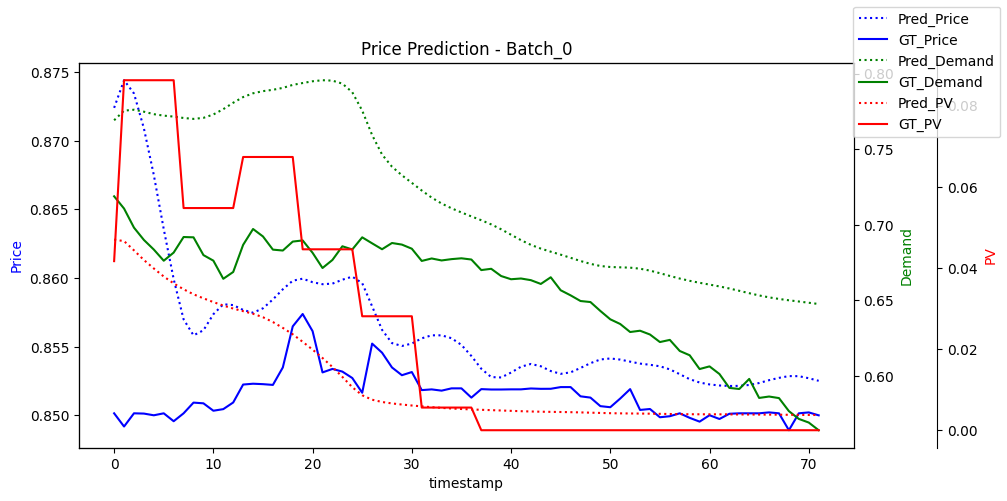

In [ ]:
plot_prediction(output_pdp,gt_pdp,index=199,title=title,out_path=r"./results/epoch6")